In [965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date

In [966]:
df = pd.read_csv('NEW_LagosHouse_data.csv')

In [3]:
df.shape

(79266, 8)

In [4]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description          DateAdded  \
0        2 BEDROOM BLOCK OF FLATS For Rent  Added 18 Jan 2024   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT      Updated Today   
2             1 BEDROOM MINI FLAT FOR RENT      Updated Today   
3                4 BEDROOM DUPLEX FOR RENT      Updated Today   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT      Updated Today   

            HousePrice  Bedroom Bathroom   Toilet  \
0        ₦ 60,000,000   \n  2\n  \n  2\n  \n  3\n   
1    ₦ 7,500,000/year   \n  4\n  \n  4\n  \n  5\n   
2      ₦ 350,000/year   \n  1\n  \n  1\n  \n  1\n   
3   ₦ 18,000,000/year   \n  4\n  \n  4\n  \n  5\n   
4    ₦ 7,000,000/year   \n  3\n  \n  3\n  \n  3\n   

                                             Address  
0                     \n Ologolo Lekki Lagos\n</p>\n  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n

In [5]:
df.describe()

Title  \
count                                               79266   
unique                                              33857   
top     Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
freq                                                 3652   

                                Description          DateAdded  \
count                                 79266              79266   
unique                                  263               7906   
top     3 BEDROOM FLAT & APARTMENT FOR RENT  Added 18 Jan 2024   
freq                                  10593               3984   

            HousePrice  Bedroom Bathroom   Toilet  \
count            79266    79266    79266    79266   
unique            1482       25       23       23   
top      ₦ 60,000,000   \n  3\n  \n  2\n  \n  3\n   
freq              3834    19228    17312    16328   

                               Address  
count                            79266  
unique                           22566  
top     \n Ologolo Lekki Lagos\n</p>\n  
freq                              4278

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79266 entries, 0 to 79265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        79266 non-null  object
 1   Description  79266 non-null  object
 2   DateAdded    79266 non-null  object
 3   HousePrice   79266 non-null  object
 4   Bedroom      79266 non-null  object
 5   Bathroom     79266 non-null  object
 6   Toilet       79266 non-null  object
 7   Address      79266 non-null  object
dtypes: object(8)
memory usage: 4.8+ MB


In [7]:
df.isnull().sum()

Title          0
Description    0
DateAdded      0
HousePrice     0
Bedroom        0
Bathroom       0
Toilet         0
Address        0
dtype: int64

In [8]:
#Begin data cleaning process
df.columns

Index(['Title', 'Description', 'DateAdded', 'HousePrice', 'Bedroom',
       'Bathroom', 'Toilet', 'Address'],
      dtype='object')

In [9]:
df.DateAdded.unique()

array(['Added 18 Jan 2024', 'Updated Today',
       'Updated 18 Jan 2024, Added 06 Dec 2023', ..., 'Added 29 Apr 2014',
       'Added 23 Apr 2014', 'Added 22 Apr 2014'], dtype=object)

In [10]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description          DateAdded  \
0        2 BEDROOM BLOCK OF FLATS For Rent  Added 18 Jan 2024   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT      Updated Today   
2             1 BEDROOM MINI FLAT FOR RENT      Updated Today   
3                4 BEDROOM DUPLEX FOR RENT      Updated Today   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT      Updated Today   

            HousePrice  Bedroom Bathroom   Toilet  \
0        ₦ 60,000,000   \n  2\n  \n  2\n  \n  3\n   
1    ₦ 7,500,000/year   \n  4\n  \n  4\n  \n  5\n   
2      ₦ 350,000/year   \n  1\n  \n  1\n  \n  1\n   
3   ₦ 18,000,000/year   \n  4\n  \n  4\n  \n  5\n   
4    ₦ 7,000,000/year   \n  3\n  \n  3\n  \n  3\n   

                                             Address  
0                     \n Ologolo Lekki Lagos\n</p>\n  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n

In [11]:
df[df['DateAdded']=='Updated Today'].count()

Title          517
Description    517
DateAdded      517
HousePrice     517
Bedroom        517
Bathroom       517
Toilet         517
Address        517
dtype: int64

In [12]:
df[df['DateAdded']=='Added Today'].count()

Title          76
Description    76
DateAdded      76
HousePrice     76
Bedroom        76
Bathroom       76
Toilet         76
Address        76
dtype: int64

In [13]:
today = date.today()
fdate = date.today().strftime('%d %b %Y')
fdate

'02 Mar 2024'

In [14]:
#Replace 'Updated Today' with 'Updated 22 Aug 2023'
df['DateAdded'] = df['DateAdded'].apply(lambda x: 'Updated'+ date.today().strftime('%d %b %Y') if x == 'Updated Today' else x)

In [15]:
#Replace 'Added Today' with 'Added 22 Aug 2023'
df['DateAdded'] = df['DateAdded'].apply(lambda x: 'Added'+ date.today().strftime('%d %b %Y') if x == 'Added Today' else x)

In [16]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description           DateAdded  \
0        2 BEDROOM BLOCK OF FLATS For Rent   Added 18 Jan 2024   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  Updated02 Mar 2024   
2             1 BEDROOM MINI FLAT FOR RENT  Updated02 Mar 2024   
3                4 BEDROOM DUPLEX FOR RENT  Updated02 Mar 2024   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT  Updated02 Mar 2024   

            HousePrice  Bedroom Bathroom   Toilet  \
0        ₦ 60,000,000   \n  2\n  \n  2\n  \n  3\n   
1    ₦ 7,500,000/year   \n  4\n  \n  4\n  \n  5\n   
2      ₦ 350,000/year   \n  1\n  \n  1\n  \n  1\n   
3   ₦ 18,000,000/year   \n  4\n  \n  4\n  \n  5\n   
4    ₦ 7,000,000/year   \n  3\n  \n  3\n  \n  3\n   

                                             Address  
0                     \n Ologolo Lekki Lagos\n</p>\n  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n

In [17]:
df[df['DateAdded']=='Updated Today'].count()

Title          0
Description    0
DateAdded      0
HousePrice     0
Bedroom        0
Bathroom       0
Toilet         0
Address        0
dtype: int64

In [18]:
df[df['DateAdded']=='Added Today'].count()

Title          0
Description    0
DateAdded      0
HousePrice     0
Bedroom        0
Bathroom       0
Toilet         0
Address        0
dtype: int64

In [19]:
# For DateAdded, retain only one date. Keep updated date if such exist, else keep added date.
df['DateAdded'] = df['DateAdded'].apply(lambda x: x[6:] if len(x) == 17 else (x[8:] if len(x) == 19 else x[8:19]))

In [20]:
#Extract Year out of the DateAdded column
df['YearAdded'] = df['DateAdded'].apply(lambda x: int(x.split()[-1]))

In [21]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded           HousePrice  \
0        2 BEDROOM BLOCK OF FLATS For Rent  18 Jan 2024        ₦ 60,000,000    
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024    ₦ 7,500,000/year    
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      ₦ 350,000/year    
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024   ₦ 18,000,000/year    
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024    ₦ 7,000,000/year    

   Bedroom Bathroom   Toilet  \
0  \n  2\n  \n  2\n  \n  3\n   
1  \n  4\n  \n  4\n  \n  5\n   
2  \n  1\n  \n  1\n  \n  1\n   
3  \n  4\n  \n  4\n  \n  5\n   
4  \n  3\n  \n  3\n  \n  3\n   

                                             Address  YearAdded  
0                     \n Ologolo Lekki Lagos\n</p>\n       2024  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...       2024  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...       2024  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n       2024  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n       2024

In [22]:
#Count of listing per year
df.groupby('YearAdded')['YearAdded'].count().to_frame()

YearAdded
YearAdded           
2014            1000
2015            3924
2016            3269
2017             634
2018             918
2019            1063
2020            1453
2021            1454
2022            9299
2023           39444
2024           16808

In [23]:
df['HousePrice'] = df['HousePrice'].apply(lambda x: x.split()[1])

In [24]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded       HousePrice  \
0        2 BEDROOM BLOCK OF FLATS For Rent  18 Jan 2024       60,000,000   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   7,500,000/year   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024     350,000/year   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024  18,000,000/year   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   7,000,000/year   

   Bedroom Bathroom   Toilet  \
0  \n  2\n  \n  2\n  \n  3\n   
1  \n  4\n  \n  4\n  \n  5\n   
2  \n  1\n  \n  1\n  \n  1\n   
3  \n  4\n  \n  4\n  \n  5\n   
4  \n  3\n  \n  3\n  \n  3\n   

                                             Address  YearAdded  
0                     \n Ologolo Lekki Lagos\n</p>\n       2024  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...       2024  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...       2024  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n       2024  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n       2024

In [25]:
d = df['HousePrice'].head()

In [26]:
#Function to remove , sign in the HousePrice column
def removeComma(a):
    outstr = ""
    strlist = a.split(',')
    for j in strlist:
        outstr += j
    return outstr

In [27]:
removeComma('8,000,000/year')

'8000000/year'

In [28]:
#Remove , sign from HousePrice Column
df['HousePrice'] = df['HousePrice'].apply(lambda x: removeComma(x))

In [29]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded     HousePrice  \
0        2 BEDROOM BLOCK OF FLATS For Rent  18 Jan 2024       60000000   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   7500000/year   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024    350000/year   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024  18000000/year   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   7000000/year   

   Bedroom Bathroom   Toilet  \
0  \n  2\n  \n  2\n  \n  3\n   
1  \n  4\n  \n  4\n  \n  5\n   
2  \n  1\n  \n  1\n  \n  1\n   
3  \n  4\n  \n  4\n  \n  5\n   
4  \n  3\n  \n  3\n  \n  3\n   

                                             Address  YearAdded  
0                     \n Ologolo Lekki Lagos\n</p>\n       2024  
1  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...       2024  
2  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...       2024  
3                   \n Old Ikoyi Ikoyi Lagos\n</p>\n       2024  
4   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n       2024

In [30]:
#Convert all Prices by month to Prices by year
def getYearPrice(a):
    col1 = []
    col2 = []
    for i in a:
        b = i.split('/')
        if len(b)==1:
            col1.append(int(b[0].strip()))
            col2.append('Year')
        elif len(b)>1:
            if b[1]=='month':
                col1.append(int(b[0].strip())*12)
                col2.append('Year')
            else:
                col1.append(int(b[0].strip()))
                col2.append(b[1].title())
    return col1, col2

In [31]:
s = df['HousePrice']
d,e = getYearPrice(s)
df['HousePrice'] = pd.Series(d)
df['PaymentDuration'] = pd.Series(e)

In [32]:
#Convert all Prices by month to Prices by year

"""
def getYearPrice2(a):
    b = a.split('/')
    if len(b)==1:
        return (int(b[0]), 'Not Applicable')
    elif len(b)>1:
        if b[1]=='month':
            return (int(b[0])*12, 'year')
        else:
            return (int(b[0]), b[1])
       
"""

"\ndef getYearPrice2(a):\n    b = a.split('/')\n    if len(b)==1:\n        return (int(b[0]), 'Not Applicable')\n    elif len(b)>1:\n        if b[1]=='month':\n            return (int(b[0])*12, 'year')\n        else:\n            return (int(b[0]), b[1])\n       \n"

In [33]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS For Rent  18 Jan 2024    60000000  \n  2\n   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000  \n  4\n   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000  \n  1\n   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000  \n  4\n   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000  \n  3\n   

  Bathroom   Toilet                                            Address  \
0  \n  2\n  \n  3\n                     \n Ologolo Lekki Lagos\n</p>\n   
1  \n  4\n  \n  5\n  \n Plantinum Way Osapa Lekki Lagos Osapa Lekki...   
2  \n  1\n  \n  1\n  \n Riverbank Estate, Akute Yakoyo Alagbole Ojo...   
3  \n  4\n  \n  5\n                   \n Old Ikoyi Ikoyi Lagos\n</p>\n   
4  \n  3\n  \n  3\n   \n Lekki Lagos Lekki Phase 1 Lekki Lagos\n</p>\n   

   YearAdded PaymentDuration  
0       2024            Year  
1       2024            Year  
2       2024            Year  
3       2024            Year  
4       2024            Year

In [34]:
#Format Address column
df['Address'] = df['Address'].apply(lambda x: x.split('\n')[1])

In [35]:
#Format Bedroom, Bathroom and Toilet to remove \n
rooms = ['Bedroom', 'Bathroom', 'Toilet']
for room in rooms:
    df[room] = df[room].apply(lambda x: x.split('\n')[1] if len(x.split('\n')[1])>0 else '0')
    df[room] = df[room].apply(lambda x: int(x))


In [36]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS For Rent  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration  
0       2024            Year  
1       2024            Year  
2       2024            Year  
3       2024            Year  
4       2024            Year

In [37]:
#Remove all 'LAND' properties
df = df[~df['Description'].str.contains('LAND')]

In [38]:
#Remove all 'LAND' properties
df = df[~df['Description'].str.contains('OFFICE')]

In [39]:
df.shape

(76297, 10)

In [40]:
"""
f = df['Description']
for i in f:
    if 'office' in i.lower():
        print(i, ' is office')
"""

"\nf = df['Description']\nfor i in f:\n    if 'office' in i.lower():\n        print(i, ' is office')\n"

In [41]:
df['Description'] = df['Description'].str.upper()

In [42]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration  
0       2024            Year  
1       2024            Year  
2       2024            Year  
3       2024            Year  
4       2024            Year

In [43]:
#Keeping only house for Rent and removing House for Sale 
df = df[~df['Description'].str.contains('SALE')]

In [44]:
df.shape

(73893, 10)

In [45]:
df = df[~df.Description.str.contains('LET')]

In [46]:
df.shape

(73722, 10)

In [47]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration  
0       2024            Year  
1       2024            Year  
2       2024            Year  
3       2024            Year  
4       2024            Year

In [48]:
df['PaymentDuration'].unique()

array(['Year', 'Sqm', 'Day'], dtype=object)

In [49]:
#Remove per Day Rent
df = df[df['PaymentDuration']!='Day']

In [50]:
df['PaymentDuration'].unique()

array(['Year', 'Sqm'], dtype=object)

In [51]:
#Removing Commercial Properties and other with PaymentDuration showing SQM
df = df[df['PaymentDuration']!='Sqm']

In [52]:
df.shape

(73442, 10)

In [53]:
df['PaymentDuration'].unique()

array(['Year'], dtype=object)

In [54]:
df.dtypes

Title              object
Description        object
DateAdded          object
HousePrice          int64
Bedroom             int64
Bathroom            int64
Toilet              int64
Address            object
YearAdded           int64
PaymentDuration    object
dtype: object

In [55]:
ad = df.Address

In [56]:
add2 = "\n 4038\n Lekki , Lagos\n 4039\n Ikota , Lekki , Lagos\n 4040\n Lekki Phase 1 , Lekki , Lagos\n 4041\n Osapa , Lekki , Lagos\n 4042\n Chevron Drive , Lekki , Lagos\n 4043\n Agungi , Lekki , Lagos\n 4044\n Victoria Garden City , Lekki , Lagos\n 4045\n Lekki Phase 2 , Lekki , Lagos\n 4046\n Lekki Expressway , Lekki , Lagos\n 4047\n Ikate Elegushi , Lekki , Lagos\n 4048\n Ologolo , Lekki , Lagos\n 4049\n Idado , Lekki , Lagos\n 4050\n Lafiaji , Lekki , Lagos\n 4051\n Jakande , Lekki , Lagos\n 4052\n Igbo Efon , Lekki , Lagos\n 4053\n Ilasan , Lekki , Lagos\n 4054\n Along Lekki Expressway , Lekki , Lagos\n 4055\n Nicon Town , Lekki , Lagos\n 4056\n Oral Estate , Lekki , Lagos\n 4057\n Osapa London , Lekki , Lagos\n 4058\n Victoria Island , Lagos\n 4059\n Victoria Island , Victoria Island , Lagos\n 4060\n Oniru , Victoria Island , Lagos\n 4061\n 1004 , Victoria Island , Lagos\n 4062\n Ademola Adetokunbo , Victoria Island , Lagos\n 4063\n Adeola Hopewell , Victoria Island , Lagos\n 4064\n Adeola Odeku , Victoria Island , Lagos\n 4065\n Ahmadu Bello Way , Victoria Island , Lagos\n 4066\n Akin Adesola , Victoria Island , Lagos\n 4067\n Akin Olugbade , Victoria Island , Lagos\n 4068\n Bonny Camp , Victoria Island , Lagos\n 4069\n Eko Atlantic , Victoria Island , Lagos\n 4070\n Idowu Taylor , Victoria Island , Lagos\n 4071\n Karimu Kotun , Victoria Island , Lagos\n 4072\n Kofo Abayomi , Victoria Island , Lagos\n 4073\n Ligali Ayorinde , Victoria Island , Lagos\n 4074\n Saka Tinubu , Victoria Island , Lagos\n 4075\n Sanusi Fafunwa , Victoria Island , Lagos\n 4076\n Tiamiyu Savage , Victoria Island , Lagos\n 4077\n Victoria Island Extension , Victoria Island , Lagos\n 4078\n Ajah , Lagos\n 4079\n Ajah , Ajah , Lagos\n 4080\n Sangotedo , Ajah , Lagos\n 4081\n Abijo , Ajah , Lagos\n 4082\n Awoyaya , Ajah , Lagos\n 4083\n Abraham Adesanya , Ajah , Lagos\n 4084\n Thomas Estate , Ajah , Lagos\n 4085\n Olonkonla , Ajah , Lagos\n 4086\n Addo , Ajah , Lagos\n 4087\n Badore , Ajah , Lagos\n 4088\n Okun Ajah , Ajah , Lagos\n 4089\n Ogombo , Ajah , Lagos\n 4090\n Akodo , Ajah , Lagos\n 4091\n Ajiran , Ajah , Lagos\n 4092\n Langbasa , Ajah , Lagos\n 4093\n Ado , Ajah , Lagos\n 4094\n Ajiwe , Ajah , Lagos\n 4095\n Ilaje , Ajah , Lagos\n 4096\n Lakowe , Ajah , Lagos\n 4097\n Olokonla , Ajah , Lagos\n 4098\n Canaan Estate , Ajah , Lagos\n 4099\n Crown Estate , Ajah , Lagos\n 4100\n Eden Garden Estate , Ajah , Lagos\n 4101\n Graceland Estate , Ajah , Lagos\n 4102\n Lekki Gardens Estate , Ajah , Lagos\n 4103\n Lekki Scheme 2 , Ajah , Lagos\n 4104\n Peninsula Estate , Ajah , Lagos\n 4105\n Ikeja , Lagos\n 4106\n Alausa , Ikeja , Lagos\n 4107\n Opebi , Ikeja , Lagos\n 4108\n Ikeja  , Ikeja , Lagos\n 4109\n Magodo Isheri , Ikeja , Lagos\n 4110\n Ikeja GRA , Ikeja , Lagos\n 4111\n Allen Avenue , Ikeja , Lagos\n 4112\n Maryland , Ikeja , Lagos\n 4113\n Oregun , Ikeja , Lagos\n 4114\n Agidinbgi , Ikeja , Lagos\n 4115\n Onigbonbo , Ikeja , Lagos\n 4116\n Adeniyi Jones , Ikeja , Lagos\n 4117\n Agidingbi , Ikeja , Lagos\n 4118\n Airport Road , Ikeja , Lagos\n 4119\n Obafemi Awolowo Way , Ikeja , Lagos\n 4120\n Balogun , Ikeja , Lagos\n 4121\n Mangoro , Ikeja , Lagos\n 4122\n Mobolaji Bank Anthony , Ikeja , Lagos\n 4123\n Oba Akran , Ikeja , Lagos\n 4124\n Toyin Street , Ikeja , Lagos\n 4125\n Unity Road , Ikeja , Lagos\n 4126\n Lagos Island , Lagos\n 4127\n Marina , Lagos Island , Lagos\n 4128\n Lagos Island , Lagos Island , Lagos\n 4129\n Broad Street , Lagos Island , Lagos\n 4130\n Onikan , Lagos Island , Lagos\n 4131\n Apongbon , Lagos Island , Lagos\n 4132\n Obalende , Lagos Island , Lagos\n 4133\n C.M.S , Lagos Island , Lagos\n 4134\n Ikoyi , Lagos\n 4135\n Banana Island , Ikoyi , Lagos\n 4136\n Ikoyi , Ikoyi , Lagos\n 4137\n Parkview Estate , Ikoyi , Lagos\n 4138\n Awolowo Road , Ikoyi , Lagos\n 4139\n Falomo  , Ikoyi , Lagos\n 4140\n 2nd Avenue Extension , Ikoyi , Lagos\n 4141\n Bourdillon , Ikoyi , Lagos\n 4142\n Dolphin Estate , Ikoyi , Lagos\n 4143\n Abacha Estate , Ikoyi , Lagos\n 4144\n Gerard Road , Ikoyi , Lagos\n 4145\n Ikoyi South West , Ikoyi , Lagos\n 4146\n MacPherson , Ikoyi , Lagos\n 4147\n Mojisola Onikoyi Estate , Ikoyi , Lagos\n 4148\n Mosley Road , Ikoyi , Lagos\n 4149\n Old Ikoyi , Ikoyi , Lagos\n 4150\n Osborne Foreshore Estate , Ikoyi , Lagos\n 4151\n Agege , Lagos\n 4152\n Iju  , Agege , Lagos\n 4153\n Dopemu  , Agege , Lagos\n 4154\n Idi Oro , Agege , Lagos\n 4155\n Onitiri , Agege , Lagos\n 4156\n Agbotikuyo , Agege , Lagos\n 4157\n Capitol , Agege , Lagos\n 4158\n Cement , Agege , Lagos\n 4159\n Fagba , Agege , Lagos\n 4160\n Ifako , Agege , Lagos\n 4161\n Iju-Ishaga , Agege , Lagos\n 4162\n LSDPC Estate , Agege , Lagos\n 4163\n Mulero , Agege , Lagos\n 4164\n Oke Odo , Agege , Lagos\n 4165\n Oko Oba , Agege , Lagos\n 4166\n Orile Agege , Agege , Lagos\n 4167\n Pen Cinema , Agege , Lagos\n 4168\n Surulere , Lagos\n 4169\n Surulere , Surulere , Lagos\n 4170\n Bode Thomas , Surulere , Lagos\n 4171\n Itire-Ikate , Surulere , Lagos\n 4172\n Iponri , Surulere , Lagos\n 4173\n Barracks , Surulere , Lagos\n 4174\n Aguda  , Surulere , Lagos\n 4175\n Ijeshatedo , Surulere , Lagos\n 4176\n Alaka , Surulere , Lagos\n 4177\n Ojuelegba , Surulere , Lagos\n 4178\n Ijesha , Surulere , Lagos\n 4179\n Papa Ajao , Surulere , Lagos\n 4180\n Idi Araba , Surulere , Lagos\n 4181\n Adelabu , Surulere , Lagos\n 4182\n Adeniran Ogunsanya , Surulere , Lagos\n 4183\n Alaka Estate , Surulere , Lagos\n 4184\n Alaka/Iponri , Surulere , Lagos\n 4185\n Coker , Surulere , Lagos\n 4186\n Eric Moore , Surulere , Lagos\n 4187\n Gbaja , Surulere , Lagos\n 4188\n Kilo-masha , Surulere , Lagos\n 4189\n Lawanson , Surulere , Lagos\n 4190\n Masha , Surulere , Lagos\n 4191\n Ogunlana , Surulere , Lagos\n 4192\n Randle Avenue , Surulere , Lagos\n 4193\n Western Avenue , Surulere , Lagos\n 4194\n Yaba , Lagos\n 4195\n Fola Agoro , Yaba , Lagos\n 4196\n Yaba , Yaba , Lagos\n 4197\n Onike , Yaba , Lagos\n 4198\n Akoka , Yaba , Lagos\n 4199\n Alagomeji , Yaba , Lagos\n 4200\n Ebute Metta , Yaba , Lagos\n 4201\n Sabo , Yaba , Lagos\n 4202\n Jibowu , Yaba , Lagos\n 4203\n Oyingbo , Yaba , Lagos\n 4204\n Makoko , Yaba , Lagos\n 4205\n Abule Ijesha  , Yaba , Lagos\n 4206\n Abule Oja , Yaba , Lagos\n 4207\n Iwaya , Yaba , Lagos\n 4208\n Costain , Yaba , Lagos\n 4209\n Tejuosho , Yaba , Lagos\n 4210\n Isolo , Lagos\n 4211\n Okota , Isolo , Lagos\n 4212\n Egbe , Isolo , Lagos\n 4213\n Ajao Estate , Isolo , Lagos\n 4214\n Ago Palace , Isolo , Lagos\n 4215\n Isolo , Isolo , Lagos\n 4216\n Cele , Isolo , Lagos\n 4217\n Bucknor Estate , Isolo , Lagos\n 4218\n Ire Akari , Isolo , Lagos\n 4219\n Jakande Estate , Isolo , Lagos\n 4220\n Kogberegbe Street , Isolo , Lagos\n 4221\n Oke-afa , Isolo , Lagos\n 4222\n Osolo Way , Isolo , Lagos\n 4223\n Community Road , Isolo , Lagos\n 4224\n Mushin , Lagos\n 4225\n Mushin , Mushin , Lagos\n 4226\n Ilasamaja , Mushin , Lagos\n 4227\n Ladipo , Mushin , Lagos\n 4228\n Olateju , Mushin , Lagos\n 4229\n Gbagada , Lagos\n 4230\n Gbagada , Gbagada , Lagos\n 4231\n Ifako-Gbagada , Gbagada , Lagos\n 4232\n Gbagada Phase 1 , Gbagada , Lagos\n 4233\n Oworonshoki , Gbagada , Lagos\n 4234\n Medina , Gbagada , Lagos\n 4235\n Atunrase Medina , Gbagada , Lagos\n 4236\n Gbagada Phase 2 , Gbagada , Lagos\n 4237\n Soluyi , Gbagada , Lagos\n 4238\n Oshodi , Lagos\n 4239\n Mafoluku , Oshodi , Lagos\n 4240\n Oshodi , Oshodi , Lagos\n 4241\n Shogunle , Oshodi , Lagos\n 4242\n Arowojobe , Oshodi , Lagos\n 4243\n Bolade , Oshodi , Lagos\n 4244\n Ojuwoye , Oshodi , Lagos\n 4245\n Oshodi Expressway , Oshodi , Lagos\n 4246\n Apapa , Lagos\n 4247\n Apapa , Apapa , Lagos\n 4248\n Apapa Road , Apapa , Lagos\n 4249\n Olodi , Apapa , Lagos\n 4250\n Ijora  , Apapa , Lagos\n 4251\n Kiri Kiri , Apapa , Lagos\n 4252\n Ajegunle , Apapa , Lagos\n 4253\n Apapa GRA , Apapa , Lagos\n 4254\n Olodi Apapa , Apapa , Lagos\n 4255\n Snake Island , Apapa , Lagos\n 4256\n Tin Can Island , Apapa , Lagos\n 4257\n Abule Egba , Lagos\n 4258\n Alagbado , Abule Egba , Lagos\n 4259\n Abule Egba , Abule Egba , Lagos\n 4260\n Ojokoro , Abule Egba , Lagos\n 4261\n Alimosho , Lagos\n 4262\n Alimosho , Alimosho , Lagos\n 4263\n Akowonjo , Alimosho , Lagos\n 4264\n Meiran , Alimosho , Lagos\n 4265\n Akesan , Alimosho , Lagos\n 4266\n Orisunbare , Alimosho , Lagos\n 4267\n Pipeline , Alimosho , Lagos\n 4268\n Shasha , Alimosho , Lagos\n 4269\n Alakuko , Alimosho , Lagos\n 4270\n Ajeromi Ifelodun , Lagos\n 4271\n Araromi , Ajeromi Ifelodun , Lagos\n 4272\n Ashafa , Ajeromi Ifelodun , Lagos\n 4273\n Ayetoro , Ajeromi Ifelodun , Lagos\n 4274\n Cardoso , Ajeromi Ifelodun , Lagos\n 4275\n Layeni , Ajeromi Ifelodun , Lagos\n 4276\n Onibaba , Ajeromi Ifelodun , Lagos\n 4277\n Orodu , Ajeromi Ifelodun , Lagos\n 4278\n Amuwo Odofin , Lagos\n 4279\n Festac , Amuwo Odofin , Lagos\n 4280\n Amuwo Odofin , Amuwo Odofin , Lagos\n 4281\n Satelite Town , Amuwo Odofin , Lagos\n 4282\n Agboju , Amuwo Odofin , Lagos\n 4283\n Alakija , Amuwo Odofin , Lagos\n 4284\n Apple Junction , Amuwo Odofin , Lagos\n 4285\n Badagry , Lagos\n 4286\n Badagry , Badagry , Lagos\n 4287\n Age Mowo , Badagry , Lagos\n 4288\n Ajido , Badagry , Lagos\n 4289\n Aradagun , Badagry , Lagos\n 4290\n Magbon , Badagry , Lagos\n 4291\n Oko Afo , Badagry , Lagos\n 4292\n Agbara , Badagry , Lagos\n 4293\n Egbe/Idimu , Lagos\n 4294\n Egbeda , Egbe/Idimu , Lagos\n 4295\n Isheri , Egbe/Idimu , Lagos\n 4296\n Idimu , Egbe/Idimu , Lagos\n 4297\n Arida , Egbe/Idimu , Lagos\n 4298\n Ejigbo , Lagos\n 4299\n Ejigbo , Ejigbo , Lagos\n 4300\n Orilowo , Ejigbo , Lagos\n 4301\n Epe , Lagos\n 4302\n Ibeju-Lekki , Lagos\n 4303\n Eleko , Ibeju-Lekki , Lagos\n 4304\n Eputu , Ibeju-Lekki , Lagos\n 4305\n Akodo Ise , Ibeju-Lekki , Lagos\n 4306\n Alatise , Ibeju-Lekki , Lagos\n 4307\n Arapagi Oloko , Ibeju-Lekki , Lagos\n 4308\n Eleran Igbe , Ibeju-Lekki , Lagos\n 4309\n Eluju , Ibeju-Lekki , Lagos\n 4310\n Free Trade Zone , Ibeju-Lekki , Lagos\n 4311\n Iberekodo , Ibeju-Lekki , Lagos\n 4312\n Ikegun , Ibeju-Lekki , Lagos\n 4313\n Ise Town , Ibeju-Lekki , Lagos\n 4314\n La Campaigne Tropicana , Ibeju-Lekki , Lagos\n 4315\n Mosere Ikoga , Ibeju-Lekki , Lagos\n 4316\n Ogogoro , Ibeju-Lekki , Lagos\n 4317\n Okunraiye , Ibeju-Lekki , Lagos\n 4318\n Oribanwa , Ibeju-Lekki , Lagos\n 4319\n Origanrigan , Ibeju-Lekki , Lagos\n 4320\n Orimedu , Ibeju-Lekki , Lagos\n 4321\n Ifako-Ijaiye , Lagos\n 4322\n Ifako-Ijaiye , Ifako-Ijaiye , Lagos\n 4323\n Ijaye Ojokoro , Ifako-Ijaiye , Lagos\n 4324\n Gbinrinmi , Ifako-Ijaiye , Lagos\n 4325\n Wasimi Ojokoro , Ifako-Ijaiye , Lagos\n 4326\n Ilupeju-titun , Ifako-Ijaiye , Lagos\n 4327\n Iju-ogundimu , Ifako-Ijaiye , Lagos\n 4328\n Iju-obawole , Ifako-Ijaiye , Lagos\n 4329\n Oke-ira Akine , Ifako-Ijaiye , Lagos\n 4330\n Ikorodu , Lagos\n 4331\n Ikorodu , Ikorodu , Lagos\n 4332\n Gberigbe , Ikorodu , Lagos\n 4333\n Ibeshe , Ikorodu , Lagos\n 4334\n Agric , Ikorodu , Lagos\n 4335\n Apeka , Ikorodu , Lagos\n 4336\n Ebute Ikorodu , Ikorodu , Lagos\n 4337\n Igbogbo , Ikorodu , Lagos\n 4338\n Ijede , Ikorodu , Lagos\n 4339\n Ipakodo , Ikorodu , Lagos\n 4340\n Isawo , Ikorodu , Lagos\n 4341\n Jumofak , Ikorodu , Lagos\n 4342\n Maya , Ikorodu , Lagos\n 4343\n Odogunyan , Ikorodu , Lagos\n 4344\n Ikotun/Igando , Lagos\n 4345\n Igando , Ikotun/Igando , Lagos\n 4346\n Ikotun , Ikotun/Igando , Lagos\n 4347\n Ijegun , Ikotun/Igando , Lagos\n 4348\n Abaranje , Ikotun/Igando , Lagos\n 4349\n Egan , Ikotun/Igando , Lagos\n 4350\n Ikotun Egbe , Ikotun/Igando , Lagos\n 4351\n Governor's Road Ikotun , Ikotun/Igando , Lagos\n 4352\n Ilupeju , Lagos\n 4353\n Ilupeju , Ilupeju , Lagos\n 4354\n Ilupeju Bye-pass , Ilupeju , Lagos\n 4355\n Coker Road , Ilupeju , Lagos\n 4356\n Town Planning Way , Ilupeju , Lagos\n 4357\n Ilupeju Industrial Estate , Ilupeju , Lagos\n 4358\n Ipaja , Lagos\n 4359\n Abesan Estate , Ipaja , Lagos\n 4360\n Ayobo , Ipaja , Lagos\n 4361\n Baruwa , Ipaja , Lagos\n 4362\n Boy's Town , Ipaja , Lagos\n 4363\n Gowon Estate , Ipaja , Lagos\n 4364\n Iyana Ipaja , Ipaja , Lagos\n 4365\n Kosofe/Ikosi , Lagos\n 4366\n Ketu , Kosofe/Ikosi , Lagos\n 4367\n Shangisha , Kosofe/Ikosi , Lagos\n 4368\n Alapere , Kosofe/Ikosi , Lagos\n 4369\n Mile 12 , Kosofe/Ikosi , Lagos\n 4370\n Cmd Road , Kosofe/Ikosi , Lagos\n 4371\n Ikosi-ketu , Kosofe/Ikosi , Lagos\n 4372\n Kosofe , Kosofe/Ikosi , Lagos\n 4373\n Magodo , Kosofe/Ikosi , Lagos\n 4374\n Magodo GRA Phase 2 , Kosofe/Ikosi , Lagos\n 4375\n Maryland , Lagos\n 4376\n Mende , Maryland , Lagos\n 4377\n Anthony Village , Maryland , Lagos\n 4378\n LSDPC Maryland Estate , Maryland , Lagos\n 4379\n Shonibare Estate , Maryland , Lagos\n 4380\n Ogba , Lagos\n 4381\n Acme Road , Ogba , Lagos\n 4382\n Aguda Ogba , Ogba , Lagos\n 4383\n Ajayi Road , Ogba , Lagos\n 4384\n Ifako-ogba , Ogba , Lagos\n 4385\n Oke-ira , Ogba , Lagos\n 4386\n Wemco Road , Ogba , Lagos\n 4387\n Ogba Bus-stop , Ogba , Lagos\n 4388\n Ogba GRA , Ogba , Lagos\n 4389\n Ogba Industrial , Ogba , Lagos\n 4390\n Ojota , Lagos\n 4391\n Ogudu , Ojota , Lagos\n 4392\n Ogudu GRA , Ojota , Lagos\n 4393\n Ojota , Ojota , Lagos\n 4394\n Ogudu Orioke , Ojota , Lagos\n 4395\n Ogudu Road , Ojota , Lagos\n 4396\n Ojo , Lagos\n 4397\n Ojo , Ojo , Lagos\n 4398\n Okokomaiko , Ojo , Lagos\n 4399\n Alaba , Ojo , Lagos\n 4400\n Otto-Ijanikin , Ojo , Lagos\n 4401\n Ajangbadi , Ojo , Lagos\n 4402\n Iba , Ojo , Lagos\n 4403\n Ojodu , Lagos\n 4404\n Berger , Ojodu , Lagos\n 4405\n Isheri North , Ojodu , Lagos\n 4406\n Magodo GRA Phase 1 , Ojodu , Lagos\n 4407\n Morgan Estate , Ojodu , Lagos\n 4408\n Olowora , Ojodu , Lagos\n 4409\n Omole Phase 1 , Ojodu , Lagos\n 4410\n Omole Phase 2 , Ojodu , Lagos\n 4411\n River Valley Estate , Ojodu , Lagos\n 4412\n Unity Estate , Ojodu , Lagos\n 4413\n Williams Estate , Ojodu , Lagos\n 4414\n Yakoyo/Alagbole , Ojodu , Lagos\n 4415\n Orile , Lagos\n 4416\n Iganmu , Orile , Lagos\n 4417\n Mile 2 , Orile , Lagos\n 4418\n Orile  , Orile , Lagos\n 4419\n Sangotedo , Lagos\n 4420\n Bogije , Sangotedo , Lagos\n 4421\n Majek , Sangotedo , Lagos\n 4422\n Monastery Road , Sangotedo , Lagos\n 4423\n Shomolu , Lagos\n 4424\n Palmgroove , Shomolu , Lagos\n 4425\n Obanikoro , Shomolu , Lagos\n 4426\n Bariga , Shomolu , Lagos\n 4427\n Onipanu , Shomolu , Lagos\n 4428\n Fadeyi , Shomolu , Lagos\n 4429\n Ikorodu Road , Shomolu , Lagos\n 4430\n Lagos Extension , Ogun\n 4431\n Opic , Lagos Extension , Ogun\n 4432\n Arepo , Lagos Extension , Ogun\n 4433\n Magboro , Lagos Extension , Ogun\n 4434\n Warewa , Lagos Extension , Ogun\n 4435\n Fagbems , Lagos Extension , Ogun\n 4436\n Kara , Lagos Extension , Ogun"

In [57]:
import re
pattern = re.compile('\n.*?\n')
add3 = pattern.sub('\n', add2)

In [58]:
print(add3)


 Lekki , Lagos
 Ikota , Lekki , Lagos
 Lekki Phase 1 , Lekki , Lagos
 Osapa , Lekki , Lagos
 Chevron Drive , Lekki , Lagos
 Agungi , Lekki , Lagos
 Victoria Garden City , Lekki , Lagos
 Lekki Phase 2 , Lekki , Lagos
 Lekki Expressway , Lekki , Lagos
 Ikate Elegushi , Lekki , Lagos
 Ologolo , Lekki , Lagos
 Idado , Lekki , Lagos
 Lafiaji , Lekki , Lagos
 Jakande , Lekki , Lagos
 Igbo Efon , Lekki , Lagos
 Ilasan , Lekki , Lagos
 Along Lekki Expressway , Lekki , Lagos
 Nicon Town , Lekki , Lagos
 Oral Estate , Lekki , Lagos
 Osapa London , Lekki , Lagos
 Victoria Island , Lagos
 Victoria Island , Victoria Island , Lagos
 Oniru , Victoria Island , Lagos
 1004 , Victoria Island , Lagos
 Ademola Adetokunbo , Victoria Island , Lagos
 Adeola Hopewell , Victoria Island , Lagos
 Adeola Odeku , Victoria Island , Lagos
 Ahmadu Bello Way , Victoria Island , Lagos
 Akin Adesola , Victoria Island , Lagos
 Akin Olugbade , Victoria Island , Lagos
 Bonny Camp , Victoria Island , Lagos
 Eko Atlantic , 

In [59]:
lag = pd.read_csv('LagosTowns.csv')

In [60]:
lag.head()

Address
0                  Lekki , Lagos
1          Ikota , Lekki , Lagos
2  Lekki Phase 1 , Lekki , Lagos
3          Osapa , Lekki , Lagos
4  Chevron Drive , Lekki , Lagos

In [61]:
#Create Community, Town and State columns for Address Data
def getCTS(a):
    community = []
    town = []
    state = []
    for i in a:
        b = i.split(' , ')
        if len(b)==2:
            community.append(b[0])
            town.append(b[0])
            state.append(b[1])
        else:
            community.append(b[0])
            town.append(b[1])
            state.append(b[2])
    return pd.Series(community), pd.Series(town), pd.Series(state)

In [62]:
lag['Community'], lag['Town'], lag['State'] = getCTS(lag['Address'])

In [63]:
lag

Address      Community             Town  State
0                       Lekki , Lagos          Lekki            Lekki  Lagos
1               Ikota , Lekki , Lagos          Ikota            Lekki  Lagos
2       Lekki Phase 1 , Lekki , Lagos  Lekki Phase 1            Lekki  Lagos
3               Osapa , Lekki , Lagos          Osapa            Lekki  Lagos
4       Chevron Drive , Lekki , Lagos  Chevron Drive            Lekki  Lagos
..                                ...            ...              ...    ...
394    Arepo , Lagos Extension , Ogun          Arepo  Lagos Extension   Ogun
395  Magboro , Lagos Extension , Ogun        Magboro  Lagos Extension   Ogun
396   Warewa , Lagos Extension , Ogun         Warewa  Lagos Extension   Ogun
397  Fagbems , Lagos Extension , Ogun        Fagbems  Lagos Extension   Ogun
398     Kara , Lagos Extension , Ogun           Kara  Lagos Extension   Ogun

[399 rows x 4 columns]

In [64]:
com = list(lag['Community'].unique())

In [65]:
tow = list(lag['Town'].unique())

In [66]:
lag['State'].unique()

array(['Lagos', 'Ogun'], dtype=object)

In [67]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration  
0       2024            Year  
1       2024            Year  
2       2024            Year  
3       2024            Year  
4       2024            Year

In [68]:
com = [item for item in com if item not in tow]

In [69]:
com

['Ikota',
 'Lekki Phase 1',
 'Osapa',
 'Chevron Drive',
 'Agungi',
 'Victoria Garden City',
 'Lekki Phase 2',
 'Lekki Expressway',
 'Ikate Elegushi',
 'Ologolo',
 'Idado',
 'Lafiaji',
 'Jakande',
 'Igbo Efon',
 'Ilasan',
 'Along Lekki Expressway',
 'Nicon Town',
 'Oral Estate',
 'Osapa London',
 'Oniru',
 '1004',
 'Ademola Adetokunbo',
 'Adeola Hopewell',
 'Adeola Odeku',
 'Ahmadu Bello Way',
 'Akin Adesola',
 'Akin Olugbade',
 'Bonny Camp',
 'Eko Atlantic',
 'Idowu Taylor',
 'Karimu Kotun',
 'Kofo Abayomi',
 'Ligali Ayorinde',
 'Saka Tinubu',
 'Sanusi Fafunwa',
 'Tiamiyu Savage',
 'Victoria Island Extension',
 'Abijo',
 'Awoyaya',
 'Abraham Adesanya',
 'Thomas Estate',
 'Olonkonla',
 'Addo',
 'Badore',
 'Okun Ajah',
 'Ogombo',
 'Akodo',
 'Ajiran',
 'Langbasa',
 'Ado',
 'Ajiwe',
 'Ilaje',
 'Lakowe',
 'Olokonla',
 'Canaan Estate',
 'Crown Estate',
 'Eden Garden Estate',
 'Graceland Estate',
 'Lekki Gardens Estate',
 'Lekki Scheme 2',
 'Peninsula Estate',
 'Alausa',
 'Opebi',
 'Magodo Is

In [70]:
def createCom(addr):
    ColCommu = []
    commu = []
    for a in addr:
        [commu.append(i) for i in com if i in a]
        if len(commu)==0:
            commu = a.split()[-3:-1]
        ColCommu.append("@".join(commu))
        commu=[]
    return ColCommu

In [71]:
def createTown(addr):
    ColTown = []
    town = []
    for a in addr:
        [town.append(i) for i in tow if i in a]
        if len(town)==0:
            town = a.split()[-3:-1]
        ColTown.append("@".join(town))
        town=[]
    return ColTown

In [72]:
df['Community']=createCom(df['Address'])

In [73]:
df['Town']=createTown(df['Address'])

In [74]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration       Community       Town  
0       2024            Year         Ologolo      Lekki  
1       2024            Year           Osapa      Lekki  
2       2024            Year  Alagbole@Ojodu  Ojo@Ojodu  
3       2024            Year       Old Ikoyi      Ikoyi  
4       2024            Year   Lekki Phase 1      Lekki

In [75]:
df[df['Community'].str.contains('City@')]['Community'].unique()

array(['City@Ajah', 'Victoria Garden City@Thomas Estate',
       'Victoria Garden City@Lekki Phase 2', 'Victoria Garden City@Oniru',
       'Victoria Garden City@Nicon Town',
       'Victoria Garden City@Lekki Expressway',
       'Ikota@Victoria Garden City@Lekki Expressway'], dtype=object)

In [76]:
df['Community'] = df['Community'].apply(lambda x: 'Victoria Garden City' if 'Victoria Garden City@' in x else x)

In [77]:
df[df['Community'].str.contains('City@')]['Community'].unique()

array(['City@Ajah'], dtype=object)

In [78]:
# Let us see the unique cases of this 
df[df['Community'].str.contains('City@')]['Address'].unique()

array([' Lekki Palm City Ajah Lagos', ' Lekki Palms City Ajah Lagos'],
      dtype=object)

In [79]:
df['Community'] = df['Community'].apply(lambda x: 'Lekki Palm City' if 'City@Ajah' in x else x)

In [80]:
towns = df[df['Community'].str.contains('@')]['Community'].unique()

In [81]:
#Pick second value of the address if it does not contain 'Estate'
df['Community'] = df['Community'].apply(lambda x: x.split()[1] if len(x.split()) > 1 and x.split()[1].lower() != 'estate' else x)

In [82]:
#Correct 'Victoria Island' communities
df['Community'] = df['Community'].apply(lambda x: x.replace('@', ' ') if x =='Victoria@Island' else x)

In [83]:
#Return 2nd item if length of the string is 2
df['Community'] = df['Community'].apply(lambda x: x.split('@')[1] if len(x.split('@')) == 2 else x)

In [84]:
len(df[df['Community'].str.contains('@')]['Community'].unique())

116

In [85]:
df[df['Community'].str.contains('@')]['Community'].unique()

array(['Akran@Iju@Fagba@Ifako', 'Igando@Ikotun@Ijegun',
       'Egbe@Egbeda@Idimu@Unity Estate', 'Isheri@Isheri@Magodo',
       'Egbe@Egbeda@Idimu', 'Igando@Ikotun@Abaranje',
       'Ilaje@Akoka@Bariga', 'Shangisha@Kosofe@Magodo',
       'Addo@Ado@Unity Estate', 'Estate@Isheri@Ijegun',
       'Isheri@Igando@Ikotun@Ijegun', 'Balogun@Igando@Ikotun',
       'Egbe@Egbeda@Unity Estate', 'Estate@Egbe@Egbeda@Idimu',
       'Isheri@Isheri@Magodo@Olowora', 'Ketu@Alapere@Kosofe',
       'Isheri@Isheri@Shangisha@Magodo', 'Road@Kosofe@Magodo',
       'Egbe@Egbeda@Gowon Estate', 'Isheri@Isheri@Magodo@Isheri',
       'Awoyaya@Lakowe@Oribanwa', 'Awoyaya@Eputu@Oribanwa',
       'Egbe@Akowonjo@Egbeda', 'Isheri@Kosofe@Magodo',
       'Estate@Egbe@Egbeda', 'Estate@Egbe@Egbeda@Isheri',
       'Egbe@Egbeda@Isheri@Idimu', 'Isheri@Ketu@Kosofe',
       'Thomas@Adelabu@Williams', 'Egbe@Isheri@Idimu@Magodo',
       'Idimu@Igando@Ikotun', 'Igando@Ikotun@Egan',
       'Isheri@Isheri@Kosofe@Magodo', 'Akesan@Igando

In [86]:
#Return last item for every other case
df['Community'] = df['Community'].apply(lambda x: x.split('@')[-1] if len(x.split('@')) > 2 else x)

In [87]:
for i in df[df['Community'].str.contains('@')]['Community'].unique():
    print(i)

In [88]:
df[df['Community'].str.contains('@')]['Community'].unique()

array([], dtype=object)

In [89]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration Community       Town  
0       2024            Year   Ologolo      Lekki  
1       2024            Year     Osapa      Lekki  
2       2024            Year     Ojodu  Ojo@Ojodu  
3       2024            Year     Ikoyi      Ikoyi  
4       2024            Year     Phase      Lekki

In [90]:
df['Community'].unique()

array(['Ologolo', 'Osapa', 'Ojodu', 'Ikoyi', 'Phase', 'Idado',
       'Parkview Estate', 'Island', 'Opebi', 'Victoria Island', 'Ikota',
       'Lekki', 'London', 'Elegushi', 'Jakande', 'Berger', 'Drive',
       'Ikeja', 'Garden', 'Ajah', 'Oral Estate', 'Along', 'Village',
       'Oniru', 'Ifako', 'Soluyi', 'Bourdillon', 'Agungi', 'Palmgroove',
       'Olokonla', 'Ogombo', 'Lafiaji', 'Ilasan', 'Ijegun', 'Ogba',
       'Apapa', 'Adesanya', 'Ogudu', 'Ijesha', 'Palace', 'Meiran',
       'Ayorinde', 'Unity Estate', 'Magodo', 'Jones', 'Isolo', 'Okota',
       'Agidinbgi', 'Oregun', 'Addo', 'Expressway', 'Efon', 'Baruwa',
       'South', 'Alakija', 'Street', 'Idimu', 'Ayobo', 'Iba', 'Bogije',
       'Alagomeji', 'Iwaya', 'Avenue', 'Badore', 'Abaranje', 'Festac',
       'Thomas Estate', 'Badagry', 'Bariga', 'Ilaje', 'Mende', 'Kosofe',
       'Oribanwa', 'Orioke', 'Metta', 'Scheme', 'Ikorodu', 'Fadeyi',
       'Crown Estate', 'Majek', 'Abayomi', 'Fagba', 'Shomolu', 'Road',
       'Foreshore', '

In [91]:
townss = ['Phase','Drive','Palm','Bello','Oba','Jones','Akran','Eric','Ado','Metta','Addo','Palace','1004','Egba','Thomas','Masha','Abayomi','South','Soluyi','Fafunwa','Street','Majek','Cmd','Town','Oja','Barracks','Gardens','North','Adeniyi','Pen','Industrial','Coker','Anthony','Egan','Junction','Egbe','Cinema','Kiri','Victoria','Unity','Planning','Way','Bank','Toyin','2','12','Williams','Abule','Hopewell','Pipeline','Odo','Old','Oro','Igbo','Satelite','Mile','Crown','Western','Kotun','Randle','Apple']

In [92]:
# Function to check if any word in the Address column is in townss
def contains_word(text, townss):
    words = text.split()  # Split the text into words
    return any(word in words for word in townss)

# Use apply() to filter rows based on the condition
filtered_df = df[df['Address'].apply(lambda x: contains_word(x, townss))]



In [93]:
# Display the filtered DataFrame
filtered_df


Title  \
1             Beautiful Four Bedroom Semi Detached House   
3      Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                       3 Bedroom Duplex   
7                                  5 Bedroom Semi Duplex   
8      6 Bedroom Detached Duplex With A Water Front View   
...                                                  ...   
79233  Other Commercial For Rent In Ogba | Omole | Oj...   
79237  2 Bedroom Luxury Serviced Apartment For Rent I...   
79246   3 Bedroom Duplex For Rent In Ikeja | Ikeja G.r.a   
79263  3 Bedroom Luxury Serviced Apartment For Rent I...   
79265  3 Bedroom Luxury Serviced Apartment For Rent I...   

                                   Description    DateAdded  HousePrice  \
1      4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000   
3                    4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000   
4      3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000   
7      5 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   130000000   
8                 COMMERCIAL PROPERTY FOR RENT   2 Mar 2024    25000000   
...                                        ...          ...         ...   
79233             COMMERCIAL PROPERTY FOR RENT  29 Apr 2014     2500000   
79237      2 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       40000   
79246                3 BEDROOM DUPLEX FOR RENT  29 Apr 2014     3500000   
79263      3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014     4000000   
79265      3 BEDROOM FLAT & APARTMENT FOR RENT  22 Apr 2014     6000000   

       Bedroom  Bathroom  Toilet  \
1            4         4       5   
3            4         4       5   
4            3         3       3   
7            5         5       5   
8            0         0       0   
...        ...       ...     ...   
79233        0         0       0   
79237        2         2       0   
79246        3         3       0   
79263        3         3       0   
79265        3         3       0   

                                                 Address  YearAdded  \
1       Plantinum Way Osapa Lekki Lagos Osapa Lekki L...       2024   
3                                  Old Ikoyi Ikoyi Lagos       2024   
4                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
7                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
8                              Lekki Phase 1 Lekki Lagos       2024   
...                                                  ...        ...   
79233   Gateway City, Opic Junction Magodo Isheri Ike...       2014   
79237                    Omole Phase 1 Estate Ogba Lagos       2014   
79246   Off Adeniyi Jones Avenue, Ikeja Ikeja Ikeja L...       2014   
79263   Victoria Island Victoria Island Victoria Isla...       2014   
79265   Adeola Odeku Street Victoria Island Victoria ...       2014   

      PaymentDuration        Community             Town  
1                Year            Osapa            Lekki  
3                Year            Ikoyi            Ikoyi  
4                Year            Phase            Lekki  
7                Year            Phase            Lekki  
8                Year            Phase            Lekki  
...               ...              ...              ...  
79233            Year             Opic            Ikeja  
79237            Year            Phase             Ogba  
79246            Year            Jones            Ikeja  
79263            Year  Victoria Island  Victoria Island  
79265            Year            Odeku  Victoria Island  

[23501 rows x 12 columns]

In [94]:
#Correct all 'Lekki Phase 1' address
df['Community'] = df.apply(lambda row: 'Lekki Phase 1' if 'Lekki Phase 1' in row['Address'] else row['Community'], axis=1)

In [95]:
#Correct all 'Lekki Phase 2' address
df['Community'] = df.apply(lambda row: 'Lekki Phase 2' if 'Lekki Phase 2' in row['Address'] else row['Community'], axis=1)

In [96]:
#Correct all 'Omole Phase 1' address
df['Community'] = df.apply(lambda row: 'Omole Phase 1' if 'Omole Phase 1' in row['Address'] else row['Community'], axis=1)

In [97]:
#Correct all 'Omole Phase 1' address
df['Community'] = df.apply(lambda row: 'Adeniyi Jones' if row['Community']=='Jones' and row['Town']=='Ikeja' else row['Community'], axis=1)

In [98]:
df[df['Community'].str.contains('Drive')]

Title  \
61             Furnished 5 Bedroom Fully Detached Duplex   
72          Nicely Built 4 Bedroom Fully Detached Duplex   
180                              Spacious 4 Bedroom Home   
225    Luxury Serviced 5 Bedroom Townhouse Penthouse ...   
231    Tastefully Finished Five Bedroom Fully Detache...   
...                                                  ...   
78904  4 Bedroom Detached House For Rent In Lekki Exp...   
79140      5 Bedroom Duplex For Rent In Lekki Expressway   
79184  3 Bedroom Luxury Serviced Apartment For Rent I...   
79186  3 Bedroom Luxury Serviced Apartment For Rent I...   
79192      4 Bedroom Duplex For Rent In Lekki Expressway   

                               Description    DateAdded  HousePrice  Bedroom  \
61               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     9000000        5   
72               4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     5000000        4   
180               4 BEDROOM HOUSE FOR RENT   2 Mar 2024     5500000        4   
225           5 BEDROOM PENTHOUSE FOR RENT   2 Mar 2024     6000000        5   
231              5 BEDROOM DUPLEX FOR RENT   2 Mar 2024     8000000        5   
...                                    ...          ...         ...      ...   
78904             4 BEDROOM HOUSE FOR RENT  29 Oct 2014     4000000        4   
79140            5 BEDROOM DUPLEX FOR RENT  04 Oct 2014     3000000        5   
79184  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2014     2500000        3   
79186  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2014     2500000        3   
79192            4 BEDROOM DUPLEX FOR RENT  22 Sep 2014     2800000        4   

       Bathroom  Toilet                                            Address  \
61            5       6                          Chevron Drive Lekki Lagos   
72            4       5                          Chevron Drive Lekki Lagos   
180           4       4            Lekki, Lagos. Chevron Drive Lekki Lagos   
225           5       5              Lekki Lagos Chevron Drive Lekki Lagos   
231           5       6      Chevron Drive Lekki Chevron Drive Lekki Lagos   
...         ...     ...                                                ...   
78904         4       0   Northern Foreshore Estate, Lekki Chevron Driv...   
79140         5       0        Chevy View Estate Chevron Drive Lekki Lagos   
79184         3       0   Chevy View Estate, Off Chevron Drive. Chevron...   
79186         3       0   Chevy View Estate, Off Chevron Drive. Chevron...   
79192         4       0   Chevy View Estate, Chevron, Lekki Chevron Dri...   

       YearAdded PaymentDuration Community   Town  
61          2024            Year     Drive  Lekki  
72          2024            Year     Drive  Lekki  
180         2024            Year     Drive  Lekki  
225         2024            Year     Drive  Lekki  
231         2024            Year     Drive  Lekki  
...          ...             ...       ...    ...  
78904       2014            Year     Drive  Lekki  
79140       2014            Year     Drive  Lekki  
79184       2014            Year     Drive  Lekki  
79186       2014            Year     Drive  Lekki  
79192       2014            Year     Drive  Lekki  

[1676 rows x 12 columns]

In [99]:
def chevron(a,b):
    if 'Chevron Drive' in a and b=='Drive':
        return 'Chevron Drive'
    else:
        return b

In [100]:
chevron('Chevddron Drive Lekki Lagos', 'Drive')

'Drive'

In [101]:
df['Community'] = df.apply(lambda row: chevron(row['Address'],row['Community']), axis=1)

In [102]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community       Town  
0       2024            Year        Ologolo      Lekki  
1       2024            Year          Osapa      Lekki  
2       2024            Year          Ojodu  Ojo@Ojodu  
3       2024            Year          Ikoyi      Ikoyi  
4       2024            Year  Lekki Phase 1      Lekki

In [103]:
townss

['Phase',
 'Drive',
 'Palm',
 'Bello',
 'Oba',
 'Jones',
 'Akran',
 'Eric',
 'Ado',
 'Metta',
 'Addo',
 'Palace',
 '1004',
 'Egba',
 'Thomas',
 'Masha',
 'Abayomi',
 'South',
 'Soluyi',
 'Fafunwa',
 'Street',
 'Majek',
 'Cmd',
 'Town',
 'Oja',
 'Barracks',
 'Gardens',
 'North',
 'Adeniyi',
 'Pen',
 'Industrial',
 'Coker',
 'Anthony',
 'Egan',
 'Junction',
 'Egbe',
 'Cinema',
 'Kiri',
 'Victoria',
 'Unity',
 'Planning',
 'Way',
 'Bank',
 'Toyin',
 '2',
 '12',
 'Williams',
 'Abule',
 'Hopewell',
 'Pipeline',
 'Odo',
 'Old',
 'Oro',
 'Igbo',
 'Satelite',
 'Mile',
 'Crown',
 'Western',
 'Kotun',
 'Randle',
 'Apple']

In [104]:
df[df['Community'].str.contains('Drive')]

Title  \
61             Furnished 5 Bedroom Fully Detached Duplex   
72          Nicely Built 4 Bedroom Fully Detached Duplex   
180                              Spacious 4 Bedroom Home   
225    Luxury Serviced 5 Bedroom Townhouse Penthouse ...   
231    Tastefully Finished Five Bedroom Fully Detache...   
...                                                  ...   
78904  4 Bedroom Detached House For Rent In Lekki Exp...   
79140      5 Bedroom Duplex For Rent In Lekki Expressway   
79184  3 Bedroom Luxury Serviced Apartment For Rent I...   
79186  3 Bedroom Luxury Serviced Apartment For Rent I...   
79192      4 Bedroom Duplex For Rent In Lekki Expressway   

                               Description    DateAdded  HousePrice  Bedroom  \
61               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     9000000        5   
72               4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     5000000        4   
180               4 BEDROOM HOUSE FOR RENT   2 Mar 2024     5500000        4   
225           5 BEDROOM PENTHOUSE FOR RENT   2 Mar 2024     6000000        5   
231              5 BEDROOM DUPLEX FOR RENT   2 Mar 2024     8000000        5   
...                                    ...          ...         ...      ...   
78904             4 BEDROOM HOUSE FOR RENT  29 Oct 2014     4000000        4   
79140            5 BEDROOM DUPLEX FOR RENT  04 Oct 2014     3000000        5   
79184  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2014     2500000        3   
79186  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2014     2500000        3   
79192            4 BEDROOM DUPLEX FOR RENT  22 Sep 2014     2800000        4   

       Bathroom  Toilet                                            Address  \
61            5       6                          Chevron Drive Lekki Lagos   
72            4       5                          Chevron Drive Lekki Lagos   
180           4       4            Lekki, Lagos. Chevron Drive Lekki Lagos   
225           5       5              Lekki Lagos Chevron Drive Lekki Lagos   
231           5       6      Chevron Drive Lekki Chevron Drive Lekki Lagos   
...         ...     ...                                                ...   
78904         4       0   Northern Foreshore Estate, Lekki Chevron Driv...   
79140         5       0        Chevy View Estate Chevron Drive Lekki Lagos   
79184         3       0   Chevy View Estate, Off Chevron Drive. Chevron...   
79186         3       0   Chevy View Estate, Off Chevron Drive. Chevron...   
79192         4       0   Chevy View Estate, Chevron, Lekki Chevron Dri...   

       YearAdded PaymentDuration      Community   Town  
61          2024            Year  Chevron Drive  Lekki  
72          2024            Year  Chevron Drive  Lekki  
180         2024            Year  Chevron Drive  Lekki  
225         2024            Year  Chevron Drive  Lekki  
231         2024            Year  Chevron Drive  Lekki  
...          ...             ...            ...    ...  
78904       2014            Year  Chevron Drive  Lekki  
79140       2014            Year  Chevron Drive  Lekki  
79184       2014            Year  Chevron Drive  Lekki  
79186       2014            Year  Chevron Drive  Lekki  
79192       2014            Year  Chevron Drive  Lekki  

[1676 rows x 12 columns]

In [105]:
def specialCases():
    t2 = df['Community'].unique()
    t3 = []
    t3 = [i for i in townss if i in t2]
    print(t3)

In [106]:
specialCases()

['Phase', 'Palm', 'Bello', 'Oba', 'Jones', 'Akran', 'Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Pen', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [107]:
df[df['Community']=='Phase']

Title  \
74     Well Renovated And Spacious 5 Bedroom Semideta...   
766    Brand New ,superb Clean & 4 Bedroom Duplex In ...   
2044                      5bedroom Fully Detached Duplex   
2598                                         3bed Duplex   
4236   Exquisite Standard Four (4) Bedroom Flat With ...   
...                                                  ...   
78472  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
78779  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
78838  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
79083  5 Bedroom Duplex For Rent In Gbagada | Medina ...   
79118  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   

                               Description    DateAdded  HousePrice  Bedroom  \
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
766              4 BEDROOM DUPLEX FOR RENT  16 Jan 2024     7500000        4   
2044    5 BEDROOM DETACHED DUPLEX FOR RENT  18 Jan 2024    10000000        5   
2598             3 BEDROOM DUPLEX FOR RENT  15 Jan 2024     4500000        3   
4236     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3700000        4   
...                                    ...          ...         ...      ...   
78472  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2014     1000000        3   
78779  3 BEDROOM FLAT & APARTMENT FOR RENT  06 Nov 2014      650000        3   
78838            4 BEDROOM DUPLEX FOR RENT  04 Nov 2014     3000000        4   
79083            5 BEDROOM DUPLEX FOR RENT  13 Oct 2014     3500000        5   
79118            4 BEDROOM DUPLEX FOR RENT  09 Oct 2014     2000000        4   

       Bathroom  Toilet                                          Address  \
74            5       5                        Omole Phase 2 Ojodu Lagos   
766           5       6   Charlie Boy Axis Gbagada Phase 1 Gbagada Lagos   
2044          5       5                        Omole Phase 2 Ojodu Lagos   
2598          4       4              Omole Gra Omole Phase 2 Ojodu Lagos   
4236          4       5                    Gbagada Phase 1 Gbagada Lagos   
...         ...     ...                                              ...   
78472         3       0           Omole Phase 2 Estate, Ojodu Ogba Lagos   
78779         3       0            Omole Phase 2 Estate, Ogba Ogba Lagos   
78838         4       0                         Omole Phase 2 Ogba Lagos   
79083         5       0     Gbagada Phase 2 Estate Gbagada Gbagada Lagos   
79118         4       0                  Omole Phase 2 Estate Ogba Lagos   

       YearAdded PaymentDuration Community            Town  
74          2024            Year     Phase       Ojo@Ojodu  
766         2024            Year     Phase         Gbagada  
2044        2024            Year     Phase       Ojo@Ojodu  
2598        2024            Year     Phase       Ojo@Ojodu  
4236        2024            Year     Phase         Gbagada  
...          ...             ...       ...             ...  
78472       2014            Year     Phase  Ogba@Ojo@Ojodu  
78779       2014            Year     Phase            Ogba  
78838       2014            Year     Phase            Ogba  
79083       2014            Year     Phase         Gbagada  
79118       2014            Year     Phase            Ogba  

[306 rows x 12 columns]

In [108]:
#Correct all 'Omole Phase 2' address
df['Community'] = df.apply(lambda row: 'Omole Phase 2' if 'Omole Phase 2' in row['Address'] else row['Community'], axis=1)

In [109]:
df[df['Community']=='Phase']

Title  \
766    Brand New ,superb Clean & 4 Bedroom Duplex In ...   
4236   Exquisite Standard Four (4) Bedroom Flat With ...   
4238   Tastefully Finished Roomself Contain With Balcony   
4580                          Newly Built 2 Bedroom Flat   
6443                     Newly Built Serviced, Furnished   
...                                                  ...   
77168  5 Bedroom Detached House For Rent In Gbagada |...   
77393  2 Bedroom Flat For Rent In Gbagada | Medina | ...   
77394  4 Bedroom Duplex For Rent In Gbagada | Medina ...   
77838  3 Bedroom Semi Detached House For Rent In Gbag...   
79083  5 Bedroom Duplex For Rent In Gbagada | Medina ...   

                               Description    DateAdded  HousePrice  Bedroom  \
766              4 BEDROOM DUPLEX FOR RENT  16 Jan 2024     7500000        4   
4236     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3700000        4   
4238                 SELF CONTAIN FOR RENT  10 Jan 2024      800000        0   
4580              2 BEDROOM HOUSE FOR RENT  17 Jan 2024     2500000        2   
6443     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5000000        3   
...                                    ...          ...         ...      ...   
77168             5 BEDROOM HOUSE FOR RENT  27 Mar 2015     4000000        5   
77393  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Mar 2015     1000000        2   
77394            4 BEDROOM DUPLEX FOR RENT  09 Mar 2015     3000000        4   
77838             3 BEDROOM HOUSE FOR RENT  29 Jan 2015     2000000        3   
79083            5 BEDROOM DUPLEX FOR RENT  13 Oct 2014     3500000        5   

       Bathroom  Toilet                                            Address  \
766           5       6     Charlie Boy Axis Gbagada Phase 1 Gbagada Lagos   
4236          4       5                      Gbagada Phase 1 Gbagada Lagos   
4238          1       1                      Gbagada Phase 1 Gbagada Lagos   
4580          2       3   Gbagada Road Off Gbagada Phase 2 Extension Gb...   
6443          3       4   Gbagada Gra Estate Phase 2 Gbagada Phase 2 Gb...   
...         ...     ...                                                ...   
77168         5       0       Gbagada Phase 2 Estate Gbagada Gbagada Lagos   
77393         3       0   Near Mobil, Gbagada Phase 2 Gbagada Gbagada L...   
77394         5       0   Near Mobil, Gbagada Phase 2 Gbagada Gbagada L...   
77838         4       0   5 Shittu Animashaun Street, Gbagada Phase 2 E...   
79083         5       0       Gbagada Phase 2 Estate Gbagada Gbagada Lagos   

       YearAdded PaymentDuration Community     Town  
766         2024            Year     Phase  Gbagada  
4236        2024            Year     Phase  Gbagada  
4238        2024            Year     Phase  Gbagada  
4580        2024            Year     Phase  Gbagada  
6443        2024            Year     Phase  Gbagada  
...          ...             ...       ...      ...  
77168       2015            Year     Phase  Gbagada  
77393       2015            Year     Phase  Gbagada  
77394       2015            Year     Phase  Gbagada  
77838       2015            Year     Phase  Gbagada  
79083       2014            Year     Phase  Gbagada  

[82 rows x 12 columns]

In [110]:
#Correct all 'Gbagada Phase 2' address
df['Community'] = df.apply(lambda row: 'Gbagada Phase 2' if 'Gbagada Phase 2' in row['Address'] else row['Community'], axis=1)

In [111]:
df[df['Community']=='Phase']

Title  \
766    Brand New ,superb Clean & 4 Bedroom Duplex In ...   
4236   Exquisite Standard Four (4) Bedroom Flat With ...   
4238   Tastefully Finished Roomself Contain With Balcony   
11295                       Standard 3 Bedroom Apartment   
11983                       Newly Built Studio Apartment   
14216                           Executive 3 Bedroom Flat   
15389                  Lovely Single Room Self Contained   
21629                             Neatly Built Mini Flat   
21630                          Well Structured Mini Flat   
21633                   Well Serviced 2bedroom Apartment   
22851                              Classic 2bedroom Flat   
25199                          Newly Renovated Mini Flat   
32841                 Relatively New 3 Bedrooms Upstairs   
32938                        Executive Room Self Contain   
33136                            Executive 2bedroom Flat   
34013             Mini Flat@ Millennium Estate, Gbagada.   
34046                     A Newly Built Modern 2 Bedroom   
34415      5bedroom Duplex With Two Spacious Living Room   
34428                           3 Bedroom Flat Available   
35020        Newly Built Mini Flat Medina Estate Gbadada   
37143                     Newly Built Miniflat Available   
43387                         Lovely 2 Bedroom Apartment   
44789                           Brand New 2 Bedroom Flat   
45510                      Newly Built Room Self Contain   
45513                                   Decent Mini Flat   
45635                    Newly Built 2 Bedroom Apartment   
56800                        Nicely Built 2 Bedroom Flat   
60634                                Brand New Mini Flat   
61190  Brand New Standard Mini Flat With Pop Screed W...   
62251  Tastefully Renovated 2 Nos 3 Bedroom Up And Gr...   
63657  Beautifully Finished 2 Bedroom Apartment For R...   
65200  Brand New And Tastefully Finished 3bedroom Fla...   
67713  Luxurious And Tastefully Finished 9 Units 3 Be...   
68128          Well Finished Five Bedroom Terrace Duplex   
68241                     5 Bedroom Duplex In Gbagada Ii   
69867                     Serviced 3 Bed Flats Available   
70661  Gbagada | Medina | Gbagada Phase 1 | Gbagada P...   
72750                    Semi Detached 6 Bedrooms Duplex   
73595                            A Lovely 4 Bedroom Flat   
75231  4 Bedroom Duplex For Rent In Gbagada | Medina ...   
76040  2 Bedroom Bungalow For Rent In Gbagada | Medin...   

                               Description    DateAdded  HousePrice  Bedroom  \
766              4 BEDROOM DUPLEX FOR RENT  16 Jan 2024     7500000        4   
4236     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3700000        4   
4238                 SELF CONTAIN FOR RENT  10 Jan 2024      800000        0   
11295    3 BEDROOM BLOCK OF FLATS FOR RENT  30 Nov 2023     3500000        3   
11983                SELF CONTAIN FOR RENT  27 Nov 2023      600000        0   
14216    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Nov 2023     3500000        3   
15389  1 BEDROOM FLAT & APARTMENT FOR RENT  06 Nov 2023      700000        1   
21629  1 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2023      850000        1   
21630  1 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2023     1000000        1   
21633  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2023     2000000        2   
22851  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2023     1400000        2   
25199         1 BEDROOM MINI FLAT FOR RENT  24 Aug 2023     1600000        1   
32841    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
32938      1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      800000        1   
33136    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2500000        3   
34013         1 BEDROOM MINI FLAT FOR RENT  20 Dec 2023     1000000        1   
34046    2 BEDROOM BLOCK OF FLATS FOR RENT  20 Dec 2023     1200000        2   
34415            5 BEDROOM DUPLEX FOR RENT  12 Nov 2023     7000000        5   
34428    2

In [112]:
#Correct all 'Gbagada Phase 1' address
df['Community'] = df.apply(lambda row: 'Gbagada Phase 1' if 'Gbagada Phase 1' in row['Address'] else row['Community'], axis=1)

In [113]:
df[df['Community']=='Phase']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [114]:
df[df['Community']=='Palm']

Title  \
11798                       Lovely 2&3 Bedroom Apartment   
21764                        Elegant 3 Bedroom Apartment   
25669           Spacious 2 Bedroom Flat In A Serene Area   
25673    Sweet And Spacious Mini Flat In A Serene Estate   
28723                       Newly Built 4 Bedroom Duplex   
32205  Brand New 4 Bedroomterrace House With Boys Qua...   
32211  Brand New 4 Bedroomterrace House With Boys Qua...   
35932   4bedroom Semi Detached Duplex With Swimming Pool   
38860                          Standard 2 Bedroom Flat..   
38882               Fresh 4 Bedroom Semi Detached Duplex   
38916                           3 Bedroom Terrace Duplex   
38969          4 Bedroom Fully Detached Duplex With Pool   
41798                  Alluring 4 Bedroom Terrace Duplex   
42383                       Newly Built 5 Bedroom Duplex   
45192                         Decent 1 Bedroom Apartment   
49242                                3 Bedroom Apartment   
50912  Tastefully Built 1 Bedroom Apartment (mini Fla...   
53366  A Spacious Three Bedroom Flat In A Secured Estate   
58033               Tastefully Built 2 Bedroom Apartment   
60329               Newly Built 3 Bedroom Terrace Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
11798  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Nov 2023     1900000        2   
21764  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2023     2200000        3   
25669  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Aug 2023     1900000        2   
25673  1 BEDROOM FLAT & APARTMENT FOR RENT  21 Aug 2023     1200000        1   
28723                       HOUSE FOR RENT  22 Jun 2023     4000000        0   
32205           4 BEDROOM TERRACE FOR RENT  07 Jan 2024     3500000        4   
32211           4 BEDROOM TERRACE FOR RENT  07 Jan 2024     3500000        4   
35932             4 BEDROOM HOUSE FOR RENT  03 Sep 2023     4000000        4   
38860             2 BEDROOM HOUSE FOR RENT  23 Jun 2023     1650000        2   
38882             4 BEDROOM HOUSE FOR RENT  23 Jun 2023     5000000        4   
38916             3 BEDROOM HOUSE FOR RENT  23 Jun 2023     2600000        3   
38969             4 BEDROOM HOUSE FOR RENT  23 Jun 2023     5000000        4   
41798             4 BEDROOM HOUSE FOR RENT  30 May 2023     3500000        4   
42383             5 BEDROOM HOUSE FOR RENT  23 May 2023     4000000        5   
45192  1 BEDROOM SHARED APARTMENT FOR RENT  03 May 2023       70000        1   
49242  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Mar 2023     2000000        3   
50912  1 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2023     1500000        1   
53366  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Jan 2023     2500000        3   
58033  2 BEDROOM FLAT & APARTMENT FOR RENT  10 Nov 2022     1500000        2   
60329             3 BEDROOM HOUSE FOR RENT  26 Sep 2022     3500000        3   

       Bathroom  Toilet                       Address  YearAdded  \
11798         3       3    Lekki Palm City Ajah Lagos       2023   
21764         3       4    Lekki Palm City Ajah Lagos       2023   
25669         0       0    Lekki Palm City Ajah Lagos       2023   
25673         0       0    Lekki Palm City Ajah Lagos       2023   
28723         0       0    Lekki Palm City Ajah Lagos       2023   
32205         4       5    Lekki Palm City Ajah Lagos       2024   
32211         5       6    Lekki Palm City Ajah Lagos       2024   
35932         5       5    Lekki Palm City Ajah Lagos       2023   
38860         2       3    Lekki Palm City Ajah Lagos       2023   
38882         4       5    Lekki Palm City Ajah Lagos       2023   
38916         3       3    Lekki Palm City Ajah Lagos       2023   
38969         4       5    Lekki Palm City Ajah Lagos       2023   
41798         5       5    Lekki Palm City Ajah Lagos       2023   
42383         6       6    Lekki Palm City Ajah Lagos       2023   
45192         1       1    Lekki Palm City Ajah Lagos       2023   
49242         4      

In [115]:
#Correct all 'Lekki Palm City' address
df['Community'] = df.apply(lambda row: 'Lekki Palm City' if 'Lekki Palm City' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ajah' if 'Lekki Palm City' in row['Address'] else row['Town'], axis=1)


In [116]:
df[df['Community']=='Palm']

Title               Description  \
60329  Newly Built 3 Bedroom Terrace Duplex  3 BEDROOM HOUSE FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
60329  26 Sep 2022     3500000        3         4       4   

                            Address  YearAdded PaymentDuration Community  \
60329   Lekki Palms City Ajah Lagos       2022            Year      Palm   

             Town  
60329  Lekki@Ajah

In [117]:
#Correct all 'Lekki Palms City' address
df['Community'] = df.apply(lambda row: 'Lekki Palm City' if 'Lekki Palms City' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ajah' if 'Lekki Palms City' in row['Address'] else row['Town'], axis=1)


In [118]:
df[df['Community']=='Palm']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [119]:
specialCases()

['Bello', 'Oba', 'Jones', 'Akran', 'Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Pen', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [120]:
df[df['Community']=='Bello']

Title  \
1468        3bedroom Maisonette Duplex With Boys Quarter   
3055            Water Front 3bedroom Furnished Apartment   
3616   Tastefully Finished And Furnished 2bedroom Apa...   
4640                          Lovely 3 Bedroom Apartment   
6843                    Super Luxury 3 Bedroom Apartment   
9374                   Well Serviced 3bedroom Maisonette   
9755                     Well Built 3 Bedroom Maisonette   
10171                       Tasteful 3 Bedroom Apartment   
12052                        Premium 3 Bedroom Apartment   
18124                    Tastefully Built 2 Bedroom Flat   
23978                         Luxury 3 Bedroom Apartment   
35089   Prince Ademola Osinuga Offers! Rent Slash! 3 Bed   
35245  Direct Cash Ready Clients Well Upgraded 4 Bedr...   
37731         Exclusive 3 Bedroom Apartment To Let At Vi   
49948                          4 Bedroom Terrace Deuplex   
51109                                              Hotel   
63523                            Newly Built Maisonettes   
63662                    3 Bedroom Marionette, With A Bq   
65731    Luxury 3 Bedroom Massionette With Swimming Pool   
66099    Newly Built 3 Bedroom Luxury Maisonette With Bq   
66486                               3 Bedroom Maisonette   
66613  Lovely 4 Bedroom Terrace With Excellent Facili...   
66720  Fully Furnished 4/5 Bedroom Penthouse Massionette   
67231  Furnished & Serviced 3 Bedroom Apartment In Vi...   
67413  Executively Furnished Three(3) Bedroom Apartments   
67455  Brand New Luxurious Highrise Three (3) Bed Apa...   
67591  Brand New Luxurious Highrise Four (4) Bed Pent...   
67592  Brand New Luxurious Highrise Three (3) Bed Pen...   
67593  Brand New Luxurious Highrise Three (3) Bed Apa...   
68193       Luxury 2 Bedroom Apartment And A Bq For Rent   
68197      Luxury 3 Bedroom Masionette And A Bq For Rent   
68433                                   Luxury Apartment   
69906                           Sleek Studio Square Mall   
74173  3 Bedroom Luxury Serviced Apartment For Rent I...   
77696             Shop Space For Rent In Victoria Island   

                                  Description    DateAdded  HousePrice  \
1468            3 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     9000000   
3055        3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    18000000   
3616      2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024    15000000   
4640      3 BEDROOM FLAT & APARTMENT FOR RENT  16 Jan 2024    18000000   
6843      3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jan 2024    12000000   
9374                 3 BEDROOM HOUSE FOR RENT  14 Dec 2023     9000000   
9755      3 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2023     9000000   
10171       3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    15000000   
12052                3 BEDROOM HOUSE FOR RENT  27 Nov 2023    15000000   
18124     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     3800000   
23978       3 BEDROOM BLOCK OF FLATS FOR RENT  04 Sep 2023    15000000   
35089     3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023    10000001   
35245              4 BEDROOM TERRACE FOR RENT  09 Oct 2023     5500000   
37731     3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jul 2023     7000000   
49948            4 BEDROOM TOWNHOUSE FOR RENT  28 Feb 2023     8000000   
51109  1 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Feb 2023    37000000   
63523     3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022    11000000   
63662     3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022    10000000   
65731                3 BEDROOM HOUSE FOR RENT  16 Jan 2021    12000000   
66099               3 BEDROOM DUPLEX FOR RENT  01 Nov 2020    10000000   
66486                      3 BEDROOM FOR RENT  28 Aug 2020    10000000   
66613              4 BEDROOM TERRACE FOR RENT  16 Aug 2020     5000000   
66720                      5 BEDROOM FOR RENT  28 Jul 2020    56400000   
67231     3 BEDROOM FLAT & APARTMENT FOR RENT  04 Mar 2020    24500000   
67413     3 BEDROOM FLAT & APARTMENT FOR

In [121]:
#Correct all 'Ahmadu Bello Way' address
df['Community'] = df.apply(lambda row: 'Ahmadu Bello Way' if 'Ahmadu Bello Way' in row['Address'] and row['Town']=='Victoria Island' else row['Community'], axis=1)

In [122]:
df[df['Community']=='Bello']

Title  \
66099  Newly Built 3 Bedroom Luxury Maisonette With Bq   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
66099  3 BEDROOM DUPLEX FOR RENT  01 Nov 2020    10000000        3         3   

       Toilet                                            Address  YearAdded  \
66099       0   Visage Apartments Off Ahmadu Bello Way. Victo...       2020   

      PaymentDuration Community                          Town  
66099            Year     Bello  Victoria Island@Lagos Island

In [123]:
#Correct all 'Ahmadu Bello Way.' address
df['Community'] = df.apply(lambda row: 'Ahmadu Bello Way' if 'Ahmadu Bello Way' in row['Address'] and row['Town']=='Victoria Island@Lagos Island' else row['Community'], axis=1)

In [124]:
df[df['Community']=='Bello']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [125]:
specialCases()

['Oba', 'Jones', 'Akran', 'Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Pen', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [126]:
df[df['Community']=='Oba']

Title  \
4440                            Exclusive 3 Bedroom Flat   
4470                             Executive 2bedroom Flat   
4794                                     Clean Mini Flat   
4804                              Luxury 4bedroom Duplex   
4814                 Neatly Built 3bedroom Upstairs Flat   
...                                                  ...   
78983  3 Bedroom Flat For Rent In Agege | Ipaja | Dop...   
79050  3 Bedroom Flat For Rent In Agege | Ipaja | Dop...   
79106  3 Bedroom Flat For Rent In Abule Egba | Egbeda...   
79108  3 Bedroom Flat For Rent In Agege | Ipaja | Dop...   
79109  2 Bedroom Flat For Rent In Agege | Ipaja | Dop...   

                                   Description    DateAdded  HousePrice  \
4440                  3 BEDROOM HOUSE FOR RENT  18 Jan 2024      850000   
4470       2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1500000   
4794       1 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024      700000   
4804   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     3600000   
4814       3 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024     1500000   
...                                        ...          ...         ...   
78983      3 BEDROOM FLAT & APARTMENT FOR RENT  24 Oct 2014      450000   
79050      3 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      400000   
79106      3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      350000   
79108      3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      650000   
79109      2 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      450000   

       Bedroom  Bathroom  Toilet  \
4440         3         3       3   
4470         2         3       3   
4794         1         0       0   
4804         4         0       0   
4814         3         3       4   
...        ...       ...     ...   
78983        3         2       0   
79050        3         2       0   
79106        3         2       0   
79108        3         3       0   
79109        2         2       0   

                                                 Address  YearAdded  \
4440                Shittabay Street Oko Oba Agege Lagos       2024   
4470       Scheme One Estate Oko Oba Oko Oba Agege Lagos       2024   
4794                Maplewood Estate Oko Oba Agege Lagos       2024   
4804     Oko Oba Gra Scheme 1 Estate Oko Oba Agege Lagos       2024   
4814     Oko Oba Gra Scheme 1 Estate Oko Oba Agege Lagos       2024   
...                                                  ...        ...   
78983                     New Oko Oba, Agege Agege Lagos       2014   
79050                Oko Oba Scheme 2, Agege Agege Lagos       2014   
79106   Olaniyi Road, New Oko Oba Abule Egba Agege Lagos       2014   
79108       Abimbola Awoliyi Estate, Oko Oba Agege Lagos       2014   
79109                G.r.a Scheme 1, Oko Oba Agege Lagos       2014   

      PaymentDuration Community              Town  
4440             Year       Oba             Agege  
4470             Year       Oba             Agege  
4794             Year       Oba             Agege  
4804             Year       Oba             Agege  
4814             Year       Oba             Agege  
...               ...       ...               ...  
78983            Year       Oba             Agege  
79050            Year       Oba             Agege  
79106            Year       Oba  Agege@Abule Egba  
79108            Year       Oba             Agege  
79109            Year       Oba             Agege  

[224 rows x 12 columns]

In [127]:
#Correct all 'Oko Oba' address and 'Agege' towns
df['Community'] = df.apply(lambda row: 'Oko Oba' if 'Oba' in row['Address'] and row['Town']=='Agege' else row['Community'], axis=1)



In [128]:
df[df['Community']=='Oba']

Title  \
7847        Tastefully Furnished 3 Bedroom Flat With Pop   
8412                            Executive 2 Bedroom Flat   
8415                                     Clean Mini Flat   
9318                          Lovely 3 Bedroom Apartment   
10554                             Classic 2 Bedroom Flat   
...                                                  ...   
72316                      Abule Egba | Egbeda | Onitiri   
75599                    4 Bedroom Detached House To Let   
77651  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   
77652  3 Bedroom Flat For Rent In Abule Egba | Egbeda...   
79106  3 Bedroom Flat For Rent In Abule Egba | Egbeda...   

                               Description    DateAdded  HousePrice  Bedroom  \
7847     3 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023      800000        3   
8412              2 BEDROOM HOUSE FOR RENT  22 Dec 2023     1200000        2   
8415             FLAT & APARTMENT FOR RENT  22 Dec 2023      700000        0   
9318   3 BEDROOM FLAT & APARTMENT FOR RENT  15 Dec 2023     1200000        3   
10554  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2023     1000000        2   
...                                    ...          ...         ...      ...   
72316  2 BEDROOM FLAT & APARTMENT FOR RENT  20 May 2016      300000        2   
75599             4 BEDROOM HOUSE FOR RENT  17 Aug 2015     1500000        4   
77651  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015      500000        2   
77652  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015      750000        3   
79106  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      350000        3   

       Bathroom  Toilet                                            Address  \
7847          3       3   Enclosed Estate Popusola Oko Oba Abule Egba A...   
8412          3       3                       New Oko Oba Abule Egba Lagos   
8415          0       0                       New Oko Oba Abule Egba Lagos   
9318          0       0   New Oko Oba Shinaogunbanbo Estate Abule Egba ...   
10554         0       0                       New Oko Oba Abule Egba Lagos   
...         ...     ...                                                ...   
72316         2       2          Off Old Oko Oba Rd Abule Egba Agege Lagos   
75599         4       0   Alexander Estate,new Oko Oba Scheme 2 Abule E...   
77651         2       0   Maplewood Estate, New Oko Oba, Abule Egba Abu...   
77652         3       0   Maplewood Estate, New Oko Oba, Abule Egba Abu...   
79106         2       0   Olaniyi Road, New Oko Oba Abule Egba Agege Lagos   

       YearAdded PaymentDuration Community              Town  
7847        2023            Year       Oba        Abule Egba  
8412        2023            Year       Oba        Abule Egba  
8415        2023            Year       Oba        Abule Egba  
9318        2023            Year       Oba        Abule Egba  
10554       2023            Year       Oba        Abule Egba  
...          ...             ...       ...               ...  
72316       2016            Year       Oba  Agege@Abule Egba  
75599       2015            Year       Oba  Agege@Abule Egba  
77651       2015            Year       Oba  Agege@Abule Egba  
77652       2015            Year       Oba  Agege@Abule Egba  
79106       2014            Year       Oba  Agege@Abule Egba  

[67 rows x 12 columns]

In [129]:
specialCases()

['Oba', 'Jones', 'Akran', 'Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [130]:
#Correct remaining 'Oko Oba' address and 'Agege' towns
df['Community'] = df.apply(lambda row: 'Oko Oba' if 'Oba' in row['Address'] and 'Agege' in row['Town'] else row['Community'], axis=1)

In [131]:
df[df['Community']=='Oba']

Title  \
7847   Tastefully Furnished 3 Bedroom Flat With Pop   
8412                       Executive 2 Bedroom Flat   
8415                                Clean Mini Flat   
9318                     Lovely 3 Bedroom Apartment   
10554                        Classic 2 Bedroom Flat   
10573                       Standard 3 Bedroom Flat   
13000          Standard High Roof Warehouse 1000sqm   
14668                 Well Structured 2bedroom Flat   
15971                      Beautiful 2 Bedroom Flat   
16351            Lovely 4 Numbers Of 2 Bedroom Flat   
18096                      Executive 3 Bedroom Flat   
18445                      Neat Self Contained Room   
19225                  Executive 2bedroom Apartment   
19706                           Clean 2bedroom Flat   
19764            Well Furnished 3 Bedroom Apartment   
19826                        Classic 2 Bedroom Flat   
23438                Exquisitely Finished Mini Flat   
23456                 Brand New Executive Mini Flat   
26200                               Clean Mini Flat   
36577                            4 Bedroom Bungalow   
67666  Brand New 2bedroom Flat With All Room Ensuit   

                               Description    DateAdded  HousePrice  Bedroom  \
7847     3 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023      800000        3   
8412              2 BEDROOM HOUSE FOR RENT  22 Dec 2023     1200000        2   
8415             FLAT & APARTMENT FOR RENT  22 Dec 2023      700000        0   
9318   3 BEDROOM FLAT & APARTMENT FOR RENT  15 Dec 2023     1200000        3   
10554  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2023     1000000        2   
10573  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2023     1000000        3   
13000         COMMERCIAL PROPERTY FOR RENT  21 Nov 2023    25000000        0   
14668             2 BEDROOM HOUSE FOR RENT  10 Nov 2023           1        2   
15971  2 BEDROOM FLAT & APARTMENT FOR RENT  01 Nov 2023     1000000        2   
16351  2 BEDROOM FLAT & APARTMENT FOR RENT  31 Oct 2023      750000        2   
18096  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023     1200000        3   
18445                SELF CONTAIN FOR RENT  17 Oct 2023      600000        0   
19225  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2023     1500000        2   
19706      2 BEDROOM SELF CONTAIN FOR RENT  03 Oct 2023     1500000        2   
19764  3 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1900000        3   
19826  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1300000        2   
23438  1 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2023      800000        1   
23456  1 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2023      800000        1   
26200  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Aug 2023      700000        1   
36577          4 BEDROOM BUNGALOW FOR RENT  20 Jul 2023    45000000        4   
67666  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2019      550000        2   

       Bathroom  Toilet                                            Address  \
7847          3       3   Enclosed Estate Popusola Oko Oba Abule Egba A...   
8412          3       3                       New Oko Oba Abule Egba Lagos   
8415          0       0                       New Oko Oba Abule Egba Lagos   
9318          0       0   New Oko Oba Shinaogunbanbo Estate Abule Egba ...   
10554         0       0                       New Oko Oba Abule Egba Lagos   
10573         0       0                       New Oko Oba Abule Egba Lagos   
13000         0       3   Oko Oba Very Close To Glass House Hotel Abule...   
14668         3       4   New Oko Oba Abule Egba Abule Egba Abule Egba ...   
15971         0       0                           Oko Oba Abule Egba Lagos   
16351         0       0                       New Oko Oba Abule Egba Lagos   
18096         0       0                       New Oko Oba Abule Egba Lagos   
18445         1       1                     Oko Oba Road, Abule Egba Lagos   
19225         2       3   Shola Martins New Oko Oba Lagos Ab

In [132]:
#Correct all 'New Oko Oba' address
df['Community'] = df.apply(lambda row: 'New Oko Oba' if 'Oba' in row['Address'] else row['Community'], axis=1)

In [133]:
df[df['Community']=='Oba']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [134]:
specialCases()

['Jones', 'Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [135]:
df[df['Community']=='Jones']

Title  \
67445  Brand New 3bedroom Flat With All Room Ensuit   

                               Description    DateAdded  HousePrice  Bedroom  \
67445  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2019     1500000        3   

       Bathroom  Toilet                                            Address  \
67445         4       0   Ogba Gra By Adeniyi Jones Ikeja Lagos Ogba Gr...   

       YearAdded PaymentDuration Community        Town  
67445       2019            Year     Jones  Ikeja@Ogba

In [136]:
#Correct all 'Lekki Palms City' address
df['Community'] = df.apply(lambda row: 'Adeniyi Jones' if row['Community']=='Jones' and row['Town']=='Ikeja@Ogba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ikeja' if 'Adeniyi Jones' in row['Address'] and row['Town']=='Ikeja@Ogba' else row['Town'], axis=1)


In [137]:
df[df['Community']=='Jones']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [138]:
specialCases()

['Eric', 'Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [139]:
df[df['Community']=='Eric']

Title  \
4996           Serviced & Furnished 2 Bedrooms Apartment   
6107                   Lovely 3br Flat At Off Eric Moore   
17188             Semi Detached 4 Bedroom With A Room Bq   
29433  A Simple, Comfortable And Tastefully Furnished...   
51718                      Exotic 3 Bedroom Flat Plus Bq   
73491           Serviced 3 Bedroom Flat All Rooms Ensuit   
73863           5 Bedroom Duplex For Letting At Eric Moo   
77694  2 Bedroom Luxury Serviced Apartment For Rent I...   
78038  1 Bedroom Self Contained For Rent In Surulere ...   

                               Description    DateAdded  HousePrice  Bedroom  \
4996     2 BEDROOM BLOCK OF FLATS FOR RENT  14 Jan 2024     4000000        2   
6107     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2100009        3   
17188             4 BEDROOM HOUSE FOR RENT  25 Oct 2023     6000000        4   
29433         COMMERCIAL PROPERTY FOR RENT  04 May 2023       10000        0   
51718  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     3500000        3   
73491  3 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2016     2500000        3   
73863            5 BEDROOM DUPLEX FOR RENT  28 Dec 2015     3000000        5   
77694  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Feb 2015     2500000        2   
78038  1 BEDROOM FLAT & APARTMENT FOR RENT  12 Jan 2015      500000        1   

       Bathroom  Toilet                                            Address  \
4996          2       3      Eric Moore Heights Bode Thomas Surulere Lagos   
6107          3       4   Off Eric Moore Bode Thomas Area Surulere Eric...   
17188         4       5   Itolo Str Off Eric Moore/ Bode Thomas Eric Mo...   
29433         0       2   Eric Moore, Off Bode Thomas Road Surulere Sur...   
51718         3       4   Off Eric Moore Road/off Bode Thomas Surulere ...   
73491         3       3   Eric Moore,height Estate,off Bode Thomas,suru...   
73863         5       5   Eric Moore,itolo Close,off Bode Thomas,surule...   
77694         2       0   9 Eric Moore Tower, Eric Moore Off Bode Thoma...   
78038         1       0   Eric Moore Tower, Eric Moore Of Bode Thomas, ...   

       YearAdded PaymentDuration Community      Town  
4996        2024            Year      Eric  Surulere  
6107        2024            Year      Eric  Surulere  
17188       2023            Year      Eric  Surulere  
29433       2023            Year      Eric  Surulere  
51718       2023            Year      Eric  Surulere  
73491       2016            Year      Eric  Surulere  
73863       2015            Year      Eric  Surulere  
77694       2015            Year      Eric  Surulere  
78038       2015            Year      Eric  Surulere

In [140]:
#Correct all 'Eric' address
df['Community'] = df.apply(lambda row: 'Off Bode Thomas' if row['Community']=='Eric' else row['Community'], axis=1)

In [141]:
df[df['Community']=='Eric']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [142]:
specialCases()

['Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [143]:
df[df['Community']=='Ado']

Title  \
1149                             Commercial/office Space   
1169                               Sharp 3 Bedrooms Flat   
1296   Luxury 5 Bedroom Duplex With Roof Top View/lounge   
1349                           Lovely 2bedroom Apartment   
1473                        Luxury 3bedroom Flat With Bq   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
77016                  3 Bedroom Flat For Rent In Agungi   

                               Description    DateAdded  HousePrice  Bedroom  \
1149          COMMERCIAL PROPERTY FOR RENT  10 Jan 2024     3500000        0   
1169   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
1296             5 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        5   
1349     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1300000        2   
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
77016  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
1149          0       2                      Ado Road Ajah Addo Ajah Lagos   
1169          3       4        Marshy Hill Estate Ado Road Ajah Ajah Lagos   
1296          5       6                           Ado Road Ajah Ajah Lagos   
1349          2       3           Infinity Estate Ado Road Ajah Ajah Lagos   
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
...         ...     ...                                                ...   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
77016         4       0       Adonai Way, Agungi, Lekki Agungi Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
1149        2024            Year       Ado   Ajah  
1169        2024            Year       Ado   Ajah  
1296        2024            Year       Ado   Ajah  
1349        2024            Year       Ado   Ajah  
1473        2024            Year       Ado   Ajah  
...          ...             ...       ...    ...  
75430       2015            Year       Ado   Ajah  
75433       2015            Year       Ado   Ajah  
75685       2015            Year       Ado   Ajah  
75765       2015            Year       Ado   Ajah  
77016       2015            Year       Ado  Lekki  

[284 rows x 12 columns]

In [144]:
#Correct all 'Off Ado Road' address
df['Community'] = df.apply(lambda row: 'Off Ado Road' if 'Off Ado Road' in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)

In [145]:
df[df['Community']=='Ado']

Title  \
1149                             Commercial/office Space   
1169                               Sharp 3 Bedrooms Flat   
1296   Luxury 5 Bedroom Duplex With Roof Top View/lounge   
1349                           Lovely 2bedroom Apartment   
1473                        Luxury 3bedroom Flat With Bq   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
77016                  3 Bedroom Flat For Rent In Agungi   

                               Description    DateAdded  HousePrice  Bedroom  \
1149          COMMERCIAL PROPERTY FOR RENT  10 Jan 2024     3500000        0   
1169   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
1296             5 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        5   
1349     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1300000        2   
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
77016  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
1149          0       2                      Ado Road Ajah Addo Ajah Lagos   
1169          3       4        Marshy Hill Estate Ado Road Ajah Ajah Lagos   
1296          5       6                           Ado Road Ajah Ajah Lagos   
1349          2       3           Infinity Estate Ado Road Ajah Ajah Lagos   
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
...         ...     ...                                                ...   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
77016         4       0       Adonai Way, Agungi, Lekki Agungi Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
1149        2024            Year       Ado   Ajah  
1169        2024            Year       Ado   Ajah  
1296        2024            Year       Ado   Ajah  
1349        2024            Year       Ado   Ajah  
1473        2024            Year       Ado   Ajah  
...          ...             ...       ...    ...  
75430       2015            Year       Ado   Ajah  
75433       2015            Year       Ado   Ajah  
75685       2015            Year       Ado   Ajah  
75765       2015            Year       Ado   Ajah  
77016       2015            Year       Ado  Lekki  

[267 rows x 12 columns]

In [146]:
#Correct all 'Ado Road' address
df['Community'] = df.apply(lambda row: 'Ado Road' if 'Ado Road' in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)

In [147]:
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
77016                  3 Bedroom Flat For Rent In Agungi   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
77016  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
77016         4       0       Adonai Way, Agungi, Lekki Agungi Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
1473        2024            Year       Ado   Ajah  
2742        2024            Year       Ado   Ajah  
2754        2024            Year       Ado   Ajah  
2984        2024            Year       Ado   Ajah  
2993        2024            Year       Ado   Ajah  
...          ...             ...       ...    ...  
75430       2015            Year       Ado   Ajah  
75433       2015            Year       Ado   Ajah  
75685       2015            Year       Ado   Ajah  
75765       2015            Year       Ado   Ajah  
77016       2015            Year       Ado  Lekki  

[179 rows x 12 columns]

In [148]:
#Correct all 'Oko Ado' address
df['Community'] = df.apply(lambda row: 'Oko Ado' if 'Oko Ado' in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)

In [149]:
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
77016                  3 Bedroom Flat For Rent In Agungi   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
77016  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
77016         4       0       Adonai Way, Agungi, Lekki Agungi Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
1473        2024            Year       Ado   Ajah  
2742        2024            Year       Ado   Ajah  
2754        2024            Year       Ado   Ajah  
2984        2024            Year       Ado   Ajah  
2993        2024            Year       Ado   Ajah  
...          ...             ...       ...    ...  
75430       2015            Year       Ado   Ajah  
75433       2015            Year       Ado   Ajah  
75685       2015            Year       Ado   Ajah  
75765       2015            Year       Ado   Ajah  
77016       2015            Year       Ado  Lekki  

[175 rows x 12 columns]

In [150]:
#Correct all 'Abijo' address
df['Community'] = df.apply(lambda row: 'Abijo' if 'Abijo' in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
77016                  3 Bedroom Flat For Rent In Agungi   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
77016  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
77016         4       0       Adonai Way, Agungi, Lekki Agungi Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
1473        2024            Year       Ado   Ajah  
2742        2024            Year       Ado   Ajah  
2754        2024            Year       Ado   Ajah  
2984        2024            Year       Ado   Ajah  
2993        2024            Year       Ado   Ajah  
...          ...             ...       ...    ...  
75430       2015            Year       Ado   Ajah  
75433       2015            Year       Ado   Ajah  
75685       2015            Year       Ado   Ajah  
75765       2015            Year       Ado   Ajah  
77016       2015            Year       Ado  Lekki  

[173 rows x 12 columns]

In [151]:
#Correct all 'Agungi' address
df['Community'] = df.apply(lambda row: 'Agungi' if 'Agungi' in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
72608                                             Badore   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
72608            FLAT & APARTMENT FOR RENT  13 Apr 2016      300000        0   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
72608         0       0                       Ado/badore Badore Ajah Lagos   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
1473        2024            Year       Ado  Ajah  
2742        2024            Year       Ado  Ajah  
2754        2024            Year       Ado  Ajah  
2984        2024            Year       Ado  Ajah  
2993        2024            Year       Ado  Ajah  
...          ...             ...       ...   ...  
72608       2016            Year       Ado  Ajah  
75430       2015            Year       Ado  Ajah  
75433       2015            Year       Ado  Ajah  
75685       2015            Year       Ado  Ajah  
75765       2015            Year       Ado  Ajah  

[171 rows x 12 columns]

In [152]:
#Correct all 'Agungi' address
df['Community'] = df.apply(lambda row: 'Ado' if row['Address'] == 'Ado' and row['Town']=='Ajah' else row['Community'], axis=1)
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
72608                                             Badore   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
72608            FLAT & APARTMENT FOR RENT  13 Apr 2016      300000        0   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
72608         0       0                       Ado/badore Badore Ajah Lagos   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
1473        2024            Year       Ado  Ajah  
2742        2024            Year       Ado  Ajah  
2754        2024            Year       Ado  Ajah  
2984        2024            Year       Ado  Ajah  
2993        2024            Year       Ado  Ajah  
...          ...             ...       ...   ...  
72608       2016            Year       Ado  Ajah  
75430       2015            Year       Ado  Ajah  
75433       2015            Year       Ado  Ajah  
75685       2015            Year       Ado  Ajah  
75765       2015            Year       Ado  Ajah  

[171 rows x 12 columns]

In [153]:
a1 = df['Community']=='Ado'
b1 = df['Town']=='Lekki'
df[a1 & b1]

Title               Description  \
71064  Well Finished 4 Bed Detached House  5 BEDROOM HOUSE FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
71064  27 Sep 2016     4000000        5         5       6   

                                               Address  YearAdded  \
71064   Adonai Way, Idado Lekki Expressway Lekki Lagos       2016   

      PaymentDuration Community   Town  
71064            Year       Ado  Lekki

In [154]:
#Correct all 'Agungi' address
df['Community'] = df.apply(lambda row: 'Idado' if row['Town']=='Lekki' and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Ado']

Title  \
1473                        Luxury 3bedroom Flat With Bq   
2742                                      2 Bedroom Flat   
2754                            Luxurious 2 Bedroom Flat   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
72608                                             Badore   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
2742   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2984             4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000        4   
2993             SHARED APARTMENT FOR RENT  10 Jan 2024      350000        0   
...                                    ...          ...         ...      ...   
72608            FLAT & APARTMENT FOR RENT  13 Apr 2016      300000        0   
75430  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75433  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   

       Bathroom  Toilet                                            Address  \
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
2742          0       0                    L&amp;k Langbasa Ado Ajah Lagos   
2754          0       0                        Marshy Hills Ado Ajah Lagos   
2984          4       5                                     Ado Ajah Lagos   
2993          0       0                                     Ado Ajah Lagos   
...         ...     ...                                                ...   
72608         0       0                       Ado/badore Badore Ajah Lagos   
75430         1       0   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos   
75433         1       0   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
1473        2024            Year       Ado  Ajah  
2742        2024            Year       Ado  Ajah  
2754        2024            Year       Ado  Ajah  
2984        2024            Year       Ado  Ajah  
2993        2024            Year       Ado  Ajah  
...          ...             ...       ...   ...  
72608       2016            Year       Ado  Ajah  
75430       2015            Year       Ado  Ajah  
75433       2015            Year       Ado  Ajah  
75685       2015            Year       Ado  Ajah  
75765       2015            Year       Ado  Ajah  

[170 rows x 12 columns]

In [155]:
df[df['Community']=='Idado']

Title  \
5                       Well Built One Bedroom Apartment   
9                         Spacious Two Bedroom Apartment   
17                                   2 Bedroom Apartment   
179                     Well Built One Bedroom Apartment   
568            Spacious Master Bedroom In Secured Estate   
...                                                  ...   
77375        3 Bedroom Flat For Rent In Lekki Expressway   
77407        3 Bedroom Flat For Rent In Lekki Expressway   
77431        4 Bedroom Flat For Rent In Lekki Expressway   
77729               5 Bedroom Terrace For Rent In Agungi   
77965  3 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
5             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024     2000000        1   
9        2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024     2600000        2   
17     2 BEDROOM FLAT & APARTMENT FOR RENT   2 Mar 2024     3000000        2   
179           1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024     2200009        1   
568    1 BEDROOM SHARED APARTMENT FOR RENT  18 Jan 2024     1400000        1   
...                                    ...          ...         ...      ...   
77375  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Mar 2015     2000000        3   
77407  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Mar 2015     2000000        3   
77431  4 BEDROOM FLAT & APARTMENT FOR RENT  04 Mar 2015     2000000        4   
77729           5 BEDROOM TERRACE FOR RENT  06 Feb 2015     3000000        5   
77965  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Jan 2015     2000000        3   

       Bathroom  Toilet                                            Address  \
5             1       2        Idado/ Agungi Lekki Lagos Idado Lekki Lagos   
9             2       3                Idado Lekki Lagos Idado Lekki Lagos   
17            2       2                      Lekki Lagos Idado Lekki Lagos   
179           1       2                Idado Lekki Lagos Idado Lekki Lagos   
568           1       1                                  Idado Lekki Lagos   
...         ...     ...                                                ...   
77375         4       0   Idado, Off Lekki Expressway Lekki Expressway ...   
77407         4       0          Idado, Lekki Lekki Expressway Lekki Lagos   
77431         5       0                 Idado Lekki Expressway Lekki Lagos   
77729         4       0                    Idado Estate Agungi Lekki Lagos   
77965         3       0          Idado, Lekki Lekki Expressway Lekki Lagos   

       YearAdded PaymentDuration Community   Town  
5           2024            Year     Idado  Lekki  
9           2024            Year     Idado  Lekki  
17          2024            Year     Idado  Lekki  
179         2024            Year     Idado  Lekki  
568         2024            Year     Idado  Lekki  
...          ...             ...       ...    ...  
77375       2015            Year     Idado  Lekki  
77407       2015            Year     Idado  Lekki  
77431       2015            Year     Idado  Lekki  
77729       2015            Year     Idado  Lekki  
77965       2015            Year     Idado  Lekki  

[273 rows x 12 columns]

In [156]:
specialCases()

['Ado', 'Metta', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [157]:
df[df['Community']=='Metta']

Title  \
695                              Brand New 2bedroom Flat   
1310             4bedroom Maisonette Duplex In An Estate   
1421                          Four(4) Bedroom Maisonette   
1443                       Tastefully Serviced Apartment   
2181                              To Let 2 Bedrooms Flat   
...                                                  ...   
75990  1 Bedroom Mini Flat For Rent In Ebute Metta | ...   
75992  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
75994  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79159  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   

                               Description    DateAdded  HousePrice  Bedroom  \
695      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2300000        2   
1310         4 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5500000        4   
1421     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000        4   
1443   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        1   
2181     2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        2   
...                                    ...          ...         ...      ...   
75990  1 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      300000        1   
75992  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      600000        3   
75994  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      400000        2   
79159  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2014      600000        2   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   

       Bathroom  Toilet                                            Address  \
695           2       3   The Property Located Within A Good Neighborho...   
1310          4       5              Meadows Estate Ebute Metta Yaba Lagos   
1421          4       5   Tm Meadows Estate, Yaba, Ebute Metta East, La...   
1443          1       1   2a Osholake By Coastes Street Ebute Metta Yab...   
2181          2       3                             Ebute Metta Yaba Lagos   
...         ...     ...                                                ...   
75990         1       0   Ishola Street, Ebute Metta Ebute Metta Ebute ...   
75992         3       0   Lagos Street, Ebute Metta Ebute Metta Ebute M...   
75994         2       0   Jebba Street, Ebute Metta Ebute Metta Ebute M...   
79159         2       0   Ondo Street, Ebute Metta East Ebute Metta Ebu...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   

       YearAdded PaymentDuration Community         Town  
695         2024            Year     Metta         Yaba  
1310        2024            Year     Metta         Yaba  
1421        2024            Year     Metta         Yaba  
1443        2024            Year     Metta         Yaba  
2181        2024            Year     Metta         Yaba  
...          ...             ...       ...          ...  
75990       2015            Year     Metta  Ebute@Metta  
75992       2015            Year     Metta  Ebute@Metta  
75994       2015            Year     Metta  Ebute@Metta  
79159       2014            Year     Metta  Ebute@Metta  
79169       2014            Year     Metta  Ebute@Metta  

[135 rows x 12 columns]

In [158]:
#Correct all 'Agungi' address
df['Community'] = df.apply(lambda row: 'Ebute Metta' if 'Metta' in row['Community'] else row['Community'], axis=1)
df[df['Community']=='Metta']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [159]:
df[df['Community']=='Ebute Metta']

Title  \
695                              Brand New 2bedroom Flat   
1310             4bedroom Maisonette Duplex In An Estate   
1421                          Four(4) Bedroom Maisonette   
1443                       Tastefully Serviced Apartment   
2181                              To Let 2 Bedrooms Flat   
...                                                  ...   
75990  1 Bedroom Mini Flat For Rent In Ebute Metta | ...   
75992  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
75994  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79159  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   

                               Description    DateAdded  HousePrice  Bedroom  \
695      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2300000        2   
1310         4 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5500000        4   
1421     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000        4   
1443   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        1   
2181     2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        2   
...                                    ...          ...         ...      ...   
75990  1 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      300000        1   
75992  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      600000        3   
75994  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Jul 2015      400000        2   
79159  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2014      600000        2   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   

       Bathroom  Toilet                                            Address  \
695           2       3   The Property Located Within A Good Neighborho...   
1310          4       5              Meadows Estate Ebute Metta Yaba Lagos   
1421          4       5   Tm Meadows Estate, Yaba, Ebute Metta East, La...   
1443          1       1   2a Osholake By Coastes Street Ebute Metta Yab...   
2181          2       3                             Ebute Metta Yaba Lagos   
...         ...     ...                                                ...   
75990         1       0   Ishola Street, Ebute Metta Ebute Metta Ebute ...   
75992         3       0   Lagos Street, Ebute Metta Ebute Metta Ebute M...   
75994         2       0   Jebba Street, Ebute Metta Ebute Metta Ebute M...   
79159         2       0   Ondo Street, Ebute Metta East Ebute Metta Ebu...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   

       YearAdded PaymentDuration    Community         Town  
695         2024            Year  Ebute Metta         Yaba  
1310        2024            Year  Ebute Metta         Yaba  
1421        2024            Year  Ebute Metta         Yaba  
1443        2024            Year  Ebute Metta         Yaba  
2181        2024            Year  Ebute Metta         Yaba  
...          ...             ...          ...          ...  
75990       2015            Year  Ebute Metta  Ebute@Metta  
75992       2015            Year  Ebute Metta  Ebute@Metta  
75994       2015            Year  Ebute Metta  Ebute@Metta  
79159       2014            Year  Ebute Metta  Ebute@Metta  
79169       2014            Year  Ebute Metta  Ebute@Metta  

[135 rows x 12 columns]

In [160]:
specialCases()

['Ado', 'Addo', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [161]:
df[df['Community']=='Addo']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1042                                        Manamagement   
1239                                           3 Bedroom   
1383                                     Sharp 2 Bedroom   
1559                           Luxury 3bedroom Apartment   
...                                                  ...   
75545                    3 Bedroom Flat For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   
78610                    2 Bedroom Flat For Rent In Ajah   
78611                  4 Bedroom Duplex For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
432                     WAREHOUSE FOR RENT  18 Jan 2024    15000000        0   
1042           1 BEDROOM BUNGALOW FOR RENT  11 Jan 2024      900000        1   
1239                        HOUSE FOR RENT  10 Jan 2024     1500000        0   
1383                        HOUSE FOR RENT  10 Jan 2024     1700000        0   
1559   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        3   
...                                    ...          ...         ...      ...   
75545  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Aug 2015      800000        3   
76326  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000        3   
76327  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000        3   
78610  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      700000        2   
78611            4 BEDROOM DUPLEX FOR RENT  24 Nov 2014     1200000        4   

       Bathroom  Toilet                                            Address  \
432           0       0                                    Addo Ajah Lagos   
1042          1       1    No 15 Idowu Estate Oke Ira Addo Addo Ajah Lagos   
1239          0       0       Marshy Hill Estate Addo Road Ajah Ajah Lagos   
1383          0       0   Marshy Hill Estate Addo Road Ajah Ajah Ajah L...   
1559          3       4                 Marshy Hill Estate Addo Ajah Lagos   
...         ...     ...                                                ...   
75545         1       0                    Addo Road, Ajah Ajah Ajah Lagos   
76326         3       0   Dominion Court, Sunyvilla Estate, Addo, Ajah ...   
76327         3       0       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos   
78610         2       0                Off Addo Road, Ajah Ajah Ajah Lagos   
78611         4       0                Off Addo Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
432         2024            Year      Addo  Ajah  
1042        2024            Year      Addo  Ajah  
1239        2024            Year      Addo  Ajah  
1383        2024            Year      Addo  Ajah  
1559        2024            Year      Addo  Ajah  
...          ...             ...       ...   ...  
75545       2015            Year      Addo  Ajah  
76326       2015            Year      Addo  Ajah  
76327       2015            Year      Addo  Ajah  
78610       2014            Year      Addo  Ajah  
78611       2014            Year      Addo  Ajah  

[115 rows x 12 columns]

In [162]:
#Correct all 'Addo' address
df['Community'] = df.apply(lambda row: 'Ado' if row['Community'] == 'Addo' else row['Community'], axis=1)
df[df['Community']=='Addo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [163]:
specialCases()

['Ado', 'Palace', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [164]:
#Correct all 'Ago Palace' address
df['Community'] = df.apply(lambda row: 'Ago Palace' if 'Palace' in row['Community'] and row['Town']=='Isolo' else row['Community'], axis=1)
df[df['Community']=='Ago']

Title  \
21192  Newly Built Mini Flat At Parkview Estate Ago   
59359          Superb Flat Shared Room Self Contain   
59376          Superb Flat Shared Room Self Contain   
62186                       2bedroom Flat Penthouse   

                               Description    DateAdded  HousePrice  Bedroom  \
21192         1 BEDROOM MINI FLAT FOR RENT  22 Sep 2023      800000        1   
59359            FLAT & APARTMENT FOR RENT  11 Oct 2022      350000        0   
59376            FLAT & APARTMENT FOR RENT  10 Oct 2022      350000        0   
62186  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Jul 2022      600000        2   

       Bathroom  Toilet                                  Address  YearAdded  \
21192         1       1   Parkview Estate Ago Palace Isolo Lagos       2023   
59359         0       0   Parkview Estate Ago Palace Isolo Lagos       2022   
59376         0       0   Parkview Estate Ago Palace Isolo Lagos       2022   
62186         3       3   Parkview Estate Ago Palace Isolo Lagos       2022   

      PaymentDuration Community   Town  
21192            Year       Ago  Isolo  
59359            Year       Ago  Isolo  
59376            Year       Ago  Isolo  
62186            Year       Ago  Isolo

In [165]:
df[df['Community']=='Palace']

Title                          Description  \
61096                    2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
74437  2 Bedroom Flat For Rent In Ikota  2 BEDROOM FLAT & APARTMENT FOR RENT   
74438  3 Bedroom Flat For Rent In Ikota  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
61096  14 Sep 2022     1300000        2         2       3   
74437  26 Oct 2015      450000        2         1       0   
74438  26 Oct 2015      600000        3         1       0   

                                                 Address  YearAdded  \
61096                             Ago Palace Lekki Lagos       2022   
74437   Ofokaire , Ago Palace Way, Okota, Isolo Ikota...       2015   
74438   Ofokaire , Ago Palace Way, Okota, Isolo Ikota...       2015   

      PaymentDuration Community         Town  
61096            Year    Palace        Lekki  
74437            Year    Palace  Lekki@Isolo  
74438            Year    Palace  Lekki@Isolo

In [166]:
#Correct all 'Ago Palace' address
df['Community'] = df.apply(lambda row: 'Ago Palace' if 'Palace' in row['Community'] else row['Community'], axis=1)
df[df['Community']=='Palace']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [167]:
specialCases()

['Ado', '1004', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [168]:
df[df['Community']=='1004']

Title  \
936                         Serviced 3 Bedroom Apartment   
1145   Well Maintained 2 Bedroom Maisonette In 1004 E...   
1393   Well Maintained 3 Bedroom Apartment In 1004 Es...   
3065                Well Maintained 3 Bedroom Maisonette   
3397                                           2 Bedroom   
...                                                  ...   
78446         2 Bedroom Flat For Rent In Victoria Island   
78447    1 Bedroom Mini Flat For Rent In Victoria Island   
78536         4 Bedroom Flat For Rent In Victoria Island   
78733  3 Bedroom Luxury Serviced Apartment For Rent I...   
79124  4 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
936    3 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024     6500000        3   
1145         3 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     4500000        3   
1393         3 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5000000        3   
3065              3 BEDROOM HOUSE FOR RENT  10 Jan 2024     5000000        3   
3397     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     6000000        2   
...                                    ...          ...         ...      ...   
78446  2 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2014     2800000        2   
78447  1 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2014     2200000        1   
78536  4 BEDROOM FLAT & APARTMENT FOR RENT  28 Nov 2014     4200000        4   
78733  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2014     3500000        3   
79124  4 BEDROOM FLAT & APARTMENT FOR RENT  08 Oct 2014     5500000        4   

       Bathroom  Toilet                                            Address  \
936           3       4                         1004 Victoria Island Lagos   
1145          1       2   1004 Estate Victoria Island 1004 Victoria Isl...   
1393          2       3                  1004 Estate Victoria Island Lagos   
3065          3       2             1004 Estate 1004 Victoria Island Lagos   
3397          2       3                    1004 1004 Victoria Island Lagos   
...         ...     ...                                                ...   
78446         2       0   1004 Estate, Victoria Island Victoria Island ...   
78447         1       0   1004 Estate, Victoria Island Victoria Island ...   
78536         4       0   1004 Estate, Victoria Island Victoria Island ...   
78733         3       0   Block B4, 1004 Estate, Victoria Island Victor...   
79124         4       0   1004 Estate, Victoria Island Victoria Island ...   

       YearAdded PaymentDuration Community             Town  
936         2024            Year      1004  Victoria Island  
1145        2024            Year      1004  Victoria Island  
1393        2024            Year      1004  Victoria Island  
3065        2024            Year      1004  Victoria Island  
3397        2024            Year      1004  Victoria Island  
...          ...             ...       ...              ...  
78446       2014            Year      1004  Victoria Island  
78447       2014            Year      1004  Victoria Island  
78536       2014            Year      1004  Victoria Island  
78733       2014            Year      1004  Victoria Island  
79124       2014            Year      1004  Victoria Island  

[104 rows x 12 columns]

In [169]:
#Correct all '1004 Victoria Island' address
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community'] == '1004' else row['Community'], axis=1)
df[df['Community']=='1004']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [170]:
specialCases()

['Ado', 'Egba', 'Thomas', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [171]:
df[df['Community']=='Egba']

Title  \
5198                                 Nice 2 Bedroom Flat   
5200                                    Lovely Mini Flat   
7858   Standard High Roof Warehouse Measuring About 1...   
7878   Newly Built Spacious Shops At Busy Bustop Mark...   
7892   Newly Built Spacious Shop With Toilets With En...   
...                                                  ...   
37882                           Executive 2 Bedroom Flat   
38032                           Well Built 2bedroom Flat   
38033                                 Neat 2bedroom Flat   
38034                              Decent 2 Bedroom Flat   
73800    Iju | Ishaga | Alagbado | Ifako Ijaiye | Meiran   

                               Description    DateAdded  HousePrice  Bedroom  \
5198              2 BEDROOM HOUSE FOR RENT  12 Jan 2024      850000        2   
5200   1 BEDROOM FLAT & APARTMENT FOR RENT  12 Jan 2024      700000        1   
7858                    WAREHOUSE FOR RENT  31 Dec 2023    25000000        0   
7878                         SHOP FOR RENT  31 Dec 2023      600000        0   
7892               1 BEDROOM SHOP FOR RENT  31 Dec 2023      600000        1   
...                                    ...          ...         ...      ...   
37882    2 BEDROOM BLOCK OF FLATS FOR RENT  06 Jul 2023      800000        2   
38032  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      800000        2   
38033  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      650000        1   
38034  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      800000        2   
73800  3 BEDROOM FLAT & APARTMENT FOR RENT  06 Jan 2016      200000        3   

       Bathroom  Toilet                                            Address  \
5198          2       2                 Street Abule Egba Abule Egba Lagos   
5200          1       1                 Street Abule Egba Abule Egba Lagos   
7858          0       3                Oko Aba Abule Egba Abule Egba Lagos   
7878          0       0            Busy Bustop Abule Egba Abule Egba Lagos   
7892          1       1   Abulegba Busy Market Environment Abule Egba A...   
...         ...     ...                                                ...   
37882         2       3         Ekoro Junction Abule Egba Abule Egba Lagos   
38032         3       3                  Ekoro Abule Egba Abule Egba Lagos   
38033         2       2                  Ekoro Abule Egba Abule Egba Lagos   
38034         2       3                    Beckley Estate Abule Egba Lagos   
73800         2       2   Ile Epo Okeodo, Abule Egba Off Old Otta Road ...   

       YearAdded PaymentDuration Community        Town  
5198        2024            Year      Egba  Abule Egba  
5200        2024            Year      Egba  Abule Egba  
7858        2023            Year      Egba  Abule Egba  
7878        2023            Year      Egba  Abule Egba  
7892        2023            Year      Egba  Abule Egba  
...          ...             ...       ...         ...  
37882       2023            Year      Egba  Abule Egba  
38032       2023            Year      Egba  Abule Egba  
38033       2023            Year      Egba  Abule Egba  
38034       2023            Year      Egba  Abule Egba  
73800       2016            Year      Egba  Abule Egba  

[152 rows x 12 columns]

In [172]:
#Correct all 'Abule Egba' address
df['Community'] = df.apply(lambda row: 'Abule Egba' if row['Community'] == 'Egba' and row['Town']=='Abule Egba' else row['Community'], axis=1)
df[df['Community']=='Egba']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [173]:
df[df['Community']=='Thomas']

Title  \
1024   Serviced Room Self Contain With Water Heater, ...   
3342   Well Built & Positioned Structure Suitable For...   
4375           A Spacious And Serviced Room Self Contain   
6471                   Lovely 3br Flat All Room En Suite   
6562                             Executive 2bedroom Flat   
...                                                  ...   
78037  4 Bedroom Bungalow For Rent In Surulere | Bode...   
78169  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
78209  4 Bedroom Duplex For Rent In Surulere | Bode T...   
79160  1 Bedroom Self Contained For Rent In Surulere ...   
79163  4 Bedroom Duplex For Rent In Surulere | Bode T...   

                               Description    DateAdded  HousePrice  Bedroom  \
1024                    MINI FLAT FOR RENT  13 Jan 2024      800000        0   
3342                   EVENT HALL FOR RENT  10 Jan 2024    20000000        0   
4375       1 BEDROOM SELF CONTAIN FOR RENT     Mar 2024      800000        1   
6471     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
6562     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2500000        2   
...                                    ...          ...         ...      ...   
78037          4 BEDROOM BUNGALOW FOR RENT  12 Jan 2015     3000000        4   
78169  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Dec 2014     1200000        3   
78209            4 BEDROOM DUPLEX FOR RENT  18 Dec 2014     2500000        4   
79160  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2014      300000        1   
79163            4 BEDROOM DUPLEX FOR RENT  03 Oct 2014     2500000        4   

       Bathroom  Toilet                                            Address  \
1024          1       1                         Bode Thomas Surulere Lagos   
3342          0       0                         Bode Thomas Surulere Lagos   
4375          0       0                         Bode Thomas Surulere Lagos   
6471          3       4   Johnson Street Off Bode Thomas Surulere Bode ...   
6562          2       3   Off Babs Animashaun Surulere Bode Thomas Suru...   
...         ...     ...                                                ...   
78037         4       0   Off Bode Thomas, Surulere Surulere Surulere L...   
78169         3       0   Johnson Street, Off Bode Thomas Surulere Suru...   
78209         4       0   Off Bode Thomas Street, Surulere Surulere Sur...   
79160         1       0   Off Bode Thomas Street, Surulere Surulere Sur...   
79163         4       0   Off Bode Thomas Street, Surulere. Surulere Su...   

       YearAdded PaymentDuration Community      Town  
1024        2024            Year    Thomas  Surulere  
3342        2024            Year    Thomas  Surulere  
4375        2024            Year    Thomas  Surulere  
6471        2024            Year    Thomas  Surulere  
6562        2024            Year    Thomas  Surulere  
...          ...             ...       ...       ...  
78037       2015            Year    Thomas  Surulere  
78169       2014            Year    Thomas  Surulere  
78209       2014            Year    Thomas  Surulere  
79160       2014            Year    Thomas  Surulere  
79163       2014            Year    Thomas  Surulere  

[219 rows x 12 columns]

In [174]:
#Correct all 'Off Bode Thomas' address
df['Community'] = df.apply(lambda row: 'Off Bode Thomas' if row['Community'] == 'Thomas' and row['Town']=='Surulere' else row['Community'], axis=1)
df[df['Community']=='Thomas']

Title  \
29037                      Standard 8 Units Of Mini Flat   
30713        Decent 3 Bedroom Apartment By Thomas Estate   
42013                  Well Serviced 2 Bedroom Apartment   
46725                                   A Master Bedroom   
61549  A Standard 8units Of Mini Flat Is Available Fo...   
61777              A Newly Finished Mini Flat At Ilupeju   
61994                   Newly Built Mini Flat At Ilupeju   

                               Description    DateAdded  HousePrice  Bedroom  \
29037            FLAT & APARTMENT FOR RENT  30 May 2023      900000        0   
30713  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2600000        3   
42013  2 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2023     2500000        2   
46725  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      950000        1   
61549            FLAT & APARTMENT FOR RENT  09 Sep 2022      900000        0   
61777  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      900000        1   
61994         1 BEDROOM MINI FLAT FOR RENT  06 Sep 2022      900000        1   

       Bathroom  Toilet                                            Address  \
29037         0       0   Ilupeju Road, Off Bode Thomas Bode Thomas Sur...   
30713         2       2    Thomas Estate Ajah Lekki Expressway Lekki Lagos   
42013         2       3   Budo Peninsula Estate Before Abraham Adesanya...   
46725         1       1      Off Lekki Expressway Thomas Estate Ajah Lagos   
61549         0       0                        Off Bode Thomas, Yaba Lagos   
61777         0       0                       Off Bode Thomas Oshodi Lagos   
61994         1       2              Off Bode Thomas Ilupeju Ilupeju Lagos   

       YearAdded PaymentDuration Community              Town  
29037       2023            Year    Thomas  Surulere@Ilupeju  
30713       2024            Year    Thomas        Lekki@Ajah  
42013       2023            Year    Thomas              Ajah  
46725       2023            Year    Thomas        Lekki@Ajah  
61549       2022            Year    Thomas              Yaba  
61777       2022            Year    Thomas            Oshodi  
61994       2022            Year    Thomas           Ilupeju

In [175]:
#Correct all 'Off Bode Thomas' address
df['Community'] = df.apply(lambda row: 'Off Bode Thomas' if 'Off Bode Thomas' in row['Address'] else row['Community'], axis=1)
df[df['Community']=='Thomas']

Title  \
30713  Decent 3 Bedroom Apartment By Thomas Estate   
42013            Well Serviced 2 Bedroom Apartment   
46725                             A Master Bedroom   

                               Description    DateAdded  HousePrice  Bedroom  \
30713  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2600000        3   
42013  2 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2023     2500000        2   
46725  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      950000        1   

       Bathroom  Toilet                                            Address  \
30713         2       2    Thomas Estate Ajah Lekki Expressway Lekki Lagos   
42013         2       3   Budo Peninsula Estate Before Abraham Adesanya...   
46725         1       1      Off Lekki Expressway Thomas Estate Ajah Lagos   

       YearAdded PaymentDuration Community        Town  
30713       2024            Year    Thomas  Lekki@Ajah  
42013       2023            Year    Thomas        Ajah  
46725       2023            Year    Thomas  Lekki@Ajah

In [176]:
#Correct all 'Ajah' address
df['Community'] = df.apply(lambda row: 'Ajah' if row['Community'] == 'Thomas' and row['Town']=='Lekki@Ajah' else row['Community'], axis=1)
df[df['Community']=='Thomas']

Title                          Description  \
42013  Well Serviced 2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
42013  26 May 2023     2500000        2         2       3   

                                                 Address  YearAdded  \
42013   Budo Peninsula Estate Before Abraham Adesanya...       2023   

      PaymentDuration Community  Town  
42013            Year    Thomas  Ajah

In [177]:
#Correct all 'Ajah' address
df['Community'] = df.apply(lambda row: 'Ajah' if row['Community'] == 'Thomas' else row['Community'], axis=1)
df[df['Community']=='Thomas']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [178]:
specialCases()

['Ado', 'Masha', 'Abayomi', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [179]:
df[df['Community']=='Abayomi']

Title  \
767           Furnished/serviced 1bedroom Flat With Pool   
807                      Newly Built 3 Bedroom Apartment   
4639                  Well Furnished 3 Bedroom Apartment   
7291                               Mini Flat In Vi Comfy   
10011               Neatly Furnished 3 Bedroom Apartment   
10630  Decent 4 Bedroom Semi Detached Duplex With 3 R...   
12787                Neatly Serviced 2 Bedroom Apartment   
24438                       Exclusive 3bedroom Flat + Bq   
30573                         Modern 3 Bedroom Apartment   
31114                     Waterfront 3 Bedroom Apartment   
31273                Fully Furnished 2 Bedroom Apartment   
32047                         Luxury 3 Bedroom Apartment   
32083                         Luxury 1 Bedroom Apartment   
32087                         Luxury 2 Bedroom Apartment   
32090                         Luxury 3 Bedroom Apartment   
38881                      Exquisite 2 Bedroom Apartment   
48291   Tastefully Built 5 Bedroom Fully Detached Duplex   
51049                       Executive 3bedroom Apartment   
51092  Well Serviced 3 Bedroom Apartment With Bq To L...   
51327                             3 Bedroom Flat With Bq   
56565                       3 Bedroom Flat With Bq In Vi   
57334                       Newly Built Luxury Apartment   
58301     Tastefully Finished 4 Bedroom Apartment To Let   
62078                         Luxury 2 Bedroom Apartment   
65844                  Newly Built Houses For Rent In Vi   
65980                  New And Luxurious Built Apartment   
67674                            New Luxurious Apartment   
67679             Italian Built 3 & 4 Bedroom Apartments   
67766                                       Office Block   
68150         3 Bedroom Duplex At Victoria Island, Lagos   
68198       Luxury 3 Bedroom Apartment And A Bq For Rent   
68389  Luxury And Executive 3 Bedroom Flat For Lease ...   
69526                         Luxury 4 Bedroom Apartment   
70216                                    Victoria Island   
70292                                    Victoria Island   
73008                                     2 Swing Duplex   
73632                       A Luxury 4 Bedroom Penthouse   
73633              Beautiful 4 Bedroom Luxury Apartments   
73635             Beautiful, Luxury 3 Bedroom Apartments   
73923                                  A 4 Bedroom House   
75391              Commercial Property For Rent In Apapa   
75858       4 Bedroom Duplex For Rent In Victoria Island   
75903  3 Bedroom Semi Detached House For Rent In Vict...   
76017  3 Bedroom Semi Detached House For Rent In Vict...   
76066     4 Bedroom Bungalow For Rent In Victoria Island   
76469         3 Bedroom Flat For Rent In Victoria Island   
78885                   Detached House For Rent In Apapa   
79035              Commercial Property For Rent In Apapa   

                                   Description    DateAdded  HousePrice  \
767               1 BEDROOM MINI FLAT FOR RENT  16 Jan 2024     4500000   
807        3 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024    16000000   
4639       3 BEDROOM FLAT & APARTMENT FOR RENT  16 Jan 2024       20000   
7291              1 BEDROOM MINI FLAT FOR RENT  05 Jan 2024     3500000   
10011      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Dec 2023    16000000   
10630  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  06 Dec 2023    30000000   
12787      2 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     8000000   
24438      3 BEDROOM FLAT & APARTMENT FOR RENT  31 Aug 2023     6500000   
30573      3 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024       23000   
31114        3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    16000000   
31273        2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    12000000   
32047        3 BEDROOM BLOCK OF FLATS FOR RENT  08 Jan 2024    18000000   
32083        1 BEDROOM BLOCK OF FLATS FOR RENT  08 Jan 2024    10000000   
32087        2 BEDROOM BLOCK OF FLATS FOR RENT  08 Jan 2024 

In [180]:
#Correct all 'Abayomi, Victoria Island' address
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community'] == 'Abayomi' and row['Town']=='Victoria Island' else row['Community'], axis=1)
df[df['Community']=='Abayomi']

Title                   Description  \
75391  Commercial Property For Rent In Apapa  COMMERCIAL PROPERTY FOR RENT   
78885       Detached House For Rent In Apapa                HOUSE FOR RENT   
79035  Commercial Property For Rent In Apapa  COMMERCIAL PROPERTY FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
75391  03 Sep 2015    10000000        0         0       0   
78885  31 Oct 2014     4000000        0         0       0   
79035  20 Oct 2014     7500000        0         0       0   

                                                 Address  YearAdded  \
75391   Randle Road, Off Kofo Abayomi, Apapa Apapa Ap...       2015   
78885                     Kofo Abayomi Apapa Apapa Lagos       2014   
79035       Kofo Abayomi Street, Apapa Apapa Apapa Lagos       2014   

      PaymentDuration Community   Town  
75391            Year   Abayomi  Apapa  
78885            Year   Abayomi  Apapa  
79035            Year   Abayomi  Apapa

In [181]:
#Correct all 'Abayomi, Victoria Island' address
df['Community'] = df.apply(lambda row: 'Kofo Abayomi' if row['Community'] == 'Abayomi' and row['Town']=='Apapa' else row['Community'], axis=1)
df[df['Community']=='Abayomi']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [182]:
specialCases()

['Ado', 'Masha', 'South', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [183]:
df[df['Community']=='South']

Title  \
493    Self Serviced 2 Bedroom Flat In Norman William...   
939          Shop/office Space In A Busy Commercial Area   
10303                Luxury 3 Bedroom Apartment For Rent   
12677                  Self Serviced 3 Bedroom Apartment   
15675                               Beautifully Finished   
19155                               Luxury 3bedroom Flat   
74564                   2 Bedroom Flat For Rent In Ikoyi   
74565                   2 Bedroom Flat For Rent In Ikoyi   
74566                   2 Bedroom Flat For Rent In Ikoyi   
74567                   2 Bedroom Flat For Rent In Ikoyi   

                                  Description    DateAdded  HousePrice  \
493    2 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024     3500000   
939                             SHOP FOR RENT  15 Jan 2024     5000000   
10303     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Dec 2023    18000000   
12677     3 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     3800000   
15675               4 BEDROOM DUPLEX FOR RENT  03 Nov 2023    18000000   
19155     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2023    16000000   
74564     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     1800000   
74565     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2000000   
74566     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2500000   
74567     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2000000   

       Bedroom  Bathroom  Toilet  \
493          2         2       3   
939          0         0       2   
10303        3         4       4   
12677        3         3       4   
15675        4         4       5   
19155        3         3       4   
74564        2         2       0   
74565        2         2       0   
74566        2         2       0   
74567        2         2       0   

                                                 Address  YearAdded  \
493         Norman Williams Ikoyi South West Ikoyi Lagos       2024   
939                   Ikoyi Ikoyi South West Ikoyi Lagos       2024   
10303   3, Okotie Eboh Street, Ikoyi South West Ikoyi...       2023   
12677        Keffi Street, Ikoyi South West, Ikoyi Lagos       2023   
15675                 Ikoyi Ikoyi South West Ikoyi Lagos       2023   
19155                       Ikoyi South West Ikoyi Lagos       2023   
74564   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74565   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74566   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74567   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   

      PaymentDuration Community   Town  
493              Year     South  Ikoyi  
939              Year     South  Ikoyi  
10303            Year     South  Ikoyi  
12677            Year     South  Ikoyi  
15675            Year     South  Ikoyi  
19155            Year     South  Ikoyi  
74564            Year     South  Ikoyi  
74565            Year     South  Ikoyi  
74566            Year     South  Ikoyi  
74567            Year     South  Ikoyi

In [184]:
#Correct all 'Abayomi, Victoria Island' address
df['Community'] = df.apply(lambda row: 'Ikoyi South West' if row['Community'] == 'South' and row['Town']=='Ikoyi' else row['Community'], axis=1)
df[df['Community']=='South']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [185]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Fafunwa', 'Street', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [186]:
df[df['Community']=='Soluyi']

Title  \
128                                       3 Bedroom Flat   
818              Tastefully Finished Two(2) Bedroom Flat   
2174        Brand New 3 Bedroom Terraced House With 2 Bq   
4155   Newly Built Tastefully Finished Very Nice 3bed...   
4169                                           Mini Flat   
...                                                  ...   
62330       Spacious & Decent Mini Flat @soluyi, Gbagada   
70957                          3 Bedroom Flat In Gbagada   
71725                        5 Bedroom Bungalow For Rent   
73608             Several 3 And 2 Bedroom Flats For Rent   
77632  3 Bedroom Flat For Rent In Gbagada | Medina | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
128      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     3000000        3   
818      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1800000        2   
2174              3 BEDROOM HOUSE FOR RENT  18 Jan 2024    66000000        3   
4155   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     3300000        3   
4169          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
62330         1 BEDROOM MINI FLAT FOR RENT  20 Jun 2022      750000        1   
70957  3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2016      700000        3   
71725          5 BEDROOM BUNGALOW FOR RENT  18 Jul 2016     2000000        5   
73608  3 BEDROOM FLAT & APARTMENT FOR RENT  26 Jan 2016      750000        3   
77632  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015     1600000        3   

       Bathroom  Toilet                                            Address  \
128           3       5   Asa Estate Off Estaport Avenue, Soluyi, Ifako...   
818           3       3   Soluyi Estate, Ifako Gbagada Ifako Gbagada Gb...   
2174          4       4               Sholuyi Gbagada Soluyi Gbagada Lagos   
4155          3       4                               Soluyi Gbagada Lagos   
4169          1       1                        Soluyi Soluyi Gbagada Lagos   
...         ...     ...                                                ...   
62330         2       2                       Soluyi Gbagada Gbagada Lagos   
70957         2       2                 Soluyi Ifako Gbagada Gbagada Lagos   
71725         4       5        Soluyi Estate Gbagada Gbagada Gbagada Lagos   
73608         1       1    Medina And Soluyi Gbagada Gbagada Gbagada Lagos   
77632         3       0   14a Deji Olamiju, Peace Estate, Soluyi, Gbaga...   

       YearAdded PaymentDuration Community     Town  
128         2024            Year    Soluyi  Gbagada  
818         2024            Year    Soluyi  Gbagada  
2174        2024            Year    Soluyi  Gbagada  
4155        2024            Year    Soluyi  Gbagada  
4169        2024            Year    Soluyi  Gbagada  
...          ...             ...       ...      ...  
62330       2022            Year    Soluyi  Gbagada  
70957       2016            Year    Soluyi  Gbagada  
71725       2016            Year    Soluyi  Gbagada  
73608       2016            Year    Soluyi  Gbagada  
77632       2015            Year    Soluyi  Gbagada  

[164 rows x 12 columns]

In [187]:
a1 = df['Community']=='Soluyi'
b1 = df['Town']!='Gbagada'
df[a1 & b1]

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [188]:
df[df['Community']=='Fafunwa']

Title  \
12664            Well Furnished 3 Bedroom Apartment + Bq   
14514                                    4 Bedroom Flats   
19071                         Lovely 3 Bedroom Apartment   
37690          Solid 9 Units Of Furnished 3 Bedroom Flat   
44012                              Decent 4 Bedroom Flat   
56451     Well Maintained 3 Bedroom Flat In A Busy Place   
68135                       4 Bedroom Apartment For Rent   
68292                                       Office Space   
69406                   3 Bedroom Flat Plus Bq For Lease   
69557  A Luxury And Serviced 6 Units Of Maisonette Wi...   
73795                                            Viable!   
76071         3 Bedroom Flat For Rent In Victoria Island   
78509  4 Bedroom Luxury Serviced Apartment For Rent I...   
78920  4 Bedroom Luxury Serviced Apartment For Rent I...   

                                  Description    DateAdded  HousePrice  \
12664     3 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     9500000   
14514       4 BEDROOM BLOCK OF FLATS FOR RENT  12 Nov 2023    12000000   
19071     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2023     9000000   
37690     3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jul 2023    14000000   
44012                4 BEDROOM HOUSE FOR RENT  09 May 2023     6000000   
56451       3 BEDROOM BLOCK OF FLATS FOR RENT  18 Nov 2022     5000000   
68135     4 BEDROOM FLAT & APARTMENT FOR RENT  16 Apr 2019     5000000   
68292                           SHOP FOR RENT  06 Mar 2019       60000   
69406                      5 BEDROOM FOR RENT  12 Apr 2018     4500000   
69557     3 BEDROOM FLAT & APARTMENT FOR RENT  21 Dec 2017     6000000   
73795  3 BEDROOM COMMERCIAL PROPERTY FOR RENT  07 Jan 2016     5500000   
76071     3 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2015     3500000   
78509     4 BEDROOM FLAT & APARTMENT FOR RENT  01 Dec 2014     5000000   
78920     4 BEDROOM FLAT & APARTMENT FOR RENT  29 Oct 2014     5000000   

       Bedroom  Bathroom  Toilet  \
12664        3         3       4   
14514        4         4       5   
19071        3         3       4   
37690        3         3       4   
44012        4         4       5   
56451        3         0       0   
68135        4         4       5   
68292        0         0       0   
69406        5         3       0   
69557        3         3       0   
73795        3         3       4   
76071        3         3       0   
78509        4         4       0   
78920        4         4       0   

                                                 Address  YearAdded  \
12664   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
14514           Off Sanusi Fafunwa Victoria Island Lagos       2023   
19071   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
37690   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
44012   Sanusi Fafunwa Victoria Island Victoria Islan...       2023   
56451   Sanusi Fafunwa Street Victoria Island Victori...       2022   
68135   Sanusi Fafunwa Victoria Island Victoria Islan...       2019   
68292   Sanusi Fafunwa, Victoria Island (vi), Lagos V...       2019   
69406   1438 Sanusi Fafunwa Street V.i . Victoria Isl...       2018   
69557   Off Sanusi Fafunwa Victoria Island Victoria I...       2017   
73795   Sanusi Fafunwa Victoria Island Victoria Islan...       2016   
76071   Oladele Olashore Street, Off Sanusi Fafunwa, ...       2015   
78509   Off Sanusi Fafunwa Street, Victoria Island Vi...       2014   
78920   Off Sanusi Fafunwa Street, Victoria Island Vi...       2014   

      PaymentDuration Community             Town  
12664            Year   Fafunwa  Victoria Island  
14514            Year   Fafunwa  Victoria Island  
19071            Year   Fafunwa  Victoria Island  
37690            Year   Fafunwa  Victoria Island  
44012            Year   Fafunwa  Victoria Island  
56451            Year   Fafunwa  Victoria Island  
68135            Year   Fafunwa  Victoria Island  
68292            Year   

In [189]:
#Correct all 'Sanusi Fafunwa, Victoria Island' address
df['Community'] = df.apply(lambda row: 'Sanusi Fafunwa' if row['Community'] == 'Fafunwa' else row['Community'], axis=1)
df[df['Community']=='Fafunwa']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [190]:
df[df['Community']=='Street']

Title  \
521    Commercial Property On 3 Floors With Lettable ...   
1074                                     Block Of 3 Flat   
1183                                    4 Bedroom Duplex   
2449                                3bed Apartment Wt Bq   
3989                                       3bedroom Flat   
...                                                  ...   
76300   3 Bedroom Duplex For Rent In Ikeja | Ikeja G.r.a   
78354     3 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
78621     3 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
78951     3 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
79072   4 Bedroom Duplex For Rent In Ikeja | Ikeja G.r.a   

                                   Description    DateAdded  HousePrice  \
521               COMMERCIAL PROPERTY FOR RENT  18 Jan 2024    35000000   
1074         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    13500000   
1183   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  10 Jan 2024     8000000   
2449         3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2500000   
3989         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000   
...                                        ...          ...         ...   
76300                3 BEDROOM DUPLEX FOR RENT  15 Jun 2015     1200000   
78354      3 BEDROOM FLAT & APARTMENT FOR RENT  10 Dec 2014     1300000   
78621      3 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014     1200000   
78951      3 BEDROOM FLAT & APARTMENT FOR RENT  28 Oct 2014     1300000   
79072                4 BEDROOM DUPLEX FOR RENT  14 Oct 2014     3500000   

       Bedroom  Bathroom  Toilet  \
521          0         0       0   
1074         3         4       4   
1183         4         5       5   
2449         3         4       4   
3989         3         3       4   
...        ...       ...     ...   
76300        3         3       0   
78354        3         3       0   
78621        3         3       0   
78951        3         3       0   
79072        4         4       0   

                                                 Address  YearAdded  \
521                             Toyin Street Ikeja Lagos       2024   
1074                  Off Toyin Toyin Street Ikeja Lagos       2024   
1183                  Off Toyin Toyin Street Ikeja Lagos       2024   
2449                  Off Toyin Toyin Street Ikeja Lagos       2024   
3989     Off Toyin Street Ikeja Toyin Street Ikeja Lagos       2024   
...                                                  ...        ...   
76300   Emina Crescent, Off Toyin Street, Ikeja Ikeja...       2015   
78354          Off Toyin Street, Ikeja Ikeja Ikeja Lagos       2014   
78621   Emina Crescent, Off Toyin Street, Ikeja Ikeja...       2014   
78951          Off Toyin Street, Ikeja Ikeja Ikeja Lagos       2014   
79072          Off Toyin Street, Ikeja Ikeja Ikeja Lagos       2014   

      PaymentDuration Community   Town  
521              Year    Street  Ikeja  
1074             Year    Street  Ikeja  
1183             Year    Street  Ikeja  
2449             Year    Street  Ikeja  
3989             Year    Street  Ikeja  
...               ...       ...    ...  
76300            Year    Street  Ikeja  
78354            Year    Street  Ikeja  
78621            Year    Street  Ikeja  
78951            Year    Street  Ikeja  
79072            Year    Street  Ikeja  

[129 rows x 12 columns]

In [191]:
#Correct all 'Sanusi Fafunwa, Victoria Island' address
df['Community'] = df.apply(lambda row: 'Toyin Street' if 'Toyin Street' in row['Address'] and row['Community'] == 'Street' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Street']

Title  \
28484               Well Serviced Office Space   
73331  2 Bedroom Flat Office Space For Letting   
74004                      A Nice Office Space   

                                  Description    DateAdded  HousePrice  \
28484            COMMERCIAL PROPERTY FOR RENT  10 Jul 2023      720000   
73331  2 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Feb 2016      600000   
74004            COMMERCIAL PROPERTY FOR RENT  04 Dec 2015     6000000   

       Bedroom  Bathroom  Toilet  \
28484        0         0       2   
73331        2         1       1   
74004        0         0       0   

                                                 Address  YearAdded  \
28484   214 Broad Street, Elephant House Marina Lagos...       2023   
73331   Broad Street,tinubu,lagos Island Lagos Island...       2016   
74004     6 Broad Street Lagos Island Lagos Island Lagos       2015   

      PaymentDuration Community          Town  
28484            Year    Street  Lagos Island  
73331            Year    Street  Lagos Island  
74004            Year    Street  Lagos Island

In [192]:
#Correct all 'Broad Street' address
df['Community'] = df.apply(lambda row: 'Broad Street' if 'Broad Street' in row['Address'] and row['Community'] == 'Street' and row['Town']=='Lagos Island' else row['Community'], axis=1)
df[df['Community']=='Street']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [193]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Majek', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [194]:
df[df['Community']=='Majek']

Title  \
759                       Newly Built 3bedroom Apartment   
1089   Gorgeous Penthouse Living. 2 Bedroom 2 Bath 3 ...   
1372   Large And Gorgeously Remod 3 Bedroom 3 Bath 4 ...   
2667                           4 Bedrooms Terrace Duplex   
3922              2bedroom Apartment To Let At Sangotedo   
...                                                  ...   
74088                3 Bedroom Bungalow For Rent In Ajah   
74235                3 Bedroom Bungalow For Rent In Ajah   
74509    3 Bedroom Bungalow For Rent In Lekki Expressway   
76324                    2 Bedroom Flat For Rent In Ajah   
77416  3 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
759    3 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     1500000        3   
1089   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1372   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
2667    4 BEDROOM TERRACED DUPLEX FOR RENT  12 Jan 2024     2200000        4   
3922     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1400000        2   
...                                    ...          ...         ...      ...   
74088          3 BEDROOM BUNGALOW FOR RENT  16 Nov 2015     1300000        3   
74235          3 BEDROOM BUNGALOW FOR RENT  09 Nov 2015     1300000        3   
74509          3 BEDROOM BUNGALOW FOR RENT  20 Oct 2015     1000000        3   
76324  2 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      550000        2   
77416  3 BEDROOM FLAT & APARTMENT FOR RENT  05 Mar 2015      700000        3   

       Bathroom  Toilet                                            Address  \
759           3       4                        Majek Majek Sangotedo Lagos   
1089          2       3   Boundary Estate, Majek, Sangotedo Ajah Ajah L...   
1372          3       4         Boundary Estate Majek Sangotedo Ajah Lagos   
2667          4       5                 Hero’s Court Majek Sangotedo Lagos   
3922          3       3            Skymall Sangotedo Majek Sangotedo Lagos   
...         ...     ...                                                ...   
74088         1       0                        Majek, Ajah Ajah Ajah Lagos   
74235         3       0                 Majek Street, Ajah Ajah Ajah Lagos   
74509         4       0          Majek, Lekki Lekki Expressway Lekki Lagos   
76324         2       0   Majek, Opposite Fara Park Estate, Ajah Ajah A...   
77416         3       0   4 Itobore Khalin Drive, Majek Bus Stop, Oppos...   

       YearAdded PaymentDuration Community            Town  
759         2024            Year     Majek       Sangotedo  
1089        2024            Year     Majek  Ajah@Sangotedo  
1372        2024            Year     Majek  Ajah@Sangotedo  
2667        2024            Year     Majek       Sangotedo  
3922        2024            Year     Majek       Sangotedo  
...          ...             ...       ...             ...  
74088       2015            Year     Majek            Ajah  
74235       2015            Year     Majek            Ajah  
74509       2015            Year     Majek           Lekki  
76324       2015            Year     Majek            Ajah  
77416       2015            Year     Majek      Lekki@Ajah  

[108 rows x 12 columns]

In [195]:
#Correct all 'Majek' address
df['Town'] = df.apply(lambda row: 'Ajah' if row['Community'] == 'Majek' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: 'Sangotedo' if row['Community'] == 'Majek' else row['Community'], axis=1)

In [196]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [197]:
df[df['Town']=='Sangotedo']

Title  \
553              To Let 2 Bedrooms Flat Sangotedo Ajah   
1237                                  3 Bedroom Duplex   
1413                                  4 Bedroom Duplex   
2182   Exquisitely Built 4 Bedroom Semi Detached House   
2205              Luxury 4 Bedroom Semi Detached House   
...                                                ...   
28526                              3 Bedroom Apartment   
28527                            2 Bedroom Thera Annex   
28528                                   2 Bedroom Flat   
30566    Luxury Room And Palour Self Contain Apartment   
37338                     Brand New 2bedroom Apartment   

                                   Description    DateAdded  HousePrice  \
553          2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     1000000   
1237   3 BEDROOM SEMI DETACHED DUPLEX FOR RENT  10 Jan 2024     2500000   
1413   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  10 Jan 2024     4000000   
2182                  4 BEDROOM HOUSE FOR RENT  18 Jan 2024     3000000   
2205                 4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3000000   
...                                        ...          ...         ...   
28526                FLAT & APARTMENT FOR RENT  04 Jul 2023     2000000   
28527                FLAT & APARTMENT FOR RENT  04 Jul 2023     1200000   
28528                FLAT & APARTMENT FOR RENT  04 Jul 2023     1500000   
30566      1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1100000   
37338                 2 BEDROOM HOUSE FOR RENT  10 Jul 2023     1400000   

       Bedroom  Bathroom  Toilet  \
553          2         2       2   
1237         3         3       4   
1413         4         4       5   
2182         4         5       5   
2205         4         5       5   
...        ...       ...     ...   
28526        0         0       0   
28527        0         0       0   
28528        0         0       0   
30566        1         2       2   
37338        2         2       3   

                                                 Address  YearAdded  \
553     Nero Hotel Bus Stop Pay And Park In Fenced An...       2024   
1237                        Amity Estate Sangotedo Lagos       2024   
1413                        Amity Estate Sangotedo Lagos       2024   
2182                 Pearl Garden Estate Sangotedo Lagos       2024   
2205                 Pearl Garden Estate Sangotedo Lagos       2024   
...                                                  ...        ...   
28526                                    Sangotedo Lagos       2023   
28527                                    Sangotedo Lagos       2023   
28528                                    Sangotedo Lagos       2023   
30566                   Hopeville Estate Sangotedo Lagos       2024   
37338                   Good News Estate Sangotedo Lagos       2023   

      PaymentDuration  Community       Town  
553              Year     Bogije  Sangotedo  
1237             Year  Sangotedo  Sangotedo  
1413             Year  Sangotedo  Sangotedo  
2182             Year  Sangotedo  Sangotedo  
2205             Year  Sangotedo  Sangotedo  
...               ...        ...        ...  
28526            Year  Sangotedo  Sangotedo  
28527            Year  Sangotedo  Sangotedo  
28528            Year  Sangotedo  Sangotedo  
30566            Year  Sangotedo  Sangotedo  
37338            Year  Sangotedo  Sangotedo  

[96 rows x 12 columns]

In [198]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [199]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [200]:
#Correct all 'Majek' address
df['Community'] = df.apply(lambda row: 'Sangotedo' if row['Town'] == 'Sangotedo' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ajah' if row['Town'] == 'Sangotedo' else row['Town'], axis=1)
df[df['Town']=='Ajah']

Title  \
146                              Nice Standard Mini Flat   
150                         Serviced 2 Bedroom Apartment   
218    Brand New Serviced 3 Bedroom Terraced Duplex I...   
241              4 Bedroom Semi Detached Duplex For Rent   
285                                   New 2 Bedroom Flat   
...                                                  ...   
79030          3 Bedroom Block Of Flats For Rent In Ajah   
79055                    3 Bedroom Flat For Rent In Ajah   
79191                  5 Bedroom Duplex For Rent In Ajah   
79193          4 Bedroom Detached House For Rent In Ajah   
79212                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
146               1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1200000   
150          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     3200000   
218                 3 BEDROOM TERRACE FOR RENT   2 Mar 2024     3000000   
241    4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     4500000   
285          2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     1100000   
...                                        ...          ...         ...   
79030        3 BEDROOM BLOCK OF FLATS FOR RENT  20 Oct 2014     1000000   
79055      3 BEDROOM FLAT & APARTMENT FOR RENT  15 Oct 2014     1000000   
79191                5 BEDROOM DUPLEX FOR RENT  22 Sep 2014     2500000   
79193                 4 BEDROOM HOUSE FOR RENT  19 Sep 2014     8000000   
79212      3 BEDROOM FLAT & APARTMENT FOR RENT  23 Jul 2014      800000   

       Bedroom  Bathroom  Toilet  \
146          1         2       2   
150          2         2       3   
218          3         3       4   
241          4         5       0   
285          2         2       3   
...        ...       ...     ...   
79030        3         3       0   
79055        3         3       0   
79191        5         2       0   
79193        4         4       0   
79212        3         3       0   

                                                 Address  YearAdded  \
146               Golden Park Estate Olokonla Ajah Lagos       2024   
150     Citadel View, Ogombo Road Abraham Adesanya Aj...       2024   
218     Abraham Adesanya Estate Abraham Adesanya Ajah...       2024   
241                                           Ajah Lagos       2024   
285                                    Ogombo Ajah Lagos       2024   
...                                                  ...        ...   
79030                  Budo Estate, Ajah Ajah Ajah Lagos       2014   
79055                   Mobil Road, Ajah Ajah Ajah Lagos       2014   
79191                10 Graceland Estate Ajah Ajah Lagos       2014   
79193   Flat F62, Road 4, Close 54, Victoria Garden C...       2014   
79212             University Veiw Estate Ajah Ajah Lagos       2014   

      PaymentDuration         Community  Town  
146              Year          Olokonla  Ajah  
150              Year            Ogombo  Ajah  
218              Year          Adesanya  Ajah  
241              Year              Ajah  Ajah  
285              Year            Ogombo  Ajah  
...               ...               ...   ...  
79030            Year              Ajah  Ajah  
79055            Year              Ajah  Ajah  
79191            Year  Graceland Estate  Ajah  
79193            Year            Garden  Ajah  
79212            Year              Ajah  Ajah  

[6128 rows x 12 columns]

In [201]:
a1 = df['Community']!='Ajah'
b1 = df['Town']=='Ajah'
df[a1 & b1]

Title  \
146                              Nice Standard Mini Flat   
150                         Serviced 2 Bedroom Apartment   
218    Brand New Serviced 3 Bedroom Terraced Duplex I...   
285                                   New 2 Bedroom Flat   
432    1000 Sqm Warehouse With Administrative Office ...   
...                                                  ...   
78729                 3 Bedroom Terrace For Rent In Ajah   
78784        5 Bedroom Detached House For Rent In Ogombo   
78829                  5 Bedroom Duplex For Rent In Ajah   
79191                  5 Bedroom Duplex For Rent In Ajah   
79193          4 Bedroom Detached House For Rent In Ajah   

                             Description    DateAdded  HousePrice  Bedroom  \
146         1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1200000        1   
150    2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     3200000        2   
218           3 BEDROOM TERRACE FOR RENT   2 Mar 2024     3000000        3   
285    2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     1100000        2   
432                   WAREHOUSE FOR RENT  18 Jan 2024    15000000        0   
...                                  ...          ...         ...      ...   
78729         3 BEDROOM TERRACE FOR RENT  14 Nov 2014     1600000        3   
78784           5 BEDROOM HOUSE FOR RENT  06 Nov 2014     2500000        5   
78829          5 BEDROOM DUPLEX FOR RENT  05 Nov 2014     4500000        5   
79191          5 BEDROOM DUPLEX FOR RENT  22 Sep 2014     2500000        5   
79193           4 BEDROOM HOUSE FOR RENT  19 Sep 2014     8000000        4   

       Bathroom  Toilet                                            Address  \
146           2       2             Golden Park Estate Olokonla Ajah Lagos   
150           2       3   Citadel View, Ogombo Road Abraham Adesanya Aj...   
218           3       4   Abraham Adesanya Estate Abraham Adesanya Ajah...   
285           2       3                                  Ogombo Ajah Lagos   
432           0       0                                    Addo Ajah Lagos   
...         ...     ...                                                ...   
78729         3       0   Farapark Estate, Beside Crown Estate, Ajah Aj...   
78784         5       0               Crown Estate, Ajah Ogombo Ajah Lagos   
78829         5       0         Victoria Garden City, Ajah Ajah Ajah Lagos   
79191         2       0                10 Graceland Estate Ajah Ajah Lagos   
79193         4       0   Flat F62, Road 4, Close 54, Victoria Garden C...   

       YearAdded PaymentDuration         Community  Town  
146         2024            Year          Olokonla  Ajah  
150         2024            Year            Ogombo  Ajah  
218         2024            Year          Adesanya  Ajah  
285         2024            Year            Ogombo  Ajah  
432         2024            Year               Ado  Ajah  
...          ...             ...               ...   ...  
78729       2014            Year      Crown Estate  Ajah  
78784       2014            Year      Crown Estate  Ajah  
78829       2014            Year            Garden  Ajah  
79191       2014            Year  Graceland Estate  Ajah  
79193       2014            Year            Garden  Ajah  

[4690 rows x 12 columns]

In [202]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Cmd', 'Town', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [203]:
#Correct all 'Cmd' address
df['Community'] = df.apply(lambda row: 'Magodo Isheri' if 'Cmd' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Cmd']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [204]:
df[df['Community']=='Town']

Title  \
3651                             Serviced Mini Flat   
3789                        3 Bedroom Semi Detached   
6293    Unique Two(2) Units Of Two(2) Bed Room Flat   
7474                            Modern 1 Bedroom Bq   
7717                 Lovely 4bedroom Terrace Duplex   
...                                             ...   
76361  3 Bedroom Bungalow For Rent In Satelite Town   
76544           Warehouse For Rent In Satelite Town   
77360      3 Bedroom Flat For Rent In Satelite Town   
77702  4 Bedroom Bungalow For Rent In Satelite Town   
77803      4 Bedroom Flat For Rent In Satelite Town   

                               Description    DateAdded  HousePrice  Bedroom  \
3651          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     2500000        1   
3789             3 BEDROOM DUPLEX FOR RENT  10 Jan 2024     8500000        3   
6293     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2000000        2   
7474          1 BEDROOM MINI FLAT FOR RENT  04 Jan 2024      600000        1   
7717    4 BEDROOM TERRACED DUPLEX FOR RENT  02 Jan 2024    10000000        4   
...                                    ...          ...         ...      ...   
76361          3 BEDROOM BUNGALOW FOR RENT  09 Jun 2015      800000        3   
76544         COMMERCIAL PROPERTY FOR RENT  27 May 2015        1200        0   
77360  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Mar 2015      600000        3   
77702          4 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      650000        4   
77803  4 BEDROOM FLAT & APARTMENT FOR RENT  02 Feb 2015      800000        4   

       Bathroom  Toilet                                            Address  \
3651          2       2   Primero Estate Platinum Way Nicon Town Lekki ...   
3789          3       4    Inside Nicon Town Estate Nicon Town Lekki Lagos   
6293          2       3   Off Coker Road Inside Ilupeju Estate Lagos To...   
7474          1       1                 Ikate Lekki Nicon Town Lekki Lagos   
7717          4       5                             Nicon Town Lekki Lagos   
...         ...     ...                                                ...   
76361         2       0           Satelite Town Satelite Town Festac Lagos   
76544         0       0   Navy Town Road, Satelite Town Satelite Town F...   
77360         4       0   Raphael Street, Off Dipo Dina, Abule Oshun Sa...   
77702         4       0           Satelite Town Satelite Town Festac Lagos   
77803         3       0   Shell Estate, Satellite Town Satelite Town Fe...   

       YearAdded PaymentDuration Community         Town  
3651        2024            Year      Town        Lekki  
3789        2024            Year      Town        Lekki  
6293        2024            Year      Town      Ilupeju  
7474        2024            Year      Town        Lekki  
7717        2024            Year      Town        Lekki  
...          ...             ...       ...          ...  
76361       2015            Year      Town  Town@Festac  
76544       2015            Year      Town  Town@Festac  
77360       2015            Year      Town  Town@Festac  
77702       2015            Year      Town  Town@Festac  
77803       2015            Year      Town  Town@Festac  

[64 rows x 12 columns]

In [205]:
#Correct all 'Nicon Town' address
df['Community'] = df.apply(lambda row: 'Nicon Town' if 'Nicon Town' in row['Address'] and row['Town']=='Lekki' else row['Community'], axis=1)
df[df['Community']=='Town']

Title  \
6293         Unique Two(2) Units Of Two(2) Bed Room Flat   
31929                       3 Structures On 1700sqm Land   
37225          Solid Block Of Six Unit Of 3 Bedroom Flat   
54063            Relatively New Executive 2 Bedroom Flat   
59600  Tastefully Built 2bedroom Flat Apartment,at P ...   
68561  Newly Renovated 4 Bedroom Bungalow At Close 68...   
69233                     A Room & Parlor (self Contain)   
69663  3 Bedroom House For Rent At N500,000 In Satell...   
69664  3 Bedroom House For Rent At N500,000 In Satell...   
69699       2 Bedrooms Apartment In Festac Town For Rent   
69832  3 Bedroom House For Rent At N600,000 In Satell...   
69833  3 Bedroom House For Rent At N600,000 In Satell...   
70460                                      Satelite Town   
71011                                      Satelite Town   
71068                     Orile | Iganmu | Badagry | Ojo   
71583                          3 B/r Flat@satellite Town   
72063                                      Satelite Town   
73318                                 A 4 Bedroom Duplex   
76361       3 Bedroom Bungalow For Rent In Satelite Town   
76544                Warehouse For Rent In Satelite Town   
77360           3 Bedroom Flat For Rent In Satelite Town   
77702       4 Bedroom Bungalow For Rent In Satelite Town   
77803           4 Bedroom Flat For Rent In Satelite Town   

                               Description    DateAdded  HousePrice  Bedroom  \
6293     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2000000        2   
31929              BLOCK OF FLATS FOR RENT  09 Jan 2024   350000000        0   
37225    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023    80000000        3   
54063    2 BEDROOM BLOCK OF FLATS FOR RENT  29 Dec 2022      900000        2   
59600  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022     1200000        2   
68561          4 BEDROOM BUNGALOW FOR RENT  18 Dec 2018     1100000        4   
69233  1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2018         150        1   
69663  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69664  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69699  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2017      650000        2   
69832  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
69833  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
70460  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2016      700000        3   
71011         COMMERCIAL PROPERTY FOR RENT  03 Oct 2016     2000000        0   
71068  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2016      600000        2   
71583            FLAT & APARTMENT FOR RENT  03 Aug 2016      800000        0   
72063    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2016      400000        3   
73318            4 BEDROOM DUPLEX FOR RENT  17 Feb 2016     1300000        4   
76361          3 BEDROOM BUNGALOW FOR RENT  09 Jun 2015      800000        3   
76544         COMMERCIAL PROPERTY FOR RENT  27 May 2015        1200        0   
77360  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Mar 2015      600000        3   
77702          4 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      650000        4   
77803  4 BEDROOM FLAT & APARTMENT FOR RENT  02 Feb 2015      800000        4   

       Bathroom  Toilet                                            Address  \
6293          2       3   Off Coker Road Inside Ilupeju Estate Lagos To...   
31929         0       0   Coker Road, Off Town Planning Way Ilupeju Ilu...   
37225         3       3        Liverpool Estate Satelite Town Festac Lagos   
54063         2       3                     Boy's Town, Baruwa Ipaja Lagos   
59600         3       3             P And T Estate, Boy's Town Ipaja Lagos   
68561         4       0   House 6 Close 68, Satellite Town, Lagos Satel...   
69233         1       0       11 Elvis Junction Satelite Town Festac Lagos   
69663         2       2              Marwa Road Satelite Town Fes

In [206]:
a = df['Community']=='Town'
b = df['Town']=='Ilupeju'
df[a & b]['Address']

6293      Off Coker Road Inside Ilupeju Estate Lagos To...
31929     Coker Road, Off Town Planning Way Ilupeju Ilu...
Name: Address, dtype: object

In [207]:
#Correct all 'Nicon Town' address
df['Community'] = df.apply(lambda row: 'Ilupeju' if 'Town' in row['Address'] and row['Community']=='Town' and row['Town']=='Ilupeju' else row['Community'], axis=1)
df[df['Community']=='Town']

Title  \
37225          Solid Block Of Six Unit Of 3 Bedroom Flat   
54063            Relatively New Executive 2 Bedroom Flat   
59600  Tastefully Built 2bedroom Flat Apartment,at P ...   
68561  Newly Renovated 4 Bedroom Bungalow At Close 68...   
69233                     A Room & Parlor (self Contain)   
69663  3 Bedroom House For Rent At N500,000 In Satell...   
69664  3 Bedroom House For Rent At N500,000 In Satell...   
69699       2 Bedrooms Apartment In Festac Town For Rent   
69832  3 Bedroom House For Rent At N600,000 In Satell...   
69833  3 Bedroom House For Rent At N600,000 In Satell...   
70460                                      Satelite Town   
71011                                      Satelite Town   
71068                     Orile | Iganmu | Badagry | Ojo   
71583                          3 B/r Flat@satellite Town   
72063                                      Satelite Town   
73318                                 A 4 Bedroom Duplex   
76361       3 Bedroom Bungalow For Rent In Satelite Town   
76544                Warehouse For Rent In Satelite Town   
77360           3 Bedroom Flat For Rent In Satelite Town   
77702       4 Bedroom Bungalow For Rent In Satelite Town   
77803           4 Bedroom Flat For Rent In Satelite Town   

                               Description    DateAdded  HousePrice  Bedroom  \
37225    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023    80000000        3   
54063    2 BEDROOM BLOCK OF FLATS FOR RENT  29 Dec 2022      900000        2   
59600  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022     1200000        2   
68561          4 BEDROOM BUNGALOW FOR RENT  18 Dec 2018     1100000        4   
69233  1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2018         150        1   
69663  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69664  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69699  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2017      650000        2   
69832  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
69833  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
70460  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2016      700000        3   
71011         COMMERCIAL PROPERTY FOR RENT  03 Oct 2016     2000000        0   
71068  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2016      600000        2   
71583            FLAT & APARTMENT FOR RENT  03 Aug 2016      800000        0   
72063    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2016      400000        3   
73318            4 BEDROOM DUPLEX FOR RENT  17 Feb 2016     1300000        4   
76361          3 BEDROOM BUNGALOW FOR RENT  09 Jun 2015      800000        3   
76544         COMMERCIAL PROPERTY FOR RENT  27 May 2015        1200        0   
77360  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Mar 2015      600000        3   
77702          4 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      650000        4   
77803  4 BEDROOM FLAT & APARTMENT FOR RENT  02 Feb 2015      800000        4   

       Bathroom  Toilet                                            Address  \
37225         3       3        Liverpool Estate Satelite Town Festac Lagos   
54063         2       3                     Boy's Town, Baruwa Ipaja Lagos   
59600         3       3             P And T Estate, Boy's Town Ipaja Lagos   
68561         4       0   House 6 Close 68, Satellite Town, Lagos Satel...   
69233         1       0       11 Elvis Junction Satelite Town Festac Lagos   
69663         2       2              Marwa Road Satelite Town Festac Lagos   
69664         2       0              Marwa Road Satelite Town Festac Lagos   
69699         1       0   511road, Festac Town, Lagos 511 Road, Festac ...   
69832         3       3          Satellite Town Satelite Town Festac Lagos   
69833         3       0          Satellite Town Satelite Town Festac Lagos   
70460         3       3                   Imore Satelite Town Festac Lagos   
71011         0       0   Enomosa

In [208]:
#Correct all 'Nicon Town' address
df['Community'] = df.apply(lambda row: "Boy's Town" if "Boy's Town" in row['Address'] and row['Community']=='Town' and row['Town']=='Ipaja' else row['Community'], axis=1)
df[df['Community']=='Town']

Title  \
37225          Solid Block Of Six Unit Of 3 Bedroom Flat   
68561  Newly Renovated 4 Bedroom Bungalow At Close 68...   
69233                     A Room & Parlor (self Contain)   
69663  3 Bedroom House For Rent At N500,000 In Satell...   
69664  3 Bedroom House For Rent At N500,000 In Satell...   
69699       2 Bedrooms Apartment In Festac Town For Rent   
69832  3 Bedroom House For Rent At N600,000 In Satell...   
69833  3 Bedroom House For Rent At N600,000 In Satell...   
70460                                      Satelite Town   
71011                                      Satelite Town   
71068                     Orile | Iganmu | Badagry | Ojo   
71583                          3 B/r Flat@satellite Town   
72063                                      Satelite Town   
73318                                 A 4 Bedroom Duplex   
76361       3 Bedroom Bungalow For Rent In Satelite Town   
76544                Warehouse For Rent In Satelite Town   
77360           3 Bedroom Flat For Rent In Satelite Town   
77702       4 Bedroom Bungalow For Rent In Satelite Town   
77803           4 Bedroom Flat For Rent In Satelite Town   

                               Description    DateAdded  HousePrice  Bedroom  \
37225    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023    80000000        3   
68561          4 BEDROOM BUNGALOW FOR RENT  18 Dec 2018     1100000        4   
69233  1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2018         150        1   
69663  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69664  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69699  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2017      650000        2   
69832  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
69833  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
70460  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2016      700000        3   
71011         COMMERCIAL PROPERTY FOR RENT  03 Oct 2016     2000000        0   
71068  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2016      600000        2   
71583            FLAT & APARTMENT FOR RENT  03 Aug 2016      800000        0   
72063    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2016      400000        3   
73318            4 BEDROOM DUPLEX FOR RENT  17 Feb 2016     1300000        4   
76361          3 BEDROOM BUNGALOW FOR RENT  09 Jun 2015      800000        3   
76544         COMMERCIAL PROPERTY FOR RENT  27 May 2015        1200        0   
77360  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Mar 2015      600000        3   
77702          4 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      650000        4   
77803  4 BEDROOM FLAT & APARTMENT FOR RENT  02 Feb 2015      800000        4   

       Bathroom  Toilet                                            Address  \
37225         3       3        Liverpool Estate Satelite Town Festac Lagos   
68561         4       0   House 6 Close 68, Satellite Town, Lagos Satel...   
69233         1       0       11 Elvis Junction Satelite Town Festac Lagos   
69663         2       2              Marwa Road Satelite Town Festac Lagos   
69664         2       0              Marwa Road Satelite Town Festac Lagos   
69699         1       0   511road, Festac Town, Lagos 511 Road, Festac ...   
69832         3       3          Satellite Town Satelite Town Festac Lagos   
69833         3       0          Satellite Town Satelite Town Festac Lagos   
70460         3       3                   Imore Satelite Town Festac Lagos   
71011         0       0   Enomosah Street Opposite Lagos International ...   
71068         2       3       Akin Davies Satelite Town Amuwo Odofin Lagos   
71583         0       0        Jerusalem Estate Satelite Town Festac Lagos   
72063         2       3   Udoka Okeke Off Kessington Broad Way Satelite...   
73318         4       0   New Road Satellite Town Satelite Town Festac ...   
76361         2       0           Satelite Town Satelite Town Festac Lagos   
7

In [209]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Satelite Town" if "Satelite Town" in row['Address'] and row['Community']=='Town' and row['Town']=='Town@Festac' else row['Community'], axis=1)
df[df['Community']=='Town']

Title                          Description  \
71068  Orile | Iganmu | Badagry | Ojo  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
71068  26 Sep 2016      600000        2         2       3   

                                             Address  YearAdded  \
71068   Akin Davies Satelite Town Amuwo Odofin Lagos       2016   

      PaymentDuration Community          Town  
71068            Year      Town  Amuwo Odofin

In [210]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Satelite Town" if "Satelite Town" in row['Address'] and row['Community']=='Town' and row['Town']=='Amuwo Odofin' else row['Community'], axis=1)
df[df['Community']=='Town']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [211]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Oja', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [212]:
df[df['Community']=='Oja']

Title  \
1230                           A Fastest Finger Miniflat   
6098                             Relatively New Miniflat   
6233                     Executive And Standard Miniflat   
6454                    Nice Mini Flat In Abule Oja Yaba   
6469         Executive Mini Flat Newly Built With Modern   
7526                                A Clean Self Contain   
7796                                  Spacious Mini Flat   
8091                            Executive 2 Bedroom Flat   
10610                                     Nice Mini Flat   
10854               Very Decent Self Contained Apartment   
15159                       Sharp Self Contain Apartment   
16221                   A Nicely Built Room Self Contain   
24883                     Nice Serviced Studio Apartment   
25139              Remodeled Room Self Contain Apartment   
29210                     Classic Self Contain Apartment   
29338           A Very Comfy And Spacious Self Contained   
30125                      A Modern Self Contain At Yaba   
30324                        A Neat Self Contain At Yaba   
32537                      Decent And Standard Mini Flat   
32545      Brand New Fully Serviced Rooms Self Contained   
32657                           Decent Room Self Contain   
32695                          Decent N Standard Selfcon   
32843                Room Self Contain In Abule Oja Yaba   
32931                          Decent N Standard Selfcon   
32953      Brand New Fully Serviced Rooms Self Contained   
32989                           Used A Room Self Contain   
33162                                  Standard Roomself   
33215                    Executive Spacious Room Selfcon   
33270                    Executive Spacious Room Selfcon   
33316                            Decent Room Selfcontain   
45437                  Newly Built 1 Room Self Contained   
47694                                   Roomself At Yaba   
50990                             Cute Studio Apartments   
51391  Neatly Finished Modern Spacious 3 Bedroom Fat ...   
52359                               2 Bedrooms Apartment   
52535             Cute Studio Apartment For Rent At Yaba   
52601     Luxurious Newly Built Decent Studio Apartments   
53623                Lovely Serviced Room Self Contained   
54007                         Single Room Self Contained   
58207           Fantastic Newly Built 2 & 3 Bedroom Flat   
60177                                               Shop   
62233  Spacious Mini Flat With Enough Car Park At Abu...   
67634                              Lovely 5 Bedroom Flat   
67798              Spacious 2 Bedroom Apartment For Rent   

                               Description    DateAdded  HousePrice  Bedroom  \
1230          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      650000        1   
6098          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      900000        1   
6233          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1400000        1   
6454          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      700000        1   
6469          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
7526                 SELF CONTAIN FOR RENT  04 Jan 2024      600000        0   
7796          1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023     1000000        1   
8091   2 BEDROOM FLAT & APARTMENT FOR RENT  28 Dec 2023     1200000        2   
10610         1 BEDROOM MINI FLAT FOR RENT  06 Dec 2023      900000        1   
10854                SELF CONTAIN FOR RENT  04 Dec 2023      650000        0   
15159                SELF CONTAIN FOR RENT  07 Nov 2023      450000        0   
16221                SELF CONTAIN FOR RENT  31 Oct 2023      350000        0   
24883            FLAT & APARTMENT FOR RENT  29 Aug 2023     2160000        0   
25139                SELF CONTAIN FOR RENT  24 Aug 2023      650000        0   
29210                SELF CONTAIN FOR RENT  17 May 2023      400000        0   
29338                SELF CONTAIN FOR RENT  09 May 2023      700000   

In [213]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Abule Oja" if "Abule Oja" in row['Address'] and row['Community']=='Oja' and row['Town']=='Yaba' else row['Community'], axis=1)
df[df['Community']=='Oja']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [214]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Barracks', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [215]:
df[df['Community']=='Barracks']

Title  \
6059                           Specious Roomself Contain   
27229                                          Mini Flat   
67786                                       Letting!!!!!   
77437  3 Bedroom Terrace For Rent In Yaba | Sabo | Al...   

                               Description    DateAdded  HousePrice  Bedroom  \
6059       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      600000        1   
27229  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Aug 2023     1000000        1   
67786  2 BEDROOM FLAT & APARTMENT FOR RENT  04 Aug 2019         900        2   
77437           3 BEDROOM TERRACE FOR RENT  04 Mar 2015     2500000        3   

       Bathroom  Toilet                                            Address  \
6059          1       1   Barracks Bus Stop Ifako Gbagada Ifako Gbagada...   
27229         0       0   Off Barracks Bus Stop, Rehousing Estate Surul...   
67786         2       2                  Agunbiade Barracks Surulere Lagos   
77437         3       0                     Marda Barracks Yaba Yaba Lagos   

       YearAdded PaymentDuration Community      Town  
6059        2024            Year  Barracks   Gbagada  
27229       2023            Year  Barracks  Surulere  
67786       2019            Year  Barracks  Surulere  
77437       2015            Year  Barracks      Yaba

In [216]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Ifako" if "Ifako" in row['Address'] and row['Community']=='Barracks' and row['Town']=='Gbagada' else row['Community'], axis=1)
df[df['Community']=='Barracks']

Title  \
27229                                          Mini Flat   
67786                                       Letting!!!!!   
77437  3 Bedroom Terrace For Rent In Yaba | Sabo | Al...   

                               Description    DateAdded  HousePrice  Bedroom  \
27229  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Aug 2023     1000000        1   
67786  2 BEDROOM FLAT & APARTMENT FOR RENT  04 Aug 2019         900        2   
77437           3 BEDROOM TERRACE FOR RENT  04 Mar 2015     2500000        3   

       Bathroom  Toilet                                            Address  \
27229         0       0   Off Barracks Bus Stop, Rehousing Estate Surul...   
67786         2       2                  Agunbiade Barracks Surulere Lagos   
77437         3       0                     Marda Barracks Yaba Yaba Lagos   

       YearAdded PaymentDuration Community      Town  
27229       2023            Year  Barracks  Surulere  
67786       2019            Year  Barracks  Surulere  
77437       2015            Year  Barracks      Yaba

In [217]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Barracks Bus Stop" if "Barracks" in row['Address'] and row['Community']=='Barracks' and row['Town']=='Surulere' else row['Community'], axis=1)
df[df['Community']=='Barracks']

Title  \
77437  3 Bedroom Terrace For Rent In Yaba | Sabo | Al...   

                      Description    DateAdded  HousePrice  Bedroom  Bathroom  \
77437  3 BEDROOM TERRACE FOR RENT  04 Mar 2015     2500000        3         3   

       Toilet                          Address  YearAdded PaymentDuration  \
77437       0   Marda Barracks Yaba Yaba Lagos       2015            Year   

      Community  Town  
77437  Barracks  Yaba

In [218]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Marda Barracks" if "Marda Barracks" in row['Address'] and row['Community']=='Barracks' and row['Town']=='Yaba' else row['Community'], axis=1)
df[df['Community']=='Barracks']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [219]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Gardens', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [220]:
df[df['Community']=='Gardens']

Title  \
3569   Clean And Sharp 3bedroom Terrance Duplex With ...   
3903                                    4 Bedroom Duplex   
4741            Brand New 4 Bedroom Semi Detached Duplex   
7741                   Tasteful 3 Bedroom Duplex With Bq   
7745           A Lovely 3 Bedroom Terrace Duplex With Bq   
8004     Tastefully Finished 4 Bedroom Terraced Duplexes   
8021     Newly Built 4 Bedroom Terraced Duplexes With Bq   
8022                    Lovely 4 Bedroom Terraced Duplex   
8025                    Lovely 4 Bedroom Terraced Duplex   
9106                    Lovely 4 Bedroom Terraced Duplex   
9572   Luxury And Spacious One Room Available In A 3b...   
9963         Well Built 4 Bedroom Terrace Duplex With Bq   
9964              Clean 3 Bedroom Terrace Duplex With Bq   
10773                   Elegant 4 Bedroom Terrace Duplex   
10774              Elegant 4bedroom Semi Detached Duplex   
10777              Lovely 4 Bedroom Semi Detached Duplex   
10963                    A Newly Built Four Bedroom Flat   
11011     Well Maintained 4 Bedroom Semi Detached Duplex   
11014            Clean And Sharp 3bedroom Terrace Duplex   
11026      Executive Brand New Roomself Contained Shared   
11080               2bedroom Apartment All Rooms Ensuite   
11173                                   4 Bedroom Duplex   
11174                                   4 Bedroom Duplex   
13687           Well Maintained 3 Bedroom Terrace Duplex   
14197                           3 Bedroom Terrace Duplex   
18669  Well Structured 4 Bedroom Semi Detached Duplex...   
18795                  Lovely 1 Bedroom Shared Apartment   
20027  Neatly Furnished And Decorated 3 Bedroom Terra...   
21991                 Executive 3 Bedroom Terrace Duplex   
22416            Lovely 3 Bedroom Terrace Duplex With Bq   
23268                                  3 Bedroom Terrace   
23269                       Tastefully 3 Bedroom Terrace   
27763            Splendid 4 Bedroom Semi Detached Duplex   
28165                    Lovely 4 Bedroom Terrace Duplex   
37107           Well Maintained 3 Bedroom Terrace Duplex   
38355                         Brand New Shared Apartment   
59702                           3 Bedroom Terrace Duplex   
73637            Corner Piece Fantastic Luxury Mini Flat   
75596            5 Bedroom Terrace For Rent In Sangotedo   
77380     4 Bedroom Semi Detached House For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
3569                            HOUSE FOR RENT  10 Jan 2024     2500000   
3903   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  10 Jan 2024     3200000   
4741   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  16 Jan 2024     2700000   
7741        3 BEDROOM TERRACED DUPLEX FOR RENT  02 Jan 2024     2500000   
7745        3 BEDROOM TERRACED DUPLEX FOR RENT  02 Jan 2024     2800000   
8004        4 BEDROOM TERRACED DUPLEX FOR RENT  29 Dec 2023     3500000   
8021        4 BEDROOM TERRACED DUPLEX FOR RENT  29 Dec 2023     4000000   
8022        4 BEDROOM TERRACED DUPLEX FOR RENT  29 Dec 2023     2700000   
8025        4 BEDROOM TERRACED DUPLEX FOR RENT  29 Dec 2023     2700000   
9106        4 BEDROOM TERRACED DUPLEX FOR RENT  18 Dec 2023     2500000   
9572       3 BEDROOM SHARED APARTMENT FOR RENT  14 Dec 2023      780000   
9963        4 BEDROOM TERRACED DUPLEX FOR RENT  12 Dec 2023     2700000   
9964        3 BEDROOM TERRACED DUPLEX FOR RENT  12 Dec 2023     2500000   
10773                 TERRACED DUPLEX FOR RENT  05 Dec 2023     2500000   
10774  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  05 Dec 2023     3500000   
10777  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  05 Dec 2023     3500000   
10963      4 BEDROOM FLAT & APARTMENT FOR RENT  04 Dec 2023     3500000   
11011       4 BEDROOM TERRACED DUPLEX FOR RENT  01 Dec 2023     4000000   
11014       3 BEDROOM TERRACED DUPLEX FOR RENT  01 Dec 2023     2500000   
11026      1 BEDROOM SHARED APARTMENT FOR RENT  01 Dec 2023     1300000   
11080          

In [221]:
#Correct all 'Satelite Town' address
df['Community'] = df.apply(lambda row: "Lekki Gardens Estate" if "Lekki Gardens Estate" in row['Address'] and row['Community']=='Gardens' else row['Community'], axis=1)
df[df['Community']=='Gardens']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [222]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'North', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [223]:
df[df['Community']=='North']

Title  \
1248               Executive 2bedroom Flat (newly Built)   
6994                              Classic 2 Bedroom Flat   
9348      Newly Built & Serviced 3bedroom Flat With A Bq   
11038                Brand New 4 Bedroom Detached Duplex   
11233                           Executive 3 Bedroom Flat   
...                                                  ...   
36760  Luxury Finished Three Bedroom Duplex With Mode...   
54502                              Newly Built Mini Flat   
55033                         Newly Built 2 Bedroom Flat   
64553                                     2 Bedroom Flat   
74530  6 Bedroom Duplex For Rent In Alimosho | Idimu ...   

                               Description    DateAdded  HousePrice  Bedroom  \
1248     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1300000        2   
6994              2 BEDROOM HOUSE FOR RENT  05 Jan 2024     1800000        2   
9348   3 BEDROOM FLAT & APARTMENT FOR RENT  14 Dec 2023     2000000        3   
11038   4 BEDROOM DETACHED DUPLEX FOR RENT  01 Dec 2023     2600000        4   
11233  3 BEDROOM FLAT & APARTMENT FOR RENT  30 Nov 2023     1700000        3   
...                                    ...          ...         ...      ...   
36760           3 BEDROOM TERRACE FOR RENT  18 Jul 2023     2000000        3   
54502         1 BEDROOM MINI FLAT FOR RENT  22 Dec 2022      750000        1   
55033    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Dec 2022     1400000        2   
64553  2 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2021      600000        2   
74530            6 BEDROOM DUPLEX FOR RENT  19 Oct 2015     6000000        6   

       Bathroom  Toilet                                            Address  \
1248          2       3          Isheri North Gra Isheri North Ojodu Lagos   
6994          2       3            Magodo Phase 1 Isheri North Ojodu Lagos   
9348          3       4                    Estate Isheri North Ojodu Lagos   
11038         4       4                           Isheri North Ojodu Lagos   
11233         3       4   Harmony Villa Avenue Express View Estate, Ish...   
...         ...     ...                                                ...   
36760         4       4              Optic Estate Isheri North Ojodu Lagos   
54502         1       1          Channels Tv Gra, Isheri North Ojodu Lagos   
55033         2       3                      Gra, Isheri North Ojodu Lagos   
64553         2       0    Riverview Estate Isheri North Ojodu Ojodu Lagos   
74530         6       0       Isheri North, Isheri Isheri Egbe Idimu Lagos   

       YearAdded PaymentDuration Community        Town  
1248        2024            Year     North   Ojo@Ojodu  
6994        2024            Year     North   Ojo@Ojodu  
9348        2023            Year     North   Ojo@Ojodu  
11038       2023            Year     North   Ojo@Ojodu  
11233       2023            Year     North   Ojo@Ojodu  
...          ...             ...       ...         ...  
36760       2023            Year     North   Ojo@Ojodu  
54502       2022            Year     North   Ojo@Ojodu  
55033       2022            Year     North   Ojo@Ojodu  
64553       2021            Year     North   Ojo@Ojodu  
74530       2015            Year     North  Egbe@Idimu  

[63 rows x 12 columns]

In [224]:
#Correct all 'Isheri North' address
df['Community'] = df.apply(lambda row: "Isheri North" if "Isheri North" in row['Address'] and row['Community']=='North' and row['Town']=='Ojo@Ojodu' else row['Community'], axis=1)
df[df['Community']=='North']


Title  \
14689                                     Neat Mini Flat   
27168                             Nice Room Self Contain   
74530  6 Bedroom Duplex For Rent In Alimosho | Idimu ...   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
14689  FLAT & APARTMENT FOR RENT  10 Nov 2023     1600000        0         0   
27168      SELF CONTAIN FOR RENT  07 Aug 2023      500000        0         0   
74530  6 BEDROOM DUPLEX FOR RENT  19 Oct 2015     6000000        6         6   

       Toilet                                            Address  YearAdded  \
14689       0   Unilag Estate Magodo Phq1 Isheri North Magodo...       2023   
27168       0                Isheri North Gra Kosofe Ikosi Lagos       2023   
74530       0       Isheri North, Isheri Isheri Egbe Idimu Lagos       2015   

      PaymentDuration Community          Town  
14689            Year     North  Kosofe@Ikosi  
27168            Year     North  Kosofe@Ikosi  
74530            Year     North    Egbe@Idimu

In [225]:
#Correct all 'Isheri North' address
df['Community'] = df.apply(lambda row: "Kosofe" if "Kosofe" in row['Address'] and row['Community']=='North' and row['Town']=='Ojo@Ojodu' else row['Community'], axis=1)
df[df['Community']=='North']


Title  \
14689                                     Neat Mini Flat   
27168                             Nice Room Self Contain   
74530  6 Bedroom Duplex For Rent In Alimosho | Idimu ...   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
14689  FLAT & APARTMENT FOR RENT  10 Nov 2023     1600000        0         0   
27168      SELF CONTAIN FOR RENT  07 Aug 2023      500000        0         0   
74530  6 BEDROOM DUPLEX FOR RENT  19 Oct 2015     6000000        6         6   

       Toilet                                            Address  YearAdded  \
14689       0   Unilag Estate Magodo Phq1 Isheri North Magodo...       2023   
27168       0                Isheri North Gra Kosofe Ikosi Lagos       2023   
74530       0       Isheri North, Isheri Isheri Egbe Idimu Lagos       2015   

      PaymentDuration Community          Town  
14689            Year     North  Kosofe@Ikosi  
27168            Year     North  Kosofe@Ikosi  
74530            Year     North    Egbe@Idimu

In [226]:
#Correct all 'Kosofe' address
df['Community'] = df.apply(lambda row: "Kosofe" if "Kosofe" in row['Address'] and row['Community']=='North' and row['Town']=='Kosofe@Ikosi' else row['Community'], axis=1)
df[df['Community']=='North']

Title  \
74530  6 Bedroom Duplex For Rent In Alimosho | Idimu ...   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
74530  6 BEDROOM DUPLEX FOR RENT  19 Oct 2015     6000000        6         6   

       Toilet                                        Address  YearAdded  \
74530       0   Isheri North, Isheri Isheri Egbe Idimu Lagos       2015   

      PaymentDuration Community        Town  
74530            Year     North  Egbe@Idimu

In [227]:
#Correct all 'Isheri Egbe Idimu' address
df['Community'] = df.apply(lambda row: "Isheri North" if "Isheri North" in row['Address'] and row['Community']=='North' and row['Town']=='Egbe@Idimu' else row['Community'], axis=1)
df[df['Community']=='North']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [228]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Adeniyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [229]:
df[df['Community']=='Adeniyi']

Title  \
33781  Newly Renovated 4 Bedroom Duplex With A 2 Bedr...   
33896  New Luxury 5 Bedroom Semi Detached Duplex With Bq   
38735   Well Furnished 4 Bedroom Detached Duplex With Bq   
45027                       Well Finished 3 Bedroom Flat   
47335  Newly Built 2 Units Of 4 Bedroom Semi Detached...   
52625  Well Built 4 Bedroom Terrace Duplex With 2 Sit...   
53628                    Well Decent Mini Flat Apartment   
54103                  Spacious 4 Bedroom Terrace Duplex   
54499        Nicely Built 4 Bedroom Semi Detached Duplex   
54501                 Nice 1 Room Self Contain Apartment   
55143                                Mini Flat Apartment   
55173                    Lovley 4 Bedrom Flat + Amenties   
55174                Spacious And Massive 3 Bedroom Flat   
55641  Well Furnished 5 Bedroom Detached Duplex + Roo...   
55643  Fully Furnished 4 Bedroom Duplex With A Soundp...   
56441                    Tastefully Built 2 Bedroom Flat   
57659      Luxury And Furnished 4 Bedroom Duplex With Bq   

                             Description    DateAdded  HousePrice  Bedroom  \
33781          4 BEDROOM DUPLEX FOR RENT  31 Dec 2023    10000000        4   
33896          5 BEDROOM DUPLEX FOR RENT  22 Dec 2023    12000000        5   
38735          4 BEDROOM DUPLEX FOR RENT  26 Jun 2023    12000000        4   
45027  3 BEDROOM BLOCK OF FLATS FOR RENT  05 May 2023     2500000        3   
47335          4 BEDROOM DUPLEX FOR RENT  03 Apr 2023     8000000        4   
52625          4 BEDROOM DUPLEX FOR RENT  30 Jan 2023     7000000        4   
53628       1 BEDROOM MINI FLAT FOR RENT  17 Jan 2023      850000        1   
54103          4 BEDROOM DUPLEX FOR RENT  28 Dec 2022     4000000        4   
54499          4 BEDROOM DUPLEX FOR RENT  22 Dec 2022     6500000        4   
54501    1 BEDROOM SELF CONTAIN FOR RENT  22 Dec 2022      450000        1   
55143       1 BEDROOM MINI FLAT FOR RENT  09 Dec 2022      700000        1   
55173  4 BEDROOM BLOCK OF FLATS FOR RENT  08 Dec 2022     5000000        4   
55174  3 BEDROOM BLOCK OF FLATS FOR RENT  08 Dec 2022     3000000        3   
55641          5 BEDROOM DUPLEX FOR RENT  01 Dec 2022     7000000        5   
55643          4 BEDROOM DUPLEX FOR RENT  01 Dec 2022     6500000        4   
56441  2 BEDROOM BLOCK OF FLATS FOR RENT  18 Nov 2022     1300000        2   
57659          4 BEDROOM DUPLEX FOR RENT  14 Nov 2022     8000000        4   

       Bathroom  Toilet                                            Address  \
33781         4       5             Adeniyi Jones Allen Avenue Ikeja Lagos   
33896         5       6       Adeniyi Jones Ikeja Allen Avenue Ikeja Lagos   
38735         4       5             Adeniyi Jones Allen Avenue Ikeja Lagos   
45027         3       4             Adeniyi Jones Allen Avenue Ikeja Lagos   
47335         5       5   In An Lovely Estate Environement @ Adeniyi Jo...   
52625         5       5   In Secure Area At Adeniyi Jones Allen Avenue ...   
53628         1       2             Adeniyi Jones Allen Avenue Ikeja Lagos   
54103         4       4             Adeniyi Jones Allen Avenue Ikeja Lagos   
54499         0       0         Off Adeniyi Jones Allen Avenue Ikeja Lagos   
54501         1       1             Adeniyi Jones Allen Avenue Ikeja Lagos   
55143         1       1             Adeniyi Jones Allen Avenue Ikeja Lagos   
55173         4       4   In A Serene Estate @ Adeniyi Jones Allen Aven...   
55174         3       4             Adeniyi Jones Allen Avenue Ikeja Lagos   
55641         5       6             Adeniyi Jones Allen Avenue Ikeja Lagos   
55643         4       5   Alhaji Jimoh Street Off Adeniyi Jones Allen A...   
56441         0       0   Adekunle Village, Off Adeniyi Jones Allen Ave...   
57659         5       5             Adeniyi Jones Allen Avenue Ikeja Lagos   

       YearAdded PaymentDuration Community   Town  
33781       2023            Year   Adeniyi  Ikeja  
33896       2023            Year   Adeniyi  Ikeja  
3873

In [230]:
#Correct all 'Adeniyi Jones' address
df['Community'] = df.apply(lambda row: "Adeniyi Jones" if "Adeniyi Jones" in row['Address'] and row['Community']=='Adeniyi' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Adeniyi']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [231]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Industrial', 'Coker', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [232]:
df[df['Community']=='Industrial']

Title  \
11593                                2 Bedroom Flat   
15132                 Executive 3 Bedroom Apartment   
26369          776 Sqms Fully Serviced Office Space   
26816                     Fresh 3 Bedroom Flat + Bq   
47269           Fairly New 4 Bedroom Terrace Duplex   
68483  Leasing: Warehouse At Ogba Industrial Estate   

                               Description    DateAdded  HousePrice  Bedroom  \
11593             2 BEDROOM HOUSE FOR RENT  29 Nov 2023     2000000        2   
15132  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Nov 2023     1500000        3   
26369         COMMERCIAL PROPERTY FOR RENT  15 Aug 2023    19400000        0   
26816  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Aug 2023     4500000        3   
47269            4 BEDROOM DUPLEX FOR RENT  04 Apr 2023     4000000        4   
68483                   WAREHOUSE FOR RENT  22 Jan 2019    15000000        0   

       Bathroom  Toilet                                            Address  \
11593         3       3            Ilupeju Industrial Estate Ilupeju Lagos   
15132         2       2            Ilupeju Industrial Estate Ilupeju Lagos   
26369         0       0    Ilupeju Ilupeju Industrial Estate Ilupeju Lagos   
26816         3       4   Palm Groove Estate, Ilupeju Industrial Estate...   
47269         4       5          Dideolu Court, Ogba Industrial Ogba Lagos   
68483         0       0                0 Ogba Industrial Estate Ogba Lagos   

       YearAdded PaymentDuration   Community     Town  
11593       2023            Year  Industrial  Ilupeju  
15132       2023            Year  Industrial  Ilupeju  
26369       2023            Year  Industrial  Ilupeju  
26816       2023            Year  Industrial  Ilupeju  
47269       2023            Year  Industrial     Ogba  
68483       2019            Year  Industrial     Ogba

In [233]:
#Correct all 'Industrial' address
df['Community'] = df.apply(lambda row: "Industrial Estate" if row['Community']=='Industrial'else row['Community'], axis=1)
df[df['Community']=='Industrial Estate']

Title  \
11593                                2 Bedroom Flat   
15132                 Executive 3 Bedroom Apartment   
26369          776 Sqms Fully Serviced Office Space   
26816                     Fresh 3 Bedroom Flat + Bq   
47269           Fairly New 4 Bedroom Terrace Duplex   
68483  Leasing: Warehouse At Ogba Industrial Estate   

                               Description    DateAdded  HousePrice  Bedroom  \
11593             2 BEDROOM HOUSE FOR RENT  29 Nov 2023     2000000        2   
15132  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Nov 2023     1500000        3   
26369         COMMERCIAL PROPERTY FOR RENT  15 Aug 2023    19400000        0   
26816  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Aug 2023     4500000        3   
47269            4 BEDROOM DUPLEX FOR RENT  04 Apr 2023     4000000        4   
68483                   WAREHOUSE FOR RENT  22 Jan 2019    15000000        0   

       Bathroom  Toilet                                            Address  \
11593         3       3            Ilupeju Industrial Estate Ilupeju Lagos   
15132         2       2            Ilupeju Industrial Estate Ilupeju Lagos   
26369         0       0    Ilupeju Ilupeju Industrial Estate Ilupeju Lagos   
26816         3       4   Palm Groove Estate, Ilupeju Industrial Estate...   
47269         4       5          Dideolu Court, Ogba Industrial Ogba Lagos   
68483         0       0                0 Ogba Industrial Estate Ogba Lagos   

       YearAdded PaymentDuration          Community     Town  
11593       2023            Year  Industrial Estate  Ilupeju  
15132       2023            Year  Industrial Estate  Ilupeju  
26369       2023            Year  Industrial Estate  Ilupeju  
26816       2023            Year  Industrial Estate  Ilupeju  
47269       2023            Year  Industrial Estate     Ogba  
68483       2019            Year  Industrial Estate     Ogba

In [234]:
df[df['Community']=='Coker']

Title  \
6992                            Executive 2 Bedroom Flat   
18263                     Well Structured 2 Bedroom Flat   
20612                     Well Structured 2 Bedroom Flat   
20613                                     Nice Mini Flat   
29374          *furnished Studio Apartment With Inverter   
29787                           Brand New 2 Bedroom Flat   
30452                             Classic 2 Bedroom Flat   
39767                                    Decent Miniflat   
39964                                   Decent Mini Flat   
43694                Standard Single Room Self Contained   
55857                         Tastefully Built Mini Flat   
59194                                A Room Self Contain   
61839                                     2 Bedroom Flat   
66237                     Classic 3 Bedroom Flat With Bq   
67573  Executive Brand New 3bedroom Flat With All Roo...   
69609  2 Bedroom Flats For Corporate Lease On Ayoola ...   
69870                             Luxury Terraces To Let   
72441        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
75190  4 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   
75296  4 Bedroom Duplex For Rent In Alausa | Agidinbg...   
76157  4 Bedroom Flat For Rent In Alausa | Agidinbgi ...   
76563  3 Bedroom Luxury Serviced Apartment For Rent I...   
77224  5 Bedroom Duplex For Rent In Alausa | Agidinbg...   
79096  3 Bedroom Block Of Flats For Rent In Ikeja | I...   
79125  3 Bedroom Block Of Flats For Rent In Ikeja | I...   

                               Description    DateAdded  HousePrice  Bedroom  \
6992              2 BEDROOM HOUSE FOR RENT  05 Jan 2024      700000        2   
18263  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1000000        2   
20612  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1000000        2   
20613  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023      800000        1   
29374                SELF CONTAIN FOR RENT  09 May 2023     1200000        0   
29787                       HOUSE FOR RENT  29 Mar 2023     1600000        0   
30452            FLAT & APARTMENT FOR RENT  03 Feb 2023      750000        0   
39767  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Jun 2023      650000        1   
39964  1 BEDROOM FLAT & APARTMENT FOR RENT  14 Jun 2023      350000        1   
43694      1 BEDROOM SELF CONTAIN FOR RENT  10 May 2023     1200000        1   
55857         1 BEDROOM MINI FLAT FOR RENT  25 Nov 2022      500000        1   
59194            FLAT & APARTMENT FOR RENT  13 Oct 2022      300000        0   
61839  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      500000        2   
66237  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2020     3000000        3   
67573            3 BEDROOM DUPLEX FOR RENT  26 Oct 2019     3500000        3   
69609  2 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2017     3500000        2   
69870           4 BEDROOM TERRACE FOR RENT  14 Jun 2017     6500000        4   
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   
75190           4 BEDROOM TERRACE FOR RENT  16 Sep 2015     3000000        4   
75296            4 BEDROOM DUPLEX FOR RENT  10 Sep 2015     3000000        4   
76157  4 BEDROOM FLAT & APARTMENT FOR RENT  24 Jun 2015     3000000        4   
76563  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     6000000        3   
77224            5 BEDROOM DUPLEX FOR RENT  25 Mar 2015     5000000        5   
79096    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Oct 2014     4500000        3   
79125    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Oct 2014     5500000        3   

       Bathroom  Toilet                                            Address  \
6992          2       2               Off Jonathan Coker Fagba Agege Lagos   
18263         3       0            Serene Environment Coker Surulere Lagos   
20612         2       3              Land Park Close, Coker Surulere Lagos   
20613         1       1                               Coker Surulere Lagos   
29374         0    

In [235]:
#Correct all 'Jonathan Coker' address
df['Community'] = df.apply(lambda row: "Jonathan Coker" if "Jonathan Coker" in row['Address'] and row['Community']=='Coker' and row['Town']=='Agege' else row['Community'], axis=1)
df[df['Community']=='Jonathan Coker']

Title                          Description  \
6992   Executive 2 Bedroom Flat             2 BEDROOM HOUSE FOR RENT   
30452    Classic 2 Bedroom Flat            FLAT & APARTMENT FOR RENT   
39767           Decent Miniflat  1 BEDROOM FLAT & APARTMENT FOR RENT   
39964          Decent Mini Flat  1 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
6992   05 Jan 2024      700000        2         2       2   
30452  03 Feb 2023      750000        0         0       0   
39767  15 Jun 2023      650000        1         1       1   
39964  14 Jun 2023      350000        1         1       1   

                                              Address  YearAdded  \
6992             Off Jonathan Coker Fagba Agege Lagos       2024   
30452                  Off Jonathan Coker Agege Lagos       2023   
39767            Jonathan Coker Off Fagba Agege Lagos       2023   
39964   Off Jonathan Coker/pipeline Road, Agege Lagos       2023   

      PaymentDuration       Community   Town  
6992             Year  Jonathan Coker  Agege  
30452            Year  Jonathan Coker  Agege  
39767            Year  Jonathan Coker  Agege  
39964            Year  Jonathan Coker  Agege

In [236]:
df[df['Community']=='Coker']

Title  \
18263                     Well Structured 2 Bedroom Flat   
20612                     Well Structured 2 Bedroom Flat   
20613                                     Nice Mini Flat   
29374          *furnished Studio Apartment With Inverter   
29787                           Brand New 2 Bedroom Flat   
43694                Standard Single Room Self Contained   
55857                         Tastefully Built Mini Flat   
59194                                A Room Self Contain   
61839                                     2 Bedroom Flat   
66237                     Classic 3 Bedroom Flat With Bq   
67573  Executive Brand New 3bedroom Flat With All Roo...   
69609  2 Bedroom Flats For Corporate Lease On Ayoola ...   
69870                             Luxury Terraces To Let   
72441        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
75190  4 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   
75296  4 Bedroom Duplex For Rent In Alausa | Agidinbg...   
76157  4 Bedroom Flat For Rent In Alausa | Agidinbgi ...   
76563  3 Bedroom Luxury Serviced Apartment For Rent I...   
77224  5 Bedroom Duplex For Rent In Alausa | Agidinbg...   
79096  3 Bedroom Block Of Flats For Rent In Ikeja | I...   
79125  3 Bedroom Block Of Flats For Rent In Ikeja | I...   

                               Description    DateAdded  HousePrice  Bedroom  \
18263  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1000000        2   
20612  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1000000        2   
20613  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023      800000        1   
29374                SELF CONTAIN FOR RENT  09 May 2023     1200000        0   
29787                       HOUSE FOR RENT  29 Mar 2023     1600000        0   
43694      1 BEDROOM SELF CONTAIN FOR RENT  10 May 2023     1200000        1   
55857         1 BEDROOM MINI FLAT FOR RENT  25 Nov 2022      500000        1   
59194            FLAT & APARTMENT FOR RENT  13 Oct 2022      300000        0   
61839  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      500000        2   
66237  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2020     3000000        3   
67573            3 BEDROOM DUPLEX FOR RENT  26 Oct 2019     3500000        3   
69609  2 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2017     3500000        2   
69870           4 BEDROOM TERRACE FOR RENT  14 Jun 2017     6500000        4   
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   
75190           4 BEDROOM TERRACE FOR RENT  16 Sep 2015     3000000        4   
75296            4 BEDROOM DUPLEX FOR RENT  10 Sep 2015     3000000        4   
76157  4 BEDROOM FLAT & APARTMENT FOR RENT  24 Jun 2015     3000000        4   
76563  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     6000000        3   
77224            5 BEDROOM DUPLEX FOR RENT  25 Mar 2015     5000000        5   
79096    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Oct 2014     4500000        3   
79125    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Oct 2014     5500000        3   

       Bathroom  Toilet                                            Address  \
18263         3       0            Serene Environment Coker Surulere Lagos   
20612         2       3              Land Park Close, Coker Surulere Lagos   
20613         1       1                               Coker Surulere Lagos   
29374         0       0     Justice Coker Estate Alausa Alausa Ikeja Lagos   
29787         0       0                        Coker Orimolade Ikeja Lagos   
43694         1       1                    Coker Estate Alausa Ikeja Lagos   
55857         1       1      Ogungbeso Road, Coker Surulere Surulere Lagos   
59194         1       1             Coker Area Before Orile Surulere Lagos   
61839         0       0   4, Kudirat Soule Street, Behind Coker Street,...   
66237         3       4                     Coker Estate Ikeja Ikeja Lagos   
67573         3       0   By Mko Abiola Garden Alausa Ikeja Lagos Coker...   
69609         2       0          

In [237]:
#Correct all 'Coker Estate Alausa' address
df['Community'] = df.apply(lambda row: "Alausa" if "Alausa" in row['Address'] and row['Community']=='Coker' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Alausa']

Title  \
2045   A High Roof Up & Down Warehouse Of About 300 S...   
8093                                 Decent Self Contain   
8273                          Lovely Room Self Contained   
8297                                    Lovely Mini Flat   
8299             Massive 440 Sqm Open Space Ground Floor   
...                                                  ...   
78483  3 Bedroom Flat For Rent In Alausa | Agidinbgi ...   
78849  3 Bedroom Flat For Rent In Alausa | Agidinbgi ...   
78850  4 Bedroom Terrace For Rent In Alausa | Agidinb...   
78851  4 Bedroom Duplex For Rent In Alausa | Agidinbg...   
78860  4 Bedroom Terrace For Rent In Alausa | Agidinb...   

                               Description    DateAdded  HousePrice  Bedroom  \
2045                    WAREHOUSE FOR RENT  18 Jan 2024     7000000        0   
8093                 SELF CONTAIN FOR RENT  28 Dec 2023      600000        0   
8273                 SELF CONTAIN FOR RENT  27 Dec 2023      650000        0   
8297   1 BEDROOM FLAT & APARTMENT FOR RENT  27 Dec 2023      700000        1   
8299          COMMERCIAL PROPERTY FOR RENT  27 Dec 2023    15400000        0   
...                                    ...          ...         ...      ...   
78483  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2014     1300000        3   
78849  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Nov 2014     1300000        3   
78850           4 BEDROOM TERRACE FOR RENT  04 Nov 2014     3000000        4   
78851            4 BEDROOM DUPLEX FOR RENT  04 Nov 2014     3000000        4   
78860           4 BEDROOM TERRACE FOR RENT  04 Nov 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2045          0       0                                 Alausa Ikeja Lagos   
8093          0       0                          Alausa Alausa Ikeja Lagos   
8273          1       1   @ Fhc Transit Estate, Opposite Lagos State Se...   
8297          1       1              4 Off Alausa Close Alausa Ikeja Lagos   
8299          6       6                 58 Alausa Ikeja Alausa Ikeja Lagos   
...         ...     ...                                                ...   
78483         3       0           M.k.o Gardens, Alausa Alausa Ikeja Lagos   
78849         3       0    M.k.o Gardens, Alausa, Ikeja Alausa Ikeja Lagos   
78850         4       0    M.k.o Gardens, Alausa, Ikeja Alausa Ikeja Lagos   
78851         4       0    M.k.o Gardens, Alausa, Ikeja Alausa Ikeja Lagos   
78860         4       0                   Alausa, Ikeja Alausa Ikeja Lagos   

       YearAdded PaymentDuration Community   Town  
2045        2024            Year    Alausa  Ikeja  
8093        2023            Year    Alausa  Ikeja  
8273        2023            Year    Alausa  Ikeja  
8297        2023            Year    Alausa  Ikeja  
8299        2023            Year    Alausa  Ikeja  
...          ...             ...       ...    ...  
78483       2014            Year    Alausa  Ikeja  
78849       2014            Year    Alausa  Ikeja  
78850       2014            Year    Alausa  Ikeja  
78851       2014            Year    Alausa  Ikeja  
78860       2014            Year    Alausa  Ikeja  

[208 rows x 12 columns]

In [238]:
df[df['Community']=='Coker']

Title  \
18263                     Well Structured 2 Bedroom Flat   
20612                     Well Structured 2 Bedroom Flat   
20613                                     Nice Mini Flat   
29787                           Brand New 2 Bedroom Flat   
55857                         Tastefully Built Mini Flat   
59194                                A Room Self Contain   
61839                                     2 Bedroom Flat   
66237                     Classic 3 Bedroom Flat With Bq   
69609  2 Bedroom Flats For Corporate Lease On Ayoola ...   
69870                             Luxury Terraces To Let   
72441        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
75190  4 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   
76563  3 Bedroom Luxury Serviced Apartment For Rent I...   
79096  3 Bedroom Block Of Flats For Rent In Ikeja | I...   
79125  3 Bedroom Block Of Flats For Rent In Ikeja | I...   

                               Description    DateAdded  HousePrice  Bedroom  \
18263  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1000000        2   
20612  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1000000        2   
20613  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023      800000        1   
29787                       HOUSE FOR RENT  29 Mar 2023     1600000        0   
55857         1 BEDROOM MINI FLAT FOR RENT  25 Nov 2022      500000        1   
59194            FLAT & APARTMENT FOR RENT  13 Oct 2022      300000        0   
61839  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      500000        2   
66237  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2020     3000000        3   
69609  2 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2017     3500000        2   
69870           4 BEDROOM TERRACE FOR RENT  14 Jun 2017     6500000        4   
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   
75190           4 BEDROOM TERRACE FOR RENT  16 Sep 2015     3000000        4   
76563  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     6000000        3   
79096    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Oct 2014     4500000        3   
79125    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Oct 2014     5500000        3   

       Bathroom  Toilet                                            Address  \
18263         3       0            Serene Environment Coker Surulere Lagos   
20612         2       3              Land Park Close, Coker Surulere Lagos   
20613         1       1                               Coker Surulere Lagos   
29787         0       0                        Coker Orimolade Ikeja Lagos   
55857         1       1      Ogungbeso Road, Coker Surulere Surulere Lagos   
59194         1       1             Coker Area Before Orile Surulere Lagos   
61839         0       0   4, Kudirat Soule Street, Behind Coker Street,...   
66237         3       4                     Coker Estate Ikeja Ikeja Lagos   
69609         2       0                     Ayoola Coker Ikeja Ikeja Lagos   
69870         4       5   10, Ayoola Coker Street, Ikeja Gra, Lagos,nig...   
72441         3       3                           Coker Estate Agege Lagos   
75190         4       0                     Coker Estate Ikeja Ikeja Lagos   
76563         4       0   Ayoola Coker Crescent, Ikeja G.r.a Ikeja Ikej...   
79096         3       0                     Ayoola Coker Ikeja Ikeja Lagos   
79125         3       0   Ayoola Coker Street, Ikeja G.r.a Ikeja Ikeja ...   

       YearAdded PaymentDuration Community            Town  
18263       2023            Year     Coker        Surulere  
20612       2023            Year     Coker        Surulere  
20613       2023            Year     Coker        Surulere  
29787       2023            Year     Coker           Ikeja  
55857       2022            Year     Coker        Surulere  
59194       2022            Year     Coker  Surulere@Orile  
61839       2022            Year     Coker            Ogba  
66237       2020            Year     Coker           Ikeja  
69609      

In [239]:
#Correct all 'Ayoola Coker Ikeja' address
df['Community'] = df.apply(lambda row: "Ayoola Coker" if "Ayoola Coker" in row['Address'] and row['Community']=='Coker' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Ayoola Coker']

Title  \
69609  2 Bedroom Flats For Corporate Lease On Ayoola ...   
69870                             Luxury Terraces To Let   
76563  3 Bedroom Luxury Serviced Apartment For Rent I...   
79096  3 Bedroom Block Of Flats For Rent In Ikeja | I...   
79125  3 Bedroom Block Of Flats For Rent In Ikeja | I...   

                               Description    DateAdded  HousePrice  Bedroom  \
69609  2 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2017     3500000        2   
69870           4 BEDROOM TERRACE FOR RENT  14 Jun 2017     6500000        4   
76563  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     6000000        3   
79096    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Oct 2014     4500000        3   
79125    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Oct 2014     5500000        3   

       Bathroom  Toilet                                            Address  \
69609         2       0                     Ayoola Coker Ikeja Ikeja Lagos   
69870         4       5   10, Ayoola Coker Street, Ikeja Gra, Lagos,nig...   
76563         4       0   Ayoola Coker Crescent, Ikeja G.r.a Ikeja Ikej...   
79096         3       0                     Ayoola Coker Ikeja Ikeja Lagos   
79125         3       0   Ayoola Coker Street, Ikeja G.r.a Ikeja Ikeja ...   

       YearAdded PaymentDuration     Community   Town  
69609       2017            Year  Ayoola Coker  Ikeja  
69870       2017            Year  Ayoola Coker  Ikeja  
76563       2015            Year  Ayoola Coker  Ikeja  
79096       2014            Year  Ayoola Coker  Ikeja  
79125       2014            Year  Ayoola Coker  Ikeja

In [240]:
df[df['Community']=='Coker']

Title  \
18263                     Well Structured 2 Bedroom Flat   
20612                     Well Structured 2 Bedroom Flat   
20613                                     Nice Mini Flat   
29787                           Brand New 2 Bedroom Flat   
55857                         Tastefully Built Mini Flat   
59194                                A Room Self Contain   
61839                                     2 Bedroom Flat   
66237                     Classic 3 Bedroom Flat With Bq   
72441        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
75190  4 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   

                               Description    DateAdded  HousePrice  Bedroom  \
18263  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1000000        2   
20612  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1000000        2   
20613  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023      800000        1   
29787                       HOUSE FOR RENT  29 Mar 2023     1600000        0   
55857         1 BEDROOM MINI FLAT FOR RENT  25 Nov 2022      500000        1   
59194            FLAT & APARTMENT FOR RENT  13 Oct 2022      300000        0   
61839  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      500000        2   
66237  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2020     3000000        3   
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   
75190           4 BEDROOM TERRACE FOR RENT  16 Sep 2015     3000000        4   

       Bathroom  Toilet                                            Address  \
18263         3       0            Serene Environment Coker Surulere Lagos   
20612         2       3              Land Park Close, Coker Surulere Lagos   
20613         1       1                               Coker Surulere Lagos   
29787         0       0                        Coker Orimolade Ikeja Lagos   
55857         1       1      Ogungbeso Road, Coker Surulere Surulere Lagos   
59194         1       1             Coker Area Before Orile Surulere Lagos   
61839         0       0   4, Kudirat Soule Street, Behind Coker Street,...   
66237         3       4                     Coker Estate Ikeja Ikeja Lagos   
72441         3       3                           Coker Estate Agege Lagos   
75190         4       0                     Coker Estate Ikeja Ikeja Lagos   

       YearAdded PaymentDuration Community            Town  
18263       2023            Year     Coker        Surulere  
20612       2023            Year     Coker        Surulere  
20613       2023            Year     Coker        Surulere  
29787       2023            Year     Coker           Ikeja  
55857       2022            Year     Coker        Surulere  
59194       2022            Year     Coker  Surulere@Orile  
61839       2022            Year     Coker            Ogba  
66237       2020            Year     Coker           Ikeja  
72441       2016            Year     Coker           Agege  
75190       2015            Year     Coker           Ikeja

In [241]:
#Correct all 'Coker Estate Ikeja' address
df['Community'] = df.apply(lambda row: "Coker Estate" if "Coker Estate " in row['Address'] and row['Community']=='Coker' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Coker Estate ']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [242]:
#Correct all 'Coker Area Orile, Surulere' address
df['Community'] = df.apply(lambda row: "Coker Surulere " if "Surulere " in row['Address'] and row['Community']=='Coker' else row['Community'], axis=1)
df[df['Community']=='Coker Surulere ']

Title                          Description  \
18263  Well Structured 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
20612  Well Structured 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
20613                  Nice Mini Flat  1 BEDROOM FLAT & APARTMENT FOR RENT   
55857      Tastefully Built Mini Flat         1 BEDROOM MINI FLAT FOR RENT   
59194             A Room Self Contain            FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
18263  18 Oct 2023     1000000        2         3       0   
20612  26 Sep 2023     1000000        2         2       3   
20613  26 Sep 2023      800000        1         1       1   
55857  25 Nov 2022      500000        1         1       1   
59194  13 Oct 2022      300000        0         1       1   

                                              Address  YearAdded  \
18263         Serene Environment Coker Surulere Lagos       2023   
20612           Land Park Close, Coker Surulere Lagos       2023   
20613                            Coker Surulere Lagos       2023   
55857   Ogungbeso Road, Coker Surulere Surulere Lagos       2022   
59194          Coker Area Before Orile Surulere Lagos       2022   

      PaymentDuration        Community            Town  
18263            Year  Coker Surulere         Surulere  
20612            Year  Coker Surulere         Surulere  
20613            Year  Coker Surulere         Surulere  
55857            Year  Coker Surulere         Surulere  
59194            Year  Coker Surulere   Surulere@Orile

In [243]:
#Correct all 'Coker Orimolade' address
df['Community'] = df.apply(lambda row: "Coker Orimolade " if "Orimolade " in row['Address'] and row['Community']=='Coker' else row['Community'], axis=1)
df[df['Community']=='Coker Orimolade ']

Title     Description    DateAdded  HousePrice  \
29787  Brand New 2 Bedroom Flat  HOUSE FOR RENT  29 Mar 2023     1600000   

       Bedroom  Bathroom  Toilet                       Address  YearAdded  \
29787        0         0       0   Coker Orimolade Ikeja Lagos       2023   

      PaymentDuration         Community   Town  
29787            Year  Coker Orimolade   Ikeja

In [244]:
df[df['Community']=='Coker']

Title  \
61839                               2 Bedroom Flat   
72441  Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   

                               Description    DateAdded  HousePrice  Bedroom  \
61839  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022      500000        2   
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   

       Bathroom  Toilet                                            Address  \
61839         0       0   4, Kudirat Soule Street, Behind Coker Street,...   
72441         3       3                           Coker Estate Agege Lagos   

       YearAdded PaymentDuration Community   Town  
61839       2022            Year     Coker   Ogba  
72441       2016            Year     Coker  Agege

In [245]:
#Correct all 'Coker Agege' address
df['Community'] = df.apply(lambda row: "Coker Estate " if "Agege " in row['Address'] and row['Community']=='Coker' else row['Community'], axis=1)
df[df['Community']=='Coker Estate ']

Title  \
72441  Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   

                               Description    DateAdded  HousePrice  Bedroom  \
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   

       Bathroom  Toilet                    Address  YearAdded PaymentDuration  \
72441         3       3   Coker Estate Agege Lagos       2016            Year   

           Community   Town  
72441  Coker Estate   Agege

In [246]:
#Correct all 'Coker Ogba' address
df['Community'] = df.apply(lambda row: "Kudirat Soule Street " if "Kudirat" in row['Address'] and row['Community']=='Coker' else row['Community'], axis=1)
df[df['Community']=='Kudirat Soule Street ']

Title                          Description    DateAdded  \
61839  2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2022   

       HousePrice  Bedroom  Bathroom  Toilet  \
61839      500000        2         0       0   

                                                 Address  YearAdded  \
61839   4, Kudirat Soule Street, Behind Coker Street,...       2022   

      PaymentDuration              Community  Town  
61839            Year  Kudirat Soule Street   Ogba

In [247]:
df[df['Community']=='Coker']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [248]:
df[df['Community']=='Anthony'] 

Title  \
26569                  Elegant 5 Bedroom Detached Duplex   
74409  1 Bedroom Self Contained For Rent In Anthony |...   

                               Description    DateAdded  HousePrice  Bedroom  \
26569             5 BEDROOM HOUSE FOR RENT  14 Aug 2023     6000000        5   
74409  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Oct 2015      250000        1   

       Bathroom  Toilet                                            Address  \
26569         5       6         Ajao Estate Anthony Village Maryland Lagos   
74409         1       0   Ajao Estate, Anthony Anthony Village Maryland...   

       YearAdded PaymentDuration Community      Town  
26569       2023            Year   Anthony  Maryland  
74409       2015            Year   Anthony  Maryland

In [249]:
#Correct all 'Anthony' address
df['Community'] = df.apply(lambda row: "Anthony Village " if row['Community']=='Anthonyr' else row['Community'], axis=1)
df[df['Community']=='Anthony Village ']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [250]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [251]:
df[df['Community']=='Ado']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1042                                        Manamagement   
1239                                           3 Bedroom   
1383                                     Sharp 2 Bedroom   
1473                        Luxury 3bedroom Flat With Bq   
...                                                  ...   
75765                        Shop Space For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   
78610                    2 Bedroom Flat For Rent In Ajah   
78611                  4 Bedroom Duplex For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
432                     WAREHOUSE FOR RENT  18 Jan 2024    15000000        0   
1042           1 BEDROOM BUNGALOW FOR RENT  11 Jan 2024      900000        1   
1239                        HOUSE FOR RENT  10 Jan 2024     1500000        0   
1383                        HOUSE FOR RENT  10 Jan 2024     1700000        0   
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
76326  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000        3   
76327  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000        3   
78610  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      700000        2   
78611            4 BEDROOM DUPLEX FOR RENT  24 Nov 2014     1200000        4   

       Bathroom  Toilet                                            Address  \
432           0       0                                    Addo Ajah Lagos   
1042          1       1    No 15 Idowu Estate Oke Ira Addo Addo Ajah Lagos   
1239          0       0       Marshy Hill Estate Addo Road Ajah Ajah Lagos   
1383          0       0   Marshy Hill Estate Addo Road Ajah Ajah Ajah L...   
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
...         ...     ...                                                ...   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
76326         3       0   Dominion Court, Sunyvilla Estate, Addo, Ajah ...   
76327         3       0       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos   
78610         2       0                Off Addo Road, Ajah Ajah Ajah Lagos   
78611         4       0                Off Addo Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
432         2024            Year       Ado  Ajah  
1042        2024            Year       Ado  Ajah  
1239        2024            Year       Ado  Ajah  
1383        2024            Year       Ado  Ajah  
1473        2024            Year       Ado  Ajah  
...          ...             ...       ...   ...  
75765       2015            Year       Ado  Ajah  
76326       2015            Year       Ado  Ajah  
76327       2015            Year       Ado  Ajah  
78610       2014            Year       Ado  Ajah  
78611       2014            Year       Ado  Ajah  

[285 rows x 12 columns]

In [252]:
df[df['Community']=='Ado']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1042                                        Manamagement   
1239                                           3 Bedroom   
1383                                     Sharp 2 Bedroom   
1473                        Luxury 3bedroom Flat With Bq   
...                                                  ...   
75765                        Shop Space For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   
78610                    2 Bedroom Flat For Rent In Ajah   
78611                  4 Bedroom Duplex For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
432                     WAREHOUSE FOR RENT  18 Jan 2024    15000000        0   
1042           1 BEDROOM BUNGALOW FOR RENT  11 Jan 2024      900000        1   
1239                        HOUSE FOR RENT  10 Jan 2024     1500000        0   
1383                        HOUSE FOR RENT  10 Jan 2024     1700000        0   
1473     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
76326  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000        3   
76327  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000        3   
78610  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      700000        2   
78611            4 BEDROOM DUPLEX FOR RENT  24 Nov 2014     1200000        4   

       Bathroom  Toilet                                            Address  \
432           0       0                                    Addo Ajah Lagos   
1042          1       1    No 15 Idowu Estate Oke Ira Addo Addo Ajah Lagos   
1239          0       0       Marshy Hill Estate Addo Road Ajah Ajah Lagos   
1383          0       0   Marshy Hill Estate Addo Road Ajah Ajah Ajah L...   
1473          3       4       Even Estate, Ado Round About Addo Ajah Lagos   
...         ...     ...                                                ...   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
76326         3       0   Dominion Court, Sunyvilla Estate, Addo, Ajah ...   
76327         3       0       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos   
78610         2       0                Off Addo Road, Ajah Ajah Ajah Lagos   
78611         4       0                Off Addo Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration Community  Town  
432         2024            Year       Ado  Ajah  
1042        2024            Year       Ado  Ajah  
1239        2024            Year       Ado  Ajah  
1383        2024            Year       Ado  Ajah  
1473        2024            Year       Ado  Ajah  
...          ...             ...       ...   ...  
75765       2015            Year       Ado  Ajah  
76326       2015            Year       Ado  Ajah  
76327       2015            Year       Ado  Ajah  
78610       2014            Year       Ado  Ajah  
78611       2014            Year       Ado  Ajah  

[285 rows x 12 columns]

In [253]:
df[df['Community']=='Anthony']

Title  \
26569                  Elegant 5 Bedroom Detached Duplex   
74409  1 Bedroom Self Contained For Rent In Anthony |...   

                               Description    DateAdded  HousePrice  Bedroom  \
26569             5 BEDROOM HOUSE FOR RENT  14 Aug 2023     6000000        5   
74409  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Oct 2015      250000        1   

       Bathroom  Toilet                                            Address  \
26569         5       6         Ajao Estate Anthony Village Maryland Lagos   
74409         1       0   Ajao Estate, Anthony Anthony Village Maryland...   

       YearAdded PaymentDuration Community      Town  
26569       2023            Year   Anthony  Maryland  
74409       2015            Year   Anthony  Maryland

In [254]:
#Correct all 'Addo Ajah' address
df['Community'] = df.apply(lambda row: "Anthony Village " if row['Community']=='Anthony' else row['Community'], axis=1)
df[df['Community']=='Anthony Village ']

Title  \
26569                  Elegant 5 Bedroom Detached Duplex   
74409  1 Bedroom Self Contained For Rent In Anthony |...   

                               Description    DateAdded  HousePrice  Bedroom  \
26569             5 BEDROOM HOUSE FOR RENT  14 Aug 2023     6000000        5   
74409  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Oct 2015      250000        1   

       Bathroom  Toilet                                            Address  \
26569         5       6         Ajao Estate Anthony Village Maryland Lagos   
74409         1       0   Ajao Estate, Anthony Anthony Village Maryland...   

       YearAdded PaymentDuration         Community      Town  
26569       2023            Year  Anthony Village   Maryland  
74409       2015            Year  Anthony Village   Maryland

In [255]:
#Correct all 'Addo Road' address
df['Community'] = df.apply(lambda row: "Addo Road " if "Road" in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Addo Road ']

Title  \
1239                                           3 Bedroom   
1383                                     Sharp 2 Bedroom   
2269                              2 Large Shop Addo Road   
3842   Brand New Miniflat With Visitors Toilet, Fitte...   
4778                                Fresh 2 Bedroom Flat   
...                                                  ...   
75545                    3 Bedroom Flat For Rent In Ajah   
75685                            Duplex For Rent In Ajah   
75765                        Shop Space For Rent In Ajah   
78610                    2 Bedroom Flat For Rent In Ajah   
78611                  4 Bedroom Duplex For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
1239                        HOUSE FOR RENT  10 Jan 2024     1500000        0   
1383                        HOUSE FOR RENT  10 Jan 2024     1700000        0   
2269                         SHOP FOR RENT  17 Jan 2024     1000000        0   
3842                        HOUSE FOR RENT  10 Jan 2024     1000000        0   
4778   2 BEDROOM FLAT & APARTMENT FOR RENT  16 Jan 2024      900000        2   
...                                    ...          ...         ...      ...   
75545  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Aug 2015      800000        3   
75685                      DUPLEX FOR RENT  11 Aug 2015     1370000        0   
75765         COMMERCIAL PROPERTY FOR RENT  04 Aug 2015     1700000        0   
78610  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      700000        2   
78611            4 BEDROOM DUPLEX FOR RENT  24 Nov 2014     1200000        4   

       Bathroom  Toilet                                            Address  \
1239          0       0       Marshy Hill Estate Addo Road Ajah Ajah Lagos   
1383          0       0   Marshy Hill Estate Addo Road Ajah Ajah Ajah L...   
2269          0       0         Along Addo Road Ajah Lagos Addo Ajah Lagos   
3842          0       0   Marshy Hill Estate Addo Road Ajah Ajah Ajah L...   
4778          2       3         Amoni Estate By Lagbas Road Ado Ajah Lagos   
...         ...     ...                                                ...   
75545         1       0                    Addo Road, Ajah Ajah Ajah Lagos   
75685         0       0        Along Ado Major Road, Ajah. Ajah Ajah Lagos   
75765         0       0               Ado Major Road, Ajah Ajah Ajah Lagos   
78610         2       0                Off Addo Road, Ajah Ajah Ajah Lagos   
78611         4       0                Off Addo Road, Ajah Ajah Ajah Lagos   

       YearAdded PaymentDuration   Community  Town  
1239        2024            Year  Addo Road   Ajah  
1383        2024            Year  Addo Road   Ajah  
2269        2024            Year  Addo Road   Ajah  
3842        2024            Year  Addo Road   Ajah  
4778        2024            Year  Addo Road   Ajah  
...          ...             ...         ...   ...  
75545       2015            Year  Addo Road   Ajah  
75685       2015            Year  Addo Road   Ajah  
75765       2015            Year  Addo Road   Ajah  
78610       2014            Year  Addo Road   Ajah  
78611       2014            Year  Addo Road   Ajah  

[77 rows x 12 columns]

In [256]:
df[df['Community']=='Ado']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1042                                        Manamagement   
1473                        Luxury 3bedroom Flat With Bq   
1559                           Luxury 3bedroom Apartment   
2103   A Tastefully Finished And Unique Loan In A Com...   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1042               1 BEDROOM BUNGALOW FOR RENT  11 Jan 2024      900000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
1559       3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
...                                        ...          ...         ...   
75430      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   
75433      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1042         1         1       1   
1473         3         3       4   
1559         3         3       4   
2103         5         5       6   
...        ...       ...     ...   
75430        3         1       0   
75433        3         1       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1042     No 15 Idowu Estate Oke Ira Addo Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
1559                  Marshy Hill Estate Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
...                                                  ...        ...   
75430   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos       2015   
75433   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...       2015   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year       Ado  Ajah  
1042             Year       Ado  Ajah  
1473             Year       Ado  Ajah  
1559             Year       Ado  Ajah  
2103             Year       Ado  Ajah  
...               ...       ...   ...  
75430            Year       Ado  Ajah  
75433            Year       Ado  Ajah  
75540            Year       Ado  Ajah  
76326            Year       Ado  Ajah  
76327            Year       Ado  Ajah  

[208 rows x 12 columns]

In [257]:
#Correct all 'Okeira Addo' address
df['Community'] = df.apply(lambda row: "Okeira Addo" if "Oke" in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Okeira Addo']

Title  \
1042                                        Manamagement   
4720         Brand New Units Of Self Contained Available   
8850                                Facing The Road Shop   
10979                Newly Built Spacious 3 Bedroom Flat   
18331  Exquisite Self Service 3bedroom Apartment At S...   
18793             Newly Built Mini Flat In Good Location   
68116  3 Bedroom Flat At Okeira Nla, Ado Road, Ajah, ...   

                               Description    DateAdded  HousePrice  Bedroom  \
1042           1 BEDROOM BUNGALOW FOR RENT  11 Jan 2024      900000        1   
4720                 SELF CONTAIN FOR RENT  16 Jan 2024      400000        0   
8850                         SHOP FOR RENT  20 Dec 2023      550000        0   
10979  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Dec 2023     1500000        3   
18331    3 BEDROOM BLOCK OF FLATS FOR RENT  18 Oct 2023     1800000        3   
18793         1 BEDROOM MINI FLAT FOR RENT  12 Oct 2023      700000        1   
68116                   3 BEDROOM FOR RENT  25 Apr 2019      750000        3   

       Bathroom  Toilet                                            Address  \
1042          1       1    No 15 Idowu Estate Oke Ira Addo Addo Ajah Lagos   
4720          0       0                         Oke Ira Nla Ado Ajah Lagos   
8850          0       0                    Close To Okeira Addo Ajah Lagos   
10979         3       4         Mashy Hill Estate, Oke Ira, Ado Ajah Lagos   
18331         3       4   Oke Ado By Landwey Sangotedo Sangotedo Ajah L...   
18793         1       2          Idowu Bale Okeralna Estate Ado Ajah Lagos   
68116         2       0                        Oke Ira Nla Addo Ajah Lagos   

       YearAdded PaymentDuration    Community            Town  
1042        2024            Year  Okeira Addo            Ajah  
4720        2024            Year  Okeira Addo            Ajah  
8850        2023            Year  Okeira Addo            Ajah  
10979       2023            Year  Okeira Addo            Ajah  
18331       2023            Year  Okeira Addo  Ajah@Sangotedo  
18793       2023            Year  Okeira Addo            Ajah  
68116       2019            Year  Okeira Addo            Ajah

In [258]:
df[df['Community']=='Ado']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
1559                           Luxury 3bedroom Apartment   
2103   A Tastefully Finished And Unique Loan In A Com...   
2670                             Miniflat To Let At Ajah   
...                                                  ...   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
1559       3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2670              1 BEDROOM MINI FLAT FOR RENT  12 Jan 2024      700000   
...                                        ...          ...         ...   
75430      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   
75433      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
1559         3         3       4   
2103         5         5       6   
2670         1         2       2   
...        ...       ...     ...   
75430        3         1       0   
75433        3         1       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
1559                  Marshy Hill Estate Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2670                             Lagbasa Addo Ajah Lagos       2024   
...                                                  ...        ...   
75430   Tadom Estate,langbasa, Ado, Ajah Ajah Ajah Lagos       2015   
75433   Tadom Estate, Langbasa, Ado, Ajah Ajah Ajah L...       2015   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year       Ado  Ajah  
1473             Year       Ado  Ajah  
1559             Year       Ado  Ajah  
2103             Year       Ado  Ajah  
2670             Year       Ado  Ajah  
...               ...       ...   ...  
75430            Year       Ado  Ajah  
75433            Year       Ado  Ajah  
75540            Year       Ado  Ajah  
76326            Year       Ado  Ajah  
76327            Year       Ado  Ajah  

[201 rows x 12 columns]

In [259]:
#Correct all 'Langbasa Addo' address
df['Community'] = df.apply(lambda row: "Langbasa Addo" if "gbasa" in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Langbasa Addo']

Title  \
2670                             Miniflat To Let At Ajah   
2742                                      2 Bedroom Flat   
3199                                  Spacious Mini Flat   
3422                        Luxury And Spacious Miniflat   
3437                                Newly Built Miniflat   
3932                                      2 Bedroom Flat   
4140                                  Luxurious Miniflat   
4160                                 Room Self Contained   
4237                          Newly Built 2 Bedroom Flat   
4609                 Clean And Spacious 3 Bedroom Duplex   
4622          Clean And Spacious Miniflat With 2 Toilets   
4629                    Spacious Miniflat With 2 Toilets   
4744               Clean And Spacious Miniflat Available   
10008                              Newly Built Mini Flat   
11071   Newly Built 2bedroom Apartment All Rooms Ensuite   
25726                Well Structured 2 Bedroom Apartment   
25996  Sharp 2 Bedroom Flat Apartment In A Good Location   
27668                                    2 Bedrooms Flat   
65449                     4 Bedroom Semi Detached Duplex   
75430                    3 Bedroom Flat For Rent In Ajah   
75433                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
2670              1 BEDROOM MINI FLAT FOR RENT  12 Jan 2024      700000   
2742       2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000   
3199                 FLAT & APARTMENT FOR RENT  10 Jan 2024      900000   
3422              1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      900000   
3437                 FLAT & APARTMENT FOR RENT  10 Jan 2024      800000   
3932       2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1200000   
4140                 FLAT & APARTMENT FOR RENT  10 Jan 2024      600000   
4160                     SELF CONTAIN FOR RENT  10 Jan 2024      300000   
4237                 FLAT & APARTMENT FOR RENT  10 Jan 2024     1200000   
4609   3 BEDROOM SEMI DETACHED DUPLEX FOR RENT  17 Jan 2024     1600000   
4622       1 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024      650000   
4629       1 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024      500000   
4744       1 BEDROOM FLAT & APARTMENT FOR RENT  16 Jan 2024      700000   
10008      1 BEDROOM FLAT & APARTMENT FOR RENT  12 Dec 2023      800000   
11071                 2 BEDROOM HOUSE FOR RENT  01 Dec 2023     2000000   
25726      2 BEDROOM FLAT & APARTMENT FOR RENT  21 Aug 2023     1300000   
25996      2 BEDROOM FLAT & APARTMENT FOR RENT  17 Aug 2023     1200000   
27668      2 BEDROOM FLAT & APARTMENT FOR RENT  01 Aug 2023     1200000   
65449      4 BEDROOM FLAT & APARTMENT FOR RENT  15 Apr 2021     4500000   
75430      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   
75433      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2015     1000000   

       Bedroom  Bathroom  Toilet  \
2670         1         2       2   
2742         2         0       0   
3199         0         0       0   
3422         1         0       0   
3437         0         0       0   
3932         2         0       0   
4140         0         0       0   
4160         0         0       0   
4237         0         0       0   
4609         3         3       4   
4622         1         1       2   
4629         1         1       2   
4744         1         1       1   
10008        1         1       1   
11071        2         2       2   
25726        2         3       3   
25996        2         2       3   
27668        2         3       3   
65449        4         4       0   
75430        3         1       0   
75433        3         1       0   

                                                 Address  YearAdded  \
2670                             Lagbasa Addo Ajah Lagos       2024   
2742                     L&amp;k Langbasa Ado Ajah Lagos       2024   
3199              Harmony Estate Langbasa Ado Ajah Lagos       2024   
34

In [260]:
df[df['Community']=='Ado']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
1559                           Luxury 3bedroom Apartment   
2103   A Tastefully Finished And Unique Loan In A Com...   
2754                            Luxurious 2 Bedroom Flat   
...                                                  ...   
70095                                               Ajah   
72608                                             Badore   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
1559       3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2754       2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000   
...                                        ...          ...         ...   
70095      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Feb 2017      700000   
72608                FLAT & APARTMENT FOR RENT  13 Apr 2016      300000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
1559         3         3       4   
2103         5         5       6   
2754         2         0       0   
...        ...       ...     ...   
70095        3         3       4   
72608        0         0       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
1559                  Marshy Hill Estate Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2754                         Marshy Hills Ado Ajah Lagos       2024   
...                                                  ...        ...   
70095   Addo Ajah Dominion Court Even Estate, Addo Aj...       2017   
72608                       Ado/badore Badore Ajah Lagos       2016   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year       Ado  Ajah  
1473             Year       Ado  Ajah  
1559             Year       Ado  Ajah  
2103             Year       Ado  Ajah  
2754             Year       Ado  Ajah  
...               ...       ...   ...  
70095            Year       Ado  Ajah  
72608            Year       Ado  Ajah  
75540            Year       Ado  Ajah  
76326            Year       Ado  Ajah  
76327            Year       Ado  Ajah  

[180 rows x 12 columns]

In [261]:
#Correct all 'Sunyvilla Estate, Addo' address
df['Community'] = df.apply(lambda row: "Marshy Hill" if "Marshy" in row['Address'] and row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Marshy Hill']

Title  \
1559                 Luxury 3bedroom Apartment   
2754                  Luxurious 2 Bedroom Flat   
2847               Tastfully Finished Miniflat   
3135                     Newly Built Mini Flat   
3143                      Newly Built Miniflat   
3364   Standard Selfcontained Shared Apartment   
3394                      Newly Built Miniflat   
3605          Tastfully Finished 3bedroom Flat   
3822                Newly Built 1 Bedroom Flat   
3897               Tastfully Finished Miniflat   
4175                     Luxury 3 Bedroom Flat   
5221                        Spacious Mini Flat   
7837                    Room Selfcon Contained   
10970              Lovely Room Share Apartment   
12274                          Sharp Mini Flat   
12287                          Sharp Mini Flat   
12416       Newly Built Mini Flat In An Estate   
17518  Brand New Miniflat With Visitors Toilet   
37345                 Executive 3 Bedroom Flat   
39531   Lovely 1 Room Self Contained Apartment   
49586              Standard 2bedroom Apartment   
67116          Detached Three Bedroom Bungalow   

                               Description    DateAdded  HousePrice  Bedroom  \
1559   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        3   
2754   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1700000        2   
2847   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1000000        1   
3135             FLAT & APARTMENT FOR RENT  10 Jan 2024     1000000        0   
3143             FLAT & APARTMENT FOR RENT  10 Jan 2024      800000        0   
3364             SHARED APARTMENT FOR RENT  10 Jan 2024      450000        0   
3394             FLAT & APARTMENT FOR RENT  10 Jan 2024     1000000        0   
3605   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
3822   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024      850000        1   
3897          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
4175   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
5221          1 BEDROOM MINI FLAT FOR RENT  12 Jan 2024      750000        1   
7837       1 BEDROOM SELF CONTAIN FOR RENT  31 Dec 2023      400000        1   
10970  1 BEDROOM SHARED APARTMENT FOR RENT  04 Dec 2023      450000        1   
12274            FLAT & APARTMENT FOR RENT  23 Nov 2023      800000        0   
12287            FLAT & APARTMENT FOR RENT  23 Nov 2023     1000000        0   
12416            FLAT & APARTMENT FOR RENT  23 Nov 2023      800000        0   
17518  1 BEDROOM FLAT & APARTMENT FOR RENT  24 Oct 2023     1000000        1   
37345  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jul 2023     1500000        3   
39531      1 BEDROOM SELF CONTAIN FOR RENT  19 Jun 2023      400000        1   
49586    2 BEDROOM BLOCK OF FLATS FOR RENT  03 Mar 2023     1380000        2   
67116  3 BEDROOM FLAT & APARTMENT FOR RENT  06 May 2020      900000        3   

       Bathroom  Toilet                                   Address  YearAdded  \
1559          3       4        Marshy Hill Estate Addo Ajah Lagos       2024   
2754          0       0               Marshy Hills Ado Ajah Lagos       2024   
2847          0       0               Marshy Hill Addo Ajah Lagos       2024   
3135          0       0              Marshy Hills, Ado Ajah Lagos       2024   
3143          0       0               Marshy Hills Ado Ajah Lagos       2024   
3364          0       0               Marshy Hills Ado Ajah Lagos       2024   
3394          0       0               Marshy Hills Ado Ajah Lagos       2024   
3605          0       0               Marshy Hill Addo Ajah Lagos       2024   
3822          0       0              Marshy Hills, Ado Ajah Lagos       2024   
3897          0       0               Marshy Hill Addo Ajah Lagos       2024   
4175          0       0               Marshy Hills Ado Ajah Lagos       2024   
5221          1       2         Marshy Hill Estate Ado Ajah Lagos       2024   
7837     

In [262]:
specialCases()

['Ado', 'Masha', 'Soluyi', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [263]:
#Correct all 'Ado, Addo' address
df['Community'] = df.apply(lambda row: "Addo" if row['Community']=='Ado' else row['Community'], axis=1)
df[df['Community']=='Addo']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
2103   A Tastefully Finished And Unique Loan In A Com...   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
70095                                               Ajah   
72608                                             Badore   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2984                 4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000   
2993                 SHARED APARTMENT FOR RENT  10 Jan 2024      350000   
...                                        ...          ...         ...   
70095      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Feb 2017      700000   
72608                FLAT & APARTMENT FOR RENT  13 Apr 2016      300000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
2103         5         5       6   
2984         4         4       5   
2993         0         0       0   
...        ...       ...     ...   
70095        3         3       4   
72608        0         0       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2984                                      Ado Ajah Lagos       2024   
2993                                      Ado Ajah Lagos       2024   
...                                                  ...        ...   
70095   Addo Ajah Dominion Court Even Estate, Addo Aj...       2017   
72608                       Ado/badore Badore Ajah Lagos       2016   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year      Addo  Ajah  
1473             Year      Addo  Ajah  
2103             Year      Addo  Ajah  
2984             Year      Addo  Ajah  
2993             Year      Addo  Ajah  
...               ...       ...   ...  
70095            Year      Addo  Ajah  
72608            Year      Addo  Ajah  
75540            Year      Addo  Ajah  
76326            Year      Addo  Ajah  
76327            Year      Addo  Ajah  

[158 rows x 12 columns]

In [264]:
#Correct all 'Harmony Estate, Addo' address
df['Community'] = df.apply(lambda row: "Harmony Estate" if "Harmony Estate" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Harmony Estate']

Title  \
3929                  Luxury 2bedrooms Flat   
20862  Newly Built 2 Bedroom Flat Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
3929   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1200000        2   
20862  2 BEDROOM FLAT & APARTMENT FOR RENT  25 Sep 2023     1500000        2   

       Bathroom  Toilet                         Address  YearAdded  \
3929          0       0   Harmony Estate Ado Ajah Lagos       2024   
20862         2       3   Harmony Estate Ado Ajah Lagos       2023   

      PaymentDuration       Community  Town  
3929             Year  Harmony Estate  Ajah  
20862            Year  Harmony Estate  Ajah

In [265]:
#Correct all 'Good Homes, Addo' address
df['Community'] = df.apply(lambda row: "Good Homes" if "Good Homes" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Good Homes']

Title  \
3460                     Shared Apartment   
4258                    Spacious Roomself   
18763          Lovely 2 Bedroom Apartment   
26208                 Room Self Contained   
33074  Tastefully Finished 3 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
3460             SHARED APARTMENT FOR RENT  10 Jan 2024      500000        0   
4258                        HOUSE FOR RENT  10 Jan 2024      500000        0   
18763  2 BEDROOM FLAT & APARTMENT FOR RENT  12 Oct 2023     1000000        2   
26208  1 BEDROOM SHARED APARTMENT FOR RENT  16 Aug 2023      500000        1   
33074  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   

       Bathroom  Toilet                             Address  YearAdded  \
3460          0       0    Good Homes Estate Ado Ajah Lagos       2024   
4258          0       0   Good Homes Estate Addo Ajah Lagos       2024   
18763         2       3           Good Homes Ado Ajah Lagos       2023   
26208         1       1    Good Homes Estate Ado Ajah Lagos       2023   
33074         0       0          Good Homes Addo Ajah Lagos       2024   

      PaymentDuration   Community  Town  
3460             Year  Good Homes  Ajah  
4258             Year  Good Homes  Ajah  
18763            Year  Good Homes  Ajah  
26208            Year  Good Homes  Ajah  
33074            Year  Good Homes  Ajah

In [266]:
df[df['Community']=='Addo']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
2103   A Tastefully Finished And Unique Loan In A Com...   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
70095                                               Ajah   
72608                                             Badore   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2984                 4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000   
2993                 SHARED APARTMENT FOR RENT  10 Jan 2024      350000   
...                                        ...          ...         ...   
70095      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Feb 2017      700000   
72608                FLAT & APARTMENT FOR RENT  13 Apr 2016      300000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
2103         5         5       6   
2984         4         4       5   
2993         0         0       0   
...        ...       ...     ...   
70095        3         3       4   
72608        0         0       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2984                                      Ado Ajah Lagos       2024   
2993                                      Ado Ajah Lagos       2024   
...                                                  ...        ...   
70095   Addo Ajah Dominion Court Even Estate, Addo Aj...       2017   
72608                       Ado/badore Badore Ajah Lagos       2016   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year      Addo  Ajah  
1473             Year      Addo  Ajah  
2103             Year      Addo  Ajah  
2984             Year      Addo  Ajah  
2993             Year      Addo  Ajah  
...               ...       ...   ...  
70095            Year      Addo  Ajah  
72608            Year      Addo  Ajah  
75540            Year      Addo  Ajah  
76326            Year      Addo  Ajah  
76327            Year      Addo  Ajah  

[151 rows x 12 columns]

In [267]:
df[df['Community']=='Addo']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
2103   A Tastefully Finished And Unique Loan In A Com...   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
70095                                               Ajah   
72608                                             Badore   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2984                 4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000   
2993                 SHARED APARTMENT FOR RENT  10 Jan 2024      350000   
...                                        ...          ...         ...   
70095      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Feb 2017      700000   
72608                FLAT & APARTMENT FOR RENT  13 Apr 2016      300000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
2103         5         5       6   
2984         4         4       5   
2993         0         0       0   
...        ...       ...     ...   
70095        3         3       4   
72608        0         0       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2984                                      Ado Ajah Lagos       2024   
2993                                      Ado Ajah Lagos       2024   
...                                                  ...        ...   
70095   Addo Ajah Dominion Court Even Estate, Addo Aj...       2017   
72608                       Ado/badore Badore Ajah Lagos       2016   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year      Addo  Ajah  
1473             Year      Addo  Ajah  
2103             Year      Addo  Ajah  
2984             Year      Addo  Ajah  
2993             Year      Addo  Ajah  
...               ...       ...   ...  
70095            Year      Addo  Ajah  
72608            Year      Addo  Ajah  
75540            Year      Addo  Ajah  
76326            Year      Addo  Ajah  
76327            Year      Addo  Ajah  

[151 rows x 12 columns]

In [268]:
#Correct all 'Ekims Estate Addo, Addo' address
df['Community'] = df.apply(lambda row: "Ekims Estate Addo" if "Ekims Estate Addo" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Ekims Estate Addo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [269]:
#Correct all 'Pump And Sell Addo, Addo' address
df['Community'] = df.apply(lambda row: "Pump And Sell Addo" if "Pump And Sell Addo" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Pump And Sell Addo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [270]:
#Correct all 'Akins Addo, Addo' address
df['Community'] = df.apply(lambda row: "Akins Addo" if "Akins Addo" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Akins Addo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [271]:
df[df['Community']=='Addo']

Title  \
432    1000 Sqm Warehouse With Administrative Office ...   
1473                        Luxury 3bedroom Flat With Bq   
2103   A Tastefully Finished And Unique Loan In A Com...   
2984   Massive 4bedroom Fully Detached Duplex Alone I...   
2993                                      Self Contained   
...                                                  ...   
70095                                               Ajah   
72608                                             Badore   
75540                3 Bedroom Bungalow For Rent In Ajah   
76326                    3 Bedroom Flat For Rent In Ajah   
76327                    3 Bedroom Flat For Rent In Ajah   

                                   Description    DateAdded  HousePrice  \
432                         WAREHOUSE FOR RENT  18 Jan 2024    15000000   
1473         3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
2103   5 BEDROOM SEMI DETACHED DUPLEX FOR RENT  18 Jan 2024     2500000   
2984                 4 BEDROOM DUPLEX FOR RENT  10 Jan 2024     4500000   
2993                 SHARED APARTMENT FOR RENT  10 Jan 2024      350000   
...                                        ...          ...         ...   
70095      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Feb 2017      700000   
72608                FLAT & APARTMENT FOR RENT  13 Apr 2016      300000   
75540              3 BEDROOM BUNGALOW FOR RENT  19 Aug 2015      700000   
76326      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      700000   
76327      3 BEDROOM FLAT & APARTMENT FOR RENT  12 Jun 2015      800000   

       Bedroom  Bathroom  Toilet  \
432          0         0       0   
1473         3         3       4   
2103         5         5       6   
2984         4         4       5   
2993         0         0       0   
...        ...       ...     ...   
70095        3         3       4   
72608        0         0       0   
75540        3         1       0   
76326        3         3       0   
76327        3         3       0   

                                                 Address  YearAdded  \
432                                      Addo Ajah Lagos       2024   
1473        Even Estate, Ado Round About Addo Ajah Lagos       2024   
2103                     Kekere Bus Stop Addo Ajah Lagos       2024   
2984                                      Ado Ajah Lagos       2024   
2993                                      Ado Ajah Lagos       2024   
...                                                  ...        ...   
70095   Addo Ajah Dominion Court Even Estate, Addo Aj...       2017   
72608                       Ado/badore Badore Ajah Lagos       2016   
75540                   Along Addo, Ajah Ajah Ajah Lagos       2015   
76326   Dominion Court, Sunyvilla Estate, Addo, Ajah ...       2015   
76327       Sunyvilla Estate, Addo, Ajah Ajah Ajah Lagos       2015   

      PaymentDuration Community  Town  
432              Year      Addo  Ajah  
1473             Year      Addo  Ajah  
2103             Year      Addo  Ajah  
2984             Year      Addo  Ajah  
2993             Year      Addo  Ajah  
...               ...       ...   ...  
70095            Year      Addo  Ajah  
72608            Year      Addo  Ajah  
75540            Year      Addo  Ajah  
76326            Year      Addo  Ajah  
76327            Year      Addo  Ajah  

[151 rows x 12 columns]

In [272]:
#Correct all 'Addo Roundabout Axis, Addo' address
df['Community'] = df.apply(lambda row: "Addo Roundabout Axis" if "Addo Roundabout Axis" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Addo Roundabout Axis']

Title     Description  \
3781  A Cool 2bedroom Flat Apartment In Addo Roundab...  HOUSE FOR RENT   

        DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
3781  10 Jan 2024      850000        0         0       0   

                                             Address  YearAdded  \
3781   Addo Roundabout Axis, Ajah... Addo Ajah Lagos       2024   

     PaymentDuration             Community  Town  
3781            Year  Addo Roundabout Axis  Ajah

In [273]:
#Correct all 'Lanbasa, Addo' address
df['Community'] = df.apply(lambda row: "Langbasa Addo" if "Lanbasa Ado" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Lanbasa Addo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [274]:
#Correct all 'Marshall Ville Estate, Addo' address
df['Community'] = df.apply(lambda row: "Marshall Ville Estate" if "Marshall Ville Estate" in row['Address'] and row['Community']=='Addo' else row['Community'], axis=1)
df[df['Community']=='Marshall Ville Estate']

Title                          Description    DateAdded  \
37022  Shared Apartment  3 BEDROOM SHARED APARTMENT FOR RENT  13 Jul 2023   

       HousePrice  Bedroom  Bathroom  Toilet  \
37022      300000        3         3       3   

                                                 Address  YearAdded  \
37022   Akins, Marshall Ville Estate Ajah Ado Ajah Lagos       2023   

      PaymentDuration              Community  Town  
37022            Year  Marshall Ville Estate  Ajah

In [275]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [276]:
df[df['Community']=='Egan']

Title  \
10809                                     3 Bedroom Flat   
11398                          Tastefully Built Miniflat   
19270                                    Clean Mini Flat   
22702                             Classic 3 Bedroom Flat   
23032                                2no. 3 Bedroom Flat   
24264                                   Decent Mini Flat   
26658  Tastefully Furnished 4 Bedroom Duplex For Rent...   
43378                              Newly Built Mini Flat   
69577                                    3 Bedrooms Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
10809  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Dec 2023      600000        3   
11398         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2023      400000        1   
19270  1 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2023      350000        1   
22702  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Sep 2023      700000        3   
23032    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Sep 2023      600000        3   
24264         1 BEDROOM MINI FLAT FOR RENT  01 Sep 2023      300000        1   
26658    4 BEDROOM BLOCK OF FLATS FOR RENT  11 Aug 2023     1600000        4   
43378  1 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023      350000        1   
69577  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2017         350        3   

       Bathroom  Toilet                                        Address  \
10809         0       0                       Egan Ikotun Igando Lagos   
11398         2       2          Isuti Egan Igando Ikotun Igando Lagos   
19270         0       0   Isuti Rd Via Igando Egan Ikotun Igando Lagos   
22702         3       4       Bafunsho Egan Igando Ikotun Igando Lagos   
23032         2       2            Isuti Road Egan Ikotun Igando Lagos   
24264         0       0              Agric Rd Egan Ikotun Igando Lagos   
26658         5       5                Egan Igando Ikotun Igando Lagos   
43378         0       0                        Egan Igando Isolo Lagos   
69577         2       0         Akinola Street Egan Ikotun Isolo Lagos   

       YearAdded PaymentDuration Community           Town  
10809       2023            Year      Egan  Ikotun@Igando  
11398       2023            Year      Egan  Ikotun@Igando  
19270       2023            Year      Egan  Ikotun@Igando  
22702       2023            Year      Egan  Ikotun@Igando  
23032       2023            Year      Egan  Ikotun@Igando  
24264       2023            Year      Egan  Ikotun@Igando  
26658       2023            Year      Egan  Ikotun@Igando  
43378       2023            Year      Egan          Isolo  
69577       2017            Year      Egan          Isolo

In [277]:
#Correct all 'Marshall Ville Estate, Addo' address
df['Town'] = df.apply(lambda row: "Isolo" if row['Community']=='Egan' and row['Town']=='Ikotun@Igando' else row['Town'], axis=1)
df[df['Community']=='Egan']

Title  \
10809                                     3 Bedroom Flat   
11398                          Tastefully Built Miniflat   
19270                                    Clean Mini Flat   
22702                             Classic 3 Bedroom Flat   
23032                                2no. 3 Bedroom Flat   
24264                                   Decent Mini Flat   
26658  Tastefully Furnished 4 Bedroom Duplex For Rent...   
43378                              Newly Built Mini Flat   
69577                                    3 Bedrooms Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
10809  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Dec 2023      600000        3   
11398         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2023      400000        1   
19270  1 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2023      350000        1   
22702  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Sep 2023      700000        3   
23032    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Sep 2023      600000        3   
24264         1 BEDROOM MINI FLAT FOR RENT  01 Sep 2023      300000        1   
26658    4 BEDROOM BLOCK OF FLATS FOR RENT  11 Aug 2023     1600000        4   
43378  1 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023      350000        1   
69577  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2017         350        3   

       Bathroom  Toilet                                        Address  \
10809         0       0                       Egan Ikotun Igando Lagos   
11398         2       2          Isuti Egan Igando Ikotun Igando Lagos   
19270         0       0   Isuti Rd Via Igando Egan Ikotun Igando Lagos   
22702         3       4       Bafunsho Egan Igando Ikotun Igando Lagos   
23032         2       2            Isuti Road Egan Ikotun Igando Lagos   
24264         0       0              Agric Rd Egan Ikotun Igando Lagos   
26658         5       5                Egan Igando Ikotun Igando Lagos   
43378         0       0                        Egan Igando Isolo Lagos   
69577         2       0         Akinola Street Egan Ikotun Isolo Lagos   

       YearAdded PaymentDuration Community   Town  
10809       2023            Year      Egan  Isolo  
11398       2023            Year      Egan  Isolo  
19270       2023            Year      Egan  Isolo  
22702       2023            Year      Egan  Isolo  
23032       2023            Year      Egan  Isolo  
24264       2023            Year      Egan  Isolo  
26658       2023            Year      Egan  Isolo  
43378       2023            Year      Egan  Isolo  
69577       2017            Year      Egan  Isolo

In [278]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Junction', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [279]:
df[df['Community']=='Junction']

Title  \
1279                       Neat 4 Bedroom Terrace Duplex   
1345                            Neat 2 Bedroom Apartment   
1371              Spacious Brand New 2 Bedroom Apartment   
3358                           Sharp 2 Bedroom Apartment   
10853                               Executives Mini Flat   
12983                              Decent 3 Bedroom Flat   
15724                         Warehouse Measuring 600sqm   
15788                            Standard 2 Bedroom Flat   
18005                             Execute 3 Bedroom Flat   
19578                       Luxury 2 Bedroom Flat To Let   
19709                             Execute 2 Bedroom Flat   
23069                                      Standard Shop   
23697                         Newly Built 2 Bedroom Flat   
27097                  Newly Built Roomselfcon Apartment   
27687                      Executive 3 Bedroom Apartment   
27689                    Newly Built 2 Bedroom Apartment   
48891      Spacious 3bedroom Apartment 2 In The Compound   
50241                              Newly Built Mini Flat   
51120                        Spacious 3bedroom Apartment   
64793  A Tastefully And Spacious Finished Of 4 Bedrms...   
64956  4 Bedroom Duplex (no Bq), Alone In The Compoun...   
74423   3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   
74465   3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   
74467   3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   
74994   3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   

                               Description    DateAdded  HousePrice  Bedroom  \
1279    4 BEDROOM TERRACED DUPLEX FOR RENT  10 Jan 2024     3500000        4   
1345   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1800000        2   
1371   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2600000        2   
3358   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2200000        2   
10853         1 BEDROOM MINI FLAT FOR RENT  04 Dec 2023     1200000        1   
12983    3 BEDROOM BLOCK OF FLATS FOR RENT  21 Nov 2023     1800000        3   
15724                   WAREHOUSE FOR RENT  02 Nov 2023    13000000        0   
15788    2 BEDROOM BLOCK OF FLATS FOR RENT  02 Nov 2023     1200000        2   
18005    3 BEDROOM BLOCK OF FLATS FOR RENT  19 Oct 2023     2000000        3   
19578    2 BEDROOM BLOCK OF FLATS FOR RENT  04 Oct 2023     2000000        2   
19709    2 BEDROOM BLOCK OF FLATS FOR RENT  03 Oct 2023     1400000        2   
23069                        SHOP FOR RENT  08 Sep 2023     1000000        0   
23697    2 BEDROOM BLOCK OF FLATS FOR RENT  05 Sep 2023     2000000        2   
27097                SELF CONTAIN FOR RENT  08 Aug 2023      350000        0   
27687  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Aug 2023     2000000        3   
27689  2 BEDROOM FLAT & APARTMENT FOR RENT  01 Aug 2023     1700000        2   
48891             3 BEDROOM HOUSE FOR RENT  15 Mar 2023     2000000        3   
50241         1 BEDROOM MINI FLAT FOR RENT  24 Feb 2023      900000        1   
51120    3 BEDROOM BLOCK OF FLATS FOR RENT  16 Feb 2023     2000000        3   
64793            4 BEDROOM DUPLEX FOR RENT  01 Sep 2021     4000000        4   
64956            4 BEDROOM DUPLEX FOR RENT  28 Jul 2021    28000000        4   
74423  3 BEDROOM FLAT & APARTMENT FOR RENT  26 Oct 2015     2000000        3   
74465  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Oct 2015     2000000        3   
74467  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Oct 2015     2000000        3   
74994  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2015     2200000        3   

       Bathroom  Toilet                                            Address  \
1279          4       4   Diamond Estate Apple Junction Amuwo Odofin Lagos   
1345          2       3   Lakeview Estate Apple Junction Amuwo Odofin L...   
1371          2       3   Lakeview Estate Amuwo Odofin Apple Junction A...   
3358          2       3    Divine Estate Apple Junction Amuwo Odofin Lagos   
10853         1    

In [280]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Apple Junction" if "Apple Junction" in row['Address'] and row['Community']=='Junction' else row['Community'], axis=1)
df[df['Community']=='Junction']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [281]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [282]:
df[df['Community']=='Egbe']

Title  \
12923                                          Mini Flat   
18103                             2bedroom Flat For Rent   
29603                     Fresh Letting Decent Mini Flat   
29604                     Fresh Letting Decent Mini Flat   
40016             A Four Unit Of 2bedroom Flat All Rooms   
42715  *i Unit Remaining* *executive* *new House 2bed...   
48746                                   Modern Mini Flat   
48802                               Standard Built Hotel   
56923                                     2 Bedroom Flat   
64456  24,000 Square Feet Warehouse For Storage/produ...   
64735  2bedroom For Rent @ Agodo Area, Cele Egbe Area...   
64736  2bedroom And 3bedroom For Rent @ Agodo Area, C...   

                               Description    DateAdded  HousePrice  Bedroom  \
12923         1 BEDROOM MINI FLAT FOR RENT  21 Nov 2023      700000        1   
18103         2 BEDROOM MINI FLAT FOR RENT  18 Oct 2023      650000        2   
29603            FLAT & APARTMENT FOR RENT  24 Apr 2023      650000        0   
29604                   MINI FLAT FOR RENT  24 Apr 2023      650000        0   
40016    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2023    40000000        2   
42715    2 BEDROOM BLOCK OF FLATS FOR RENT  18 May 2023     1000000        2   
48746             1 BEDROOM HOUSE FOR RENT  16 Mar 2023      450000        1   
48802            10 BEDROOM HOTEL FOR RENT  15 Mar 2023    20000000       10   
56923  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022      800000        2   
64456                   WAREHOUSE FOR RENT  21 Oct 2021    25000000        0   
64735  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2021      700000        2   
64736  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2021      800000        3   

       Bathroom  Toilet                                            Address  \
12923         0       0                    Ikotun Egbe Ikotun Igando Lagos   
18103         2       2   Hostel Road, Hostel Bus Stop Ikotun Egbe Ikot...   
29603         0       0             Egberongbe Street Ladlak Shomolu Lagos   
29604         0       0             Egberongbe Street Ladlak Shomolu Lagos   
40016         2       2                     Ikotun Egbe Ikotun Isolo Lagos   
42715         2       2    Ikotun Egbe 5min Walk To Major Road Apapa Lagos   
48746         1       1   Egberongbe Street, Opposite Emmanuel Street ,...   
48802         7       0   Strategic Area At Ikotun Egbe Ikotun Isolo Lagos   
56923         0       0                    Victory Estate Egbe Isolo Lagos   
64456         0       0                     Ikotun Egbe Ikotun Isolo Lagos   
64735         2       0   Agodo Area, Cele Egbe Area, Ikotun Egbe* Egbe...   
64736         3       0   Agodo Area, Cele Egbe Area, Ikotun Egbe* Egbe...   

       YearAdded PaymentDuration Community           Town  
12923       2023            Year      Egbe  Ikotun@Igando  
18103       2023            Year      Egbe  Ikotun@Igando  
29603       2023            Year      Egbe        Shomolu  
29604       2023            Year      Egbe        Shomolu  
40016       2023            Year      Egbe          Isolo  
42715       2023            Year      Egbe          Apapa  
48746       2023            Year      Egbe          Ikeja  
48802       2023            Year      Egbe          Isolo  
56923       2022            Year      Egbe          Isolo  
64456       2021            Year      Egbe          Isolo  
64735       2021            Year      Egbe          Isolo  
64736       2021            Year      Egbe          Isolo

In [283]:
#Correct all 'Ikotun Egbe' address
df['Community'] = df.apply(lambda row: "Ikotun Egbe" if "Ikotun Egbe" in row['Address'] and row['Community']=='Egbe' else row['Community'], axis=1)
df[df['Community']=='Egbe']

Title                          Description  \
29603  Fresh Letting Decent Mini Flat            FLAT & APARTMENT FOR RENT   
29604  Fresh Letting Decent Mini Flat                   MINI FLAT FOR RENT   
48746                Modern Mini Flat             1 BEDROOM HOUSE FOR RENT   
56923                  2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
29603  24 Apr 2023      650000        0         0       0   
29604  24 Apr 2023      650000        0         0       0   
48746  16 Mar 2023      450000        1         1       1   
56923  16 Nov 2022      800000        2         0       0   

                                                 Address  YearAdded  \
29603             Egberongbe Street Ladlak Shomolu Lagos       2023   
29604             Egberongbe Street Ladlak Shomolu Lagos       2023   
48746   Egberongbe Street, Opposite Emmanuel Street ,...       2023   
56923                    Victory Estate Egbe Isolo Lagos       2022   

      PaymentDuration Community     Town  
29603            Year      Egbe  Shomolu  
29604            Year      Egbe  Shomolu  
48746            Year      Egbe    Ikeja  
56923            Year      Egbe    Isolo

In [284]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Baba Egbe" if "Baba Egbe" in row['Address'] and row['Town']=='Abule Egba' else row['Community'], axis=1)
df[df['Community']=='Egbe']

Title                          Description  \
29603  Fresh Letting Decent Mini Flat            FLAT & APARTMENT FOR RENT   
29604  Fresh Letting Decent Mini Flat                   MINI FLAT FOR RENT   
48746                Modern Mini Flat             1 BEDROOM HOUSE FOR RENT   
56923                  2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
29603  24 Apr 2023      650000        0         0       0   
29604  24 Apr 2023      650000        0         0       0   
48746  16 Mar 2023      450000        1         1       1   
56923  16 Nov 2022      800000        2         0       0   

                                                 Address  YearAdded  \
29603             Egberongbe Street Ladlak Shomolu Lagos       2023   
29604             Egberongbe Street Ladlak Shomolu Lagos       2023   
48746   Egberongbe Street, Opposite Emmanuel Street ,...       2023   
56923                    Victory Estate Egbe Isolo Lagos       2022   

      PaymentDuration Community     Town  
29603            Year      Egbe  Shomolu  
29604            Year      Egbe  Shomolu  
48746            Year      Egbe    Ikeja  
56923            Year      Egbe    Isolo

In [285]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Egberongbe" if "Egberongbe" in row['Address'] and row['Town']=='Shomolu' else row['Community'], axis=1)
df[df['Community']=='Egbe']

Title                          Description    DateAdded  \
48746  Modern Mini Flat             1 BEDROOM HOUSE FOR RENT  16 Mar 2023   
56923    2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022   

       HousePrice  Bedroom  Bathroom  Toilet  \
48746      450000        1         1       1   
56923      800000        2         0       0   

                                                 Address  YearAdded  \
48746   Egberongbe Street, Opposite Emmanuel Street ,...       2023   
56923                    Victory Estate Egbe Isolo Lagos       2022   

      PaymentDuration Community   Town  
48746            Year      Egbe  Ikeja  
56923            Year      Egbe  Isolo

In [286]:
def fullAddress(u):
    a = df[df['Community']==u]
    for i in range(len(a)-1):
        b = a.iloc[i]
        f = []
        for x in b:
            f.append(x)
    print(f[7])

In [287]:
fullAddress('Egbe')

 Egberongbe Street, Opposite Emmanuel Street ,off Ajuwon Akute Road, Ajuwon Ikeja Lagos


In [288]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Ajuwon" if "Ajuwon" in row['Address'] and row['Community']=='Egbe' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Egbe']

Title                          Description    DateAdded  \
56923  2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022   

       HousePrice  Bedroom  Bathroom  Toilet  \
56923      800000        2         0       0   

                                Address  YearAdded PaymentDuration Community  \
56923   Victory Estate Egbe Isolo Lagos       2022            Year      Egbe   

        Town  
56923  Isolo

In [289]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Cinema', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [290]:
df[df['Community']=='Cinema']

Title  \
8495                            Neatly Built Mini Flat   
8540               Renovated 2bedroom In Good Location   
8573      Nice 2bedroom With 3toilet Balcony In Estate   
9076   Newly Built 4 Bedroom Terrace House+ Facilities   
10455                                   Suitable Shops   
12772                                    Spacious Shop   
12773                                 Newly Built Shop   
22101                   Neatly Built Room Self Contain   
22104                    Beautiful 3 Bedroom Apartment   
24910                         Decent Room Self Contain   
27213                         Exclusive 3 Bedroom Flat   
27484                        Well Built 2 Bedroom Flat   
28080                        Well Built 2 Bedroom Flat   
36761                     Fairly Used Room And Parlour   
36825                      3 Bedroom Flat Ground Floor   

                               Description    DateAdded  HousePrice  Bedroom  \
8495   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      650000        1   
8540               BLOCK OF FLATS FOR RENT  22 Dec 2023     1000000        0   
8573     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1000000        2   
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
10455                        SHOP FOR RENT  07 Dec 2023      350000        0   
12772                        SHOP FOR RENT  22 Nov 2023      400000        0   
12773                        SHOP FOR RENT  22 Nov 2023      350000        0   
22101      1 BEDROOM SELF CONTAIN FOR RENT  18 Sep 2023      400000        1   
22104             3 BEDROOM HOUSE FOR RENT  18 Sep 2023     1000000        3   
24910                SELF CONTAIN FOR RENT  28 Aug 2023      400000        0   
27213             3 BEDROOM HOUSE FOR RENT  07 Aug 2023     2000000        3   
27484             2 BEDROOM HOUSE FOR RENT  03 Aug 2023     1000000        2   
28080  2 BEDROOM SHARED APARTMENT FOR RENT  28 Jul 2023      800000        2   
36761             1 BEDROOM HOUSE FOR RENT  18 Jul 2023      300000        1   
36825  3 BEDROOM FLAT & APARTMENT FOR RENT  16 Jul 2023    30000000        3   

       Bathroom  Toilet                                            Address  \
8495          1       1                       Agege Pen Cinema Agege Lagos   
8540          2       3   Shofunde Close To Pen Cinema Pen Cinema Agege...   
8573          3       3   Gated Estate Mulero Close To Pen Cinema Muler...   
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
10455         0       0                             Pen Cinema Agege Lagos   
12772         0       1                             Pen Cinema Agege Lagos   
12773         0       0                             Pen Cinema Agege Lagos   
22101         1       1                             Pen Cinema Agege Lagos   
22104         3       3                      Estate Pen Cinema Agege Lagos   
24910         1       1                       Agege Pen Cinema Agege Lagos   
27213         3       3        Ijaye Housing Estate Pen Cinema Agege Lagos   
27484         2       3                             Pen Cinema Agege Lagos   
28080         3       3   In Lovely Enviornment. By Marplewood Estate, ...   
36761         1       1   Around Adebari Street Agege Pen Cinema Agege ...   
36825         3       3    County Estate Pen Cinema Iju Ishaga Agege Lagos   

       YearAdded PaymentDuration Community        Town  
8495        2023            Year    Cinema       Agege  
8540        2023            Year    Cinema       Agege  
8573        2023            Year    Cinema       Agege  
9076        2023            Year    Cinema  Agege@Ogba  
10455       2023            Year    Cinema       Agege  
12772       2023            Year    Cinema       Agege  
12773       2023            Year    Cinema       Agege  
22101       2023            Year    Cinema       Agege  
22104       2023            Year    Cinema       Agege  
24910       2023    

In [291]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Pen Cinema" if "Pen Cinema" in row['Address'] and row['Community']=='Cinema' else row['Community'], axis=1)
df[df['Community']=='Cinema']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [292]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Kiri', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [293]:
def nex(a):
    print(len(df[df['Community']==a]))
    return df[df['Community']==a]

In [294]:
nex('Kiri')

8


Title  \
17941                           4 Lease Tank Farm @apapa   
31076                                          Warehouse   
65994             Modern Warehouse Capacity Of 3800 Sqmt   
69167  A Very Big Warehouse At Apapa Oshodi Expresswa...   
74386  Warehouse For Rent In Kiri Kiri | Ajegunle | O...   
76545  Warehouse For Rent In Kiri Kiri | Ajegunle | O...   
77673  Commercial Property For Rent In Kiri Kiri | Aj...   
78318  Warehouse For Rent In Kiri Kiri | Ajegunle | O...   

                                  Description    DateAdded  HousePrice  \
17941            COMMERCIAL PROPERTY FOR RENT  20 Oct 2023   800000000   
31076                      WAREHOUSE FOR RENT  10 Jan 2024    12000000   
65994                      WAREHOUSE FOR RENT  15 Nov 2020    57000000   
69167                      WAREHOUSE FOR RENT  12 Jul 2018    35000000   
74386            COMMERCIAL PROPERTY FOR RENT  29 Oct 2015    25000000   
76545            COMMERCIAL PROPERTY FOR RENT  27 May 2015        1500   
77673  7 BEDROOM COMMERCIAL PROPERTY FOR RENT  13 Feb 2015     6000000   
78318            COMMERCIAL PROPERTY FOR RENT  11 Dec 2014        1250   

       Bedroom  Bathroom  Toilet  \
17941        0         0       0   
31076        0         1       1   
65994        0         0       0   
69167        0         0       0   
74386        0         0       0   
76545        0         0       0   
77673        7         0       0   
78318        0         0       0   

                                                 Address  YearAdded  \
17941                              Kiri Kiri Apapa Lagos       2023   
31076   Kirikiri Industrial Estate Kiri Kiri Apapa Lagos       2024   
65994     Kirikiri Industrial Area Kiri Kiri Apapa Lagos       2020   
69167      Apapa Oshodi Expressway Kiri Kiri Apapa Lagos       2018   
74386   Kirikiri Industrial Estate Kiri Kiri Apapa Lagos       2015   
76545   Comfort Oboh Street, Kirikiri, Apapa Kiri Kir...       2015   
77673                     Kirikiri Kiri Kiri Apapa Lagos       2015   
78318   Besides Cosharis, Kirikiri Industrial Estate ...       2014   

      PaymentDuration Community          Town  
17941            Year      Kiri         Apapa  
31076            Year      Kiri         Apapa  
65994            Year      Kiri         Apapa  
69167            Year      Kiri  Oshodi@Apapa  
74386            Year      Kiri         Apapa  
76545            Year      Kiri         Apapa  
77673            Year      Kiri         Apapa  
78318            Year      Kiri         Apapa

In [295]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Kirikiri" if "Kirikiri" in row['Address'] and row['Community']=='Kiri' else row['Community'], axis=1)
df[df['Community']=='Kiri']

Title  \
17941                           4 Lease Tank Farm @apapa   
69167  A Very Big Warehouse At Apapa Oshodi Expresswa...   

                        Description    DateAdded  HousePrice  Bedroom  \
17941  COMMERCIAL PROPERTY FOR RENT  20 Oct 2023   800000000        0   
69167            WAREHOUSE FOR RENT  12 Jul 2018    35000000        0   

       Bathroom  Toilet                                         Address  \
17941         0       0                           Kiri Kiri Apapa Lagos   
69167         0       0   Apapa Oshodi Expressway Kiri Kiri Apapa Lagos   

       YearAdded PaymentDuration Community          Town  
17941       2023            Year      Kiri         Apapa  
69167       2018            Year      Kiri  Oshodi@Apapa

In [296]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Kirikiri" if "Kiri Kiri" in row['Address'] and row['Community']=='Kiri' else row['Community'], axis=1)
df[df['Community']=='Kiri']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [297]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Victoria', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [298]:
nex('Victoria')

1


Title               Description    DateAdded  HousePrice  \
8900  Lovely 3bedroom Flat  3 BEDROOM HOUSE FOR RENT  20 Dec 2023    10000000   

      Bedroom  Bathroom  Toilet  \
8900        3         4       4   

                                                Address  YearAdded  \
8900   Adeola Odeku Victoria Island Victoria Island ...       2023   

     PaymentDuration Community             Town  
8900            Year  Victoria  Victoria Island

In [299]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Adeola Odeku" if "Adeola Odeku" in row['Address'] and row['Community']=='Victoria' else row['Community'], axis=1)
df[df['Community']=='Victoria']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [300]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Unity', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [301]:
nex('Unity')

6


Title  \
1533             Luxury 2bedroom Apartment   
28428                120 Sqms Office Space   
29894                Suitable Office Space   
37160             Executive 2 Bedroom Flat   
51883  Beautifully Designed 3 Bedroom Flat   
51885                  Clean 3bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
1533     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024      800000        2   
28428         COMMERCIAL PROPERTY FOR RENT  14 Jul 2023     2500000        0   
29894         COMMERCIAL PROPERTY FOR RENT  17 Mar 2023       75000        0   
37160  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Jul 2023      400000        2   
51883  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Feb 2023     2000000        3   
51885  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Feb 2023     2000000        3   

       Bathroom  Toilet                                            Address  \
1533          2       3   Unity Estate, Oluodo, Ebute Ikorodu Ikorodu L...   
28428         0       3            Off Toyin Street Unity Road Ikeja Lagos   
29894         0       0   6 Oliyide Street Off Unity Road Toyin Street ...   
37160         2       3   Unity Estate, Mile 12 , Owode Mile 12 Kosofe ...   
51883         3       4              Unity Estate Thomas Estate Ajah Lagos   
51885         3       4   Unity Estate, Thomas Ajah Thomas Estate Ajah ...   

       YearAdded PaymentDuration Community          Town  
1533        2024            Year     Unity       Ikorodu  
28428       2023            Year     Unity         Ikeja  
29894       2023            Year     Unity         Ikeja  
37160       2023            Year     Unity  Kosofe@Ikosi  
51883       2023            Year     Unity          Ajah  
51885       2023            Year     Unity          Ajah

In [302]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Toyin Street" if "Toyin Street" in row['Address'] and row['Community']=='Unity' and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Community']=='Unity']

Title  \
1533             Luxury 2bedroom Apartment   
37160             Executive 2 Bedroom Flat   
51883  Beautifully Designed 3 Bedroom Flat   
51885                  Clean 3bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
1533     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024      800000        2   
37160  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Jul 2023      400000        2   
51883  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Feb 2023     2000000        3   
51885  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Feb 2023     2000000        3   

       Bathroom  Toilet                                            Address  \
1533          2       3   Unity Estate, Oluodo, Ebute Ikorodu Ikorodu L...   
37160         2       3   Unity Estate, Mile 12 , Owode Mile 12 Kosofe ...   
51883         3       4              Unity Estate Thomas Estate Ajah Lagos   
51885         3       4   Unity Estate, Thomas Ajah Thomas Estate Ajah ...   

       YearAdded PaymentDuration Community          Town  
1533        2024            Year     Unity       Ikorodu  
37160       2023            Year     Unity  Kosofe@Ikosi  
51883       2023            Year     Unity          Ajah  
51885       2023            Year     Unity          Ajah

In [303]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Ajah" if "Unity" in row['Address'] and row['Community']=='Unity' and row['Town']=='Ajah' else row['Community'], axis=1)
df[df['Community']=='Unity']

Title                          Description  \
1533   Luxury 2bedroom Apartment    2 BEDROOM BLOCK OF FLATS FOR RENT   
37160   Executive 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
1533   10 Jan 2024      800000        2         2       3   
37160  13 Jul 2023      400000        2         2       3   

                                                 Address  YearAdded  \
1533    Unity Estate, Oluodo, Ebute Ikorodu Ikorodu L...       2024   
37160   Unity Estate, Mile 12 , Owode Mile 12 Kosofe ...       2023   

      PaymentDuration Community          Town  
1533             Year     Unity       Ikorodu  
37160            Year     Unity  Kosofe@Ikosi

In [304]:
def fAddress(u):
    a = df[df['Community']==u]
    b = a.iloc[0]
    f = []
    for x in b:
        f.append(x)
    print(f[7])

In [305]:
fAddress('Unity')

 Unity Estate, Oluodo, Ebute Ikorodu Ikorodu Lagos


In [306]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Mile 12" if row['Community']=='Unity' else row['Community'], axis=1)
df[df['Community']=='Unity']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [307]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Planning', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [308]:
nex('Planning')

4


Title  \
37665        Attractive 4 Bedroom Terrace Duplex With Bq   
39178                     4 Bedroom Semi Detached Duplex   
39400            5bedrooms Detached Duplex With Rooms Bq   
78833  3 Bedroom Flat For Rent In Anthony | Obanikoro...   

                                  Description    DateAdded  HousePrice  \
37665                4 BEDROOM HOUSE FOR RENT  07 Jul 2023     5000000   
39178                4 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000   
39400  5 BEDROOM COMMERCIAL PROPERTY FOR RENT  19 Jun 2023     8500000   
78833     3 BEDROOM FLAT & APARTMENT FOR RENT  04 Nov 2014     2500000   

       Bedroom  Bathroom  Toilet  \
37665        4         5       5   
39178        4         3       4   
39400        5         5       5   
78833        3         4       0   

                                            Address  YearAdded  \
37665   Mini Estate Town Planning Way Ilupeju Lagos       2023   
39178   Off Town Planning Way Ilupeju Ilupeju Lagos       2023   
39400   Off Town Planning Way Ilupeju Ilupeju Lagos       2023   
78833      Town Planning Way, Ilupeju Ilupeju Lagos       2014   

      PaymentDuration Community     Town  
37665            Year  Planning  Ilupeju  
39178            Year  Planning  Ilupeju  
39400            Year  Planning  Ilupeju  
78833            Year  Planning  Ilupeju

In [309]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Planning Way" if row['Community']=='Planning' else row['Community'], axis=1)
if len(df[df['Community']=='Planning'])==0:
    specialCases()
else:
    df[df['Community']=='Planning']

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Way', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [310]:
nex('Way')

4


Title                          Description  \
23111  Tastefully Built Mini Flat  1 BEDROOM FLAT & APARTMENT FOR RENT   
37870     Standard 3 Bedroom Flat    3 BEDROOM BLOCK OF FLATS FOR RENT   
38861       Modern 3 Bedroom Flat  3 BEDROOM FLAT & APARTMENT FOR RENT   
57766              3 Bedroom Flat  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
23111  07 Sep 2023      650000        1         2       0   
37870  06 Jul 2023     1200000        3         2       2   
38861  23 Jun 2023     2000000        3         4       4   
57766  11 Nov 2022     1100000        3         0       3   

                                           Address  YearAdded PaymentDuration  \
23111    Nnpc, On Major Road Osolo Way Isolo Lagos       2023            Year   
37870                        Osolo Way Isolo Lagos       2023            Year   
38861   Ibiyemi Street, Off Osolo Way, Isolo Lagos       2023            Year   
57766                    Off Osolo Way Isolo Lagos       2022            Year   

      Community   Town  
23111       Way  Isolo  
37870       Way  Isolo  
38861       Way  Isolo  
57766       Way  Isolo

In [311]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Osolo Way" if row['Community']=='Way' else row['Community'], axis=1)
if len(df[df['Community']=='Way'])==0:
    specialCases()
else:
    df[df['Community']=='Way']

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Bank', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [312]:
nex('Bank')

10


Title  \
21584                         Newly Built 2 Bedroom Flat   
28602  Solid Block Of 6units 3bed & Unit 2bedroom Wit...   
29347                 Solid 6 Nos Of 2 Bedroom Flat + Bq   
44859                Well Built 7 Nos Of 3 Bedrooms Flat   
63406                              A Nice 3 Bedroom Flat   
65933  350 Sqmt Open Office In A High Class Office To...   
66633  Serviced 1 Bedroom Flat (miniflat) With Swimmi...   
70606                     A Nice 3 Bedroom Flat In Ikeja   
73520           2 Bedroom Flat (ground Floor) Office Spa   
74063           Lagos Island | C.m.s | Onikan | Obalende   

                                  Description    DateAdded  HousePrice  \
21584       2 BEDROOM BLOCK OF FLATS FOR RENT  20 Sep 2023     1800000   
28602               FLAT & APARTMENT FOR RENT  04 Jul 2023     3000000   
29347               SHARED APARTMENT FOR RENT  09 May 2023     2000000   
44859                3 BEDROOM HOUSE FOR RENT  05 May 2023     3000000   
63406     3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022     1800000   
65933            COMMERCIAL PROPERTY FOR RENT  24 Nov 2020    15000000   
66633     1 BEDROOM FLAT & APARTMENT FOR RENT  10 Aug 2020     1300000   
70606     3 BEDROOM FLAT & APARTMENT FOR RENT  03 Nov 2016     1800000   
73520  2 BEDROOM COMMERCIAL PROPERTY FOR RENT  01 Feb 2016      600000   
74063     3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2015     1300000   

       Bedroom  Bathroom  Toilet  \
21584        2         2       3   
28602        0         0       0   
29347        0         0       0   
44859        3         3       4   
63406        3         2       3   
65933        0         0       0   
66633        1         1       0   
70606        3         3       3   
73520        2         2       2   
74063        3         3       4   

                                                 Address  YearAdded  \
21584                  Mobolaji Bank Anthony Ikeja Lagos       2023   
28602              Off Mobolaji Bank Anthony Ikeja Lagos       2023   
29347   @ Sogunle Area, Off Mobolaji Bank Anthony Way...       2023   
44859          Off Mobolaji Bank Anthony Way Ikeja Lagos       2023   
63406     Off Mobolaji Bank Anthony Maryland Ikeja Lagos       2022   
65933        Mobolaji Bank Anthony Way Ikeja Ikeja Lagos       2020   
66633   Ikeja Gra, Off Mobolaji Bank Anthony, Ikeja, ...       2020   
70606         Mobolaji Bank Anthony Maryland Ikeja Lagos       2016   
73520   Mobolaji Bank Anthony,ikeja,lagos Mainland Ma...       2016   
74063   Mobolaji Bank Anthony (formerly Oil Mill) Lag...       2015   

      PaymentDuration Community            Town  
21584            Year      Bank           Ikeja  
28602            Year      Bank           Ikeja  
29347            Year      Bank           Ikeja  
44859            Year      Bank           Ikeja  
63406            Year      Bank  Ikeja@Maryland  
65933            Year      Bank           Ikeja  
66633            Year      Bank           Ikeja  
70606            Year      Bank  Ikeja@Maryland  
73520            Year      Bank  Ikeja@Maryland  
74063            Year      Bank    Lagos Island

In [313]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Anthony" if row['Community']=='Bank' and 'Ikeja' in row['Town'] else row['Community'], axis=1)
if len(df[df['Community']=='Bank'])==0:
    specialCases()
else:
    df[df['Community']=='Bank']

In [314]:
df['Community'] = df.apply(lambda row: "Anthony" if row['Community']=='Bank' and 'Ikeja' in row['Town'] else row['Community'], axis=1)

In [315]:
df[df['Community']=='Bank']

Title  \
74063  Lagos Island | C.m.s | Onikan | Obalende   

                               Description    DateAdded  HousePrice  Bedroom  \
74063  3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2015     1300000        3   

       Bathroom  Toilet                                            Address  \
74063         3       4   Mobolaji Bank Anthony (formerly Oil Mill) Lag...   

       YearAdded PaymentDuration Community          Town  
74063       2015            Year      Bank  Lagos Island

In [316]:
fAddress('Bank')

 Mobolaji Bank Anthony (formerly Oil Mill) Lagos Island Lagos Island Lagos


In [317]:

#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Mobolaji Bank Anthony" if row['Community']=='Bank' and row['Town']=='Lagos Island' else row['Community'], axis=1)
if len(df[df['Community']=='Bank'])==0:
    specialCases()
else:
    df[df['Community']=='Bank']

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Toyin', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [318]:
nex('Toyin')

4


Title  \
38147                  Massive 3 Bedroom Apartment   
50097          Tastefully Renovated 3 Bedroom Flat   
72440           4 Nos Of Room Office Space Ensuite   
74971  3 Bedroom Flat For Rent In Lekki Expressway   

                                  Description    DateAdded  HousePrice  \
38147     3 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul 2023     1500000   
50097     3 BEDROOM FLAT & APARTMENT FOR RENT  25 Feb 2023     4000000   
72440  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  05 May 2016      250000   
74971     3 BEDROOM FLAT & APARTMENT FOR RENT  23 Sep 2015     1500000   

       Bedroom  Bathroom  Toilet  \
38147        3         1       1   
50097        3         2       2   
72440        4         2       2   
74971        3         1       0   

                                                 Address  YearAdded  \
38147   Accessible From Allen Avenue &amp; Toyin Stre...       2023   
50097   Emina Crescent, Off Toyin Street Allen Avenue...       2023   
72440    Allen Avenue And Toyin Street Ikeja Ikeja Lagos       2016   
74971   Esomo Close, Off Toyin Street, Ikeja Lekki Ex...       2015   

      PaymentDuration Community         Town  
38147            Year     Toyin        Ikeja  
50097            Year     Toyin        Ikeja  
72440            Year     Toyin        Ikeja  
74971            Year     Toyin  Lekki@Ikeja

In [319]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Toyin Street" if row['Community']=='Toyin' else row['Community'], axis=1)
if len(df[df['Community']=='Toyin'])==0:
    specialCases()
else:
    df[df['Community']=='Toyin']

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', '2', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [320]:
nex('2')

4


Title  \
39117  Newly Built 3 Bedroom And 2 Bedroom Apartment ...   
60357                                               Land   
67362                      Auto Centre Lubricant Service   
76689   3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   

                               Description    DateAdded  HousePrice  Bedroom  \
39117    3 BEDROOM BLOCK OF FLATS FOR RENT  21 Jun 2023     3300000        3   
60357           7 BEDROOM TERRACE FOR RENT  26 Sep 2022    50000000        7   
67362         COMMERCIAL PROPERTY FOR RENT  08 Jan 2020     2000000        0   
76689  3 BEDROOM FLAT & APARTMENT FOR RENT  13 May 2015      550000        3   

       Bathroom  Toilet                                            Address  \
39117         3       4                  Durbar Estate Mile 2 Festac Lagos   
60357         7       9                          Ikeja Mile 2 Festac Lagos   
67362         0       0                Festac 1st Gate Mile 2 Festac Lagos   
76689         3       0   Eko Akete Road, By Abayomi Afikuyomi Street, ...   

       YearAdded PaymentDuration Community          Town  
39117       2023            Year         2      2@Festac  
60357       2022            Year         2         Ikeja  
67362       2020            Year         2      2@Festac  
76689       2015            Year         2  Amuwo Odofin

In [321]:
#Correct all 'Amuwo Odofin' address
df['Community'] = df.apply(lambda row: "Mile 2 Festac" if row['Community']=='2' else row['Community'], axis=1)
if len(df[df['Community']=='2'])==0:
    specialCases()
else:
    df[df['Community']=='2']

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [322]:
a = df['Community']=='Mile 2 Festac'
b = df['Town']=='Amuwo Odofin'
df[a & b]

Title  \
76689  3 Bedroom Flat For Rent In Amuwo Odofin | Mile 2   

                               Description    DateAdded  HousePrice  Bedroom  \
76689  3 BEDROOM FLAT & APARTMENT FOR RENT  13 May 2015      550000        3   

       Bathroom  Toilet                                            Address  \
76689         3       0   Eko Akete Road, By Abayomi Afikuyomi Street, ...   

       YearAdded PaymentDuration      Community          Town  
76689       2015            Year  Mile 2 Festac  Amuwo Odofin

In [323]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Williams', 'Abule', 'Hopewell', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [324]:
df[df['Community']=='12']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [325]:
#Correct all 'Mile 12' address
df['Community'] = df.apply(lambda row: "Mile 12" if "Mile 12" in row['Address'] and row['Community']=='12' else row['Community'], axis=1)
df[df['Community']=='Mile 12']

Title                          Description  \
1533   Luxury 2bedroom Apartment    2 BEDROOM BLOCK OF FLATS FOR RENT   
37160   Executive 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
1533   10 Jan 2024      800000        2         2       3   
37160  13 Jul 2023      400000        2         2       3   

                                                 Address  YearAdded  \
1533    Unity Estate, Oluodo, Ebute Ikorodu Ikorodu L...       2024   
37160   Unity Estate, Mile 12 , Owode Mile 12 Kosofe ...       2023   

      PaymentDuration Community          Town  
1533             Year   Mile 12       Ikorodu  
37160            Year   Mile 12  Kosofe@Ikosi

In [326]:
df[df['Community']=='Williams']

Title  \
3259            Decent Portable Newly Renovated Miniflat   
9040                                 Clean 3bedroom Flat   
10322                               Clean 3 Bedroom Flat   
13238                     Newly Renovated 2 Bedroom Flat   
18117                             Premium 2 Bedroom Flat   
54373                Standard Newly Built 3 Bedroom Flat   
54750     Tastefully Finished Newly Built 3 Bedroom Flat   
55755                Newly Built Standard 3 Bedroom Flat   
55876                         Newly Built 3 Bedroom Flat   
57699                A 3 Bedroom Flat Apartment For Rent   
77893  3 Bedroom Flat For Rent In Surulere | Bode Thomas   

                               Description    DateAdded  HousePrice  Bedroom  \
3259          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
9040   3 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023     3500000        3   
10322             3 BEDROOM HOUSE FOR RENT  08 Dec 2023     3200000        3   
13238    2 BEDROOM BLOCK OF FLATS FOR RENT  20 Nov 2023     2000000        2   
18117  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1800000        2   
54373  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Dec 2022     3000000        3   
54750  3 BEDROOM FLAT & APARTMENT FOR RENT  20 Dec 2022     3000000        3   
55755    3 BEDROOM BLOCK OF FLATS FOR RENT  29 Nov 2022     3000000        3   
55876    3 BEDROOM BLOCK OF FLATS FOR RENT  25 Nov 2022     3000000        3   
57699             3 BEDROOM HOUSE FOR RENT  14 Nov 2022     3000000        3   
77893  3 BEDROOM FLAT & APARTMENT FOR RENT  27 Jan 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
3259          2       2   Williams Estate By Census Market 3mint Drive ...   
9040          3       3   In Williams Estate M Off Adelabu Street &amp;...   
10322         4       4         Williams Estate Bode Thomas Surulere Lagos   
13238         2       3         Williams Estate Bode Thomas Surulere Lagos   
18117         2       2         Williams Estate Bode Thomas Surulere Lagos   
54373         0       0   Williams Estate Off Babs Animashaun Bode Thom...   
54750         3       4         Williams Estate Bode Thomas Surulere Lagos   
55755         0       0   Williams Estate Off Babs Annimashaun Bode Tho...   
55876         4       4   Williams Estate Off Babs Annimashaun Bode Tho...   
57699         3       4         Williams Estate Bode Thomas Surulere Lagos   
77893         3       0   Williams Estate, By Bode Thomas Axis Surulere...   

       YearAdded PaymentDuration Community      Town  
3259        2024            Year  Williams  Surulere  
9040        2023            Year  Williams  Surulere  
10322       2023            Year  Williams  Surulere  
13238       2023            Year  Williams  Surulere  
18117       2023            Year  Williams  Surulere  
54373       2022            Year  Williams  Surulere  
54750       2022            Year  Williams  Surulere  
55755       2022            Year  Williams  Surulere  
55876       2022            Year  Williams  Surulere  
57699       2022            Year  Williams  Surulere  
77893       2015            Year  Williams  Surulere

In [327]:
#Correct all 'Bode Thomas' address
df['Community'] = df.apply(lambda row: "Bode Thomas" if "Bode Thomas" in row['Address'] and row['Community']=='Williams' else row['Community'], axis=1)
df[df['Community']=='Bode Thomas']


Title  \
3259            Decent Portable Newly Renovated Miniflat   
9040                                 Clean 3bedroom Flat   
10322                               Clean 3 Bedroom Flat   
13238                     Newly Renovated 2 Bedroom Flat   
18117                             Premium 2 Bedroom Flat   
54373                Standard Newly Built 3 Bedroom Flat   
54750     Tastefully Finished Newly Built 3 Bedroom Flat   
55755                Newly Built Standard 3 Bedroom Flat   
55876                         Newly Built 3 Bedroom Flat   
57699                A 3 Bedroom Flat Apartment For Rent   
77893  3 Bedroom Flat For Rent In Surulere | Bode Thomas   

                               Description    DateAdded  HousePrice  Bedroom  \
3259          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
9040   3 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023     3500000        3   
10322             3 BEDROOM HOUSE FOR RENT  08 Dec 2023     3200000        3   
13238    2 BEDROOM BLOCK OF FLATS FOR RENT  20 Nov 2023     2000000        2   
18117  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023     1800000        2   
54373  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Dec 2022     3000000        3   
54750  3 BEDROOM FLAT & APARTMENT FOR RENT  20 Dec 2022     3000000        3   
55755    3 BEDROOM BLOCK OF FLATS FOR RENT  29 Nov 2022     3000000        3   
55876    3 BEDROOM BLOCK OF FLATS FOR RENT  25 Nov 2022     3000000        3   
57699             3 BEDROOM HOUSE FOR RENT  14 Nov 2022     3000000        3   
77893  3 BEDROOM FLAT & APARTMENT FOR RENT  27 Jan 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
3259          2       2   Williams Estate By Census Market 3mint Drive ...   
9040          3       3   In Williams Estate M Off Adelabu Street &amp;...   
10322         4       4         Williams Estate Bode Thomas Surulere Lagos   
13238         2       3         Williams Estate Bode Thomas Surulere Lagos   
18117         2       2         Williams Estate Bode Thomas Surulere Lagos   
54373         0       0   Williams Estate Off Babs Animashaun Bode Thom...   
54750         3       4         Williams Estate Bode Thomas Surulere Lagos   
55755         0       0   Williams Estate Off Babs Annimashaun Bode Tho...   
55876         4       4   Williams Estate Off Babs Annimashaun Bode Tho...   
57699         3       4         Williams Estate Bode Thomas Surulere Lagos   
77893         3       0   Williams Estate, By Bode Thomas Axis Surulere...   

       YearAdded PaymentDuration    Community      Town  
3259        2024            Year  Bode Thomas  Surulere  
9040        2023            Year  Bode Thomas  Surulere  
10322       2023            Year  Bode Thomas  Surulere  
13238       2023            Year  Bode Thomas  Surulere  
18117       2023            Year  Bode Thomas  Surulere  
54373       2022            Year  Bode Thomas  Surulere  
54750       2022            Year  Bode Thomas  Surulere  
55755       2022            Year  Bode Thomas  Surulere  
55876       2022            Year  Bode Thomas  Surulere  
57699       2022            Year  Bode Thomas  Surulere  
77893       2015            Year  Bode Thomas  Surulere

In [328]:
df[df['Community']=='Abule']

Title  \
45522                      Newly Built Room Self Contain   
45577                              Newly Built Mini Flat   
62245  Serviced Spacious Mini Flat With Car Park @abu...   
68576                Neatly Finished 1 Bedroom Apartment   
69758                                3 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
45522      1 BEDROOM SELF CONTAIN FOR RENT  27 Apr 2023      500000        1   
45577  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Apr 2023      750000        1   
62245         1 BEDROOM MINI FLAT FOR RENT  10 Jul 2022      700000        1   
68576  1 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2018      500000        1   
69758  3 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2017     1100000        3   

       Bathroom  Toilet                                            Address  \
45522         1       1                 Abule Ijesha Fola Agoro Yaba Lagos   
45577         1       2                 Abule Ijesha Fola Agoro Yaba Lagos   
62245         1       2                  Abule Oja Abule Ijesha Yaba Lagos   
68576         1       1                  Abule Oja Abule Ijesha Yaba Lagos   
69758         3       0   5 No. 5, Ebun Street, Abule Oja Off Universit...   

       YearAdded PaymentDuration Community  Town  
45522       2023            Year     Abule  Yaba  
45577       2023            Year     Abule  Yaba  
62245       2022            Year     Abule  Yaba  
68576       2018            Year     Abule  Yaba  
69758       2017            Year     Abule  Yaba

In [329]:
#Correct all 'Abule Ijesha' address
df['Community'] = df.apply(lambda row: "Abule Ijesha" if "Abule Ijesha" in row['Address'] and row['Community']=='Abule' else row['Community'], axis=1)
df[df['Community']=='Abule Ijesha']

Title  \
45522                      Newly Built Room Self Contain   
45577                              Newly Built Mini Flat   
62245  Serviced Spacious Mini Flat With Car Park @abu...   
68576                Neatly Finished 1 Bedroom Apartment   
69758                                3 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
45522      1 BEDROOM SELF CONTAIN FOR RENT  27 Apr 2023      500000        1   
45577  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Apr 2023      750000        1   
62245         1 BEDROOM MINI FLAT FOR RENT  10 Jul 2022      700000        1   
68576  1 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2018      500000        1   
69758  3 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2017     1100000        3   

       Bathroom  Toilet                                            Address  \
45522         1       1                 Abule Ijesha Fola Agoro Yaba Lagos   
45577         1       2                 Abule Ijesha Fola Agoro Yaba Lagos   
62245         1       2                  Abule Oja Abule Ijesha Yaba Lagos   
68576         1       1                  Abule Oja Abule Ijesha Yaba Lagos   
69758         3       0   5 No. 5, Ebun Street, Abule Oja Off Universit...   

       YearAdded PaymentDuration     Community  Town  
45522       2023            Year  Abule Ijesha  Yaba  
45577       2023            Year  Abule Ijesha  Yaba  
62245       2022            Year  Abule Ijesha  Yaba  
68576       2018            Year  Abule Ijesha  Yaba  
69758       2017            Year  Abule Ijesha  Yaba

In [330]:
df[df['Community']=='Hopewell']

Title  \
12786              Office Space Measuring 289sqmt   
46423                  Lovely 2 Bedroom Apartment   
51114  Neat And Self Serviced 2 Bedroom Apartment   
73158                                       Oniru   
73159                                       Oniru   

                                  Description    DateAdded  HousePrice  \
12786            COMMERCIAL PROPERTY FOR RENT  22 Nov 2023    17340000   
46423     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Apr 2023     3500000   
51114     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Feb 2023     3500000   
73158  6 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Mar 2016    16000000   
73159  6 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Mar 2016    16000000   

       Bedroom  Bathroom  Toilet  \
12786        0         0       0   
46423        2         2       2   
51114        2         2       3   
73158        6         3       4   
73159        6         3       4   

                                                Address  YearAdded  \
12786             Adeola Hopewell Victoria Island Lagos       2023   
46423             Adeola Hopewell Victoria Island Lagos       2023   
51114             Adeola Hopewell Victoria Island Lagos       2023   
73158   Off Adeola Hopewell Oniru Victoria Island Lagos       2016   
73159   Off Adeola Hopewell Oniru Victoria Island Lagos       2016   

      PaymentDuration Community             Town  
12786            Year  Hopewell  Victoria Island  
46423            Year  Hopewell  Victoria Island  
51114            Year  Hopewell  Victoria Island  
73158            Year  Hopewell  Victoria Island  
73159            Year  Hopewell  Victoria Island

In [331]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Adeola Hopewell" if "Adeola Hopewell" in row['Address'] and row['Community']=='Hopewell' else row['Community'], axis=1)
df[df['Community']=='Adeola Hopewell']


Title  \
12786              Office Space Measuring 289sqmt   
46423                  Lovely 2 Bedroom Apartment   
51114  Neat And Self Serviced 2 Bedroom Apartment   
73158                                       Oniru   
73159                                       Oniru   

                                  Description    DateAdded  HousePrice  \
12786            COMMERCIAL PROPERTY FOR RENT  22 Nov 2023    17340000   
46423     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Apr 2023     3500000   
51114     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Feb 2023     3500000   
73158  6 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Mar 2016    16000000   
73159  6 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Mar 2016    16000000   

       Bedroom  Bathroom  Toilet  \
12786        0         0       0   
46423        2         2       2   
51114        2         2       3   
73158        6         3       4   
73159        6         3       4   

                                                Address  YearAdded  \
12786             Adeola Hopewell Victoria Island Lagos       2023   
46423             Adeola Hopewell Victoria Island Lagos       2023   
51114             Adeola Hopewell Victoria Island Lagos       2023   
73158   Off Adeola Hopewell Oniru Victoria Island Lagos       2016   
73159   Off Adeola Hopewell Oniru Victoria Island Lagos       2016   

      PaymentDuration        Community             Town  
12786            Year  Adeola Hopewell  Victoria Island  
46423            Year  Adeola Hopewell  Victoria Island  
51114            Year  Adeola Hopewell  Victoria Island  
73158            Year  Adeola Hopewell  Victoria Island  
73159            Year  Adeola Hopewell  Victoria Island

In [332]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Oniru" if "Off Adeola Hopewell Oniru" in row['Address'] and row['Community']=='Adeola Hopewell' else row['Community'], axis=1)
df[df['Community']=='Adeola Hopewell']


Title  \
12786              Office Space Measuring 289sqmt   
46423                  Lovely 2 Bedroom Apartment   
51114  Neat And Self Serviced 2 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
12786         COMMERCIAL PROPERTY FOR RENT  22 Nov 2023    17340000        0   
46423  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Apr 2023     3500000        2   
51114  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Feb 2023     3500000        2   

       Bathroom  Toilet                                 Address  YearAdded  \
12786         0       0   Adeola Hopewell Victoria Island Lagos       2023   
46423         2       2   Adeola Hopewell Victoria Island Lagos       2023   
51114         2       3   Adeola Hopewell Victoria Island Lagos       2023   

      PaymentDuration        Community             Town  
12786            Year  Adeola Hopewell  Victoria Island  
46423            Year  Adeola Hopewell  Victoria Island  
51114            Year  Adeola Hopewell  Victoria Island

In [333]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [334]:
nex('Pipeline')

4


Title                        Description  \
19273  A New Single Room Self Contained    1 BEDROOM SELF CONTAIN FOR RENT   
20265                Spacious Mini Flat          FLAT & APARTMENT FOR RENT   
47406    Newly Renovated 2 Bedroom Flat  2 BEDROOM BLOCK OF FLATS FOR RENT   
58120                Standard Mini Flat          FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
19273  09 Oct 2023      300000        1         0       0   
20265  29 Sep 2023      400000        0         0       0   
47406  31 Mar 2023      500000        2         1       1   
58120  09 Nov 2022      250000        0         0       0   

                                         Address  YearAdded PaymentDuration  \
19273   John Kay Lasu Rd Pipeline Alimosho Lagos       2023            Year   
20265      Off Pipeline Junction, Alimosho Lagos       2023            Year   
47406       Off Pipeline Road, Fagba Agege Lagos       2023            Year   
58120         Pipeline Area, Ile Epo Agege Lagos       2022            Year   

      Community      Town  
19273  Pipeline  Alimosho  
20265  Pipeline  Alimosho  
47406  Pipeline     Agege  
58120  Pipeline     Agege

In [335]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Fagba" if "Fagba" in row['Address'] and row['Community']=='Pipeline' else row['Community'], axis=1)
df[df['Community']=='Pipeline']


Title                      Description  \
19273  A New Single Room Self Contained  1 BEDROOM SELF CONTAIN FOR RENT   
20265                Spacious Mini Flat        FLAT & APARTMENT FOR RENT   
58120                Standard Mini Flat        FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
19273  09 Oct 2023      300000        1         0       0   
20265  29 Sep 2023      400000        0         0       0   
58120  09 Nov 2022      250000        0         0       0   

                                         Address  YearAdded PaymentDuration  \
19273   John Kay Lasu Rd Pipeline Alimosho Lagos       2023            Year   
20265      Off Pipeline Junction, Alimosho Lagos       2023            Year   
58120         Pipeline Area, Ile Epo Agege Lagos       2022            Year   

      Community      Town  
19273  Pipeline  Alimosho  
20265  Pipeline  Alimosho  
58120  Pipeline     Agege

In [336]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Agege" if "Pipeline Area" in row['Address'] and row['Community']=='Pipeline' else row['Community'], axis=1)
df[df['Community']=='Pipeline']


Title                      Description  \
19273  A New Single Room Self Contained  1 BEDROOM SELF CONTAIN FOR RENT   
20265                Spacious Mini Flat        FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
19273  09 Oct 2023      300000        1         0       0   
20265  29 Sep 2023      400000        0         0       0   

                                         Address  YearAdded PaymentDuration  \
19273   John Kay Lasu Rd Pipeline Alimosho Lagos       2023            Year   
20265      Off Pipeline Junction, Alimosho Lagos       2023            Year   

      Community      Town  
19273  Pipeline  Alimosho  
20265  Pipeline  Alimosho

In [337]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Odo', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [338]:
nex('Odo')

7


Title                          Description  \
54563      Newly Built Shops In A Plaza         COMMERCIAL PROPERTY FOR RENT   
56947               A Room Self Contain  1 BEDROOM FLAT & APARTMENT FOR RENT   
59478  Standard 2bedroom Flat Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
59508                    2 Bedroom Flat            FLAT & APARTMENT FOR RENT   
59514           Brand New 2bedroom Flat            FLAT & APARTMENT FOR RENT   
59591               2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
59634                    2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
54563  21 Dec 2022      300000        0         0       0   
56947  16 Nov 2022      250000        1         1       1   
59478  07 Oct 2022      600000        2         3       3   
59508  06 Oct 2022      600000        0         0       0   
59514  06 Oct 2022      500000        0         0       0   
59591  06 Oct 2022      600000        2         0       0   
59634  06 Oct 2022      500000        2         0       2   

                                                 Address  YearAdded  \
54563   Oke Odo Market, Ile Epo Bus Stop Abule Egba A...       2022   
56947   Ekoro / Ile Epo Area, Ile Epo, Oke Odo, Abule...       2022   
59478                     Oke Odo Abule Egba Agege Lagos       2022   
59508       Unity Street Oke Odo, Abule Egba Agege Lagos       2022   
59514             Ile Epo Oke Odo Abule Egba Agege Lagos       2022   
59591   Ekoro / Ile Epo Area, Oke Odo Abule Egba Ageg...       2022   
59634     Close To Oke Odo Market Abule Egba Agege Lagos       2022   

      PaymentDuration Community              Town  
54563            Year       Odo  Agege@Abule Egba  
56947            Year       Odo  Agege@Abule Egba  
59478            Year       Odo  Agege@Abule Egba  
59508            Year       Odo  Agege@Abule Egba  
59514            Year       Odo  Agege@Abule Egba  
59591            Year       Odo  Agege@Abule Egba  
59634            Year       Odo  Agege@Abule Egba

In [339]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Oke Odo" if "Oke Odo" in row['Address'] and row['Community']=='Odo' else row['Community'], axis=1)
df[df['Community']=='Odo']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [340]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Oke Odo" if "Okedo" in row['Address'] and row['Community']=='Odo' else row['Community'], axis=1)
df[df['Community']=='Odo']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [341]:
#Correct all 'Adeola Hopewell' address
df['Town'] = df.apply(lambda row: "Abule Egba" if row['Community']=='Oke Odo' and row['Town']=='Agege@Abule Egba' else row['Town'], axis=1)
df[df['Community']=='Oke Odo']


Title                          Description  \
54563      Newly Built Shops In A Plaza         COMMERCIAL PROPERTY FOR RENT   
56947               A Room Self Contain  1 BEDROOM FLAT & APARTMENT FOR RENT   
59478  Standard 2bedroom Flat Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
59508                    2 Bedroom Flat            FLAT & APARTMENT FOR RENT   
59514           Brand New 2bedroom Flat            FLAT & APARTMENT FOR RENT   
59591               2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
59634                    2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
54563  21 Dec 2022      300000        0         0       0   
56947  16 Nov 2022      250000        1         1       1   
59478  07 Oct 2022      600000        2         3       3   
59508  06 Oct 2022      600000        0         0       0   
59514  06 Oct 2022      500000        0         0       0   
59591  06 Oct 2022      600000        2         0       0   
59634  06 Oct 2022      500000        2         0       2   

                                                 Address  YearAdded  \
54563   Oke Odo Market, Ile Epo Bus Stop Abule Egba A...       2022   
56947   Ekoro / Ile Epo Area, Ile Epo, Oke Odo, Abule...       2022   
59478                     Oke Odo Abule Egba Agege Lagos       2022   
59508       Unity Street Oke Odo, Abule Egba Agege Lagos       2022   
59514             Ile Epo Oke Odo Abule Egba Agege Lagos       2022   
59591   Ekoro / Ile Epo Area, Oke Odo Abule Egba Ageg...       2022   
59634     Close To Oke Odo Market Abule Egba Agege Lagos       2022   

      PaymentDuration Community        Town  
54563            Year   Oke Odo  Abule Egba  
56947            Year   Oke Odo  Abule Egba  
59478            Year   Oke Odo  Abule Egba  
59508            Year   Oke Odo  Abule Egba  
59514            Year   Oke Odo  Abule Egba  
59591            Year   Oke Odo  Abule Egba  
59634            Year   Oke Odo  Abule Egba

In [342]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Old', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [343]:
nex('Old')

5


Title  \
13575                  Well Serviced 3 Bedroom Apartment   
18153                         Decent 4 Bedroom Townhouse   
64356  Breathtaking 5 Bedroom Duplex With Cinema Room...   
66998  4 Bedroom Self Serviced Semidetached Duplex Fo...   
68315                 4 Bedroom Detached Duplex For Rent   

                               Description    DateAdded  HousePrice  Bedroom  \
13575  3 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2023    10000000        3   
18153             4 BEDROOM HOUSE FOR RENT  18 Oct 2023    27000000        4   
64356            5 BEDROOM DUPLEX FOR RENT  16 Nov 2021    10200000        5   
66998            4 BEDROOM DUPLEX FOR RENT  10 Jun 2020     7500000        4   
68315            4 BEDROOM DUPLEX FOR RENT  05 Mar 2019     8500000        4   

       Bathroom  Toilet                                            Address  \
13575         3       4       Off Banana Island Road Old Ikoyi Ikoyi Lagos   
18153         5       5                       Gerard Road, Old Ikoyi Lagos   
64356         5       0                 Old Ikoyi Awolowo Road Ikoyi Lagos   
66998         4       5             Old Ikoyi, Parkview Estate Ikoyi Lagos   
68315         4       0   Ademola Street,off Awolowo Road, Old Ikoyi, I...   

       YearAdded PaymentDuration Community   Town  
13575       2023            Year       Old  Ikoyi  
18153       2023            Year       Old  Ikoyi  
64356       2021            Year       Old  Ikoyi  
66998       2020            Year       Old  Ikoyi  
68315       2019            Year       Old  Ikoyi

In [344]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Old Ikoyi" if row['Community']=='Old' and row['Town']=='Ikoyi' else row['Community'], axis=1)
df[df['Community']=='Old']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [345]:
df[df['Town']=='Old Ikoyi']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [346]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community       Town  
0       2024            Year        Ologolo      Lekki  
1       2024            Year          Osapa      Lekki  
2       2024            Year          Ojodu  Ojo@Ojodu  
3       2024            Year          Ikoyi      Ikoyi  
4       2024            Year  Lekki Phase 1      Lekki

In [347]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Oro', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [348]:
nex('Oro')

1


Title                    Description    DateAdded  HousePrice  \
66092  Selfcon  ROOM OR BOYS QUARTER FOR RENT  03 Nov 2020      500000   

       Bedroom  Bathroom  Toilet                           Address  YearAdded  \
66092        0         0       0   Idado Idado Idi Oro Agege Lagos       2020   

      PaymentDuration Community   Town  
66092            Year       Oro  Agege

In [349]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Agege" if row['Community']=='Oro' and row['Town']=='Agege' else row['Community'], axis=1)
df[df['Community']=='Oro']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [350]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Igbo', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [351]:
nex('Igbo')

17


Title  \
14782            Executive Ocean View 2bedroom Apartment   
18398                         Newly Built 3 Bedroom Flat   
68441  Exclusive Furnished Room And A Parlor For Shor...   
69929  5 Bedroom Duplex With Bq For Rent At Igbo Efon...   
70358           Brand New 4 Units 3 Bedroom Flats All Ro   
70746            5 Bedroom Semi Detached Duplex In Lekki   
70998                                   Lekki Expressway   
70999                                   Lekki Expressway   
71837                             A 3 Bed Flat Available   
72758                3 Bedroom Flat With Bq At Igbo Efon   
72759                3 Bedroom Flat With Bq At Igbo Efon   
72997            16 Units Of Contemporary Styled 3 Bed's   
73079                                   Lekki Expressway   
73662                 Tastefully Finished 3 Bedroom Flat   
73924                                   A 3 Bedroom Flat   
74029            4 Bedroom Serviced Semi Detached Duplex   
76564        3 Bedroom Flat For Rent In Lekki Expressway   

                               Description    DateAdded  HousePrice  Bedroom  \
14782    2 BEDROOM BLOCK OF FLATS FOR RENT  09 Nov 2023     3000000        2   
18398  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Oct 2023     2000000        3   
68441                       HOTEL FOR RENT  31 Jan 2019       60000        0   
69929             5 BEDROOM HOUSE FOR RENT  17 May 2017     3500000        5   
70358    3 BEDROOM BLOCK OF FLATS FOR RENT  24 Nov 2016     1300000        3   
70746            5 BEDROOM DUPLEX FOR RENT  20 Oct 2016     2500000        5   
70998  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Oct 2016     1500000        3   
70999  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Oct 2016     1500000        3   
71837    3 BEDROOM BLOCK OF FLATS FOR RENT  11 Jul 2016     1200000        3   
72758    3 BEDROOM BLOCK OF FLATS FOR RENT  29 Mar 2016     1400000        3   
72759    3 BEDROOM BLOCK OF FLATS FOR RENT  29 Mar 2016     1400000        3   
72997  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2016     2000000        3   
73079            FLAT & APARTMENT FOR RENT  11 Mar 2016     2000000        0   
73662    3 BEDROOM BLOCK OF FLATS FOR RENT  22 Jan 2016     1200000        3   
73924  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Dec 2015     1200000        3   
74029             4 BEDROOM HOUSE FOR RENT  03 Dec 2015     2000000        4   
76564  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
14782         2       3   Alpha Beach Road Before Igbo Efon Round About...   
18398         3       4        Igbo Efon Leki Lekki Expressway Lekki Lagos   
68441         0       0   Igbo Efon Igbo Efon Lekki Lekki Expressway Le...   
69929         5       6             Igbo Efon Lekki Expressway Lekki Lagos   
70358         3       4       Igbo Efon,lekki Lekki Expressway Lekki Lagos   
70746         5       6             Igbo Efon Lekki Expressway Lekki Lagos   
70998         2       3   Igbo Efon, Lekki Expressway, Lagos, Nigeria L...   
70999         2       3   Igbo Efon, Lekki Expressway, Lagos, Nigeria L...   
71837         3       4             Igbo Efon Lekki Expressway Lekki Lagos   
72758         2       2             Igbo Efon Lekki Expressway Lekki Lagos   
72759         3       4             Igbo Efon Lekki Expressway Lekki Lagos   
72997         3       4   Maranatha Villa Estate Igbo Efon Lekki Expres...   
73079         0       0             Igbo Efon Lekki Expressway Lekki Lagos   
73662         3       3     Igbo Efon, Baruwa Lekki Expressway Lekki Lagos   
73924         3       4             Igbo Efon Lekki Expressway Lekki Lagos   
74029         4       5   Igbo Efon Lekki Before Chevron Lekki Expressw...   
76564         4       0   Amadasun Street, Before Igbo Efon Lekki Expre...   

       YearAdded PaymentDuration Community   Town  
14782       2023            Year      Igbo  Lekki  
18398       2023    

In [352]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Igbo Efon" if row['Community']=='Igbo' else row['Community'], axis=1)
df[df['Community']=='Igbo']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [353]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Satelite', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [354]:
nex('Satelite')

1


Title                Description    DateAdded  HousePrice  \
70222  Satelite Town  FLAT & APARTMENT FOR RENT  10 Jan 2017      450000   

       Bedroom  Bathroom  Toilet                                     Address  \
70222        0         0       0   Community Road Satelite Town Festac Lagos   

       YearAdded PaymentDuration Community         Town  
70222       2017            Year  Satelite  Town@Festac

In [355]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Satelite Town" if row['Community']=='Satelite' else row['Community'], axis=1)
df[df['Community']=='Satelite']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [356]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Mile', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [357]:
nex('Mile')

3


Title  \
70280              Mile 12 | Ikorodu | Gberigbe | Ibeshe   
71228                              Amuwo Odofin | Mile 2   
75851  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   

                               Description    DateAdded  HousePrice  Bedroom  \
70280            FLAT & APARTMENT FOR RENT  17 Dec 2016      250000        0   
71228              BLOCK OF FLATS FOR RENT  08 Sep 2016      350000        0   
75851  2 BEDROOM FLAT & APARTMENT FOR RENT  28 Jul 2015      250000        2   

       Bathroom  Toilet                                            Address  \
70280         0       0   Lagoon View, Ebute Ikorodu Mile 12 Kosofe Iko...   
71228         0       0   Xxx Jakande Estate Mile 2 Amuwo Odofin Festac...   
75851         3       0   Erunwen, Off Awolowo Road, Ikorodu Mile 12 Ko...   

       YearAdded PaymentDuration Community          Town  
70280       2016            Year      Mile       Ikorodu  
71228       2016            Year      Mile  Amuwo Odofin  
75851       2015            Year      Mile       Ikorodu

In [358]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Mile 12" if 'Mile 12' in row['Address'] and row['Community']=='Mile' else row['Community'], axis=1)
df[df['Community']=='Mile']


Title              Description    DateAdded  \
71228  Amuwo Odofin | Mile 2  BLOCK OF FLATS FOR RENT  08 Sep 2016   

       HousePrice  Bedroom  Bathroom  Toilet  \
71228      350000        0         0       0   

                                                 Address  YearAdded  \
71228   Xxx Jakande Estate Mile 2 Amuwo Odofin Festac...       2016   

      PaymentDuration Community          Town  
71228            Year      Mile  Amuwo Odofin

In [359]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Mile 2" if 'Mile 2' in row['Address'] and row['Community']=='Mile' else row['Community'], axis=1)
df[df['Community']=='Mile']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [360]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Crown', 'Western', 'Kotun', 'Randle', 'Apple']


In [361]:
nex('Crown')

3


Title  \
71803                                   Lekki Expressway   
75229  4 Bedroom Detached House For Rent In Lekki Exp...   
79061  6 Bedroom Detached House For Rent In Lekki Exp...   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
71803  4 BEDROOM DUPLEX FOR RENT  14 Jul 2016     2500000        4         5   
75229   4 BEDROOM HOUSE FOR RENT  14 Sep 2015     2000000        4         0   
79061   6 BEDROOM HOUSE FOR RENT  15 Oct 2014     4500000        6         6   

       Toilet                                            Address  YearAdded  \
71803       5          Crown Estate Lekki Expressway Lekki Lagos       2016   
75229       0   Victory Drive, Crown Estate, Lekki Ajah Area ...       2015   
79061       0   House 10 Robbin Street, Crown Estate, Lekki P...       2014   

      PaymentDuration Community        Town  
71803            Year     Crown       Lekki  
75229            Year     Crown  Lekki@Ajah  
79061            Year     Crown       Lekki

In [362]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Crown Estate" if 'Crown Estate' in row['Address'] and row['Community']=='Crown' else row['Community'], axis=1)
df[df['Community']=='Crown']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [363]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Western', 'Kotun', 'Randle', 'Apple']


In [364]:
nex('Western')

8


Title  \
71899                                        Very Serene   
72461           2 Bedroom Flat For Letting At Barracks,s   
73494            Newly Built 4 Nos Of 2 Bedroom Flat For   
73664           3 Bedroom Flat For Letting At Off Wester   
73665           Off Western Avenue,surulere,lagos Mainla   
74485  3 Bedroom Flat For Rent In Idi Araba | Ojueleg...   
75520  1 Bedroom Mini Flat For Rent In Idi Araba | Oj...   
75795  1 Bedroom Self Contained For Rent In Idi Araba...   

                               Description    DateAdded  HousePrice  Bedroom  \
71899  1 BEDROOM FLAT & APARTMENT FOR RENT  30 Jun 2016      350000        1   
72461  2 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      400000        2   
73494    2 BEDROOM BLOCK OF FLATS FOR RENT  03 Feb 2016      600000        2   
73664  3 BEDROOM FLAT & APARTMENT FOR RENT  22 Jan 2016      650000        3   
73665  3 BEDROOM FLAT & APARTMENT FOR RENT  22 Jan 2016      800000        3   
74485  3 BEDROOM FLAT & APARTMENT FOR RENT  21 Oct 2015      900000        3   
75520  1 BEDROOM FLAT & APARTMENT FOR RENT  24 Aug 2015      180000        1   
75795  1 BEDROOM FLAT & APARTMENT FOR RENT  01 Aug 2015      120000        1   

       Bathroom  Toilet                                            Address  \
71899         2       2   Haasrtopt Street, Off Ibidun Extention, Oppos...   
72461         1       1   Off Western Avenue,barracks,surulere,lagos Ma...   
73494         2       2   Omololu Street,off Western Avenue,surulere,la...   
73664         3       3   Off Western Avenue,surulere,lagos Mainland Id...   
73665         3       4   Off Western Avenue,surulere,lagos Mainland Id...   
74485         3       0   Off Western Avenue, Surulere Idi Araba Surule...   
75520         1       0   Iyun Street, Off Western Avenue, Surulere Idi...   
75795         1       0   Lovegarden Area Of Western Avenue, Surulere I...   

       YearAdded PaymentDuration Community      Town  
71899       2016            Year   Western  Surulere  
72461       2016            Year   Western  Surulere  
73494       2016            Year   Western  Surulere  
73664       2016            Year   Western  Surulere  
73665       2016            Year   Western  Surulere  
74485       2015            Year   Western  Surulere  
75520       2015            Year   Western  Surulere  
75795       2015            Year   Western  Surulere

In [365]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Western Avenue" if 'Western Avenue' in row['Address'] and row['Community']=='Western' else row['Community'], axis=1)
df[df['Community']=='Western']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [366]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Kotun', 'Randle', 'Apple']


In [367]:
nex('Kotun')

2


Title  \
73479      Serviced Mini Flat For Letting At Karimu   
74283  7 Bedroom Duplex For Rent In Victoria Island   

                               Description    DateAdded  HousePrice  Bedroom  \
73479  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2016     2000000        1   
74283            7 BEDROOM DUPLEX FOR RENT  05 Nov 2015    15000000        7   

       Bathroom  Toilet                                            Address  \
73479         1       1   Karimu Kotun Road, Victoria Island,lagos Vict...   
74283         7       0   Karimu Kotun Street, Victoria Island Victoria...   

       YearAdded PaymentDuration Community             Town  
73479       2016            Year     Kotun  Victoria Island  
74283       2015            Year     Kotun  Victoria Island

In [368]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Victoria Island" if 'Karimu Kotun' in row['Address'] and row['Community']=='Kotun' else row['Community'], axis=1)
df[df['Community']=='Kotun']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [369]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Randle', 'Apple']


In [370]:
nex('Randle')

1


Title  \
76642  3 Bedroom Flat For Rent In Idi Araba | Ojueleg...   

                               Description    DateAdded  HousePrice  Bedroom  \
76642  3 BEDROOM FLAT & APARTMENT FOR RENT  16 May 2015     1000000        3   

       Bathroom  Toilet                                            Address  \
76642         3       0   Off Randle Avenue, Surulere Idi Araba Suruler...   

       YearAdded PaymentDuration Community      Town  
76642       2015            Year    Randle  Surulere

In [371]:
nex('Randle')

1


Title  \
76642  3 Bedroom Flat For Rent In Idi Araba | Ojueleg...   

                               Description    DateAdded  HousePrice  Bedroom  \
76642  3 BEDROOM FLAT & APARTMENT FOR RENT  16 May 2015     1000000        3   

       Bathroom  Toilet                                            Address  \
76642         3       0   Off Randle Avenue, Surulere Idi Araba Suruler...   

       YearAdded PaymentDuration Community      Town  
76642       2015            Year    Randle  Surulere

In [372]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Surulere" if row['Community']=='Randle' else row['Community'], axis=1)
df[df['Community']=='Randle']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [373]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline', 'Apple']


In [374]:
nex('Apple')

1


Title  \
77927  Petrol Station For Rent In Isolo | Okota | Ago...   

                        Description    DateAdded  HousePrice  Bedroom  \
77927  COMMERCIAL PROPERTY FOR RENT  23 Jan 2015    10000000        0   

       Bathroom  Toilet                                            Address  \
77927         0       0   Ago Palace Road, Via Apple Junction, Amuwo Od...   

       YearAdded PaymentDuration Community                Town  
77927       2015            Year     Apple  Isolo@Amuwo Odofin

In [375]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Ago Palace" if row['Community']=='Apple' else row['Community'], axis=1)
df[df['Community']=='Apple']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [376]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Anthony', 'Egan', 'Egbe', 'Pipeline']


In [377]:
nex('Anthony')

9


Title  \
21584                         Newly Built 2 Bedroom Flat   
28602  Solid Block Of 6units 3bed & Unit 2bedroom Wit...   
29347                 Solid 6 Nos Of 2 Bedroom Flat + Bq   
44859                Well Built 7 Nos Of 3 Bedrooms Flat   
63406                              A Nice 3 Bedroom Flat   
65933  350 Sqmt Open Office In A High Class Office To...   
66633  Serviced 1 Bedroom Flat (miniflat) With Swimmi...   
70606                     A Nice 3 Bedroom Flat In Ikeja   
73520           2 Bedroom Flat (ground Floor) Office Spa   

                                  Description    DateAdded  HousePrice  \
21584       2 BEDROOM BLOCK OF FLATS FOR RENT  20 Sep 2023     1800000   
28602               FLAT & APARTMENT FOR RENT  04 Jul 2023     3000000   
29347               SHARED APARTMENT FOR RENT  09 May 2023     2000000   
44859                3 BEDROOM HOUSE FOR RENT  05 May 2023     3000000   
63406     3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022     1800000   
65933            COMMERCIAL PROPERTY FOR RENT  24 Nov 2020    15000000   
66633     1 BEDROOM FLAT & APARTMENT FOR RENT  10 Aug 2020     1300000   
70606     3 BEDROOM FLAT & APARTMENT FOR RENT  03 Nov 2016     1800000   
73520  2 BEDROOM COMMERCIAL PROPERTY FOR RENT  01 Feb 2016      600000   

       Bedroom  Bathroom  Toilet  \
21584        2         2       3   
28602        0         0       0   
29347        0         0       0   
44859        3         3       4   
63406        3         2       3   
65933        0         0       0   
66633        1         1       0   
70606        3         3       3   
73520        2         2       2   

                                                 Address  YearAdded  \
21584                  Mobolaji Bank Anthony Ikeja Lagos       2023   
28602              Off Mobolaji Bank Anthony Ikeja Lagos       2023   
29347   @ Sogunle Area, Off Mobolaji Bank Anthony Way...       2023   
44859          Off Mobolaji Bank Anthony Way Ikeja Lagos       2023   
63406     Off Mobolaji Bank Anthony Maryland Ikeja Lagos       2022   
65933        Mobolaji Bank Anthony Way Ikeja Ikeja Lagos       2020   
66633   Ikeja Gra, Off Mobolaji Bank Anthony, Ikeja, ...       2020   
70606         Mobolaji Bank Anthony Maryland Ikeja Lagos       2016   
73520   Mobolaji Bank Anthony,ikeja,lagos Mainland Ma...       2016   

      PaymentDuration Community            Town  
21584            Year   Anthony           Ikeja  
28602            Year   Anthony           Ikeja  
29347            Year   Anthony           Ikeja  
44859            Year   Anthony           Ikeja  
63406            Year   Anthony  Ikeja@Maryland  
65933            Year   Anthony           Ikeja  
66633            Year   Anthony           Ikeja  
70606            Year   Anthony  Ikeja@Maryland  
73520            Year   Anthony  Ikeja@Maryland

In [378]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Mobolaji Bank Anthony" if row['Community']=='Anthony' else row['Community'], axis=1)
df[df['Community']=='Anthony']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [379]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egan', 'Egbe', 'Pipeline']


In [380]:
nex('Egan')

9


Title  \
10809                                     3 Bedroom Flat   
11398                          Tastefully Built Miniflat   
19270                                    Clean Mini Flat   
22702                             Classic 3 Bedroom Flat   
23032                                2no. 3 Bedroom Flat   
24264                                   Decent Mini Flat   
26658  Tastefully Furnished 4 Bedroom Duplex For Rent...   
43378                              Newly Built Mini Flat   
69577                                    3 Bedrooms Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
10809  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Dec 2023      600000        3   
11398         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2023      400000        1   
19270  1 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2023      350000        1   
22702  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Sep 2023      700000        3   
23032    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Sep 2023      600000        3   
24264         1 BEDROOM MINI FLAT FOR RENT  01 Sep 2023      300000        1   
26658    4 BEDROOM BLOCK OF FLATS FOR RENT  11 Aug 2023     1600000        4   
43378  1 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023      350000        1   
69577  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Dec 2017         350        3   

       Bathroom  Toilet                                        Address  \
10809         0       0                       Egan Ikotun Igando Lagos   
11398         2       2          Isuti Egan Igando Ikotun Igando Lagos   
19270         0       0   Isuti Rd Via Igando Egan Ikotun Igando Lagos   
22702         3       4       Bafunsho Egan Igando Ikotun Igando Lagos   
23032         2       2            Isuti Road Egan Ikotun Igando Lagos   
24264         0       0              Agric Rd Egan Ikotun Igando Lagos   
26658         5       5                Egan Igando Ikotun Igando Lagos   
43378         0       0                        Egan Igando Isolo Lagos   
69577         2       0         Akinola Street Egan Ikotun Isolo Lagos   

       YearAdded PaymentDuration Community   Town  
10809       2023            Year      Egan  Isolo  
11398       2023            Year      Egan  Isolo  
19270       2023            Year      Egan  Isolo  
22702       2023            Year      Egan  Isolo  
23032       2023            Year      Egan  Isolo  
24264       2023            Year      Egan  Isolo  
26658       2023            Year      Egan  Isolo  
43378       2023            Year      Egan  Isolo  
69577       2017            Year      Egan  Isolo

In [381]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Igando" if row['Community']=='Egan' else row['Community'], axis=1)
df[df['Community']=='Egan']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [382]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Egbe', 'Pipeline']


In [383]:
nex('Egbe')

1


Title                          Description    DateAdded  \
56923  2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022   

       HousePrice  Bedroom  Bathroom  Toilet  \
56923      800000        2         0       0   

                                Address  YearAdded PaymentDuration Community  \
56923   Victory Estate Egbe Isolo Lagos       2022            Year      Egbe   

        Town  
56923  Isolo

In [384]:
#Correct all 'Adeola Hopewell' address
df['Community'] = df.apply(lambda row: "Isolo" if row['Community']=='Egbe' else row['Community'], axis=1)
df[df['Community']=='Egbe']


Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [385]:
specialCases()

['Addo', 'Masha', 'Soluyi', 'Pipeline']


In [386]:
df[df['Town'].str.contains('@')]

Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[8246 rows x 12 columns]

In [387]:
#Correct all 'Adeola Hopewell' address
df['Town'] = df.apply(lambda row: "Lekki" if row['Community']=='Lekki Phase 2' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[8235 rows x 12 columns]

In [388]:
df[df['Community']=='Magodo'].groupby('Town')['Town'].agg('count')

Town
Alimosho             1
Egbe@Idimu           2
Ikeja              468
Ikeja@Ojo@Ojodu      3
Kosofe@Ikosi       748
Ogba                 7
Ojo@Ojodu          277
Ojota@Ojo            1
Name: Town, dtype: int64

In [389]:
#Correct all 'Kosofe' town
df['Town'] = df.apply(lambda row: "Kosofe" if row['Community']=='Magodo' and 'Kosofe' in row['Address'] else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [390]:
df[(df['Community']=='Magodo')][df['Town']!='Kosofe']

C:\Users\FaithFem\AppData\Local\Temp\ipykernel_16992\3065389329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Community']=='Magodo')][df['Town']!='Kosofe']


Title  \
360                          4 Bedroom Duplex Without Bq   
878              Tastefully Finished Two(2) Bedroom Flat   
881                        Standard Four(4) Bedroom Flat   
948    Tastefully Finished 4 Bedroom Semi Detached Du...   
1234   Well Maintained 4 Bedroom Terrace Duplex In A ...   
...                                                  ...   
78789  Duplex For Rent In Ogba | Omole | Ojodu | Berg...   
78813  2 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
78881  5 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
79014  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
79103  2 Bedroom Duplex For Rent In Ogba | Omole | Oj...   

                               Description    DateAdded  HousePrice  Bedroom  \
360              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     4000000        4   
878      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2000000        2   
881            4 BEDROOM BUNGALOW FOR RENT  15 Jan 2024     3000000        4   
948              5 BEDROOM DUPLEX FOR RENT  15 Jan 2024     4000000        5   
1234             FLAT & APARTMENT FOR RENT  10 Jan 2024     3500000        0   
...                                    ...          ...         ...      ...   
78789                      DUPLEX FOR RENT  06 Nov 2014     1500000        0   
78813  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Nov 2014      600000        2   
78881            5 BEDROOM DUPLEX FOR RENT  31 Oct 2014     2200000        5   
79014  3 BEDROOM FLAT & APARTMENT FOR RENT  22 Oct 2014      900000        3   
79103            2 BEDROOM DUPLEX FOR RENT  09 Oct 2014     1200000        2   

       Bathroom  Toilet                                            Address  \
360           4       4       Off Bashiru Shittu Magodo Isheri Ikeja Lagos   
878           3       3    Shanghai, Magodo Magodo Gra Phase 1 Ojodu Lagos   
881           5       5   Magodo Phase 1, Gra, Isheri, Lagos(inside Har...   
948           6       6   Magodo Phase 1, Isheri, Ojudu, Lagos(harmony ...   
1234          0       0                         Magodo Phase 2 Ikeja Lagos   
...         ...     ...                                                ...   
78789         0       0   Magodo G.r.a Phase 1 Estate, Isheri Magodo Is...   
78813         2       0   Magodo G.r.a Phase 1 Estate, Isheri Magodo Is...   
78881         5       0   Abiodun Bero Street, Magodo G.r.a Phase 1, Is...   
79014         3       0           Magodo, Isheri Magodo Isheri Ikeja Lagos   
79103         2       0   Magodo G.r.a Phase 1 Estate, Isheri Magodo Is...   

       YearAdded PaymentDuration Community       Town  
360         2024            Year    Magodo      Ikeja  
878         2024            Year    Magodo  Ojo@Ojodu  
881         2024            Year    Magodo  Ojo@Ojodu  
948         2024            Year    Magodo  Ojo@Ojodu  
1234        2024            Year    Magodo      Ikeja  
...          ...             ...       ...        ...  
78789       2014            Year    Magodo      Ikeja  
78813       2014            Year    Magodo      Ikeja  
78881       2014            Year    Magodo      Ikeja  
79014       2014            Year    Magodo      Ikeja  
79103       2014            Year    Magodo      Ikeja  

[756 rows x 12 columns]

In [391]:
#Correct all 'Magodo Phase 2' town
df['Community'] = df.apply(lambda row: "Magodo Phase 2" if row['Community']=='Magodo' and 'Magodo Phase 2' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [392]:
#Correct all 'Magodo Phase 2' town
df['Community'] = df.apply(lambda row: "Magodo Phase 2" if row['Community']=='Magodo' and 'Phase2' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [393]:
#Correct all 'Magodo Phase 2' town
df['Community'] = df.apply(lambda row: "Magodo Phase 2" if row['Community']=='Magodo' and 'Phase Two' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [394]:
#Correct all 'Magodo Isheri' community
df['Community'] = df.apply(lambda row: "Magodo Isheri" if row['Community']=='Magodo' and 'Magodo Isheri' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [395]:
df[(df['Community']=='Magodo')][df['Town']=='Ikeja']

C:\Users\FaithFem\AppData\Local\Temp\ipykernel_16992\3583480098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


Title  \
23045                      Top Notch Finished New Duplex   
23046                                   4 Bedroom Duplex   
23049                  Top Notch Newly Built 5bed Duplex   
23226        Tastefully Finished 5bed Duplex At Magodo 2   
29900                        Executive Room Self Contain   
29906                        Executive Room Self Contain   
35608                     Well Structured 3 Bedroom Flat   
38662                               Attractive Mini Flat   
38663                            Modern 3 Bedroom Duplex   
39201        Exclusive 5 Bedroom Detached Duplex With Bq   
39547                  5 Bedroom Detached Duplex With Bq   
39773                              Classic 3bedroom Flat   
39774                           Well Built 2bedroom Flat   
40550                            A Newly Built Mini Flat   
41613                                    Lovely Miniflat   
41731             Massive 5 Bedroom Detached Duplex + Bq   
43982                        Spacious 2bedroom Penthouse   
44026                         Clean And Decent Mini Flat   
44107                                   4 Bedroom Duplex   
44350                   Clean And Spacious 3bedroom Flat   
45667                    Fresh And Solid 4bedroom Duplex   
46171                       A Neatly Built 3bedroom Flat   
48239                   Massive 5bedroom Detached Duplex   
48247       Tastefully Built 6 Units Of 2/3 Bedroom Flat   
48738                            Beautiful 2bedroom Flat   
50129                           Exclusive 2 Bedroom Flat   
50130                Exquisitely Designed 2 Bedroom Flat   
50131                                 Brand New 2bedroom   
50436  Exquisitely Built 4 Bedroom Duplex In Magodo P...   
50645                    Premium 4 Bedroom Semi Detached   
50669     Executive 2bedroom Flat In Magodo Ph1 For 1.6m   
55389                                Executive Mini Flat   
55505                               Newly Built Miniflat   
58242                                     3 Bedroom Flat   
59413                              Superb 3 Bedroom Flat   
60275       A Newly Built 5bedroom Fully Detached Duplex   
60692  An Executive 2bedroom Pop And Tiles Magodo Gra...   
60697  A Spacious 3bedroom 3units In A Compound Magod...   
60699                          A Standard 3 Bedroom Flat   
60700  A Spacious Miniflat Upstairs Magodo Gra Phase ...   
60701  A Lovely 3bedroom 2 Unit In A Compound Magodo ...   
60703  A Standard 4bedroom Self Compound With Securit...   
60704  A Spacious 4bed With Bq And Security House In ...   
62027                    Standard And Spacious Mini Flat   
72548                        Alausa | Agidinbgi | Oregun   
73680                                      Magodo Isheri   

                               Description    DateAdded  HousePrice  Bedroom  \
23045             6 BEDROOM HOUSE FOR RENT  08 Sep 2023     8000000        6   
23046             4 BEDROOM HOUSE FOR RENT  08 Sep 2023     6000000        4   
23049             5 BEDROOM HOUSE FOR RENT  08 Sep 2023    10000000        5   
23226            5 BEDROOM DUPLEX FOR RENT  07 Sep 2023    10000000        5   
29900                SELF CONTAIN FOR RENT  17 Mar 2023      500000        0   
29906                SELF CONTAIN FOR RENT  17 Mar 2023      400000        0   
35608             3 BEDROOM HOUSE FOR RENT  19 Sep 2023     3000000        3   
38662  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023     1000000        1   
38663             3 BEDROOM HOUSE FOR RENT  26 Jun 2023     3500000        3   
39201             5 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000        5   
39547            5 BEDROOM DUPLEX FOR RENT  19 Jun 2023   120000000        5   
39773      3 BEDROOM SELF CONTAIN FOR RENT  15 Jun 2023     2000000        3   
39774      2 BEDROOM SELF CONTAIN FOR RENT  15 Jun 2023     1600000        2   
40550  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Jun 2023     1500000        1   
41613  1 BEDROOM FLAT & APARTM

In [396]:
#Correct all 'Magodo Phase 1' community
df['Community'] = df.apply(lambda row: "Magodo Phase 1" if row['Community']=='Magodo' and 'Magodo Phase 1' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


C:\Users\FaithFem\AppData\Local\Temp\ipykernel_16992\3079684041.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


Title  \
23045                      Top Notch Finished New Duplex   
23046                                   4 Bedroom Duplex   
23049                  Top Notch Newly Built 5bed Duplex   
23226        Tastefully Finished 5bed Duplex At Magodo 2   
35608                     Well Structured 3 Bedroom Flat   
39201        Exclusive 5 Bedroom Detached Duplex With Bq   
40550                            A Newly Built Mini Flat   
41731             Massive 5 Bedroom Detached Duplex + Bq   
44107                                   4 Bedroom Duplex   
44350                   Clean And Spacious 3bedroom Flat   
45667                    Fresh And Solid 4bedroom Duplex   
46171                       A Neatly Built 3bedroom Flat   
48239                   Massive 5bedroom Detached Duplex   
48247       Tastefully Built 6 Units Of 2/3 Bedroom Flat   
48738                            Beautiful 2bedroom Flat   
50129                           Exclusive 2 Bedroom Flat   
50130                Exquisitely Designed 2 Bedroom Flat   
50131                                 Brand New 2bedroom   
50669     Executive 2bedroom Flat In Magodo Ph1 For 1.6m   
55389                                Executive Mini Flat   
55505                               Newly Built Miniflat   
58242                                     3 Bedroom Flat   
59413                              Superb 3 Bedroom Flat   
60275       A Newly Built 5bedroom Fully Detached Duplex   
60692  An Executive 2bedroom Pop And Tiles Magodo Gra...   
60697  A Spacious 3bedroom 3units In A Compound Magod...   
60699                          A Standard 3 Bedroom Flat   
60700  A Spacious Miniflat Upstairs Magodo Gra Phase ...   
60701  A Lovely 3bedroom 2 Unit In A Compound Magodo ...   
60703  A Standard 4bedroom Self Compound With Securit...   
60704  A Spacious 4bed With Bq And Security House In ...   
72548                        Alausa | Agidinbgi | Oregun   

                               Description    DateAdded  HousePrice  Bedroom  \
23045             6 BEDROOM HOUSE FOR RENT  08 Sep 2023     8000000        6   
23046             4 BEDROOM HOUSE FOR RENT  08 Sep 2023     6000000        4   
23049             5 BEDROOM HOUSE FOR RENT  08 Sep 2023    10000000        5   
23226            5 BEDROOM DUPLEX FOR RENT  07 Sep 2023    10000000        5   
35608             3 BEDROOM HOUSE FOR RENT  19 Sep 2023     3000000        3   
39201             5 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000        5   
40550  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Jun 2023     1500000        1   
41731             5 BEDROOM HOUSE FOR RENT  30 May 2023    10000000        5   
44107             4 BEDROOM HOUSE FOR RENT  09 May 2023     4000000        4   
44350             3 BEDROOM HOUSE FOR RENT  09 May 2023     1000000        3   
45667  4 BEDROOM FLAT & APARTMENT FOR RENT  26 Apr 2023     4000000        4   
46171  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Apr 2023     3000000        3   
48239             5 BEDROOM HOUSE FOR RENT  23 Mar 2023     5000000        5   
48247            3 BEDROOM SCHOOL FOR RENT  23 Mar 2023    15000000        3   
48738             2 BEDROOM HOUSE FOR RENT  16 Mar 2023     1600000        2   
50129  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     2500000        2   
50130  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     2000000        2   
50131  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     1600000        2   
50669             2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1600000        2   
55389  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     1600000        1   
55505  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Dec 2022      800000        1   
58242             3 BEDROOM HOUSE FOR RENT  07 Nov 2022     4000000        3   
59413  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Oct 2022     1000000        3   
60275                       HOUSE FOR RENT  28 Sep 2022    10000000        0   
60692  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     2500000   

In [397]:
#Correct all 'Magodo Phase 1' community
df['Community'] = df.apply(lambda row: "Magodo Phase 1" if row['Community']=='Magodo' and 'Magodo Phase1' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


C:\Users\FaithFem\AppData\Local\Temp\ipykernel_16992\635469786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


Title  \
23045                      Top Notch Finished New Duplex   
23046                                   4 Bedroom Duplex   
23049                  Top Notch Newly Built 5bed Duplex   
23226        Tastefully Finished 5bed Duplex At Magodo 2   
35608                     Well Structured 3 Bedroom Flat   
39201        Exclusive 5 Bedroom Detached Duplex With Bq   
40550                            A Newly Built Mini Flat   
41731             Massive 5 Bedroom Detached Duplex + Bq   
44107                                   4 Bedroom Duplex   
45667                    Fresh And Solid 4bedroom Duplex   
46171                       A Neatly Built 3bedroom Flat   
48239                   Massive 5bedroom Detached Duplex   
48247       Tastefully Built 6 Units Of 2/3 Bedroom Flat   
50129                           Exclusive 2 Bedroom Flat   
50130                Exquisitely Designed 2 Bedroom Flat   
50131                                 Brand New 2bedroom   
55389                                Executive Mini Flat   
55505                               Newly Built Miniflat   
58242                                     3 Bedroom Flat   
59413                              Superb 3 Bedroom Flat   
60275       A Newly Built 5bedroom Fully Detached Duplex   
60692  An Executive 2bedroom Pop And Tiles Magodo Gra...   
60697  A Spacious 3bedroom 3units In A Compound Magod...   
60699                          A Standard 3 Bedroom Flat   
60700  A Spacious Miniflat Upstairs Magodo Gra Phase ...   
60701  A Lovely 3bedroom 2 Unit In A Compound Magodo ...   
60703  A Standard 4bedroom Self Compound With Securit...   
60704  A Spacious 4bed With Bq And Security House In ...   
72548                        Alausa | Agidinbgi | Oregun   

                               Description    DateAdded  HousePrice  Bedroom  \
23045             6 BEDROOM HOUSE FOR RENT  08 Sep 2023     8000000        6   
23046             4 BEDROOM HOUSE FOR RENT  08 Sep 2023     6000000        4   
23049             5 BEDROOM HOUSE FOR RENT  08 Sep 2023    10000000        5   
23226            5 BEDROOM DUPLEX FOR RENT  07 Sep 2023    10000000        5   
35608             3 BEDROOM HOUSE FOR RENT  19 Sep 2023     3000000        3   
39201             5 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000        5   
40550  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Jun 2023     1500000        1   
41731             5 BEDROOM HOUSE FOR RENT  30 May 2023    10000000        5   
44107             4 BEDROOM HOUSE FOR RENT  09 May 2023     4000000        4   
45667  4 BEDROOM FLAT & APARTMENT FOR RENT  26 Apr 2023     4000000        4   
46171  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Apr 2023     3000000        3   
48239             5 BEDROOM HOUSE FOR RENT  23 Mar 2023     5000000        5   
48247            3 BEDROOM SCHOOL FOR RENT  23 Mar 2023    15000000        3   
50129  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     2500000        2   
50130  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     2000000        2   
50131  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     1600000        2   
55389  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     1600000        1   
55505  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Dec 2022      800000        1   
58242             3 BEDROOM HOUSE FOR RENT  07 Nov 2022     4000000        3   
59413  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Oct 2022     1000000        3   
60275                       HOUSE FOR RENT  28 Sep 2022    10000000        0   
60692  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     2500000        2   
60697  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     2000000        3   
60699  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     2500000        3   
60700  1 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     1500000        1   
60701  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Sep 2022     2000000        3   
60703             4 BEDROOM HOUSE FOR RENT  19 Sep 2022     4000000        4   
60704     

In [398]:
#Correct all 'Magodo Phase 1' community
df['Community'] = df.apply(lambda row: "Magodo Phase 2" if row['Community']=='Magodo' and 'Magodo Gra Phase 2' in row['Address'] and row['Town']=='Ikeja' else row['Community'], axis=1)
df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


C:\Users\FaithFem\AppData\Local\Temp\ipykernel_16992\60035781.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Community']=='Magodo')][df['Town']=='Ikeja']


Title  \
23046                              4 Bedroom Duplex   
35608                Well Structured 3 Bedroom Flat   
39201   Exclusive 5 Bedroom Detached Duplex With Bq   
41731        Massive 5 Bedroom Detached Duplex + Bq   
44107                              4 Bedroom Duplex   
45667               Fresh And Solid 4bedroom Duplex   
46171                  A Neatly Built 3bedroom Flat   
48239              Massive 5bedroom Detached Duplex   
48247  Tastefully Built 6 Units Of 2/3 Bedroom Flat   
50129                      Exclusive 2 Bedroom Flat   
50131                            Brand New 2bedroom   
55389                           Executive Mini Flat   
55505                          Newly Built Miniflat   
58242                                3 Bedroom Flat   
59413                         Superb 3 Bedroom Flat   
60275  A Newly Built 5bedroom Fully Detached Duplex   
72548                   Alausa | Agidinbgi | Oregun   

                               Description    DateAdded  HousePrice  Bedroom  \
23046             4 BEDROOM HOUSE FOR RENT  08 Sep 2023     6000000        4   
35608             3 BEDROOM HOUSE FOR RENT  19 Sep 2023     3000000        3   
39201             5 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000        5   
41731             5 BEDROOM HOUSE FOR RENT  30 May 2023    10000000        5   
44107             4 BEDROOM HOUSE FOR RENT  09 May 2023     4000000        4   
45667  4 BEDROOM FLAT & APARTMENT FOR RENT  26 Apr 2023     4000000        4   
46171  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Apr 2023     3000000        3   
48239             5 BEDROOM HOUSE FOR RENT  23 Mar 2023     5000000        5   
48247            3 BEDROOM SCHOOL FOR RENT  23 Mar 2023    15000000        3   
50129  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     2500000        2   
50131  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2023     1600000        2   
55389  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     1600000        1   
55505  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Dec 2022      800000        1   
58242             3 BEDROOM HOUSE FOR RENT  07 Nov 2022     4000000        3   
59413  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Oct 2022     1000000        3   
60275                       HOUSE FOR RENT  28 Sep 2022    10000000        0   
72548            4 BEDROOM DUPLEX FOR RENT  21 Apr 2016     1800000        4   

       Bathroom  Toilet                                            Address  \
23046         5       5   Magodo Brooks Estate Shangisha Lagos Ikeja Lagos   
35608         3       3                           Magodo Brook Ikeja Lagos   
39201         5       6                          Magodo Brooks Ikeja Lagos   
41731         5       6                         Magodo Brooks, Ikeja Lagos   
44107         4       5                          Isheri Magodo Ikeja Lagos   
45667         5       5                                 Magodo Ikeja Lagos   
46171         0       0                          Magodo Brooks Ikeja Lagos   
48239         5       6                                 Magodo Ikeja Lagos   
48247         4       3                                 Magodo Ikeja Lagos   
50129         3       3           Magodo Shangisha Gra Phase 2 Ikeja Lagos   
50131         2       3                                 Magodo Ikeja Lagos   
55389         1       2                 Magodo Ph 2, Shangisha Ikeja Lagos   
55505         0       0                           Magodo Gra 1 Ikeja Lagos   
58242         3       4                      Magodo Gra Phase1 Ikeja Lagos   
59413         3       4                          Isheri Magodo Ikeja Lagos   
60275         0       0              Enclave Estate Magodo Ph2 Ikeja Lagos   
72548         4       4                          Magodo Alausa Ikeja Lagos   

       YearAdded PaymentDuration Community   Town  
23046       2023            Year    Magodo  Ikeja  
35608       2023            Year    Magodo  Ikeja  
39201       2023            Year    Magodo  Ikeja  
4

In [399]:
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[7487 rows x 12 columns]

In [400]:
#Correct all 'Magodo Isheri' community
df['Town'] = df.apply(lambda row: "Ojota" if row['Community']=='Ogudu' and row['Town']=='Ojota@Ojo' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   
79238  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79239  1 Bedroom Flat For Rent In Maryland | Mende | ...   
79240  3 Bedroom Maisonette For Rent In Maryland | Me...   
79241  4 Bedroom Townhouse For Rent In Maryland | Men...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   
79238  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       57000        1   
79239  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      240000        1   
79240  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      150000        3   
79241         4 BEDROOM TOWNHOUSE FOR RENT  29 Apr 2014     3500000        4   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79238         1       0    Shonibare Estate, Maryland Maryland Ikeja Lagos   
79239         1       0     Shonibare Estate,maryland Maryland Ikeja Lagos   
79240         3       0     Maryland Estate, Maryland Maryland Ikeja Lagos   
79241         4       0     Maryland Estate, Maryland Maryland Ikeja Lagos   

       YearAdded PaymentDuration         Community            Town  
2           2024            Year             Ojodu       Ojo@Ojodu  
12          2024            Year             Ojodu       Ojo@Ojodu  
59          2024            Year            Berger       Ojo@Ojodu  
74          2024            Year     Omole Phase 2       Ojo@Ojodu  
106         2024            Year              Ajah      Lekki@Ajah  
...          ...             ...               ...             ...  
79236       2014            Year            Kosofe    Kosofe@Ikosi  
79238       2014            Year  Shonibare Estate  Ikeja@Maryland  
79239       2014            Year  Shonibare Estate  Ikeja@Maryland  
79240       2014            Year             Ikeja  Ikeja@Maryland  
79241       2014            Year             Ikeja  Ikeja@Maryland  

[6840 rows x 12 columns]

In [401]:
#Correct all 'Magodo Isheri' community
df['Town'] = df.apply(lambda row: "Ikeja" if 'Maryland Ikeja' in row['Address'] else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Maryland" if 'Maryland Ikeja' in row['Address'] else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79203                  3 Bedroom Flat For Rent In Ogombo   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79203  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2014      800000        3   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79203         2       0                        Sangotedo Ogombo Ajah Lagos   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community            Town  
2           2024            Year          Ojodu       Ojo@Ojodu  
12          2024            Year          Ojodu       Ojo@Ojodu  
59          2024            Year         Berger       Ojo@Ojodu  
74          2024            Year  Omole Phase 2       Ojo@Ojodu  
106         2024            Year           Ajah      Lekki@Ajah  
...          ...             ...            ...             ...  
79179       2014            Year      Graceland      Lekki@Ajah  
79203       2014            Year         Ogombo  Ajah@Sangotedo  
79215       2014            Year         Kosofe    Kosofe@Ikosi  
79235       2014            Year         Kosofe    Kosofe@Ikosi  
79236       2014            Year         Kosofe    Kosofe@Ikosi  

[6448 rows x 12 columns]

In [402]:
#Correct all 'Magodo Isheri' community
#df['Town'] = df.apply(lambda row: "Ikeja" if 'Maryland Ikeja' in row['Address'] else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Sangotedo" if 'Sangotedo' in row['Address'] and 'Ajah' in row['Town']  else row['Community'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79203                  3 Bedroom Flat For Rent In Ogombo   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79203  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2014      800000        3   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79203         2       0                        Sangotedo Ogombo Ajah Lagos   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community            Town  
2           2024            Year          Ojodu       Ojo@Ojodu  
12          2024            Year          Ojodu       Ojo@Ojodu  
59          2024            Year         Berger       Ojo@Ojodu  
74          2024            Year  Omole Phase 2       Ojo@Ojodu  
106         2024            Year           Ajah      Lekki@Ajah  
...          ...             ...            ...             ...  
79179       2014            Year      Graceland      Lekki@Ajah  
79203       2014            Year      Sangotedo  Ajah@Sangotedo  
79215       2014            Year         Kosofe    Kosofe@Ikosi  
79235       2014            Year         Kosofe    Kosofe@Ikosi  
79236       2014            Year         Kosofe    Kosofe@Ikosi  

[6448 rows x 12 columns]

In [403]:
#Correct all 'Magodo Isheri' community

df['Community'] = df.apply(lambda row: "Sangotedo" if 'Sangotedo' in row['Town'] and 'Ajah' in row['Town']  else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ajah" if 'Sangotedo' in row['Town'] and 'Ajah' in row['Town'] else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community          Town  
2           2024            Year          Ojodu     Ojo@Ojodu  
12          2024            Year          Ojodu     Ojo@Ojodu  
59          2024            Year         Berger     Ojo@Ojodu  
74          2024            Year  Omole Phase 2     Ojo@Ojodu  
106         2024            Year           Ajah    Lekki@Ajah  
...          ...             ...            ...           ...  
79169       2014            Year    Ebute Metta   Ebute@Metta  
79179       2014            Year      Graceland    Lekki@Ajah  
79215       2014            Year         Kosofe  Kosofe@Ikosi  
79235       2014            Year         Kosofe  Kosofe@Ikosi  
79236       2014            Year         Kosofe  Kosofe@Ikosi  

[4743 rows x 12 columns]

In [404]:
df[df['Town']=='Lekki@Sangotedo']

Title  \
41826                                      2bedroom Flat   
44429                      Brand New 2 Bedroom Apartment   
44579                                Mini Flat Available   
44613    Brand New Spacious 2 Bedroom Apartment Upstairs   
68482         Miniflat In Sangotedo Lekki Epe Expressway   
69892  Bare Land For Lease Directly Opposite Novare M...   
69893  Bare Land For Lease Directly Opposite Novare M...   
69895  Bare Land For Lease Directly Opposite Novare M...   
69896  Bare Land For Lease Directly Opposite Novare M...   
75364        3 Bedroom Flat For Rent In Lekki Expressway   

                               Description    DateAdded  HousePrice  Bedroom  \
41826    2 BEDROOM BLOCK OF FLATS FOR RENT  30 May 2023     1700000        2   
44429  2 BEDROOM FLAT & APARTMENT FOR RENT  07 May 2023     1400000        2   
44579         1 BEDROOM MINI FLAT FOR RENT  07 May 2023     1000000        1   
44613  2 BEDROOM FLAT & APARTMENT FOR RENT  07 May 2023     1700000        2   
68482  1 BEDROOM FLAT & APARTMENT FOR RENT  22 Jan 2019      550000        1   
69892         COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
69893         COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
69895         COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
69896         COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
75364  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Sep 2015     1500000        3   

       Bathroom  Toilet                                            Address  \
41826         3       3                              Sangotedo Lekki Lagos   
44429         2       3                              Sangotedo Lekki Lagos   
44579         1       1                              Sangotedo Lekki Lagos   
44613         2       3                              Sangotedo Lekki Lagos   
68482         1       0                Sangotedo Lekki Phase 1 Lekki Lagos   
69892         0       0             Sangotedo Lekki Expressway Lekki Lagos   
69893         0       0             Sangotedo Lekki Expressway Lekki Lagos   
69895         0       0             Sangotedo Lekki Expressway Lekki Lagos   
69896         0       0             Sangotedo Lekki Expressway Lekki Lagos   
75364         3       0   Ogidan Estate, Sangotedo, Lekki/epe Expresswa...   

       YearAdded PaymentDuration      Community             Town  
41826       2023            Year          Lekki  Lekki@Sangotedo  
44429       2023            Year          Lekki  Lekki@Sangotedo  
44579       2023            Year          Lekki  Lekki@Sangotedo  
44613       2023            Year          Lekki  Lekki@Sangotedo  
68482       2019            Year  Lekki Phase 1  Lekki@Sangotedo  
69892       2017            Year     Expressway  Lekki@Sangotedo  
69893       2017            Year     Expressway  Lekki@Sangotedo  
69895       2017            Year     Expressway  Lekki@Sangotedo  
69896       2017            Year     Expressway  Lekki@Sangotedo  
75364       2015            Year     Expressway  Lekki@Sangotedo

In [405]:
#Correct all 'Magodo Isheri' community

df['Community'] = df.apply(lambda row: "Sangotedo" if 'Sangotedo' in row['Town'] and 'Lekki' in row['Town']  else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if 'Sangotedo' in row['Town'] and 'Lekki' in row['Town'] else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community          Town  
2           2024            Year          Ojodu     Ojo@Ojodu  
12          2024            Year          Ojodu     Ojo@Ojodu  
59          2024            Year         Berger     Ojo@Ojodu  
74          2024            Year  Omole Phase 2     Ojo@Ojodu  
106         2024            Year           Ajah    Lekki@Ajah  
...          ...             ...            ...           ...  
79169       2014            Year    Ebute Metta   Ebute@Metta  
79179       2014            Year      Graceland    Lekki@Ajah  
79215       2014            Year         Kosofe  Kosofe@Ikosi  
79235       2014            Year         Kosofe  Kosofe@Ikosi  
79236       2014            Year         Kosofe  Kosofe@Ikosi  

[4733 rows x 12 columns]

In [406]:
df[df['Town']=='Ikosi@Ketu']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [407]:
#Correct all 'Ikosi-Ketu' community

df['Community'] = df.apply(lambda row: "Ikosi" if row['Town'] == 'Ikosi@Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ikosi-Ketu" if row['Town'] == 'Ikosi@Ketu' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community          Town  
2           2024            Year          Ojodu     Ojo@Ojodu  
12          2024            Year          Ojodu     Ojo@Ojodu  
59          2024            Year         Berger     Ojo@Ojodu  
74          2024            Year  Omole Phase 2     Ojo@Ojodu  
106         2024            Year           Ajah    Lekki@Ajah  
...          ...             ...            ...           ...  
79169       2014            Year    Ebute Metta   Ebute@Metta  
79179       2014            Year      Graceland    Lekki@Ajah  
79215       2014            Year         Kosofe  Kosofe@Ikosi  
79235       2014            Year         Kosofe  Kosofe@Ikosi  
79236       2014            Year         Kosofe  Kosofe@Ikosi  

[4733 rows x 12 columns]

In [408]:
df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False)


Town
Ojo@Ojodu                1473
Kosofe@Ikosi              862
Lekki@Ajah                420
Agege@Abule Egba          300
Ojota@Ojo                 268
                         ... 
Lagos Island@Maryland       1
Junction@Festac             1
Ojota@Ojo@Ojodu             1
Gbagada@Maryland            1
Ikoyi@Isolo                 1
Name: Town, Length: 114, dtype: int64

In [409]:
df[df['Town']=='Ojo@Ojodu']

Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
387                          Newly Built 2 Bedroom Flats   
...                                                  ...   
74359  2 Bedroom Flat For Rent In Alimosho | Idimu | ...   
74728  3 Bedroom Flat For Rent In Magodo Shangisha | ...   
75136  4 Bedroom Duplex For Rent In Magodo Shangisha ...   
75219  5 Bedroom Duplex For Rent In Magodo Shangisha ...   
76165  3 Bedroom Flat For Rent In Magodo Shangisha | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
387    2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1400000        2   
...                                    ...          ...         ...      ...   
74359  2 BEDROOM FLAT & APARTMENT FOR RENT  30 Oct 2015      450000        2   
74728  3 BEDROOM FLAT & APARTMENT FOR RENT  05 Oct 2015     1000000        3   
75136            4 BEDROOM DUPLEX FOR RENT  17 Sep 2015     1500000        4   
75219            5 BEDROOM DUPLEX FOR RENT  15 Sep 2015     1500000        5   
76165  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Jun 2015     1200000        3   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
387           2       2   Along Kosoko Road, Off Ojodu Abiodun Road Ber...   
...         ...     ...                                                ...   
74359         1       0   Isheri Olofin, Off Lagos/ibadan Expressway Oj...   
74728         1       0   Adbowale Sabanjo Street, Magodo Phase 1 Magod...   
75136         4       0    Magodo G.r.a Phase 1 Estate, Isheri Ojodu Lagos   
75219         3       0   Magodo G.r.a, Isheri Phase 1 Magodo Gra Phase...   
76165         3       0   Olatunji Street, Magodo Phase 1, Isheri, Lago...   

       YearAdded PaymentDuration      Community       Town  
2           2024            Year          Ojodu  Ojo@Ojodu  
12          2024            Year          Ojodu  Ojo@Ojodu  
59          2024            Year         Berger  Ojo@Ojodu  
74          2024            Year  Omole Phase 2  Ojo@Ojodu  
387         2024            Year         Berger  Ojo@Ojodu  
...          ...             ...            ...        ...  
74359       2015            Year         Isheri  Ojo@Ojodu  
74728       2015            Year         Magodo  Ojo@Ojodu  
75136       2015            Year         Magodo  Ojo@Ojodu  
75219       2015            Year         Magodo  Ojo@Ojodu  
76165       2015            Year         Magodo  Ojo@Ojodu  

[1473 rows x 12 columns]

In [410]:
df[df['Town']=='Magodo']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [411]:
#Correct all 'Shangisha/Ketu' community

df['Community'] = df.apply(lambda row: "Shangisha" if row['Town'] == 'Shangisha@Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Magodo" if row['Town'] == 'Shangisha@Ketu' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
2      A Spacious Room & Parlour Self Contained In An...   
12              A Luxury 2bedroom Flat Upstairs With Pop   
59     Service 2bedroom Flat All Room Ensuit Pop Fini...   
74     Well Renovated And Spacious 5 Bedroom Semideta...   
106    Strategically Located 4 Bedroom Semi Detached ...   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
12       2 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      750000        2   
59     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1800000        2   
74               5 BEDROOM DUPLEX FOR RENT  18 Jan 2024     8000000        5   
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
2             1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
12            2       2   Close To Akute Bridge, Akute Yakoyo Alagbole ...   
59            2       2                                 Berger Ojodu Lagos   
74            5       5                          Omole Phase 2 Ojodu Lagos   
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration      Community          Town  
2           2024            Year          Ojodu     Ojo@Ojodu  
12          2024            Year          Ojodu     Ojo@Ojodu  
59          2024            Year         Berger     Ojo@Ojodu  
74          2024            Year  Omole Phase 2     Ojo@Ojodu  
106         2024            Year           Ajah    Lekki@Ajah  
...          ...             ...            ...           ...  
79169       2014            Year    Ebute Metta   Ebute@Metta  
79179       2014            Year      Graceland    Lekki@Ajah  
79215       2014            Year         Kosofe  Kosofe@Ikosi  
79235       2014            Year         Kosofe  Kosofe@Ikosi  
79236       2014            Year         Kosofe  Kosofe@Ikosi  

[4733 rows x 12 columns]

In [412]:
#Correct all 'Ikosi-Ketu' community

df['Community'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ojo@Ojodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ojo@Ojodu' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
106    Strategically Located 4 Bedroom Semi Detached ...   
127    Luxury 3 Bedroom Flat At Fagba, 10 Mins Drive ...   
168                   3 Bedroom Flats For Rent At Ijegun   
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
371                         A Warehouse Measuring 990sqm   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
127      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     1500000        3   
168      3 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      700000        3   
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
127           3       4   Olowogbowo Off Opa Aro Street, Fagba, Lagos. ...   
168           4       0                         Ijegun Ikotun Igando Lagos   
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration     Community           Town  
106         2024            Year          Ajah     Lekki@Ajah  
127         2024            Year   New Oko Oba     Ikeja@Ogba  
168         2024            Year        Ijegun  Ikotun@Igando  
288         2024            Year  Unity Estate     Egbe@Idimu  
371         2024            Year   New Oko Oba   Ifako@Ijaiye  
...          ...             ...           ...            ...  
79169       2014            Year   Ebute Metta    Ebute@Metta  
79179       2014            Year     Graceland     Lekki@Ajah  
79215       2014            Year        Kosofe   Kosofe@Ikosi  
79235       2014            Year        Kosofe   Kosofe@Ikosi  
79236       2014            Year        Kosofe   Kosofe@Ikosi  

[3260 rows x 12 columns]

In [413]:
df[df['Town']=='Agege@Abule Egba'].groupby('Community')['Community'].count()

Community
Agege           183
Akowonjo          2
Alakuko          12
Balogun           1
Cele              1
Egbeda           13
Fagba             1
Gowon Estate      5
Idimu             2
Ifako             2
Jibowu            4
Meiran           21
New Oko Oba      47
Road              1
Unity Estate      5
Name: Community, dtype: int64

In [414]:
#Correct all 'Ikosi-Ketu' community

#df['Community'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ojo@Ojodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Abule Egba" if row['Town'] == 'Agege@Abule Egba' and row['Community']=='New Oko Oba' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
106    Strategically Located 4 Bedroom Semi Detached ...   
127    Luxury 3 Bedroom Flat At Fagba, 10 Mins Drive ...   
168                   3 Bedroom Flats For Rent At Ijegun   
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
371                         A Warehouse Measuring 990sqm   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
127      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     1500000        3   
168      3 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      700000        3   
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
127           3       4   Olowogbowo Off Opa Aro Street, Fagba, Lagos. ...   
168           4       0                         Ijegun Ikotun Igando Lagos   
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration     Community           Town  
106         2024            Year          Ajah     Lekki@Ajah  
127         2024            Year   New Oko Oba     Ikeja@Ogba  
168         2024            Year        Ijegun  Ikotun@Igando  
288         2024            Year  Unity Estate     Egbe@Idimu  
371         2024            Year   New Oko Oba   Ifako@Ijaiye  
...          ...             ...           ...            ...  
79169       2014            Year   Ebute Metta    Ebute@Metta  
79179       2014            Year     Graceland     Lekki@Ajah  
79215       2014            Year        Kosofe   Kosofe@Ikosi  
79235       2014            Year        Kosofe   Kosofe@Ikosi  
79236       2014            Year        Kosofe   Kosofe@Ikosi  

[3213 rows x 12 columns]

In [415]:
#Correct all 'Ikosi-Ketu' community

#df['Community'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ojo@Ojodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Abule Egba" if row['Town'] == 'Agege@Abule Egba' and row['Community']=='Meiran' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
106    Strategically Located 4 Bedroom Semi Detached ...   
127    Luxury 3 Bedroom Flat At Fagba, 10 Mins Drive ...   
168                   3 Bedroom Flats For Rent At Ijegun   
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
371                         A Warehouse Measuring 990sqm   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
127      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     1500000        3   
168      3 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      700000        3   
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
127           3       4   Olowogbowo Off Opa Aro Street, Fagba, Lagos. ...   
168           4       0                         Ijegun Ikotun Igando Lagos   
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration     Community           Town  
106         2024            Year          Ajah     Lekki@Ajah  
127         2024            Year   New Oko Oba     Ikeja@Ogba  
168         2024            Year        Ijegun  Ikotun@Igando  
288         2024            Year  Unity Estate     Egbe@Idimu  
371         2024            Year   New Oko Oba   Ifako@Ijaiye  
...          ...             ...           ...            ...  
79169       2014            Year   Ebute Metta    Ebute@Metta  
79179       2014            Year     Graceland     Lekki@Ajah  
79215       2014            Year        Kosofe   Kosofe@Ikosi  
79235       2014            Year        Kosofe   Kosofe@Ikosi  
79236       2014            Year        Kosofe   Kosofe@Ikosi  

[3192 rows x 12 columns]

In [416]:
df[df['Town']=='Agege@Abule Egba']

Title  \
28620                              Lovely 2 Bedroom Flat   
28650                         Newly Built 2 Bedroom Flat   
29289                               Lovely 2bedroom Flat   
29429                  Executive 3 Bedroom Flat With Pop   
29484                         Lovely 1 Bedroom Apartment   
...                                                  ...   
77738  3 Bedroom Flat For Rent In Abule Egba | Egbeda...   
78202  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   
78576  4 Bedroom Flat For Rent In Abule Egba | Egbeda...   
78685  4 Bedroom Duplex For Rent In Abule Egba | Egbe...   
79042  5 Bedroom Duplex For Rent In Abule Egba | Egbe...   

                               Description    DateAdded  HousePrice  Bedroom  \
28620            FLAT & APARTMENT FOR RENT  03 Jul 2023     1200000        0   
28650                       HOUSE FOR RENT  30 Jun 2023      900000        0   
29289            FLAT & APARTMENT FOR RENT  11 May 2023      800000        0   
29429              BLOCK OF FLATS FOR RENT  04 May 2023     1300000        0   
29484            FLAT & APARTMENT FOR RENT  28 Apr 2023      500000        0   
...                                    ...          ...         ...      ...   
77738  3 BEDROOM FLAT & APARTMENT FOR RENT  05 Feb 2015      500000        3   
78202  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Dec 2014      450000        2   
78576  4 BEDROOM FLAT & APARTMENT FOR RENT  26 Nov 2014      380000        4   
78685            4 BEDROOM DUPLEX FOR RENT  19 Nov 2014     1000000        4   
79042            5 BEDROOM DUPLEX FOR RENT  17 Oct 2014     1000000        5   

       Bathroom  Toilet                                            Address  \
28620         0       0                    Ait Road Abule Egba Agege Lagos   
28650         0       0                  Abule Egba Abule Egba Agege Lagos   
29289         0       0                   Ahmadiyya Abule Egba Agege Lagos   
29429         0       0            Maplewood Estate Abule Egba Agege Lagos   
29484         0       0                             Abule Egba Agege Lagos   
...         ...     ...                                                ...   
77738         3       0   23 Olugbede Street, Off Orelope Street, Unity...   
78202         2       0           U Turn Abule Egba Abule Egba Agege Lagos   
78576         4       0      Ekoro Road, Abule Egba Abule Egba Agege Lagos   
78685         4       0        Gowon Estate, Egbeda Abule Egba Agege Lagos   
79042         5       0        Gowon Estate, Egbeda Abule Egba Agege Lagos   

       YearAdded PaymentDuration     Community              Town  
28620       2023            Year         Agege  Agege@Abule Egba  
28650       2023            Year         Agege  Agege@Abule Egba  
29289       2023            Year         Agege  Agege@Abule Egba  
29429       2023            Year         Agege  Agege@Abule Egba  
29484       2023            Year         Agege  Agege@Abule Egba  
...          ...             ...           ...               ...  
77738       2015            Year  Unity Estate  Agege@Abule Egba  
78202       2014            Year         Agege  Agege@Abule Egba  
78576       2014            Year         Agege  Agege@Abule Egba  
78685       2014            Year  Gowon Estate  Agege@Abule Egba  
79042       2014            Year  Gowon Estate  Agege@Abule Egba  

[232 rows x 12 columns]

In [417]:
#Correct all 'Abule Egba / Agege' Community/Town

df['Community'] = df.apply(lambda row: "Abule Egba" if row['Town'] == 'Agege@Abule Egba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Abule Egba' else row['Town'], axis=1)
df[df['Town'].str.contains('@')]


Title  \
106    Strategically Located 4 Bedroom Semi Detached ...   
127    Luxury 3 Bedroom Flat At Fagba, 10 Mins Drive ...   
168                   3 Bedroom Flats For Rent At Ijegun   
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
371                         A Warehouse Measuring 990sqm   
...                                                  ...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
106              4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
127      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     1500000        3   
168      3 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      700000        3   
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
...                                    ...          ...         ...      ...   
79169  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2014     1000000        3   
79179             4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                            Address  \
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
127           3       4   Olowogbowo Off Opa Aro Street, Fagba, Lagos. ...   
168           4       0                         Ijegun Ikotun Igando Lagos   
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
...         ...     ...                                                ...   
79169         3       0     Ebute Metta East Ebute Metta Ebute Metta Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   
79215         2       0              Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0          Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration     Community           Town  
106         2024            Year          Ajah     Lekki@Ajah  
127         2024            Year   New Oko Oba     Ikeja@Ogba  
168         2024            Year        Ijegun  Ikotun@Igando  
288         2024            Year  Unity Estate     Egbe@Idimu  
371         2024            Year   New Oko Oba   Ifako@Ijaiye  
...          ...             ...           ...            ...  
79169       2014            Year   Ebute Metta    Ebute@Metta  
79179       2014            Year     Graceland     Lekki@Ajah  
79215       2014            Year        Kosofe   Kosofe@Ikosi  
79235       2014            Year        Kosofe   Kosofe@Ikosi  
79236       2014            Year        Kosofe   Kosofe@Ikosi  

[2960 rows x 12 columns]

In [418]:
df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False)


Town
Kosofe@Ikosi             862
Lekki@Ajah               420
Ojota@Ojo                268
Ikeja@Ogba               193
Ikotun@Igando            153
                        ... 
Lagos Island@Maryland      1
Lagos Island@Ipaja         1
Ojota@Ojo@Ojodu            1
Gbagada@Maryland           1
Ikoyi@Isolo                1
Name: Town, Length: 112, dtype: int64

In [419]:
def byTown(a):
    print(len(df[df['Town']==a]))
    return df[df['Town']==a]

In [420]:
byTown('Lekki@Ajah')

420


Title  \
106    Strategically Located 4 Bedroom Semi Detached ...   
391    Nicely Built 4 Bedroom Semi Detached Duplex Wi...   
673                            Newly Built 3bed Bungalow   
677                                    3bed Large Duplex   
698                    2bed Newly Built Luxury Apartment   
...                                                  ...   
78649                  5 Bedroom Duplex For Rent In Ajah   
78763                 3 Bedroom Terrace For Rent In Ajah   
79010      5 Bedroom Duplex For Rent In Lekki Expressway   
79063         2 Bedroom Detached House For Rent In Ikota   
79179  4 Bedroom Semi Detached House For Rent In Lekk...   

                             Description    DateAdded  HousePrice  Bedroom  \
106            4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     3500000        4   
391            4 BEDROOM DUPLEX FOR RENT  18 Jan 2024     4000000        4   
673    3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2000000        3   
677    3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2200000        3   
698    2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2500000        2   
...                                  ...          ...         ...      ...   
78649          5 BEDROOM DUPLEX FOR RENT  20 Nov 2014     2500000        5   
78763         3 BEDROOM TERRACE FOR RENT  07 Nov 2014     1500000        3   
79010          5 BEDROOM DUPLEX FOR RENT  22 Oct 2014     3250000        5   
79063           2 BEDROOM HOUSE FOR RENT  14 Oct 2014      300000        2   
79179           4 BEDROOM HOUSE FOR RENT  29 Sep 2014     2000000        4   

       Bathroom  Toilet                                            Address  \
106           4       5                    Lekki Garden Phase 1 Ajah Lagos   
391           4       5                                   Ajah Lekki Lagos   
673           4       4     Oribanwa Lekki Ajah Oribanwa Ibeju Lekki Lagos   
677           4       4   Abraham Adesanya Axis Lekki Abraham Adesanya ...   
698           3       3       Mobile Road/ Ilaje Lekki Scheme 2 Ajah Lagos   
...         ...     ...                                                ...   
78649         5       0          Lekki Garden Estate, Ajah Ajah Ajah Lagos   
78763         3       0    Rs 13 Lekki Garden Estate, Ajah Ajah Ajah Lagos   
79010         5       0   By 2nd Toll Gate, Lekki Ajah Lekki Expressway...   
79063         2       0                      Abijo, Ajah Ikota Lekki Lagos   
79179         4       0   0 Graceland Estate, Ajah Lekki Expressway Lek...   

       YearAdded PaymentDuration   Community        Town  
106         2024            Year        Ajah  Lekki@Ajah  
391         2024            Year       Lekki  Lekki@Ajah  
673         2024            Year    Oribanwa  Lekki@Ajah  
677         2024            Year    Adesanya  Lekki@Ajah  
698         2024            Year      Scheme  Lekki@Ajah  
...          ...             ...         ...         ...  
78649       2014            Year        Ajah  Lekki@Ajah  
78763       2014            Year        Ajah  Lekki@Ajah  
79010       2014            Year  Expressway  Lekki@Ajah  
79063       2014            Year       Abijo  Lekki@Ajah  
79179       2014            Year   Graceland  Lekki@Ajah  

[420 rows x 12 columns]

In [421]:
#Correct all 'Ajah Lekki' Community/Town

df['Community'] = df.apply(lambda row: "Ajah" if row['Town'] == 'Lekki@Ajah' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Ajah' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Kosofe@Ikosi          862
Ojota@Ojo             268
Ikeja@Ogba            193
Ikotun@Igando         153
Ikeja@Ojo@Ojodu       107
                     ... 
Lagos Island@Ipaja      1
Ojota@Ojo@Ojodu         1
Gbagada@Maryland        1
Ikoyi@Isolo             1
Ikoyi@Ilupeju           1
Name: Town, Length: 111, dtype: int64


Title  \
659        Newly Built Mini Flat For Rent At Weighbridge   
666            3bedroom Apartment For Rent At Ikosi Ketu   
760              Newly Built 2bedroom Apartment At Irawo   
1369                             A Lovely 2 Bedroom Flat   
1460         A Brand New Miniflat With Modern Facilities   
...                                                  ...   
79048  1 Bedroom Mini Flat For Rent In Mile 12 | Ikor...   
79049  1 Bedroom Self Contained For Rent In Mile 12 |...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
659           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      500000        1   
666      3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000        3   
760      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024      700000        2   
1369   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1460          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
79048  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      100000        1   
79049  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014       80000        1   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                        Address  \
659           1       1   Weighbridge Owode Mile 12 Kosofe Ikosi Lagos   
666           3       3            Ikosi Ikosi Ketu Kosofe Ikosi Lagos   
760           2       3        Owode Onirin Mile 12 Kosofe Ikosi Lagos   
1369          2       3                     Alapere Kosofe Ikosi Lagos   
1460          1       2     Off Agboyi Road Alapere Kosofe Ikosi Lagos   
...         ...     ...                                            ...   
79048         1       0                     Mile 12 Kosofe Ikosi Lagos   
79049         1       0                     Mile 12 Kosofe Ikosi Lagos   
79215         2       0          Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration Community          Town  
659         2024            Year    Kosofe  Kosofe@Ikosi  
666         2024            Year    Kosofe  Kosofe@Ikosi  
760         2024            Year    Kosofe  Kosofe@Ikosi  
1369        2024            Year    Kosofe  Kosofe@Ikosi  
1460        2024            Year    Kosofe  Kosofe@Ikosi  
...          ...             ...       ...           ...  
79048       2014            Year    Kosofe  Kosofe@Ikosi  
79049       2014            Year    Kosofe  Kosofe@Ikosi  
79215       2014            Year    Kosofe  Kosofe@Ikosi  
79235       2014            Year    Kosofe  Kosofe@Ikosi  
79236       2014            Year    Kosofe  Kosofe@Ikosi  

[862 rows x 12 columns]

In [422]:
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Title  \
659        Newly Built Mini Flat For Rent At Weighbridge   
666            3bedroom Apartment For Rent At Ikosi Ketu   
760              Newly Built 2bedroom Apartment At Irawo   
1369                             A Lovely 2 Bedroom Flat   
1460         A Brand New Miniflat With Modern Facilities   
...                                                  ...   
79048  1 Bedroom Mini Flat For Rent In Mile 12 | Ikor...   
79049  1 Bedroom Self Contained For Rent In Mile 12 |...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
659           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      500000        1   
666      3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000        3   
760      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024      700000        2   
1369   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1460          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
79048  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      100000        1   
79049  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014       80000        1   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                        Address  \
659           1       1   Weighbridge Owode Mile 12 Kosofe Ikosi Lagos   
666           3       3            Ikosi Ikosi Ketu Kosofe Ikosi Lagos   
760           2       3        Owode Onirin Mile 12 Kosofe Ikosi Lagos   
1369          2       3                     Alapere Kosofe Ikosi Lagos   
1460          1       2     Off Agboyi Road Alapere Kosofe Ikosi Lagos   
...         ...     ...                                            ...   
79048         1       0                     Mile 12 Kosofe Ikosi Lagos   
79049         1       0                     Mile 12 Kosofe Ikosi Lagos   
79215         2       0          Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration Community          Town  
659         2024            Year    Kosofe  Kosofe@Ikosi  
666         2024            Year    Kosofe  Kosofe@Ikosi  
760         2024            Year    Kosofe  Kosofe@Ikosi  
1369        2024            Year    Kosofe  Kosofe@Ikosi  
1460        2024            Year    Kosofe  Kosofe@Ikosi  
...          ...             ...       ...           ...  
79048       2014            Year    Kosofe  Kosofe@Ikosi  
79049       2014            Year    Kosofe  Kosofe@Ikosi  
79215       2014            Year    Kosofe  Kosofe@Ikosi  
79235       2014            Year    Kosofe  Kosofe@Ikosi  
79236       2014            Year    Kosofe  Kosofe@Ikosi  

[862 rows x 12 columns]

In [423]:
#Correct all 'Ajah Lekki' Community/Town

df['Community'] = df.apply(lambda row: "Ogudu" if row['Town'] == 'Ogudu@Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ogudu" if row['Town'] == 'Ogudu@Ketu' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Kosofe@Ikosi          862
Ojota@Ojo             268
Ikeja@Ogba            193
Ikotun@Igando         153
Ikeja@Ojo@Ojodu       107
                     ... 
Lagos Island@Ipaja      1
Ojota@Ojo@Ojodu         1
Gbagada@Maryland        1
Ikoyi@Isolo             1
Ikoyi@Ilupeju           1
Name: Town, Length: 111, dtype: int64


Title  \
659        Newly Built Mini Flat For Rent At Weighbridge   
666            3bedroom Apartment For Rent At Ikosi Ketu   
760              Newly Built 2bedroom Apartment At Irawo   
1369                             A Lovely 2 Bedroom Flat   
1460         A Brand New Miniflat With Modern Facilities   
...                                                  ...   
79048  1 Bedroom Mini Flat For Rent In Mile 12 | Ikor...   
79049  1 Bedroom Self Contained For Rent In Mile 12 |...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
659           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      500000        1   
666      3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000        3   
760      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024      700000        2   
1369   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1460          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
79048  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      100000        1   
79049  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014       80000        1   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                        Address  \
659           1       1   Weighbridge Owode Mile 12 Kosofe Ikosi Lagos   
666           3       3            Ikosi Ikosi Ketu Kosofe Ikosi Lagos   
760           2       3        Owode Onirin Mile 12 Kosofe Ikosi Lagos   
1369          2       3                     Alapere Kosofe Ikosi Lagos   
1460          1       2     Off Agboyi Road Alapere Kosofe Ikosi Lagos   
...         ...     ...                                            ...   
79048         1       0                     Mile 12 Kosofe Ikosi Lagos   
79049         1       0                     Mile 12 Kosofe Ikosi Lagos   
79215         2       0          Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration Community          Town  
659         2024            Year    Kosofe  Kosofe@Ikosi  
666         2024            Year    Kosofe  Kosofe@Ikosi  
760         2024            Year    Kosofe  Kosofe@Ikosi  
1369        2024            Year    Kosofe  Kosofe@Ikosi  
1460        2024            Year    Kosofe  Kosofe@Ikosi  
...          ...             ...       ...           ...  
79048       2014            Year    Kosofe  Kosofe@Ikosi  
79049       2014            Year    Kosofe  Kosofe@Ikosi  
79215       2014            Year    Kosofe  Kosofe@Ikosi  
79235       2014            Year    Kosofe  Kosofe@Ikosi  
79236       2014            Year    Kosofe  Kosofe@Ikosi  

[862 rows x 12 columns]

In [424]:
#Correct all 'Ajah Lekki' Community/Town

df['Community'] = df.apply(lambda row: "Ogba" if row['Town'] == 'Ikeja@Ogba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town'] == 'Ikeja@Ogba' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Kosofe@Ikosi           862
Ojota@Ojo              268
Ikotun@Igando          153
Ikeja@Ojo@Ojodu        107
Egbe@Idimu             102
                      ... 
Lagos Island@Ipaja       1
Ojota@Ojo@Ojodu          1
Gbagada@Maryland         1
Abule Egba@Alimosho      1
Ikoyi@Isolo              1
Name: Town, Length: 110, dtype: int64


Title  \
659        Newly Built Mini Flat For Rent At Weighbridge   
666            3bedroom Apartment For Rent At Ikosi Ketu   
760              Newly Built 2bedroom Apartment At Irawo   
1369                             A Lovely 2 Bedroom Flat   
1460         A Brand New Miniflat With Modern Facilities   
...                                                  ...   
79048  1 Bedroom Mini Flat For Rent In Mile 12 | Ikor...   
79049  1 Bedroom Self Contained For Rent In Mile 12 |...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
659           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      500000        1   
666      3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000        3   
760      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024      700000        2   
1369   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1460          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
79048  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      100000        1   
79049  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014       80000        1   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                        Address  \
659           1       1   Weighbridge Owode Mile 12 Kosofe Ikosi Lagos   
666           3       3            Ikosi Ikosi Ketu Kosofe Ikosi Lagos   
760           2       3        Owode Onirin Mile 12 Kosofe Ikosi Lagos   
1369          2       3                     Alapere Kosofe Ikosi Lagos   
1460          1       2     Off Agboyi Road Alapere Kosofe Ikosi Lagos   
...         ...     ...                                            ...   
79048         1       0                     Mile 12 Kosofe Ikosi Lagos   
79049         1       0                     Mile 12 Kosofe Ikosi Lagos   
79215         2       0          Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration Community          Town  
659         2024            Year    Kosofe  Kosofe@Ikosi  
666         2024            Year    Kosofe  Kosofe@Ikosi  
760         2024            Year    Kosofe  Kosofe@Ikosi  
1369        2024            Year    Kosofe  Kosofe@Ikosi  
1460        2024            Year    Kosofe  Kosofe@Ikosi  
...          ...             ...       ...           ...  
79048       2014            Year    Kosofe  Kosofe@Ikosi  
79049       2014            Year    Kosofe  Kosofe@Ikosi  
79215       2014            Year    Kosofe  Kosofe@Ikosi  
79235       2014            Year    Kosofe  Kosofe@Ikosi  
79236       2014            Year    Kosofe  Kosofe@Ikosi  

[862 rows x 12 columns]

In [425]:
#Correct all 'Ajah Lekki' Community/Town

df['Community'] = df.apply(lambda row: "Alapere" if row['Town'] == 'Alapere@Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ketu" if row['Town'] == 'Alapere@Ketu' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Kosofe@Ikosi           862
Ojota@Ojo              268
Ikotun@Igando          153
Ikeja@Ojo@Ojodu        107
Egbe@Idimu             102
                      ... 
Lagos Island@Ipaja       1
Ojota@Ojo@Ojodu          1
Gbagada@Maryland         1
Abule Egba@Alimosho      1
Ikoyi@Isolo              1
Name: Town, Length: 110, dtype: int64


Title  \
659        Newly Built Mini Flat For Rent At Weighbridge   
666            3bedroom Apartment For Rent At Ikosi Ketu   
760              Newly Built 2bedroom Apartment At Irawo   
1369                             A Lovely 2 Bedroom Flat   
1460         A Brand New Miniflat With Modern Facilities   
...                                                  ...   
79048  1 Bedroom Mini Flat For Rent In Mile 12 | Ikor...   
79049  1 Bedroom Self Contained For Rent In Mile 12 |...   
79215  2 Bedroom Flat For Rent In Mile 12 | Ikorodu |...   
79235  1 Bedroom Luxury Serviced Apartment For Rent I...   
79236  1 Bedroom Luxury Serviced Apartment For Rent I...   

                               Description    DateAdded  HousePrice  Bedroom  \
659           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      500000        1   
666      3 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000        3   
760      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024      700000        2   
1369   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1400000        2   
1460          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
79048  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014      100000        1   
79049  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2014       80000        1   
79215  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Jul 2014      150000        2   
79235  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014       15000        1   
79236  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014      110000        1   

       Bathroom  Toilet                                        Address  \
659           1       1   Weighbridge Owode Mile 12 Kosofe Ikosi Lagos   
666           3       3            Ikosi Ikosi Ketu Kosofe Ikosi Lagos   
760           2       3        Owode Onirin Mile 12 Kosofe Ikosi Lagos   
1369          2       3                     Alapere Kosofe Ikosi Lagos   
1460          1       2     Off Agboyi Road Alapere Kosofe Ikosi Lagos   
...         ...     ...                                            ...   
79048         1       0                     Mile 12 Kosofe Ikosi Lagos   
79049         1       0                     Mile 12 Kosofe Ikosi Lagos   
79215         2       0          Igede Road Mile 12 Kosofe Ikosi Lagos   
79235         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   
79236         1       0      Ikosi G.r.a Ikosi Ketu Kosofe Ikosi Lagos   

       YearAdded PaymentDuration Community          Town  
659         2024            Year    Kosofe  Kosofe@Ikosi  
666         2024            Year    Kosofe  Kosofe@Ikosi  
760         2024            Year    Kosofe  Kosofe@Ikosi  
1369        2024            Year    Kosofe  Kosofe@Ikosi  
1460        2024            Year    Kosofe  Kosofe@Ikosi  
...          ...             ...       ...           ...  
79048       2014            Year    Kosofe  Kosofe@Ikosi  
79049       2014            Year    Kosofe  Kosofe@Ikosi  
79215       2014            Year    Kosofe  Kosofe@Ikosi  
79235       2014            Year    Kosofe  Kosofe@Ikosi  
79236       2014            Year    Kosofe  Kosofe@Ikosi  

[862 rows x 12 columns]

In [426]:
#Correct all 'Kosofe' Community/Town

df['Community'] = df.apply(lambda row: "Ikosi" if row['Town'] == 'Kosofe@Ikosi' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Kosofe" if row['Town'] == 'Kosofe@Ikosi' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ojota@Ojo             268
Ikotun@Igando         153
Ikeja@Ojo@Ojodu       107
Egbe@Idimu            102
Ogba@Ojo@Ojodu         87
                     ... 
Lagos Island@Ipaja      1
Ojota@Ojo@Ojodu         1
Gbagada@Maryland        1
Ikoyi@Isolo             1
Ikoyi@Ilupeju           1
Name: Town, Length: 109, dtype: int64


Title  \
675                 2bedroom Apartment For Rent At Ogudu   
741                          Warehouse For Rent At Ogudu   
742                 2bedroom Apartment For Rent At Ogudu   
2517   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
2555   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
...                                                  ...   
75157  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
76369  Other Commercial For Rent In Ojota | Ogudu | O...   
76550  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
77166  5 Bedroom Duplex For Rent In Magodo Shangisha ...   
78658  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   

                                   Description    DateAdded  HousePrice  \
675        2 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     1200000   
741                         WAREHOUSE FOR RENT  17 Jan 2024     5000000   
742          2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000   
2517   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
2555   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
...                                        ...          ...         ...   
75157      3 BEDROOM FLAT & APARTMENT FOR RENT  17 Sep 2015     1300000   
76369             COMMERCIAL PROPERTY FOR RENT  09 Jun 2015    10000000   
76550      3 BEDROOM FLAT & APARTMENT FOR RENT  27 May 2015      750000   
77166                5 BEDROOM DUPLEX FOR RENT  29 Mar 2015     2500000   
78658      3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2014      750000   

       Bedroom  Bathroom  Toilet  \
675          2         2       3   
741          0         0       0   
742          2         2       2   
2517         4         5       6   
2555         4         5       6   
...        ...       ...     ...   
75157        3         0       0   
76369        0         0       0   
76550        3         3       0   
77166        5         6       0   
78658        3         3       0   

                                                 Address  YearAdded  \
675                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
741                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
742                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
2517                                         Ojota Lagos       2024   
2555                                         Ojota Lagos       2024   
...                                                  ...        ...   
75157                  Olorunda Estate Ojota Ojota Lagos       2015   
76369                Ogudu Road, Ogudu Ojota Ojota Lagos       2015   
76550             Kujore Street, Ojota Ojota Ojota Lagos       2015   
77166   3a Frank Aig Imoukhuede Cklose, Magodo Gra Ii...       2015   
78658            Off Ogudu Road, Ojota Ojota Ojota Lagos       2014   

      PaymentDuration Community       Town  
675              Year    Orioke  Ojota@Ojo  
741              Year    Orioke  Ojota@Ojo  
742              Year    Orioke  Ojota@Ojo  
2517             Year     Ojota  Ojota@Ojo  
2555             Year     Ojota  Ojota@Ojo  
...               ...       ...        ...  
75157            Year     Ojota  Ojota@Ojo  
76369            Year      Road  Ojota@Ojo  
76550            Year     Ojota  Ojota@Ojo  
77166            Year    Magodo  Ojota@Ojo  
78658            Year      Road  Ojota@Ojo  

[268 rows x 12 columns]

In [427]:
t = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
c = df[df['Town']==t].groupby('Community')['Community'].count()

In [428]:
c.index

Index(['Alapere', 'Bariga', 'Iju', 'Ilaje', 'Magodo', 'Ojota', 'Oregun',
       'Orioke', 'Road'],
      dtype='object', name='Community')

In [429]:
ikeja = ['Berger', 'Ikeja', 'Ojodu','Omole Phase 1', 'Omole Phase 2']

In [430]:
#Correct all 'Kosofe' Community/Town

#df['Community'] = df.apply(lambda row: "Ikosi" if row['Town'] == 'Kosofe@Ikosi' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town'] == 'Ikeja@Ojo@Ojodu' and row['Community'] in ikeja else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ojota@Ojo             268
Ikotun@Igando         153
Egbe@Idimu            102
Ogba@Ojo@Ojodu         87
Agege@Ipaja            76
                     ... 
Lagos Island@Ipaja      1
Ojota@Ojo@Ojodu         1
Gbagada@Maryland        1
Ikoyi@Isolo             1
Ikoyi@Ilupeju           1
Name: Town, Length: 109, dtype: int64


Title  \
675                 2bedroom Apartment For Rent At Ogudu   
741                          Warehouse For Rent At Ogudu   
742                 2bedroom Apartment For Rent At Ogudu   
2517   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
2555   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
...                                                  ...   
75157  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
76369  Other Commercial For Rent In Ojota | Ogudu | O...   
76550  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
77166  5 Bedroom Duplex For Rent In Magodo Shangisha ...   
78658  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   

                                   Description    DateAdded  HousePrice  \
675        2 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     1200000   
741                         WAREHOUSE FOR RENT  17 Jan 2024     5000000   
742          2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000   
2517   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
2555   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
...                                        ...          ...         ...   
75157      3 BEDROOM FLAT & APARTMENT FOR RENT  17 Sep 2015     1300000   
76369             COMMERCIAL PROPERTY FOR RENT  09 Jun 2015    10000000   
76550      3 BEDROOM FLAT & APARTMENT FOR RENT  27 May 2015      750000   
77166                5 BEDROOM DUPLEX FOR RENT  29 Mar 2015     2500000   
78658      3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2014      750000   

       Bedroom  Bathroom  Toilet  \
675          2         2       3   
741          0         0       0   
742          2         2       2   
2517         4         5       6   
2555         4         5       6   
...        ...       ...     ...   
75157        3         0       0   
76369        0         0       0   
76550        3         3       0   
77166        5         6       0   
78658        3         3       0   

                                                 Address  YearAdded  \
675                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
741                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
742                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
2517                                         Ojota Lagos       2024   
2555                                         Ojota Lagos       2024   
...                                                  ...        ...   
75157                  Olorunda Estate Ojota Ojota Lagos       2015   
76369                Ogudu Road, Ogudu Ojota Ojota Lagos       2015   
76550             Kujore Street, Ojota Ojota Ojota Lagos       2015   
77166   3a Frank Aig Imoukhuede Cklose, Magodo Gra Ii...       2015   
78658            Off Ogudu Road, Ojota Ojota Ojota Lagos       2014   

      PaymentDuration Community       Town  
675              Year    Orioke  Ojota@Ojo  
741              Year    Orioke  Ojota@Ojo  
742              Year    Orioke  Ojota@Ojo  
2517             Year     Ojota  Ojota@Ojo  
2555             Year     Ojota  Ojota@Ojo  
...               ...       ...        ...  
75157            Year     Ojota  Ojota@Ojo  
76369            Year      Road  Ojota@Ojo  
76550            Year     Ojota  Ojota@Ojo  
77166            Year    Magodo  Ojota@Ojo  
78658            Year      Road  Ojota@Ojo  

[268 rows x 12 columns]

In [431]:
#Correct all 'Kosofe' Community/Town

#df['Community'] = df.apply(lambda row: "Ikosi" if row['Town'] == 'Kosofe@Ikosi' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ogba@Ojo@Ojodu' and row['Community'] == 'Ogba' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ojota@Ojo             268
Ikotun@Igando         153
Egbe@Idimu            102
Agege@Ipaja            76
Lekki@Epe              67
                     ... 
Lagos Island@Ipaja      1
Ojota@Ojo@Ojodu         1
Gbagada@Maryland        1
Ikoyi@Isolo             1
Ikoyi@Ilupeju           1
Name: Town, Length: 109, dtype: int64


Title  \
675                 2bedroom Apartment For Rent At Ogudu   
741                          Warehouse For Rent At Ogudu   
742                 2bedroom Apartment For Rent At Ogudu   
2517   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
2555   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
...                                                  ...   
75157  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
76369  Other Commercial For Rent In Ojota | Ogudu | O...   
76550  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
77166  5 Bedroom Duplex For Rent In Magodo Shangisha ...   
78658  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   

                                   Description    DateAdded  HousePrice  \
675        2 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     1200000   
741                         WAREHOUSE FOR RENT  17 Jan 2024     5000000   
742          2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000   
2517   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
2555   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
...                                        ...          ...         ...   
75157      3 BEDROOM FLAT & APARTMENT FOR RENT  17 Sep 2015     1300000   
76369             COMMERCIAL PROPERTY FOR RENT  09 Jun 2015    10000000   
76550      3 BEDROOM FLAT & APARTMENT FOR RENT  27 May 2015      750000   
77166                5 BEDROOM DUPLEX FOR RENT  29 Mar 2015     2500000   
78658      3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2014      750000   

       Bedroom  Bathroom  Toilet  \
675          2         2       3   
741          0         0       0   
742          2         2       2   
2517         4         5       6   
2555         4         5       6   
...        ...       ...     ...   
75157        3         0       0   
76369        0         0       0   
76550        3         3       0   
77166        5         6       0   
78658        3         3       0   

                                                 Address  YearAdded  \
675                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
741                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
742                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
2517                                         Ojota Lagos       2024   
2555                                         Ojota Lagos       2024   
...                                                  ...        ...   
75157                  Olorunda Estate Ojota Ojota Lagos       2015   
76369                Ogudu Road, Ogudu Ojota Ojota Lagos       2015   
76550             Kujore Street, Ojota Ojota Ojota Lagos       2015   
77166   3a Frank Aig Imoukhuede Cklose, Magodo Gra Ii...       2015   
78658            Off Ogudu Road, Ojota Ojota Ojota Lagos       2014   

      PaymentDuration Community       Town  
675              Year    Orioke  Ojota@Ojo  
741              Year    Orioke  Ojota@Ojo  
742              Year    Orioke  Ojota@Ojo  
2517             Year     Ojota  Ojota@Ojo  
2555             Year     Ojota  Ojota@Ojo  
...               ...       ...        ...  
75157            Year     Ojota  Ojota@Ojo  
76369            Year      Road  Ojota@Ojo  
76550            Year     Ojota  Ojota@Ojo  
77166            Year    Magodo  Ojota@Ojo  
78658            Year      Road  Ojota@Ojo  

[268 rows x 12 columns]

In [432]:
#Correct all 'Kosofe' Community/Town

df['Community'] = df.apply(lambda row: "Ipaja" if row['Town'] == 'Agege@Ipaja' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Ipaja' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ojota@Ojo              268
Ikotun@Igando          153
Egbe@Idimu             102
Lekki@Epe               67
Ebute@Metta             56
                      ... 
Lagos Island@Ipaja       1
Ojota@Ojo@Ojodu          1
Gbagada@Maryland         1
Abule Egba@Alimosho      1
Ikoyi@Isolo              1
Name: Town, Length: 108, dtype: int64


Title  \
675                 2bedroom Apartment For Rent At Ogudu   
741                          Warehouse For Rent At Ogudu   
742                 2bedroom Apartment For Rent At Ogudu   
2517   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
2555   Ikeja Gra Massive 4 Bedroom Detached Duplex+1 ...   
...                                                  ...   
75157  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
76369  Other Commercial For Rent In Ojota | Ogudu | O...   
76550  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
77166  5 Bedroom Duplex For Rent In Magodo Shangisha ...   
78658  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   

                                   Description    DateAdded  HousePrice  \
675        2 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     1200000   
741                         WAREHOUSE FOR RENT  17 Jan 2024     5000000   
742          2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     1500000   
2517   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
2555   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  15 Jan 2024     8000000   
...                                        ...          ...         ...   
75157      3 BEDROOM FLAT & APARTMENT FOR RENT  17 Sep 2015     1300000   
76369             COMMERCIAL PROPERTY FOR RENT  09 Jun 2015    10000000   
76550      3 BEDROOM FLAT & APARTMENT FOR RENT  27 May 2015      750000   
77166                5 BEDROOM DUPLEX FOR RENT  29 Mar 2015     2500000   
78658      3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2014      750000   

       Bedroom  Bathroom  Toilet  \
675          2         2       3   
741          0         0       0   
742          2         2       2   
2517         4         5       6   
2555         4         5       6   
...        ...       ...     ...   
75157        3         0       0   
76369        0         0       0   
76550        3         3       0   
77166        5         6       0   
78658        3         3       0   

                                                 Address  YearAdded  \
675                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
741                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
742                 Ogudu Orioke Ogudu Orike Ojota Lagos       2024   
2517                                         Ojota Lagos       2024   
2555                                         Ojota Lagos       2024   
...                                                  ...        ...   
75157                  Olorunda Estate Ojota Ojota Lagos       2015   
76369                Ogudu Road, Ogudu Ojota Ojota Lagos       2015   
76550             Kujore Street, Ojota Ojota Ojota Lagos       2015   
77166   3a Frank Aig Imoukhuede Cklose, Magodo Gra Ii...       2015   
78658            Off Ogudu Road, Ojota Ojota Ojota Lagos       2014   

      PaymentDuration Community       Town  
675              Year    Orioke  Ojota@Ojo  
741              Year    Orioke  Ojota@Ojo  
742              Year    Orioke  Ojota@Ojo  
2517             Year     Ojota  Ojota@Ojo  
2555             Year     Ojota  Ojota@Ojo  
...               ...       ...        ...  
75157            Year     Ojota  Ojota@Ojo  
76369            Year      Road  Ojota@Ojo  
76550            Year     Ojota  Ojota@Ojo  
77166            Year    Magodo  Ojota@Ojo  
78658            Year      Road  Ojota@Ojo  

[268 rows x 12 columns]

In [433]:
df[df['Town']==c].groupby('Community')['Community'].count()

Community
Alapere      8
Bariga       1
Iju          3
Ilaje        1
Magodo       1
Ojota      172
Oregun       4
Orioke      44
Road        34
Name: Community, dtype: int64

In [434]:
#Correct all 'Kosofe' Community/Town

df['Community'] = df.apply(lambda row: "Ketu" if row['Town'] == 'Ojota@Ojo' and row['Community'] == 'Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ojota" if row['Town'] == 'Ojota@Ojo' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ikotun@Igando          153
Egbe@Idimu             102
Lekki@Epe               67
Ebute@Metta             56
Lekki@Ajah@Epe          46
                      ... 
Abule Egba@Alimosho      1
Ojota@Ojo@Ojodu          1
Gbagada@Maryland         1
Junction@Festac          1
Ikoyi@Ilupeju            1
Name: Town, Length: 107, dtype: int64


Title  \
168                   3 Bedroom Flats For Rent At Ijegun   
622                      Well Structured 6 Units Of Flat   
1295                                           2 Bedroom   
1373                                           Mini Flat   
1461                                    Decent Mini Flat   
...                                                  ...   
76668  2 Bedroom Block Of Flats For Rent In Alimosho ...   
77258  1 Bedroom Mini Flat For Rent In Alimosho | Idi...   
77331  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77575  1 Bedroom Self Contained For Rent In Alimosho ...   
78553                            3 Bedroom Flat For Rent   

                               Description    DateAdded  HousePrice  Bedroom  \
168      3 BEDROOM BLOCK OF FLATS FOR RENT   2 Mar 2024      700000        3   
622              FLAT & APARTMENT FOR RENT  18 Jan 2024    25000000        0   
1295   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1000000        2   
1373          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      500000        1   
1461   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024      300000        1   
...                                    ...          ...         ...      ...   
76668    2 BEDROOM BLOCK OF FLATS FOR RENT  13 May 2015      270000        2   
77258  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2015      170000        1   
77331  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Mar 2015      300000        3   
77575  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Feb 2015       60000        1   
78553  3 BEDROOM FLAT & APARTMENT FOR RENT  27 Nov 2014      250000        3   

       Bathroom  Toilet                                            Address  \
168           4       0                         Ijegun Ikotun Igando Lagos   
622           0       0                       Abaranje Ikotun Igando Lagos   
1295          3       3                         Igando Ikotun Igando Lagos   
1373          1       2          Governors Road Ikotun Ikotun Igando Lagos   
1461          1       1     Better Life Axis, Abaranje Ikotun Igando Lagos   
...         ...     ...                                                ...   
76668         2       0   Off Akesan Road, Igando Igando Ikotun Igando ...   
77258         2       0   10 Ilesanmi Street, Opp Lagos Homes Estate, I...   
77331         2       0   Governor Road, Idimu, Ikotun Governors Road I...   
77575         1       0   44 Lasisi Ige Governor Rd Idimu Ikotun Govern...   
78553         3       0   Matthew Babasola Street, Ijegun, Ikotun Ijegu...   

       YearAdded PaymentDuration Community           Town  
168         2024            Year    Ijegun  Ikotun@Igando  
622         2024            Year  Abaranje  Ikotun@Igando  
1295        2024            Year    Ikotun  Ikotun@Igando  
1373        2024            Year    Ikotun  Ikotun@Igando  
1461        2024            Year  Abaranje  Ikotun@Igando  
...          ...             ...       ...            ...  
76668       2015            Year    Ikotun  Ikotun@Igando  
77258       2015            Year    Ikotun  Ikotun@Igando  
77331       2015            Year    Ikotun  Ikotun@Igando  
77575       2015            Year    Ikotun  Ikotun@Igando  
78553       2014            Year    Ijegun  Ikotun@Igando  

[153 rows x 12 columns]

In [435]:
df[df['Community']=='Ikotun']

Title  \
1295                                           2 Bedroom   
1373                                           Mini Flat   
1487                           Clean Room Self Contained   
2664   Very Clean & Decent Mini Flat With 2 Toilets, ...   
2775                                 2 Bedroom Apartment   
...                                                  ...   
77575  1 Bedroom Self Contained For Rent In Alimosho ...   
77987  Shop Space For Rent In Ikotun | Egbe | Ejigbo ...   
78378  2 Bedroom Flat For Rent In Ikotun | Egbe | Eji...   
78416  2 Bedroom Luxury Serviced Apartment For Rent I...   
79199  Other Commercial For Rent In Ikotun | Egbe | E...   

                               Description    DateAdded  HousePrice  Bedroom  \
1295   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1000000        2   
1373          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      500000        1   
1487                 SELF CONTAIN FOR RENT  10 Jan 2024      220000        0   
2664          1 BEDROOM MINI FLAT FOR RENT  13 Jan 2024      350000        1   
2775     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024      500000        2   
...                                    ...          ...         ...      ...   
77575  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Feb 2015       60000        1   
77987         COMMERCIAL PROPERTY FOR RENT  15 Jan 2015       42000        0   
78378  2 BEDROOM FLAT & APARTMENT FOR RENT  08 Dec 2014      250000        2   
78416  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Dec 2014     3500000        2   
79199         COMMERCIAL PROPERTY FOR RENT  26 Aug 2014        7000        0   

       Bathroom  Toilet                                            Address  \
1295          3       3                         Igando Ikotun Igando Lagos   
1373          1       2          Governors Road Ikotun Ikotun Igando Lagos   
1487          0       0   Balogun Bustop, Ikotun Igando Road, Igando Ik...   
2664          1       2                         Igando Ikotun Igando Lagos   
2775          2       2          Governors Road Ikotun Ikotun Igando Lagos   
...         ...     ...                                                ...   
77575         1       0   44 Lasisi Ige Governor Rd Idimu Ikotun Govern...   
77987         0       0          Isuti Road, Off Igando Ikotun Isolo Lagos   
78378         2       0     Kayode Bello Street, Igando Ikotun Isolo Lagos   
78416         2       0   Off Karimu Ikotun Street. Victoria Island Vic...   
79199         0       0             By N.n.p.c Bus Stop Ikotun Isolo Lagos   

       YearAdded PaymentDuration Community             Town  
1295        2024            Year    Ikotun    Ikotun@Igando  
1373        2024            Year    Ikotun    Ikotun@Igando  
1487        2024            Year    Ikotun    Ikotun@Igando  
2664        2024            Year    Ikotun    Ikotun@Igando  
2775        2024            Year    Ikotun    Ikotun@Igando  
...          ...             ...       ...              ...  
77575       2015            Year    Ikotun    Ikotun@Igando  
77987       2015            Year    Ikotun            Isolo  
78378       2014            Year    Ikotun            Isolo  
78416       2014            Year    Ikotun  Victoria Island  
79199       2014            Year    Ikotun            Isolo  

[202 rows x 12 columns]

In [436]:
#Correct all 'Kosofe' Community/Town

df['Community'] = df.apply(lambda row: "Ikotun/Igando" if row['Town'] == 'Ikotun@Igando' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ikotun/Igando" if row['Town'] == 'Ikotun@Igando' else row['Town'], axis=1)
print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Egbe@Idimu          102
Lekki@Epe            67
Ebute@Metta          56
Lekki@Ajah@Epe       46
Yaba@Shomolu         43
                   ... 
Ikoyi@Ilupeju         1
Ojota@Ojo@Ojodu       1
Gbagada@Maryland      1
Junction@Festac       1
Ikoyi@Isolo           1
Name: Town, Length: 106, dtype: int64


Title  \
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
532    A High Rise Warehouse (storey Building Like Ha...   
656                           Decent Room Self Contained   
657                                      Clean Mini Flat   
1085                           Tasteful 2 And 3 Bedrooms   
...                                                  ...   
77369  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77370  2 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77611  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77707  2 Bedroom Bungalow For Rent In Alimosho | Idim...   
78622  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
532                     WAREHOUSE FOR RENT  18 Jan 2024    13000000        0   
656                  SELF CONTAIN FOR RENT  17 Jan 2024      270000        0   
657           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      450000        1   
1085   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
77369  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Mar 2015      300000        3   
77370  2 BEDROOM FLAT & APARTMENT FOR RENT  12 Mar 2015      350000        2   
77611  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Feb 2015      350000        3   
77707          2 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      300000        2   
78622  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      300000        3   

       Bathroom  Toilet                                            Address  \
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
532           0       0     Along Egbeda Idimu Road Idimu Egbe Idimu Lagos   
656           1       1                            Egbeda Egbe Idimu Lagos   
657           1       1                   Okunola, Egbeda Egbe Idimu Lagos   
1085          4       4               Unity Estate Egbeda Egbe Idimu Lagos   
...         ...     ...                                                ...   
77369         2       0   Orepta, Isheri Lasu Road Isheri Egbe Idimu Lagos   
77370         3       0   Gloryland Estate, Behind Goodluck Jonathan Es...   
77611         3       0   Ewedogbon Close, Off Isheri Lasu Road, Near E...   
77707         2       0      Diamond Estate, Isheri Idimu Egbe Idimu Lagos   
78622         3       0   Off Seun Nwachi Street, Isheri Idimu Egbe Idi...   

       YearAdded PaymentDuration     Community        Town  
288         2024            Year  Unity Estate  Egbe@Idimu  
532         2024            Year         Idimu  Egbe@Idimu  
656         2024            Year         Idimu  Egbe@Idimu  
657         2024            Year         Idimu  Egbe@Idimu  
1085        2024            Year  Unity Estate  Egbe@Idimu  
...          ...             ...           ...         ...  
77369       2015            Year         Idimu  Egbe@Idimu  
77370       2015            Year         Idimu  Egbe@Idimu  
77611       2015            Year         Idimu  Egbe@Idimu  
77707       2015            Year         Idimu  Egbe@Idimu  
78622       2014            Year         Idimu  Egbe@Idimu  

[102 rows x 12 columns]

In [437]:
#Correct all 'Kosofe' Community/Town
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Epe' and row['Community']=='Elegushi' else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Epe' and row['Community']=='Lekki Phase 1' else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Epe' and row['Community']=='Expressway' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki' and row['Community']=='Expressway' else row['Community'], axis=1)
df['Community'] = df.apply(lambda row: "Victoria Garden City" if 'Victoria Garden City' in row['Address'] and row['Community']=='Garden' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if 'Victoria Garden City' in row['Address'] and row['Town']=='Lekki@Epe' else row['Town'], axis=1)

df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Epe' else row['Town'], axis=1)

print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Egbe@Idimu               102
Ebute@Metta               56
Lekki@Ajah@Epe            46
Yaba@Shomolu              43
Lekki@Victoria Island     40
                        ... 
Ikeja@Gbagada@Oshodi       1
Ikeja@Alimosho             1
Ikeja@Agege@Ogba           1
Mushin@Shomolu             1
Ikoyi@Ilupeju              1
Name: Town, Length: 105, dtype: int64


Title  \
288    To Let 3 Bedrooms Flat At Unity Estate Egbeda 800   
532    A High Rise Warehouse (storey Building Like Ha...   
656                           Decent Room Self Contained   
657                                      Clean Mini Flat   
1085                           Tasteful 2 And 3 Bedrooms   
...                                                  ...   
77369  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77370  2 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77611  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
77707  2 Bedroom Bungalow For Rent In Alimosho | Idim...   
78622  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
288      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024      800000        3   
532                     WAREHOUSE FOR RENT  18 Jan 2024    13000000        0   
656                  SELF CONTAIN FOR RENT  17 Jan 2024      270000        0   
657           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024      450000        1   
1085   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        3   
...                                    ...          ...         ...      ...   
77369  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Mar 2015      300000        3   
77370  2 BEDROOM FLAT & APARTMENT FOR RENT  12 Mar 2015      350000        2   
77611  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Feb 2015      350000        3   
77707          2 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      300000        2   
78622  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2014      300000        3   

       Bathroom  Toilet                                            Address  \
288           2       2               Unity Estate Egbeda Egbe Idimu Lagos   
532           0       0     Along Egbeda Idimu Road Idimu Egbe Idimu Lagos   
656           1       1                            Egbeda Egbe Idimu Lagos   
657           1       1                   Okunola, Egbeda Egbe Idimu Lagos   
1085          4       4               Unity Estate Egbeda Egbe Idimu Lagos   
...         ...     ...                                                ...   
77369         2       0   Orepta, Isheri Lasu Road Isheri Egbe Idimu Lagos   
77370         3       0   Gloryland Estate, Behind Goodluck Jonathan Es...   
77611         3       0   Ewedogbon Close, Off Isheri Lasu Road, Near E...   
77707         2       0      Diamond Estate, Isheri Idimu Egbe Idimu Lagos   
78622         3       0   Off Seun Nwachi Street, Isheri Idimu Egbe Idi...   

       YearAdded PaymentDuration     Community        Town  
288         2024            Year  Unity Estate  Egbe@Idimu  
532         2024            Year         Idimu  Egbe@Idimu  
656         2024            Year         Idimu  Egbe@Idimu  
657         2024            Year         Idimu  Egbe@Idimu  
1085        2024            Year  Unity Estate  Egbe@Idimu  
...          ...             ...           ...         ...  
77369       2015            Year         Idimu  Egbe@Idimu  
77370       2015            Year         Idimu  Egbe@Idimu  
77611       2015            Year         Idimu  Egbe@Idimu  
77707       2015            Year         Idimu  Egbe@Idimu  
78622       2014            Year         Idimu  Egbe@Idimu  

[102 rows x 12 columns]

In [438]:
df[df['Town']==c].groupby('Community')['Community'].count()

Community
Ayobo            2
Gowon Estate     2
Idimu           88
Igando           1
Isheri North     1
Magodo           2
Unity Estate     6
Name: Community, dtype: int64

In [439]:
#Correct all 'Kosofe' Community/Town
df['Community'] = df.apply(lambda row: "Egbe-Idimu" if row['Town'] == 'Egbe@Idimu' and row['Community']!='Idimu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Egbe-Idimu" if row['Town'] == 'Egbe@Idimu' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Ebute@Metta              56
Lekki@Ajah@Epe           46
Yaba@Shomolu             43
Lekki@Victoria Island    40
Ogba@Ojo@Ojodu           35
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 104, dtype: int64


Title  \
32594           Decent And Standard Two(2) Bedrooms Flat   
32652                     Unique 2 Bedroom Flat Upstairs   
32656                           2 Bedroom At Ebute Metta   
32729              A Spacious And Decent Two (2) Bedroom   
32730                          A Newly Built Two Bedroom   
32760                       Standard 2 Bedroom Apartment   
32765                       Decent N Standard 2 Bedrooms   
32808            Exquisitely Finished, Standard Miniflat   
32885                                  Specious Roomself   
32887                      Newly Built.miniflat With Pop   
32901                       Lovely, Newly Built Miniflat   
33093                 Mini Flat At Lbadan St Ebute Metta   
33222                              Very Decent Mini Flat   
33679                 Tastefully Finished 2 Bedroom Flat   
41787                    Newly Built 2 Bedroom Apartment   
48765                                          New House   
52263                                3bedrooms Apartment   
52288                               3 Bedrooms Apartment   
52357                                         2 Bedrooms   
52388                                          Mini Flat   
52511                                Mini Flat Apartment   
57048                                          Mini Flat   
58118                              3bedroom Flat With Bq   
60397       Mini Flats And 2bedrooms Flat In Ebute Metta   
62133                            Mini Flat At Ebute Meta   
62171  Spacious Upstair 2bedroom Flat All Rooms Ensui...   
65178                     10 Units 2 Bedroom Flat To Let   
66961                                 Brand New 2bed 1.2   
67425  Neat And Spacious 3 Bedroom Flat In A Block Of...   
68169  Beautifully Furnished 4 Bedroom Flat Is Availa...   
69547                          Newly Built Flat For Sale   
71567                          5 Bay Warehouse For Lease   
71672                        Warehouse Of 5 Bay For Rent   
72419                                    Ijora | Costain   
72508                                Ultra Modern Market   
72557                    Newly Renovated 2 Bedrooms Flat   
72714                 Ebute Metta | Oyingbo | Apapa Road   
73457            Brand New Bungalow With Mini Flat And C   
73459           Brand New Bungalow With 2 Bedroom Flat A   
73806            3 Bedroom Flat Office Space For Letting   
74001              2 Bedroom Flat For Letting Apapa Road   
74554  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
74562  4 Bedroom Flat For Rent In Ebute Metta | Oying...   
74563  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
74907  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
75072         2 Bedroom Flat For Rent In Ijora | Costain   
75073    1 Bedroom Mini Flat For Rent In Ijora | Costain   
75075         3 Bedroom Flat For Rent In Ijora | Costain   
75990  1 Bedroom Mini Flat For Rent In Ebute Metta | ...   
75992  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
75994  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
76555  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
77781       3 Bedroom Duplex For Rent In Ijora | Costain   
77910  3 Bedroom Detached House For Rent In Ijora | C...   
79159  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   

                               Description    DateAdded  HousePrice  Bedroom  \
32594         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
32652    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1200000        2   
32656    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
32729    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1800000        2   
32730    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1800000        2   
32760    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
32765    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1000000   

In [440]:
#Correct all 'Kosofe' Community/Town
df['Community'] = df.apply(lambda row: "Ebute-Metta" if row['Town'] == 'Ebute@Metta' and 'Ebute Metta' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ebute-Metta" if row['Town'] == 'Ebute@Metta' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Lekki@Ajah@Epe           46
Yaba@Shomolu             43
Lekki@Victoria Island    40
Ogba@Ojo@Ojodu           35
Alimosho@Ipaja           32
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 103, dtype: int64


Title  \
19359  Luxurious Newly Built Room Selfcon Available T...   
19400   Newly Built 2 Bedroom Apartment Available To Let   
19447  A Newly Built Upstairs 1 Bedroom Apartment To Let   
19515             A Mini Flat 1 Bedroom Apartment To Let   
20522             A 1 Bedroom Mini Flat Apartment To Let   
20523   An Upstairs Luxurious 1 Bedroom Apartment To Let   
20981              A Very Spacious 2 Bedroom Flat To Let   
21145           A 2 Bedroom Luxurious Apartment For Rent   
21474               A Spacious 4 Bedroom Duplex For Rent   
21479  A Standard And Classic Selfcon Available For Rent   
27437              A Spacious 2 Bedroom Apartment To Let   
27608              A Spacious 2 Bedroom Apartment To Let   
27631             2 Bedroom Apartment Available For Rent   
27665  An Upstairs Newly Built 2 Bedroom Apartment To...   
27666    Newly Built Upstairs 3 Bedroom Apartment To Let   
27667    Au Upstairs Spacious 2 Bedroom Apartment To Let   
27960  An Upstairs 1 Bedroom Apartment Mini Flat For ...   
27961    A Standard 1 Bedroom Apartment Mini Flat To Let   
27963                A 2 Bedroom Terrace Duplex For Rent   
28212   An Upstairs 1 Bedroom Apartment Mini Flat To Let   
28361         A Magnificently 3 Bedroom Apartment To Let   
28362  An Upstairs Of A Newly Built 3 Bedroom Apartme...   
28363  A Luxuriously Newly Built 5 Bedroom Duplex To Let   
28399          A Standard Room Sefcon Available For Rent   
29932   Office Space Measuring 74sqm With Manager Office   
36502             Newly Built 2 Bedroom Apartment To Let   
36503             Newly Built 1 Bedroom Apartment To Let   
36532                         2 Bedroom Apartment To Let   
36543  An Upstairs 1 Bedroom Apartment (mini Flat) To...   
36764              A Spacious 3 Bedroom Apartment To Let   
36765  A Newly Built 1 Bedroom Apartment (mini Flat) ...   
36809                     A 3 Bedroom Apartment For Rent   
37277                         Well Built 5 Bedroom House   
41917                         Decent 2 Bedroom Apartment   
41918                         Modern 2 Bedroom Apartment   
46724                                 A Studio Apartment   
46726                        A Spacious Shared Apartment   
46727                        A Spacious Shared Apartment   
49168                                             Duplex   
58717                                     2 Bedroom Flat   
58719                                2 Bedroom Apartment   
58725             Brand New Fabolous 3 Bedroom Apartment   
65266  4 Bedroom Terrace House In Lekki Gardens Estat...   
70764                                               Ajah   
71647                                               Ajah   
73443                            A Lovely 2 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
19359                SELF CONTAIN FOR RENT  06 Oct 2023      500000        0   
19400            2 BEDROOM DUPLEX FOR RENT  06 Oct 2023      900000        2   
19447         1 BEDROOM MINI FLAT FOR RENT  06 Oct 2023      700000        1   
19515         1 BEDROOM MINI FLAT FOR RENT  05 Oct 2023      500000        1   
20522         1 BEDROOM MINI FLAT FOR RENT  27 Sep 2023      450000        1   
20523         1 BEDROOM MINI FLAT FOR RENT  27 Sep 2023      600000        1   
20981            2 BEDROOM DUPLEX FOR RENT  25 Sep 2023      500000        2   
21145            2 BEDROOM DUPLEX FOR RENT  22 Sep 2023     1200000        2   
21474            4 BEDROOM DUPLEX FOR RENT  20 Sep 2023     3500000        4   
21479                SELF CONTAIN FOR RENT  20 Sep 2023      500000        0   
27437            2 BEDROOM DUPLEX FOR RENT  03 Aug 2023      700000        2   
27608            2 BEDROOM DUPLEX FOR RENT  02 Aug 2023      700000        2   
27631            2 BEDROOM DUPLEX FOR RENT  02 Aug 2023     1600000        2   
27665            2 BEDROOM DUPLEX FOR RENT  01 Aug 2023      800000        2   
27666            3 BEDROOM DUP

In [441]:
#Correct all 'Kosofe' Community/Town
#df['Community'] = df.apply(lambda row: "Ebute-Metta" if row['Town'] == 'Ebute@Metta' and 'Ebute Metta' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ajah" if row['Community'] == 'Awoyaya' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]

Town
Yaba@Shomolu             43
Lekki@Victoria Island    40
Ogba@Ojo@Ojodu           35
Alimosho@Ipaja           32
Agege@Alimosho           20
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 103, dtype: int64


Title  \
838                 Newly Built One (1) Bedroom Miniflat   
839                     Newly Built Two (2) Bedroom Flat   
922             Exquisitely Finished Two(2) Bedroom Flat   
976                         Newly Built Roomself Contain   
1139                    Newly Built One Bedroom Apartmen   
1168                    Newly Built One Bedroom Apartmen   
1285                    Newly Built One Bedroom Apartmen   
1366                    Newly Built One Bedroom Apartmen   
1403                         Very Nice And Standard Room   
2692                 Standard Room Self Contain With Pop   
18927                     Well Structured 2 Bedroom Flat   
28783                          Neatly Built Self Contain   
32817                       Executive Standard Mini Flat   
33299              Standard And Decent Room Self Contain   
33629                                   2 Bedroom Duplex   
38119                           Superb Room Self Contain   
38123                            Exclusive 3bedroom Flat   
39663                          Attractive 3 Bedroom Flat   
40760                                Brand New Mini Flat   
44812                                Attractive Miniflat   
46435                              Nice 2 Bedroom Duplex   
50000   Decent And Neatly Built Roomsefcon With Full Pop   
56693                                       Self Contain   
61992      A Full Furnished Executive Mini Flat For Rent   
62121  3 Bedroom, Isaac John, Morrocco Side, 850k, 2 ...   
63126                       A Newly Built 2 Bedroom Flat   
69163                                  Suntew Properties   
70364                                   A 2 Bedroom Flat   
70722              Newly Built 3 Bedroom Flat In Shomolu   
70772                          2 Bedroom Flat In Shomolu   
71049                          2 Bedroom Flat In Shomolu   
71310                2 Units Of Shop In Shomolu For Rent   
71311            Newly Built Self Contain In Shomolu For   
71313              Newly Built 3 Bedroom Flat In Shomolu   
72018                               A Neat 3bedroom Flat   
72187                     3 Bedroom Apartments For Lease   
73367           A Room Self Contain For Letting At Shomo   
74797  1 Bedroom Self Contained For Rent In Akoka | F...   
74798  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
74801  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
75224  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
77920  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
77921  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   

                               Description    DateAdded  HousePrice  Bedroom  \
838           1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1300000        1   
839      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2000000        2   
922      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1600000        2   
976                  SELF CONTAIN FOR RENT  15 Jan 2024      700000        0   
1139          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1168          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1285          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1366          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1403       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      650000        1   
2692       1 BEDROOM SELF CONTAIN FOR RENT  11 Jan 2024      650000        1   
18927  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Oct 2023     2000000        2   
28783                SELF CONTAIN FOR RENT  16 Jun 2023      500000        0   
32817         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
33299      1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      550000        1   
33629    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1200000        2   
38119      1 BEDROOM SELF CONTAIN FOR RENT  04 Jul 2023      550000        1   
38123  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul

In [442]:
#Correct all 'Kosofe' Community/Town
#df['Community'] = df.apply(lambda row: "Ebute-Metta" if row['Town'] == 'Ebute@Metta' and 'Ebute Metta' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ajah" if row['Town'] == 'Lekki@Ajah@Epe' and row['Community']=='Ajah' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]


Town
Yaba@Shomolu             43
Lekki@Victoria Island    40
Ogba@Ojo@Ojodu           35
Alimosho@Ipaja           32
Agege@Alimosho           20
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 103, dtype: int64


Title  \
838                 Newly Built One (1) Bedroom Miniflat   
839                     Newly Built Two (2) Bedroom Flat   
922             Exquisitely Finished Two(2) Bedroom Flat   
976                         Newly Built Roomself Contain   
1139                    Newly Built One Bedroom Apartmen   
1168                    Newly Built One Bedroom Apartmen   
1285                    Newly Built One Bedroom Apartmen   
1366                    Newly Built One Bedroom Apartmen   
1403                         Very Nice And Standard Room   
2692                 Standard Room Self Contain With Pop   
18927                     Well Structured 2 Bedroom Flat   
28783                          Neatly Built Self Contain   
32817                       Executive Standard Mini Flat   
33299              Standard And Decent Room Self Contain   
33629                                   2 Bedroom Duplex   
38119                           Superb Room Self Contain   
38123                            Exclusive 3bedroom Flat   
39663                          Attractive 3 Bedroom Flat   
40760                                Brand New Mini Flat   
44812                                Attractive Miniflat   
46435                              Nice 2 Bedroom Duplex   
50000   Decent And Neatly Built Roomsefcon With Full Pop   
56693                                       Self Contain   
61992      A Full Furnished Executive Mini Flat For Rent   
62121  3 Bedroom, Isaac John, Morrocco Side, 850k, 2 ...   
63126                       A Newly Built 2 Bedroom Flat   
69163                                  Suntew Properties   
70364                                   A 2 Bedroom Flat   
70722              Newly Built 3 Bedroom Flat In Shomolu   
70772                          2 Bedroom Flat In Shomolu   
71049                          2 Bedroom Flat In Shomolu   
71310                2 Units Of Shop In Shomolu For Rent   
71311            Newly Built Self Contain In Shomolu For   
71313              Newly Built 3 Bedroom Flat In Shomolu   
72018                               A Neat 3bedroom Flat   
72187                     3 Bedroom Apartments For Lease   
73367           A Room Self Contain For Letting At Shomo   
74797  1 Bedroom Self Contained For Rent In Akoka | F...   
74798  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
74801  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
75224  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
77920  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
77921  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   

                               Description    DateAdded  HousePrice  Bedroom  \
838           1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1300000        1   
839      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2000000        2   
922      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1600000        2   
976                  SELF CONTAIN FOR RENT  15 Jan 2024      700000        0   
1139          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1168          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1285          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1366          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1403       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      650000        1   
2692       1 BEDROOM SELF CONTAIN FOR RENT  11 Jan 2024      650000        1   
18927  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Oct 2023     2000000        2   
28783                SELF CONTAIN FOR RENT  16 Jun 2023      500000        0   
32817         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
33299      1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      550000        1   
33629    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1200000        2   
38119      1 BEDROOM SELF CONTAIN FOR RENT  04 Jul 2023      550000        1   
38123  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul

In [443]:
#Correct all 'Ogudu GRA' Community/Town
df['Community'] = df.apply(lambda row: "Ogudu GRA" if row['Town'] == 'Gra@Ketu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ogudu" if row['Town'] == 'Gra@Ketu' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]


Town
Yaba@Shomolu             43
Lekki@Victoria Island    40
Ogba@Ojo@Ojodu           35
Alimosho@Ipaja           32
Agege@Alimosho           20
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 103, dtype: int64


Title  \
838                 Newly Built One (1) Bedroom Miniflat   
839                     Newly Built Two (2) Bedroom Flat   
922             Exquisitely Finished Two(2) Bedroom Flat   
976                         Newly Built Roomself Contain   
1139                    Newly Built One Bedroom Apartmen   
1168                    Newly Built One Bedroom Apartmen   
1285                    Newly Built One Bedroom Apartmen   
1366                    Newly Built One Bedroom Apartmen   
1403                         Very Nice And Standard Room   
2692                 Standard Room Self Contain With Pop   
18927                     Well Structured 2 Bedroom Flat   
28783                          Neatly Built Self Contain   
32817                       Executive Standard Mini Flat   
33299              Standard And Decent Room Self Contain   
33629                                   2 Bedroom Duplex   
38119                           Superb Room Self Contain   
38123                            Exclusive 3bedroom Flat   
39663                          Attractive 3 Bedroom Flat   
40760                                Brand New Mini Flat   
44812                                Attractive Miniflat   
46435                              Nice 2 Bedroom Duplex   
50000   Decent And Neatly Built Roomsefcon With Full Pop   
56693                                       Self Contain   
61992      A Full Furnished Executive Mini Flat For Rent   
62121  3 Bedroom, Isaac John, Morrocco Side, 850k, 2 ...   
63126                       A Newly Built 2 Bedroom Flat   
69163                                  Suntew Properties   
70364                                   A 2 Bedroom Flat   
70722              Newly Built 3 Bedroom Flat In Shomolu   
70772                          2 Bedroom Flat In Shomolu   
71049                          2 Bedroom Flat In Shomolu   
71310                2 Units Of Shop In Shomolu For Rent   
71311            Newly Built Self Contain In Shomolu For   
71313              Newly Built 3 Bedroom Flat In Shomolu   
72018                               A Neat 3bedroom Flat   
72187                     3 Bedroom Apartments For Lease   
73367           A Room Self Contain For Letting At Shomo   
74797  1 Bedroom Self Contained For Rent In Akoka | F...   
74798  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
74801  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
75224  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
77920  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
77921  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   

                               Description    DateAdded  HousePrice  Bedroom  \
838           1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1300000        1   
839      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2000000        2   
922      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1600000        2   
976                  SELF CONTAIN FOR RENT  15 Jan 2024      700000        0   
1139          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1168          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1285          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1366          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1403       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      650000        1   
2692       1 BEDROOM SELF CONTAIN FOR RENT  11 Jan 2024      650000        1   
18927  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Oct 2023     2000000        2   
28783                SELF CONTAIN FOR RENT  16 Jun 2023      500000        0   
32817         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
33299      1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      550000        1   
33629    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1200000        2   
38119      1 BEDROOM SELF CONTAIN FOR RENT  04 Jul 2023      550000        1   
38123  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul

In [444]:
#Correct all 'Ogudu GRA' Community/Town
df['Community'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ogba@Ojo@Ojodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ojodu" if row['Town'] == 'Ogba@Ojo@Ojodu' else row['Town'], axis=1)



print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]


Town
Yaba@Shomolu             43
Lekki@Victoria Island    40
Alimosho@Ipaja           32
Isolo@Ejigbo             20
Town@Festac              20
                         ..
Ikeja@Gbagada@Oshodi      1
Ikeja@Alimosho            1
Ikeja@Agege@Ogba          1
Mushin@Shomolu            1
Ikoyi@Isolo               1
Name: Town, Length: 102, dtype: int64


Title  \
838                 Newly Built One (1) Bedroom Miniflat   
839                     Newly Built Two (2) Bedroom Flat   
922             Exquisitely Finished Two(2) Bedroom Flat   
976                         Newly Built Roomself Contain   
1139                    Newly Built One Bedroom Apartmen   
1168                    Newly Built One Bedroom Apartmen   
1285                    Newly Built One Bedroom Apartmen   
1366                    Newly Built One Bedroom Apartmen   
1403                         Very Nice And Standard Room   
2692                 Standard Room Self Contain With Pop   
18927                     Well Structured 2 Bedroom Flat   
28783                          Neatly Built Self Contain   
32817                       Executive Standard Mini Flat   
33299              Standard And Decent Room Self Contain   
33629                                   2 Bedroom Duplex   
38119                           Superb Room Self Contain   
38123                            Exclusive 3bedroom Flat   
39663                          Attractive 3 Bedroom Flat   
40760                                Brand New Mini Flat   
44812                                Attractive Miniflat   
46435                              Nice 2 Bedroom Duplex   
50000   Decent And Neatly Built Roomsefcon With Full Pop   
56693                                       Self Contain   
61992      A Full Furnished Executive Mini Flat For Rent   
62121  3 Bedroom, Isaac John, Morrocco Side, 850k, 2 ...   
63126                       A Newly Built 2 Bedroom Flat   
69163                                  Suntew Properties   
70364                                   A 2 Bedroom Flat   
70722              Newly Built 3 Bedroom Flat In Shomolu   
70772                          2 Bedroom Flat In Shomolu   
71049                          2 Bedroom Flat In Shomolu   
71310                2 Units Of Shop In Shomolu For Rent   
71311            Newly Built Self Contain In Shomolu For   
71313              Newly Built 3 Bedroom Flat In Shomolu   
72018                               A Neat 3bedroom Flat   
72187                     3 Bedroom Apartments For Lease   
73367           A Room Self Contain For Letting At Shomo   
74797  1 Bedroom Self Contained For Rent In Akoka | F...   
74798  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
74801  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
75224  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   
77920  1 Bedroom Mini Flat For Rent In Akoka | Fola A...   
77921  2 Bedroom Flat For Rent In Akoka | Fola Agoro ...   

                               Description    DateAdded  HousePrice  Bedroom  \
838           1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1300000        1   
839      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     2000000        2   
922      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1600000        2   
976                  SELF CONTAIN FOR RENT  15 Jan 2024      700000        0   
1139          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1168          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1285          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1366          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
1403       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      650000        1   
2692       1 BEDROOM SELF CONTAIN FOR RENT  11 Jan 2024      650000        1   
18927  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Oct 2023     2000000        2   
28783                SELF CONTAIN FOR RENT  16 Jun 2023      500000        0   
32817         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
33299      1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      550000        1   
33629    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1200000        2   
38119      1 BEDROOM SELF CONTAIN FOR RENT  04 Jul 2023      550000        1   
38123  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul

In [445]:
#Correct all 'Ogudu GRA' Community/Town
df['Community'] = df.apply(lambda row: "Akoka" if row['Town'] == 'Yaba@Shomolu' and 'Akoka Yaba' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Town'] == 'Yaba@Shomolu' and row['Community']=='Akoka' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Sabo" if row['Town'] == 'Yaba@Shomolu' and 'Sabo Yaba' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Town'] == 'Yaba@Shomolu' and row['Community']=='Sabo' else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Town'] == 'Yaba@Shomolu' else row['Town'], axis=1)




print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]


Town
Lekki@Victoria Island      40
Alimosho@Ipaja             32
Isolo@Ejigbo               20
Town@Festac                20
Agege@Alimosho             20
                           ..
Junction@Festac             1
Lagos Island@Ipaja          1
Lagos Island@Maryland       1
Lekki@Ajah@Lagos Island     1
Yaba@Ogba                   1
Name: Town, Length: 101, dtype: int64


Title  \
2439   Newly Built Detached 5bedroom Duplex For Corpo...   
7220            4 Bedroom Flat With Bq Oniru Lekki Lagos   
7800   Tastefully Built And Serviced 4 Bedroom Terrac...   
10145  Corporate Leases 3 Bedroom Apartment 10 Millio...   
10148  Luxury 2 Bedroom Fully Furnished Apartment Wit...   
10182  Fully Serviced Luxury 2bedroom Apartment With ...   
10185    2 Bedroom Apartment + Bq (3rd Floor/ City View)   
17404                                3 Bedroom Apartment   
33578  Super Luxury Brand New 4 Bedroom Terraced Dupl...   
36650                 Fully Serviced 1 Bedroom Apartment   
46038  Beautiful Luxury 4 Bedroom Terrace Duplex With Bq   
57284  Just Listed???? Brand New Spacious Super Luxur...   
63061               Brand New 4 Bedroom Terrace In Oniru   
63081                   Serviced 3 Bedroom Flat In Oniru   
64634  Captivating Luxury 4 Bedroom Duplex Fully Deta...   
70443           Brand New 3bedroom Flat For Let In Oniru   
71805             Luxury 3 Bedroom Flat For Let In Oniru   
71806           3 Bedroom Flat For Rent In Oniru / Lekki   
71811                   Serviced 3 Bedroom Flat In Oniru   
71828           2 Units Mini Flat With 2 Toilets/1 Bathr   
71869           Brand New 12 Units 5 Bedroom Terrace (al   
71870           Brand New 12 Units 4 Bedroom Terrace Wit   
71871           Brand New 12 Units 3 Bedroom Flat (all R   
71872           Brand New 6 Units 3 Bedroom Flat (all Ro   
71873           Brand New 4 Units 3 Bedroom Flat (all Ro   
71875           Brand New 4 Units 3 Bedroom Flat (all Ro   
71876           Brand New 12 Units 3 Bedroom Flat (all R   
71877           Brand New 6 Units 3 Bedroom Flat (all Ro   
71880           Brand New 3 Bedroom Flat (2 Tenants In A   
71881           Brand New Semi Detached 3 Bedroom Terrac   
71882           A Room Self Contain For Letting At Osapa   
72139            Mini Flat For Letting At Igbo Efon,(6th   
72140            A Room Self Contain For Letting At Igbo   
72141           4 Bedroom Duplex For Let Victoria Island   
73218           Brand New Superb 4 Bedroom Terrace Duple   
73268            Clean 2bed Room Chalet Available Now In   
75032                 3 Bedroom Duplex For Rent In Oniru   
75209                 3 Bedroom Duplex For Rent In Oniru   
75594                3 Bedroom Terrace For Rent In Oniru   
78908                   3 Bedroom Flat For Rent In Oniru   

                               Description    DateAdded  HousePrice  Bedroom  \
2439    4 BEDROOM DETACHED DUPLEX FOR RENT  15 Jan 2024    16000000        4   
7220     4 BEDROOM BLOCK OF FLATS FOR RENT  05 Jan 2024     6000000        4   
7800    4 BEDROOM TERRACED DUPLEX FOR RENT  31 Dec 2023     9000000        4   
10145    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    10000000        3   
10148    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     7000000        2   
10182    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     8000000        2   
10185    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     9000000        2   
17404  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Oct 2023     7000000        3   
33578           4 BEDROOM TERRACE FOR RENT  05 Jan 2024     8000000        4   
36650  1 BEDROOM FLAT & APARTMENT FOR RENT  20 Jul 2023     5000000        1   
46038             4 BEDROOM HOUSE FOR RENT  20 Apr 2023     9000000        4   
57284           5 BEDROOM TERRACE FOR RENT  15 Nov 2022   285000000        5   
63061  4 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022     4000000        4   
63081    3 BEDROOM BLOCK OF FLATS FOR RENT  25 May 2022     3500000        3   
64634            4 BEDROOM DUPLEX FOR RENT  22 Sep 2021    10000000        4   
70443    3 BEDROOM BLOCK OF FLATS FOR RENT  15 Nov 2016     4000000        3   
71805    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Jul 2016     3000000        3   
71806    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Jul 2016     3000000        3   
71811    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Jul 2016     3500000   

In [446]:
df[df['Town']==c].groupby('Community')['Community'].count()

Community
Efon              2
Lekki             2
Lekki Phase 1     5
London           12
Oniru            19
Name: Community, dtype: int64

In [447]:
#Correct all 'Ogudu GRA' Community/Town
df['Town'] = df.apply(lambda row: "Victoria Island" if row['Town'] == 'Lekki@Victoria Island' and row['Community']=='Oniru' else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Victoria Island' and row['Community']=='London' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Osapa London" if row['Community']=='London' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Victoria Island' and row['Community']=='Lekki Phase 1' else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town'] == 'Lekki@Victoria Island' and row['Community']=='Efon' else row['Town'], axis=1)




print(df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False))
c = df[df['Town'].str.contains('@')].groupby('Town')['Town'].agg('count').sort_values(ascending=False).index[0]
df[df['Town']==c]


Town
Alimosho@Ipaja             32
Agege@Alimosho             20
Isolo@Ejigbo               20
Town@Festac                20
Festac@Festac              19
                           ..
Junction@Festac             1
Lagos Island@Ipaja          1
Lagos Island@Maryland       1
Lekki@Ajah@Lagos Island     1
Yaba@Ogba                   1
Name: Town, Length: 101, dtype: int64


Title  \
4382               Executive 2 Bedroom Apartment   
4443                     Executive 2bedroom Flat   
5732          Newly Refurbish 2bedroom Apartment   
7915              Well Built 3 Bedroom Apartment   
7917                    Executive 2 Bedroom Flat   
8549              New 2bedroom In A Gated Estate   
8550            New Luxury 2bedroom With 3toilet   
14260         Well Renovated 2 Bedroom Apartment   
14267                   Brand New 2 Bedroom Flat   
14279             Well Structured 3 Bedroom Flat   
14287                      Decent 2 Bedroom Flat   
18090                      Lovely 2 Bedroom Flat   
19802                       Luxury 2bedroom Flat   
19804                        Neat 2 Bedroom Flat   
19817                         Standard Mini Flat   
19818                  Sharp 2 Bedroom Apartment   
19833            Tastefully Built 2 Bedroom Flat   
20300               Newly Built 3 Bedroom Duplex   
22444                     Standard 3bedroom Flat   
23158                   Clean Mini Flat With Pop   
24240                   Brand New 2 Bedroom Flat   
25514            Tastefully Built 2 Bedroom Flat   
27607                       *2 Bedroom Apartment   
28115                      Lovely 2 Bedroom Flat   
37919                   Fresh 2bedroom Apartment   
37958                       Exotic 2bedroom Flat   
37984                       Lovely 2bedroom Flat   
37985                       Fresh 2 Bedroom Flat   
42781  2 Bedroom Flat At His Glory Estate, Ayobo   
42782                 Mini Flat (1 Bedroom Flat)   
59509                      Decent 2 Bedroom Flat   
61963               Newly Built 4 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
5732   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1000000        2   
7915   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1000000        3   
7917   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1600000        2   
8549     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
8550     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
14260  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023      900000        2   
14267  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1000000        2   
14279  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1600000        3   
14287  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1300000        2   
18090  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      700000        2   
19802  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      800000        2   
19804  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1200000        2   
19817  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      500000        1   
19818  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      700000        2   
19833  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      600000        2   
20300  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023     1000000        3   
22444  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1500000        3   
23158  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2023      550000        1   
24240                       HOUSE FOR RENT  01 Sep 2023     1000000        0   
25514  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      600000        2   
27607                       HOUSE FOR RENT  02 Aug 2023      700000        0   
28115                       HOUSE FOR RENT  28 Jul 2023      800000        0   
37919  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37958  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37984  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023        8500        2   
37985  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      850000        2   
42781 

In [448]:
df[df['Community']=='Efon']

Title  \
449                                            Mini Flat   
676            New 2bedroom Apartment At Igbo Efon Lekki   
687                              4 Bedroom Luxury Duplex   
1459              Premium Studio Apartment With Pool,gym   
1595                Lovely 3 Bedroom Flat (24 Hrs Light)   
...                                                  ...   
74291         3 Bedroom Flat For Rent Of Alfa Beach Road   
74292  4 Bedroom Semi Detached House For Rent Off Alf...   
74482                4 Bedroom Duplex For Rent In Agungi   
75420               3 Bedroom Flat For Rent In Igbo Efon   
79040                   3 Bedroom Flat For Rent In Ikota   

                               Description    DateAdded  HousePrice  Bedroom  \
449           1 BEDROOM MINI FLAT FOR RENT  18 Jan 2024     1500000        1   
676    2 BEDROOM FLAT & APARTMENT FOR RENT  17 Jan 2024     2000000        2   
687              4 BEDROOM DUPLEX FOR RENT  17 Jan 2024     4000000        4   
1459             STUDIO APARTMENT FOR RENT  10 Jan 2024     1500000        0   
1595     3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        3   
...                                    ...          ...         ...      ...   
74291  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Nov 2015     1500000        3   
74292             4 BEDROOM HOUSE FOR RENT  04 Nov 2015     1800000        4   
74482            4 BEDROOM DUPLEX FOR RENT  21 Oct 2015     3000000        4   
75420  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Sep 2015     1300000        3   
79040  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Oct 2014     1500000        3   

       Bathroom  Toilet                                            Address  \
449           1       2                  Sora Estate Igbo Efon Lekki Lagos   
676           2       0                              Igbo Efon Lekki Lagos   
687           5       5        Igbo Efun Mini Estate Igbo Efon Lekki Lagos   
1459          1       1                              Igbo Efon Lekki Lagos   
1595          3       3                 Off Spg Road Igbo Efon Lekki Lagos   
...         ...     ...                                                ...   
74291         3       0            Ola Adigun Street Igbo Efon Lekki Lagos   
74292         3       0            Ola Adigun Street Igbo Efon Lekki Lagos   
74482         4       0   Igbo Efon, Behind Spg, Agungi Agungi Lekki Lagos   
75420         3       0                    Igbo Efon Igbo Efon Lekki Lagos   
79040         3       0   4 Chief Innocent Okeanonife Street, Igbo Efon...   

       YearAdded PaymentDuration Community   Town  
449         2024            Year      Efon  Lekki  
676         2024            Year      Efon  Lekki  
687         2024            Year      Efon  Lekki  
1459        2024            Year      Efon  Lekki  
1595        2024            Year      Efon  Lekki  
...          ...             ...       ...    ...  
74291       2015            Year      Efon  Lekki  
74292       2015            Year      Efon  Lekki  
74482       2015            Year      Efon  Lekki  
75420       2015            Year      Efon  Lekki  
79040       2014            Year      Efon  Lekki  

[165 rows x 12 columns]

In [449]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community   Town  
0       2024            Year        Ologolo  Lekki  
1       2024            Year          Osapa  Lekki  
2       2024            Year          Ojodu  Ojodu  
3       2024            Year          Ikoyi  Ikoyi  
4       2024            Year  Lekki Phase 1  Lekki

In [450]:
df['Town'].unique()

array(['Lekki', 'Ojodu', 'Ikoyi', 'Ikeja', 'Victoria Island', 'Maryland',
       'Gbagada', 'Ajah', 'Shomolu', 'Ikotun/Igando', 'Ogba', 'Apapa',
       'Ojota', 'Surulere', 'Isolo', 'Abule Egba', 'Egbe-Idimu',
       'Ifako@Ijaiye', 'Agege', 'Kosofe', 'Ipaja', 'Ojo', 'Yaba',
       'Amuwo Odofin', 'Badagry', 'Ikorodu', 'Ilupeju', 'Epe',
       'Gbagada@Shomolu', 'Lagos Island', 'Lagos Island@Ikoyi',
       'Alimosho', 'Mushin', 'Alimosho@Ipaja', 'Lekki@Ikoyi', 'Lekki@Ojo',
       'Isolo@Ejigbo', 'Ejigbo', 'Ilupeju@Shomolu', 'Ikeja@Maryland',
       'Ikorodu@Shomolu', 'Ikorodu@Ilupeju', 'Abule Egba@Ojo',
       'Agege@Ojo', 'Ikeja@Agege', 'Abule Egba@Ipaja', 'Agege@Ogba',
       'Epe@Ojo', 'Surulere@Ojo', 'Mushin@Ilupeju', 'Oshodi@Apapa',
       'Ikoyi@Ikorodu', 'Lekki@Victoria Island',
       'Victoria Island@Lagos Island', 'Lekki@Lagos Island',
       'Lekki@Ajah@Lagos Island', 'Oshodi', 'Surulere@Ikorodu',
       'Ikoyi@Badagry', 'Yaba@Ikorodu', 'Ajah@Epe', 'Yaba@Ogba',
       'Ikoro

In [451]:
df['Community'].unique()

array(['Ologolo', 'Osapa', 'Ojodu', 'Ikoyi', 'Lekki Phase 1', 'Idado',
       'Parkview Estate', 'Island', 'Lekki Phase 2', 'Opebi',
       'Victoria Island', 'Ikota', 'Lekki', 'Osapa London', 'Elegushi',
       'Jakande', 'Chevron Drive', 'Ikeja', 'Victoria Garden City',
       'Ajah', 'Oral Estate', 'Along', 'Village', 'Oniru', 'Ogba',
       'Soluyi', 'Bourdillon', 'Agungi', 'Sangotedo', 'Palmgroove',
       'Olokonla', 'Ogombo', 'Lafiaji', 'Ilasan', 'Ikotun/Igando',
       'Apapa', 'Adesanya', 'Ogudu', 'Ijesha', 'Ago Palace', 'Meiran',
       'Ayorinde', 'Egbe-Idimu', 'Magodo Isheri', 'Adeniyi Jones',
       'Isolo', 'New Oko Oba', 'Okota', 'Agidinbgi', 'Oregun', 'Addo',
       'Efon', 'Magodo', 'Baruwa', 'Ikoyi South West', 'Alakija',
       'Toyin Street', 'Idimu', 'Ayobo', 'Iba', 'Alagomeji', 'Iwaya',
       'Avenue', 'Badore', 'Festac', 'Thomas Estate', 'Badagry', 'Bariga',
       'Ilaje', 'Mende', 'Ikosi', 'Orioke', 'Ebute Metta', 'Ikorodu',
       'Garden', 'Fadeyi', 'Crown E

In [452]:
a = df['Town']=='Lekki'
b = df['Community']=='Lekki Phase 2'
df[a & b]

Title  \
19                  Brand New Four Bedroom Terrace House   
115                         Newly Built 3 Bedroom Double   
153             Renovated 4 Bedroom Semi Detached Duplex   
163        Fully Serviced 4 Bedroom Semi Detached Duplex   
169         Fully Serviced Three Bedroom Terrace With Bq   
...                                                  ...   
76566  4 Bedroom Duplex For Rent In Lekki Phase 1 | L...   
77327  5 Bedroom Detached House For Rent In Lekki Exp...   
77478     4 Bedroom Terrace For Rent In Lekki Expressway   
77603        3 Bedroom Flat For Rent In Lekki Expressway   
78569  4 Bedroom Duplex For Rent In Lekki Phase 1 | L...   

                                   Description    DateAdded  HousePrice  \
19                  4 BEDROOM TERRACE FOR RENT   2 Mar 2024    10000000   
115                 3 BEDROOM TERRACE FOR RENT  18 Jan 2024     3500000   
153    4 BEDROOM SEMI DETACHED DUPLEX FOR RENT     Mar 2024     3000000   
163    4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     4500000   
169                 4 BEDROOM TERRACE FOR RENT   2 Mar 2024     6000000   
...                                        ...          ...         ...   
76566                4 BEDROOM DUPLEX FOR RENT  25 May 2015     1800000   
77327                 5 BEDROOM HOUSE FOR RENT  18 Mar 2015     2500000   
77478               4 BEDROOM TERRACE FOR RENT  27 Feb 2015     1700000   
77603      3 BEDROOM FLAT & APARTMENT FOR RENT  19 Feb 2015     1200000   
78569                4 BEDROOM DUPLEX FOR RENT  26 Nov 2014     1700000   

       Bedroom  Bathroom  Toilet  \
19           4         4       5   
115          3         3       3   
153          4         4       5   
163          4         4       4   
169          4         4       5   
...        ...       ...     ...   
76566        4         4       0   
77327        5         6       0   
77478        4         4       0   
77603        3         3       0   
78569        4         4       0   

                                                 Address  YearAdded  \
19           Ikate Lekki Lagos Lekki Phase 2 Lekki Lagos       2024   
115     Beside Abraham Adesanya Lekki Phase 2 Lekki L...       2024   
153     Lekky County Home By Cluster 1 Estate Lekki P...       2024   
163     Orchid Road Lekki Lagos Lekki Phase 2 Lekki L...       2024   
169     Chisco Ikate Lekki Lagos Lekki Phase 2 Lekki ...       2024   
...                                                  ...        ...   
76566   Off V.i.o Office Road, Mobil Estate Road, Lek...       2015   
77327   Emerald Court, Lekki Phase 2 Lekki Expressway...       2015   
77478   Inogo Haven Estate, Lekki Phase 2, Off Lekki ...       2015   
77603   L.s.d.p.c Housing Estate (oba Elegushi), Lekk...       2015   
78569            Lekki Phase 2 Lekki Phase 1 Lekki Lagos       2014   

      PaymentDuration      Community   Town  
19               Year  Lekki Phase 2  Lekki  
115              Year  Lekki Phase 2  Lekki  
153              Year  Lekki Phase 2  Lekki  
163              Year  Lekki Phase 2  Lekki  
169              Year  Lekki Phase 2  Lekki  
...               ...            ...    ...  
76566            Year  Lekki Phase 2  Lekki  
77327            Year  Lekki Phase 2  Lekki  
77478            Year  Lekki Phase 2  Lekki  
77603            Year  Lekki Phase 2  Lekki  
78569            Year  Lekki Phase 2  Lekki  

[503 rows x 12 columns]

In [453]:
#Using & and NOT (negation)
df[(df['Town']=='Lekki') & ~(df['Community']=='Lekki Phase 2')]

Title  \
0      Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1             Beautiful Four Bedroom Semi Detached House   
4                                       3 Bedroom Duplex   
5                       Well Built One Bedroom Apartment   
7                                  5 Bedroom Semi Duplex   
...                                                  ...   
79217  3 Bedroom Luxury Serviced Apartment For Rent I...   
79221  Other Commercial For Rent In Lekki Phase 1 | L...   
79222  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
79227  4 Bedroom Semi Detached House For Rent In Lekk...   
79244  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   

                                   Description    DateAdded  HousePrice  \
0            2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   
1      4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000   
4      3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000   
5                 1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024     2000000   
7      5 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   130000000   
...                                        ...          ...         ...   
79217      2 BEDROOM FLAT & APARTMENT FOR RENT  09 Jul 2014     2500000   
79221             COMMERCIAL PROPERTY FOR RENT  18 Jun 2014      900000   
79222        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   
79227                 4 BEDROOM HOUSE FOR RENT  10 Jun 2014     1500000   
79244        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   

       Bedroom  Bathroom  Toilet  \
0            2         2       3   
1            4         4       5   
4            3         3       3   
5            1         1       2   
7            5         5       5   
...        ...       ...     ...   
79217        2         2       0   
79221        0         0       0   
79222        2         2       3   
79227        4         3       0   
79244        2         2       3   

                                                 Address  YearAdded  \
0                                    Ologolo Lekki Lagos       2024   
1       Plantinum Way Osapa Lekki Lagos Osapa Lekki L...       2024   
4                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
5            Idado/ Agungi Lekki Lagos Idado Lekki Lagos       2024   
7                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
...                                                  ...        ...   
79217    Hakeem Dickson Street Lekki Phase 1 Lekki Lagos       2014   
79221   Off Adebimpe Adewunmi Drive, Lekki Phase 1 Le...       2014   
79222                                Ologolo Lekki Lagos       2024   
79227   Ocean Garden Estate Lekki Expressway Lekki Lagos       2014   
79244                                Ologolo Lekki Lagos       2024   

      PaymentDuration      Community   Town  
0                Year        Ologolo  Lekki  
1                Year          Osapa  Lekki  
4                Year  Lekki Phase 1  Lekki  
5                Year          Idado  Lekki  
7                Year  Lekki Phase 1  Lekki  
...               ...            ...    ...  
79217            Year  Lekki Phase 1  Lekki  
79221            Year  Lekki Phase 1  Lekki  
79222            Year        Ologolo  Lekki  
79227            Year          Lekki  Lekki  
79244            Year        Ologolo  Lekki  

[26815 rows x 12 columns]

In [454]:
#OR
df[(df['Town']=='Lekki') | (df['Community']=='Lekki Phase 2')]

Title  \
0      Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1             Beautiful Four Bedroom Semi Detached House   
4                                       3 Bedroom Duplex   
5                       Well Built One Bedroom Apartment   
7                                  5 Bedroom Semi Duplex   
...                                                  ...   
79217  3 Bedroom Luxury Serviced Apartment For Rent I...   
79221  Other Commercial For Rent In Lekki Phase 1 | L...   
79222  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
79227  4 Bedroom Semi Detached House For Rent In Lekk...   
79244  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   

                                   Description    DateAdded  HousePrice  \
0            2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   
1      4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000   
4      3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000   
5                 1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024     2000000   
7      5 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024   130000000   
...                                        ...          ...         ...   
79217      2 BEDROOM FLAT & APARTMENT FOR RENT  09 Jul 2014     2500000   
79221             COMMERCIAL PROPERTY FOR RENT  18 Jun 2014      900000   
79222        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   
79227                 4 BEDROOM HOUSE FOR RENT  10 Jun 2014     1500000   
79244        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   

       Bedroom  Bathroom  Toilet  \
0            2         2       3   
1            4         4       5   
4            3         3       3   
5            1         1       2   
7            5         5       5   
...        ...       ...     ...   
79217        2         2       0   
79221        0         0       0   
79222        2         2       3   
79227        4         3       0   
79244        2         2       3   

                                                 Address  YearAdded  \
0                                    Ologolo Lekki Lagos       2024   
1       Plantinum Way Osapa Lekki Lagos Osapa Lekki L...       2024   
4                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
5            Idado/ Agungi Lekki Lagos Idado Lekki Lagos       2024   
7                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
...                                                  ...        ...   
79217    Hakeem Dickson Street Lekki Phase 1 Lekki Lagos       2014   
79221   Off Adebimpe Adewunmi Drive, Lekki Phase 1 Le...       2014   
79222                                Ologolo Lekki Lagos       2024   
79227   Ocean Garden Estate Lekki Expressway Lekki Lagos       2014   
79244                                Ologolo Lekki Lagos       2024   

      PaymentDuration      Community   Town  
0                Year        Ologolo  Lekki  
1                Year          Osapa  Lekki  
4                Year  Lekki Phase 1  Lekki  
5                Year          Idado  Lekki  
7                Year  Lekki Phase 1  Lekki  
...               ...            ...    ...  
79217            Year  Lekki Phase 1  Lekki  
79221            Year  Lekki Phase 1  Lekki  
79222            Year        Ologolo  Lekki  
79227            Year          Lekki  Lekki  
79244            Year        Ologolo  Lekki  

[27318 rows x 12 columns]

In [455]:
len(df[df['Town'].str.contains('@')]['Town'].unique())

101

In [456]:
df[df['Town'].str.contains('@')]['Town']

371            Ifako@Ijaiye
960         Gbagada@Shomolu
1431     Lagos Island@Ikoyi
4382         Alimosho@Ipaja
4443         Alimosho@Ipaja
                ...        
78203          Ifako@Ijaiye
78214          Ifako@Ijaiye
78878       Ojota@Ojo@Ojodu
78906       Ikorodu@Shomolu
79022         Festac@Festac
Name: Town, Length: 464, dtype: object

In [457]:
df[df['Town']=='Agege@Alimosho']

Title  \
29922                                 A Lovely Mini Flat   
31930                           Standard Hotel For Lease   
33817                                    Luxury Miniflat   
33823             Tastefully Renovated 2bedroom Upstairs   
33921             Executive Luxury New 2bedroom Upstairs   
33922                                Luxury New 2bedroom   
33941                       Luxury New 2bedroom Upstairs   
37229  A Vacant Refurbished Able Property Consisting ...   
39895                           3 Bedroom Flat Apartment   
45448                     Well Built 1 Bedroom Mini Flat   
45456             Smart And Spacious 1 Bedroom Mini Flat   
45457                              Lovely 2 Bedroom Flat   
60199             A Neat And Sizeable Mini Flat For Rent   
60200                         A Decent Mini Flat To Rent   
60292                          A Lovely Decent Mini Flat   
61233                       Spacious Room Self Contained   
62005          Spacious 3bedrooms Flat All Rooms Ensuite   
64745  Newly Built Spacious Mini Flat With Marble Til...   
64747  Executive 2bedrm Flat With Marble Tiles, All E...   
75532     3 Bedroom Flat To Let At Samrose Estate Dopemu   

                                  Description    DateAdded  HousePrice  \
29922                      MINI FLAT FOR RENT  16 Mar 2023      300000   
31930                          HOTEL FOR RENT  09 Jan 2024    15000000   
33817     1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      850000   
33823       2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1100000   
33921       2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1200000   
33922       2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1200000   
33941       2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1200000   
37229       2 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023   120000000   
39895  3 BEDROOM COMMERCIAL PROPERTY FOR RENT  14 Jun 2023     1500000   
45448     1 BEDROOM FLAT & APARTMENT FOR RENT  28 Apr 2023      500000   
45456     1 BEDROOM FLAT & APARTMENT FOR RENT  28 Apr 2023      400000   
45457     2 BEDROOM FLAT & APARTMENT FOR RENT  28 Apr 2023      700000   
60199               FLAT & APARTMENT FOR RENT  29 Sep 2022      150000   
60200               FLAT & APARTMENT FOR RENT  29 Sep 2022      250000   
60292     1 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2022      270000   
61233     1 BEDROOM FLAT & APARTMENT FOR RENT  14 Sep 2022      200000   
62005     3 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2022     1200000   
64745     1 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2021      500000   
64747     2 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2021      800000   
75532     3 BEDROOM FLAT & APARTMENT FOR RENT  19 Aug 2015      500000   

       Bedroom  Bathroom  Toilet  \
29922        0         0       0   
31930        0         0       0   
33817        1         2       0   
33823        2         2       2   
33921        2         3       3   
33922        2         3       3   
33941        2         3       3   
37229        2         2       2   
39895        3         2       3   
45448        1         1       2   
45456        1         1       2   
45457        2         2       3   
60199        0         0       0   
60200        0         0       0   
60292        1         0       0   
61233        1         1       1   
62005        3         4       4   
64745        1         1       0   
64747        2         2       0   
75532        3         2       0   

                                                 Address  YearAdded  \
29922                        Alimosho Egbeda Agege Lagos       2023   
31930                               Alimosho Agege Lagos       2024   
33817                      Alimosho Akowonjo Agege Lagos       2023   
33823                 Dopemu Alimosho Dopemu Agege Lagos       2023   
33921                 Dopemu Alimosho Dopemu Agege Lagos       2023   
33922                 Dopemu Alimosho Dopemu Agege L

In [458]:
df[df['Town']=='Agege@Alimosho']['Community'].unique()

array(['Egbeda', 'Agege', 'Akowonjo', 'Dopemu', 'Unity Estate',
       'Abaranje', 'Isheri'], dtype=object)

In [459]:
#Correct all 'Dopemu ' Community/Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Dopemu' else row['Town'], axis=1)

In [460]:
#Correct all 'Egbeda ' Community/Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Egbeda' else row['Town'], axis=1)

In [461]:
#Correct all 'Akowonjo' Community/Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Akowonjo' else row['Town'], axis=1)

In [462]:
#Correct all 'Abaranje' Community/Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Abaranje' else row['Town'], axis=1)

In [463]:
#Correct all 'Abaranje' Community/Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Abaranje' else row['Town'], axis=1)

In [464]:
#Correct all 'Agege' Community/Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Agege' else row['Town'], axis=1)

In [465]:
#Correct all 'Unity Estate' Community/Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Unity Estate' else row['Town'], axis=1)

In [466]:
df[(df['Community']=='Unity Estate')&(df['Town'].str.contains('Agege'))]

Title  \
8564       New Luxury 3bedroom In A Good Location Estate   
29925                              A Neat 2 Bedroom Flat   
39895                           3 Bedroom Flat Apartment   
45456             Smart And Spacious 1 Bedroom Mini Flat   
54309                            Spacious 2 Bedroom Flat   
54600                           Brand New 3 Bedroom Flat   
55884                                          Mini Flat   
56427                         Newly Built 2 Bedroom Flat   
56491                            Standard 2 Bedroom Flat   
56754                                          Mini Flat   
56913                              Decent 3 Bedroom Flat   
56916                                          Mini Flat   
56918                     Newly Renovated 3 Bedroom Flat   
64075                   Well Maintained Block Of 4 Flats   
64816  Newly Renovated Mini Flat All Round Tiles, Ups...   
68149      3 Bedroom Flat To Let At Unity Estate, Egbeda   

                                  Description    DateAdded  HousePrice  \
8564                           HOUSE FOR RENT  20 Feb 2023     1500000   
29925                       BUNGALOW FOR RENT  16 Mar 2023      750000   
39895  3 BEDROOM COMMERCIAL PROPERTY FOR RENT  14 Jun 2023     1500000   
45456     1 BEDROOM FLAT & APARTMENT FOR RENT  28 Apr 2023      400000   
54309     2 BEDROOM FLAT & APARTMENT FOR RENT  23 Dec 2022      700000   
54600     3 BEDROOM FLAT & APARTMENT FOR RENT  21 Dec 2022     1500000   
55884     1 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2022      350000   
56427     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Nov 2022     1200000   
56491     2 BEDROOM FLAT & APARTMENT FOR RENT  18 Nov 2022      800000   
56754     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Nov 2022      400000   
56913     3 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022      800000   
56916     1 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022      400000   
56918     3 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2022     1000000   
64075     3 BEDROOM FLAT & APARTMENT FOR RENT  14 Feb 2022    38000000   
64816     1 BEDROOM FLAT & APARTMENT FOR RENT  27 Aug 2021      350000   
68149     3 BEDROOM FLAT & APARTMENT FOR RENT  11 Apr 2019      400000   

       Bedroom  Bathroom  Toilet  \
8564         0         0       0   
29925        0         0       0   
39895        3         2       3   
45456        1         1       2   
54309        2         0       0   
54600        3         3       3   
55884        1         1       0   
56427        2         0       0   
56491        2         2       3   
56754        1         0       0   
56913        3         2       2   
56916        1         0       0   
56918        3         3       3   
64075        3         4       0   
64816        1         1       0   
68149        3         3       3   

                                                 Address  YearAdded  \
8564              Unity Estate Egbeda Egbeda Agege Lagos       2023   
29925       Unity Estate Egbeda Lagos Egbeda Agege Lagos       2023   
39895   Unity Estate By Egbeda Alimosho Lagos Nigeria...       2023   
45456   Unity Estate Alimosho Iyanaipaja Extension Eg...       2023   
54309                    Unity Estate Egbeda Agege Lagos       2022   
54600        Unity Estate, Abule Odu, Egbeda Agege Lagos       2022   
55884                    Unity Estate Egbeda Agege Lagos       2022   
56427                    Unity Estate Egbeda Agege Lagos       2022   
56491   Tejumola Estate Off Emmanuel Osakwe Unity Est...       2022   
56754                    Unity Estate Egbeda Agege Lagos       2022   
56913                    Unity Estate Egbeda Agege Lagos       2022   
56916                    Unity Estate Egbeda Agege Lagos       2022   
56918                    Unity Estate Egbeda Agege Lagos       2022   
64075   Unity Estate Off Rogo Road Iju Ishaga Iju Ish...       2022   
64816   Idimu, Pipeline,off Unity Estate Egbeda Agege...       2021   
68149            Unity

In [467]:
df[(df['Community']=='Isheri')&(df['Town'].str.contains('Agege'))]

Title  \
36011      4 Bedroom Duplex With 2 Nos Of 3 Bedroom Flat   
37236                          Fabulous 6 Bedroom Duplex   
45455                           Brand New 2 Bedroom Flat   
64745  Newly Built Spacious Mini Flat With Marble Til...   
64747  Executive 2bedrm Flat With Marble Tiles, All E...   

                               Description    DateAdded  HousePrice  Bedroom  \
36011            4 BEDROOM DUPLEX FOR RENT  20 Aug 2023   120000000        4   
37236            6 BEDROOM DUPLEX FOR RENT  12 Jul 2023    45000000        6   
45455  2 BEDROOM FLAT & APARTMENT FOR RENT  28 Apr 2023     1200000        2   
64745  1 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2021      500000        1   
64747  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2021      800000        2   

       Bathroom  Toilet                                            Address  \
36011         4       4                  Isheri, Egbeda Egbeda Agege Lagos   
37236         6       7                  Isheri, Egbeda Egbeda Agege Lagos   
45455         2       3             An Estate At Isheri Egbeda Agege Lagos   
64745         1       0   Graceland Estate, Abule Odun Isheri/egbeda Al...   
64747         2       0   Abule Odun Isheri/egbeda Alimosho Lagos Egbed...   

       YearAdded PaymentDuration Community            Town  
36011       2023            Year    Isheri           Agege  
37236       2023            Year    Isheri           Agege  
45455       2023            Year    Isheri           Agege  
64745       2021            Year    Isheri  Agege@Alimosho  
64747       2021            Year    Isheri  Agege@Alimosho

In [468]:
#Correct all 'Isheri' Community/Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town'] == 'Agege@Alimosho' and row['Community']=='Isheri' else row['Town'], axis=1)

In [469]:
df[df['Town'].str.contains('@')]['Town'].unique()

array(['Ifako@Ijaiye', 'Gbagada@Shomolu', 'Lagos Island@Ikoyi',
       'Alimosho@Ipaja', 'Lekki@Ikoyi', 'Lekki@Ojo', 'Isolo@Ejigbo',
       'Ilupeju@Shomolu', 'Ikeja@Maryland', 'Ikorodu@Shomolu',
       'Ikorodu@Ilupeju', 'Abule Egba@Ojo', 'Agege@Ojo', 'Ikeja@Agege',
       'Abule Egba@Ipaja', 'Agege@Ogba', 'Epe@Ojo', 'Surulere@Ojo',
       'Mushin@Ilupeju', 'Oshodi@Apapa', 'Ikoyi@Ikorodu',
       'Lekki@Victoria Island', 'Victoria Island@Lagos Island',
       'Lekki@Lagos Island', 'Lekki@Ajah@Lagos Island',
       'Surulere@Ikorodu', 'Ikoyi@Badagry', 'Yaba@Ikorodu', 'Ajah@Epe',
       'Yaba@Ogba', 'Ikorodu@Maryland', 'Abule Egba@Alimosho',
       'Agege@Orile', 'Lekki@Ajah@Epe', 'Ikeja@Agege@Ogba', 'Yaba@Apapa',
       'Agege@Abule Egba@Ojo', 'Lekki@Mushin', 'Surulere@Ilupeju',
       'Festac@Festac', 'Gbagada@Oshodi', 'Isolo@Mushin',
       'Isolo@Oshodi@Apapa', 'Ikoyi@Apapa', 'Ikoyi@Ojo',
       'Ajah@Lagos Island', 'Agege@Abule Egba@Ipaja', 'Surulere@Apapa',
       'Town@Festac', '

In [470]:
df[df['Town'].str.contains('@Ketu')]

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [471]:
#Correct all 'Isheri' Community/Town
df['Town'] = df.apply(lambda row: "Ketu" if '@Ketu' in row['Town'] else row['Town'], axis=1)

In [472]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community   Town  
0       2024            Year        Ologolo  Lekki  
1       2024            Year          Osapa  Lekki  
2       2024            Year          Ojodu  Ojodu  
3       2024            Year          Ikoyi  Ikoyi  
4       2024            Year  Lekki Phase 1  Lekki

In [473]:
df[df['Town'].str.contains('@Shomolu')]

Title  \
960                         Tastefully Finished Miniflat   
6235            Decent Miniflat At Palm Grove Other Side   
8026                          Tastefully Built Mini Flat   
8077                            A Brand New Self Contain   
12833                           Standard 3bedroom Duplex   
12834                             Lovely 4bedroom Duplex   
16401                           Nicely Room Self Contain   
18219                                    Clean Mini Flat   
20589                               Decent 2bedroom Flat   
22851                              Classic 2bedroom Flat   
23067                  Newly Built 1 Room Self Contained   
26185                         Tastefully Built Mini Flat   
26599                                Executive Mini Flat   
27590                                   Decent Mini Flat   
32267      Office Complex For Lease At Palmgroove, Lagos   
33096                               A Standard 2 Bedroom   
33104                               Newly Built 2bedroom   
37694                         Lovely 2 Bedroom Apartment   
38142                          Newly Built 2bedroom Flat   
41146                 Spacious 4 Units Of 2 Bedroom Flat   
42292                              Superb 2 Bedroom Flat   
45636         Newly Built 2 Bedroom Apartment At Ladilak   
54068          Newly Built And Spacious Mini Flat To Let   
54507     Executive 3 Bedroom Apartment To Let @ Shomolu   
57810                     Luxury Standard 2 Bedroom Flat   
59572                                  Room Self Contain   
59589                                          Mini Flat   
59627                         Tastefully Built Mini Flat   
69897           Executive 5br Ensuiteterrace & Maidsroom   
72731           3 Beedroom Flat For Lease At Dolphin Est   
75916  3 Bedroom Flat For Rent In Anthony | Obanikoro...   
76160  3 Bedroom Flat For Rent In Anthony | Obanikoro...   
78906  2 Bedroom Flat For Rent In Anthony | Obanikoro...   

                                   Description    DateAdded  HousePrice  \
960               1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024      800000   
6235              1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000   
8026              1 BEDROOM MINI FLAT FOR RENT  29 Dec 2023     1500000   
8077                     SELF CONTAIN FOR RENT  28 Dec 2023      500000   
12833  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT  21 Nov 2023     2800000   
12834  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  21 Nov 2023     3300000   
16401                    SELF CONTAIN FOR RENT  30 Oct 2023      600000   
18219      1 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023      900000   
20589      2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1800000   
22851      2 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2023     1400000   
23067                    SELF CONTAIN FOR RENT  08 Sep 2023      600000   
26185      1 BEDROOM FLAT & APARTMENT FOR RENT  16 Aug 2023      650000   
26599      1 BEDROOM FLAT & APARTMENT FOR RENT  14 Aug 2023     1100000   
27590      1 BEDROOM FLAT & APARTMENT FOR RENT  03 Aug 2023      900000   
32267             COMMERCIAL PROPERTY FOR RENT  05 Jan 2024           0   
33096          2 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024     1300000   
33104        2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
37694      2 BEDROOM FLAT & APARTMENT FOR RENT  07 Jul 2023     1500000   
38142        2 BEDROOM BLOCK OF FLATS FOR RENT  04 Jul 2023     1400000   
41146        2 BEDROOM BLOCK OF FLATS FOR RENT  02 Jun 2023     1500000   
42292      2 BEDROOM FLAT & APARTMENT FOR RENT  24 May 2023     1800000   
45636        2 BEDROOM BLOCK OF FLATS FOR RENT  26 Apr 2023     1500000   
54068             1 BEDROOM MINI FLAT FOR RENT  29 Dec 2022      700000   
54507        3 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2022     1600000   
57810      2 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2022     1000000   
59572      1 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022 

In [474]:
#Correct all 'Palmgroove' Community/Town
df['Town'] = df.apply(lambda row: "Shomolu" if '@Shomolu' in row['Town'] and row['Community']=='Road' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Palmgroove" if 'Palmgroove' in row['Address'] and row['Town']=='Shomolu' else row['Community'], axis=1)

In [475]:
df[(df['Community']=='Dolphin Estate') & (df['Town'].str.contains('@'))]

Title  \
9937                    Lovely Mini Flat Duplex   
9938                         Standard Mini Flat   
13583                Lovely 2 Bedroom Apartment   
72731  3 Beedroom Flat For Lease At Dolphin Est   

                                   Description    DateAdded  HousePrice  \
9937   1 BEDROOM SEMI DETACHED DUPLEX FOR RENT  12 Dec 2023     2000000   
9938       1 BEDROOM FLAT & APARTMENT FOR RENT  12 Dec 2023     3000000   
13583      2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2023     2500000   
72731                  BLOCK OF FLATS FOR RENT  31 Mar 2016     1300000   

       Bedroom  Bathroom  Toilet  \
9937         1         1       1   
9938         1         1       1   
13583        2         2       2   
72731        0         0       0   

                                                 Address  YearAdded  \
9937                  Ikorodu Dolphin Estate Ikoyi Lagos       2023   
9938                  Ikorodu Dolphin Estate Ikoyi Lagos       2023   
13583           Badagry Lane, Dolphin Estate Ikoyi Lagos       2023   
72731   Shomolu Avenue, Dolphin Estate, Ikoyi Ikoyi I...       2016   

      PaymentDuration       Community           Town  
9937             Year  Dolphin Estate  Ikoyi@Ikorodu  
9938             Year  Dolphin Estate  Ikoyi@Ikorodu  
13583            Year  Dolphin Estate  Ikoyi@Badagry  
72731            Year  Dolphin Estate  Ikoyi@Shomolu

In [476]:
#Correct all 'Dolphin Estate' Community/Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town'] == 'Ikoyi@Shomolu' and row['Community']=='Dolphin Estate' else row['Town'], axis=1)

In [477]:
df.iloc[51501:51510]['Address']

54891        Chevron Lekki Phase 2 Lekki Lagos
54892                Chevron Drive Lekki Lagos
54893     Ikota Villa Estate Ikota Lekki Lagos
54894     Ikota Villa Estate Ikota Lekki Lagos
54895                Falomo Falomo Ikoyi Lagos
54896         Orchild Road Lafiaji Lekki Lagos
54897               Ikate Elegushi Lekki Lagos
54898         Ilasan Lekki Phase 2 Lekki Lagos
54899        Oniru Oniru Victoria Island Lagos
Name: Address, dtype: object

In [478]:
df[df['Town'].str.contains('@Shomolu')]

Title  \
960                         Tastefully Finished Miniflat   
6235            Decent Miniflat At Palm Grove Other Side   
8026                          Tastefully Built Mini Flat   
12833                           Standard 3bedroom Duplex   
12834                             Lovely 4bedroom Duplex   
18219                                    Clean Mini Flat   
20589                               Decent 2bedroom Flat   
22851                              Classic 2bedroom Flat   
26185                         Tastefully Built Mini Flat   
26599                                Executive Mini Flat   
27590                                   Decent Mini Flat   
33096                               A Standard 2 Bedroom   
33104                               Newly Built 2bedroom   
38142                          Newly Built 2bedroom Flat   
42292                              Superb 2 Bedroom Flat   
45636         Newly Built 2 Bedroom Apartment At Ladilak   
54068          Newly Built And Spacious Mini Flat To Let   
54507     Executive 3 Bedroom Apartment To Let @ Shomolu   
57810                     Luxury Standard 2 Bedroom Flat   
59572                                  Room Self Contain   
59589                                          Mini Flat   
59627                         Tastefully Built Mini Flat   
69897           Executive 5br Ensuiteterrace & Maidsroom   
75916  3 Bedroom Flat For Rent In Anthony | Obanikoro...   
78906  2 Bedroom Flat For Rent In Anthony | Obanikoro...   

                                   Description    DateAdded  HousePrice  \
960               1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024      800000   
6235              1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000   
8026              1 BEDROOM MINI FLAT FOR RENT  29 Dec 2023     1500000   
12833  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT  21 Nov 2023     2800000   
12834  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  21 Nov 2023     3300000   
18219      1 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2023      900000   
20589      2 BEDROOM FLAT & APARTMENT FOR RENT  26 Sep 2023     1800000   
22851      2 BEDROOM FLAT & APARTMENT FOR RENT  11 Sep 2023     1400000   
26185      1 BEDROOM FLAT & APARTMENT FOR RENT  16 Aug 2023      650000   
26599      1 BEDROOM FLAT & APARTMENT FOR RENT  14 Aug 2023     1100000   
27590      1 BEDROOM FLAT & APARTMENT FOR RENT  03 Aug 2023      900000   
33096          2 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024     1300000   
33104        2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000   
38142        2 BEDROOM BLOCK OF FLATS FOR RENT  04 Jul 2023     1400000   
42292      2 BEDROOM FLAT & APARTMENT FOR RENT  24 May 2023     1800000   
45636        2 BEDROOM BLOCK OF FLATS FOR RENT  26 Apr 2023     1500000   
54068             1 BEDROOM MINI FLAT FOR RENT  29 Dec 2022      700000   
54507        3 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2022     1600000   
57810      2 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2022     1000000   
59572      1 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      400000   
59589      1 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      600000   
59627      1 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      650000   
69897               5 BEDROOM TERRACE FOR RENT  05 Jun 2017     3500000   
75916      3 BEDROOM FLAT & APARTMENT FOR RENT  23 Jul 2015     2000000   
78906      2 BEDROOM FLAT & APARTMENT FOR RENT  29 Oct 2014      850000   

       Bedroom  Bathroom  Toilet  \
960          1         2       2   
6235         1         1       2   
8026         1         1       2   
12833        3         3       4   
12834        4         4       5   
18219        1         1       2   
20589        2         2       2   
22851        2         2       3   
26185        1         0       0   
26599        1         2       2   
27590        1         0       0   
33096        2         3       3   
33104        2         2       3   
38142        2         2       2   

In [479]:
#Correct all 'Shomolu' Community/Town
df['Town'] = df.apply(lambda row: "Shomolu" if '@Shomolu' in row['Town'] else row['Town'], axis=1)

In [480]:
df[df['Town'].str.contains('@')]['Town'].unique()

array(['Ifako@Ijaiye', 'Lagos Island@Ikoyi', 'Alimosho@Ipaja',
       'Lekki@Ikoyi', 'Lekki@Ojo', 'Isolo@Ejigbo', 'Ikeja@Maryland',
       'Ikorodu@Ilupeju', 'Abule Egba@Ojo', 'Agege@Ojo', 'Ikeja@Agege',
       'Abule Egba@Ipaja', 'Agege@Ogba', 'Epe@Ojo', 'Surulere@Ojo',
       'Mushin@Ilupeju', 'Oshodi@Apapa', 'Ikoyi@Ikorodu',
       'Lekki@Victoria Island', 'Victoria Island@Lagos Island',
       'Lekki@Lagos Island', 'Lekki@Ajah@Lagos Island',
       'Surulere@Ikorodu', 'Ikoyi@Badagry', 'Yaba@Ikorodu', 'Ajah@Epe',
       'Yaba@Ogba', 'Ikorodu@Maryland', 'Abule Egba@Alimosho',
       'Agege@Orile', 'Lekki@Ajah@Epe', 'Ikeja@Agege@Ogba', 'Yaba@Apapa',
       'Agege@Abule Egba@Ojo', 'Lekki@Mushin', 'Surulere@Ilupeju',
       'Festac@Festac', 'Gbagada@Oshodi', 'Isolo@Mushin',
       'Isolo@Oshodi@Apapa', 'Ikoyi@Apapa', 'Ikoyi@Ojo',
       'Ajah@Lagos Island', 'Agege@Abule Egba@Ipaja', 'Surulere@Apapa',
       'Town@Festac', 'Isolo@Alimosho', '2@Festac', 'Yaba@Ilupeju',
       'Oshodi@Ilup

In [481]:
df[df['Town'].str.contains('Lekki@')]

Title  \
4509          Modern 1 Bedroom Apartment Video Available   
4995   4 Bedroom Terrace Duplex On 2 Floors, All Room...   
10146  5 Units 3 Bedroom Flats With Boy's Quarters At...   
10148  Luxury 2 Bedroom Fully Furnished Apartment Wit...   
10182  Fully Serviced Luxury 2bedroom Apartment With ...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
10236                    Massive 6units Of 2bedroom Flat   
10256                                  Standard 3bedroom   
18419     Luxuriously Furnished 4 Bedroom Terrace Duplex   
21474               A Spacious 4 Bedroom Duplex For Rent   
26947                     4 Bedroom Semi Detached Duplex   
27631             2 Bedroom Apartment Available For Rent   
27963                A 2 Bedroom Terrace Duplex For Rent   
28718                                  4 Bed Room Duplex   
29932   Office Space Measuring 74sqm With Manager Office   
34223                                             To Let   
34233                            4bedroom Terrace Duplex   
34234                                             To Let   
34237                                             To Let   
34249                A Room In Shared Apertment For Rent   
34266                                             To Let   
34274  To Let Top Notch Spacious Serviced Room Self C...   
34288                                             To Let   
34290                                             To Let   
34292                    Massive Parlow Studio Apartment   
39365                                   Shared Apartment   
43331                 3 Bedroom Apartment With Bq & Pool   
46724                                 A Studio Apartment   
46726                        A Spacious Shared Apartment   
46727                        A Spacious Shared Apartment   
49168                                             Duplex   
55717  Hot Studio Apartment In* *lekki Phase 1 For Rent*   
57913  Fully Furnished & Serviced Luxury 2bedrooms Ap...   
58719                                2 Bedroom Apartment   
66798                                 Test Rental Advert   
68532  Serviced And Newly Built 2 Unit Of 2 Bedroom Flat   
68534             Serviced And Newly Built 3bedroom Flat   
70623           Fantastic And Relatively New 2units Of 3   
73780                                               Ajah   
74437                   2 Bedroom Flat For Rent In Ikota   
74438                   3 Bedroom Flat For Rent In Ikota   
74971        3 Bedroom Flat For Rent In Lekki Expressway   
75480     A Brand New 2 Bedroom Flat For Rent In Agungi.   
76897                 4 Bedroom Duplex For Rent In Ikota   

                               Description    DateAdded  HousePrice  Bedroom  \
4509   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     2800000        1   
4995    4 BEDROOM TERRACED DUPLEX FOR RENT  14 Jan 2024     5000000        4   
10146    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    12000000        3   
10148    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     7000000        2   
10182    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     8000000        2   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
10236              BLOCK OF FLATS FOR RENT  10 Dec 2023     2500000        0   
10256              BLOCK OF FLATS FOR RENT  10 Dec 2023     1300000        0   
18419            4 BEDROOM DUPLEX FOR RENT  17 Oct 2023    12000000        4   
21474            4 BEDROOM DUPLEX FOR RENT  20 Sep 2023     3500000        4   
26947            4 BEDROOM DUPLEX FOR RENT  09 Aug 2023     4500000        4   
27631            2 BEDROOM DUPLEX FOR RENT  02 Aug 2023     1600000        2   
27963           2 BEDROOM TERRACE FOR RENT  30 Jul 2023     2700000        2   
28718              BLOCK OF FLATS FOR RENT  22 Jun 2023   130000000        0   
29932         COMMERCIAL PROPERTY FOR RENT  15 Mar 2023     3500000        0   
34223            2 BEDROOM DUPLEX FOR RENT  10 Dec 2023     3000000   

In [482]:
#Correct all 'Abraham Adesanya' Community/Town
df['Town'] = df.apply(lambda row: "Shomolu" if '@Shomolu' in row['Town'] else row['Town'], axis=1)

In [483]:
df[df['Community']=='Road']

Title  \
797    24 Units Of Tastefully Finished 2 Bedroom Flat...   
855       Serviced 3 Bedroom Apartment With Pool And Gym   
935               Serviced 2 Bedroom Apartment With Pool   
1008           Newly Biult 3 Bedroom Apartment With Pool   
1482                        2 Bedroom Apartment In Ikoyi   
...                                                  ...   
79054              Hotel For Rent In Ikeja | Ikeja G.r.a   
79059  1 Bedroom Mini Flat For Rent In Alausa | Agidi...   
79060  1 Bedroom Self Contained For Rent In Alausa | ...   
79105  3 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
79264  3 Bedroom Luxury Serviced Apartment For Rent I...   

                                   Description    DateAdded  HousePrice  \
797          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     4500000   
855          3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    17000000   
935          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    20000000   
1008         3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    25000000   
1482         2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000   
...                                        ...          ...         ...   
79054  18 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Oct 2014     2500000   
79059      1 BEDROOM FLAT & APARTMENT FOR RENT  15 Oct 2014     1200000   
79060      1 BEDROOM FLAT & APARTMENT FOR RENT  15 Oct 2014     1000000   
79105      3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      400000   
79264      3 BEDROOM FLAT & APARTMENT FOR RENT  23 Apr 2014     7000000   

       Bedroom  Bathroom  Toilet  \
797          2         2       4   
855          3         3       4   
935          2         2       3   
1008         3         3       4   
1482         2         1       1   
...        ...       ...     ...   
79054       18        18       0   
79059        1         1       0   
79060        1         1       0   
79105        3         3       0   
79264        3         2       0   

                                                 Address  YearAdded  \
797            Palmgrove Estate Coker Road Ilupeju Lagos       2024   
855                   Off Gerard Gerard Road Ikoyi Lagos       2024   
935                   Off Gerard Gerard Road Ikoyi Lagos       2024   
1008                  Off Gerard Gerard Road Ikoyi Lagos       2024   
1482    Off Awolowo Rd / Okotie Eboh Awolowo Road Iko...       2024   
...                                                  ...        ...   
79054   Murtala International Airport Road, Ikeja Ike...       2014   
79059   6 Baba Yusuf Close, Off Awolowo Road, Ikeja A...       2014   
79060   6 Baba Yusuf Close, Off Awolowo Road, Ikeja A...       2014   
79105         Jonathan Coker Road, Fagba Iju Agege Lagos       2014   
79264     Awolowo Towers, Awolowo Road Ikoyi Ikoyi Lagos       2014   

      PaymentDuration Community     Town  
797              Year      Road  Ilupeju  
855              Year      Road    Ikoyi  
935              Year      Road    Ikoyi  
1008             Year      Road    Ikoyi  
1482             Year      Road    Ikoyi  
...               ...       ...      ...  
79054            Year      Road    Ikeja  
79059            Year      Road    Ikeja  
79060            Year      Road    Ikeja  
79105            Year      Road    Agege  
79264            Year      Road    Ikoyi  

[448 rows x 12 columns]

In [484]:
communities = pd.Series(df['Community'].unique()).sort_values(ascending=True)

In [485]:
for community in communities:
    print(community)

Abacha Estate
Abaranje
Abesan
Abesan Estate
Abijo
Abraham
Abule Egba
Abule Ijesha
Abule Oja
Addo
Addo Road 
Addo Roundabout Axis
Adelabu
Adeniran
Adeniyi Jones
Adeola
Adeola Hopewell
Adeola Odeku
Adesanya
Adesola
Adetokunbo
Ado Road
Agbara
Agboju
Agege
Agidinbgi
Agidingbi
Ago
Ago Palace
Agoro
Agric
Aguda
Agungi
Ahmadu Bello Way
Ajah
Ajangbadi
Ajao
Ajao Estate
Ajegunle
Ajiran
Ajiwe
Ajuwon
Akari
Akesan
Akoka
Akowonjo
Alaba
Alagbado
Alagomeji
Alaka
Alaka Estate
Alakija
Alakuko
Alapere
Alatise
Alausa
Alimosho
Along
Anthony Village 
Apapa
Apeka
Apongbon
Apple Junction
Araba
Araromi
Arowojobe
Ashafa
Atlantic
Avenue
Awolowo
Awoyaya
Ayetoro
Ayobo
Ayoola Coker
Ayorinde
Badagry
Badore
Balogun
Bariga
Barracks Bus Stop
Baruwa
Berger
Bode Thomas
Bogije
Bolade
Bourdillon
Boy's Town
Broad Street
Bucknor
Bucknor Estate
Canaan Estate
Capitol
Cardoso
Cele
Cement
Chevron Drive
Coker Estate
Coker Estate 
Coker Orimolade 
Coker Surulere 
Community
Costain
Crown Estate
Dolphin Estate
Dopemu
Ebute Metta
Ebut

In [486]:
towns = pd.Series(df['Town'].unique()).sort_values(ascending=True)
for town in towns:
    print(town)

2@Festac
Abule Egba
Abule Egba@Alimosho
Abule Egba@Ipaja
Abule Egba@Ojo
Agege
Agege@Abule Egba@Ipaja
Agege@Abule Egba@Ogba
Agege@Abule Egba@Ojo
Agege@Alimosho@Ipaja
Agege@Ipaja@Orile
Agege@Ogba
Agege@Ojo
Agege@Orile
Agege@Yaba
Ajah
Ajah@Epe
Ajah@Lagos Island
Ajah@Ojo
Alimosho
Alimosho@Ipaja
Amuwo Odofin
Amuwo Odofin@Badagry
Apapa
Apapa@Alimosho
Apapa@Badagry
Badagry
Badagry@Orile
Ebute-Metta
Egbe-Idimu
Ejigbo
Epe
Epe@Ojo
Estate,@Festac
Estate@Festac
Festac
Festac@Festac
Gbagada
Gbagada@Maryland
Gbagada@Ogba
Gbagada@Oshodi
Grandmate@Festac
Ifako@Ijaiye
Ikeja
Ikeja@Agege
Ikeja@Agege@Ogba
Ikeja@Alimosho
Ikeja@Gbagada@Oshodi
Ikeja@Ilupeju
Ikeja@Ipaja
Ikeja@Maryland
Ikeja@Ogba@Ojo@Ojodu
Ikeja@Ojo@Ojodu
Ikeja@Oshodi
Ikorodu
Ikorodu@Ilupeju
Ikorodu@Maryland
Ikorodu@Ojo
Ikorodu@Ojota@Ojo
Ikotun/Igando
Ikoyi
Ikoyi@Apapa
Ikoyi@Badagry
Ikoyi@Ikorodu
Ikoyi@Ilupeju
Ikoyi@Isolo
Ikoyi@Ojo
Ilupeju
Ipaja
Isolo
Isolo@Alimosho
Isolo@Amuwo Odofin
Isolo@Ejigbo
Isolo@Mushin
Isolo@Oshodi
Isolo@Oshodi@Apapa
J

In [487]:
df[df['Town'].str.contains('@')]

Title  \
371                         A Warehouse Measuring 990sqm   
1431                                      3 Bedroom Flat   
4382                       Executive 2 Bedroom Apartment   
4443                             Executive 2bedroom Flat   
4509          Modern 1 Bedroom Apartment Video Available   
...                                                  ...   
78070  1 Bedroom Flat For Rent In Surulere | Bode Thomas   
78203  3 Bedroom Duplex For Rent In Iju | Ishaga | Al...   
78214  3 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
78878  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
79022                5 Bedroom Duplex For Sale In Festac   

                               Description    DateAdded  HousePrice  Bedroom  \
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
1431     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     8000000        3   
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
4509   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     2800000        1   
...                                    ...          ...         ...      ...   
78070  1 BEDROOM FLAT & APARTMENT FOR RENT  09 Jan 2015      200000        1   
78203            3 BEDROOM DUPLEX FOR RENT  18 Dec 2014      500000        3   
78214  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Dec 2014      350000        3   
78878  3 BEDROOM FLAT & APARTMENT FOR RENT  31 Oct 2014      800000        3   
79022            5 BEDROOM DUPLEX FOR RENT  21 Oct 2014     5000000        5   

       Bathroom  Toilet                                            Address  \
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
1431          4       4   Parkview Estate Ikoyi Lagos Island Lagos Isla...   
4382          2       2                         Iyana Ipaja Alimosho Lagos   
4443          2       2   Akinrilo Street Off Alimosho Road Close To Pa...   
4509          1       1   Near Lekki Ikoyi Link Bridge Lekki Phase 1 Le...   
...         ...     ...                                                ...   
78070         2       0   Atan Street Off Nathan By Ojuelegba, Yaba Roa...   
78203         3       0   Runsewe Estate, Hamadiyyah Bus Stop, Ijaiye I...   
78214         3       0   Messiah Close, Obadeyi, Ijaiye Ifako Ijaiye L...   
78878         3       0   River Valley Estate, Ojodu Berger Ojota Ojota...   
79022         5       0                         Festac Festac Festac Lagos   

       YearAdded PaymentDuration        Community                Town  
371         2024            Year      New Oko Oba        Ifako@Ijaiye  
1431        2024            Year  Parkview Estate  Lagos Island@Ikoyi  
4382        2024            Year            Ipaja      Alimosho@Ipaja  
4443        2024            Year            Ipaja      Alimosho@Ipaja  
4509        2024            Year    Lekki Phase 1         Lekki@Ikoyi  
...          ...             ...              ...                 ...  
78070       2015            Year        Ojuelegba       Surulere@Yaba  
78203       2014            Year            Ifako        Ifako@Ijaiye  
78214       2014            Year      New Oko Oba        Ifako@Ijaiye  
78878       2014            Year           Valley     Ojota@Ojo@Ojodu  
79022       2014            Year           Festac       Festac@Festac  

[411 rows x 12 columns]

In [488]:
#Correct all 'Ifako Ijaiye' Town
df['Town'] = df.apply(lambda row: "Ifako Ijaiye" if row['Town']=='Ifako@Ijaiye' else row['Town'], axis=1)

In [489]:
df[df['Town']=='Ifako Ijaiye']

Title  \
371                         A Warehouse Measuring 990sqm   
21859                             Well Managed Mini Flat   
21921                              Newly Built Mini Flat   
25385                                     2 Bedroom Flat   
33279             Executive Newly Build 2 Bedroom Duplex   
55632                          5 Units Of 3 Bedroom Flat   
60784  Beautiful 2bedrom Flat Is Out For Rent At New ...   
61670                                     3 Bedroom Flat   
63229                                     3 Bedroom Flat   
64519                    Newly Built A Room Self Contain   
64521                           Newly Renovated Miniflat   
70631                    A Very Nice Self Contained Flat   
70922                                     4 Bedroom Flat   
72024                                Executive Mini Flat   
73555    Iju | Ishaga | Alagbado | Ifako Ijaiye | Meiran   
76234  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
77237  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
78203  3 Bedroom Duplex For Rent In Iju | Ishaga | Al...   
78214  3 Bedroom Flat For Rent In Iju | Ishaga | Alag...   

                               Description    DateAdded  HousePrice  Bedroom  \
371                     WAREHOUSE FOR RENT  18 Jan 2024    17000000        0   
21859                    BUNGALOW FOR RENT  19 Sep 2023      170000        0   
21921                   MINI FLAT FOR RENT  19 Sep 2023      220000        0   
25385    2 BEDROOM BLOCK OF FLATS FOR RENT  22 Aug 2023           1        2   
33279    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
55632  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Dec 2022      500000        3   
60784    2 BEDROOM BLOCK OF FLATS FOR RENT  17 Sep 2022      900000        2   
61670            FLAT & APARTMENT FOR RENT  08 Sep 2022     1000000        0   
63229  3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      750000        3   
64519        ROOM OR BOYS QUARTER FOR RENT  03 Oct 2021      200000        0   
64521  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2021      250000        1   
70631  1 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2016      220000        1   
70922  4 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2016      800000        4   
72024    1 BEDROOM BLOCK OF FLATS FOR RENT  17 Jun 2016      100000        1   
73555  1 BEDROOM FLAT & APARTMENT FOR RENT  29 Jan 2016      180000        1   
76234  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2015      300000        2   
77237  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Mar 2015      300000        2   
78203            3 BEDROOM DUPLEX FOR RENT  18 Dec 2014      500000        3   
78214  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Dec 2014      350000        3   

       Bathroom  Toilet                                            Address  \
371           0       0                     Iju Obawole Ifako Ijaiye Lagos   
21859         0       0   Forsquare Junction, Oke Aro Via Iju Ishaga If...   
21921         0       1   Arolambo Junction, Oke Aro Via Iju Ishaga Ifa...   
25385         3       3   Off Iju Road Ishaga Lagos State Iju Obawole I...   
33279         3       3          Iju Ishaga Iju Obawole Ifako Ijaiye Lagos   
55632         3       3   Olorunlagbo Street, Akute, By Tipper Garage. ...   
60784         3       3          Puposhola Ifako Ijaiye Ifako Ijaiye Lagos   
61670         0       0                    Ifako Ijaiye Ifako Ijaiye Lagos   
63229         2       2                    Ifako Ijaiye Ifako Ijaiye Lagos   
64519         0       0   Eliot Iju Water Work Ifako Ijaiye Lga Ifako I...   
64521         1       0   Cele Bus Stop Iju Ifako Ijaiye Lagos State If...   
70631         1       1                           Ifako Ifako Ijaiye Lagos   
70922         4       5                    Ifako Ijaiye Ifako Ijaiye Lagos   
72024         1       1   15 Ayetoro Street, Adiyan, Agbado; Off Oke Ar...   
73555         1       1   12 Ajuwon Road, Grey Land, Ifako Ijaiye Local...   
7

In [490]:
#Correct all 'Ifako Ijaiye' Community
df['Community'] = df.apply(lambda row: "Ifako Ijaiye" if row['Town']=='Ifako Ijaiye' and row['Community']=='Ifako' else row['Community'], axis=1)

In [491]:
df[df['Town']=='Ifako Ijaiye']['Community'].unique()

array(['New Oko Oba', 'Ifako Ijaiye', 'Cele', 'Ayetoro'], dtype=object)

In [492]:
def towns():
    print(len(df[df['Town'].str.contains('@')]['Town'].unique()))
    print()
    print(df[df['Town'].str.contains('@')]['Town'].unique())


In [493]:
df[df['Town'].str.contains('Festac')]

Title  \
29615                                   Large Shop Space   
29975            Open Plan Office Space Measuring 200sqm   
37225          Solid Block Of Six Unit Of 3 Bedroom Flat   
39117  Newly Built 3 Bedroom And 2 Bedroom Apartment ...   
48891      Spacious 3bedroom Apartment 2 In The Compound   
53344                         Sharp And Lovely Mini Flat   
56109         Tastefully Built 3 Bedroom Detached Duplex   
56475                     Standard Newly Built Mini Flat   
59363                          Coworking Space Available   
60976                           A Decent 2 Bedroom Flat*   
60978                A Newly Built 2 Bedroom Apartment *   
60979                    A Well Finished 3bedroom Flat *   
60980                             A Neatly 2bedroom Flat   
60981                            An Executive Mini Flat*   
60983                         A Well Built 3bedroom Flat   
60985                     A Lovely Built 3bedroom Flat *   
60986                                A Nice Self Contain   
60989                            A Lovely 2 Bedroom Flat   
61311                        A Lovely Mini Flat Upstairs   
61313         A Beautiful And Spacious Mini Flat For Let   
61649  A Renovated Executive Lovely 2 Bedroom Apartme...   
61650  A Newly Built Executive Lovely 2 Bedroom Apart...   
61651  An Executive 2 Bedroom Apartment On A Good Env...   
61652            A Standard 3 Bedroom Apartment For Rent   
61745             A Decent Mini Flat Apartment At Festac   
63135                    A Lovely Fenced 2 Storey Duplex   
64713  6 Bedroom Detached House And 2 Rooms Boys Quar...   
64730  4 Bedroom Semi Detached Duplex With A Maid's Room   
65083  Brand New Mini Flat With Pop At Stone Water Es...   
67362                      Auto Centre Lubricant Service   
68289                        Three Bedroom Flat For Rent   
68561  Newly Renovated 4 Bedroom Bungalow At Close 68...   
68670                                   4 Bedroom Duplex   
69104  A Well Built 1 Bedroom Flat At The Ground Floo...   
69233                     A Room & Parlor (self Contain)   
69663  3 Bedroom House For Rent At N500,000 In Satell...   
69664  3 Bedroom House For Rent At N500,000 In Satell...   
69699       2 Bedrooms Apartment In Festac Town For Rent   
69832  3 Bedroom House For Rent At N600,000 In Satell...   
69833  3 Bedroom House For Rent At N600,000 In Satell...   
69848                  Ongoing Reconvertion Flats To Let   
69849                      Comfortable Apartments To Let   
70222                                      Satelite Town   
70460                                      Satelite Town   
71011                                      Satelite Town   
71583                          3 B/r Flat@satellite Town   
71595                 Renovated 2 Bedroom Flat Available   
71657                                             Festac   
72063                                      Satelite Town   
72086                                        Now Letting   
73318                                 A 4 Bedroom Duplex   
76361       3 Bedroom Bungalow For Rent In Satelite Town   
76544                Warehouse For Rent In Satelite Town   
77360           3 Bedroom Flat For Rent In Satelite Town   
77686  7 Bedroom Detached House For Rent In Satelite ...   
77702       4 Bedroom Bungalow For Rent In Satelite Town   
77803           4 Bedroom Flat For Rent In Satelite Town   
77840                  3 Bedroom Flat For Rent In Festac   
79022                5 Bedroom Duplex For Sale In Festac   

                               Description    DateAdded  HousePrice  Bedroom  \
29615                        SHOP FOR RENT  19 Apr 2023      850000        0   
29975         COMMERCIAL PROPERTY FOR RENT  15 Mar 2023     3000000        0   
37225    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023    80000000        3   
39117    3 BEDROOM BLOCK OF FLATS FOR RENT  21 Jun 2023     3300000        3   
48891             3 BEDROOM HOUSE FOR RENT  15 Mar

In [494]:
#Correct all 'Festac' Community
df['Community'] = df.apply(lambda row: "Festac" if 'Festac' in row['Community'] else row['Community'], axis=1)

In [495]:
#Correct all 'Fectac' Town
df['Town'] = df.apply(lambda row: "Festac" if row['Community']=='Festac' and 'Festac' in row['Town'] else row['Town'], axis=1)

In [496]:
towns()

86

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Isolo@Ejigbo' 'Ikeja@Maryland' 'Ikorodu@Ilupeju' 'Abule Egba@Ojo'
 'Agege@Ojo' 'Ikeja@Agege' 'Abule Egba@Ipaja' 'Agege@Ogba' 'Epe@Ojo'
 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Ajah@Lagos Island' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju'
 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho'
 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Ik

In [497]:
df[df['Town']=='Ajah@Lagos Island']

Title  \
34221                           To Let   
34246                    4bedroom Flat   
34271  Semi Furnished Shared Apartment   
34275  Semi Furnished Shared Apartment   
34289                 5bedrooms Duplex   
51690                           To Let   
66969        4 Bedroom Detached Duplex   

                                   Description    DateAdded  HousePrice  \
34221                4 BEDROOM DUPLEX FOR RENT  10 Dec 2023     5000000   
34246        4 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     2700000   
34271  1 BEDROOM ROOM OR BOYS QUARTER FOR RENT  10 Dec 2023      500000   
34275  1 BEDROOM ROOM OR BOYS QUARTER FOR RENT  10 Dec 2023      500000   
34289                5 BEDROOM DUPLEX FOR RENT  10 Dec 2023     5000000   
51690        3 BEDROOM BLOCK OF FLATS FOR RENT  10 Feb 2023    21600000   
66969                4 BEDROOM DUPLEX FOR RENT  17 Jun 2020     3000000   

       Bedroom  Bathroom  Toilet  \
34221        4         5       4   
34246        4         0       0   
34271        1         1       1   
34275        1         1       1   
34289        5         6       5   
51690        3         2       3   
66969        4         4       0   

                                                 Address  YearAdded  \
34221   Divine Home Thomas Estate Ajah Lagos Island L...       2023   
34246   Divine Home Thomas Estate Ajah Lagos Island L...       2023   
34271      Ado Road Ajah Lagos Island Lagos Island Lagos       2023   
34275      Ado Road Ajah Lagos Island Lagos Island Lagos       2023   
34289   Divine Home Thomas Estate Ajah Lagos Island L...       2023   
51690     Addo Road Ajah Lagos Island Lagos Island Lagos       2023   
66969               Ajah Lagos Island Lagos Island Lagos       2020   

      PaymentDuration      Community               Town  
34221            Year  Thomas Estate  Ajah@Lagos Island  
34246            Year  Thomas Estate  Ajah@Lagos Island  
34271            Year       Ado Road  Ajah@Lagos Island  
34275            Year       Ado Road  Ajah@Lagos Island  
34289            Year  Thomas Estate  Ajah@Lagos Island  
51690            Year     Addo Road   Ajah@Lagos Island  
66969            Year         Island  Ajah@Lagos Island

In [498]:
#Correct all 'Ajah@Lagos Island' Town
df['Town'] = df.apply(lambda row: "Ajah" if row['Town']=='Ajah@Lagos Island' else row['Town'], axis=1)

In [499]:
towns()

85

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Isolo@Ejigbo' 'Ikeja@Maryland' 'Ikorodu@Ilupeju' 'Abule Egba@Ojo'
 'Agege@Ojo' 'Ikeja@Agege' 'Abule Egba@Ipaja' 'Agege@Ogba' 'Epe@Ojo'
 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Ikeja@Ipaja' 'Surulere

In [500]:
df[df['Town']=='Abule Egba@Ipaja']

Title  \
8604   Wearhouse Of 120sqm With Office And Toilet For...   
25427                       Tastefully Two Bedrooms Flat   
36097  A Tastefully Finished Nicely Built Mini Flat C...   

                             Description    DateAdded  HousePrice  Bedroom  \
8604                  WAREHOUSE FOR RENT  22 Dec 2023     2000000        0   
25427  2 BEDROOM BLOCK OF FLATS FOR RENT  22 Aug 2023     1000000        2   
36097       1 BEDROOM MINI FLAT FOR RENT  20 Aug 2023      350009        1   

       Bathroom  Toilet                                            Address  \
8604          0       0   After Iyana Ipaja Way To Abule Egba Iyana Ipa...   
25427         3       3   Agbelekale Via Abule Egba, Iyana Ipaja Iyana ...   
36097         1       2             Agbelekale Road Abule Egba Ipaja Lagos   

       YearAdded PaymentDuration Community              Town  
8604        2023            Year     Ipaja  Abule Egba@Ipaja  
25427       2023            Year     Ipaja  Abule Egba@Ipaja  
36097       2023            Year     Ipaja  Abule Egba@Ipaja

In [501]:
df[df['Town']=='Abule Egba']['Community'].unique()

array(['Meiran', 'Alagbado', 'Abule Egba', 'New Oko Oba', 'Fagba',
       'Alakuko', 'Iju', 'Akesan', 'Iba', 'Oke Odo'], dtype=object)

In [502]:
#Correct all 'Abule Egba' Town
df['Town'] = df.apply(lambda row: "Abule Egba" if row['Town']=='Abule Egba@Ipaja' else row['Town'], axis=1)

In [503]:
towns()

84

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Isolo@Ejigbo' 'Ikeja@Maryland' 'Ikorodu@Ilupeju' 'Abule Egba@Ojo'
 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo'
 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Lekki@Lagos Island'
 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Ikeja@Ipaja' 'Surulere@Mushin'
 'Lagos Is

In [504]:
for i in df[df['Town']=='Ikeja@Ipaja']['Address']:
    print(i)

 Baruwa Ipaja, Lagos Ikeja Ikeja Lagos


In [505]:
#Correct all 'Ipaja' Town
df['Town'] = df.apply(lambda row: "Ipaja" if row['Town']=='Ikeja@Ipaja' else row['Town'], axis=1)

In [506]:
towns()

83

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Isolo@Ejigbo' 'Ikeja@Maryland' 'Ikorodu@Ilupeju' 'Abule Egba@Ojo'
 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo'
 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Lekki@Lagos Island'
 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'I

In [507]:
def show(b):
    c = df[df['Town']==b]
    return c

In [508]:
show('Isolo@Ejigbo')

Title  \
5870                          Lovely 2 Bedroom Apartment   
32288              2bedroom Apartment For Rent At Ejigbo   
36431                            Lovely 6 Bedroom Duplex   
38237                              Lovely 2 Bedroom Flat   
40023  A Decent Renovated Block 4 Flats Of 3bedroom F...   
46691                      Newly Renovated 2bedroom Flat   
47347                                   Decent Mini Flat   
47427                               Lovely 2bedroom Flat   
47428                           Brand New 3 Bedroom Flat   
48633  2bedroom For Rent At, Liasu, Ejigbo, Ikotun, A...   
51298                                     3 Bedroom Flat   
51323                         Astonishing 2 Bedroom Flat   
58081  Executive 3 Bedrooms Flat 800k Bucknor Estate ...   
58082  Pay N Pack In Executive 3 Bedrooms Flat 800k B...   
58449                        Neatly Built 2 Bedroom Flat   
62091  Fully Conducive Miniflat (room/parlor) | Newly...   
67371  Spacious And Comfortable Three Bedroom All Roo...   
68082  New 3 Bedroom Flat For Rent In Okoye Street Bu...   
74865  3 Bedroom Flat For Rent In Ikotun | Egbe | Eji...   
77001  Hotel For Rent In Ikotun | Egbe | Ejigbo | Iga...   

                               Description    DateAdded  HousePrice  Bedroom  \
5870   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1200000        2   
32288  2 BEDROOM FLAT & APARTMENT FOR RENT  31 Dec 2023      700000        2   
36431            6 BEDROOM DUPLEX FOR RENT  29 Jul 2023    45000000        6   
38237  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2023      400000        2   
40023    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2023    60000000        3   
46691         2 BEDROOM MINI FLAT FOR RENT  12 Apr 2023      700000        2   
47347         1 BEDROOM MINI FLAT FOR RENT  03 Apr 2023      350000        1   
47427  2 BEDROOM FLAT & APARTMENT FOR RENT  30 Mar 2023      600000        2   
47428  3 BEDROOM FLAT & APARTMENT FOR RENT  30 Mar 2023      700000        3   
48633    2 BEDROOM BLOCK OF FLATS FOR RENT  17 Mar 2023     5400000        2   
51298  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Feb 2023     1000000        3   
51323  2 BEDROOM FLAT & APARTMENT FOR RENT  15 Feb 2023      650000        2   
58081    3 BEDROOM BLOCK OF FLATS FOR RENT  09 Nov 2022      800000        3   
58082    3 BEDROOM BLOCK OF FLATS FOR RENT  09 Nov 2022      800000        3   
58449  2 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2022      500000        2   
62091  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Aug 2022      700000        1   
67371  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Dec 2019      500000        3   
68082  3 BEDROOM FLAT & APARTMENT FOR RENT  07 May 2019      900000        3   
74865  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2015      380000        3   
77001         COMMERCIAL PROPERTY FOR RENT  16 Apr 2015     3000000        0   

       Bathroom  Toilet                                            Address  \
5870          2       3   Nnpc Axis Ejigbo Okeafa Isolo Oke Afa Isolo L...   
32288         2       2                          Ejigbo Ejigbo Isolo Lagos   
36431         6       6                                 Ejigbo Isolo Lagos   
38237         2       2                   Military Zone Ejigbo Isolo Lagos   
40023         3       3   Off Honey Dew Hotel Road By Ejigbo Field Ejig...   
46691         2       2                                 Ejigbo Isolo Lagos   
47347         1       1   Mingles B/stop, Idimu Road,ejigbo Ejigbo Isol...   
47427         2       2                                 Ejigbo Isolo Lagos   
47428         3       3                    Adebayo Osho Ejigbo Isolo Lagos   
48633         2       2     Liasu Road , Ikotun, Ejigbo Ejigbo Isolo Lagos   
51298         3       4                          Orioke Ejigbo Isolo Lagos   
51323         2       2                         Bucknor Ejigbo Isolo Lagos   
58081         2       3   26, Gbenga Olatunji Street Bucknor Estate Iso...   
58082         3  

In [509]:
#Correct all 'Ejigbo/Isolo' Town
df['Community'] = df.apply(lambda row: "Ejigbo" if 'Ejigbo' in row['Address'] and row['Town']=='Isolo@Ejigbo' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Isolo" if 'Ejigbo' in row['Address'] and row['Town']=='Isolo@Ejigbo' else row['Town'], axis=1)

In [510]:
towns()

82

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Ikeja@Maryland' 'Ikorodu@Ilupeju' 'Abule Egba@Ojo' 'Agege@Ojo'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Lekki@Lagos Island'
 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'I

In [511]:
show('Ikeja@Maryland')

Title  \
7867   Tastefully Furnished Executive 2 Bedroom Flat ...   
19092                                 Standard Mini Flat   
19669                           Executive 3 Bedroom Flat   
29066                   Mini Warehouses Measuring 400sqm   
34432             5 Bedroom Semi Detached With Maid Room   
39034                                   Decent Mini Flat   
43826                          Newly Built 3bedroom Flat   
43833                            Spacious 2 Bedroom Flat   
43836                                    Fresh Mini Flat   
54089                                    Clean Mini Flat   
60426    New Miniflat At Arowojobe Estate Mende Maryland   
64471  Luxury 5bedrooms Fully Detached Duplex With 2r...   
64984  2units Of 2bedroom Flat With Ample Parking, La...   
75588  3 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   
75713  3 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   

                               Description    DateAdded  HousePrice  Bedroom  \
7867     2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     5000000        2   
19092  1 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2023     1500000        1   
19669  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Oct 2023     3500000        3   
29066                   WAREHOUSE FOR RENT  25 May 2023     5000000        0   
34432            5 BEDROOM DUPLEX FOR RENT  12 Nov 2023     5000000        5   
39034  1 BEDROOM FLAT & APARTMENT FOR RENT  22 Jun 2023     1000000        1   
43826  3 BEDROOM FLAT & APARTMENT FOR RENT  09 May 2023     3000000        3   
43833             2 BEDROOM HOUSE FOR RENT  09 May 2023     1500000        2   
43836  1 BEDROOM FLAT & APARTMENT FOR RENT  09 May 2023     1000000        1   
54089         1 BEDROOM MINI FLAT FOR RENT  29 Dec 2022      800000        1   
60426  1 BEDROOM FLAT & APARTMENT FOR RENT  22 Sep 2022     1100000        1   
64471            5 BEDROOM DUPLEX FOR RENT  17 Oct 2021     6000000        5   
64984  2 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2021     2000000        2   
75588           3 BEDROOM TERRACE FOR RENT  18 Aug 2015     3000000        3   
75713           3 BEDROOM TERRACE FOR RENT  07 Aug 2015     3000000        3   

       Bathroom  Toilet                                            Address  \
7867          2       3        Maryland Arowojobi Estate Ikeja Ikeja Lagos   
19092         1       1                          Maryland Mall Ikeja Lagos   
19669         3       3                        Maryland Estate Ikeja Lagos   
29066         0       0                         Maryland Mende Ikeja Lagos   
34432         5       6          Maryland Behind Jesu Oyingbo, Ikeja Lagos   
39034         1       2                         Maryland Mende Ikeja Lagos   
43826         3       4          Okupe Estate, Maryland. Mende Ikeja Lagos   
43833         3       3                  39 Off Maryland Mende Ikeja Lagos   
43836         2       2                   Mende Maryland Mende Ikeja Lagos   
54089         1       1                         Maryland Mende Ikeja Lagos   
60426         1       1   Arowojobe Estate Mende Maryland Mende Ikeja L...   
64471         6       0                  Mende, Maryland Mende Ikeja Lagos   
64984         2       0           Maryland Estate* Ikeja Mende Ikeja Lagos   
75588         2       0   Mende Villa, Estate, Maryland, Ikeja Ikeja Ik...   
75713         2       0   Mende Villa Estate Phase 1, Maryland, Ikeja I...   

       YearAdded PaymentDuration Community            Town  
7867        2023            Year     Ikeja  Ikeja@Maryland  
19092       2023            Year     Ikeja  Ikeja@Maryland  
19669       2023            Year     Ikeja  Ikeja@Maryland  
29066       2023            Year     Mende  Ikeja@Maryland  
34432       2023            Year   Oyingbo  Ikeja@Maryland  
39034       2023            Year     Mende  Ikeja@Maryland  
43826       2023            Year     Mende  Ikeja@Maryland  
43833       2023            Year     Mende  Ikeja@Maryland  
43836      

In [512]:
#Correct all 'Maryland/Ijeka' Town
df['Community'] = df.apply(lambda row: "Maryland" if 'Maryland' in row['Address'] and row['Town']=='Ikeja@Maryland' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ikeja" if 'Maryland' in row['Address'] and row['Town']=='Ikeja@Maryland' else row['Town'], axis=1)

In [513]:
towns()

81

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Ikorodu@Ilupeju' 'Abule Egba@Ojo' 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Ikoyi@Ojo' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa

In [514]:
show('Ikoyi@Ojo')

Title  \
32333                  4 Bedrooms Apartment All En Suite   
70020  4 Bedroom House With Big Compound On About 155...   
75739                4 Bedroom Terrace For Rent In Ikoyi   

                               Description    DateAdded  HousePrice  Bedroom  \
32333  4 BEDROOM FLAT & APARTMENT FOR RENT  19 Nov 2023    15000000        4   
70020          8 BEDROOM BUNGALOW FOR RENT  07 Apr 2017     8000000        8   
75739           4 BEDROOM TERRACE FOR RENT  06 Aug 2015    15000000        4   

       Bathroom  Toilet                                            Address  \
32333         4       0                Ojora Road, Ikoyi Ikoyi Ikoyi Lagos   
70020         6       0              Ojora Street, Ikoyi Ikoyi Ikoyi Lagos   
75739         4       0   Ruxton Terraces, Ojomu Road Off Alexander Ave...   

       YearAdded PaymentDuration Community       Town  
32333       2023            Year     Ikoyi  Ikoyi@Ojo  
70020       2017            Year     Ikoyi  Ikoyi@Ojo  
75739       2015            Year     Ikoyi  Ikoyi@Ojo

In [515]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Ikoyi@Ojo' else row['Town'], axis=1)

In [516]:
towns()

80

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Ikorodu@Ilupeju' 'Abule Egba@Ojo' 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'S

In [517]:
for i in show('Agege@Ogba')['Address']:
    print(i)

 Pen Cinema, Via Ogba Lagos Pen Cinema Agege Lagos
 Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos
 College Road Ogba Ifako Agege Lagos
 College Road, Ogba Agege Lagos
 Obawole Ogba Agege Lagos
 Obawole Ogba Agege Lagos
 Obawole Ogba Agege Lagos
 Anipupo Street Oke Ira Aguda, Ogba Lagos Agege Lagos
 Ogba Agege Ogba Lagos
 Ogba Agege Ogba Lagos


In [518]:
show('Agege@Ogba')

Title  \
9076     Newly Built 4 Bedroom Terrace House+ Facilities   
13326                       Executive 3bedroom Apartment   
13807                                Brand New Mini Flat   
39602                       3 Bed College Rd. Ogba, 1.7m   
45875           A Fantastic Two Bedrooms Flat At Obawole   
45889           A Fantastic Two Bedrooms Flat At Obawole   
45895                 A Fantastic Two Bedrooms Apartment   
49017  Just Out: 2 Bedrooms Flat 2t2b Big Sitting Roo...   
70474                              A Nice 3 Bedroom Flat   
70610                           A Nice Mini Flat In Ogba   

                               Description    DateAdded  HousePrice  Bedroom  \
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
13326             3 BEDROOM HOUSE FOR RENT  20 Nov 2023     1500000        3   
13807  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Nov 2023      700000        1   
39602    3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jun 2023     1700000        3   
45875  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023     1200000        2   
45889  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023           1        2   
45895  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023           1        2   
49017    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Mar 2023      700000        2   
70474  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2016      650000        3   
70610  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Nov 2016      400000        1   

       Bathroom  Toilet                                            Address  \
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
13326         2       2     Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos   
13807         1       1                College Road Ogba Ifako Agege Lagos   
39602         3       3                     College Road, Ogba Agege Lagos   
45875         2       3                           Obawole Ogba Agege Lagos   
45889         2       3                           Obawole Ogba Agege Lagos   
45895         2       3                           Obawole Ogba Agege Lagos   
49017         2       3   Anipupo Street Oke Ira Aguda, Ogba Lagos Ageg...   
70474         2       3                              Ogba Agege Ogba Lagos   
70610         1       2                              Ogba Agege Ogba Lagos   

       YearAdded PaymentDuration    Community        Town  
9076        2023            Year   Pen Cinema  Agege@Ogba  
13326       2023            Year          Iju  Agege@Ogba  
13807       2023            Year        Ifako  Agege@Ogba  
39602       2023            Year        Agege  Agege@Ogba  
45875       2023            Year  New Oko Oba  Agege@Ogba  
45889       2023            Year  New Oko Oba  Agege@Ogba  
45895       2023            Year  New Oko Oba  Agege@Ogba  
49017       2023            Year        Aguda  Agege@Ogba  
70474       2016            Year         Ogba  Agege@Ogba  
70610       2016            Year         Ogba  Agege@Ogba

In [519]:
df[df['Community']=='Balogun']

Title  \
4133                            Lovely 3 Bedroom Terrace   
11690                      Room And Parlour Self Contain   
17354                        Massive Self Contained Room   
17634                     Well Structured 2 Bedroom Flat   
20275                     Well Structured 2 Bedroom Flat   
21847  To Let: A Nice, Lovely And Spacious 4 Bedroom ...   
21851  To Let: A Lovely Spacious Shop For You On The ...   
23653                     600 Sqm Open Plan Office Space   
26177                         Executive 2 Bedroom Duplex   
27384                       Well Renovated 3bedroom Flat   
30419                        Classic 2 Bedroom Apartment   
32664                    Standard And Big 3 Bedroom Flat   
38651                           Beautiful 3 Bedroom Flat   
41176                                  Standard Miniflat   
45461                        Neatly Built 2 Bedroom Flat   
49006                              Lovely 3 Bedroom Flat   
51680                        Neatly Built Blocks Of Flat   
52354                               Clean 2 Bedroom Flat   
55689                            Spacious 2 Bedroom Flat   
55696                              Lovely 3 Bedroom Flat   
55701                           Fantastic 2 Bedroom Flat   
55703                           Executive 3 Bedroom Flat   
55705                              Luxury 2 Bedroom Flat   
55909                                     2 Bedroom Flat   
65867                                  4 Bedroom Terrace   
67987                  4 Bed Room Semi Detached Duplex .   
67988                         4 Bedroom Terrace Duplex .   
70552                        Alausa | Agidinbgi | Oregun   
70979        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
70980        Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   
71442                           Office Space In Surulere   
71673                  Isolo | Okota | Ago Palace | Cele   
71904                              2 Bedroom Lovely Flat   
71946                           3 Bedroom Flat In Agungi   
72281                    4 Bedroom Duplex With A Room Bq   
72356                                        Very Serene   
73543             2 Blocks Comprising Of 7 Nos 3 Bedroom   
73755               Very Beautiful And Attractive Duplex   
74045                                   4 Bedroom Duplex   
74270                  3 Bedroom Flat For Rent In Agungi   
74276                   3 Bedroom Flat For Rent In Osapa   
74973        2 Bedroom Flat For Rent In Lekki Expressway   
74974        3 Bedroom Flat For Rent In Lekki Expressway   
75468        2 Bedroom Flat For Rent In Lekki Expressway   
75469        3 Bedroom Flat For Rent In Lekki Expressway   
75535                    3 Bedroom Flat For Rent In Ajah   
75692  4 Bedroom Bungalow For Rent In Alausa | Agidin...   
75942  4 Bedroom Penthouse For Rent In Alausa | Agidi...   
77705     3 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
78949     3 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
78979                5 Bedroom Duplex For Rent In Agungi   

                                  Description    DateAdded  HousePrice  \
4133               3 BEDROOM TERRACE FOR RENT  10 Jan 2024     3000000   
11690     1 BEDROOM FLAT & APARTMENT FOR RENT  28 Nov 2023      200000   
17354                   SELF CONTAIN FOR RENT  24 Oct 2023      600000   
17634                2 BEDROOM HOUSE FOR RENT  23 Oct 2023     2000000   
20275                          HOUSE FOR RENT  29 Sep 2023     1200000   
21847       4 BEDROOM BLOCK OF FLATS FOR RENT  19 Sep 2023     2500000   
21851                 1 BEDROOM SHOP FOR RENT  19 Sep 2023     1500000   
23653            COMMERCIAL PROPERTY FOR RENT  05 Sep 2023    27000000   
26177     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Aug 2023     1300000   
27384     3 BEDROOM FLAT & APARTMENT FOR RENT  04 Aug 2023     1500000   
30419                          HOUSE FOR RENT  06 Feb 2023     1000000   
32664       3 BEDROOM BLOCK OF FLATS FOR R

In [520]:
#Correct all 'Balogun Ishaga' Town
df['Community'] = df.apply(lambda row: "Balogun Ishaga" if 'Balogun Ishaga' in row['Address'] and row['Town']=='Agege@Ogba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Agege" if 'Balogun Ishaga' in row['Address'] and row['Town']=='Agege@Ogba' else row['Town'], axis=1)

In [521]:
towns()

80

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Ikorodu@Ilupeju' 'Abule Egba@Ojo' 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'S

In [522]:
show('Agege@Ogba')

Title  \
9076     Newly Built 4 Bedroom Terrace House+ Facilities   
13326                       Executive 3bedroom Apartment   
13807                                Brand New Mini Flat   
39602                       3 Bed College Rd. Ogba, 1.7m   
45875           A Fantastic Two Bedrooms Flat At Obawole   
45889           A Fantastic Two Bedrooms Flat At Obawole   
45895                 A Fantastic Two Bedrooms Apartment   
49017  Just Out: 2 Bedrooms Flat 2t2b Big Sitting Roo...   
70474                              A Nice 3 Bedroom Flat   
70610                           A Nice Mini Flat In Ogba   

                               Description    DateAdded  HousePrice  Bedroom  \
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
13326             3 BEDROOM HOUSE FOR RENT  20 Nov 2023     1500000        3   
13807  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Nov 2023      700000        1   
39602    3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jun 2023     1700000        3   
45875  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023     1200000        2   
45889  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023           1        2   
45895  2 BEDROOM SHARED APARTMENT FOR RENT  25 Apr 2023           1        2   
49017    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Mar 2023      700000        2   
70474  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2016      650000        3   
70610  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Nov 2016      400000        1   

       Bathroom  Toilet                                            Address  \
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
13326         2       2     Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos   
13807         1       1                College Road Ogba Ifako Agege Lagos   
39602         3       3                     College Road, Ogba Agege Lagos   
45875         2       3                           Obawole Ogba Agege Lagos   
45889         2       3                           Obawole Ogba Agege Lagos   
45895         2       3                           Obawole Ogba Agege Lagos   
49017         2       3   Anipupo Street Oke Ira Aguda, Ogba Lagos Ageg...   
70474         2       3                              Ogba Agege Ogba Lagos   
70610         1       2                              Ogba Agege Ogba Lagos   

       YearAdded PaymentDuration    Community        Town  
9076        2023            Year   Pen Cinema  Agege@Ogba  
13326       2023            Year          Iju  Agege@Ogba  
13807       2023            Year        Ifako  Agege@Ogba  
39602       2023            Year        Agege  Agege@Ogba  
45875       2023            Year  New Oko Oba  Agege@Ogba  
45889       2023            Year  New Oko Oba  Agege@Ogba  
45895       2023            Year  New Oko Oba  Agege@Ogba  
49017       2023            Year        Aguda  Agege@Ogba  
70474       2016            Year         Ogba  Agege@Ogba  
70610       2016            Year         Ogba  Agege@Ogba

In [523]:
#Correct all 'Agege' Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Ogba' and (row['Community']=='Fagba' or row['Community']=='Agege' or row['Community']=='New Oko Oba') else row['Town'], axis=1)

In [524]:
show('Agege@Ogba')

Title  \
9076     Newly Built 4 Bedroom Terrace House+ Facilities   
13326                       Executive 3bedroom Apartment   
13807                                Brand New Mini Flat   
49017  Just Out: 2 Bedrooms Flat 2t2b Big Sitting Roo...   
70474                              A Nice 3 Bedroom Flat   
70610                           A Nice Mini Flat In Ogba   

                               Description    DateAdded  HousePrice  Bedroom  \
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
13326             3 BEDROOM HOUSE FOR RENT  20 Nov 2023     1500000        3   
13807  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Nov 2023      700000        1   
49017    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Mar 2023      700000        2   
70474  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2016      650000        3   
70610  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Nov 2016      400000        1   

       Bathroom  Toilet                                            Address  \
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
13326         2       2     Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos   
13807         1       1                College Road Ogba Ifako Agege Lagos   
49017         2       3   Anipupo Street Oke Ira Aguda, Ogba Lagos Ageg...   
70474         2       3                              Ogba Agege Ogba Lagos   
70610         1       2                              Ogba Agege Ogba Lagos   

       YearAdded PaymentDuration   Community        Town  
9076        2023            Year  Pen Cinema  Agege@Ogba  
13326       2023            Year         Iju  Agege@Ogba  
13807       2023            Year       Ifako  Agege@Ogba  
49017       2023            Year       Aguda  Agege@Ogba  
70474       2016            Year        Ogba  Agege@Ogba  
70610       2016            Year        Ogba  Agege@Ogba

In [525]:
#Correct all 'Ogba' Town
df['Town'] = df.apply(lambda row: "Ogba" if row['Town']=='Agege@Ogba' and row['Community']=='Ogba' else row['Town'], axis=1)

In [526]:
show('Agege@Ogba')

Title  \
9076     Newly Built 4 Bedroom Terrace House+ Facilities   
13326                       Executive 3bedroom Apartment   
13807                                Brand New Mini Flat   
49017  Just Out: 2 Bedrooms Flat 2t2b Big Sitting Roo...   

                               Description    DateAdded  HousePrice  Bedroom  \
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
13326             3 BEDROOM HOUSE FOR RENT  20 Nov 2023     1500000        3   
13807  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Nov 2023      700000        1   
49017    2 BEDROOM BLOCK OF FLATS FOR RENT  14 Mar 2023      700000        2   

       Bathroom  Toilet                                            Address  \
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
13326         2       2     Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos   
13807         1       1                College Road Ogba Ifako Agege Lagos   
49017         2       3   Anipupo Street Oke Ira Aguda, Ogba Lagos Ageg...   

       YearAdded PaymentDuration   Community        Town  
9076        2023            Year  Pen Cinema  Agege@Ogba  
13326       2023            Year         Iju  Agege@Ogba  
13807       2023            Year       Ifako  Agege@Ogba  
49017       2023            Year       Aguda  Agege@Ogba

In [527]:
#Correct all 'Ogba' Town
df['Town'] = df.apply(lambda row: "Ogba" if row['Town']=='Agege@Ogba' and row['Community']=='Aguda' else row['Town'], axis=1)

In [528]:
show('Agege@Ogba')

Title  \
9076   Newly Built 4 Bedroom Terrace House+ Facilities   
13326                     Executive 3bedroom Apartment   
13807                              Brand New Mini Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
9076              4 BEDROOM HOUSE FOR RENT  18 Dec 2023     3000000        4   
13326             3 BEDROOM HOUSE FOR RENT  20 Nov 2023     1500000        3   
13807  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Nov 2023      700000        1   

       Bathroom  Toilet                                            Address  \
9076          4       5   Pen Cinema, Via Ogba Lagos Pen Cinema Agege L...   
13326         2       2     Jungle Bus Stop, Along Iju Rd Ogba Agege Lagos   
13807         1       1                College Road Ogba Ifako Agege Lagos   

       YearAdded PaymentDuration   Community        Town  
9076        2023            Year  Pen Cinema  Agege@Ogba  
13326       2023            Year         Iju  Agege@Ogba  
13807       2023            Year       Ifako  Agege@Ogba

In [529]:
towns()

80

['Lagos Island@Ikoyi' 'Alimosho@Ipaja' 'Lekki@Ikoyi' 'Lekki@Ojo'
 'Ikorodu@Ilupeju' 'Abule Egba@Ojo' 'Agege@Ojo' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'S

In [530]:
show('Alimosho@Ipaja')

Title  \
4382               Executive 2 Bedroom Apartment   
4443                     Executive 2bedroom Flat   
5732          Newly Refurbish 2bedroom Apartment   
7915              Well Built 3 Bedroom Apartment   
7917                    Executive 2 Bedroom Flat   
8549              New 2bedroom In A Gated Estate   
8550            New Luxury 2bedroom With 3toilet   
14260         Well Renovated 2 Bedroom Apartment   
14267                   Brand New 2 Bedroom Flat   
14279             Well Structured 3 Bedroom Flat   
14287                      Decent 2 Bedroom Flat   
18090                      Lovely 2 Bedroom Flat   
19802                       Luxury 2bedroom Flat   
19804                        Neat 2 Bedroom Flat   
19817                         Standard Mini Flat   
19818                  Sharp 2 Bedroom Apartment   
19833            Tastefully Built 2 Bedroom Flat   
20300               Newly Built 3 Bedroom Duplex   
22444                     Standard 3bedroom Flat   
23158                   Clean Mini Flat With Pop   
24240                   Brand New 2 Bedroom Flat   
25514            Tastefully Built 2 Bedroom Flat   
27607                       *2 Bedroom Apartment   
28115                      Lovely 2 Bedroom Flat   
37919                   Fresh 2bedroom Apartment   
37958                       Exotic 2bedroom Flat   
37984                       Lovely 2bedroom Flat   
37985                       Fresh 2 Bedroom Flat   
42781  2 Bedroom Flat At His Glory Estate, Ayobo   
42782                 Mini Flat (1 Bedroom Flat)   
59509                      Decent 2 Bedroom Flat   
61963               Newly Built 4 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
5732   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1000000        2   
7915   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1000000        3   
7917   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1600000        2   
8549     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
8550     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
14260  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023      900000        2   
14267  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1000000        2   
14279  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1600000        3   
14287  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1300000        2   
18090  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      700000        2   
19802  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      800000        2   
19804  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1200000        2   
19817  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      500000        1   
19818  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      700000        2   
19833  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      600000        2   
20300  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023     1000000        3   
22444  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1500000        3   
23158  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2023      550000        1   
24240                       HOUSE FOR RENT  01 Sep 2023     1000000        0   
25514  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      600000        2   
27607                       HOUSE FOR RENT  02 Aug 2023      700000        0   
28115                       HOUSE FOR RENT  28 Jul 2023      800000        0   
37919  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37958  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37984  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023        8500        2   
37985  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      850000        2   
42781 

In [531]:
df[df['Address'].str.contains('Boys')]

Title  \
12926           Newly Built 1 Bedroom Mini Flat With Pop   
13117                              Lovely 3 Bedroom Flat   
22155  Tastefullybuilt 3bedroom Flat Apartment, At P ...   
22160  Tastefullybuilt 2bedroom Flat Apartment, At P ...   
24325  Specious 2bedroom Flat Apartment, At P And T E...   
24357  Executive 2bedroom Flat Apartment, At P And T ...   
27633  Brand New 2bedroom Flat Apartment, At P And T ...   
27634  Tastefullybuilt Roomself Contain Apartment, At...   
27635  Portable Miniflat Apartment, At P And T Estate...   
27636  Superb Miniflat Apartment, At P And T Estate, ...   
27969  Superb 2bedroom Flat Apartment, At P And T Boy...   
33840  Newly Built Luxury Miniflat In A Good Estate 2...   
33892     New Luxury Miniflat With Two Toilet And Wadrop   
33930              New Luxury Miniflat In A Gated Estate   
33963                            Standard 2 Bedroom Flat   
33972           Executive New Miniflat In A Gated Estate   
37887                         Newly Built 3 Bedroom Flat   
50400                         Newly Built 3 Bedroom Flat   
53483      Brand New Executive 2 Bedroom Flat Apartments   
60526                  A Newly Built 2 Bedroom Apartment   
61963                       Newly Built 4 Bedroom Duplex   
64819  Newly Built Modern 2 Bedroom Flat With All Roo...   
64909  Newly Built 2 Bedroom Flats All Tiles, 3 Toile...   
65028  New And Exquisitely Finished 2 Bedroom Apartme...   

                               Description    DateAdded  HousePrice  Bedroom  \
12926  1 BEDROOM FLAT & APARTMENT FOR RENT  21 Nov 2023      500000        1   
13117  3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2023     1300000        3   
22155    3 BEDROOM BLOCK OF FLATS FOR RENT  16 Sep 2023     1300000        3   
22160    2 BEDROOM BLOCK OF FLATS FOR RENT  16 Sep 2023     1200000        2   
24325    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Aug 2023     1200000        2   
24357    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Aug 2023     1000000        2   
27633    2 BEDROOM BLOCK OF FLATS FOR RENT  02 Aug 2023     1200000        2   
27634      1 BEDROOM SELF CONTAIN FOR RENT  02 Aug 2023      400000        1   
27635         1 BEDROOM MINI FLAT FOR RENT  02 Aug 2023      500000        1   
27636         1 BEDROOM MINI FLAT FOR RENT  02 Aug 2023      700000        1   
27969              BLOCK OF FLATS FOR RENT  29 Jul 2023     1200000        0   
33840  1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      800000        1   
33892         1 BEDROOM MINI FLAT FOR RENT  22 Dec 2023      800000        1   
33930  1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      800000        1   
33963             2 BEDROOM HOUSE FOR RENT  22 Dec 2023     1200000        2   
33972         1 BEDROOM MINI FLAT FOR RENT  22 Dec 2023      800000        1   
37887    3 BEDROOM BLOCK OF FLATS FOR RENT  06 Jul 2023     1500000        3   
50400    3 BEDROOM BLOCK OF FLATS FOR RENT  23 Feb 2023     1300000        3   
53483  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Jan 2023     1000000        2   
60526            FLAT & APARTMENT FOR RENT  21 Sep 2022     1000000        0   
61963  4 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2022     1800000        4   
64819  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Aug 2021      800000        2   
64909  2 BEDROOM FLAT & APARTMENT FOR RENT  08 Aug 2021      700000        2   
65028  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Jul 2021      800000        3   

       Bathroom  Toilet                                            Address  \
12926         2       2            P And T Estate Boys Town Alimosho Lagos   
13117         3       3                     P &amp; T Boystown Ipaja Lagos   
22155         4       4               P And T Estate Boys Town Ipaja Lagos   
22160         3       3               P And T Estate Boys Town Ipaja Lagos   
24325         3       3               P And T Estate Boys Town Ipaja Lagos   
24357         3       3               P And T Estate Boys Town Ipaja Lagos   
276

In [532]:
#Correct all 'Ipaja' Town
df['Town'] = df.apply(lambda row: "Ipaja" if row['Town']=='Alimosho@Ipaja' and 'Boys Town' in row['Address'] else row['Town'], axis=1)

In [533]:
show('Alimosho@Ipaja')

Title  \
4382               Executive 2 Bedroom Apartment   
4443                     Executive 2bedroom Flat   
5732          Newly Refurbish 2bedroom Apartment   
7915              Well Built 3 Bedroom Apartment   
7917                    Executive 2 Bedroom Flat   
8549              New 2bedroom In A Gated Estate   
8550            New Luxury 2bedroom With 3toilet   
14260         Well Renovated 2 Bedroom Apartment   
14267                   Brand New 2 Bedroom Flat   
14279             Well Structured 3 Bedroom Flat   
14287                      Decent 2 Bedroom Flat   
18090                      Lovely 2 Bedroom Flat   
19802                       Luxury 2bedroom Flat   
19804                        Neat 2 Bedroom Flat   
19817                         Standard Mini Flat   
19818                  Sharp 2 Bedroom Apartment   
19833            Tastefully Built 2 Bedroom Flat   
20300               Newly Built 3 Bedroom Duplex   
22444                     Standard 3bedroom Flat   
23158                   Clean Mini Flat With Pop   
24240                   Brand New 2 Bedroom Flat   
25514            Tastefully Built 2 Bedroom Flat   
27607                       *2 Bedroom Apartment   
28115                      Lovely 2 Bedroom Flat   
37919                   Fresh 2bedroom Apartment   
37958                       Exotic 2bedroom Flat   
37984                       Lovely 2bedroom Flat   
37985                       Fresh 2 Bedroom Flat   
42781  2 Bedroom Flat At His Glory Estate, Ayobo   
42782                 Mini Flat (1 Bedroom Flat)   
59509                      Decent 2 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
5732   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1000000        2   
7915   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1000000        3   
7917   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1600000        2   
8549     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
8550     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
14260  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023      900000        2   
14267  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1000000        2   
14279  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1600000        3   
14287  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1300000        2   
18090  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      700000        2   
19802  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      800000        2   
19804  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1200000        2   
19817  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      500000        1   
19818  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      700000        2   
19833  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      600000        2   
20300  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023     1000000        3   
22444  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1500000        3   
23158  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2023      550000        1   
24240                       HOUSE FOR RENT  01 Sep 2023     1000000        0   
25514  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      600000        2   
27607                       HOUSE FOR RENT  02 Aug 2023      700000        0   
28115                       HOUSE FOR RENT  28 Jul 2023      800000        0   
37919  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37958  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        2   
37984  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023        8500        2   
37985  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      850000        2   
42781  2 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2023   

In [534]:
#Correct all 'Ipaja' Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town']=='Alimosho@Ipaja' and row['Community']=='Baruwa' else row['Town'], axis=1)

In [535]:
show('Alimosho@Ipaja')

Title  \
4382               Executive 2 Bedroom Apartment   
4443                     Executive 2bedroom Flat   
5732          Newly Refurbish 2bedroom Apartment   
7915              Well Built 3 Bedroom Apartment   
7917                    Executive 2 Bedroom Flat   
8549              New 2bedroom In A Gated Estate   
8550            New Luxury 2bedroom With 3toilet   
14260         Well Renovated 2 Bedroom Apartment   
14267                   Brand New 2 Bedroom Flat   
14279             Well Structured 3 Bedroom Flat   
14287                      Decent 2 Bedroom Flat   
18090                      Lovely 2 Bedroom Flat   
19802                       Luxury 2bedroom Flat   
19804                        Neat 2 Bedroom Flat   
19817                         Standard Mini Flat   
19818                  Sharp 2 Bedroom Apartment   
19833            Tastefully Built 2 Bedroom Flat   
20300               Newly Built 3 Bedroom Duplex   
22444                     Standard 3bedroom Flat   
23158                   Clean Mini Flat With Pop   
24240                   Brand New 2 Bedroom Flat   
25514            Tastefully Built 2 Bedroom Flat   
27607                       *2 Bedroom Apartment   
28115                      Lovely 2 Bedroom Flat   
37984                       Lovely 2bedroom Flat   
37985                       Fresh 2 Bedroom Flat   
42781  2 Bedroom Flat At His Glory Estate, Ayobo   
42782                 Mini Flat (1 Bedroom Flat)   
59509                      Decent 2 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
5732   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1000000        2   
7915   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1000000        3   
7917   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1600000        2   
8549     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
8550     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
14260  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023      900000        2   
14267  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1000000        2   
14279  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1600000        3   
14287  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1300000        2   
18090  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      700000        2   
19802  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      800000        2   
19804  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1200000        2   
19817  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      500000        1   
19818  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      700000        2   
19833  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      600000        2   
20300  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023     1000000        3   
22444  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1500000        3   
23158  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2023      550000        1   
24240                       HOUSE FOR RENT  01 Sep 2023     1000000        0   
25514  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      600000        2   
27607                       HOUSE FOR RENT  02 Aug 2023      700000        0   
28115                       HOUSE FOR RENT  28 Jul 2023      800000        0   
37984  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023        8500        2   
37985  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      850000        2   
42781  2 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2023      400000        2   
42782  1 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2023      300000        1   
59509  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      600000        2   

       Bathroom  Toilet                                            Address  \
438

In [536]:
#Correct all 'Alimosho' Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town']=='Alimosho@Ipaja' and row['Community']=='Ayobo' else row['Town'], axis=1)

In [537]:
show('Alimosho@Ipaja')

Title  \
4382        Executive 2 Bedroom Apartment   
4443              Executive 2bedroom Flat   
5732   Newly Refurbish 2bedroom Apartment   
7915       Well Built 3 Bedroom Apartment   
7917             Executive 2 Bedroom Flat   
8549       New 2bedroom In A Gated Estate   
8550     New Luxury 2bedroom With 3toilet   
14260  Well Renovated 2 Bedroom Apartment   
14267            Brand New 2 Bedroom Flat   
14279      Well Structured 3 Bedroom Flat   
14287               Decent 2 Bedroom Flat   
18090               Lovely 2 Bedroom Flat   
19802                Luxury 2bedroom Flat   
19804                 Neat 2 Bedroom Flat   
19817                  Standard Mini Flat   
19818           Sharp 2 Bedroom Apartment   
19833     Tastefully Built 2 Bedroom Flat   
20300        Newly Built 3 Bedroom Duplex   
22444              Standard 3bedroom Flat   
23158            Clean Mini Flat With Pop   
24240            Brand New 2 Bedroom Flat   
25514     Tastefully Built 2 Bedroom Flat   
27607                *2 Bedroom Apartment   
28115               Lovely 2 Bedroom Flat   
37984                Lovely 2bedroom Flat   
37985                Fresh 2 Bedroom Flat   
59509               Decent 2 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
4382   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024      800000        2   
4443              2 BEDROOM HOUSE FOR RENT  18 Jan 2024      650000        2   
5732   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024     1000000        2   
7915   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1000000        3   
7917   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1600000        2   
8549     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
8550     2 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1400000        2   
14260  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023      900000        2   
14267  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1000000        2   
14279  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1600000        3   
14287  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Nov 2023     1300000        2   
18090  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      700000        2   
19802  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      800000        2   
19804  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023     1200000        2   
19817  1 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      500000        1   
19818  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      700000        2   
19833  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2023      600000        2   
20300  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023     1000000        3   
22444  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1500000        3   
23158  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Sep 2023      550000        1   
24240                       HOUSE FOR RENT  01 Sep 2023     1000000        0   
25514  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      600000        2   
27607                       HOUSE FOR RENT  02 Aug 2023      700000        0   
28115                       HOUSE FOR RENT  28 Jul 2023      800000        0   
37984  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023        8500        2   
37985  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      850000        2   
59509  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      600000        2   

       Bathroom  Toilet                                            Address  \
4382          2       2                         Iyana Ipaja Alimosho Lagos   
4443          2       2   Akinrilo Street Off Alimosho Road Close To Pa...   
5732          3       3   Evergreen Estate Aboru Iyana Ipaja Ipaja Road...   
7915          3       3                  Aboru, Iyana Ipaja Alimosho Lagos   
7917          2       2                         Iyana Ipaja Alimosho Lagos   
8549          3       3   Estate By Gate Bus Stop Ipaja Egbeda Ali

In [538]:
#Correct all 'Alimosho' Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town']=='Alimosho@Ipaja' and row['Community']=='Ipaja' else row['Town'], axis=1)

In [539]:
show('Alimosho@Ipaja')

Title                          Description  \
8549     New 2bedroom In A Gated Estate    2 BEDROOM BLOCK OF FLATS FOR RENT   
8550   New Luxury 2bedroom With 3toilet    2 BEDROOM BLOCK OF FLATS FOR RENT   
24240          Brand New 2 Bedroom Flat                       HOUSE FOR RENT   
37985              Fresh 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
59509             Decent 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
8549   22 Dec 2023     1400000        2         3       3   
8550   22 Dec 2023     1400000        2         3       3   
24240  01 Sep 2023     1000000        0         0       0   
37985  05 Jul 2023      850000        2         3       3   
59509  06 Oct 2022      600000        2         0       0   

                                                 Address  YearAdded  \
8549    Estate By Gate Bus Stop Ipaja Egbeda Alimosho...       2023   
8550    Estate By Gate Bus Stop Ipaja Egbeda Alimosho...       2023   
24240          Valley View Estate, Ipaja, Alimosho Lagos       2023   
37985                       Command Ipaja Alimosho Lagos       2023   
59509                Ikola Ipaja Alimosho Alimosho Lagos       2022   

      PaymentDuration Community            Town  
8549             Year    Egbeda  Alimosho@Ipaja  
8550             Year    Egbeda  Alimosho@Ipaja  
24240            Year  Alimosho  Alimosho@Ipaja  
37985            Year  Alimosho  Alimosho@Ipaja  
59509            Year  Alimosho  Alimosho@Ipaja

In [540]:
#Correct all 'Alimosho' Town
df['Town'] = df.apply(lambda row: "Ipaja" if row['Town']=='Alimosho@Ipaja' and row['Community']=='Alimosho' else row['Town'], axis=1)

In [541]:
show('Alimosho@Ipaja')

Title                        Description  \
8549    New 2bedroom In A Gated Estate  2 BEDROOM BLOCK OF FLATS FOR RENT   
8550  New Luxury 2bedroom With 3toilet  2 BEDROOM BLOCK OF FLATS FOR RENT   

        DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
8549  22 Dec 2023     1400000        2         3       3   
8550  22 Dec 2023     1400000        2         3       3   

                                                Address  YearAdded  \
8549   Estate By Gate Bus Stop Ipaja Egbeda Alimosho...       2023   
8550   Estate By Gate Bus Stop Ipaja Egbeda Alimosho...       2023   

     PaymentDuration Community            Town  
8549            Year    Egbeda  Alimosho@Ipaja  
8550            Year    Egbeda  Alimosho@Ipaja

In [542]:
towns()

80

['Lagos Island@Ikoyi' 'Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju'
 'Abule Egba@Ojo' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Agege@Abule Egba@Ojo' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'S

In [543]:
show('Agege@Abule Egba@Ojo')

Title  \
25533                      Newly Finished 2 Bedroom Flat   
48517                            Newly Built Two Bedroom   
49011                          Well Built 4 Bedroom Flat   
58094                       Beautiful 3bedroom Apartment   
63473                       2 Bedroom Flat In Abule Egba   
70988                       2 Bedroom Flat In Abule Egba   
77769  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   

                               Description    DateAdded  HousePrice  Bedroom  \
25533    2 BEDROOM BLOCK OF FLATS FOR RENT  22 Aug 2023     1500000        2   
48517    2 BEDROOM BLOCK OF FLATS FOR RENT  20 Mar 2023      900000        2   
49011    4 BEDROOM BLOCK OF FLATS FOR RENT  14 Mar 2023      580000        4   
58094            FLAT & APARTMENT FOR RENT  09 Nov 2022     1200000        0   
63473  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      250000        2   
70988  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Oct 2016      180000        2   
77769  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2015      250000        2   

       Bathroom  Toilet                                            Address  \
25533         3       3   Dele Ojo Estate, New Oko Oba, Abule Egba Oko ...   
48517         3       3                    Dele Ojo Abule Egba Agege Lagos   
49011         4       5    296 Meiran Road, Ojokoro Abule Egba Agege Lagos   
58094         0       0                     Ojokoro Abule Egba Agege Lagos   
63473         1       1             Ijaiye, Ojokoro Abule Egba Agege Lagos   
70988         1       1                     Ojokoro Abule Egba Agege Lagos   
77769         2       0   Ijaye Federal Housing Estate, Ojokoro Abule E...   

       YearAdded PaymentDuration    Community                  Town  
25533       2023            Year  New Oko Oba  Agege@Abule Egba@Ojo  
48517       2023            Year        Agege  Agege@Abule Egba@Ojo  
49011       2023            Year       Meiran  Agege@Abule Egba@Ojo  
58094       2022            Year      Ojokoro  Agege@Abule Egba@Ojo  
63473       2022            Year      Ojokoro  Agege@Abule Egba@Ojo  
70988       2016            Year      Ojokoro  Agege@Abule Egba@Ojo  
77769       2015            Year      Ojokoro  Agege@Abule Egba@Ojo

In [544]:
#Correct all 'Agege' Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Abule Egba@Ojo' and row['Community']!='Ojokoro' else row['Town'], axis=1)

In [545]:
show('Agege')['Community'].unique()

array(['Meiran', 'Iju', 'New Oko Oba', 'Agege', 'Jonathan Coker', 'Fagba',
       'Ifako', 'Mulero', 'Capitol', 'Pen Cinema', 'Dopemu',
       'Unity Estate', 'Ipaja', 'Alakuko', 'Balogun', 'Cement', 'Agric',
       'Abule Egba', 'Egbeda', 'Alagbado', 'Abesan Estate', 'Ayobo',
       'Gowon Estate', 'Akowonjo', 'Isheri', 'Williams Estate', 'Road',
       'Baruwa', 'Onikan', 'Igando', 'Ayetoro', 'Iba', 'Aguda', 'Igbogbo',
       'Idimu', 'Ijegun', 'Ikotun', 'Coker Estate ', 'Maya', 'Shasha'],
      dtype=object)

In [546]:
df[df['Community']=='Ojokoro']

Title  \
8391                                 Executive Mini Flat   
8394                                     Clean Mini Flat   
14138                           Executive 2 Bedroom Flat   
20749                           Brand New 3 Bedroom Flat   
24949                    Tastefully Built 2 Bedroom Flat   
24952                              Newly Built Mini Flat   
33772      Tastefully Built 1 Bedroom Mini Flat Upstairs   
36511                  Newly Built Two Bedroom Apartment   
38030                                 Standard Mini Flat   
58094                       Beautiful 3bedroom Apartment   
63473                       2 Bedroom Flat In Abule Egba   
70988                       2 Bedroom Flat In Abule Egba   
75937  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
77769  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   
78997  3 Bedroom Block Of Flats For Rent In Iju | Ish...   

                               Description    DateAdded  HousePrice  Bedroom  \
8391   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      500000        1   
8394   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      500000        1   
14138  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2023     1000000        2   
20749             3 BEDROOM HOUSE FOR RENT  26 Sep 2023     1000000        3   
24949  2 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2023     1000000        2   
24952  1 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2023      450000        1   
33772         1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023      400000        1   
36511    2 BEDROOM BLOCK OF FLATS FOR RENT  21 Jul 2023     1000000        2   
38030  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        1   
58094            FLAT & APARTMENT FOR RENT  09 Nov 2022     1200000        0   
63473  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      250000        2   
70988  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Oct 2016      180000        2   
75937  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Jul 2015      250000        2   
77769  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2015      250000        2   
78997    3 BEDROOM BLOCK OF FLATS FOR RENT  23 Oct 2014      700000        3   

       Bathroom  Toilet                                            Address  \
8391          2       2   Executive Mini Flat At Kola Alagbado Ojokoro ...   
8394          0       0                   Ifako Ijaiye Ojokoro Agege Lagos   
14138         0       0                           Ojokoro Abule Egba Lagos   
20749         3       3              Fadina Coker Ojokoro Abule Egba Lagos   
24949         0       0                  Ahmadiya Ojokoro Abule Egba Lagos   
24952         0       0                           Ojokoro Abule Egba Lagos   
33772         1       1   Abulegba By Ekoro Junction Ojokoro Abule Egba...   
36511         2       3   Folarin Agdabo Estate, Aderola Road Ojokoro A...   
38030         2       2                     Fagba Ojokoro Abule Egba Lagos   
58094         0       0                     Ojokoro Abule Egba Agege Lagos   
63473         1       1             Ijaiye, Ojokoro Abule Egba Agege Lagos   
70988         1       1                     Ojokoro Abule Egba Agege Lagos   
75937         1       0                 Ojokoro, Ijaiye Ifako Ijaiye Lagos   
77769         2       0   Ijaye Federal Housing Estate, Ojokoro Abule E...   
78997         3       0   Ijaiye Ojokoro, Near Ijaiye Bus Stop, Ijaiye ...   

       YearAdded PaymentDuration Community                  Town  
8391        2023            Year   Ojokoro        Abule Egba@Ojo  
8394        2023            Year   Ojokoro             Agege@Ojo  
14138       2023            Year   Ojokoro        Abule Egba@Ojo  
20749       2023            Year   Ojokoro        Abule Egba@Ojo  
24949       2023            Year   Ojokoro        Abule Egba@Ojo  
24952       2023            Year   Ojokoro        Abule Egba@Ojo  
33772       2023            Year   Ojokoro        Abule Egba@Ojo  
36511       2023        

In [547]:
show('Agege@Abule Egba@Ojo')

Title  \
58094                       Beautiful 3bedroom Apartment   
63473                       2 Bedroom Flat In Abule Egba   
70988                       2 Bedroom Flat In Abule Egba   
77769  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   

                               Description    DateAdded  HousePrice  Bedroom  \
58094            FLAT & APARTMENT FOR RENT  09 Nov 2022     1200000        0   
63473  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      250000        2   
70988  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Oct 2016      180000        2   
77769  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2015      250000        2   

       Bathroom  Toilet                                            Address  \
58094         0       0                     Ojokoro Abule Egba Agege Lagos   
63473         1       1             Ijaiye, Ojokoro Abule Egba Agege Lagos   
70988         1       1                     Ojokoro Abule Egba Agege Lagos   
77769         2       0   Ijaye Federal Housing Estate, Ojokoro Abule E...   

       YearAdded PaymentDuration Community                  Town  
58094       2022            Year   Ojokoro  Agege@Abule Egba@Ojo  
63473       2022            Year   Ojokoro  Agege@Abule Egba@Ojo  
70988       2016            Year   Ojokoro  Agege@Abule Egba@Ojo  
77769       2015            Year   Ojokoro  Agege@Abule Egba@Ojo

In [548]:
#Correct all 'Abule Egba' Town
df['Town'] = df.apply(lambda row: "Abule Egba" if 'Abule Egba' in row['Town'] and row['Community']=='Ojokoro' else row['Town'], axis=1)

In [549]:
df[(df['Community']=='Ojokoro') & (df['Town']=='Ojo')]

Title  \
75937  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
78997  3 Bedroom Block Of Flats For Rent In Iju | Ish...   

                               Description    DateAdded  HousePrice  Bedroom  \
75937  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Jul 2015      250000        2   
78997    3 BEDROOM BLOCK OF FLATS FOR RENT  23 Oct 2014      700000        3   

       Bathroom  Toilet                                            Address  \
75937         1       0                 Ojokoro, Ijaiye Ifako Ijaiye Lagos   
78997         3       0   Ijaiye Ojokoro, Near Ijaiye Bus Stop, Ijaiye ...   

       YearAdded PaymentDuration Community Town  
75937       2015            Year   Ojokoro  Ojo  
78997       2014            Year   Ojokoro  Ojo

In [550]:
#Correct all 'ifako Ijaiye' Town
df['Town'] = df.apply(lambda row: "Ifako Ijaiye" if row['Town']=='Ojo' and row['Community']=='Ojokoro' else row['Town'], axis=1)

In [551]:
df[df['Community']=='Ojokoro']

Title  \
8391                                 Executive Mini Flat   
8394                                     Clean Mini Flat   
14138                           Executive 2 Bedroom Flat   
20749                           Brand New 3 Bedroom Flat   
24949                    Tastefully Built 2 Bedroom Flat   
24952                              Newly Built Mini Flat   
33772      Tastefully Built 1 Bedroom Mini Flat Upstairs   
36511                  Newly Built Two Bedroom Apartment   
38030                                 Standard Mini Flat   
58094                       Beautiful 3bedroom Apartment   
63473                       2 Bedroom Flat In Abule Egba   
70988                       2 Bedroom Flat In Abule Egba   
75937  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
77769  2 Bedroom Flat For Rent In Abule Egba | Egbeda...   
78997  3 Bedroom Block Of Flats For Rent In Iju | Ish...   

                               Description    DateAdded  HousePrice  Bedroom  \
8391   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      500000        1   
8394   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      500000        1   
14138  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2023     1000000        2   
20749             3 BEDROOM HOUSE FOR RENT  26 Sep 2023     1000000        3   
24949  2 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2023     1000000        2   
24952  1 BEDROOM FLAT & APARTMENT FOR RENT  28 Aug 2023      450000        1   
33772         1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023      400000        1   
36511    2 BEDROOM BLOCK OF FLATS FOR RENT  21 Jul 2023     1000000        2   
38030  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Jul 2023      700000        1   
58094            FLAT & APARTMENT FOR RENT  09 Nov 2022     1200000        0   
63473  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      250000        2   
70988  2 BEDROOM FLAT & APARTMENT FOR RENT  05 Oct 2016      180000        2   
75937  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Jul 2015      250000        2   
77769  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Feb 2015      250000        2   
78997    3 BEDROOM BLOCK OF FLATS FOR RENT  23 Oct 2014      700000        3   

       Bathroom  Toilet                                            Address  \
8391          2       2   Executive Mini Flat At Kola Alagbado Ojokoro ...   
8394          0       0                   Ifako Ijaiye Ojokoro Agege Lagos   
14138         0       0                           Ojokoro Abule Egba Lagos   
20749         3       3              Fadina Coker Ojokoro Abule Egba Lagos   
24949         0       0                  Ahmadiya Ojokoro Abule Egba Lagos   
24952         0       0                           Ojokoro Abule Egba Lagos   
33772         1       1   Abulegba By Ekoro Junction Ojokoro Abule Egba...   
36511         2       3   Folarin Agdabo Estate, Aderola Road Ojokoro A...   
38030         2       2                     Fagba Ojokoro Abule Egba Lagos   
58094         0       0                     Ojokoro Abule Egba Agege Lagos   
63473         1       1             Ijaiye, Ojokoro Abule Egba Agege Lagos   
70988         1       1                     Ojokoro Abule Egba Agege Lagos   
75937         1       0                 Ojokoro, Ijaiye Ifako Ijaiye Lagos   
77769         2       0   Ijaye Federal Housing Estate, Ojokoro Abule E...   
78997         3       0   Ijaiye Ojokoro, Near Ijaiye Bus Stop, Ijaiye ...   

       YearAdded PaymentDuration Community          Town  
8391        2023            Year   Ojokoro    Abule Egba  
8394        2023            Year   Ojokoro     Agege@Ojo  
14138       2023            Year   Ojokoro    Abule Egba  
20749       2023            Year   Ojokoro    Abule Egba  
24949       2023            Year   Ojokoro    Abule Egba  
24952       2023            Year   Ojokoro    Abule Egba  
33772       2023            Year   Ojokoro    Abule Egba  
36511       2023            Year   Ojokoro    Abule Egba  
38030       2023            Y

In [552]:
towns()

79

['Lagos Island@Ikoyi' 'Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju'
 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Lagos Island' 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Ikorodu@Maryland' 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe'
 'Ikeja@Agege@Ogba' 'Yaba@Apapa' 'Lekki@Mushin' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria

In [553]:
df[df['Town']=='Lekki@Lagos Island']

Title  \
10236                    Massive 6units Of 2bedroom Flat   
18419     Luxuriously Furnished 4 Bedroom Terrace Duplex   
26947                     4 Bedroom Semi Detached Duplex   
34223                                             To Let   
34233                            4bedroom Terrace Duplex   
34234                                             To Let   
34237                                             To Let   
34249                A Room In Shared Apertment For Rent   
34266                                             To Let   
34274  To Let Top Notch Spacious Serviced Room Self C...   
34288                                             To Let   
34290                                             To Let   
34292                    Massive Parlow Studio Apartment   
55717  Hot Studio Apartment In* *lekki Phase 1 For Rent*   

                               Description    DateAdded  HousePrice  Bedroom  \
10236              BLOCK OF FLATS FOR RENT  10 Dec 2023     2500000        0   
18419            4 BEDROOM DUPLEX FOR RENT  17 Oct 2023    12000000        4   
26947            4 BEDROOM DUPLEX FOR RENT  09 Aug 2023     4500000        4   
34223            2 BEDROOM DUPLEX FOR RENT  10 Dec 2023     3000000        2   
34233           4 BEDROOM TERRACE FOR RENT  10 Dec 2023     3500000        4   
34234            4 BEDROOM DUPLEX FOR RENT  10 Dec 2023     4000000        4   
34237    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     2500000        2   
34249  1 BEDROOM SHARED APARTMENT FOR RENT  10 Dec 2023      850000        1   
34266            4 BEDROOM DUPLEX FOR RENT  10 Dec 2023     6000000        4   
34274      1 BEDROOM SELF CONTAIN FOR RENT  10 Dec 2023     1500000        1   
34288             4 BEDROOM HOUSE FOR RENT  10 Dec 2023     8000000        4   
34290           4 BEDROOM TERRACE FOR RENT  10 Dec 2023     4500000        4   
34292  1 BEDROOM SHARED APARTMENT FOR RENT  10 Dec 2023     1100000        1   
55717         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2022     1300000        1   

       Bathroom  Toilet                                            Address  \
10236         0       0     Ikota Gra Ikota Villa Lekki Lagos Island Lagos   
18419         0       0              Lekki Lagos Island Lagos Island Lagos   
26947         4       5        Ikota Lekki Lagos Island Lagos Island Lagos   
34223         0       0      Western Estate Ikota Lekki Lagos Island Lagos   
34233         0       0         Ikota G.r.a Ikota Lekki Lagos Island Lagos   
34234         0       0   Ikota G.r.a ,ikota Villa Lekki Lagos Island L...   
34237         0       0        Ikota Villa Estate Lekki Lagos Island Lagos   
34249         0       0   Chevy View Estate Chevron , Lekki Lagos Islan...   
34266         0       0   Ikota G.r.a,ikota Villa Lekki Lagos Island Lagos   
34274         1       1                      V I, Lekki Lagos Island Lagos   
34288         0       0                     Ikota Lekki Lagos Island Lagos   
34290         0       0   Opposite Ocean Bay Estate Along Orchid Hotel ...   
34292         1       1   Orchid Road Lekki Lagos Island Lagos Island L...   
55717         1       1              Lekki Lagos Island Lagos Island Lagos   

       YearAdded PaymentDuration Community                Town  
10236       2023            Year     Ikota  Lekki@Lagos Island  
18419       2023            Year    Island  Lekki@Lagos Island  
26947       2023            Year     Ikota  Lekki@Lagos Island  
34223       2023            Year     Ikota  Lekki@Lagos Island  
34233       2023            Year     Ikota  Lekki@Lagos Island  
34234       2023            Year     Ikota  Lekki@Lagos Island  
34237       2023            Year     Ikota  Lekki@Lagos Island  
34249       2023            Year    Island  Lekki@Lagos Island  
34266       2023            Year     Ikota  Lekki@Lagos Island  
34274       2023            Year    Island  Lekki@Lagos Island  
34288       2023            Year     Ikota  Lekki@Lagos Island 

In [554]:
#Correct all 'Lekki Lagos Island' Town
df['Town'] = df.apply(lambda row: "Lekki Lagos Island" if row['Town']=='Lekki@Lagos Island' else row['Town'], axis=1)

In [555]:
towns()

78

['Lagos Island@Ikoyi' 'Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju'
 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Lekki@Ajah@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Lekki@Mushin' 'Surulere@Ilupeju' 'Gbagada@Oshodi'
 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victor

In [556]:
df[df['Town']=='Lagos Island@Ikoyi']

Title  \
1431                                      3 Bedroom Flat   
34273  5bedroom Terrace Duplex With A Bq And Swimming...   
71476           3 Bedroom Flat All Rooms Ensuite Plus Vi   
71477           2 Units Pent House 2 Bedroom Flats For L   

                               Description    DateAdded  HousePrice  Bedroom  \
1431     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     8000000        3   
34273           5 BEDROOM TERRACE FOR RENT  10 Dec 2023    18000000        5   
71476  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2016     2000000        3   
71477  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2016     1000000        2   

       Bathroom  Toilet                                            Address  \
1431          4       4   Parkview Estate Ikoyi Lagos Island Lagos Isla...   
34273         0       0    Banana Island, Ikoyi, Lagos. Lagos Island Lagos   
71476         3       4   Onikan,south West Ikoyi Lagos Island Lagos Is...   
71477         2       2   Onikan,south West Ikoyi Lagos Island Lagos Is...   

       YearAdded PaymentDuration        Community                Town  
1431        2024            Year  Parkview Estate  Lagos Island@Ikoyi  
34273       2023            Year           Island  Lagos Island@Ikoyi  
71476       2016            Year           Onikan  Lagos Island@Ikoyi  
71477       2016            Year           Onikan  Lagos Island@Ikoyi

In [557]:
#Correct all 'Ikoyi Lagos Island' Town
df['Town'] = df.apply(lambda row: "Ikoyi Lagos Island" if row['Town']=='Lagos Island@Ikoyi' else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: "Banana Island" if row['Community']=='Island' and row['Town']=='Ikoyi Lagos Island' else row['Community'], axis=1)

In [558]:
df[df['Town']=='Ikoyi Lagos Island']

Title  \
1431                                      3 Bedroom Flat   
34273  5bedroom Terrace Duplex With A Bq And Swimming...   
71476           3 Bedroom Flat All Rooms Ensuite Plus Vi   
71477           2 Units Pent House 2 Bedroom Flats For L   

                               Description    DateAdded  HousePrice  Bedroom  \
1431     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     8000000        3   
34273           5 BEDROOM TERRACE FOR RENT  10 Dec 2023    18000000        5   
71476  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2016     2000000        3   
71477  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2016     1000000        2   

       Bathroom  Toilet                                            Address  \
1431          4       4   Parkview Estate Ikoyi Lagos Island Lagos Isla...   
34273         0       0    Banana Island, Ikoyi, Lagos. Lagos Island Lagos   
71476         3       4   Onikan,south West Ikoyi Lagos Island Lagos Is...   
71477         2       2   Onikan,south West Ikoyi Lagos Island Lagos Is...   

       YearAdded PaymentDuration        Community                Town  
1431        2024            Year  Parkview Estate  Ikoyi Lagos Island  
34273       2023            Year    Banana Island  Ikoyi Lagos Island  
71476       2016            Year           Onikan  Ikoyi Lagos Island  
71477       2016            Year           Onikan  Ikoyi Lagos Island

In [559]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Ikoyi Lagos Island' else row['Town'], axis=1)

In [560]:
towns()

77

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Lekki@Ajah@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Ikorodu@Maryland' 'Abule Egba@Alimosho' 'Agege@Orile'
 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba' 'Yaba@Apapa' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 '

In [561]:
show('Lekki@Ajah@Lagos Island')

Title              Description    DateAdded  HousePrice  \
10256  Standard 3bedroom  BLOCK OF FLATS FOR RENT  10 Dec 2023     1300000   

       Bedroom  Bathroom  Toilet  \
10256        0         0       0   

                                               Address  YearAdded  \
10256   Abraham Desanya Ajah, Lekki Lagos Island Lagos       2023   

      PaymentDuration Community                     Town  
10256            Year    Island  Lekki@Ajah@Lagos Island

In [562]:
#Correct all 'Ajah' Town

df['Community'] = df.apply(lambda row: "Ajah" if row['Community']=='Island' and row['Town']=='Lekki@Ajah@Lagos Island' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ajah" if row['Town']=='Lekki@Ajah@Lagos Island' else row['Town'], axis=1)

In [563]:
towns()

76

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Agege@Orile' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba'
 'Yaba@Apapa' 'Lekki@Mushin' 'Surulere@Ilupeju' 'Gbagada@Oshodi'
 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@O

In [564]:
show('Agege@Orile')['Community'].unique()

array(['Agege'], dtype=object)

In [565]:
#Correct all 'Agege' Town

df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Orile' else row['Town'], axis=1)

In [566]:
towns()

75

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba' 'Yaba@Apapa'
 'Lekki@Mushin' 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin'
 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa' 'Agege@Abule Egba@Ipaja'
 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@O

In [567]:
show('Ikeja@Agege')

Title  \
8560           New 3bedroom With Balcony And Big Kitchen   
12954          Newly Built Executive 1 Bedroom Mini Flat   
33735               Lovely Built 2 Bedroom Flat Upstairs   
33763  Tastefully Furnished Apartment 1 Bedroom Mini ...   
45458                             Fresh 4 Bedroom Duplex   
46642                             Classic 2 Bedroom Flat   
64851  2bedroom Flat For Rent Valley Estate Cement Cl...   

                               Description    DateAdded  HousePrice  Bedroom  \
8560     3 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     2000000        3   
12954  1 BEDROOM FLAT & APARTMENT FOR RENT  21 Nov 2023      600000        1   
33735    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023      900000        2   
33763         1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023      500000        1   
45458             4 BEDROOM HOUSE FOR RENT  28 Apr 2023     2500000        4   
46642  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Apr 2023     1000000        2   
64851  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2021      900000        2   

       Bathroom  Toilet                                            Address  \
8560          4       4      Dopemu Accessible To Ikeja Dopemu Agege Lagos   
12954         1       2             Cement Dopemu Ikeja Cement Agege Lagos   
33735         2       2            Cement Mangoro Ikeja Dopemu Agege Lagos   
33763         1       2            Cement Mangoro Ikeja Dopemu Agege Lagos   
45458         4       4   Santos Round About Ikeja Egbeda Akowonjo Ageg...   
46642         2       3                          Cement Agege, Ikeja Lagos   
64851         2       0   Valley Estate Cement, Close To Ikeja Dopemu A...   

       YearAdded PaymentDuration Community         Town  
8560        2023            Year    Dopemu  Ikeja@Agege  
12954       2023            Year    Cement  Ikeja@Agege  
33735       2023            Year    Cement  Ikeja@Agege  
33763       2023            Year    Cement  Ikeja@Agege  
45458       2023            Year    Egbeda  Ikeja@Agege  
46642       2023            Year    Cement  Ikeja@Agege  
64851       2021            Year    Cement  Ikeja@Agege

In [568]:
for i in df[df['Town']=='Ikeja@Agege']['Address']:
    print(i)

 Dopemu Accessible To Ikeja Dopemu Agege Lagos
 Cement Dopemu Ikeja Cement Agege Lagos
 Cement Mangoro Ikeja Dopemu Agege Lagos
 Cement Mangoro Ikeja Dopemu Agege Lagos
 Santos Round About Ikeja Egbeda Akowonjo Agege Lagos
 Cement Agege, Ikeja Lagos
 Valley Estate Cement, Close To Ikeja Dopemu Agege Lagos


In [569]:
#Correct all 'Agege' Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Ikeja@Agege' and 'Cement' in row['Address'] else row['Town'], axis=1)

In [570]:
show('Ikeja@Agege')

Title  \
8560   New 3bedroom With Balcony And Big Kitchen   
45458                     Fresh 4 Bedroom Duplex   

                             Description    DateAdded  HousePrice  Bedroom  \
8560   3 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     2000000        3   
45458           4 BEDROOM HOUSE FOR RENT  28 Apr 2023     2500000        4   

       Bathroom  Toilet                                            Address  \
8560          4       4      Dopemu Accessible To Ikeja Dopemu Agege Lagos   
45458         4       4   Santos Round About Ikeja Egbeda Akowonjo Ageg...   

       YearAdded PaymentDuration Community         Town  
8560        2023            Year    Dopemu  Ikeja@Agege  
45458       2023            Year    Egbeda  Ikeja@Agege

In [571]:
#Correct all 'Agege' Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Ikeja@Agege' and row['Community']=='Egbeda' else row['Town'], axis=1)

In [572]:
towns()

75

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba' 'Yaba@Apapa'
 'Lekki@Mushin' 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin'
 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa' 'Agege@Abule Egba@Ipaja'
 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@O

In [573]:
show('Yaba@Apapa')

Title                          Description  \
24897  Tastefully Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
26154        Tastefully Built Miniflat  1 BEDROOM FLAT & APARTMENT FOR RENT   
37737    Exclusive 3 Bedroom Apartment  3 BEDROOM FLAT & APARTMENT FOR RENT   
37743      Classic 2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
38275            Decent 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
51195     Tastefully Finished 3bedroom  3 BEDROOM FLAT & APARTMENT FOR RENT   
58452       Newly Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
24897  29 Aug 2023     1200000        2         2       3   
26154  16 Aug 2023      800000        1         1       1   
37737  07 Jul 2023     1500000        3         3       3   
37743  07 Jul 2023     1200000        2         2       2   
38275  03 Jul 2023     1500000        2         0       0   
51195  15 Feb 2023     2200000        3         3       4   
58452  02 Nov 2022     1500000        2         2       0   

                                                 Address  YearAdded  \
24897   Apapa Road, Ebutemetta West Ebute Metta Yaba ...       2023   
26154   West Apapa Road Close To Costain Ebute Metta ...       2023   
37737                  Apapa Road Ebute Metta Yaba Lagos       2023   
37743   Apapa Road, Ebutemetta West Ebute Metta Yaba ...       2023   
38275                              Apapa Road Yaba Lagos       2023   
51195                          Off Apapa Road Yaba Lagos       2023   
58452                              Apapa Road Yaba Lagos       2022   

      PaymentDuration Community        Town  
24897            Year     Apapa  Yaba@Apapa  
26154            Year     Apapa  Yaba@Apapa  
37737            Year     Apapa  Yaba@Apapa  
37743            Year     Apapa  Yaba@Apapa  
38275            Year      Road  Yaba@Apapa  
51195            Year      Road  Yaba@Apapa  
58452            Year      Road  Yaba@Apapa

In [574]:
for i in df[df['Town']=='Yaba@Apapa']['Address']:
    print(i)

 Apapa Road, Ebutemetta West Ebute Metta Yaba Lagos
 West Apapa Road Close To Costain Ebute Metta Yaba Lagos
 Apapa Road Ebute Metta Yaba Lagos
 Apapa Road, Ebutemetta West Ebute Metta Yaba Lagos
 Apapa Road Yaba Lagos
 Off Apapa Road Yaba Lagos
 Apapa Road Yaba Lagos


In [575]:
df[df['Community']=='Ebute Metta']

Title  \
695                              Brand New 2bedroom Flat   
1310             4bedroom Maisonette Duplex In An Estate   
1421                          Four(4) Bedroom Maisonette   
1443                       Tastefully Serviced Apartment   
2181                              To Let 2 Bedrooms Flat   
...                                                  ...   
60899                              Newly Built Mini Flat   
67255  Newly And Tastefully Built 3 Bedroom Apartment...   
71648           Mini Flat For Letting At Ebute Metta,yab   
71649           Mini Flat With Ample Parking Space,2 Toi   
71650           3 Bedroom Flat With Ample Parking Space,   

                               Description    DateAdded  HousePrice  Bedroom  \
695      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2300000        2   
1310         4 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5500000        4   
1421     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000        4   
1443   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        1   
2181     2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        2   
...                                    ...          ...         ...      ...   
60899  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Sep 2022      800000        1   
67255  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2020     2000000        3   
71648  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      400000        1   
71649  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      500000        1   
71650  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016     1000000        3   

       Bathroom  Toilet                                            Address  \
695           2       3   The Property Located Within A Good Neighborho...   
1310          4       5              Meadows Estate Ebute Metta Yaba Lagos   
1421          4       5   Tm Meadows Estate, Yaba, Ebute Metta East, La...   
1443          1       1   2a Osholake By Coastes Street Ebute Metta Yab...   
2181          2       3                             Ebute Metta Yaba Lagos   
...         ...     ...                                                ...   
60899         1       2                             Ebute Metta Yaba Lagos   
67255         3       0        Old Yaba Raod Ebute Metta Ebute Metta Lagos   
71648         1       1    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71649         1       2    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71650         2       3    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   

       YearAdded PaymentDuration    Community  Town  
695         2024            Year  Ebute Metta  Yaba  
1310        2024            Year  Ebute Metta  Yaba  
1421        2024            Year  Ebute Metta  Yaba  
1443        2024            Year  Ebute Metta  Yaba  
2181        2024            Year  Ebute Metta  Yaba  
...          ...             ...          ...   ...  
60899       2022            Year  Ebute Metta  Yaba  
67255       2020            Year  Ebute Metta  Yaba  
71648       2016            Year  Ebute Metta  Yaba  
71649       2016            Year  Ebute Metta  Yaba  
71650       2016            Year  Ebute Metta  Yaba  

[96 rows x 12 columns]

In [576]:
df[(df['Community']=='Ebute Metta') & (df['Town']=='Shomolu')]

Title  \
31945  Newly Renovated Mini Flat Apartment In A Nice ...   

                        Description    DateAdded  HousePrice  Bedroom  \
31945  1 BEDROOM MINI FLAT FOR RENT  09 Jan 2024      900000        1   

       Bathroom  Toilet                          Address  YearAdded  \
31945         1       1   Shomolu Area Ebute Metta Lagos       2024   

      PaymentDuration    Community     Town  
31945            Year  Ebute Metta  Shomolu

In [577]:
#Correct all 'Ebute Metta' Town
df['Town'] = df.apply(lambda row: "Ebute Metta" if row['Town']=='Shomolu' and row['Community']=='Ebute Metta' else row['Town'], axis=1)

In [578]:
df[df['Community']=='Ebute Metta']

Title  \
695                              Brand New 2bedroom Flat   
1310             4bedroom Maisonette Duplex In An Estate   
1421                          Four(4) Bedroom Maisonette   
1443                       Tastefully Serviced Apartment   
2181                              To Let 2 Bedrooms Flat   
...                                                  ...   
60899                              Newly Built Mini Flat   
67255  Newly And Tastefully Built 3 Bedroom Apartment...   
71648           Mini Flat For Letting At Ebute Metta,yab   
71649           Mini Flat With Ample Parking Space,2 Toi   
71650           3 Bedroom Flat With Ample Parking Space,   

                               Description    DateAdded  HousePrice  Bedroom  \
695      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2300000        2   
1310         4 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5500000        4   
1421     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000        4   
1443   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        1   
2181     2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        2   
...                                    ...          ...         ...      ...   
60899  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Sep 2022      800000        1   
67255  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2020     2000000        3   
71648  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      400000        1   
71649  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      500000        1   
71650  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016     1000000        3   

       Bathroom  Toilet                                            Address  \
695           2       3   The Property Located Within A Good Neighborho...   
1310          4       5              Meadows Estate Ebute Metta Yaba Lagos   
1421          4       5   Tm Meadows Estate, Yaba, Ebute Metta East, La...   
1443          1       1   2a Osholake By Coastes Street Ebute Metta Yab...   
2181          2       3                             Ebute Metta Yaba Lagos   
...         ...     ...                                                ...   
60899         1       2                             Ebute Metta Yaba Lagos   
67255         3       0        Old Yaba Raod Ebute Metta Ebute Metta Lagos   
71648         1       1    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71649         1       2    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71650         2       3    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   

       YearAdded PaymentDuration    Community  Town  
695         2024            Year  Ebute Metta  Yaba  
1310        2024            Year  Ebute Metta  Yaba  
1421        2024            Year  Ebute Metta  Yaba  
1443        2024            Year  Ebute Metta  Yaba  
2181        2024            Year  Ebute Metta  Yaba  
...          ...             ...          ...   ...  
60899       2022            Year  Ebute Metta  Yaba  
67255       2020            Year  Ebute Metta  Yaba  
71648       2016            Year  Ebute Metta  Yaba  
71649       2016            Year  Ebute Metta  Yaba  
71650       2016            Year  Ebute Metta  Yaba  

[96 rows x 12 columns]

In [579]:
show('Yaba@Apapa')

Title                          Description  \
24897  Tastefully Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
26154        Tastefully Built Miniflat  1 BEDROOM FLAT & APARTMENT FOR RENT   
37737    Exclusive 3 Bedroom Apartment  3 BEDROOM FLAT & APARTMENT FOR RENT   
37743      Classic 2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
38275            Decent 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
51195     Tastefully Finished 3bedroom  3 BEDROOM FLAT & APARTMENT FOR RENT   
58452       Newly Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
24897  29 Aug 2023     1200000        2         2       3   
26154  16 Aug 2023      800000        1         1       1   
37737  07 Jul 2023     1500000        3         3       3   
37743  07 Jul 2023     1200000        2         2       2   
38275  03 Jul 2023     1500000        2         0       0   
51195  15 Feb 2023     2200000        3         3       4   
58452  02 Nov 2022     1500000        2         2       0   

                                                 Address  YearAdded  \
24897   Apapa Road, Ebutemetta West Ebute Metta Yaba ...       2023   
26154   West Apapa Road Close To Costain Ebute Metta ...       2023   
37737                  Apapa Road Ebute Metta Yaba Lagos       2023   
37743   Apapa Road, Ebutemetta West Ebute Metta Yaba ...       2023   
38275                              Apapa Road Yaba Lagos       2023   
51195                          Off Apapa Road Yaba Lagos       2023   
58452                              Apapa Road Yaba Lagos       2022   

      PaymentDuration Community        Town  
24897            Year     Apapa  Yaba@Apapa  
26154            Year     Apapa  Yaba@Apapa  
37737            Year     Apapa  Yaba@Apapa  
37743            Year     Apapa  Yaba@Apapa  
38275            Year      Road  Yaba@Apapa  
51195            Year      Road  Yaba@Apapa  
58452            Year      Road  Yaba@Apapa

In [580]:
#Correct all 'Ebute Metta' Town
df['Community'] = df.apply(lambda row: "Ebute Metta" if row['Town']=='Yaba@Apapa' and 'Ebute Metta' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Town']=='Yaba@Apapa' and 'Ebute Metta' in row['Address'] else row['Town'], axis=1)

In [581]:
show('Yaba@Apapa')

Title                          Description  \
38275         Decent 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
51195  Tastefully Finished 3bedroom  3 BEDROOM FLAT & APARTMENT FOR RENT   
58452    Newly Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
38275  03 Jul 2023     1500000        2         0       0   
51195  15 Feb 2023     2200000        3         3       4   
58452  02 Nov 2022     1500000        2         2       0   

                          Address  YearAdded PaymentDuration Community  \
38275       Apapa Road Yaba Lagos       2023            Year      Road   
51195   Off Apapa Road Yaba Lagos       2023            Year      Road   
58452       Apapa Road Yaba Lagos       2022            Year      Road   

             Town  
38275  Yaba@Apapa  
51195  Yaba@Apapa  
58452  Yaba@Apapa

In [582]:
#Correct all 'Yaba' Town
df['Community'] = df.apply(lambda row: "Yaba" if row['Town']=='Yaba@Apapa' and row['Community']=='Road' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Town']=='Yaba@Apapa' else row['Town'], axis=1)

In [583]:
towns()

74

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Agege@Abule Egba@Ipaja' 'Surulere@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'A

In [584]:
show('Agege@Abule Egba@Ipaja')

Title  \
34328  A Tastefully Built 2 Bedroom Flat At Aboru   
34343  A Nicely Built 2bedroom Apartment At Aboru   
34350             Neat Miniflat For Rent At Aboru   
34351       Renovated 2bedroom Apartment In Aboru   
40557                       Modern 2 Bedroom Flat   
50977                       Modern 2 Bedroom Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
34328    2 BEDROOM BLOCK OF FLATS FOR RENT  30 Nov 2023      700000        2   
34343    2 BEDROOM BLOCK OF FLATS FOR RENT  30 Nov 2023     1000000        2   
34350  1 BEDROOM FLAT & APARTMENT FOR RENT  30 Nov 2023      400000        1   
34351    2 BEDROOM BLOCK OF FLATS FOR RENT  30 Nov 2023      800000        2   
40557  2 BEDROOM SHARED APARTMENT FOR RENT  07 Jun 2023      550000        2   
50977  2 BEDROOM FLAT & APARTMENT FOR RENT  16 Feb 2023      800000        2   

       Bathroom  Toilet                                            Address  \
34328         3       3           Aboru Iyana Ipaja Abule Egba Agege Lagos   
34343         3       3     Aboru Iyana Ipaja Lagos Abule Egba Agege Lagos   
34350         1       1     Aboru Iyana Ipaja Lagos Abule Egba Agege Lagos   
34351         3       3           Aboru Iyana Ipaja Abule Egba Agege Lagos   
40557         3       3   Diamond Estate Command Ipaja Abule Egba Agege...   
50977         3       3           Aboru Iyana Ipaja Abule Egba Agege Lagos   

       YearAdded PaymentDuration Community                    Town  
34328       2023            Year     Ipaja  Agege@Abule Egba@Ipaja  
34343       2023            Year     Ipaja  Agege@Abule Egba@Ipaja  
34350       2023            Year     Ipaja  Agege@Abule Egba@Ipaja  
34351       2023            Year     Ipaja  Agege@Abule Egba@Ipaja  
40557       2023            Year     Agege  Agege@Abule Egba@Ipaja  
50977       2023            Year     Ipaja  Agege@Abule Egba@Ipaja

In [585]:
#Correct all 'Yaba' Town
df['Community'] = df.apply(lambda row: "Iyana Ipaja" if row['Town']=='Agege@Abule Egba@Ipaja' and 'Iyana Ipaja' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Abule Egba@Ipaja' and 'Iyana Ipaja' in row['Address'] else row['Town'], axis=1)

In [586]:
df['Bedroom'].describe()

count    73442.000000
mean         2.464761
std          2.644846
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        444.000000
Name: Bedroom, dtype: float64

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73442 entries, 0 to 79265
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            73442 non-null  object
 1   Description      73442 non-null  object
 2   DateAdded        73442 non-null  object
 3   HousePrice       73442 non-null  int64 
 4   Bedroom          73442 non-null  int64 
 5   Bathroom         73442 non-null  int64 
 6   Toilet           73442 non-null  int64 
 7   Address          73442 non-null  object
 8   YearAdded        73442 non-null  int64 
 9   PaymentDuration  73442 non-null  object
 10  Community        73442 non-null  object
 11  Town             73442 non-null  object
dtypes: int64(5), object(7)
memory usage: 9.3+ MB


<Axes: >

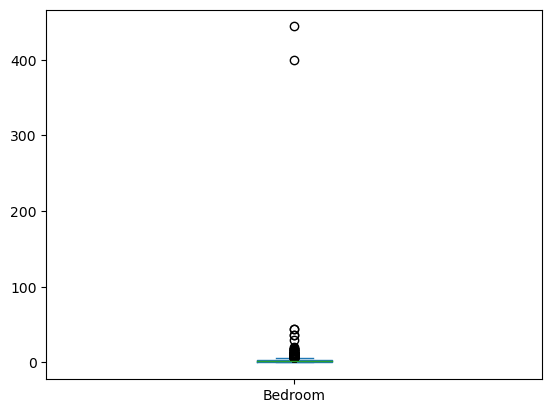

In [588]:
df['Bedroom'].plot(kind='box')

In [589]:
df[df['Bedroom']<8].groupby(['Bedroom'])['Bedroom'].count()

Bedroom
0     6653
1    12903
2    18354
3    18338
4    12427
5     3983
6      421
7      110
Name: Bedroom, dtype: int64

In [590]:
df[(df['Bedroom']==0) & (~df['Description'].str.contains('COMMERCIAL')) & (~df['Description'].str.contains('SHOP'))]

Title  \
6                                   3 Bedroom Apartments   
136        Single Room Shared Apartment In Lekki Phase 1   
243                             5 Bedroom Terrace Duplex   
257                            4 Bedroom Detached Duplex   
279              Self Serviced Roomself Contain Upstairs   
...                                                  ...   
78708                Duplex For Rent In Lekki Expressway   
78789  Duplex For Rent In Ogba | Omole | Ojodu | Berg...   
78885                   Detached House For Rent In Apapa   
78981   Duplex For Rent In Lekki Phase 1 | Lekki Phase 2   
79182  Semi Detached House For Rent In Lekki Phase 1 ...   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
6      FLAT & APARTMENT FOR RENT   2 Mar 2024    15000000        0         0   
136    SHARED APARTMENT FOR RENT  15 Jan 2024     1400000        0         0   
243               HOUSE FOR RENT   2 Mar 2024     5000000        0         0   
257               HOUSE FOR RENT   2 Mar 2024     5000000        0         0   
279        SELF CONTAIN FOR RENT  18 Jan 2024     2000000        0         1   
...                          ...          ...         ...      ...       ...   
78708            DUPLEX FOR RENT  18 Nov 2014     2400000        0         0   
78789            DUPLEX FOR RENT  06 Nov 2014     1500000        0         0   
78885             HOUSE FOR RENT  31 Oct 2014     4000000        0         0   
78981            DUPLEX FOR RENT  25 Oct 2014     8000000        0         0   
79182             HOUSE FOR RENT  26 Sep 2014     4500000        0         0   

       Toilet                                            Address  YearAdded  \
6           0                                        Ikoyi Lagos       2024   
136         0                          Lekki Phase 1 Lekki Lagos       2024   
243         0                                Chevron Lekki Lagos       2024   
257         0                            Orchid Road Lekki Lagos       2024   
279         1        Off Admiralty Way Lekki Phase 1 Lekki Lagos       2024   
...       ...                                                ...        ...   
78708       0   12 Chevy View Estate Lekki Expressway Lekki L...       2014   
78789       0   Magodo G.r.a Phase 1 Estate, Isheri Magodo Is...       2014   
78885       0                     Kofo Abayomi Apapa Apapa Lagos       2014   
78981       0     15 Off Admiralty Way Lekki Phase 1 Lekki Lagos       2014   
79182       0   1 Honorable Adedeji Street Lekki Right Side L...       2014   

      PaymentDuration      Community   Town  
6                Year          Ikoyi  Ikoyi  
136              Year  Lekki Phase 1  Lekki  
243              Year          Lekki  Lekki  
257              Year          Lekki  Lekki  
279              Year  Lekki Phase 1  Lekki  
...               ...            ...    ...  
78708            Year          Lekki  Lekki  
78789            Year  Magodo Isheri  Ikeja  
78885            Year   Kofo Abayomi  Apapa  
78981            Year  Lekki Phase 1  Lekki  
79182            Year  Lekki Phase 1  Lekki  

[5102 rows x 12 columns]

In [591]:
towns()

74

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Lekki@Ajah@Epe' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'A

In [592]:
show('Lekki@Ajah@Epe')

Title  \
21474              A Spacious 4 Bedroom Duplex For Rent   
27631            2 Bedroom Apartment Available For Rent   
27963               A 2 Bedroom Terrace Duplex For Rent   
29932  Office Space Measuring 74sqm With Manager Office   
46724                                A Studio Apartment   
46726                       A Spacious Shared Apartment   
46727                       A Spacious Shared Apartment   
49168                                            Duplex   
58719                               2 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
21474            4 BEDROOM DUPLEX FOR RENT  20 Sep 2023     3500000        4   
27631            2 BEDROOM DUPLEX FOR RENT  02 Aug 2023     1600000        2   
27963           2 BEDROOM TERRACE FOR RENT  30 Jul 2023     2700000        2   
29932         COMMERCIAL PROPERTY FOR RENT  15 Mar 2023     3500000        0   
46724  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      900000        1   
46726  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      700000        1   
46727  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      600000        1   
49168            4 BEDROOM DUPLEX FOR RENT  11 Mar 2023     3000000        4   
58719  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Oct 2022     1500000        2   

       Bathroom  Toilet                                            Address  \
21474         4       5   Thomas Estate Lekki Epe Expressway Thomas Est...   
27631         2       3   Lekki Epe Expressway Abraham Adesanya Ajah Lagos   
27963         2       3   Lekki Epe Expressway Abraham Adesanya Ajah Lagos   
29932         0       0   Facing Lekki Epe Express By Abraham Adesanya ...   
46724         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
46726         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
46727         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
49168         4       4   East Amber Estate Abijo Gra Lekki Epe Express...   
58719         2       3      Lekki Epe Expressway Thomas Estate Ajah Lagos   

       YearAdded PaymentDuration      Community            Town  
21474       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
27631       2023            Year       Adesanya  Lekki@Ajah@Epe  
27963       2023            Year       Adesanya  Lekki@Ajah@Epe  
29932       2023            Year       Adesanya  Lekki@Ajah@Epe  
46724       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
46726       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
46727       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
49168       2023            Year          Abijo  Lekki@Ajah@Epe  
58719       2022            Year  Thomas Estate  Lekki@Ajah@Epe

In [593]:
#Correct all 'Abraham Adesanya' Town
df['Community'] = df.apply(lambda row: "Abraham Adesanya" if row['Town']=='Lekki@Ajah@Epe' and row['Community']=='Adesanya' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki@Ajah@Epe' and row['Community']=='Abraham Adesanya' else row['Town'], axis=1)

In [594]:
show('Lekki@Ajah@Epe')

Title  \
21474  A Spacious 4 Bedroom Duplex For Rent   
46724                    A Studio Apartment   
46726           A Spacious Shared Apartment   
46727           A Spacious Shared Apartment   
49168                                Duplex   
58719                   2 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
21474            4 BEDROOM DUPLEX FOR RENT  20 Sep 2023     3500000        4   
46724  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      900000        1   
46726  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      700000        1   
46727  1 BEDROOM SHARED APARTMENT FOR RENT  12 Apr 2023      600000        1   
49168            4 BEDROOM DUPLEX FOR RENT  11 Mar 2023     3000000        4   
58719  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Oct 2022     1500000        2   

       Bathroom  Toilet                                            Address  \
21474         4       5   Thomas Estate Lekki Epe Expressway Thomas Est...   
46724         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
46726         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
46727         1       1   Off Lekki Epe Expressway Thomas Estate Ajah L...   
49168         4       4   East Amber Estate Abijo Gra Lekki Epe Express...   
58719         2       3      Lekki Epe Expressway Thomas Estate Ajah Lagos   

       YearAdded PaymentDuration      Community            Town  
21474       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
46724       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
46726       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
46727       2023            Year  Thomas Estate  Lekki@Ajah@Epe  
49168       2023            Year          Abijo  Lekki@Ajah@Epe  
58719       2022            Year  Thomas Estate  Lekki@Ajah@Epe

In [595]:
#Correct all 'Thomas Estate' Town
df['Town'] = df.apply(lambda row: "Ajah" if row['Town']=='Lekki@Ajah@Epe' and row['Community']=='Thomas Estate' else row['Town'], axis=1)

In [596]:
show('Lekki@Ajah@Epe')

Title                Description    DateAdded  HousePrice  Bedroom  \
49168  Duplex  4 BEDROOM DUPLEX FOR RENT  11 Mar 2023     3000000        4   

       Bathroom  Toilet                                            Address  \
49168         4       4   East Amber Estate Abijo Gra Lekki Epe Express...   

       YearAdded PaymentDuration Community            Town  
49168       2023            Year     Abijo  Lekki@Ajah@Epe

In [597]:
#Correct all 'Abijo' Town
df['Town'] = df.apply(lambda row: "Ajah" if row['Town']=='Lekki@Ajah@Epe' and row['Community']=='Abijo' else row['Town'], axis=1)

In [598]:
towns()

73

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Surulere@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Yaba@Ilupeju' 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@O

In [599]:
show('Surulere@Apapa')

Title  \
37154                Standard 2bedroom & Miniflat   
38679                         Beautiful Mini Flat   
38713                       Luxury 2 Bedroom Flat   
42073                     Pleasant 2 Bedroom Flat   
51658  Executive 3 Bedroom Brand New (all Ensuit)   

                               Description    DateAdded  HousePrice  Bedroom  \
37154  2 BEDROOM FLAT & APARTMENT FOR RENT  13 Jul 2023      900000        2   
38679  1 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023      650000        1   
38713  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023     1300000        2   
42073  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2023     1400000        2   
51658  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     2000000        3   

       Bathroom  Toilet                                            Address  \
37154         2       2       Off Apapa Road Costain Iponri Surulere Lagos   
38679         1       1          Apapa Road, Costain Iponri Surulere Lagos   
38713         3       3   Off Apapa Road, Iponri Costain Iponri Suruler...   
42073         2       3     Off Apapa Road, Costain, Iponri Surulere Lagos   
51658         4       4   Off Apapa Road, Iponri Costain Iponri Suruler...   

       YearAdded PaymentDuration Community            Town  
37154       2023            Year      Road  Surulere@Apapa  
38679       2023            Year      Road  Surulere@Apapa  
38713       2023            Year      Road  Surulere@Apapa  
42073       2023            Year      Road  Surulere@Apapa  
51658       2023            Year      Road  Surulere@Apapa

In [600]:
#Correct all 'Iponri' Town
df['Community'] = df.apply(lambda row: "Iponri" if row['Town']=='Surulere@Apapa' and row['Community']=='Road' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Apapa' and row['Community']=='Iponri' else row['Town'], axis=1)

In [601]:
towns()

72

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Oj

In [602]:
for i in show('Ikorodu@Maryland')['Address']:
    print(i)

 Off Ikorodu Road Maryland Lagos
 Ikorodu Road Maryland Lagos
 Maryland Estate Ikorodu Ikorodu Lagos
 Maryland Ikorodu Ikorodu Lagos
 Sorodoye Sorodoye Street Off Eyita Rd, Ikorodu Anthony Village Maryland Lagos
 Igbogbo Ikorodu Anthony Village Maryland Lagos
 Anthony,ajao Estate,off Ikorodu Road,lagos Mainland Maryland Lagos
 Anthony,off Ikorodu Road,lagos Mainland Maryland Lagos
 Anthony, Ikorodu Road Anthony Village Maryland Lagos


In [603]:
show('Ikorodu@Maryland')

Title  \
19444                     Well Structured 3 Bedroom Flat   
37479                         Lovely 10 Bedroom Detached   
37529             Newly Built 2bedroom Bungalow For Sale   
62114                     Very Decent Three Bedroom Flat   
69994     3 Bedroom Flat In A Block Of 4flats At Ikorodu   
70648         Anthony | Obanikoro | Ilupeju | Palmgroove   
72448           Mini Flat For Letting At Anthony,ajao Es   
72449           2 Bedroom Flat For Letting At Anthony,of   
74828  1 Bedroom Self Contained For Rent In Anthony |...   

                                   Description    DateAdded  HousePrice  \
19444      3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2023     2500000   
37479  10 BEDROOM COMMERCIAL PROPERTY FOR RENT  10 Jul 2023    40000000   
37529              2 BEDROOM BUNGALOW FOR RENT  08 Jul 2023     7500000   
62114        3 BEDROOM BLOCK OF FLATS FOR RENT  18 Aug 2022     1500000   
69994      3 BEDROOM FLAT & APARTMENT FOR RENT  18 Apr 2017      250000   
70648                  BLOCK OF FLATS FOR RENT  02 Nov 2016      250000   
72448      1 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      500000   
72449      2 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      850000   
74828      1 BEDROOM FLAT & APARTMENT FOR RENT  01 Oct 2015      250000   

       Bedroom  Bathroom  Toilet  \
19444        3         2       2   
37479       10         0       0   
37529        2         2       2   
62114        3         3       3   
69994        3         3       3   
70648        0         0       0   
72448        1         1       1   
72449        2         2       2   
74828        1         1       0   

                                                 Address  YearAdded  \
19444                    Off Ikorodu Road Maryland Lagos       2023   
37479                        Ikorodu Road Maryland Lagos       2023   
37529              Maryland Estate Ikorodu Ikorodu Lagos       2023   
62114                     Maryland Ikorodu Ikorodu Lagos       2022   
69994   Sorodoye Sorodoye Street Off Eyita Rd, Ikorod...       2017   
70648     Igbogbo Ikorodu Anthony Village Maryland Lagos       2016   
72448   Anthony,ajao Estate,off Ikorodu Road,lagos Ma...       2016   
72449   Anthony,off Ikorodu Road,lagos Mainland Maryl...       2016   
74828   Anthony, Ikorodu Road Anthony Village Marylan...       2015   

      PaymentDuration Community              Town  
19444            Year      Road  Ikorodu@Maryland  
37479            Year      Road  Ikorodu@Maryland  
37529            Year   Ikorodu  Ikorodu@Maryland  
62114            Year   Ikorodu  Ikorodu@Maryland  
69994            Year   Village  Ikorodu@Maryland  
70648            Year   Village  Ikorodu@Maryland  
72448            Year      Road  Ikorodu@Maryland  
72449            Year      Road  Ikorodu@Maryland  
74828            Year   Ikorodu  Ikorodu@Maryland

In [604]:
df[df['Town']=='Maryland']

Title  \
123    Luxury Tastefully Finished & Serviced 3 Units ...   
652    Executive Mini Flat Upstairs With 2toilet 2bat...   
1190                                       2bedroom Flat   
2028             4 Bedroom En Suite Penthouse Maisonette   
2280          3bedroom Fully Furnished Duplex At Anthony   
...                                                  ...   
78081  3 Bedroom Bungalow For Rent In Anthony | Obani...   
78243  10 Bedroom Semi Detached House For Rent In Ant...   
78777  2 Bedroom Flat For Rent In Anthony | Obanikoro...   
79064  3 Bedroom Flat For Rent In Anthony | Obanikoro...   
79170  3 Bedroom Block Of Flats For Rent In Anthony |...   

                               Description    DateAdded  HousePrice  Bedroom  \
123      3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     4500000        3   
652           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024     1500000        1   
1190     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5000000        2   
2028         4 BEDROOM MAISONETTE FOR RENT  18 Jan 2024    14000000        4   
2280             3 BEDROOM DUPLEX FOR RENT  17 Jan 2024     5000000        3   
...                                    ...          ...         ...      ...   
78081          3 BEDROOM BUNGALOW FOR RENT  08 Jan 2015     1000000        3   
78243            10 BEDROOM HOUSE FOR RENT  17 Dec 2014     1000000       10   
78777  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Nov 2014      950000        2   
79064  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Oct 2014     2000000        3   
79170    3 BEDROOM BLOCK OF FLATS FOR RENT  02 Oct 2014     2200000        3   

       Bathroom  Toilet                                            Address  \
123           3       4     Anthony Village Anthony Village Maryland Lagos   
652           2       2                               Mende Maryland Lagos   
1190          2       3                     Arowojebe Mende Maryland Lagos   
2028          4       4                    Shonibare Estate Maryland Lagos   
2280          3       4             Anthony Anthony Village Maryland Lagos   
...         ...     ...                                                ...   
78081         3       0                Ajao Estate, Anthony Maryland Lagos   
78243        10       0   Aruna Bus Stop,ikorodu Express Road, Lagos An...   
78777         3       0     Anthony, Close To Corona School Maryland Lagos   
79064         3       0   Olatunde Ayoola Avenue, Anthony Village Maryl...   
79170         3       0             Anthony Anthony Village Maryland Lagos   

       YearAdded PaymentDuration         Community      Town  
123         2024            Year           Village  Maryland  
652         2024            Year             Mende  Maryland  
1190        2024            Year             Mende  Maryland  
2028        2024            Year  Shonibare Estate  Maryland  
2280        2024            Year           Village  Maryland  
...          ...             ...               ...       ...  
78081       2015            Year       Ajao Estate  Maryland  
78243       2014            Year           Village  Maryland  
78777       2014            Year          Maryland  Maryland  
79064       2014            Year           Village  Maryland  
79170       2014            Year           Village  Maryland  

[249 rows x 12 columns]

In [605]:
#Correct all 'Anthony Village' Town
df['Community'] = df.apply(lambda row: "Anthony Village" if row['Town']=='Maryland' and 'Anthony Village' in row['Address'] else row['Community'], axis=1)

In [606]:
df[df['Town']=='Maryland']['Community'].unique()

array(['Anthony Village', 'Mende', 'Shonibare Estate', 'Maryland',
       'Arowojobe', 'New Oko Oba', 'Oyingbo', 'Ajao Estate'], dtype=object)

In [607]:
show('Ikorodu@Maryland')

Title  \
19444                     Well Structured 3 Bedroom Flat   
37479                         Lovely 10 Bedroom Detached   
37529             Newly Built 2bedroom Bungalow For Sale   
62114                     Very Decent Three Bedroom Flat   
69994     3 Bedroom Flat In A Block Of 4flats At Ikorodu   
70648         Anthony | Obanikoro | Ilupeju | Palmgroove   
72448           Mini Flat For Letting At Anthony,ajao Es   
72449           2 Bedroom Flat For Letting At Anthony,of   
74828  1 Bedroom Self Contained For Rent In Anthony |...   

                                   Description    DateAdded  HousePrice  \
19444      3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2023     2500000   
37479  10 BEDROOM COMMERCIAL PROPERTY FOR RENT  10 Jul 2023    40000000   
37529              2 BEDROOM BUNGALOW FOR RENT  08 Jul 2023     7500000   
62114        3 BEDROOM BLOCK OF FLATS FOR RENT  18 Aug 2022     1500000   
69994      3 BEDROOM FLAT & APARTMENT FOR RENT  18 Apr 2017      250000   
70648                  BLOCK OF FLATS FOR RENT  02 Nov 2016      250000   
72448      1 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      500000   
72449      2 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      850000   
74828      1 BEDROOM FLAT & APARTMENT FOR RENT  01 Oct 2015      250000   

       Bedroom  Bathroom  Toilet  \
19444        3         2       2   
37479       10         0       0   
37529        2         2       2   
62114        3         3       3   
69994        3         3       3   
70648        0         0       0   
72448        1         1       1   
72449        2         2       2   
74828        1         1       0   

                                                 Address  YearAdded  \
19444                    Off Ikorodu Road Maryland Lagos       2023   
37479                        Ikorodu Road Maryland Lagos       2023   
37529              Maryland Estate Ikorodu Ikorodu Lagos       2023   
62114                     Maryland Ikorodu Ikorodu Lagos       2022   
69994   Sorodoye Sorodoye Street Off Eyita Rd, Ikorod...       2017   
70648     Igbogbo Ikorodu Anthony Village Maryland Lagos       2016   
72448   Anthony,ajao Estate,off Ikorodu Road,lagos Ma...       2016   
72449   Anthony,off Ikorodu Road,lagos Mainland Maryl...       2016   
74828   Anthony, Ikorodu Road Anthony Village Marylan...       2015   

      PaymentDuration Community              Town  
19444            Year      Road  Ikorodu@Maryland  
37479            Year      Road  Ikorodu@Maryland  
37529            Year   Ikorodu  Ikorodu@Maryland  
62114            Year   Ikorodu  Ikorodu@Maryland  
69994            Year   Village  Ikorodu@Maryland  
70648            Year   Village  Ikorodu@Maryland  
72448            Year      Road  Ikorodu@Maryland  
72449            Year      Road  Ikorodu@Maryland  
74828            Year   Ikorodu  Ikorodu@Maryland

In [608]:
#Correct all 'Anthony Village' Town
df['Community'] = df.apply(lambda row: "Anthony Village" if row['Town']=='Ikorodu@Maryland' and 'Anthony Village' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Maryland" if row['Town']=='Ikorodu@Maryland' and row['Community']=='Anthony Village' else row['Town'], axis=1)

In [609]:
towns()

72

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Ikorodu@Maryland'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Oj

In [610]:
for i in show('Ikorodu@Maryland')['Address']:
    print(i)

 Off Ikorodu Road Maryland Lagos
 Ikorodu Road Maryland Lagos
 Maryland Estate Ikorodu Ikorodu Lagos
 Maryland Ikorodu Ikorodu Lagos
 Anthony,ajao Estate,off Ikorodu Road,lagos Mainland Maryland Lagos
 Anthony,off Ikorodu Road,lagos Mainland Maryland Lagos


In [611]:
show('Ikorodu@Maryland')

Title  \
19444            Well Structured 3 Bedroom Flat   
37479                Lovely 10 Bedroom Detached   
37529    Newly Built 2bedroom Bungalow For Sale   
62114            Very Decent Three Bedroom Flat   
72448  Mini Flat For Letting At Anthony,ajao Es   
72449  2 Bedroom Flat For Letting At Anthony,of   

                                   Description    DateAdded  HousePrice  \
19444      3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2023     2500000   
37479  10 BEDROOM COMMERCIAL PROPERTY FOR RENT  10 Jul 2023    40000000   
37529              2 BEDROOM BUNGALOW FOR RENT  08 Jul 2023     7500000   
62114        3 BEDROOM BLOCK OF FLATS FOR RENT  18 Aug 2022     1500000   
72448      1 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      500000   
72449      2 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2016      850000   

       Bedroom  Bathroom  Toilet  \
19444        3         2       2   
37479       10         0       0   
37529        2         2       2   
62114        3         3       3   
72448        1         1       1   
72449        2         2       2   

                                                 Address  YearAdded  \
19444                    Off Ikorodu Road Maryland Lagos       2023   
37479                        Ikorodu Road Maryland Lagos       2023   
37529              Maryland Estate Ikorodu Ikorodu Lagos       2023   
62114                     Maryland Ikorodu Ikorodu Lagos       2022   
72448   Anthony,ajao Estate,off Ikorodu Road,lagos Ma...       2016   
72449   Anthony,off Ikorodu Road,lagos Mainland Maryl...       2016   

      PaymentDuration Community              Town  
19444            Year      Road  Ikorodu@Maryland  
37479            Year      Road  Ikorodu@Maryland  
37529            Year   Ikorodu  Ikorodu@Maryland  
62114            Year   Ikorodu  Ikorodu@Maryland  
72448            Year      Road  Ikorodu@Maryland  
72449            Year      Road  Ikorodu@Maryland

In [612]:
#Correct all 'Anthony Village' Town
df['Community'] = df.apply(lambda row: "Anthony Village" if row['Town']=='Ikorodu@Maryland' and 'Anthony' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Maryland" if row['Town']=='Ikorodu@Maryland' and row['Community']=='Anthony Village' else row['Town'], axis=1)

In [613]:
show('Ikorodu@Maryland')

Title  \
19444          Well Structured 3 Bedroom Flat   
37479              Lovely 10 Bedroom Detached   
37529  Newly Built 2bedroom Bungalow For Sale   
62114          Very Decent Three Bedroom Flat   

                                   Description    DateAdded  HousePrice  \
19444      3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2023     2500000   
37479  10 BEDROOM COMMERCIAL PROPERTY FOR RENT  10 Jul 2023    40000000   
37529              2 BEDROOM BUNGALOW FOR RENT  08 Jul 2023     7500000   
62114        3 BEDROOM BLOCK OF FLATS FOR RENT  18 Aug 2022     1500000   

       Bedroom  Bathroom  Toilet                                 Address  \
19444        3         2       2         Off Ikorodu Road Maryland Lagos   
37479       10         0       0             Ikorodu Road Maryland Lagos   
37529        2         2       2   Maryland Estate Ikorodu Ikorodu Lagos   
62114        3         3       3          Maryland Ikorodu Ikorodu Lagos   

       YearAdded PaymentDuration Community              Town  
19444       2023            Year      Road  Ikorodu@Maryland  
37479       2023            Year      Road  Ikorodu@Maryland  
37529       2023            Year   Ikorodu  Ikorodu@Maryland  
62114       2022            Year   Ikorodu  Ikorodu@Maryland

In [614]:
#Correct all 'Maryland' Town
df['Community'] = df.apply(lambda row: "Maryland" if row['Town']=='Ikorodu@Maryland' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Maryland" if row['Town']=='Ikorodu@Maryland' and row['Community']=='Maryland' else row['Town'], axis=1)

In [615]:
show('Ikorodu@Maryland')

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [616]:
towns()

71

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Lekki@Mushin'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 

In [617]:
show('Lekki@Mushin')

Title              Description    DateAdded  HousePrice  \
28718  4 Bed Room Duplex  BLOCK OF FLATS FOR RENT  22 Jun 2023   130000000   

       Bedroom  Bathroom  Toilet                      Address  YearAdded  \
28718        0         0       0   Jakande Lekki Mushin Lagos       2023   

      PaymentDuration Community          Town  
28718            Year   Jakande  Lekki@Mushin

In [618]:
#Correct all 'Jakande' Town
df['Town'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki@Mushin' else row['Town'], axis=1)

In [619]:
towns()

70

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju'
 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 

In [620]:
show('Lekki@Ikoyi')

Title  \
4509          Modern 1 Bedroom Apartment Video Available   
10146  5 Units 3 Bedroom Flats With Boy's Quarters At...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
39365                                   Shared Apartment   
43331                 3 Bedroom Apartment With Bq & Pool   
57913  Fully Furnished & Serviced Luxury 2bedrooms Ap...   
66798                                 Test Rental Advert   
70623           Fantastic And Relatively New 2units Of 3   

                               Description    DateAdded  HousePrice  Bedroom  \
4509   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     2800000        1   
10146    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    12000000        3   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
39365  1 BEDROOM SHARED APARTMENT FOR RENT  19 Jun 2023     1000000        1   
43331  3 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023     8500000        3   
57913  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2022    14000000        2   
66798             2 BEDROOM HOUSE FOR RENT  16 Jul 2020      500000        2   
70623  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2016     3000000        3   

       Bathroom  Toilet                                            Address  \
4509          1       1   Near Lekki Ikoyi Link Bridge Lekki Phase 1 Le...   
10146         3       4                                  Ikoyi Lekki Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
39365         1       1   Bishop Gate Residents Off Salem Ahenjir Ikoyi...   
43331         3       4                    Ikoyi Chevron Drive Lekki Lagos   
57913         2       3              Awolowo Road, Ikoyi Lagos Lekki Lagos   
66798         2       0                    Ikoyi Street Agungi Lekki Lagos   
70623         3       4   Along Wole Olateju Crescent, Waterfront, Over...   

       YearAdded PaymentDuration      Community         Town  
4509        2024            Year  Lekki Phase 1  Lekki@Ikoyi  
10146       2023            Year          Lekki  Lekki@Ikoyi  
10201       2023            Year         Island  Lekki@Ikoyi  
39365       2023            Year          Lekki  Lekki@Ikoyi  
43331       2023            Year  Chevron Drive  Lekki@Ikoyi  
57913       2022            Year           Road  Lekki@Ikoyi  
66798       2020            Year         Agungi  Lekki@Ikoyi  
70623       2016            Year  Lekki Phase 1  Lekki@Ikoyi

In [621]:
#Correct all 'Awolowo Road' Town
df['Community'] = df.apply(lambda row: "Awolowo Road" if row['Town']=='Lekki@Ikoyi' and 'Awolowo Road' in row['Address'] else row['Community'], axis=1)


In [622]:
for i in df['Community'].unique():
    print(i)

Ologolo
Osapa
Ojodu
Ikoyi
Lekki Phase 1
Idado
Parkview Estate
Island
Lekki Phase 2
Opebi
Victoria Island
Ikota
Lekki
Osapa London
Elegushi
Jakande
Chevron Drive
Ikeja
Victoria Garden City
Ajah
Oral Estate
Along
Anthony Village
Oniru
Ogba
Soluyi
Bourdillon
Agungi
Sangotedo
Palmgroove
Olokonla
Ogombo
Lafiaji
Ilasan
Ikotun/Igando
Apapa
Adesanya
Ogudu
Ijesha
Ago Palace
Meiran
Ayorinde
Egbe-Idimu
Magodo Isheri
Adeniyi Jones
Isolo
New Oko Oba
Okota
Agidinbgi
Oregun
Addo
Efon
Magodo
Baruwa
Ikoyi South West
Alakija
Toyin Street
Idimu
Ayobo
Iba
Alagomeji
Iwaya
Avenue
Badore
Festac
Thomas Estate
Badagry
Bariga
Ilaje
Mende
Ikosi
Orioke
Ebute Metta
Ikorodu
Garden
Fadeyi
Crown Estate
Ifako
Gbagada Phase 1
Fagba
Shomolu
Road
Foreshore
Yaba
Adesola
Epe
Agoro
Gbagada
Lekki Palm City
Unity Estate
Akoka
Ipakodo
Off Bode Thomas
Okeira Addo
Langbasa
Onipanu
Ajiran
Awoyaya
Jibowu
Ado Road
Onikoyi
Ijegun
Abule Oja
Magodo Phase 2
Addo Road 
Aguda
Apple Junction
Agric
Ilupeju
Jumofak
Surulere
Graceland Estate

In [623]:
df[~(df['Address'].str.contains('Awolowo Road')) & (df['Community']=='Road')]

Title  \
797    24 Units Of Tastefully Finished 2 Bedroom Flat...   
855       Serviced 3 Bedroom Apartment With Pool And Gym   
935               Serviced 2 Bedroom Apartment With Pool   
1008           Newly Biult 3 Bedroom Apartment With Pool   
1601               Newly Built/furnished 2bedroom Ensuit   
...                                                  ...   
78658  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   
78791  Warehouse For Rent In Ogba | Omole | Ojodu | B...   
78793  Warehouse For Rent In Ogba | Omole | Ojodu | B...   
79054              Hotel For Rent In Ikeja | Ikeja G.r.a   
79105  3 Bedroom Flat For Rent In Iju | Ishaga | Alag...   

                                   Description    DateAdded  HousePrice  \
797          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     4500000   
855          3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    17000000   
935          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    20000000   
1008         3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    25000000   
1601         2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    10000000   
...                                        ...          ...         ...   
78658      3 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2014      750000   
78791             COMMERCIAL PROPERTY FOR RENT  06 Nov 2014    15000000   
78793             COMMERCIAL PROPERTY FOR RENT  06 Nov 2014    12000000   
79054  18 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Oct 2014     2500000   
79105      3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      400000   

       Bedroom  Bathroom  Toilet  \
797          2         2       4   
855          3         3       4   
935          2         2       3   
1008         3         3       4   
1601         2         2       3   
...        ...       ...     ...   
78658        3         3       0   
78791        0         0       0   
78793        0         0       0   
79054       18        18       0   
79105        3         3       0   

                                                 Address  YearAdded  \
797            Palmgrove Estate Coker Road Ilupeju Lagos       2024   
855                   Off Gerard Gerard Road Ikoyi Lagos       2024   
935                   Off Gerard Gerard Road Ikoyi Lagos       2024   
1008                  Off Gerard Gerard Road Ikoyi Lagos       2024   
1601                             Gerard Road Ikoyi Lagos       2024   
...                                                  ...        ...   
78658            Off Ogudu Road, Ojota Ojota Ojota Lagos       2014   
78791            Cocoa House, Acme Road, Ogba Ogba Lagos       2014   
78793            Cocoe House, Acme Road, Ogba Ogba Lagos       2014   
79054   Murtala International Airport Road, Ikeja Ike...       2014   
79105         Jonathan Coker Road, Fagba Iju Agege Lagos       2014   

      PaymentDuration Community     Town  
797              Year      Road  Ilupeju  
855              Year      Road    Ikoyi  
935              Year      Road    Ikoyi  
1008             Year      Road    Ikoyi  
1601             Year      Road    Ikoyi  
...               ...       ...      ...  
78658            Year      Road    Ojota  
78791            Year      Road     Ogba  
78793            Year      Road     Ogba  
79054            Year      Road    Ikeja  
79105            Year      Road    Agege  

[303 rows x 12 columns]

In [624]:
towns()

70

['Lekki@Ikoyi' 'Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja'
 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju'
 'Oshodi@Apapa' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Surulere@Ilupeju'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju' 'Oshodi@Ilupeju'
 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 

In [625]:
show('Lekki@Ikoyi')

Title  \
4509          Modern 1 Bedroom Apartment Video Available   
10146  5 Units 3 Bedroom Flats With Boy's Quarters At...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
39365                                   Shared Apartment   
43331                 3 Bedroom Apartment With Bq & Pool   
57913  Fully Furnished & Serviced Luxury 2bedrooms Ap...   
66798                                 Test Rental Advert   
70623           Fantastic And Relatively New 2units Of 3   

                               Description    DateAdded  HousePrice  Bedroom  \
4509   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     2800000        1   
10146    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    12000000        3   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
39365  1 BEDROOM SHARED APARTMENT FOR RENT  19 Jun 2023     1000000        1   
43331  3 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023     8500000        3   
57913  2 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2022    14000000        2   
66798             2 BEDROOM HOUSE FOR RENT  16 Jul 2020      500000        2   
70623  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2016     3000000        3   

       Bathroom  Toilet                                            Address  \
4509          1       1   Near Lekki Ikoyi Link Bridge Lekki Phase 1 Le...   
10146         3       4                                  Ikoyi Lekki Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
39365         1       1   Bishop Gate Residents Off Salem Ahenjir Ikoyi...   
43331         3       4                    Ikoyi Chevron Drive Lekki Lagos   
57913         2       3              Awolowo Road, Ikoyi Lagos Lekki Lagos   
66798         2       0                    Ikoyi Street Agungi Lekki Lagos   
70623         3       4   Along Wole Olateju Crescent, Waterfront, Over...   

       YearAdded PaymentDuration      Community         Town  
4509        2024            Year  Lekki Phase 1  Lekki@Ikoyi  
10146       2023            Year          Lekki  Lekki@Ikoyi  
10201       2023            Year         Island  Lekki@Ikoyi  
39365       2023            Year          Lekki  Lekki@Ikoyi  
43331       2023            Year  Chevron Drive  Lekki@Ikoyi  
57913       2022            Year   Awolowo Road  Lekki@Ikoyi  
66798       2020            Year         Agungi  Lekki@Ikoyi  
70623       2016            Year  Lekki Phase 1  Lekki@Ikoyi

In [626]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Lekki@Ikoyi' and row['Community']=='Awolowo Road' else row['Town'], axis=1)

In [627]:
show('Lekki@Ikoyi')

Title  \
4509          Modern 1 Bedroom Apartment Video Available   
10146  5 Units 3 Bedroom Flats With Boy's Quarters At...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
39365                                   Shared Apartment   
43331                 3 Bedroom Apartment With Bq & Pool   
66798                                 Test Rental Advert   
70623           Fantastic And Relatively New 2units Of 3   

                               Description    DateAdded  HousePrice  Bedroom  \
4509   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     2800000        1   
10146    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023    12000000        3   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
39365  1 BEDROOM SHARED APARTMENT FOR RENT  19 Jun 2023     1000000        1   
43331  3 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023     8500000        3   
66798             2 BEDROOM HOUSE FOR RENT  16 Jul 2020      500000        2   
70623  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2016     3000000        3   

       Bathroom  Toilet                                            Address  \
4509          1       1   Near Lekki Ikoyi Link Bridge Lekki Phase 1 Le...   
10146         3       4                                  Ikoyi Lekki Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
39365         1       1   Bishop Gate Residents Off Salem Ahenjir Ikoyi...   
43331         3       4                    Ikoyi Chevron Drive Lekki Lagos   
66798         2       0                    Ikoyi Street Agungi Lekki Lagos   
70623         3       4   Along Wole Olateju Crescent, Waterfront, Over...   

       YearAdded PaymentDuration      Community         Town  
4509        2024            Year  Lekki Phase 1  Lekki@Ikoyi  
10146       2023            Year          Lekki  Lekki@Ikoyi  
10201       2023            Year         Island  Lekki@Ikoyi  
39365       2023            Year          Lekki  Lekki@Ikoyi  
43331       2023            Year  Chevron Drive  Lekki@Ikoyi  
66798       2020            Year         Agungi  Lekki@Ikoyi  
70623       2016            Year  Lekki Phase 1  Lekki@Ikoyi

In [628]:
#Correct all 'Lekki' Town
df['Town'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki@Ikoyi' else row['Town'], axis=1)

In [629]:
towns()

69

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Yaba@Ilupeju'
 'Oshodi@Ilupeju' 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Or

In [630]:
show('Yaba@Ilupeju')

Title                          Description  \
39627  Brand New 2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   
61264          Decent 3 Bedroom Flat  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
39627  16 Jun 2023     1500000        2         2       3   
61264  14 Sep 2022     1200000        3         2       2   

                                            Address  YearAdded  \
39627             Onipanu Ilupeju, Lagos Yaba Lagos       2023   
61264   Awoyokun Onipanu At Ilupeju Side Yaba Lagos       2022   

      PaymentDuration Community          Town  
39627            Year   Onipanu  Yaba@Ilupeju  
61264            Year   Onipanu  Yaba@Ilupeju

In [631]:
df[df['Town']=='Ilupeju']['Community'].unique()

array(['Road', 'Ilupeju', 'Palmgroove', 'Fadeyi', 'Onipanu',
       'Industrial Estate', 'New Oko Oba', 'Olateju', 'Planning Way',
       'Iba', 'Off Bode Thomas'], dtype=object)

In [632]:
#Correct all 'Ilupeju' Town
df['Town'] = df.apply(lambda row: "Ilupeju" if row['Town']=='Yaba@Ilupeju' else row['Town'], axis=1)

In [633]:
show('Yaba@Ilupeju')

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [634]:
towns()

68

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Ajah@Epe' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alim

In [635]:
show('Ajah@Epe')

Title  \
15345  A Standard Room Shared In A 2 Bedroom Apartment   
39957                                 One Bedroom Flat   
39958                Newly Built One Bedroom Apartment   

                           Description    DateAdded  HousePrice  Bedroom  \
15345  1 BEDROOM SELF CONTAIN FOR RENT  06 Nov 2023      450000        1   
39957     1 BEDROOM MINI FLAT FOR RENT  14 Jun 2023      720000        1   
39958     1 BEDROOM MINI FLAT FOR RENT  14 Jun 2023      800000        1   

       Bathroom  Toilet                                  Address  YearAdded  \
15345         1       1   Off Epe Expressway Olokonla Ajah Lagos       2023   
39957         2       2                   Epetu Eputu Ajah Lagos       2023   
39958         1       2          Epetu Bus Stop Eputu Ajah Lagos       2023   

      PaymentDuration Community      Town  
15345            Year  Olokonla  Ajah@Epe  
39957            Year     Eputu  Ajah@Epe  
39958            Year     Eputu  Ajah@Epe

In [636]:
df[df['Address'].str.contains('Eputu')]

Title  \
7757                                 2 Bedroom Apartment   
7792   Newly Built 4 Bedroom Duplex With Bq In Beachw...   
9371                                 Well Furnished Home   
10794               A Newly Renovated 3 Bedroom Bungalow   
16790  Classy Luxury 2 Bedroom Flat In A Serene Envir...   
21598                                Lovely Self Contain   
24082                         Luxury 2 Bedroom Apartment   
24083                                2 Bedroom Apartment   
24084                                3 Bedroom Apartment   
24116          Brand New 2 Bedroom All Ensuite Apartment   
25382  Exquisitely And Luxurious Brandnew 2bedroom Fl...   
25384  Two Bedroom Apartment For Rent At Awoyaya [red...   
25557  Tastefully & Exquisitely Brand New Specious Mi...   
25558  Tastefully & Exquisitely Brand New Specious 2 ...   
27713                              Lovely 2 Bedroom Flat   
27726                            Exquisite 2bedroom Flat   
27733                                   Lovely Mini Flat   
27777                     Nicely Renovated 3bedroom Flat   
27778                    Solid 2 Units Of 3 Bedroom Flat   
27782                     Neatly Renovated 3bedroom Flat   
28409                      Brand New 2 Bedroom Apartment   
29831        Newly Built And Fully Finished Self Contain   
29865                             Newly Built Shop Space   
38121          Newly Built Room And Parlour Self Contain   
38508         Decently Finished 3 Bedroom Terrace Duplex   
39957                                   One Bedroom Flat   
39958                  Newly Built One Bedroom Apartment   
42302                               Smart 2 Bedroom Flat   
45950                                     2 Bedroom Flat   
46409  Newly Built 4 Bedroom Duplex In A Serene Envir...   
46546                     A Room And Palour Self Contain   
47940             Two Bedroom Flat At Lakowe Ibeju Lekki   
49557                    Brand New One Bedroom Mini Flat   
50100              Tastefully Finished Room Self Contain   
50101                       Tastefully Finished Miniflat   
50102                 Tastefully Finished 2 Bedroom Flat   
50441                           Sharp Mini Flat At Eputu   
50563                           Sharp Mini Flat At Eputu   
51731                              Massive 3bedroom Flat   
51733                              Massive 3bedroom Flat   
52043                     Brand New Built 2 Bedroom Flat   
52892       Newly Renovated 3bedroom Flat With A Room Bq   
54671             Newly Built And Furnished Self Contain   
64566  Well Finished 4bedrm Duplex With 2 Spacious Si...   
68157                          Newly Built 2bedroom Flat   
69295                         Spacious Office Of 160sqm.   
69305    3 Bedroom Detached Flat For Rent (new Building)   

                                   Description    DateAdded  HousePrice  \
7757       2 BEDROOM FLAT & APARTMENT FOR RENT  02 Jan 2024     1000000   
7792   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  31 Dec 2023     3000000   
9371           2 BEDROOM SELF CONTAIN FOR RENT  14 Dec 2023      800000   
10794     3 BEDROOM DETACHED BUNGALOW FOR RENT  05 Dec 2023      850000   
16790          2 BEDROOM SELF CONTAIN FOR RENT  27 Oct 2023      900000   
21598          1 BEDROOM SELF CONTAIN FOR RENT  20 Sep 2023      200000   
24082      2 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2023      850000   
24083      2 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2023     1000000   
24084      3 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2023     1200000   
24116      2 BEDROOM FLAT & APARTMENT FOR RENT  01 Sep 2023     1000000   
25382        2 BEDROOM BLOCK OF FLATS FOR RENT  23 Aug 2023     8000000   
25384      2 BEDROOM FLAT & APARTMENT FOR RENT  22 Aug 2023      500000   
25557             1 BEDROOM MINI FLAT FOR RENT  22 Aug 2023      900000   
25558        2 BEDROOM BLOCK OF FLATS FOR RENT  22 Aug 2023     1200000   
27713                 2 BEDROOM HOUSE FOR REN

In [637]:
#Correct all 'Ajah' Town
df['Town'] = df.apply(lambda row: "Ajah" if row['Town']=='Ajah@Epe' else row['Town'], axis=1)

In [638]:
towns()

67

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Agege@Abule Egba@Ipaja' 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekk

In [639]:
show('Agege@Abule Egba@Ipaja')

Title                          Description  \
40557  Modern 2 Bedroom Flat  2 BEDROOM SHARED APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
40557  07 Jun 2023      550000        2         3       3   

                                                 Address  YearAdded  \
40557   Diamond Estate Command Ipaja Abule Egba Agege...       2023   

      PaymentDuration Community                    Town  
40557            Year     Agege  Agege@Abule Egba@Ipaja

In [640]:
df[df['Town']=='Ipaja']['Community'].unique()

array(['Baruwa', 'Ayobo', 'Ipaja', 'Abesan Estate', 'Gowon Estate',
       'Jakande Estate', 'New Oko Oba', 'Alagbado', 'Iyana', 'Abesan',
       'Alimosho', 'Meiran', 'Egbeda', 'Idimu', 'Onikan', 'Alakuko',
       'Sabo', 'Cele', 'Graceland Estate', "Boy's Town", 'Road', 'Ijesha',
       'Ayetoro', 'Isheri'], dtype=object)

In [641]:
#Correct all 'Maryland' Town
df['Community'] = df.apply(lambda row: "Ipaja" if row['Town']=='Agege@Abule Egba@Ipaja' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Abule Egba@Ipaja' else row['Town'], axis=1)

In [642]:
towns()

66

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Yaba@Gbagada' 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho'
 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 '

In [643]:
show('Yaba@Gbagada')

Title  \
41670                   Attractive Mini Flat   
47869              Neatly Finished Mini Flat   
47883  Executive And Spacious 2 Bedroom Flat   
69716                One Bedroom Flat To Let   

                               Description    DateAdded  HousePrice  Bedroom  \
41670  1 BEDROOM FLAT & APARTMENT FOR RENT  31 May 2023      900000        1   
47869  1 BEDROOM FLAT & APARTMENT FOR RENT  27 Mar 2023      900000        1   
47883  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Mar 2023     1200000        2   
69716  1 BEDROOM FLAT & APARTMENT FOR RENT  12 Sep 2017      600000        1   

       Bathroom  Toilet                                  Address  YearAdded  \
41670         0       0              Close To Gbagada Yaba Lagos       2023   
47869         2       2       Pedro Gbagada Extension Yaba Lagos       2023   
47883         3       3   Off Pedro Gbagada Extension Yaba Lagos       2023   
69716         1       0                 Gbagada Akoka Yaba Lagos       2017   

      PaymentDuration Community          Town  
41670            Year      Yaba  Yaba@Gbagada  
47869            Year      Yaba  Yaba@Gbagada  
47883            Year      Yaba  Yaba@Gbagada  
69716            Year     Akoka  Yaba@Gbagada

In [644]:
#Correct all 'Yaba' Town
df['Town'] = df.apply(lambda row: "Yaba" if row['Town']=='Yaba@Gbagada' else row['Town'], axis=1)

In [645]:
towns()

65

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Surulere@Ilupeju' 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Ikeja@Ojo@Ojodu' 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' '

In [646]:
show('Surulere@Ilupeju')

Title                Description    DateAdded  \
29037  Standard 8 Units Of Mini Flat  FLAT & APARTMENT FOR RENT  30 May 2023   

       HousePrice  Bedroom  Bathroom  Toilet  \
29037      900000        0         0       0   

                                                 Address  YearAdded  \
29037   Ilupeju Road, Off Bode Thomas Bode Thomas Sur...       2023   

      PaymentDuration        Community              Town  
29037            Year  Off Bode Thomas  Surulere@Ilupeju

In [647]:
#Correct all 'Surulere' Town
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Ilupeju' else row['Town'], axis=1)

In [648]:
towns()

64

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege

In [649]:
show('Ikeja@Ojo@Ojodu')

Title  \
42387  To Let Executive 3 Bedroom Flat At Ojodu Berger   
48138                       A Lovely Miniflat Upstairs   
48151                 Alluring 2bedroom Flat Apartment   
48597                       Modern Mini Flat Apartment   
48599         Tastefully Built 2bedroom Flat Apartment   
48602              Standard Mini Flat Duplex Apartment   
50674     Fresh 2bedrooms Flat With All Rooms Ensuite.   
55421                           Spacious 2bedroom Flat   
55992                Beautifully Built 4bedroom Duplex   
57089                Beautofully Built 2 Bedrooms Flat   
65375      5 Bedrooms Or 6 Bedrooms Apartment For Rent   
67837                        Brand New 3bedroom Duplex   
74016            Office Complex (4 Bedroom Open Space)   

                                  Description    DateAdded  HousePrice  \
42387                3 BEDROOM HOUSE FOR RENT  23 May 2023     2500000   
48138                1 BEDROOM HOUSE FOR RENT  23 Mar 2023      850000   
48151     2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1800000   
48597     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1000000   
48599     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1800000   
48602     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1200000   
50674                2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1800000   
55421     2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     2500000   
55992               4 BEDROOM DUPLEX FOR RENT  24 Nov 2022     6000000   
57089                2 BEDROOM HOUSE FOR RENT  15 Nov 2022      900000   
65375     5 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2021     2500000   
67837               3 BEDROOM DUPLEX FOR RENT  16 Jul 2019     1000000   
74016  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2015     3500000   

       Bedroom  Bathroom  Toilet  \
42387        3         3       3   
48138        1         1       1   
48151        2         2       3   
48597        1         1       2   
48599        2         2       3   
48602        1         1       2   
50674        2         2       3   
55421        2         3       3   
55992        4         4       5   
57089        2         2       1   
65375        5         5       6   
67837        3         3       0   
74016        4         4       4   

                                                 Address  YearAdded  \
42387      Behind Morgan Estate Ojodu Berger Ikeja Lagos       2023   
48138            Morgan Estate Phase 2 Ojodu Ikeja Lagos       2023   
48151   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48597   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48599   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48602   Close To Westgate Shopping Mall Olowora Ojodu...       2023   
50674             Ojodu Beside Morgan Estate Ikeja Lagos       2023   
55421   Magodo Phase 2, Ojodu Lagos Magodo Isheri Ike...       2022   
55992    Magodo Phase 1, Ojodu Magodo Isheri Ikeja Lagos       2022   
57089                  Ojodu By Unity Estate Ikeja Lagos       2022   
65375   River Valley Estate, Ojodu Berger Berger Ikej...       2021   
67837   Citiview Estate Opic Ojodu Ikeja Lagos Citivi...       2019   
74016       Isheri Road, Ojodu Magodo Isheri Ikeja Lagos       2015   

      PaymentDuration      Community             Town  
42387            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48138            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48151            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48597            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48599            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48602            Year        Olowora  Ikeja@Ojo@Ojodu  
50674            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
55421            Year         Magodo  Ikeja@Ojo@Ojodu  
55992            Year         Magodo  Ikeja@Ojo@Ojodu  
57089            Year   Unity Estate  Ikeja@Ojo@Ojodu  
65375            Year         Valley  Ikeja@Ojo@Ojodu  
67837            Year      

In [650]:
df[df['Community']=='Olowora']['Town'].unique()
#The only town for Community:Olowora is Ikeja

array(['Ikeja', 'Ikeja@Ojo@Ojodu'], dtype=object)

In [651]:
#Correct all 'Ikeja' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town']=='Ikeja@Ojo@Ojodu' and row['Community']=='Olowora' else row['Town'], axis=1)

In [652]:
show('Ikeja@Ojo@Ojodu')['Community'].value_counts()

Community
Morgan Estate    6
Magodo           3
Unity Estate     1
Valley           1
Opic             1
Name: count, dtype: int64

In [653]:
show('Ikeja@Ojo@Ojodu')

Title  \
42387  To Let Executive 3 Bedroom Flat At Ojodu Berger   
48138                       A Lovely Miniflat Upstairs   
48151                 Alluring 2bedroom Flat Apartment   
48597                       Modern Mini Flat Apartment   
48599         Tastefully Built 2bedroom Flat Apartment   
50674     Fresh 2bedrooms Flat With All Rooms Ensuite.   
55421                           Spacious 2bedroom Flat   
55992                Beautifully Built 4bedroom Duplex   
57089                Beautofully Built 2 Bedrooms Flat   
65375      5 Bedrooms Or 6 Bedrooms Apartment For Rent   
67837                        Brand New 3bedroom Duplex   
74016            Office Complex (4 Bedroom Open Space)   

                                  Description    DateAdded  HousePrice  \
42387                3 BEDROOM HOUSE FOR RENT  23 May 2023     2500000   
48138                1 BEDROOM HOUSE FOR RENT  23 Mar 2023      850000   
48151     2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1800000   
48597     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1000000   
48599     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1800000   
50674                2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1800000   
55421     2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     2500000   
55992               4 BEDROOM DUPLEX FOR RENT  24 Nov 2022     6000000   
57089                2 BEDROOM HOUSE FOR RENT  15 Nov 2022      900000   
65375     5 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2021     2500000   
67837               3 BEDROOM DUPLEX FOR RENT  16 Jul 2019     1000000   
74016  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2015     3500000   

       Bedroom  Bathroom  Toilet  \
42387        3         3       3   
48138        1         1       1   
48151        2         2       3   
48597        1         1       2   
48599        2         2       3   
50674        2         2       3   
55421        2         3       3   
55992        4         4       5   
57089        2         2       1   
65375        5         5       6   
67837        3         3       0   
74016        4         4       4   

                                                 Address  YearAdded  \
42387      Behind Morgan Estate Ojodu Berger Ikeja Lagos       2023   
48138            Morgan Estate Phase 2 Ojodu Ikeja Lagos       2023   
48151   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48597   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48599   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
50674             Ojodu Beside Morgan Estate Ikeja Lagos       2023   
55421   Magodo Phase 2, Ojodu Lagos Magodo Isheri Ike...       2022   
55992    Magodo Phase 1, Ojodu Magodo Isheri Ikeja Lagos       2022   
57089                  Ojodu By Unity Estate Ikeja Lagos       2022   
65375   River Valley Estate, Ojodu Berger Berger Ikej...       2021   
67837   Citiview Estate Opic Ojodu Ikeja Lagos Citivi...       2019   
74016       Isheri Road, Ojodu Magodo Isheri Ikeja Lagos       2015   

      PaymentDuration      Community             Town  
42387            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48138            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48151            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48597            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48599            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
50674            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
55421            Year         Magodo  Ikeja@Ojo@Ojodu  
55992            Year         Magodo  Ikeja@Ojo@Ojodu  
57089            Year   Unity Estate  Ikeja@Ojo@Ojodu  
65375            Year         Valley  Ikeja@Ojo@Ojodu  
67837            Year           Opic  Ikeja@Ojo@Ojodu  
74016            Year         Magodo  Ikeja@Ojo@Ojodu

In [654]:
df[df['Community']=='Opic']

Title  \
30155                       Neat 3bedroom Terrace Duplex   
33786  Spacious And Well Built 12 Units Of Serviced 3...   
36468          Brand New 4 Bedrooms Semi Detached Duplex   
36565     6 Bedroom Duplex With 2units Of 3bedrooms Flat   
41581                          Well Built 3 Bedroom Flat   
43807                    Tastefully Built 2 Bedroom Flat   
44310                           3 Bedroom Terrace Duplex   
45085                 Pleasant 3 Bedroom Terraced Duplex   
46449                            Standard 2 Bedroom Flat   
47505                        Well Serviced 2bedroom Flat   
47510         Massive 10 Unit Of 4bedroom Tarrace Duplex   
48177                             Fresh 4 Bedroom Duplex   
48227                              Exotic 2 Bedroom Flat   
48231                              Premium 3bedroom Flat   
48250                           Classic 3 Bedroom Duplex   
48623  A Classic 4 Bedroom Fully Detached Duplex With...   
48766                           Executive 2 Bedroom Flat   
48769                           Executive 2 Bedroom Flat   
50278                              Lovely 3 Bedroom Flat   
55781                                     2 Bedroom Flat   
58133                            Standard 2 Bedroom Flat   
59654               An Executive 3 Bedroom Flat For Rent   
59655              A Neat And Furnished 4 Bedroom Duplex   
59658                      An Executive 2 Bedroom Duplex   
59659          A 3 Bedroom Flat For Rent In Ojodu Berger   
59786                        An Executive 2 Bedroom Flat   
59787                A Beautiful 2 Bedroom Flat For Rent   
59788                             An Executive Mini Flat   
60577  Warehouse On 4000 Sqm Land Area With Office Sp...   
63504                          2 Units Of 3 Bedroom Flat   
64191  Newly Built 2 Bedroom & A Room And Parlor Avai...   
67837                          Brand New 3bedroom Duplex   
69739           Brand New Warehouse In Opic, Isheri Nort   
69753                    Brand New Well Built Warehouses   
71402                   Newly Built 3 Bed Block Of Flats   
71440                           3 Bedroom Flat In Isheri   
74365  4 Bedroom Flat For Rent In Alimosho | Idimu | ...   
74366  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
75687  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
76243  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
76731  3 Bedroom Flat For Rent In Alaba | Ijegun | Ok...   
77100  4 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
77101  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
77906  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
78580  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
79233  Other Commercial For Rent In Ogba | Omole | Oj...   

                               Description    DateAdded  HousePrice  Bedroom  \
30155                       HOUSE FOR RENT  24 Feb 2023     1500000        0   
33786    4 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1800000        4   
36468            4 BEDROOM DUPLEX FOR RENT  24 Jul 2023    75000000        4   
36565            6 BEDROOM DUPLEX FOR RENT  20 Jul 2023    65000000        6   
41581             3 BEDROOM HOUSE FOR RENT  31 May 2023      900000        3   
43807  2 BEDROOM FLAT & APARTMENT FOR RENT  09 May 2023     1200000        2   
44310             3 BEDROOM HOUSE FOR RENT  09 May 2023     1500000        3   
45085  3 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2023     1000000        3   
46449  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Apr 2023     1200000        2   
47505             2 BEDROOM HOUSE FOR RENT  29 Mar 2023     1200000        2   
47510             4 BEDROOM HOUSE FOR RENT  29 Mar 2023     2500000        4   
48177             4 BEDROOM HOUSE FOR RENT  23 Mar 2023     3500000        4   
48227  2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1500000        2   
48231  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1700000        3   
48250  3 BEDROOM FLAT & APARTM

In [655]:
df[df['Community']=='Opic']

Title  \
30155                       Neat 3bedroom Terrace Duplex   
33786  Spacious And Well Built 12 Units Of Serviced 3...   
36468          Brand New 4 Bedrooms Semi Detached Duplex   
36565     6 Bedroom Duplex With 2units Of 3bedrooms Flat   
41581                          Well Built 3 Bedroom Flat   
43807                    Tastefully Built 2 Bedroom Flat   
44310                           3 Bedroom Terrace Duplex   
45085                 Pleasant 3 Bedroom Terraced Duplex   
46449                            Standard 2 Bedroom Flat   
47505                        Well Serviced 2bedroom Flat   
47510         Massive 10 Unit Of 4bedroom Tarrace Duplex   
48177                             Fresh 4 Bedroom Duplex   
48227                              Exotic 2 Bedroom Flat   
48231                              Premium 3bedroom Flat   
48250                           Classic 3 Bedroom Duplex   
48623  A Classic 4 Bedroom Fully Detached Duplex With...   
48766                           Executive 2 Bedroom Flat   
48769                           Executive 2 Bedroom Flat   
50278                              Lovely 3 Bedroom Flat   
55781                                     2 Bedroom Flat   
58133                            Standard 2 Bedroom Flat   
59654               An Executive 3 Bedroom Flat For Rent   
59655              A Neat And Furnished 4 Bedroom Duplex   
59658                      An Executive 2 Bedroom Duplex   
59659          A 3 Bedroom Flat For Rent In Ojodu Berger   
59786                        An Executive 2 Bedroom Flat   
59787                A Beautiful 2 Bedroom Flat For Rent   
59788                             An Executive Mini Flat   
60577  Warehouse On 4000 Sqm Land Area With Office Sp...   
63504                          2 Units Of 3 Bedroom Flat   
64191  Newly Built 2 Bedroom & A Room And Parlor Avai...   
67837                          Brand New 3bedroom Duplex   
69739           Brand New Warehouse In Opic, Isheri Nort   
69753                    Brand New Well Built Warehouses   
71402                   Newly Built 3 Bed Block Of Flats   
71440                           3 Bedroom Flat In Isheri   
74365  4 Bedroom Flat For Rent In Alimosho | Idimu | ...   
74366  3 Bedroom Flat For Rent In Alimosho | Idimu | ...   
75687  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
76243  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
76731  3 Bedroom Flat For Rent In Alaba | Ijegun | Ok...   
77100  4 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
77101  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
77906  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
78580  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
79233  Other Commercial For Rent In Ogba | Omole | Oj...   

                               Description    DateAdded  HousePrice  Bedroom  \
30155                       HOUSE FOR RENT  24 Feb 2023     1500000        0   
33786    4 BEDROOM BLOCK OF FLATS FOR RENT  22 Dec 2023     1800000        4   
36468            4 BEDROOM DUPLEX FOR RENT  24 Jul 2023    75000000        4   
36565            6 BEDROOM DUPLEX FOR RENT  20 Jul 2023    65000000        6   
41581             3 BEDROOM HOUSE FOR RENT  31 May 2023      900000        3   
43807  2 BEDROOM FLAT & APARTMENT FOR RENT  09 May 2023     1200000        2   
44310             3 BEDROOM HOUSE FOR RENT  09 May 2023     1500000        3   
45085  3 BEDROOM FLAT & APARTMENT FOR RENT  04 May 2023     1000000        3   
46449  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Apr 2023     1200000        2   
47505             2 BEDROOM HOUSE FOR RENT  29 Mar 2023     1200000        2   
47510             4 BEDROOM HOUSE FOR RENT  29 Mar 2023     2500000        4   
48177             4 BEDROOM HOUSE FOR RENT  23 Mar 2023     3500000        4   
48227  2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1500000        2   
48231  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1700000        3   
48250  3 BEDROOM FLAT & APARTM

In [656]:
#Correct all 'Ikeja' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town']=='Ikeja@Ojo@Ojodu' and row['Community']=='Opic' else row['Town'], axis=1)

In [657]:
show('Ikeja@Ojo@Ojodu')['Community'].value_counts()

Community
Morgan Estate    6
Magodo           3
Unity Estate     1
Valley           1
Name: count, dtype: int64

In [658]:
for i in df[df['Community']=='Valley']['Address']:
    print(i)

 River Valley Estate Berger Ikeja Lagos
 River Valley Estate Ikeja Lagos
 River Valley Estate, Berger Berger Ikeja Lagos
 River Valley Estate Berger Berger Ikeja Lagos
 River Valley Estate, Berger. Berger Ikeja Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate, Ojodu Berger Berger Ikeja Lagos
 Olutayo Alao Street, River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate Ogba Lagos
 River Valley Estate, Ojodu Berger Ojota Ojota Lagos


In [659]:
show('Ikeja@Ojo@Ojodu')

Title  \
42387  To Let Executive 3 Bedroom Flat At Ojodu Berger   
48138                       A Lovely Miniflat Upstairs   
48151                 Alluring 2bedroom Flat Apartment   
48597                       Modern Mini Flat Apartment   
48599         Tastefully Built 2bedroom Flat Apartment   
50674     Fresh 2bedrooms Flat With All Rooms Ensuite.   
55421                           Spacious 2bedroom Flat   
55992                Beautifully Built 4bedroom Duplex   
57089                Beautofully Built 2 Bedrooms Flat   
65375      5 Bedrooms Or 6 Bedrooms Apartment For Rent   
74016            Office Complex (4 Bedroom Open Space)   

                                  Description    DateAdded  HousePrice  \
42387                3 BEDROOM HOUSE FOR RENT  23 May 2023     2500000   
48138                1 BEDROOM HOUSE FOR RENT  23 Mar 2023      850000   
48151     2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1800000   
48597     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1000000   
48599     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1800000   
50674                2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1800000   
55421     2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     2500000   
55992               4 BEDROOM DUPLEX FOR RENT  24 Nov 2022     6000000   
57089                2 BEDROOM HOUSE FOR RENT  15 Nov 2022      900000   
65375     5 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2021     2500000   
74016  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2015     3500000   

       Bedroom  Bathroom  Toilet  \
42387        3         3       3   
48138        1         1       1   
48151        2         2       3   
48597        1         1       2   
48599        2         2       3   
50674        2         2       3   
55421        2         3       3   
55992        4         4       5   
57089        2         2       1   
65375        5         5       6   
74016        4         4       4   

                                                 Address  YearAdded  \
42387      Behind Morgan Estate Ojodu Berger Ikeja Lagos       2023   
48138            Morgan Estate Phase 2 Ojodu Ikeja Lagos       2023   
48151   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48597   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48599   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
50674             Ojodu Beside Morgan Estate Ikeja Lagos       2023   
55421   Magodo Phase 2, Ojodu Lagos Magodo Isheri Ike...       2022   
55992    Magodo Phase 1, Ojodu Magodo Isheri Ikeja Lagos       2022   
57089                  Ojodu By Unity Estate Ikeja Lagos       2022   
65375   River Valley Estate, Ojodu Berger Berger Ikej...       2021   
74016       Isheri Road, Ojodu Magodo Isheri Ikeja Lagos       2015   

      PaymentDuration      Community             Town  
42387            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48138            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48151            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48597            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48599            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
50674            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
55421            Year         Magodo  Ikeja@Ojo@Ojodu  
55992            Year         Magodo  Ikeja@Ojo@Ojodu  
57089            Year   Unity Estate  Ikeja@Ojo@Ojodu  
65375            Year         Valley  Ikeja@Ojo@Ojodu  
74016            Year         Magodo  Ikeja@Ojo@Ojodu

In [660]:
df[df['Community']=='Valley']

Title  \
47521                Fresh 4bedroom Semi Detached Duplex   
48229                          Well Structured Mini Flat   
50662                                   Superb Mini Flat   
50678                                Nice 2 Bedroom Flat   
61175                                 A Decent Mini Flat   
63231                                     2 Bedroom Flat   
65375        5 Bedrooms Or 6 Bedrooms Apartment For Rent   
69130                                   Flat Mate Needed   
74039           Nicely Finished 3 Bedroom Block Of Flats   
74780  2 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
74781  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
75133  3 Bedroom Flat For Rent In Ogba | Omole | Ojod...   
75138  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
75139  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
75141  4 Bedroom Duplex For Rent In Ogba | Omole | Oj...   
78878  3 Bedroom Flat For Rent In Ojota | Ogudu | Ogu...   

                               Description    DateAdded  HousePrice  Bedroom  \
47521             4 BEDROOM HOUSE FOR RENT  29 Mar 2023     4500000        4   
48229  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023      600000        1   
50662  1 BEDROOM FLAT & APARTMENT FOR RENT  21 Feb 2023     1200000        1   
50678             2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1500000        2   
61175  1 BEDROOM FLAT & APARTMENT FOR RENT  14 Sep 2022     1200000        1   
63231  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      700000        2   
65375  5 BEDROOM FLAT & APARTMENT FOR RENT  18 May 2021     2500000        5   
69130  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Aug 2018      300000        2   
74039    3 BEDROOM BLOCK OF FLATS FOR RENT  02 Dec 2015     1200000        3   
74780  2 BEDROOM FLAT & APARTMENT FOR RENT  02 Oct 2015      700000        2   
74781            4 BEDROOM DUPLEX FOR RENT  02 Oct 2015     2000000        4   
75133  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Sep 2015      850000        3   
75138            4 BEDROOM DUPLEX FOR RENT  17 Sep 2015     2000000        4   
75139            4 BEDROOM DUPLEX FOR RENT  17 Sep 2015     1700000        4   
75141            4 BEDROOM DUPLEX FOR RENT  17 Sep 2015     1500000        4   
78878  3 BEDROOM FLAT & APARTMENT FOR RENT  31 Oct 2014      800000        3   

       Bathroom  Toilet                                            Address  \
47521         4       5             River Valley Estate Berger Ikeja Lagos   
48229         1       1                    River Valley Estate Ikeja Lagos   
50662         1       2     River Valley Estate, Berger Berger Ikeja Lagos   
50678         0       0      River Valley Estate Berger Berger Ikeja Lagos   
61175         1       2    River Valley Estate, Berger. Berger Ikeja Lagos   
63231         2       2                     River Valley Estate Ogba Lagos   
65375         5       6   River Valley Estate, Ojodu Berger Berger Ikej...   
69130         2       0   Olutayo Alao Street, River Valley Estate Ogba...   
74039         2       2                     River Valley Estate Ogba Lagos   
74780         0       0                     River Valley Estate Ogba Lagos   
74781         0       0                     River Valley Estate Ogba Lagos   
75133         3       0                     River Valley Estate Ogba Lagos   
75138         4       0                     River Valley Estate Ogba Lagos   
75139         4       0                     River Valley Estate Ogba Lagos   
75141         4       0                     River Valley Estate Ogba Lagos   
78878         3       0   River Valley Estate, Ojodu Berger Ojota Ojota...   

       YearAdded PaymentDuration Community             Town  
47521       2023            Year    Valley            Ikeja  
48229       2023            Year    Valley            Ikeja  
50662       2023            Year    Valley            Ikeja  
50678       2023            Year    Valley            Ikeja  
61175       2022            Year

In [661]:
#Correct all 'Ojodu' Town
df['Community'] = df.apply(lambda row: "River Valley Estate" if row['Community']=='Valley' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Ojodu" if row['Community']=='River Valley Estate' else row['Town'], axis=1)

In [662]:
show('Ikeja@Ojo@Ojodu')['Community'].value_counts()

Community
Morgan Estate    6
Magodo           3
Unity Estate     1
Name: count, dtype: int64

In [663]:
df[df['Community']=='Unity Estate'][['Town', 'Address', 'Community']]

Town                                            Address  \
942        Ajah                     Unity Estate Badore Ajah Lagos   
1030       Ajah                    Unity Estate, Badore Ajah Lagos   
1120       Ajah               First Unity Estate Badore Ajah Lagos   
1196       Ajah          Unity Estate Off Ado Road Addo Ajah Lagos   
2217   Alimosho                 Unity Estate Egbeda Alimosho Lagos   
...         ...                                                ...   
73932      Ajah             Unity Estate, Badore Badore Ajah Lagos   
74188      Ajah          Unity Estate, Badore Ajah Ajah Ajah Lagos   
74217      Ajah   Unity Estate, By Co Operative Villa, Badore B...   
75434      Ajah       Unity Estate, Badore, Ajah Badore Ajah Lagos   
76123      Ajah       Unity Estate, Badore, Ajah Badore Ajah Lagos   

          Community  
942    Unity Estate  
1030   Unity Estate  
1120   Unity Estate  
1196   Unity Estate  
2217   Unity Estate  
...             ...  
73932  Unity Estate  
74188  Unity Estate  
74217  Unity Estate  
75434  Unity Estate  
76123  Unity Estate  

[143 rows x 3 columns]

In [664]:
#Correct all 'Badore Ajah' Town
df['Community'] = df.apply(lambda row: "Badore" if row['Community']=='Unity Estate' and 'Badore' in row['Address'] else row['Community'], axis=1)


In [665]:
#Correct all 'Egbeda Agege' Town
df['Community'] = df.apply(lambda row: "Egbeda" if row['Community']=='Unity Estate' and 'Egbeda' in row['Address'] else row['Community'], axis=1)


In [666]:
for i in df[df['Community']=='Unity Estate'][['Town', 'Address', 'Community']]['Address']:
    print(i)

 Unity Estate Off Ado Road Addo Ajah Lagos
 Unity Estate Zone 2 Alimosho Lagos
 Unity Estate, Olu Odo, Ikorodu Lagos
 Unity Estate Alimosho Lagos
 Unity Estate Alimosho Lagos
 Unity Estate Alimosho Lagos
 Unity Estate Alimosho Lagos
 47, Olugbede Street, Off Unity Estate, Abule Odu Bus Stop, Alimosho Lagos
 Unity Estate Awoyaya Ajah Lagos
 Charles Nwakaeze Avenue, Unity Estate, Gbetu New Road Awoyaya Ajah Lagos
 Charles Nwakaeze Avenue, Unity Estate, Gbetu New Road Awoyaya Ajah Lagos
 Unity Estate Isolo Lagos
 Owode Onirin By Unity Estate Ikorodu Ikorodu Lagos
 Ojodu By Unity Estate Ikeja Lagos
 Unity Estate Alimosho Alimosho Lagos
 Unity Estate Off Rogo Road Iju Ishaga Iju Ishaga Agege Lagos
 Unity Estate Alimosho Alimosho Lagos
 Unity Estate Awoyaya Awoyaya Ajah Lagos
 Unity Estate Okota Isolo Isolo Lagos


In [667]:
#Correct all 'Alimosho' Town
df['Community'] = df.apply(lambda row: "Alimosho" if row['Community']=='Unity Estate' and row['Town']=='Alimosho' else row['Community'], axis=1)


In [668]:
df[(df['Community']=='Unity Estate') & (df['Town']=='Alimosho')]

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [669]:
df[(df['Town']=='Agege') & (df['Community']=='Unity Estate')]


Title                          Description  \
64075  Well Maintained Block Of 4 Flats  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
64075  14 Feb 2022    38000000        3         4       0   

                                                 Address  YearAdded  \
64075   Unity Estate Off Rogo Road Iju Ishaga Iju Ish...       2022   

      PaymentDuration     Community   Town  
64075            Year  Unity Estate  Agege

In [670]:
#Correct all 'Iju' Town
df['Community'] = df.apply(lambda row: "Iju" if row['Community']=='Unity Estate' and row['Town']=='Agege' else row['Community'], axis=1)


In [671]:
#Some addresses show only 'Iju' and others have 'Iju Ishaga'
for i in df[(df['Town']=='Agege') & (df['Community']=='Iju') & ~(df['Address'].str.contains('Ishaga'))]['Address']:
    print(i)

 Iju Agege Lagos
 Street Iju Agege Lagos
 Iju Road Off College Road, Agege Lagos
 Iju Agege Lagos
 Iju Iju Agege Lagos
 Iju Iju Agege Lagos
 Iju Agege Lagos
 Off Iju Water Works Road Iju Agege Lagos
 Off Iju Road Agege Lagos
 Longe Toyin Akande Iju Agege Lagos
 Iju Agege Lagos
 Pea Cinema Busstop Iju Agege Lagos
 Iju Road Agege Lagos
 Mawo Busstop, Kola Agbado Iju Agege Lagos
 Nelson Cole Off Iju Road Via Collage Road Iju Agege Lagos
 Ola Williams,kayfarm Iju Agege Lagos
 Ait Road Off Ait Road Lagos Iju Agege Lagos
 2 Yusuf Estate Iju Agege Lagos
 Adiyan, Agbado Iju Agege Lagos
 Adiyan, Agbado Iju Agege Lagos
 Close To Fidelity Bank, Iju Road Agege Lagos
 Iju Iju Agege Lagos
 Ogundana Street Iju Agege Lagos
 Taiwo Street Iju Agege Lagos
 Ajayi Farm Bus Stop, Alagbole Iju Agege Lagos
 Ajayi Farm B/stop, Alagbole Iju Agege Lagos
 Kay Farms Estate Iju Agege Lagos
 Iju Iju Agege Lagos
 Along Lagos – Abeokuta Expressway Iju Agege Lagos
 Shittu Thoompson Street, Rogo Bus Stop, Iju Iju Agege 

In [672]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Community']=='Unity Estate' and row['Town']=='Ikeja@Ojo@Ojodu' else row['Town'], axis=1)


In [673]:
towns()

63

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Ikeja@Ojo@Ojodu'
 'Agege@Yaba' 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege

In [674]:
show('Ikeja@Ojo@Ojodu')

Title  \
42387  To Let Executive 3 Bedroom Flat At Ojodu Berger   
48138                       A Lovely Miniflat Upstairs   
48151                 Alluring 2bedroom Flat Apartment   
48597                       Modern Mini Flat Apartment   
48599         Tastefully Built 2bedroom Flat Apartment   
50674     Fresh 2bedrooms Flat With All Rooms Ensuite.   
55421                           Spacious 2bedroom Flat   
55992                Beautifully Built 4bedroom Duplex   
74016            Office Complex (4 Bedroom Open Space)   

                                  Description    DateAdded  HousePrice  \
42387                3 BEDROOM HOUSE FOR RENT  23 May 2023     2500000   
48138                1 BEDROOM HOUSE FOR RENT  23 Mar 2023      850000   
48151     2 BEDROOM FLAT & APARTMENT FOR RENT  23 Mar 2023     1800000   
48597     1 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1000000   
48599     2 BEDROOM FLAT & APARTMENT FOR RENT  17 Mar 2023     1800000   
50674                2 BEDROOM HOUSE FOR RENT  21 Feb 2023     1800000   
55421     2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     2500000   
55992               4 BEDROOM DUPLEX FOR RENT  24 Nov 2022     6000000   
74016  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2015     3500000   

       Bedroom  Bathroom  Toilet  \
42387        3         3       3   
48138        1         1       1   
48151        2         2       3   
48597        1         1       2   
48599        2         2       3   
50674        2         2       3   
55421        2         3       3   
55992        4         4       5   
74016        4         4       4   

                                                 Address  YearAdded  \
42387      Behind Morgan Estate Ojodu Berger Ikeja Lagos       2023   
48138            Morgan Estate Phase 2 Ojodu Ikeja Lagos       2023   
48151   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48597   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
48599   By Morgan Estate Off Grammar School Ojodu Lag...       2023   
50674             Ojodu Beside Morgan Estate Ikeja Lagos       2023   
55421   Magodo Phase 2, Ojodu Lagos Magodo Isheri Ike...       2022   
55992    Magodo Phase 1, Ojodu Magodo Isheri Ikeja Lagos       2022   
74016       Isheri Road, Ojodu Magodo Isheri Ikeja Lagos       2015   

      PaymentDuration      Community             Town  
42387            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48138            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48151            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48597            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
48599            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
50674            Year  Morgan Estate  Ikeja@Ojo@Ojodu  
55421            Year         Magodo  Ikeja@Ojo@Ojodu  
55992            Year         Magodo  Ikeja@Ojo@Ojodu  
74016            Year         Magodo  Ikeja@Ojo@Ojodu

In [675]:
#Correct all 'Ojodu' Town
df['Town'] = df.apply(lambda row: "Ojodu" if row['Community']=='Morgan Estate' and row['Town']=='Ikeja@Ojo@Ojodu' else row['Town'], axis=1)


In [676]:
show('Ikeja@Ojo@Ojodu')

Title  \
55421                 Spacious 2bedroom Flat   
55992      Beautifully Built 4bedroom Duplex   
74016  Office Complex (4 Bedroom Open Space)   

                                  Description    DateAdded  HousePrice  \
55421     2 BEDROOM FLAT & APARTMENT FOR RENT  07 Dec 2022     2500000   
55992               4 BEDROOM DUPLEX FOR RENT  24 Nov 2022     6000000   
74016  4 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2015     3500000   

       Bedroom  Bathroom  Toilet  \
55421        2         3       3   
55992        4         4       5   
74016        4         4       4   

                                                 Address  YearAdded  \
55421   Magodo Phase 2, Ojodu Lagos Magodo Isheri Ike...       2022   
55992    Magodo Phase 1, Ojodu Magodo Isheri Ikeja Lagos       2022   
74016       Isheri Road, Ojodu Magodo Isheri Ikeja Lagos       2015   

      PaymentDuration Community             Town  
55421            Year    Magodo  Ikeja@Ojo@Ojodu  
55992            Year    Magodo  Ikeja@Ojo@Ojodu  
74016            Year    Magodo  Ikeja@Ojo@Ojodu

In [677]:
#Correct all 'Ojodu' Town
df['Town'] = df.apply(lambda row: "Ojodu" if row['Town']=='Ikeja@Ojo@Ojodu' else row['Town'], axis=1)


In [678]:
towns()

62

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Agege@Yaba'
 'Ikeja@Alimosho' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 '

In [679]:
show('Agege@Yaba')

Title                   Description    DateAdded  \
43125  Spacious Mini Flat  1 BEDROOM MINI FLAT FOR RENT  16 May 2023   

       HousePrice  Bedroom  Bathroom  Toilet  \
43125      750000        1         0       0   

                                                 Address  YearAdded  \
43125   Jibowu Traffic Light Along Agege Motor Road L...       2023   

      PaymentDuration Community        Town  
43125            Year    Jibowu  Agege@Yaba

In [680]:
df[df['Community']=='Jibowu']

Title  \
1147                         A Newly Built 2bedroom Flat   
1201                               Decent 3bed Room Flat   
6043                              Spacious Room Self Con   
6219                        Decent And Standard Miniflat   
6488                      Spacious Room Self Con @jibowu   
...                                                  ...   
73364           Mini Flat For Letting At Apata,shomolu,l   
73367           A Room Self Contain For Letting At Shomo   
74649  Other Commercial For Rent In Jibowu | Fadeyi |...   
76308  Other Commercial For Rent In Jibowu | Fadeyi |...   
78745  3 Bedroom Block Of Flats For Rent In Jibowu | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
1147   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
1201     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
6043       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      600000        1   
6219          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
6488       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      600000        1   
...                                    ...          ...         ...      ...   
73364  1 BEDROOM FLAT & APARTMENT FOR RENT  12 Feb 2016      300000        1   
73367  1 BEDROOM FLAT & APARTMENT FOR RENT  12 Feb 2016      130000        1   
74649         COMMERCIAL PROPERTY FOR RENT  09 Oct 2015    10000000        0   
76308         COMMERCIAL PROPERTY FOR RENT  15 Jun 2015    10000000        0   
78745    3 BEDROOM BLOCK OF FLATS FOR RENT  11 Nov 2014      850000        3   

       Bathroom  Toilet                                          Address  \
1147          2       3                         Jibowu Jibowu Yaba Lagos   
1201          3       3          Morocco, Jibowu, Yaba Jibowu Yaba Lagos   
6043          1       1                    Jibowu Yaba Jibowu Yaba Lagos   
6219          2       2                    Jibowu Yaba Jibowu Yaba Lagos   
6488          1       1                Off Waec Jibowu Jibowu Yaba Lagos   
...         ...     ...                                              ...   
73364         1       1   Apata,shomolu,lagos Mainland Jibowu Yaba Lagos   
73367         1       1         Shomolu,lagos Mainland Jibowu Yaba Lagos   
74649         0       0                   Jibowu, Yaba Jibowu Yaba Lagos   
76308         0       0                   Jibowu, Yaba Jibowu Yaba Lagos   
78745         2       0              Isaac John Street Jibowu Yaba Lagos   

       YearAdded PaymentDuration Community  Town  
1147        2024            Year    Jibowu  Yaba  
1201        2024            Year    Jibowu  Yaba  
6043        2024            Year    Jibowu  Yaba  
6219        2024            Year    Jibowu  Yaba  
6488        2024            Year    Jibowu  Yaba  
...          ...             ...       ...   ...  
73364       2016            Year    Jibowu  Yaba  
73367       2016            Year    Jibowu  Yaba  
74649       2015            Year    Jibowu  Yaba  
76308       2015            Year    Jibowu  Yaba  
78745       2014            Year    Jibowu  Yaba  

[119 rows x 12 columns]

In [681]:
#Correct all 'Ojodu' Town
df['Town'] = df.apply(lambda row: "Yaba" if row['Town']=='Agege@Yaba' else row['Town'], axis=1)


In [682]:
towns()

61

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Ikeja@Alimosho'
 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@

In [683]:
show('Ikeja@Alimosho')

Title                          Description    DateAdded  \
47210  Fresh Mini Flat  1 BEDROOM FLAT & APARTMENT FOR RENT  04 Apr 2023   

       HousePrice  Bedroom  Bathroom  Toilet                Address  \
47210      400000        1         1       1   Alimosho Ikeja Lagos   

       YearAdded PaymentDuration Community            Town  
47210       2023            Year     Ikeja  Ikeja@Alimosho

In [684]:
#Correct all 'Ikeja' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town']=='Ikeja@Alimosho' else row['Town'], axis=1)


In [685]:
towns()

60

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Gbagada@Oshodi' 'Isolo@Mushin' 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa'
 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Junction@Festac'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada

In [686]:
show('Gbagada@Oshodi')

Title                          Description  \
29826             Shop For Rent                        SHOP FOR RENT   
29827             Shop For Rent                        SHOP FOR RENT   
50320     Modern 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
55887  Executive 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
29826  28 Mar 2023      850000        0         0       1   
29827  28 Mar 2023      900000        0         0       1   
50320  23 Feb 2023     1200000        2         2       2   
55887  24 Nov 2022     1200000        2         2       2   

                                                 Address  YearAdded  \
29826   Roundabout Upstairs Facing Oshodi Road Gbagad...       2023   
29827   Roundabout Upstairs Facing Oshodi Road Gbagad...       2023   
50320        Soji Oshodi Str Pedro Gbagada Gbagada Lagos       2023   
55887               Soji Oshodi Str, Pedro Gbagada Lagos       2022   

      PaymentDuration Community            Town  
29826            Year   Gbagada  Gbagada@Oshodi  
29827            Year   Gbagada  Gbagada@Oshodi  
50320            Year   Gbagada  Gbagada@Oshodi  
55887            Year   Gbagada  Gbagada@Oshodi

In [687]:
#Correct all 'Gbagada' Town
df['Town'] = df.apply(lambda row: "Gbagada" if row['Town']=='Gbagada@Oshodi' else row['Town'], axis=1)


In [688]:
towns()

59

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Isolo@Mushin'
 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos 

In [689]:
show('Isolo@Mushin')

Title                          Description  \
29921     A Warehouse Measuring 7000ft                   WAREHOUSE FOR RENT   
56779  Newly Built Mini Flat Available  1 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
29921  16 Mar 2023        2200        0         0       0   
56779  17 Nov 2022      500000        1         1       0   

                                   Address  YearAdded PaymentDuration  \
29921   Iyana Isolo Ilasamaja Mushin Lagos       2023            Year   
56779              Isolo Road Mushin Lagos       2022            Year   

       Community          Town  
29921  Ilasamaja  Isolo@Mushin  
56779     Mushin  Isolo@Mushin

In [690]:
#Correct all 'Mushin' Town
df['Town'] = df.apply(lambda row: "Mushin" if row['Town']=='Isolo@Mushin' else row['Town'], axis=1)


In [691]:
towns()

58

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Junction@Festac' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi'
 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland

In [692]:
show('Junction@Festac')

Title  \
48891  Spacious 3bedroom Apartment 2 In The Compound   

                    Description    DateAdded  HousePrice  Bedroom  Bathroom  \
48891  3 BEDROOM HOUSE FOR RENT  15 Mar 2023     2000000        3         3   

       Toilet                                         Address  YearAdded  \
48891       4   Olive Estate Near Apple Junction Festac Lagos       2023   

      PaymentDuration       Community             Town  
48891            Year  Apple Junction  Junction@Festac

In [693]:
#Correct all 'Festac' Town
df['Town'] = df.apply(lambda row: "Festac" if row['Town']=='Junction@Festac' else row['Town'], axis=1)


In [694]:
towns()

57

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Oshodi@Apapa'
 'Ikoyi@Ikorodu' 'Lekki@Victoria Island' 'Victoria Island@Lagos Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Isolo@Oshodi@Apapa' 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Or

In [695]:
for i in show('Oshodi@Apapa')['Address']:
    print(i)

 Apapa Oshodi Espressway Oshodi Expressway Oshodi Lagos
 Apapa Oshodi Expressway Oshodi Expressway Oshodi Lagos
 Oshodi Apapa Express Way Lagos Oshodi Oshodi Lagos
 Along Oshodi Apapa Express Way Apapa Apapa Lagos
 Apapa Oshodi Expressway Kiri Kiri Apapa Lagos
 Akorede Market, Apapa, Oshodi Expressway Apapa Apapa Lagos
 Along Oshodi Apapa Expressway, Close To Nafdac, Lagos Oshodi Oshodi Lagos


In [696]:
show('Oshodi@Apapa')

Title  \
9885                                 400sqm Office Space   
9886                                       Big Warehouse   
29985                       Spacious Warehouse For Lease   
64224  3.5 Acre Flat And Level, Well Paved, Fully Fen...   
69167  A Very Big Warehouse At Apapa Oshodi Expresswa...   
75761                       Shop Space For Rent In Apapa   
76870  Warehouse For Rent In Oshodi | Ajao Estate | S...   

                        Description    DateAdded  HousePrice  Bedroom  \
9885   COMMERCIAL PROPERTY FOR RENT  12 Dec 2023       45000        0   
9886             WAREHOUSE FOR RENT  12 Dec 2023       15000        0   
29985            WAREHOUSE FOR RENT  14 Mar 2023      250000        0   
64224  COMMERCIAL PROPERTY FOR RENT  08 Dec 2021   200000000        0   
69167            WAREHOUSE FOR RENT  12 Jul 2018    35000000        0   
75761  COMMERCIAL PROPERTY FOR RENT  04 Aug 2015      200000        0   
76870  COMMERCIAL PROPERTY FOR RENT  28 Apr 2015        1200        0   

       Bathroom  Toilet                                            Address  \
9885          0       0   Apapa Oshodi Espressway Oshodi Expressway Osh...   
9886          0       0   Apapa Oshodi Expressway Oshodi Expressway Osh...   
29985         0       0   Oshodi Apapa Express Way Lagos Oshodi Oshodi ...   
64224         0       0   Along Oshodi Apapa Express Way Apapa Apapa Lagos   
69167         0       0      Apapa Oshodi Expressway Kiri Kiri Apapa Lagos   
75761         0       0   Akorede Market, Apapa, Oshodi Expressway Apap...   
76870         0       0   Along Oshodi Apapa Expressway, Close To Nafda...   

       YearAdded PaymentDuration   Community          Town  
9885        2023            Year  Expressway  Oshodi@Apapa  
9886        2023            Year  Expressway  Oshodi@Apapa  
29985       2023            Year      Oshodi  Oshodi@Apapa  
64224       2021            Year       Apapa  Oshodi@Apapa  
69167       2018            Year    Kirikiri  Oshodi@Apapa  
75761       2015            Year  Expressway  Oshodi@Apapa  
76870       2015            Year      Oshodi  Oshodi@Apapa

In [697]:
d = 'Along Oshodi Apapa Expressway, Close To Nafdac, Lagos Oshodi Oshodi Lagos'
d.split()[-2]

'Oshodi'

In [698]:
#Correct all 'Festac' Town
df['Community'] = df.apply(lambda row: row['Address'].split()[-2] if row['Town']=='Oshodi@Apapa' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: row['Community'] if row['Town']=='Oshodi@Apapa' else row['Town'], axis=1)


In [699]:
show('Oshodi@Apapa')

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [700]:
towns()

56

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Ikoyi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@

In [701]:
show('Ikoyi@Ilupeju')

Title                          Description  \
49259  Lovely 2 Bedroom Apartment  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
49259  10 Mar 2023     2300000        2         2       2   

                    Address  YearAdded PaymentDuration Community  \
49259   Ilupeju Ikoyi Lagos       2023            Year     Ikoyi   

                Town  
49259  Ikoyi@Ilupeju

In [702]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Ikoyi@Ilupeju' else row['Town'], axis=1)


In [703]:
towns()

55

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Isolo@Oshodi@Apapa'
 'Ikoyi@Apapa' 'Town@Festac' 'Isolo@Alimosho' 'Oshodi@Ilupeju'
 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu'
 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [704]:
show('Isolo@Oshodi@Apapa')

Title         Description  \
30361                           Warehouse Of 80,000 Sqft  WAREHOUSE FOR RENT   
68600  Warehouse Directly On Oshodi Apapa Expressway ...  WAREHOUSE FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
30361  13 Feb 2023   200000000        0         0       0   
68600  27 Nov 2018    16500000        0         0       0   

                                                 Address  YearAdded  \
30361   Facing Oshodi Apapa Expressway Isolo Isolo Lagos       2023   
68600   Iyana Isolo Junction, Oshodi Apapa Expressway...       2018   

      PaymentDuration Community                Town  
30361            Year     Isolo  Isolo@Oshodi@Apapa  
68600            Year     Isolo  Isolo@Oshodi@Apapa

In [705]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: "Isolo" if row['Town']=='Isolo@Oshodi@Apapa' else row['Town'], axis=1)


In [706]:
towns()

54

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Surulere@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Ikoyi@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [707]:
show('Surulere@Ojo')['Community'].value_counts()

Community
Surulere     6
Moore        3
Adelabu      1
Aguda        1
Ayetoro      1
Ogunsanya    1
Name: count, dtype: int64

In [708]:
df[df['Community']=='Ogunsanya']

Title  \
9018                              Specious 3bedroom Flat   
12223     Exquisitely Finished 4 Bedroom Terraced Duplex   
12574                        Room Self Contain Apartment   
12852                       Superb 2bedroom And 3bedroom   
33288              Lovely Fantastic Newly Built 3br Flat   
42105                  Decent 4 Bedroom Bungalow (alone)   
44155                              Decent 2 Bedroom Flat   
44316  Newly Built 3bedrm Flat Allroom Ensuite Upstai...   
46683               Lovely Newly Renovated 2bedroom Flat   
50931     Stunning 3 Bedroom Back Bungalow With Bq Alone   
51674                            Tasteful 2 Bedroom Flat   
53978        Well Built Fully Detached 4bedroom Bungalow   
55383                             Standard 3bedroom Flat   
57632               Well Built Shop Space / Office Space   
57633                          Shop Space / Office Space   
57832                                 A Decent Mini Flat   
57834                                          Mini Flat   
61513  Newly Renovated 2 Bedroom Bungalow Is Now Avai...   
62143              Large And Spacious 4 Bedroom Bungalow   
62332  Newly Renovated 2bedroom Flat Bungalow @surule...   
70483                         Brand New 4 Bedroom Duplex   
71110                      Shop Space Available For Rent   
72003           3 Bedroom Bungalow For Letting At Adebol   
73415                      Block Of 6 Flats Of 6 Bedroom   
73489           Executive 2 Nos Of 2 Bedroom Flat All Ro   
73499           Open Plan Office Space,ground Floor,well   
74488  4 Bedroom Duplex For Rent In Surulere | Bode T...   
75635      Shop Space For Rent In Surulere | Bode Thomas   
75707  2 Bedroom Flat For Rent In Surulere | Bode Thomas   
75708  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
76379  4 Bedroom Duplex For Rent In Surulere | Bode T...   
76598  2 Bedroom Bungalow For Rent In Surulere | Bode...   
77013      Shop Space For Rent In Surulere | Bode Thomas   
77084  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77085  4 Bedroom Bungalow For Rent In Surulere | Bode...   
77119  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
77156  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77390  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
77424      Shop Space For Rent In Surulere | Bode Thomas   
77559      Shop Space For Rent In Surulere | Bode Thomas   
77601  4 Bedroom Bungalow For Rent In Surulere | Bode...   
77627      Shop Space For Rent In Surulere | Bode Thomas   
77735  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77755  1 Bedroom Mini Flat For Rent In Surulere | Bod...   
77784  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77911      Shop Space For Rent In Surulere | Bode Thomas   
78007      Shop Space For Rent In Surulere | Bode Thomas   
78201      Shop Space For Rent In Surulere | Bode Thomas   
78207  6 Bedroom Bungalow For Rent In Surulere | Bode...   
78336  4 Bedroom Flat For Rent In Surulere | Bode Thomas   
78524      Shop Space For Rent In Surulere | Bode Thomas   
78725      Shop Space For Rent In Surulere | Bode Thomas   
78882  6 Bedroom Bungalow For Rent In Surulere | Bode...   

                                  Description    DateAdded  HousePrice  \
9018      3 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023     1500000   
12223     4 BEDROOM FLAT & APARTMENT FOR RENT  24 Nov 2023     5000000   
12574                   SELF CONTAIN FOR RENT  22 Nov 2023      500000   
12852     2 BEDROOM FLAT & APARTMENT FOR RENT  21 Nov 2023     2000000   
33288       3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000   
42105  8 BEDROOM COMMERCIAL PROPERTY FOR RENT  25 May 2023     5000000   
44155       2 BEDROOM BLOCK OF FLATS FOR RENT  09 May 2023     1500000   
44316       3 BEDROOM BLOCK OF FLATS FOR RENT  09 May 2023     2500000   
46683       2 BEDROOM BLOCK OF FLATS FOR RENT  12 Apr 2023     2000000   
50931                3 BEDROOM HOUSE FOR RENT  17 Feb 2023     1500000

In [709]:
#Correct all 'Adeniran Ogunsanya' Town
df['Community'] = df.apply(lambda row: "Adeniran Ogunsanya" if row['Community']=='Ogunsanya' and 'Surulere' in row['Town']  else row['Community'], axis=1)


In [710]:
show('Surulere@Ojo')

Title  \
9714                                Lovely 3bedroom Flat   
9782         Neatly Renovated 3bedroom Flat Ground Floor   
51579  Exquisitely Built Spacious All Rooms Ensuit 2b...   
51580         Tastefully Built All Rooms Ensuit 3bedroom   
51599                            Neatly Built Mini Flats   
51611                                Brand New Mini Flat   
54071     Tastefully Finished 2 Bedroom Apartment To Let   
54379                Exquisitely Finished 3 Bedroom Flat   
69585  A Tastefully Built 3 Bedroom Flt With All Room...   
71435                            Very Decent Environment   
74236  2 Bedroom Flat For Rent In Surulere | Bode Thomas   
76937  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77784  4 Bedroom Duplex For Rent In Surulere | Bode T...   

                               Description    DateAdded  HousePrice  Bedroom  \
9714   3 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2023     1600000        3   
9782              3 BEDROOM HOUSE FOR RENT  13 Dec 2023     3000000        3   
51579  2 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     2000000        2   
51580  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     2500000        3   
51599  1 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     1000000        1   
51611  1 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023      650000        1   
54071    2 BEDROOM BLOCK OF FLATS FOR RENT  29 Dec 2022     2000000        2   
54379  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Dec 2022     2500000        3   
69585  3 BEDROOM FLAT & APARTMENT FOR RENT  23 Nov 2017     1500000        3   
71435  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Aug 2016      500000        1   
74236  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Nov 2015      600000        2   
76937            4 BEDROOM DUPLEX FOR RENT  22 Apr 2015     2500000        4   
77784            4 BEDROOM DUPLEX FOR RENT  02 Feb 2015     2500000        4   

       Bathroom  Toilet                                            Address  \
9714          2       3    Adebola Ojomu Street Via Adelabu Surulere Lagos   
9782          2       3   Abiola Ojo Street Off Abosede Kuboye Street E...   
51579         2       3                   Off Ademola Ojomo Surulere Lagos   
51580         3       4                   Off Ademola Ojomo Surulere Lagos   
51599         2       2   By Adebola Ojomu Street Aguda Surulere Surule...   
51611         2       2            Off Adebola Ojomu Street Surulere Lagos   
54071         2       3          Off Adebola Ojomu Surulere Surulere Lagos   
54379         0       0                       Adebola Ojomu Surulere Lagos   
69585         3       4   Abiola Ojo Close Off Abosede Kuboye Off Eric ...   
71435         1       1   Abiola Ojo St, Off Eric Moore, Surulere Aguda...   
74236         2       0   Idahosa Ojo Osagie Street, By Ayetoro, Surule...   
76937         4       0   , Abiola Ojo Close Off Abosede Kuboye, Off Er...   
77784         4       0   Adedamola Ojomo, Off Adeniran Ogunsanya, Suru...   

       YearAdded PaymentDuration           Community          Town  
9714        2023            Year             Adelabu  Surulere@Ojo  
9782        2023            Year               Moore  Surulere@Ojo  
51579       2023            Year            Surulere  Surulere@Ojo  
51580       2023            Year            Surulere  Surulere@Ojo  
51599       2023            Year               Aguda  Surulere@Ojo  
51611       2023            Year            Surulere  Surulere@Ojo  
54071       2022            Year            Surulere  Surulere@Ojo  
54379       2022            Year            Surulere  Surulere@Ojo  
69585       2017            Year            Surulere  Surulere@Ojo  
71435       2016            Year               Moore  Surulere@Ojo  
74236       2015            Year             Ayetoro  Surulere@Ojo  
76937       2015            Year               Moore  Surulere@Ojo  
77784       2015            Year  Adeniran Ogunsanya  Surulere@Ojo

In [711]:
#Correct all 'Eric Moore Surulere' Town
df['Community'] = df.apply(lambda row: "Eric Moore" if row['Community']=='Moore' and 'Surulere' in row['Address']  else row['Community'], axis=1)


In [712]:
#Correct all 'Surulere' Town
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Ojo' and row['Community']== 'Surulere' else row['Town'], axis=1)


In [713]:
show('Surulere@Ojo')

Title  \
9714                                Lovely 3bedroom Flat   
9782         Neatly Renovated 3bedroom Flat Ground Floor   
51599                            Neatly Built Mini Flats   
71435                            Very Decent Environment   
74236  2 Bedroom Flat For Rent In Surulere | Bode Thomas   
76937  4 Bedroom Duplex For Rent In Surulere | Bode T...   
77784  4 Bedroom Duplex For Rent In Surulere | Bode T...   

                               Description    DateAdded  HousePrice  Bedroom  \
9714   3 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2023     1600000        3   
9782              3 BEDROOM HOUSE FOR RENT  13 Dec 2023     3000000        3   
51599  1 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     1000000        1   
71435  1 BEDROOM FLAT & APARTMENT FOR RENT  23 Aug 2016      500000        1   
74236  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Nov 2015      600000        2   
76937            4 BEDROOM DUPLEX FOR RENT  22 Apr 2015     2500000        4   
77784            4 BEDROOM DUPLEX FOR RENT  02 Feb 2015     2500000        4   

       Bathroom  Toilet                                            Address  \
9714          2       3    Adebola Ojomu Street Via Adelabu Surulere Lagos   
9782          2       3   Abiola Ojo Street Off Abosede Kuboye Street E...   
51599         2       2   By Adebola Ojomu Street Aguda Surulere Surule...   
71435         1       1   Abiola Ojo St, Off Eric Moore, Surulere Aguda...   
74236         2       0   Idahosa Ojo Osagie Street, By Ayetoro, Surule...   
76937         4       0   , Abiola Ojo Close Off Abosede Kuboye, Off Er...   
77784         4       0   Adedamola Ojomo, Off Adeniran Ogunsanya, Suru...   

       YearAdded PaymentDuration           Community          Town  
9714        2023            Year             Adelabu  Surulere@Ojo  
9782        2023            Year          Eric Moore  Surulere@Ojo  
51599       2023            Year               Aguda  Surulere@Ojo  
71435       2016            Year          Eric Moore  Surulere@Ojo  
74236       2015            Year             Ayetoro  Surulere@Ojo  
76937       2015            Year          Eric Moore  Surulere@Ojo  
77784       2015            Year  Adeniran Ogunsanya  Surulere@Ojo

In [714]:
#Correct all 'Surulere' Town
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Ojo' and row['Community']== 'Eric Moore' else row['Town'], axis=1)


In [715]:
for i in show('Surulere@Ojo')['Address']:
    print(i)

 Adebola Ojomu Street Via Adelabu Surulere Lagos
 By Adebola Ojomu Street Aguda Surulere Surulere Lagos
 Idahosa Ojo Osagie Street, By Ayetoro, Surulere Surulere Surulere Lagos
 Adedamola Ojomo, Off Adeniran Ogunsanya, Surulere Surulere Surulere Lagos


In [716]:
#Correct all 'Surulere' Town
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Ojo' else row['Town'], axis=1)


In [717]:
towns()

53

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Ikoyi@Apapa' 'Town@Festac'
 'Isolo@Alimosho' 'Oshodi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [718]:
show('Ikoyi@Apapa')

Title  \
30535  Nice Office Space To Let @ Dolphin Estate, Ikoyi   

                        Description    DateAdded  HousePrice  Bedroom  \
30535  COMMERCIAL PROPERTY FOR RENT  24 Jan 2023     1500000        0   

       Bathroom  Toilet                  Address  YearAdded PaymentDuration  \
30535         0       1   Apapa Lane Ikoyi Lagos       2023            Year   

      Community         Town  
30535     Ikoyi  Ikoyi@Apapa

In [719]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Ikoyi@Apapa' else row['Town'], axis=1)


In [720]:
towns()

52

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikeja@Gbagada@Oshodi' 'Ikeja@Ilupeju'
 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile' 'Surulere@Mushin'
 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [721]:
for i in show('Ikeja@Gbagada@Oshodi')['Address']:
    print(i)

 Sholuyi Gbagada Estate Very Accessible To The Island, Ikeja &amp; Oshodi Gbagada Gbagada Lagos


In [722]:
#Correct all 'Gbagada' Town
df['Town'] = df.apply(lambda row: "Gbagada" if row['Town']=='Ikeja@Gbagada@Oshodi' else row['Town'], axis=1)


In [723]:
towns()

51

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikeja@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile'
 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [724]:
show('Ikeja@Ilupeju')

Title                          Description  \
57192  Sophisticated 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
57192  15 Nov 2022      900000        2         3       3   

                          Address  YearAdded PaymentDuration Community  \
57192   Ilupeju Ikeja Ikeja Lagos       2022            Year     Ikeja   

                Town  
57192  Ikeja@Ilupeju

In [725]:
#Correct all 'Ikeja' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Town']=='Ikeja@Ilupeju' else row['Town'], axis=1)


In [726]:
towns()

50

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile'
 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [727]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   2 Mar 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   2 Mar 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   2 Mar 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community   Town  
0       2024            Year        Ologolo  Lekki  
1       2024            Year          Osapa  Lekki  
2       2024            Year          Ojodu  Ojodu  
3       2024            Year          Ikoyi  Ikoyi  
4       2024            Year  Lekki Phase 1  Lekki

In [728]:
towns()

50

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile'
 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [729]:
show('Yaba@Ikorodu')

Title  \
15211   Spacious Commercial Property With Large Compound   
58121                 A Standard Miniflat @ Abule Ijesha   
70266           Mini Flat For Letting At Onipanu,off Iko   
70267           Brand New Mini Flats For Letting At Onip   
73344           3 Bedroom Flat (office Space) For Lettin   
76062  3 Bedroom Flat For Rent In Jibowu | Fadeyi | O...   
76523  Commercial Property For Rent In Jibowu | Fadey...   
76652  Commercial Property For Rent In Jibowu | Fadey...   

                                  Description    DateAdded  HousePrice  \
15211            COMMERCIAL PROPERTY FOR RENT  07 Nov 2023    15000000   
58121            1 BEDROOM MINI FLAT FOR RENT  09 Nov 2022      900000   
70266     1 BEDROOM FLAT & APARTMENT FOR RENT  20 Dec 2016      300000   
70267     1 BEDROOM FLAT & APARTMENT FOR RENT  20 Dec 2016      300000   
73344  3 BEDROOM COMMERCIAL PROPERTY FOR RENT  14 Feb 2016      900000   
76062     3 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2015      550000   
76523  8 BEDROOM COMMERCIAL PROPERTY FOR RENT  31 May 2015    10000000   
76652  8 BEDROOM COMMERCIAL PROPERTY FOR RENT  15 May 2015    10000000   

       Bedroom  Bathroom  Toilet  \
15211        0         0       0   
58121        1         0       0   
70266        1         1       1   
70267        1         1       1   
73344        3         3       3   
76062        3         1       0   
76523        8         6       0   
76652        8         0       0   

                                                 Address  YearAdded  \
15211   Onipanu Bus Stop, Directly On Ikorodu Road Ya...       2023   
58121               Ikorodu Road Abule Ijesha Yaba Lagos       2022   
70266   Onipanu,off Ikorodu Road,lagos Mainland Jibow...       2016   
70267   Onipanu,off Ikorodu Road,lagos Mainland Jibow...       2016   
73344   Ikorodu Road,onipanu,lagos Mainland Jibowu Ya...       2016   
76062             Fadeyi, Ikorodu Road Jibowu Yaba Lagos       2015   
76523         Jibowu, Off Ikorodu Road Jibowu Yaba Lagos       2015   
76652      Off Ikorodu Road, By Jibowu Jibowu Yaba Lagos       2015   

      PaymentDuration Community          Town  
15211            Year      Road  Yaba@Ikorodu  
58121            Year   Ikorodu  Yaba@Ikorodu  
70266            Year      Road  Yaba@Ikorodu  
70267            Year      Road  Yaba@Ikorodu  
73344            Year      Road  Yaba@Ikorodu  
76062            Year      Road  Yaba@Ikorodu  
76523            Year      Road  Yaba@Ikorodu  
76652            Year      Road  Yaba@Ikorodu

In [730]:
#Correct all 'Yaba@Ikorodu' Town
df['Community'] = df.apply(lambda row: "Jibowu" if 'Jibowu' in row['Address'] and row['Town']=='Yaba@Ikorodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Community'] == 'Jibowu' and row['Town']=='Yaba@Ikorodu' else row['Town'], axis=1)


In [731]:
show('Yaba@Ikorodu')

Title  \
15211  Spacious Commercial Property With Large Compound   
58121                A Standard Miniflat @ Abule Ijesha   

                        Description    DateAdded  HousePrice  Bedroom  \
15211  COMMERCIAL PROPERTY FOR RENT  07 Nov 2023    15000000        0   
58121  1 BEDROOM MINI FLAT FOR RENT  09 Nov 2022      900000        1   

       Bathroom  Toilet                                            Address  \
15211         0       0   Onipanu Bus Stop, Directly On Ikorodu Road Ya...   
58121         0       0               Ikorodu Road Abule Ijesha Yaba Lagos   

       YearAdded PaymentDuration Community          Town  
15211       2023            Year      Road  Yaba@Ikorodu  
58121       2022            Year   Ikorodu  Yaba@Ikorodu

In [732]:
df[(df['Town'].str.contains('Yaba'))&(df['Community'].str.contains('Abule'))]

Title  \
1230                           A Fastest Finger Miniflat   
6098                             Relatively New Miniflat   
6233                     Executive And Standard Miniflat   
6454                    Nice Mini Flat In Abule Oja Yaba   
6469         Executive Mini Flat Newly Built With Modern   
7526                                A Clean Self Contain   
7796                                  Spacious Mini Flat   
8091                            Executive 2 Bedroom Flat   
10610                                     Nice Mini Flat   
10854               Very Decent Self Contained Apartment   
15159                       Sharp Self Contain Apartment   
16221                   A Nicely Built Room Self Contain   
24883                     Nice Serviced Studio Apartment   
25139              Remodeled Room Self Contain Apartment   
29210                     Classic Self Contain Apartment   
29338           A Very Comfy And Spacious Self Contained   
30125                      A Modern Self Contain At Yaba   
30324                        A Neat Self Contain At Yaba   
32537                      Decent And Standard Mini Flat   
32545      Brand New Fully Serviced Rooms Self Contained   
32657                           Decent Room Self Contain   
32695                          Decent N Standard Selfcon   
32843                Room Self Contain In Abule Oja Yaba   
32931                          Decent N Standard Selfcon   
32953      Brand New Fully Serviced Rooms Self Contained   
32989                           Used A Room Self Contain   
33162                                  Standard Roomself   
33215                    Executive Spacious Room Selfcon   
33270                    Executive Spacious Room Selfcon   
33316                            Decent Room Selfcontain   
45437                  Newly Built 1 Room Self Contained   
45522                      Newly Built Room Self Contain   
45577                              Newly Built Mini Flat   
47694                                   Roomself At Yaba   
50990                             Cute Studio Apartments   
51391  Neatly Finished Modern Spacious 3 Bedroom Fat ...   
52359                               2 Bedrooms Apartment   
52535             Cute Studio Apartment For Rent At Yaba   
52601     Luxurious Newly Built Decent Studio Apartments   
53623                Lovely Serviced Room Self Contained   
54007                         Single Room Self Contained   
58207           Fantastic Newly Built 2 & 3 Bedroom Flat   
60177                                               Shop   
62233  Spacious Mini Flat With Enough Car Park At Abu...   
62245  Serviced Spacious Mini Flat With Car Park @abu...   
67634                              Lovely 5 Bedroom Flat   
67798              Spacious 2 Bedroom Apartment For Rent   
68576                Neatly Finished 1 Bedroom Apartment   
69758                                3 Bedroom Apartment   

                               Description    DateAdded  HousePrice  Bedroom  \
1230          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      650000        1   
6098          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      900000        1   
6233          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1400000        1   
6454          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      700000        1   
6469          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
7526                 SELF CONTAIN FOR RENT  04 Jan 2024      600000        0   
7796          1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023     1000000        1   
8091   2 BEDROOM FLAT & APARTMENT FOR RENT  28 Dec 2023     1200000        2   
10610         1 BEDROOM MINI FLAT FOR RENT  06 Dec 2023      900000        1   
10854                SELF CONTAIN FOR RENT  04 Dec 2023      650000        0   
15159                SELF CONTAIN FOR RENT  07 Nov 2023      450000        0   
16221                SELF CONTAIN FOR RENT  31 Oct 2023      350000        0   
24883     

In [733]:
show('Yaba@Ikorodu')

Title  \
15211  Spacious Commercial Property With Large Compound   
58121                A Standard Miniflat @ Abule Ijesha   

                        Description    DateAdded  HousePrice  Bedroom  \
15211  COMMERCIAL PROPERTY FOR RENT  07 Nov 2023    15000000        0   
58121  1 BEDROOM MINI FLAT FOR RENT  09 Nov 2022      900000        1   

       Bathroom  Toilet                                            Address  \
15211         0       0   Onipanu Bus Stop, Directly On Ikorodu Road Ya...   
58121         0       0               Ikorodu Road Abule Ijesha Yaba Lagos   

       YearAdded PaymentDuration Community          Town  
15211       2023            Year      Road  Yaba@Ikorodu  
58121       2022            Year   Ikorodu  Yaba@Ikorodu

In [734]:
#Correct all 'Yaba@Ikorodu' Town
df['Community'] = df.apply(lambda row: "Abule Ijesha" if row['Community']=='Ikorodu' and row['Town']=='Yaba@Ikorodu' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Yaba" if row['Community'] == 'Abule Ijesha' and row['Town']=='Yaba@Ikorodu' else row['Town'], axis=1)


In [735]:
towns()

50

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Ikeja@Ogba@Ojo@Ojodu' 'Surulere@Orile'
 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [736]:
show('Ikeja@Ogba@Ojo@Ojodu')

Title  \
58239                              Lovely 2 Bedroom Flat   
59129  Isheri Ojodu Berger And Ogba Shopping Mall New...   
70311                      Ogba | Omole | Ojodu | Berger   
71253                      Ogba | Omole | Ojodu | Berger   

                               Description    DateAdded  HousePrice  Bedroom  \
58239             2 BEDROOM HOUSE FOR RENT  07 Nov 2022      700000        2   
59129         COMMERCIAL PROPERTY FOR RENT  15 Oct 2022      350000        0   
70311            FLAT & APARTMENT FOR RENT  05 Dec 2016      500000        0   
71253  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2016      350000        2   

       Bathroom  Toilet                                            Address  \
58239         2       3               Ojodu Berger Ogba Berger Ikeja Lagos   
59129         0       0   Isheri Ojodu Berger And Ogba Shopping Mall Be...   
70311         0       0   1,2 Adeniyi Oke Str. Akiode Ojodu, Ikeja Lago...   
71253         1       1   15 Adeniyi Oke Street Akiode Ojodu Ikeja Late...   

       YearAdded PaymentDuration Community                  Town  
58239       2022            Year    Berger  Ikeja@Ogba@Ojo@Ojodu  
59129       2022            Year    Berger  Ikeja@Ogba@Ojo@Ojodu  
70311       2016            Year      Ogba  Ikeja@Ogba@Ojo@Ojodu  
71253       2016            Year      Ogba  Ikeja@Ogba@Ojo@Ojodu

In [737]:
#Correct all 'Berger' Town
df['Town'] = df.apply(lambda row: "Ojodu" if row['Community'] == 'Berger' and row['Town']=='Ikeja@Ogba@Ojo@Ojodu' else row['Town'], axis=1)


In [738]:
#Correct all 'Ogba Ikeja' Town
df['Town'] = df.apply(lambda row: "Ikeja" if row['Community'] == 'Ogba' and row['Town']=='Ikeja@Ogba@Ojo@Ojodu' else row['Town'], axis=1)


In [739]:
towns()

49

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Surulere@Orile' 'Surulere@Mushin' 'Lagos Island@Ipaja'
 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [740]:
show('Surulere@Orile')

Title  \
59194                  A Room Self Contain   
71867               Surulere | Bode Thomas   
72552  A Newly Renovated Room Self Contain   

                               Description    DateAdded  HousePrice  Bedroom  \
59194            FLAT & APARTMENT FOR RENT  13 Oct 2022      300000        0   
71867  1 BEDROOM FLAT & APARTMENT FOR RENT  04 Jul 2016      250000        1   
72552  1 BEDROOM FLAT & APARTMENT FOR RENT  20 Apr 2016      200000        1   

       Bathroom  Toilet                                      Address  \
59194         1       1       Coker Area Before Orile Surulere Lagos   
71867         0       0   Orile Alhaje Ajala Surulere Surulere Lagos   
72552         1       1              Orile Ijeshatedo Surulere Lagos   

       YearAdded PaymentDuration        Community            Town  
59194       2022            Year  Coker Surulere   Surulere@Orile  
71867       2016            Year         Surulere  Surulere@Orile  
72552       2016            Year           Ijesha  Surulere@Orile

In [741]:
#Correct all 'Surulere' Town
df['Community'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Orile' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Surulere" if row['Town']=='Surulere@Orile' else row['Town'], axis=1)


In [742]:
towns()

48

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Isolo@Alimosho'
 'Oshodi@Ilupeju' 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [743]:
show('Isolo@Alimosho')

Title  \
38385  Executive 4 Bedroom Bungalow With 2 Parlours   
59425           Superb Newly Built 3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
38385          4 BEDROOM BUNGALOW FOR RENT  29 Jun 2023    40000000        4   
59425  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Oct 2022     1000000        3   

       Bathroom  Toilet                                            Address  \
38385         4       4   Off Alake Bus Stop, Ikotun Idimu Road Alimosh...   
59425         3       4                        Alimosho Ikotun Isolo Lagos   

       YearAdded PaymentDuration Community            Town  
38385       2023            Year    Ikotun  Isolo@Alimosho  
59425       2022            Year    Ikotun  Isolo@Alimosho

In [744]:
#Correct all 'Ikotun' Town
df['Town'] = df.apply(lambda row: "Alimosho" if row['Town']=='Isolo@Alimosho' else row['Town'], axis=1)

In [745]:
towns()

47

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Oshodi@Ilupeju'
 'Surulere@Mushin' 'Lagos Island@Ipaja' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [746]:
for i in show('Lagos Island@Ipaja')['Address']:
    print(i)

 Estate,command Ipaja Lagos Island Lagos Island Lagos


In [747]:
show('Lagos Island@Ipaja')

Title                   Description  \
60396  Newly Built A Room Self Contain  1 BEDROOM MINI FLAT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
60396  23 Sep 2022      300000        1         0       0   

                                                 Address  YearAdded  \
60396   Estate,command Ipaja Lagos Island Lagos Islan...       2022   

      PaymentDuration Community                Town  
60396            Year    Island  Lagos Island@Ipaja

In [748]:
df[df['Community']=='Island'].groupby('Town')['Town'].count()

Town
Ajah                               1
Ikoyi                           2181
Lagos Island                      93
Lagos Island@Ipaja                 1
Lekki                              2
Lekki Lagos Island                 6
Victoria Island                   29
Victoria Island@Lagos Island       1
Name: Town, dtype: int64

In [749]:
df[df['Community']=='Island']

Title  \
13     Newly Renovated 4 Bedrooms Terrace Duplex With...   
21                                   3 Bedroom Apartment   
47                                Luxury 3 Bedroom Flats   
131                                    Newly Built Homes   
166                Newly Built 6 Bedrooms Detached House   
...                                                  ...   
79047        4 Bedroom Terrace For Rent In Banana Island   
79204  Water View 5 Units Of Luxury 3 Bedroom Flats I...   
79224  Partly Furnished 3 Bedroom Flat In A Block At ...   
79225  2 Bedroom Flat In A Block At Banana Island, Ik...   
79226           High Luxury 3 Bedroom Flat With Sea View   

                               Description    DateAdded  HousePrice  Bedroom  \
13              4 BEDROOM TERRACE FOR RENT   2 Mar 2024    11000000        4   
21     3 BEDROOM FLAT & APARTMENT FOR RENT   2 Mar 2024    22000000        3   
47     3 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024    35000000        3   
131             4 BEDROOM TERRACE FOR RENT  15 Jan 2024    30000000        4   
166     6 BEDROOM DETACHED DUPLEX FOR RENT   2 Mar 2024    75000000        6   
...                                    ...          ...         ...      ...   
79047           4 BEDROOM TERRACE FOR RENT  16 Oct 2014    10000000        4   
79204  3 BEDROOM FLAT & APARTMENT FOR RENT  12 Aug 2014    11000000        3   
79224    3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jun 2014    10000000        3   
79225  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2014     7500000        2   
79226  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2014    18000000        3   

       Bathroom  Toilet                                            Address  \
13            4       5   5th Avenue Banana Island Banana Island Ikoyi ...   
21            4       3                          Banana Island Ikoyi Lagos   
47            3       3                          Banana Island Ikoyi Lagos   
131           4       5     Banana Island Estate Banana Island Ikoyi Lagos   
166           6       7   Banana Island Ikoyi Lagos Banana Island Ikoyi...   
...         ...     ...                                                ...   
79047         4       0   Nasarawa Street, Banana Island, Ikoyi Banana ...   
79204         3       0   2nd Avenue, Banana Island Banana Island Ikoyi...   
79224         3       0   2nd Avenue, Banana Island Banana Island Ikoyi...   
79225         2       0   2nd Avenue, Banana Island Banana Island Ikoyi...   
79226         3       4        Bella Vista Tower Banana Island Ikoyi Lagos   

       YearAdded PaymentDuration Community   Town  
13          2024            Year    Island  Ikoyi  
21          2024            Year    Island  Ikoyi  
47          2024            Year    Island  Ikoyi  
131         2024            Year    Island  Ikoyi  
166         2024            Year    Island  Ikoyi  
...          ...             ...       ...    ...  
79047       2014            Year    Island  Ikoyi  
79204       2014            Year    Island  Ikoyi  
79224       2014            Year    Island  Ikoyi  
79225       2014            Year    Island  Ikoyi  
79226       2014            Year    Island  Ikoyi  

[2314 rows x 12 columns]

In [750]:
#Correct all 'Banana Island' Town
df['Community'] = df.apply(lambda row: "Banana Island" if "Banana Island" in row['Address'] and row['Town']=='Ikoyi' else row['Community'], axis=1)

In [751]:
df[(df['Town']=='Lagos Island')&(df['Community']=='Island')]

Title  \
10203  To Let At Banana Island* Fully Service Exquisi...   
13363                      Room And Parlour Self Contain   
16791                       Fully Furnished Office Space   
21511                      Furnished 3 Bedroom Apartment   
24466                          Well Built 2 Bedroom Flat   
...                                                  ...   
76074  2 Bedroom Flat For Rent In Lagos Island | C.m....   
76297  2 Bedroom Block Of Flats For Rent In Lagos Isl...   
76422  4 Bedroom Duplex For Rent In Lagos Island | C....   
76433  Shop Space For Rent In Lagos Island | C.m.s | ...   
78623  Commercial Property For Rent In Lagos Island |...   

                                  Description    DateAdded  HousePrice  \
10203           4 BEDROOM MAISONETTE FOR RENT  10 Dec 2023    40000000   
13363            1 BEDROOM MINI FLAT FOR RENT  19 Nov 2023      700000   
16791  6 BEDROOM COMMERCIAL PROPERTY FOR RENT  27 Oct 2023     1800000   
21511               FLAT & APARTMENT FOR RENT  20 Sep 2023    26000000   
24466     2 BEDROOM FLAT & APARTMENT FOR RENT  31 Aug 2023     1200000   
...                                       ...          ...         ...   
76074     2 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2015      500000   
76297       2 BEDROOM BLOCK OF FLATS FOR RENT  16 Jun 2015      400000   
76422               4 BEDROOM DUPLEX FOR RENT  04 Jun 2015    20000000   
76433            COMMERCIAL PROPERTY FOR RENT  04 Jun 2015      144000   
78623            COMMERCIAL PROPERTY FOR RENT  24 Nov 2014       70000   

       Bedroom  Bathroom  Toilet  \
10203        4         4       5   
13363        1         1       1   
16791        6         2       2   
21511        0         0       0   
24466        2         1       2   
...        ...       ...     ...   
76074        2         2       0   
76297        2         1       0   
76422        4         4       0   
76433        0         0       0   
78623        0         0       0   

                                                 Address  YearAdded  \
10203                   Banana Island Lagos Island Lagos       2023   
13363   Ita Faaji Market Lagos Island Lagos Island Lagos       2023   
16791   11th Floor, Eleganza House, Joseph Harden Str...       2023   
21511                                 Lagos Island Lagos       2023   
24466                                 Lagos Island Lagos       2023   
...                                                  ...        ...   
76074   987 Beecroft Street,off Lewis Street, Lagos I...       2015   
76297   Bamgbose Street, Lagos Island Lagos Island La...       2015   
76422   Tbs Road, Lagos Island Lagos Island Lagos Isl...       2015   
76433   31/33 Alli Street, Lagos Island Lagos Island ...       2015   
78623        1 City Mall Lagos Island Lagos Island Lagos       2014   

      PaymentDuration Community          Town  
10203            Year    Island  Lagos Island  
13363            Year    Island  Lagos Island  
16791            Year    Island  Lagos Island  
21511            Year    Island  Lagos Island  
24466            Year    Island  Lagos Island  
...               ...       ...           ...  
76074            Year    Island  Lagos Island  
76297            Year    Island  Lagos Island  
76422            Year    Island  Lagos Island  
76433            Year    Island  Lagos Island  
78623            Year    Island  Lagos Island  

[93 rows x 12 columns]

In [752]:
#Correct all 'Lagos Island' Town
df['Community'] = df.apply(lambda row: "Lagos Island" if row['Community']=="Island" and row['Town']=='Lagos Island' else row['Community'], axis=1)

In [753]:
df[df['Community']=='Island']

Title  \
2137   Tastefully Finished And Servicedtwo (2) Bedroo...   
3567             Brand New 2 Bedroom Furnished Apartment   
4029                                           Mini Flat   
7936              Spacious 4 Bedroom Semi Detached House   
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
12050                         Lovely 3 Bedroom Apartment   
12063           Tastefully Furnished 3 Bedroom Apartment   
12064           Brand New 4 Bedroom Semi Detached Duplex   
13740                 Well Furnished 2 Bedroom Apartment   
15760   Furnished 4 Bedroom Semi Detached Duplex With Bq   
15802              Standard Serviced 2 Bedroom Apartment   
16595               Standard 2bedroom At Dideolu Estates   
18419     Luxuriously Furnished 4 Bedroom Terrace Duplex   
22929       Massive 8 Bedroom Fully Detached House + Bqs   
22938                         Neatly Furnished Mini Flat   
23222             Tasteully Built 4 Bedroom Fully Duplex   
23356                           Brand New 2 Bedroom Flat   
23457  Serviced Spaciously Built 2 Bedroom Flat Apart...   
30820  Commercial 5 Bedroom Semi Detached Duplex For ...   
31332  Luxury Fully Furnished 4 Bedroom Semi Detached...   
34249                A Room In Shared Apertment For Rent   
34274  To Let Top Notch Spacious Serviced Room Self C...   
34290                                             To Let   
34292                    Massive Parlow Studio Apartment   
34579                   Executive And Serviced Mini Flat   
34975  Corporate Lease Newly Built 12nos 3 Bedroom Ap...   
43203                                     2 Bedroom Flat   
55717  Hot Studio Apartment In* *lekki Phase 1 For Rent*   
60396                    Newly Built A Room Self Contain   
63095  Newly Built Lovely 1 Bedroom Flat For Rent In ...   
66969                          4 Bedroom Detached Duplex   
67380  Fully Furnished Luxurious Three(3) Bed Apartme...   
67402  Fully Furnished Luxurious Three(3) Bed Apartme...   
73329           Newly Built Luxury Apartments Comprising   
75772      4 Bedroom Terrace For Rent In Victoria Island   
75909  2 Bedroom Luxury Serviced Apartment For Rent I...   
75911  3 Bedroom Luxury Serviced Apartment For Rent I...   
76488                   3 Bedroom Flat For Rent In Oniru   
78720  3 Bedroom Luxury Serviced Apartment For Rent I...   

                                   Description    DateAdded  HousePrice  \
2137         2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     6000000   
3567         2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     9000000   
4029              1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     4000000   
7936   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  29 Dec 2023    16000000   
10188        2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000   
10201               4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000   
12050       3 BEDROOM TERRACED DUPLEX FOR RENT  27 Nov 2023    10000000   
12063                 3 BEDROOM HOUSE FOR RENT  27 Nov 2023    10000000   
12064  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  27 Nov 2023    10000000   
13740      2 BEDROOM FLAT & APARTMENT FOR RENT  16 Nov 2023     7000000   
15760                 4 BEDROOM HOUSE FOR RENT  02 Nov 2023    18000000   
15802      2 BEDROOM FLAT & APARTMENT FOR RENT  02 Nov 2023     6000000   
16595        2 BEDROOM BLOCK OF FLATS FOR RENT  30 Oct 2023     6000000   
18419                4 BEDROOM DUPLEX FOR RENT  17 Oct 2023    12000000   
22929                 8 BEDROOM HOUSE FOR RENT  11 Sep 2023    30000000   
22938                FLAT & APARTMENT FOR RENT  11 Sep 2023     6000000   
23222                4 BEDROOM DUPLEX FOR RENT  07 Sep 2023    12500000   
23356      2 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2023     4500000   
23457      2 BEDROOM FLAT & APARTMENT FOR RENT  06 Sep 2023     5000000   
30820                 5 BEDROOM HOTEL FOR RENT  10 Jan 2024    25000000   
31332          

In [754]:
#Correct all 'Victoria Island' Town
df['Community'] = df.apply(lambda row: "Victoria Island" if row['Community']=="Island" and row['Town']=='Victoria Island' else row['Community'], axis=1)

In [755]:
for i in df[df['Community']=='Island']['Address']:
    print(i)

 Victoria Island Lagos Island Lagos
 Banana Island Estate Ikoyi Lagos Lekki Lagos
 Lekki Lagos Island Lagos Island Lagos
 Chevy View Estate Chevron , Lekki Lagos Island Lagos
 V I, Lekki Lagos Island Lagos
 Opposite Ocean Bay Estate Along Orchid Hotel Road 2nd Toll Gate Chevron Lekki Lagos Island Lagos
 Orchid Road Lekki Lagos Island Lagos Island Lagos
 Banana Island Lekki Lagos
 Lekki Lagos Island Lagos Island Lagos
 Estate,command Ipaja Lagos Island Lagos Island Lagos
 Ajah Lagos Island Lagos Island Lagos


In [756]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
18419     Luxuriously Furnished 4 Bedroom Terrace Duplex   
34249                A Room In Shared Apertment For Rent   
34274  To Let Top Notch Spacious Serviced Room Self C...   
34290                                             To Let   
34292                    Massive Parlow Studio Apartment   
43203                                     2 Bedroom Flat   
55717  Hot Studio Apartment In* *lekki Phase 1 For Rent*   
60396                    Newly Built A Room Self Contain   
66969                          4 Bedroom Detached Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
10188    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
18419            4 BEDROOM DUPLEX FOR RENT  17 Oct 2023    12000000        4   
34249  1 BEDROOM SHARED APARTMENT FOR RENT  10 Dec 2023      850000        1   
34274      1 BEDROOM SELF CONTAIN FOR RENT  10 Dec 2023     1500000        1   
34290           4 BEDROOM TERRACE FOR RENT  10 Dec 2023     4500000        4   
34292  1 BEDROOM SHARED APARTMENT FOR RENT  10 Dec 2023     1100000        1   
43203  2 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023    12000000        2   
55717         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2022     1300000        1   
60396         1 BEDROOM MINI FLAT FOR RENT  23 Sep 2022      300000        1   
66969            4 BEDROOM DUPLEX FOR RENT  17 Jun 2020     3000000        4   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
18419         0       0              Lekki Lagos Island Lagos Island Lagos   
34249         0       0   Chevy View Estate Chevron , Lekki Lagos Islan...   
34274         1       1                      V I, Lekki Lagos Island Lagos   
34290         0       0   Opposite Ocean Bay Estate Along Orchid Hotel ...   
34292         1       1   Orchid Road Lekki Lagos Island Lagos Island L...   
43203         2       2                          Banana Island Lekki Lagos   
55717         1       1              Lekki Lagos Island Lagos Island Lagos   
60396         0       0   Estate,command Ipaja Lagos Island Lagos Islan...   
66969         4       0               Ajah Lagos Island Lagos Island Lagos   

       YearAdded PaymentDuration Community                          Town  
10188       2023            Year    Island  Victoria Island@Lagos Island  
10201       2023            Year    Island                         Lekki  
18419       2023            Year    Island            Lekki Lagos Island  
34249       2023            Year    Island            Lekki Lagos Island  
34274       2023            Year    Island            Lekki Lagos Island  
34290       2023            Year    Island            Lekki Lagos Island  
34292       2023            Year    Island            Lekki Lagos Island  
43203       2023            Year    Island                         Lekki  
55717       2022            Year    Island            Lekki Lagos Island  
60396       2022            Year    Island            Lagos Island@Ipaja  
66969       2020            Year    Island                          Ajah

In [757]:
#Correct all 'Lekki' Town
df['Community'] = df.apply(lambda row: "Lekki" if row['Community']=='Island' and 'Chevron' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Community']=='Lekki' and row['Town']=='Lekki Lagos Island' else row['Town'], axis=1)

In [758]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
18419     Luxuriously Furnished 4 Bedroom Terrace Duplex   
34274  To Let Top Notch Spacious Serviced Room Self C...   
34292                    Massive Parlow Studio Apartment   
43203                                     2 Bedroom Flat   
55717  Hot Studio Apartment In* *lekki Phase 1 For Rent*   
60396                    Newly Built A Room Self Contain   
66969                          4 Bedroom Detached Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
10188    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
18419            4 BEDROOM DUPLEX FOR RENT  17 Oct 2023    12000000        4   
34274      1 BEDROOM SELF CONTAIN FOR RENT  10 Dec 2023     1500000        1   
34292  1 BEDROOM SHARED APARTMENT FOR RENT  10 Dec 2023     1100000        1   
43203  2 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023    12000000        2   
55717         1 BEDROOM MINI FLAT FOR RENT  30 Nov 2022     1300000        1   
60396         1 BEDROOM MINI FLAT FOR RENT  23 Sep 2022      300000        1   
66969            4 BEDROOM DUPLEX FOR RENT  17 Jun 2020     3000000        4   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
18419         0       0              Lekki Lagos Island Lagos Island Lagos   
34274         1       1                      V I, Lekki Lagos Island Lagos   
34292         1       1   Orchid Road Lekki Lagos Island Lagos Island L...   
43203         2       2                          Banana Island Lekki Lagos   
55717         1       1              Lekki Lagos Island Lagos Island Lagos   
60396         0       0   Estate,command Ipaja Lagos Island Lagos Islan...   
66969         4       0               Ajah Lagos Island Lagos Island Lagos   

       YearAdded PaymentDuration Community                          Town  
10188       2023            Year    Island  Victoria Island@Lagos Island  
10201       2023            Year    Island                         Lekki  
18419       2023            Year    Island            Lekki Lagos Island  
34274       2023            Year    Island            Lekki Lagos Island  
34292       2023            Year    Island            Lekki Lagos Island  
43203       2023            Year    Island                         Lekki  
55717       2022            Year    Island            Lekki Lagos Island  
60396       2022            Year    Island            Lagos Island@Ipaja  
66969       2020            Year    Island                          Ajah

In [759]:
#Correct all 'Lekki' Town
df['Community'] = df.apply(lambda row: "Lekki" if row['Community']=='Island' and row['Town']=='Lekki Lagos Island' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lekki" if row['Community']=='Lekki' and row['Town']=='Lekki Lagos Island' else row['Town'], axis=1)

In [760]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
10201  Brand Newly Built Fully Serviced Luxury 4bedro...   
43203                                     2 Bedroom Flat   
60396                    Newly Built A Room Self Contain   
66969                          4 Bedroom Detached Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
10188    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
10201           4 BEDROOM TERRACE FOR RENT  10 Dec 2023    30000000        4   
43203  2 BEDROOM FLAT & APARTMENT FOR RENT  15 May 2023    12000000        2   
60396         1 BEDROOM MINI FLAT FOR RENT  23 Sep 2022      300000        1   
66969            4 BEDROOM DUPLEX FOR RENT  17 Jun 2020     3000000        4   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
10201         4       5       Banana Island Estate Ikoyi Lagos Lekki Lagos   
43203         2       2                          Banana Island Lekki Lagos   
60396         0       0   Estate,command Ipaja Lagos Island Lagos Islan...   
66969         4       0               Ajah Lagos Island Lagos Island Lagos   

       YearAdded PaymentDuration Community                          Town  
10188       2023            Year    Island  Victoria Island@Lagos Island  
10201       2023            Year    Island                         Lekki  
43203       2023            Year    Island                         Lekki  
60396       2022            Year    Island            Lagos Island@Ipaja  
66969       2020            Year    Island                          Ajah

In [761]:
#Correct all 'Banana Island' Town
df['Community'] = df.apply(lambda row: "Banana Island" if row['Community']=='Island' and row['Town']=='Lekki' and 'Banana Island' in row['Address'] else row['Community'], axis=1)

In [762]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
60396                    Newly Built A Room Self Contain   
66969                          4 Bedroom Detached Duplex   

                             Description    DateAdded  HousePrice  Bedroom  \
10188  2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
60396       1 BEDROOM MINI FLAT FOR RENT  23 Sep 2022      300000        1   
66969          4 BEDROOM DUPLEX FOR RENT  17 Jun 2020     3000000        4   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
60396         0       0   Estate,command Ipaja Lagos Island Lagos Islan...   
66969         4       0               Ajah Lagos Island Lagos Island Lagos   

       YearAdded PaymentDuration Community                          Town  
10188       2023            Year    Island  Victoria Island@Lagos Island  
60396       2022            Year    Island            Lagos Island@Ipaja  
66969       2020            Year    Island                          Ajah

In [763]:
#Correct all 'Ajah' Town
df['Community'] = df.apply(lambda row: "Ajah" if row['Community']=='Island' and row['Town']=='Ajah' else row['Community'], axis=1)

In [764]:
for i in df[df['Community']=='Island']['Address']:
    print(i)

 Victoria Island Lagos Island Lagos
 Estate,command Ipaja Lagos Island Lagos Island Lagos


In [765]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
60396                    Newly Built A Room Self Contain   

                             Description    DateAdded  HousePrice  Bedroom  \
10188  2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
60396       1 BEDROOM MINI FLAT FOR RENT  23 Sep 2022      300000        1   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
60396         0       0   Estate,command Ipaja Lagos Island Lagos Islan...   

       YearAdded PaymentDuration Community                          Town  
10188       2023            Year    Island  Victoria Island@Lagos Island  
60396       2022            Year    Island            Lagos Island@Ipaja

In [766]:
#Correct all 'Lagos Island' Town
df['Community'] = df.apply(lambda row: "Lagos Island" if row['Community']=='Island' and row['Town']=='Lagos Island@Ipaja' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Lagos Island" if row['Community']=='Lagos Island' and row['Town']=='Lagos Island@Ipaja' else row['Town'], axis=1)

In [767]:
df[df['Community']=='Island']

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   

                             Description    DateAdded  HousePrice  Bedroom  \
10188  2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   

       Bathroom  Toilet                              Address  YearAdded  \
10188         2       3   Victoria Island Lagos Island Lagos       2023   

      PaymentDuration Community                          Town  
10188            Year    Island  Victoria Island@Lagos Island

In [768]:
towns()

46

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Oshodi@Ilupeju'
 'Surulere@Mushin' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [769]:
show('Oshodi@Ilupeju')

Title  \
40022  Brand New And Tastefully Finished 3 Bedroom Se...   
61922                         Executive 2 Bedroom Duplex   

                     Description    DateAdded  HousePrice  Bedroom  Bathroom  \
40022  3 BEDROOM DUPLEX FOR RENT  14 Jun 2023   120000000        3         4   
61922  FLAT & APARTMENT FOR RENT  06 Sep 2022     1500000        0         0   

       Toilet                                            Address  YearAdded  \
40022       4                        Ilupeju Oshodi Oshodi Lagos       2023   
61922       0   Off Shyllon Ilupeju Palmgroove, Lagos Oshodi ...       2022   

      PaymentDuration   Community            Town  
40022            Year      Oshodi  Oshodi@Ilupeju  
61922            Year  Palmgroove  Oshodi@Ilupeju

In [770]:
df[df['Community']=='Palmgroove'].groupby('Town')['Town'].count()

Town
Gbagada             2
Ilupeju            21
Oshodi@Ilupeju      1
Shomolu           236
Yaba               10
Name: Town, dtype: int64

In [771]:
#Correct all 'Palmgroove' Town
df['Town'] = df.apply(lambda row: "Oshodi" if row['Town']=='Oshodi@Ilupeju' else row['Town'], axis=1)

In [772]:
towns()

45

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Agege@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege'
 'Agege@Ogba' 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu'
 'Lekki@Victoria Island' 'Victoria Island@Lagos Island' 'Surulere@Ikorodu'
 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo'
 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Town@Festac' 'Surulere@Mushin'
 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [773]:
show('Agege@Ojo')

Title  \
8394                                     Clean Mini Flat   
36441  Exquisite 5 Bedroom Duplex With 2nos Of 2bedro...   

                               Description    DateAdded  HousePrice  Bedroom  \
8394   1 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2023      500000        1   
36441            5 BEDROOM DUPLEX FOR RENT  29 Jul 2023    70000000        5   

       Bathroom  Toilet                                            Address  \
8394          0       0                   Ifako Ijaiye Ojokoro Agege Lagos   
36441         5       5   Dele Ojo Estate (amazing Grace Estate) Oko Ob...   

       YearAdded PaymentDuration    Community       Town  
8394        2023            Year      Ojokoro  Agege@Ojo  
36441       2023            Year  New Oko Oba  Agege@Ojo

In [774]:
#Correct all 'Agege' Town
df['Town'] = df.apply(lambda row: "Agege" if row['Town']=='Agege@Ojo' else row['Town'], axis=1)

In [775]:
towns()

44

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Abule Egba@Alimosho'
 'Ikeja@Agege@Ogba' 'Town@Festac' 'Surulere@Mushin' 'Isolo@Oshodi'
 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [776]:
show('Town@Festac')

Title  \
37225          Solid Block Of Six Unit Of 3 Bedroom Flat   
68561  Newly Renovated 4 Bedroom Bungalow At Close 68...   
69233                     A Room & Parlor (self Contain)   
69663  3 Bedroom House For Rent At N500,000 In Satell...   
69664  3 Bedroom House For Rent At N500,000 In Satell...   
69699       2 Bedrooms Apartment In Festac Town For Rent   
69832  3 Bedroom House For Rent At N600,000 In Satell...   
69833  3 Bedroom House For Rent At N600,000 In Satell...   
70222                                      Satelite Town   
70460                                      Satelite Town   
71011                                      Satelite Town   
71583                          3 B/r Flat@satellite Town   
72063                                      Satelite Town   
73318                                 A 4 Bedroom Duplex   
76361       3 Bedroom Bungalow For Rent In Satelite Town   
76544                Warehouse For Rent In Satelite Town   
77360           3 Bedroom Flat For Rent In Satelite Town   
77686  7 Bedroom Detached House For Rent In Satelite ...   
77702       4 Bedroom Bungalow For Rent In Satelite Town   
77803           4 Bedroom Flat For Rent In Satelite Town   

                               Description    DateAdded  HousePrice  Bedroom  \
37225    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023    80000000        3   
68561          4 BEDROOM BUNGALOW FOR RENT  18 Dec 2018     1100000        4   
69233  1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jun 2018         150        1   
69663  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69664  3 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2017      500000        3   
69699  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Sep 2017      650000        2   
69832  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
69833  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jul 2017      600000        3   
70222            FLAT & APARTMENT FOR RENT  10 Jan 2017      450000        0   
70460  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2016      700000        3   
71011         COMMERCIAL PROPERTY FOR RENT  03 Oct 2016     2000000        0   
71583            FLAT & APARTMENT FOR RENT  03 Aug 2016      800000        0   
72063    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2016      400000        3   
73318            4 BEDROOM DUPLEX FOR RENT  17 Feb 2016     1300000        4   
76361          3 BEDROOM BUNGALOW FOR RENT  09 Jun 2015      800000        3   
76544         COMMERCIAL PROPERTY FOR RENT  27 May 2015        1200        0   
77360  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Mar 2015      600000        3   
77686             7 BEDROOM HOUSE FOR RENT  12 Feb 2015     3000000        7   
77702          4 BEDROOM BUNGALOW FOR RENT  10 Feb 2015      650000        4   
77803  4 BEDROOM FLAT & APARTMENT FOR RENT  02 Feb 2015      800000        4   

       Bathroom  Toilet                                            Address  \
37225         3       3        Liverpool Estate Satelite Town Festac Lagos   
68561         4       0   House 6 Close 68, Satellite Town, Lagos Satel...   
69233         1       0       11 Elvis Junction Satelite Town Festac Lagos   
69663         2       2              Marwa Road Satelite Town Festac Lagos   
69664         2       0              Marwa Road Satelite Town Festac Lagos   
69699         1       0   511road, Festac Town, Lagos 511 Road, Festac ...   
69832         3       3          Satellite Town Satelite Town Festac Lagos   
69833         3       0          Satellite Town Satelite Town Festac Lagos   
70222         0       0          Community Road Satelite Town Festac Lagos   
70460         3       3                   Imore Satelite Town Festac Lagos   
71011         0       0   Enomosah Street Opposite Lagos International ...   
71583         0       0        Jerusalem Estate Satelite Town Festac Lagos   
72063         2       3   Udoka Okeke Off Kessington Broad Way Satelite...   
73318         4  

In [777]:
df[df['Town']=='Town@Festac'].groupby('Community')['Community'].count()

Community
Ijegun            1
Satelite Town    19
Name: Community, dtype: int64

In [778]:
df[df['Community']=='Ijegun']

Title  \
1217                            3 Bedroom Flat Bongallow   
5889                                     Clean Mini Flat   
5912                           Clean 2 Bedroom Apartment   
7846                    Tastefully Newly Built 2 Bedroom   
14942         Spacious And Beautiful 2 Bedroom Apartment   
31854  Fairly New Well Built Hotel With 14rooms Ensui...   
33683                   Tastefully Newly Built 2 Bedroom   
38380    4 No's Of 3 Bedroom Flat On A Full Plot Of Land   
48770              Newly Built Mini Flat With Two Toilet   
51319                                A Room Self Contain   
59672                                     2 Bedroom Flat   
60198                      A Well Built 4 Bedroom Duplex   
61938                          Lovely Mini Flat For Rent   
62337                   A Newly Renovated Block Of Flats   
69413  Warehouse/distribution Facility With Residenti...   
77050  3 Bedroom Flat For Rent In Ikotun | Egbe | Eji...   
77058  3 Bedroom Flat For Rent In Ikotun | Egbe | Eji...   
77686  7 Bedroom Detached House For Rent In Satelite ...   

                               Description    DateAdded  HousePrice  Bedroom  \
1217           3 BEDROOM BUNGALOW FOR RENT  10 Jan 2024    23000000        3   
5889   1 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024      450000        1   
5912   2 BEDROOM FLAT & APARTMENT FOR RENT  11 Jan 2024      800000        2   
7846     2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023      800000        2   
14942  2 BEDROOM SHARED APARTMENT FOR RENT  08 Nov 2023      650000        2   
31854                       HOTEL FOR RENT  09 Jan 2024    65000000        0   
33683    2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023      700000        2   
38380    3 BEDROOM BLOCK OF FLATS FOR RENT  29 Jun 2023    35000000        3   
48770         1 BEDROOM MINI FLAT FOR RENT  16 Mar 2023      350000        1   
51319  1 BEDROOM FLAT & APARTMENT FOR RENT  15 Feb 2023      300000        1   
59672  2 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2022      600000        2   
60198             4 BEDROOM HOUSE FOR RENT  29 Sep 2022     1300000        4   
61938         1 BEDROOM MINI FLAT FOR RENT  06 Sep 2022      300000        1   
62337    2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jun 2022      600000        2   
69413        10 BEDROOM WAREHOUSE FOR RENT  09 Apr 2018    50000000       10   
77050  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Apr 2015      400000        3   
77058  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Apr 2015      400000        3   
77686             7 BEDROOM HOUSE FOR RENT  12 Feb 2015     3000000        7   

       Bathroom  Toilet                                            Address  \
1217          3       4   Isheri Oshun, Ijegun Road Bucknor Estate Isol...   
5889          1       2         Fagbinle Estate Isheri Ijegun. Isolo Lagos   
5912          2       3   Kudebu Estate Junction Isheri Oshun Ijegun. I...   
7846          2       3   Kudebu Estate Junction Isheri Oshun Ijegun. B...   
14942         2       3            Ijegun Satelite Town Amuwo Odofin Lagos   
31854         0       0    Off Ijegun Isheri Rd, Ijegun Ijegun Isolo Lagos   
33683         2       3    Fagbinle Estate Isheri Ijegun Isolo Isolo Lagos   
38380         3       3              Ikotun Ijegun Road Ikotun Isolo Lagos   
48770         1       0   Car Wash Bus Stop Ikotun Ijegun Road Ijegun I...   
51319         1       1                                 Ijegun Isolo Lagos   
59672         2       2                                 Ijegun Isolo Lagos   
60198         4       5       Fagbile Estate Via Ikotun Ijegun Ikeja Lagos   
61938         1       1     Ijegun Road, Alagada Bustop Egbeda Agege Lagos   
62337         2       2       Ijegun Road, Ikotun Lagos Ikotun Isolo Lagos   
69413         4       4               12 Aiyedun Street Ijegun Isolo Lagos   
77050         4       0         Shepherd Estate, Ijegun Ikotun Isolo Lagos   
77058         4       0         Shepherd Estate, Ijegun Ikotun 

In [779]:
#Correct all 'Festac' Town
df['Community'] = df.apply(lambda row: "Satelite Town" if row['Community']=='Ijegun' and row['Town']=='Town@Festac' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Festac" if row['Town']=='Town@Festac' else row['Town'], axis=1)

In [780]:
show('Town@Festac')

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [781]:
towns()

43

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Abule Egba@Alimosho'
 'Ikeja@Agege@Ogba' 'Surulere@Mushin' 'Isolo@Oshodi' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [782]:
show('Mushin@Ilupeju')

Title                          Description  \
9745   Newly Built Mini Flats  1 BEDROOM FLAT & APARTMENT FOR RENT   
37253  2nos Of 3 Bedroom Flat    3 BEDROOM BLOCK OF FLATS FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
9745   13 Dec 2023      850000        1         1       1   
37253  12 Jul 2023   150000000        3         3       3   

                                                 Address  YearAdded  \
9745                    Ilupeju Vono Mushin Mushin Lagos       2023   
37253   Adeola Adeleye Street, Ilupeju Ilasamaja Mush...       2023   

      PaymentDuration  Community            Town  
9745             Year     Mushin  Mushin@Ilupeju  
37253            Year  Ilasamaja  Mushin@Ilupeju

In [783]:
df[df['Community']=='Ilasamaja']

Title  \
3915   Sharp 3bedroom Flat Ground Floor Ensuit With W...   
29921                       A Warehouse Measuring 7000ft   
37253                             2nos Of 3 Bedroom Flat   
38671                              Lovely 3 Bedroom Flat   
38715                            Standard 2 Bedroom Flat   
39102              Clean Self Contained/shared Apartment   
42075                     Newly Built 1 & 2 Bedroom Flat   
58086        Charming Brand New Executive 3 Bedroom Flat   
60008                        3 Bedroom Flat In Ilasamaja   
72176           21,679sqft (2041sqm) Warehouse @ Ilasama   
72177                    23,900sqft (2217 Sqm) Warehouse   
77657  1 Bedroom Mini Flat For Rent In Mushin | Ilasa...   

                               Description    DateAdded  HousePrice  Bedroom  \
3915     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        3   
29921                   WAREHOUSE FOR RENT  16 Mar 2023        2200        0   
37253    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023   150000000        3   
38671  3 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023     1300000        3   
38715  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023      700000        2   
39102      1 BEDROOM SELF CONTAIN FOR RENT  22 Jun 2023      400000        1   
42075  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2023     1300000        2   
58086  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Nov 2022      900000        2   
60008  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Oct 2022    35000000        3   
72176         COMMERCIAL PROPERTY FOR RENT  06 Jun 2016    18300000        0   
72177         COMMERCIAL PROPERTY FOR RENT  06 Jun 2016    14410500        0   
77657  1 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015      250000        1   

       Bathroom  Toilet                                            Address  \
3915          3       4                             Ilasamaja Mushin Lagos   
29921         0       0                 Iyana Isolo Ilasamaja Mushin Lagos   
37253         3       3   Adeola Adeleye Street, Ilupeju Ilasamaja Mush...   
38671         2       2          Off Akanro Street, Ilasamaja Mushin Lagos   
38715         2       2   Off Kekere Owo Street Ilasa Maja Ilasamaja Mu...   
39102         1       1   Tanimowo St Off Ishaga Close Mushin Ilasamaja...   
42075         3       3     Ishaga Close, Via Luth, Ilasamaja Mushin Lagos   
58086         2       3                        Ilasamaja Isolo Isolo Lagos   
60008         4       4   Accessible Through Surulere Ilasamaja Mushin ...   
72176         0       0                      Ilasamaja Mushin Mushin Lagos   
72177         0       0                      Ilasamaja Mushin Mushin Lagos   
77657         1       0    Kekereowo Street, Ilasamaja Mushin Mushin Lagos   

       YearAdded PaymentDuration  Community             Town  
3915        2024            Year  Ilasamaja           Mushin  
29921       2023            Year  Ilasamaja           Mushin  
37253       2023            Year  Ilasamaja   Mushin@Ilupeju  
38671       2023            Year  Ilasamaja           Mushin  
38715       2023            Year  Ilasamaja           Mushin  
39102       2023            Year  Ilasamaja           Mushin  
42075       2023            Year  Ilasamaja           Mushin  
58086       2022            Year  Ilasamaja            Isolo  
60008       2022            Year  Ilasamaja  Surulere@Mushin  
72176       2016            Year  Ilasamaja           Mushin  
72177       2016            Year  Ilasamaja           Mushin  
77657       2015            Year  Ilasamaja           Mushin

In [784]:
df[(df['Community']=='Ilasamaja')& ~(df['Town']=='Mushin')]

Title  \
37253                       2nos Of 3 Bedroom Flat   
58086  Charming Brand New Executive 3 Bedroom Flat   
60008                  3 Bedroom Flat In Ilasamaja   

                               Description    DateAdded  HousePrice  Bedroom  \
37253    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023   150000000        3   
58086  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Nov 2022      900000        2   
60008  3 BEDROOM FLAT & APARTMENT FOR RENT  04 Oct 2022    35000000        3   

       Bathroom  Toilet                                            Address  \
37253         3       3   Adeola Adeleye Street, Ilupeju Ilasamaja Mush...   
58086         2       3                        Ilasamaja Isolo Isolo Lagos   
60008         4       4   Accessible Through Surulere Ilasamaja Mushin ...   

       YearAdded PaymentDuration  Community             Town  
37253       2023            Year  Ilasamaja   Mushin@Ilupeju  
58086       2022            Year  Ilasamaja            Isolo  
60008       2022            Year  Ilasamaja  Surulere@Mushin

In [785]:
#Correct all 'Mushin' Town
df['Town'] = df.apply(lambda row: "Mushin" if row['Community']=='Ilasamaja' else row['Town'], axis=1)

In [786]:
towns()

42

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Abule Egba@Alimosho'
 'Ikeja@Agege@Ogba' 'Isolo@Oshodi' 'Ikoyi@Isolo' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [787]:
show('Isolo@Oshodi')

Title  \
64991  Newly Built Luxury 4 Bedroom Semi Detached Dup...   
70066           Ikotun | Egbe | Ejigbo | Igando | Ijegun   
74589  3 Bedroom Duplex For Rent In Oshodi | Ajao Est...   
74902  6 Bedroom Duplex For Rent In Oshodi | Ajao Est...   
74903  3 Bedroom Flat For Rent In Oshodi | Ajao Estat...   

                               Description    DateAdded  HousePrice  Bedroom  \
64991            4 BEDROOM DUPLEX FOR RENT  25 Jul 2021     3500000        4   
70066         COMMERCIAL PROPERTY FOR RENT  12 Mar 2017      600000        0   
74589            3 BEDROOM DUPLEX FOR RENT  14 Oct 2015      750000        3   
74902            6 BEDROOM DUPLEX FOR RENT  28 Sep 2015     2000000        6   
74903  3 BEDROOM FLAT & APARTMENT FOR RENT  28 Sep 2015      700000        3   

       Bathroom  Toilet                                            Address  \
64991         4       0         Ajao Estate Isolo Ajao Estate Oshodi Lagos   
70066         0       0   Musibau,bus Stop Ago Palace Way Rd, Oshodi Is...   
74589         3       0   Kaara Street, Off Isolo Road, Ajao Estate Osh...   
74902         3       0   Kaara Street, Off Isolo Road, Ajao Estate Osh...   
74903         1       0   Kaara Street, Off Isolo Road, Ajao Estate Osh...   

       YearAdded PaymentDuration    Community          Town  
64991       2021            Year  Ajao Estate  Isolo@Oshodi  
70066       2017            Year       Ikotun  Isolo@Oshodi  
74589       2015            Year  Ajao Estate  Isolo@Oshodi  
74902       2015            Year  Ajao Estate  Isolo@Oshodi  
74903       2015            Year  Ajao Estate  Isolo@Oshodi

In [788]:
df[df['Community']=='Ajao Estate'].groupby('Town')['Town'].count()

Town
Ikeja             3
Isolo           187
Isolo@Oshodi      4
Maryland          8
Oshodi           56
Name: Town, dtype: int64

In [789]:
for i in df[(df['Community']=='Ajao Estate')& ~((df['Town']=='Isolo') | (df['Town']=='Oshodi'))]['Address']:
    if 'Isolo' not in i:
        print(i)

 Ajao Estate Ikeja Lagos
 Ajao Estate,anthony,ikeja Lagos Mainland Maryland Lagos
 Ajao Estate,anthony,ikeja Lagos Mainland Maryland Lagos
 Ajao Estate,mende,maryland,lagos Mainland Maryland Lagos
 Ajao Estate,anthony,lagos Mainland Maryland Lagos
 Ajao Estate,anthony,lagos Mainland Maryland Lagos
 Ajao Estate Near International Airport Ikeja Ikeja Lagos
 Ajao Estate Near International Airport Ikeja Ikeja Lagos
 Ajao Estate, Anthony Maryland Lagos
 Ajao Estate, Anthony Maryland Lagos
 Ajao Estate, Anthony Maryland Lagos


In [790]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: "Isolo" if row['Community']=='Ajao Estate' and row['Town']=='Isolo@Oshodi' else row['Town'], axis=1)

In [791]:
show('Isolo@Oshodi')

Title                   Description  \
70066  Ikotun | Egbe | Ejigbo | Igando | Ijegun  COMMERCIAL PROPERTY FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
70066  12 Mar 2017      600000        0         0       0   

                                                 Address  YearAdded  \
70066   Musibau,bus Stop Ago Palace Way Rd, Oshodi Is...       2017   

      PaymentDuration Community          Town  
70066            Year    Ikotun  Isolo@Oshodi

In [792]:
for i in df[df['Town']=='Isolo@Oshodi']['Address']:
    print(i)

 Musibau,bus Stop Ago Palace Way Rd, Oshodi Isolo, Lagos Nigeria Ikotun Isolo Lagos


In [793]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: "Isolo" if row['Community']=='Ikotun' and row['Town']=='Isolo@Oshodi' else row['Town'], axis=1)

In [794]:
df[df['Community']=='Ikotun'].groupby('Town')['Town'].count()

Town
Agege               2
Alimosho            4
Isolo              84
Victoria Island     1
Yaba                1
Name: Town, dtype: int64

In [795]:
df[(df['Community']=='Ikotun') & ~(df['Town']=='Isolo')][['Address','Town']]

Address             Town
38385   Off Alake Bus Stop, Ikotun Idimu Road Alimosh...         Alimosho
38745   Isuti Rd Igando Alimosho. Igando Ikotun Igand...         Alimosho
59345          Karimu Ikotun Estate Sabo Sabo Yaba Lagos             Yaba
59425                        Alimosho Ikotun Isolo Lagos         Alimosho
62015                          Isheri Ikotun Agege Lagos            Agege
62034                                 Ikotun Agege Lagos            Agege
77567   9 Lasisi Ige Street Igando Alimosho Lagos Iko...         Alimosho
78416   Off Karimu Ikotun Street. Victoria Island Vic...  Victoria Island

In [796]:
#Correct all 'Victoria Island' Town
df['Community'] = df.apply(lambda row: "Victoria Island" if row['Community']=='Ikotun' and row['Town']=='Victoria Island' else row['Community'], axis=1)

In [797]:
#Correct all 'Agege' Town
df['Community'] = df.apply(lambda row: "Agege" if row['Community']=='Ikotun' and row['Town']=='Agege' else row['Community'], axis=1)

In [798]:
#Correct all 'Yaba' Town
df['Community'] = df.apply(lambda row: "Sabo" if row['Community']=='Ikotun' and row['Town']=='Yaba' else row['Community'], axis=1)

In [799]:
#Correct all 'Alimosho' Town
df['Community'] = df.apply(lambda row: "Alimosho" if row['Community']=='Ikotun' and row['Town']=='Alimosho' else row['Community'], axis=1)

In [800]:
df[df['Town']=='Agege'].groupby('Community')['Community'].count()

Community
Abesan Estate        4
Abule Egba         232
Agege              453
Agric                2
Aguda                1
Akowonjo            23
Alagbado             7
Alakuko              2
Ayetoro              2
Ayobo               17
Balogun              9
Baruwa               4
Capitol              5
Cement               8
Coker Estate         1
Dopemu              27
Egbeda              87
Fagba               41
Gowon Estate        13
Iba                  1
Idimu                2
Ifako               27
Igando               2
Igbogbo              1
Ijegun               1
Iju                 83
Ipaja               77
Isheri               5
Iyana Ipaja          5
Jonathan Coker       4
Maya                 1
Meiran              12
Mulero               4
New Oko Oba        182
Ojokoro              1
Onikan               1
Pen Cinema          14
Road                 8
Shasha               3
Williams Estate      3
Name: Community, dtype: int64

In [801]:
df[df['Community']=='Sabo']

Title  \
3197   Executive Newly Built Standard 3 Bedroom Flat ...   
3455               3bedroom Flat With All Rooms En Suite   
4376                          Neatly Built 2bedroom Flat   
4380                                 Clean 3bedroom Flat   
4477                                 Exclusive Mini Flat   
...                                                  ...   
73988                        6 Bedroom Bungalow For Rent   
75419  3 Bedroom Flat For Rent In Yaba | Sabo | Alago...   
76090  3 Bedroom Block Of Flats For Rent In Yaba | Sa...   
77566     Shop Space For Rent In Yaba | Sabo | Alagomeji   
78669  Commercial Property For Rent In Yaba | Sabo | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
3197   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     3000000        3   
3455     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
4376   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024     2500000        2   
4380   2 BEDROOM FLAT & APARTMENT FOR RENT     Mar 2024     2000000        2   
4477             FLAT & APARTMENT FOR RENT  18 Jan 2024     1400000        0   
...                                    ...          ...         ...      ...   
73988          6 BEDROOM BUNGALOW FOR RENT  08 Dec 2015     2500000        6   
75419  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Sep 2015     1500000        3   
76090    3 BEDROOM BLOCK OF FLATS FOR RENT  30 Jun 2015     1500000        3   
77566         COMMERCIAL PROPERTY FOR RENT  23 Feb 2015       30000        0   
78669         COMMERCIAL PROPERTY FOR RENT  20 Nov 2014     3500000        0   

       Bathroom  Toilet                                            Address  \
3197          3       2                                    Sabo Yaba Lagos   
3455          3       4                          Sabo Yaba Sabo Yaba Lagos   
4376          2       2                                    Sabo Yaba Lagos   
4380          2       2                                    Sabo Yaba Lagos   
4477          2       2                                    Sabo Yaba Lagos   
...         ...     ...                                                ...   
73988         3       3            Maye Street, Sabo, Yaba Yaba Yaba Lagos   
75419         3       0   Tutorn Street, Behind Ozone Cinema, Sabo Yaba...   
76090         3       0   102 Oyadiran Estate, Off Commercial Street, S...   
77566         0       0   E Center Mall, Commercial Avenue, Sabo Yaba Y...   
78669         0       0                Birrel Avenue, Sabo Yaba Yaba Lagos   

       YearAdded PaymentDuration Community  Town  
3197        2024            Year      Sabo  Yaba  
3455        2024            Year      Sabo  Yaba  
4376        2024            Year      Sabo  Yaba  
4380        2024            Year      Sabo  Yaba  
4477        2024            Year      Sabo  Yaba  
...          ...             ...       ...   ...  
73988       2015            Year      Sabo  Yaba  
75419       2015            Year      Sabo  Yaba  
76090       2015            Year      Sabo  Yaba  
77566       2015            Year      Sabo  Yaba  
78669       2014            Year      Sabo  Yaba  

[321 rows x 12 columns]

In [802]:
towns()

41

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Victoria Island@Lagos Island' 'Surulere@Ikorodu' 'Ikoyi@Badagry'
 'Yaba@Ikorodu' 'Yaba@Ogba' 'Abule Egba@Ojo' 'Abule Egba@Alimosho'
 'Ikeja@Agege@Ogba' 'Ikoyi@Isolo' 'Apapa@Badagry' 'Surulere@Ogba'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [803]:
show('Victoria Island@Lagos Island')

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
66099    Newly Built 3 Bedroom Luxury Maisonette With Bq   

                             Description    DateAdded  HousePrice  Bedroom  \
10188  2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
66099          3 BEDROOM DUPLEX FOR RENT  01 Nov 2020    10000000        3   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
66099         3       0   Visage Apartments Off Ahmadu Bello Way. Victo...   

       YearAdded PaymentDuration         Community  \
10188       2023            Year            Island   
66099       2020            Year  Ahmadu Bello Way   

                               Town  
10188  Victoria Island@Lagos Island  
66099  Victoria Island@Lagos Island

In [804]:
for i in df[df['Town']=='Victoria Island@Lagos Island']['Address']:
    print(i)

 Victoria Island Lagos Island Lagos
 Visage Apartments Off Ahmadu Bello Way. Victoria Island. Lagos Island Lagos Island Lagos


In [805]:
show('Victoria Island@Lagos Island')

Title  \
10188  Size Of Units 6 Units Of Mini Flat, 1 Studio, ...   
66099    Newly Built 3 Bedroom Luxury Maisonette With Bq   

                             Description    DateAdded  HousePrice  Bedroom  \
10188  2 BEDROOM BLOCK OF FLATS FOR RENT  10 Dec 2023     5000000        2   
66099          3 BEDROOM DUPLEX FOR RENT  01 Nov 2020    10000000        3   

       Bathroom  Toilet                                            Address  \
10188         2       3                 Victoria Island Lagos Island Lagos   
66099         3       0   Visage Apartments Off Ahmadu Bello Way. Victo...   

       YearAdded PaymentDuration         Community  \
10188       2023            Year            Island   
66099       2020            Year  Ahmadu Bello Way   

                               Town  
10188  Victoria Island@Lagos Island  
66099  Victoria Island@Lagos Island

In [806]:
#Correct all 'Victoria Island' Town
df['Community'] = df.apply(lambda row: "Victoria Island" if row['Town']=='Victoria Island@Lagos Island' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: "Victoria Island" if row['Town']=='Victoria Island@Lagos Island' else row['Town'], axis=1)

In [807]:
towns()

40

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Ikoyi@Isolo'
 'Apapa@Badagry' 'Surulere@Ogba' 'Victoria Island@Ojo'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [808]:
show('Ikoyi@Isolo')

Title  \
67805  Neatly Finished 3 Bedroom Flat In A Block Of 8...   

                               Description    DateAdded  HousePrice  Bedroom  \
67805  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2019     1100000        3   

       Bathroom  Toilet                   Address  YearAdded PaymentDuration  \
67805         2       0   Isolo Ikoyi Ikoyi Lagos       2019            Year   

      Community         Town  
67805     Ikoyi  Ikoyi@Isolo

In [809]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Ikoyi" if row['Town']=='Ikoyi@Isolo' else row['Town'], axis=1)

In [810]:
towns()

39

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Apapa@Badagry'
 'Surulere@Ogba' 'Victoria Island@Ojo' 'Victoria Island@Alimosho'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [811]:
show('Lekki@Ojo')

Title  \
4995   4 Bedroom Terrace Duplex On 2 Floors, All Room...   
68532  Serviced And Newly Built 2 Unit Of 2 Bedroom Flat   
68534             Serviced And Newly Built 3bedroom Flat   
75480     A Brand New 2 Bedroom Flat For Rent In Agungi.   

                               Description    DateAdded  HousePrice  Bedroom  \
4995    4 BEDROOM TERRACED DUPLEX FOR RENT  14 Jan 2024     5000000        4   
68532  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Jan 2019     2000000        2   
68534  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jan 2019     2500000        3   
75480  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Aug 2015     1200000        2   

       Bathroom  Toilet                                            Address  \
4995          4       5   Oladele Ojogbede Street Off Prince Olarewaju ...   
68532         2       0   12 Oladele Ojogbede Street Lekki Expressway L...   
68534         3       0   12 Oladele Ojogbede Street Lekki Expressway L...   
75480         2       0                Ojo Oyewo Street Agungi Lekki Lagos   

       YearAdded PaymentDuration   Community       Town  
4995        2024            Year    Elegushi  Lekki@Ojo  
68532       2019            Year  Expressway  Lekki@Ojo  
68534       2019            Year  Expressway  Lekki@Ojo  
75480       2015            Year      Agungi  Lekki@Ojo

In [812]:
#Correct all 'Ikoyi' Town
df['Town'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki@Ojo' and row['Community']=='Agungi' else row['Town'], axis=1)

In [813]:
df[df['Community']=='Road']

Title  \
797    24 Units Of Tastefully Finished 2 Bedroom Flat...   
855       Serviced 3 Bedroom Apartment With Pool And Gym   
935               Serviced 2 Bedroom Apartment With Pool   
1008           Newly Biult 3 Bedroom Apartment With Pool   
1482                        2 Bedroom Apartment In Ikoyi   
...                                                  ...   
79054              Hotel For Rent In Ikeja | Ikeja G.r.a   
79059  1 Bedroom Mini Flat For Rent In Alausa | Agidi...   
79060  1 Bedroom Self Contained For Rent In Alausa | ...   
79105  3 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
79264  3 Bedroom Luxury Serviced Apartment For Rent I...   

                                   Description    DateAdded  HousePrice  \
797          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     4500000   
855          3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    17000000   
935          2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    20000000   
1008         3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    25000000   
1482         2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000   
...                                        ...          ...         ...   
79054  18 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Oct 2014     2500000   
79059      1 BEDROOM FLAT & APARTMENT FOR RENT  15 Oct 2014     1200000   
79060      1 BEDROOM FLAT & APARTMENT FOR RENT  15 Oct 2014     1000000   
79105      3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2014      400000   
79264      3 BEDROOM FLAT & APARTMENT FOR RENT  23 Apr 2014     7000000   

       Bedroom  Bathroom  Toilet  \
797          2         2       4   
855          3         3       4   
935          2         2       3   
1008         3         3       4   
1482         2         1       1   
...        ...       ...     ...   
79054       18        18       0   
79059        1         1       0   
79060        1         1       0   
79105        3         3       0   
79264        3         2       0   

                                                 Address  YearAdded  \
797            Palmgrove Estate Coker Road Ilupeju Lagos       2024   
855                   Off Gerard Gerard Road Ikoyi Lagos       2024   
935                   Off Gerard Gerard Road Ikoyi Lagos       2024   
1008                  Off Gerard Gerard Road Ikoyi Lagos       2024   
1482    Off Awolowo Rd / Okotie Eboh Awolowo Road Iko...       2024   
...                                                  ...        ...   
79054   Murtala International Airport Road, Ikeja Ike...       2014   
79059   6 Baba Yusuf Close, Off Awolowo Road, Ikeja A...       2014   
79060   6 Baba Yusuf Close, Off Awolowo Road, Ikeja A...       2014   
79105         Jonathan Coker Road, Fagba Iju Agege Lagos       2014   
79264     Awolowo Towers, Awolowo Road Ikoyi Ikoyi Lagos       2014   

      PaymentDuration Community     Town  
797              Year      Road  Ilupeju  
855              Year      Road    Ikoyi  
935              Year      Road    Ikoyi  
1008             Year      Road    Ikoyi  
1482             Year      Road    Ikoyi  
...               ...       ...      ...  
79054            Year      Road    Ikeja  
79059            Year      Road    Ikeja  
79060            Year      Road    Ikeja  
79105            Year      Road    Agege  
79264            Year      Road    Ikoyi  

[429 rows x 12 columns]

In [814]:
for i in df[df['Town']=='Lekki@Ojo']['Address']:
    print(i)

 Oladele Ojogbede Street Off Prince Olarewaju A. Elegushi Road / Orji Murray Street Behind The Elevation Church. Ikate Elegushi Lekki Lagos
 12 Oladele Ojogbede Street Lekki Expressway Lekki Lagos
 12 Oladele Ojogbede Street Lekki Expressway Lekki Lagos


In [815]:
#Correct all 'Lekki' Town
df['Town'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki@Ojo' and row['Community']=='Expressway' else row['Town'], axis=1)

In [816]:
df[df['Community']=='Expressway']

Title  \
12697                            Spacious 2 Bedroom Flat   
18025                               Well Built Mini Flat   
18031                      Brand New 2 Bedroom Apartment   
20128                         Modern 2 Bedroom Apartment   
25113                 Tastefully Finish 4 Bedroom Duplex   
37727                           Well Renovated Mini Flat   
68532  Serviced And Newly Built 2 Unit Of 2 Bedroom Flat   
68534             Serviced And Newly Built 3bedroom Flat   
73413                              A Warehouse For Lease   

                               Description    DateAdded  HousePrice  Bedroom  \
12697  2 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     1000000        2   
18025  1 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023      800000        1   
18031  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Oct 2023     1200000        2   
20128  2 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2023      750000        2   
25113            4 BEDROOM DUPLEX FOR RENT  24 Aug 2023     3000000        4   
37727         1 BEDROOM MINI FLAT FOR RENT  07 Jul 2023      700000        1   
68532  2 BEDROOM FLAT & APARTMENT FOR RENT  07 Jan 2019     2000000        2   
68534  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jan 2019     2500000        3   
73413         COMMERCIAL PROPERTY FOR RENT  10 Feb 2016        1000        0   

       Bathroom  Toilet                                            Address  \
12697         2       3                     Oshodi Expressway Oshodi Lagos   
18025         0       0                     Oshodi Expressway Oshodi Lagos   
18031         2       3                     Oshodi Expressway Oshodi Lagos   
20128         1       1                     Oshodi Expressway Oshodi Lagos   
25113         4       5              Oshodi Oshodi Expressway Oshodi Lagos   
37727         1       1                     Oshodi Expressway Oshodi Lagos   
68532         2       0   12 Oladele Ojogbede Street Lekki Expressway L...   
68534         3       0   12 Oladele Ojogbede Street Lekki Expressway L...   
73413         0       0              Oshodi Expressway Oshodi Oshodi Lagos   

       YearAdded PaymentDuration   Community    Town  
12697       2023            Year  Expressway  Oshodi  
18025       2023            Year  Expressway  Oshodi  
18031       2023            Year  Expressway  Oshodi  
20128       2023            Year  Expressway  Oshodi  
25113       2023            Year  Expressway  Oshodi  
37727       2023            Year  Expressway  Oshodi  
68532       2019            Year  Expressway   Lekki  
68534       2019            Year  Expressway   Lekki  
73413       2016            Year  Expressway  Oshodi

In [817]:
#Correct all 'Lekki' Town
df['Community'] = df.apply(lambda row: "Lekki" if row['Town']=='Lekki' and row['Community']=='Expressway' else row['Community'], axis=1)

In [818]:
#Correct all 'Oshodi' Town
df['Community'] = df.apply(lambda row: "Oshodi" if row['Town']=='Oshodi' and row['Community']=='Expressway' else row['Community'], axis=1)

In [819]:
df[df['Community']=='Road'].groupby('Town')['Town'].count()

Town
Agege                  8
Ajah                   4
Alimosho               1
Apapa                  1
Ikeja                 29
Ikorodu                8
Ikorodu@Ilupeju        5
Ikorodu@Ojota@Ojo      2
Ikoyi                172
Ilupeju               21
Ipaja                  6
Isolo                  9
Lagos Island           1
Ogba                 107
Ojota                 34
Oshodi                 3
Shomolu                4
Surulere@Ogba          1
Yaba                  12
Yaba@Ikorodu           1
Name: Town, dtype: int64

In [820]:
#Correct all 'Road' Town
df['Community'] = df.apply(lambda row: row['Town'] if row['Community']=='Road' and '@' not in row['Town'] else row['Community'], axis=1)

In [821]:
df[df['Community']=='Road'][['Address','Community','Town']]


Address Community  \
8083                 Fadeyi, Ikorodu Road, Ilupeju Lagos      Road   
15211   Onipanu Bus Stop, Directly On Ikorodu Road Ya...      Road   
69972   Ogba Off Ajayi Road, Aguda, Lagos Aguda Surul...      Road   
70223   Ilupeju,off Ikorodu Road,lagos Mainland Ilupe...      Road   
70226      Off Ikorodu Road,lagos Mainland Ilupeju Lagos      Road   
70227     ,off Ikorodu Road,lagos Mainland Ilupeju Lagos      Road   
70228   Ilupeju,off Ikorodu Road,lagos Mainland Ilupe...      Road   
71513   New Garage,off Ikorodu Road,lagos Mainland Oj...      Road   
71514   New Garage,off Ikorodu Road,lagos Mainland Oj...      Road   

                    Town  
8083     Ikorodu@Ilupeju  
15211       Yaba@Ikorodu  
69972      Surulere@Ogba  
70223    Ikorodu@Ilupeju  
70226    Ikorodu@Ilupeju  
70227    Ikorodu@Ilupeju  
70228    Ikorodu@Ilupeju  
71513  Ikorodu@Ojota@Ojo  
71514  Ikorodu@Ojota@Ojo

In [822]:
#Correct all 'Road' Town
df['Community'] = df.apply(lambda row: 'Ikorodu' if row['Community']=='Road' and row['Town']=='Ikorodu@Ilupeju' else row['Community'], axis=1)

In [823]:
df[df['Community']=='Road'][['Address','Community','Town']]

Address Community  \
15211   Onipanu Bus Stop, Directly On Ikorodu Road Ya...      Road   
69972   Ogba Off Ajayi Road, Aguda, Lagos Aguda Surul...      Road   
71513   New Garage,off Ikorodu Road,lagos Mainland Oj...      Road   
71514   New Garage,off Ikorodu Road,lagos Mainland Oj...      Road   

                    Town  
15211       Yaba@Ikorodu  
69972      Surulere@Ogba  
71513  Ikorodu@Ojota@Ojo  
71514  Ikorodu@Ojota@Ojo

In [824]:
for i in df[df['Community']=='Road']['Address']:
    print(i)

 Onipanu Bus Stop, Directly On Ikorodu Road Yaba Lagos
 Ogba Off Ajayi Road, Aguda, Lagos Aguda Surulere Lagos
 New Garage,off Ikorodu Road,lagos Mainland Ojota Ojota Lagos
 New Garage,off Ikorodu Road,lagos Mainland Ojota Ojota Lagos


In [825]:
#Correct all 'Road' Town
df['Community'] = df.apply(lambda row: 'Ojota' if row['Community']=='Road' and row['Town']=='Ikorodu@Ojota@Ojo' else row['Community'], axis=1)

In [826]:
#Correct all 'Road' Town
df['Community'] = df.apply(lambda row: 'Aguda' if row['Community']=='Road' and row['Town']=='Surulere@Ogba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Surulere' if row['Community']=='Aguda' and row['Town']=='Surulere@Ogba' else row['Town'], axis=1)

In [827]:
towns()

38

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Apapa@Badagry'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [828]:
show('Apapa@Badagry')

Title                          Description  \
68660  Property For Lease In Apapa  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
68660  12 Nov 2018     2000000        3         3       0   

                               Address  YearAdded PaymentDuration Community  \
68660   Badagry Road Apapa Apapa Lagos       2018            Year     Apapa   

                Town  
68660  Apapa@Badagry

In [829]:
#Correct all 'Road' Town
df['Town'] = df.apply(lambda row: 'Apapa' if row['Community']=='Apapa' and row['Town']=='Apapa@Badagry' else row['Town'], axis=1)

In [830]:
towns()

37

['Lekki@Ojo' 'Ikorodu@Ilupeju' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba'
 'Epe@Ojo' 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [831]:
show('Ikorodu@Ilupeju')

Title  \
8083                      Lovely 2 Bedroom Flat   
70223  3 Bedroom Flat With 1 Room Boys Quater (   
70226   2 Bedroom Flat With 1 Rooms Boys Quater   
70227   3 Bedroom Flat With 2 Rooms Boys Quater   
70228  2 Units 3 Bedroom Flats With 4 Rooms Boy   

                               Description    DateAdded  HousePrice  Bedroom  \
8083   2 BEDROOM FLAT & APARTMENT FOR RENT  28 Dec 2023     1500000        2   
70223  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Jan 2017     1600000        3   
70226  2 BEDROOM FLAT & APARTMENT FOR RENT  09 Jan 2017     1400000        2   
70227  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Jan 2017     2000000        3   
70228  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jan 2017     1700000        3   

       Bathroom  Toilet                                            Address  \
8083          3       3                Fadeyi, Ikorodu Road, Ilupeju Lagos   
70223         3       3   Ilupeju,off Ikorodu Road,lagos Mainland Ilupe...   
70226         2       2      Off Ikorodu Road,lagos Mainland Ilupeju Lagos   
70227         3       4     ,off Ikorodu Road,lagos Mainland Ilupeju Lagos   
70228         3       3   Ilupeju,off Ikorodu Road,lagos Mainland Ilupe...   

       YearAdded PaymentDuration Community             Town  
8083        2023            Year   Ikorodu  Ikorodu@Ilupeju  
70223       2017            Year   Ikorodu  Ikorodu@Ilupeju  
70226       2017            Year   Ikorodu  Ikorodu@Ilupeju  
70227       2017            Year   Ikorodu  Ikorodu@Ilupeju  
70228       2017            Year   Ikorodu  Ikorodu@Ilupeju

In [832]:
for i in df[df['Town']=='Ikorodu@Ilupeju']['Address']:
    print(i)

 Fadeyi, Ikorodu Road, Ilupeju Lagos
 Ilupeju,off Ikorodu Road,lagos Mainland Ilupeju Lagos
 Off Ikorodu Road,lagos Mainland Ilupeju Lagos
 ,off Ikorodu Road,lagos Mainland Ilupeju Lagos
 Ilupeju,off Ikorodu Road,lagos Mainland Ilupeju Lagos


In [833]:
#Correct all 'Ilupeju' Town
df['Community'] = df.apply(lambda row: 'Ilupeju' if row['Community']=='Ikorodu' and row['Town']=='Ikorodu@Ilupeju' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ilupeju' if row['Community']=='Ilupeju' and row['Town']=='Ikorodu@Ilupeju' else row['Town'], axis=1)

In [834]:
towns()

36

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Victoria Island@Ojo' 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin'
 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [835]:
show('Victoria Island@Ojo')

Title                          Description    DateAdded  \
70293  Victoria Island            3 BEDROOM DUPLEX FOR RENT  12 Dec 2016   
70745  Victoria Island         COMMERCIAL PROPERTY FOR RENT  20 Oct 2016   
72288  Victoria Island  3 BEDROOM FLAT & APARTMENT FOR RENT  24 May 2016   

       HousePrice  Bedroom  Bathroom  Toilet  \
70293     8000000        3         2       2   
70745     6000000        0         0       0   
72288  5000000000        3         2       3   

                                                 Address  YearAdded  \
70293   Ojora Close, Off Idowu Martins Victoria Islan...       2016   
70745   Ojora Colony Victoria Island Victoria Island ...       2016   
72288   1a Ojo Olobun Victoria Island Victoria Island...       2016   

      PaymentDuration        Community                 Town  
70293            Year  Victoria Island  Victoria Island@Ojo  
70745            Year  Victoria Island  Victoria Island@Ojo  
72288            Year  Victoria Island  Victoria Island@Ojo

In [836]:
#Correct all 'Victoria Island' Town
df['Town'] = df.apply(lambda row: 'Victoria Island' if row['Town']=='Victoria Island@Ojo' else row['Town'], axis=1)

In [837]:
towns()

35

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Victoria Island@Alimosho' 'Isolo@Amuwo Odofin' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [838]:
show('Victoria Island@Alimosho')

Title                          Description    DateAdded  \
70473  3 Bedroom Flat  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2016   

       HousePrice  Bedroom  Bathroom  Toilet  \
70473     3500000        3         2       3   

                                        Address  YearAdded PaymentDuration  \
70473   Victoria Island Alimosho Alimosho Lagos       2016            Year   

      Community                      Town  
70473  Alimosho  Victoria Island@Alimosho

In [839]:
#Correct all 'Alimosho' Town
df['Town'] = df.apply(lambda row: 'Alimosho' if row['Town']=='Victoria Island@Alimosho' else row['Town'], axis=1)

In [840]:
towns()

34

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Isolo@Amuwo Odofin' 'Ajah@Ojo' 'Ikorodu@Ojota@Ojo'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [841]:
show('Isolo@Amuwo Odofin')

Title  \
70591                                          Warehouse   
77927  Petrol Station For Rent In Isolo | Okota | Ago...   

                        Description    DateAdded  HousePrice  Bedroom  \
70591  COMMERCIAL PROPERTY FOR RENT  04 Nov 2016        1500        0   
77927  COMMERCIAL PROPERTY FOR RENT  23 Jan 2015    10000000        0   

       Bathroom  Toilet                                            Address  \
70591         0       0                     Amuwo Odofin Isolo Isolo Lagos   
77927         0       0   Ago Palace Road, Via Apple Junction, Amuwo Od...   

       YearAdded PaymentDuration   Community                Town  
70591       2016            Year       Isolo  Isolo@Amuwo Odofin  
77927       2015            Year  Ago Palace  Isolo@Amuwo Odofin

In [842]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: 'Isolo' if row['Town']=='Isolo@Amuwo Odofin' and row['Community']=='Ago Palace' else row['Town'], axis=1)

In [843]:
show('Isolo@Amuwo Odofin')

Title                   Description    DateAdded  HousePrice  \
70591  Warehouse  COMMERCIAL PROPERTY FOR RENT  04 Nov 2016        1500   

       Bedroom  Bathroom  Toilet                          Address  YearAdded  \
70591        0         0       0   Amuwo Odofin Isolo Isolo Lagos       2016   

      PaymentDuration Community                Town  
70591            Year     Isolo  Isolo@Amuwo Odofin

In [844]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: 'Isolo' if row['Town']=='Isolo@Amuwo Odofin' and row['Community']=='Isolo' else row['Town'], axis=1)

In [845]:
towns()

33

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Ajah@Ojo'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [846]:
show('Ajah@Ojo')

Title                        Description    DateAdded  HousePrice  \
71184  Okun Ajah  3 BEDROOM BLOCK OF FLATS FOR RENT  11 Sep 2016     1300000   

       Bedroom  Bathroom  Toilet                                  Address  \
71184        3         3       4   9b Ojo Kadiri Street , Ajah Ajah Lagos   

       YearAdded PaymentDuration Community      Town  
71184       2016            Year      Ajah  Ajah@Ojo

In [847]:
#Correct all 'Ajah' Town
df['Town'] = df.apply(lambda row: 'Ajah' if row['Town']=='Ajah@Ojo' else row['Town'], axis=1)

In [848]:
towns()

32

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Ikorodu@Ojota@Ojo' 'Agege@Abule Egba@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [849]:
show('Ikorodu@Ojota@Ojo')

Title  \
71513  2 Units 2 Bedroom Flats For Letting At,n   
71514  2 Units Mini Flats For Letting At,new Ga   

                               Description    DateAdded  HousePrice  Bedroom  \
71513  2 BEDROOM FLAT & APARTMENT FOR RENT  14 Aug 2016      350000        2   
71514  1 BEDROOM FLAT & APARTMENT FOR RENT  14 Aug 2016      280000        1   

       Bathroom  Toilet                                            Address  \
71513         1       1   New Garage,off Ikorodu Road,lagos Mainland Oj...   
71514         1       1   New Garage,off Ikorodu Road,lagos Mainland Oj...   

       YearAdded PaymentDuration Community               Town  
71513       2016            Year     Ojota  Ikorodu@Ojota@Ojo  
71514       2016            Year     Ojota  Ikorodu@Ojota@Ojo

In [850]:
#Correct all 'Ojota' Town
df['Town'] = df.apply(lambda row: 'Ojota' if row['Town']=='Ikorodu@Ojota@Ojo' else row['Town'], axis=1)

In [851]:
towns()

31

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba'
 'Agege@Abule Egba@Ogba' 'Maryland@Ojo' 'Badagry@Orile' 'Ikeja@Oshodi'
 'Lekki@Ajah@Orile' 'Apapa@Alimosho' 'Lekki@Isolo' 'Lekki@Ikeja'
 'Gbagada@Ogba' 'Ikorodu@Ojo' 'Agege@Alimosho@Ipaja'
 'Amuwo Odofin@Badagry' 'Gbagada@Maryland' 'Lagos Island@Maryland'
 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [852]:
show('Agege@Abule Egba@Ogba')

Title                          Description  \
71905  Abule Egba | Egbeda | Onitiri  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
71905  29 Jun 2016      600000        3         2       3   

                                                 Address  YearAdded  \
71905   9 Olu Adetunji Close, Ogba, Ifako Ijaiye Abul...       2016   

      PaymentDuration Community                   Town  
71905            Year     Ifako  Agege@Abule Egba@Ogba

In [853]:
df[df['Community'].str.contains('Ifako')]

Title  \
765                  Decent Mini Flat Video Is Available   
1537                      4bedrooms Semi Detached Duplex   
1551                   To Let :: Executive 3bedroom Flat   
3011                      Bedroon Flat All Rooms Ensuite   
4112                                    3 Bedroom Duplex   
...                                                  ...   
76694  3 Bedroom Bungalow For Rent In Ifako | Oworons...   
76864  3 Bedroom Flat For Rent In Ifako | Oworonshoki...   
77237  2 Bedroom Flat For Rent In Iju | Ishaga | Alag...   
78203  3 Bedroom Duplex For Rent In Iju | Ishaga | Al...   
78429  3 Bedroom Flat For Rent In Gbagada | Medina | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
765           1 BEDROOM MINI FLAT FOR RENT  17 Jan 2024     1500000        1   
1537     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5000000        4   
1551     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2500000        3   
3011     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1700000        2   
4112             3 BEDROOM DUPLEX FOR RENT  10 Jan 2024     3000000        3   
...                                    ...          ...         ...      ...   
76694          3 BEDROOM BUNGALOW FOR RENT  12 May 2015     1000000        3   
76864  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2015     1500000        3   
77237  2 BEDROOM FLAT & APARTMENT FOR RENT  24 Mar 2015      300000        2   
78203            3 BEDROOM DUPLEX FOR RENT  18 Dec 2014      500000        3   
78429  3 BEDROOM FLAT & APARTMENT FOR RENT  03 Dec 2014     1600000        3   

       Bathroom  Toilet                                            Address  \
765           1       2   The Property Located In A Good Neighborhood I...   
1537          4       5          Ifako Gbagada Ifako Gbagada Gbagada Lagos   
1551          3       4               Harmony Estate Ifako Ogba Ogba Lagos   
3011          3       3   Seaflow Estate, Ifako Gbagada Ifako Gbagada G...   
4112          3       3                        Ifako Gbagada Gbagada Lagos   
...         ...     ...                                                ...   
76694         3       0    Oworoshoki, Gbagada Ifako Gbagada Gbagada Lagos   
76864         4       0   5 Taodak Estate, Off Yetunde Brown, Ifako, Gb...   
77237         2       0    Area 1 Estate, Agbado Ijaiye Ifako Ijaiye Lagos   
78203         3       0   Runsewe Estate, Hamadiyyah Bus Stop, Ijaiye I...   
78429         3       0              Gbagada, Ifako. Gbagada Gbagada Lagos   

       YearAdded PaymentDuration     Community          Town  
765         2024            Year         Ifako       Gbagada  
1537        2024            Year         Ifako       Gbagada  
1551        2024            Year         Ifako          Ogba  
3011        2024            Year         Ifako       Gbagada  
4112        2024            Year         Ifako       Gbagada  
...          ...             ...           ...           ...  
76694       2015            Year         Ifako       Gbagada  
76864       2015            Year         Ifako       Gbagada  
77237       2015            Year  Ifako Ijaiye  Ifako Ijaiye  
78203       2014            Year  Ifako Ijaiye  Ifako Ijaiye  
78429       2014            Year         Ifako       Gbagada  

[660 rows x 12 columns]

In [854]:
#Correct all 'Ifako Ijaiye' Town
df['Community'] = df.apply(lambda row: 'Ifako Ijaiye' if row['Town']=='Agege@Abule Egba@Ogba' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ifako Ijaiye' if row['Community']=='Ifako Ijaiye' and row['Town']=='Agege@Abule Egba@Ogba' else row['Town'], axis=1)

In [855]:
towns()

30

['Lekki@Ojo' 'Alimosho@Ipaja' 'Ikeja@Agege' 'Agege@Ogba' 'Epe@Ojo'
 'Mushin@Ilupeju' 'Ikoyi@Ikorodu' 'Lekki@Victoria Island'
 'Surulere@Ikorodu' 'Ikoyi@Badagry' 'Yaba@Ikorodu' 'Yaba@Ogba'
 'Abule Egba@Ojo' 'Abule Egba@Alimosho' 'Ikeja@Agege@Ogba' 'Maryland@Ojo'
 'Badagry@Orile' 'Ikeja@Oshodi' 'Lekki@Ajah@Orile' 'Apapa@Alimosho'
 'Lekki@Isolo' 'Lekki@Ikeja' 'Gbagada@Ogba' 'Ikorodu@Ojo'
 'Agege@Alimosho@Ipaja' 'Amuwo Odofin@Badagry' 'Gbagada@Maryland'
 'Lagos Island@Maryland' 'Agege@Ipaja@Orile' 'Surulere@Yaba']


In [856]:
show('Maryland@Ojo')

Title  \
72491  Anthony | Obanikoro | Ilupeju | Palmgroove   
73914      To Let: Executive 3b/r Flat At Ilupeju   

                               Description    DateAdded  HousePrice  Bedroom  \
72491                       HOUSE FOR RENT  28 Apr 2016      250000        0   
73914  3 BEDROOM FLAT & APARTMENT FOR RENT  15 Dec 2015     1200000        3   

       Bathroom  Toilet                                            Address  \
72491         0       0   Oyedara Street, Ojokoro Newtown, Agric Owutu ...   
73914         2       2      15 Ayodele Ojo Anthony Village Maryland Lagos   

       YearAdded PaymentDuration Community          Town  
72491       2016            Year     Agric  Maryland@Ojo  
73914       2015            Year   Village  Maryland@Ojo

In [857]:
#Correct all 'Anthony Village, Maryland' Town
df['Community'] = df.apply(lambda row: 'Anthony Village' if row['Community']=='Village' and 'Anthony Village' in row['Address'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Maryland' if row['Community']=='Anthony Village' else row['Town'], axis=1)

In [858]:
df[df['Community']=='Village']

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [859]:
for i in show('Maryland@Ojo')['Address']:
    print(i)

 Oyedara Street, Ojokoro Newtown, Agric Owutu Maryland Lagos


In [ ]:
df[df['Town']=='Maryland'].groupby('Community')['Community'].count()

Community
Ajao Estate           8
Anthony Village      88
Arowojobe             6
Maryland             48
Mende               104
New Oko Oba           1
Oyingbo               2
Shonibare Estate      6
Name: Community, dtype: int64

In [ ]:
show('Maryland@Ojo')

In [ ]:
#Correct all 'Agric, Ikorodu' Town
df['Town'] = df.apply(lambda row: 'Ikorodu' if row['Town']=='Maryland@Ojo' else row['Town'], axis=1)

In [ ]:
df[df['Town']=='Ikorodu'].groupby('Community')['Community'].count()

In [ ]:
towns()

In [ ]:
show('Badagry@Orile')

In [ ]:
#Correct all 'Oko Afo' Town
df['Community'] = df.apply(lambda row: 'Oko Afo' if row['Town']=='Badagry@Orile' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Oko Afo' if row['Town']=='Badagry@Orile' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
for i in show('Ikeja@Oshodi')['Address']:
    print(i)

In [ ]:
show('Ikeja@Oshodi')

In [ ]:
#Correct all 'Oshodi' Town
df['Town'] = df.apply(lambda row: 'Oshodi' if row['Town']=='Ikeja@Oshodi' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Lekki@Ajah@Orile')

In [ ]:
#Correct all 'Abijo, Ajah' Town
df['Community'] = df.apply(lambda row: 'Abijo' if row['Town']=='Lekki@Ajah@Orile' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ajah' if row['Town']=='Lekki@Ajah@Orile' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Apapa@Alimosho')

In [ ]:
#Correct all 'Alimosho' Town
df['Town'] = df.apply(lambda row: 'Alimosho' if row['Town']=='Apapa@Alimosho' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Lekki@Isolo')

In [ ]:
df[df['Community'].str.contains('Ago Palace')]

In [ ]:
#Correct all 'Isolo' Town
df['Town'] = df.apply(lambda row: 'Isolo' if row['Town']=='Lekki@Isolo' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Lekki@Ikeja')

In [ ]:
#Correct all 'Ikeja' Town
df['Town'] = df.apply(lambda row: 'Ikeja' if row['Town']=='Lekki@Ikeja' and row['Community']=='Toyin Street' else row['Town'], axis=1)

In [ ]:
show('Lekki@Ikeja')

In [ ]:
#Correct all 'Ikeja' Town
df['Community'] = df.apply(lambda row: 'Ikeja' if row['Town']=='Lekki@Ikeja' and row['Community']=='Ikota' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ikeja' if row['Town']=='Lekki@Ikeja' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
for i in show('Gbagada@Ogba')['Address']:
    print(i)

In [ ]:
show('Gbagada@Ogba')

In [ ]:
df[df['Town']=='Gbagada']

In [ ]:
#Correct all 'Gbagada' Town
df['Town'] = df.apply(lambda row: 'Gbagada' if row['Town']=='Gbagada@Ogba' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Ikorodu@Ojo')

In [ ]:
for i in show('Ikorodu@Ojo')['Address']:
    print(i)

In [ ]:
df[df['Community']=='Mile 12']

In [ ]:
#Correct all 'Kosofe' Town
df['Town'] = df.apply(lambda row: 'Kosofe' if row['Community']=='Mile 12' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Ikorodu@Ojo')

In [ ]:
#Correct all 'Kosofe' Town
df['Community'] = df.apply(lambda row: 'Mile 12' if row['Community']=='Kosofe' and  row['Town']=='Ikorodu@Ojo' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Kosofe' if row['Town']=='Ikorodu@Ojo' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Agege@Alimosho@Ipaja')

In [ ]:
df[df['Town']=='Agege']['Community'].unique()

In [ ]:
#Correct all 'Iyana Ipaja' Town
df['Community'] = df.apply(lambda row: 'Iyana Ipaja' if row['Town']=='Agege@Alimosho@Ipaja' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Town']=='Agege@Alimosho@Ipaja' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
for i in show('Amuwo Odofin@Badagry')['Address']:
    print(i)

In [ ]:
df[df['Town']=='Amuwo Odofin']['Community'].value_counts()

In [ ]:
#Correct all 'Amuwo Odofin' Town
df['Community'] = df.apply(lambda row: 'Amuwo Odofin' if row['Town']=='Amuwo Odofin' and row['Community']=='Odofin' else row['Community'], axis=1)

In [ ]:
towns()

In [ ]:
show('Amuwo Odofin@Badagry')

In [ ]:
#Correct all 'Amuwo Odofin' Town
df['Town'] = df.apply(lambda row: 'Amuwo Odofin' if row['Town']=='Amuwo Odofin@Badagry' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Gbagada@Maryland')

In [ ]:
#Correct all 'Maryland' Town
df['Community'] = df.apply(lambda row: 'Maryland' if row['Town']=='Gbagada@Maryland' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Maryland' if row['Town']=='Gbagada@Maryland' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Lagos Island@Maryland')

In [ ]:
#Correct all 'Lagos Island' Town
df['Community'] = df.apply(lambda row: 'Lagos Island' if row['Town']=='Lagos Island@Maryland' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Lagos Island' if row['Town']=='Lagos Island@Maryland' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Agege@Ipaja@Orile')

In [ ]:
df[df['Community']=='Iyana']

In [ ]:
#Correct all 'Iyana Ipaja' Town
df['Community'] = df.apply(lambda row: 'Iyana Ipaja' if row['Community']=='Iyana' else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Town']=='Agege@Ipaja@Orile' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
show('Surulere@Yaba')

In [ ]:
df[df['Community']=='Ojuelegba']

In [ ]:
#Correct all 'Ojuelegba' Town
df['Town'] = df.apply(lambda row: 'Surulere' if row['Town']=='Surulere@Yaba' else row['Town'], axis=1)

In [ ]:
towns()

In [ ]:
df['Community'].unique()

In [ ]:
for i in df['Community'].sort_values(ascending=True).unique():
    print(i)

In [ ]:
'''The following communities need to be reivewed too
Abraham,
Adelabu,
Adeniran,
Adesanya,
Adesola,
Adetokunbo,
Agidinbgi,
Ajao,
Ajuwon,
Along,
Arowojobe,
Atlantic,
Avenue,
Ayoola Coker,
Ayorinde,
Coker Estate,
Coker Estate ,
Community,
Ebute Metta,
Ebute-Metta,
Foreshore,
Graceland,
Graceland Estate,
Ikoyi South West,
Masha,
Maya,
Medina,
Ogombo,
Ogunlana,
Olokonla,
Olonkonla,
Olugbade,
Oral,
Planning Way,
Pump And Sell Addo,
Sanusi,
Sanusi Fafunwa,
Savage,
Soluyi,
Taylor,'''

In [ ]:
def sh(x):
    return df[df['Community']==x]

In [ ]:
communities = "Abraham,Adelabu,Adeniran,Adesanya,Adesola,Adetokunbo,Agidinbgi,Ajao,Ajuwon,Along,Arowojobe,Atlantic,Avenue,Ayoola Coker,Ayorinde,Coker Estate,Coker Estate ,Community,Ebute Metta,Ebute-Metta,Foreshore,Graceland,Graceland Estate,Ikoyi South West,Masha,Maya,Medina,Ogombo,Ogunlana,Olokonla,Olonkonla,Olugbade,Oral,Planning Way,Pump And Sell Addo,Sanusi,Sanusi Fafunwa,Savage,Soluyi,Taylor"

In [ ]:
r = communities.split(',')

In [ ]:
sh(r[0])

In [ ]:
#Correct all 'Abraham Adesanya' Community
df['Community'] = df.apply(lambda row: 'Abraham Adesanya' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:

r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Adeniran Ogunsanya' Community
df['Community'] = df.apply(lambda row: 'Adeniran Ogunsanya' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Abraham Adesanya' Community
df['Community'] = df.apply(lambda row: 'Abraham Adesanya' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Akin Adesola' Community
df['Community'] = df.apply(lambda row: 'Akin Adesola' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Ademola Adetokunbo' Community
df['Community'] = df.apply(lambda row: 'Ademola Adetokunbo' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Agidingbi' Community
df['Community'] = df.apply(lambda row: 'Agidingbi' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Ajao Estate' Community
df['Community'] = df.apply(lambda row: 'Ajao Estate' if row['Community']==r[0] and 'Ajao Estate' in row['Address'] else row['Community'], axis=1)
#r.pop(0)
sh(r[0])

In [ ]:
#Correct all 'Papa Ajao' Community
df['Community'] = df.apply(lambda row: 'Papa Ajao' if row['Community']==r[0] and 'Papa Ajao' in row['Address'] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
for i in df[df['Community']==r[0]]['Address']:
    print(i)

In [ ]:
df[df['Community']=='Ajuwon']

In [ ]:
#Correct all 'Ikeja' Community
df['Community'] = df.apply(lambda row: 'Ikeja' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:
#Count how many addresses contain 'Along Lekki Expressway'
ci = 0
for i in sh(r[0])['Address']:
    if 'Along Lekki Expressway' in i:
        ci+=1
print(ci, len(sh(r[0])))

In [ ]:
#Correct all 'Lekki' Community
df['Community'] = df.apply(lambda row: 'Lekki' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

In [ ]:

r.pop(0)
sh(r[0])

In [ ]:
#Count how many addresses contain 'Eko Atlantic'
ci = 0
for i in sh(r[0])['Address']:
    if 'Eko Atlantic' in i:
        ci+=1
print(ci, len(sh(r[0])))

In [950]:
#Correct all 'Eko Atlantic' Community
df['Community'] = df.apply(lambda row: 'Eko Atlantic' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
598    A Tastefully Finished 3 Bedroom Flat Built Wit...   
952           Exquisitely Finished Three(3) Bedroom Flat   
1454                                      3 Bedroom Flat   
2020            Tastefully Finished 3bedroom Luxury Flat   
2297                                      3 Bedroom Flat   
...                                                  ...   
78957    3 Bedroom Flat For Rent In Opebi | Allen Avenue   
78959        Shop Space For Rent In Opebi | Allen Avenue   
78974     4 Bedroom Flat For Rent In Ikeja | Ikeja G.r.a   
79069        Shop Space For Rent In Opebi | Allen Avenue   
79242  Other Commercial For Rent In Opebi | Allen Avenue   

                               Description    DateAdded  HousePrice  Bedroom  \
598                BLOCK OF FLATS FOR RENT  18 Jan 2024       26000        0   
952      3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     5200000        3   
1454     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
2020       3 BEDROOM SELF CONTAIN FOR RENT  18 Jan 2024     6000000        3   
2297     3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     3500000        3   
...                                    ...          ...         ...      ...   
78957  3 BEDROOM FLAT & APARTMENT FOR RENT  28 Oct 2014     1500000        3   
78959         COMMERCIAL PROPERTY FOR RENT  28 Oct 2014      120000        0   
78974  4 BEDROOM FLAT & APARTMENT FOR RENT  28 Oct 2014     1000000        4   
79069         COMMERCIAL PROPERTY FOR RENT  14 Oct 2014     1500000        0   
79242         COMMERCIAL PROPERTY FOR RENT  29 Apr 2014       13000        0   

       Bathroom  Toilet                                            Address  \
598           3       5     Second Avenue 2nd Avenue Extension Ikoyi Lagos   
952           4       4   Emina Crescent, Allen Avenue, Ikeja, Lagos Al...   
1454          3       4                           Allen Avenue Ikeja Lagos   
2020          3       3                           Allen Avenue Ikeja Lagos   
2297          3       3   Ogundana Street Off Allen Allen Avenue Ikeja ...   
...         ...     ...                                                ...   
78957         3       0              Allen Avenue, Ikeja Opebi Ikeja Lagos   
78959         0       0          Off Allen Avenue, Ikeja Opebi Ikeja Lagos   
78974         4       0   Off Allen Avenue, By First Bank Bus Stop, Ike...   
79069         0       0          Off Allen Avenue, Ikeja Opebi Ikeja Lagos   
79242         0       0              Allen Avenue, Ikeja Opebi Ikeja Lagos   

       YearAdded PaymentDuration Community   Town  
598         2024            Year    Avenue  Ikoyi  
952         2024            Year    Avenue  Ikeja  
1454        2024            Year    Avenue  Ikeja  
2020        2024            Year    Avenue  Ikeja  
2297        2024            Year    Avenue  Ikeja  
...          ...             ...       ...    ...  
78957       2014            Year    Avenue  Ikeja  
78959       2014            Year    Avenue  Ikeja  
78974       2014            Year    Avenue  Ikeja  
79069       2014            Year    Avenue  Ikeja  
79242       2014            Year    Avenue  Ikeja  

[480 rows x 12 columns]

In [951]:
#Count how many addresses contain 'Allen Avenue'
ci = 0
for i in sh(r[0])['Address']:
    if 'Allen Avenue' in i:
        ci+=1
print(ci, len(sh(r[0])))

406 480


In [952]:
#Correct all 'Allen Avenue' Community
df['Community'] = df.apply(lambda row: 'Allen Avenue' if row['Community']==r[0] and 'Allen Avenue' in row['Address'] else row['Community'], axis=1)
#r.pop(0)
sh(r[0])

Title  \
598    A Tastefully Finished 3 Bedroom Flat Built Wit...   
4983                              Lovely 3bedroom Duplex   
6489                   Decent And Spacious 2bedroom Flat   
6876                               Newly Built Mini Flat   
8647                             Executive 2bedroom Flat   
...                                                  ...   
77895  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
78388  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
78714  4 Bedroom Flat For Rent In Surulere | Bode Thomas   
78715  1 Bedroom Flat For Rent In Surulere | Bode Thomas   
78828  1 Bedroom Mini Flat For Rent In Surulere | Bod...   

                               Description    DateAdded  HousePrice  Bedroom  \
598                BLOCK OF FLATS FOR RENT  18 Jan 2024       26000        0   
4983   3 BEDROOM FLAT & APARTMENT FOR RENT  15 Jan 2024     3000000        3   
6489     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1600000        2   
6876             FLAT & APARTMENT FOR RENT  08 Jan 2024     1000000        0   
8647     2 BEDROOM BLOCK OF FLATS FOR RENT  21 Dec 2023     3000000        2   
...                                    ...          ...         ...      ...   
77895  3 BEDROOM FLAT & APARTMENT FOR RENT  27 Jan 2015     2000000        3   
78388  3 BEDROOM FLAT & APARTMENT FOR RENT  05 Dec 2014     1000000        3   
78714  4 BEDROOM FLAT & APARTMENT FOR RENT  17 Nov 2014     1000000        4   
78715  1 BEDROOM FLAT & APARTMENT FOR RENT  17 Nov 2014      400000        1   
78828  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Nov 2014      250000        1   

       Bathroom  Toilet                                            Address  \
598           3       5     Second Avenue 2nd Avenue Extension Ikoyi Lagos   
4983          3       3                       Randle Avenue Surulere Lagos   
6489          2       2   Off Randle Surulere Randle Avenue Surulere Lagos   
6876          0       0        Stadium Hotel Western Avenue Surulere Lagos   
8647          2       3   In Estate Olaleye Newtown Off Western Avenue ...   
...         ...     ...                                                ...   
77895         4       0   Alaka Eesate, Off Western Avenue, Surulere Su...   
78388         2       0   Oshikalu Close Off Randle Avenue Surulere Sur...   
78714         3       0   Salawo Street, Off Randle Avenue Surulere Sur...   
78715         2       0   Salawu Street, Off Randle Avenue Surulere Sur...   
78828         1       0              Randle Avenue Surulere Surulere Lagos   

       YearAdded PaymentDuration Community      Town  
598         2024            Year    Avenue     Ikoyi  
4983        2024            Year    Avenue  Surulere  
6489        2024            Year    Avenue  Surulere  
6876        2024            Year    Avenue  Surulere  
8647        2023            Year    Avenue  Surulere  
...          ...             ...       ...       ...  
77895       2015            Year    Avenue  Surulere  
78388       2014            Year    Avenue  Surulere  
78714       2014            Year    Avenue  Surulere  
78715       2014            Year    Avenue  Surulere  
78828       2014            Year    Avenue  Surulere  

[74 rows x 12 columns]

In [953]:
#Count how many addresses contain 'Randle Avenue'
ci = 0
for i in sh(r[0])['Address']:
    if 'Randle Avenue' in i:
        ci+=1
print(ci, len(sh(r[0])))

52 74


In [954]:
#Correct all 'Randle Avenue' Community
df['Community'] = df.apply(lambda row: 'Randle Avenue' if row['Community']==r[0] and 'Randle Avenue' in row['Address'] else row['Community'], axis=1)
#r.pop(0)
sh(r[0])

Title  \
598    A Tastefully Finished 3 Bedroom Flat Built Wit...   
6876                               Newly Built Mini Flat   
8647                             Executive 2bedroom Flat   
8925                              Premium 3 Bedroom Flat   
8948                                Well Built Mini Flat   
9719                               Classic 2bedroom Flat   
15065                     Well Structured 3 Bedroom Flat   
18706                                 2 Bedroom Bungalow   
22415                          Well Structured Mini Flat   
38670                      Fantastic 3 Bedroom Apartment   
38684                              Modern 2 Bedroom Flat   
44342  Lovely 3bedrom Flat Allroom Ensuite 2to Share ...   
51642                            Executive 3bedroom Flat   
51657                Superb 2 Bedroom (2 In A Compound )   
52423                      Newly Built Miniflat Upstairs   
54398                           Fantastic 3 Bedroom Flat   
55757                      Beautiful 1 Room Self Contain   
57861                                     3 Bedroom Flat   
57873                     Renovated Clean 2 Bedroom Flat   
76719  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
77548      2 Bedroom Bungalow For Rent In Alaka | Iponri   
77895  3 Bedroom Flat For Rent In Surulere | Bode Thomas   

                                   Description    DateAdded  HousePrice  \
598                    BLOCK OF FLATS FOR RENT  18 Jan 2024       26000   
6876                 FLAT & APARTMENT FOR RENT  08 Jan 2024     1000000   
8647         2 BEDROOM BLOCK OF FLATS FOR RENT  21 Dec 2023     3000000   
8925       3 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023     2000000   
8948       1 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023      800000   
9719       2 BEDROOM FLAT & APARTMENT FOR RENT  13 Dec 2023     2800000   
15065      3 BEDROOM FLAT & APARTMENT FOR RENT  07 Nov 2023     2000000   
18706              2 BEDROOM BUNGALOW FOR RENT  13 Oct 2023     2000000   
22415      1 BEDROOM FLAT & APARTMENT FOR RENT  13 Sep 2023     1000000   
38670      3 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023     1500000   
38684      2 BEDROOM FLAT & APARTMENT FOR RENT  26 Jun 2023     1200000   
44342        3 BEDROOM BLOCK OF FLATS FOR RENT  09 May 2023     1300000   
51642      3 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     2000000   
51657      2 BEDROOM FLAT & APARTMENT FOR RENT  10 Feb 2023     1400000   
52423             1 BEDROOM MINI FLAT FOR RENT  03 Feb 2023      850000   
54398      3 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2022     2000000   
55757  1 BEDROOM ROOM OR BOYS QUARTER FOR RENT  29 Nov 2022      350000   
57861                 3 BEDROOM HOUSE FOR RENT  11 Nov 2022     1500000   
57873      2 BEDROOM FLAT & APARTMENT FOR RENT  11 Nov 2022     1500000   
76719      3 BEDROOM FLAT & APARTMENT FOR RENT  08 May 2015      600000   
77548              2 BEDROOM BUNGALOW FOR RENT  24 Feb 2015      600000   
77895      3 BEDROOM FLAT & APARTMENT FOR RENT  27 Jan 2015     2000000   

       Bedroom  Bathroom  Toilet  \
598          0         3       5   
6876         0         0       0   
8647         2         2       3   
8925         3         2       3   
8948         1         2       2   
9719         2         2       3   
15065        3         0       0   
18706        2         2       3   
22415        1         1       2   
38670        3         3       4   
38684        2         2       2   
44342        3         3       4   
51642        3         4       4   
51657        2         3       3   
52423        1         1       1   
54398        3         0       0   
55757        1         1       1   
57861        3         3       4   
57873        2         0       0   
76719        3         1       0   
77548        2         2       0   
77895        3         4       0   

                                                 Address  YearAdded  \
598       Second Avenue 2nd Avenue Extension

In [955]:
#Count how many addresses contain 'Western Avenue'
ci = 0
for i in sh(r[0])['Address']:
    if 'Western Avenue' in i:
        ci+=1
print(ci, len(sh(r[0])))

21 22


In [956]:
#Correct all 'Western Avenue' Community
df['Community'] = df.apply(lambda row: 'Western Avenue' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
69609  2 Bedroom Flats For Corporate Lease On Ayoola ...   
69870                             Luxury Terraces To Let   
76563  3 Bedroom Luxury Serviced Apartment For Rent I...   
79096  3 Bedroom Block Of Flats For Rent In Ikeja | I...   
79125  3 Bedroom Block Of Flats For Rent In Ikeja | I...   

                               Description    DateAdded  HousePrice  Bedroom  \
69609  2 BEDROOM FLAT & APARTMENT FOR RENT  20 Nov 2017     3500000        2   
69870           4 BEDROOM TERRACE FOR RENT  14 Jun 2017     6500000        4   
76563  3 BEDROOM FLAT & APARTMENT FOR RENT  26 May 2015     6000000        3   
79096    3 BEDROOM BLOCK OF FLATS FOR RENT  13 Oct 2014     4500000        3   
79125    3 BEDROOM BLOCK OF FLATS FOR RENT  08 Oct 2014     5500000        3   

       Bathroom  Toilet                                            Address  \
69609         2       0                     Ayoola Coker Ikeja Ikeja Lagos   
69870         4       5   10, Ayoola Coker Street, Ikeja Gra, Lagos,nig...   
76563         4       0   Ayoola Coker Crescent, Ikeja G.r.a Ikeja Ikej...   
79096         3       0                     Ayoola Coker Ikeja Ikeja Lagos   
79125         3       0   Ayoola Coker Street, Ikeja G.r.a Ikeja Ikeja ...   

       YearAdded PaymentDuration     Community   Town  
69609       2017            Year  Ayoola Coker  Ikeja  
69870       2017            Year  Ayoola Coker  Ikeja  
76563       2015            Year  Ayoola Coker  Ikeja  
79096       2014            Year  Ayoola Coker  Ikeja  
79125       2014            Year  Ayoola Coker  Ikeja

In [957]:
r.pop(0)
sh(r[0])

Title  \
284                                Massive 3bedroom Flat   
1031         Decent 1bedroom Flat Upstairs With Wardrobe   
1038              Massive 3bedroom Office Space Upstairs   
1247        Well Renovated 4bedroom Semi Detached Duplex   
1360                             Luxury Studio Apartment   
...                                                  ...   
76065         1 Bedroom Flat For Rent In Victoria Island   
76119    Commercial Property For Rent In Victoria Island   
77153      3 Bedroom Terrace For Rent In Victoria Island   
77863  5 Bedroom Detached House For Rent In Victoria ...   
78422       5 Bedroom Duplex For Rent In Victoria Island   

                                   Description    DateAdded  HousePrice  \
284          3 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     8000000   
1031              1 BEDROOM MINI FLAT FOR RENT  12 Jan 2024     2500000   
1038       3 BEDROOM CO WORKING SPACE FOR RENT  11 Jan 2024     8000000   
1247   4 BEDROOM SEMI DETACHED DUPLEX FOR RENT  10 Jan 2024    10000000   
1360   1 BEDROOM ROOM OR BOYS QUARTER FOR RENT  10 Jan 2024     2000000   
...                                        ...          ...         ...   
76065      1 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2015       28500   
76119             COMMERCIAL PROPERTY FOR RENT  28 Jun 2015      110000   
77153               3 BEDROOM TERRACE FOR RENT  30 Mar 2015    14000000   
77863                 5 BEDROOM HOUSE FOR RENT  28 Jan 2015    10000000   
78422                5 BEDROOM DUPLEX FOR RENT  03 Dec 2014     8000000   

       Bedroom  Bathroom  Toilet  \
284          3         3       4   
1031         1         1       1   
1038         3         3       4   
1247         4         4       5   
1360         1         1       1   
...        ...       ...     ...   
76065        1         1       0   
76119        0         0       0   
77153        3         3       0   
77863        5         5       0   
78422        5         5       0   

                                                 Address  YearAdded  \
284                Ligali Ayorinde Victoria Island Lagos       2024   
1031               Ligali Ayorinde Victoria Island Lagos       2024   
1038               Ligali Ayorinde Victoria Island Lagos       2024   
1247               Ligali Ayorinde Victoria Island Lagos       2024   
1360    In A Secured Environment Close To Victoria Ay...       2024   
...                                                  ...        ...   
76065   Off Ligali Ayorinde Street, Victoria Island V...       2015   
76119   Ligali Ayorinde Street, Victoria Island Victo...       2015   
77153   Sinari Daranijo St, Off Ligali Ayorinde St. V...       2015   
77863   Moshood Olugbani Street, Off Ligali Ayorinde ...       2015   
78422   Ligali Ayorinde Street, Victoria Island Victo...       2014   

      PaymentDuration Community             Town  
284              Year  Ayorinde  Victoria Island  
1031             Year  Ayorinde  Victoria Island  
1038             Year  Ayorinde  Victoria Island  
1247             Year  Ayorinde  Victoria Island  
1360             Year  Ayorinde  Victoria Island  
...               ...       ...              ...  
76065            Year  Ayorinde  Victoria Island  
76119            Year  Ayorinde  Victoria Island  
77153            Year  Ayorinde  Victoria Island  
77863            Year  Ayorinde  Victoria Island  
78422            Year  Ayorinde  Victoria Island  

[84 rows x 12 columns]

In [958]:
#Count how many addresses contain 'Ligali Ayorinde'
ci = 0
for i in sh(r[0])['Address']:
    if 'Ligali Ayorinde' in i:
        ci+=1
print(ci, len(sh(r[0])))

84 84


In [959]:
#Correct all 'Ligali Ayorinde' Community
df['Community'] = df.apply(lambda row: 'Ligali Ayorinde' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
66237                     Classic 3 Bedroom Flat With Bq   
75190  4 Bedroom Terrace For Rent In Ikeja | Ikeja G.r.a   

                               Description    DateAdded  HousePrice  Bedroom  \
66237  3 BEDROOM FLAT & APARTMENT FOR RENT  09 Oct 2020     3000000        3   
75190           4 BEDROOM TERRACE FOR RENT  16 Sep 2015     3000000        4   

       Bathroom  Toilet                          Address  YearAdded  \
66237         3       4   Coker Estate Ikeja Ikeja Lagos       2020   
75190         4       0   Coker Estate Ikeja Ikeja Lagos       2015   

      PaymentDuration     Community   Town  
66237            Year  Coker Estate  Ikeja  
75190            Year  Coker Estate  Ikeja

In [960]:
#Correct all 'Ikeja' Community
df['Community'] = df.apply(lambda row: 'Ikeja' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
72441  Agege | Ipaja | Dopemu | Idi Oro | Akowonjo   

                               Description    DateAdded  HousePrice  Bedroom  \
72441  3 BEDROOM FLAT & APARTMENT FOR RENT  05 May 2016      770000        3   

       Bathroom  Toilet                    Address  YearAdded PaymentDuration  \
72441         3       3   Coker Estate Agege Lagos       2016            Year   

           Community   Town  
72441  Coker Estate   Agege

In [961]:
#Correct all 'Agege' Community
df['Community'] = df.apply(lambda row: 'Agege' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
56740                                     2 Bedroom Flat   
58831  Superbly Newly Built Standard 2bedroom Flat In...   
59027                                     2 Bedroom Flat   
59028                                          Mini Flat   

                               Description    DateAdded  HousePrice  Bedroom  \
56740  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Nov 2022      750000        2   
58831  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Oct 2022      750000        2   
59027  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2022      500000        2   
59028  1 BEDROOM FLAT & APARTMENT FOR RENT  18 Oct 2022      420000        1   

       Bathroom  Toilet                                            Address  \
56740         2       2       Olope, Community Road Ago Palace Isolo Lagos   
58831         3       3        Community Road Annex Ago Palace Isolo Lagos   
59027         3       3     Close To Community Road Ago Palace Isolo Lagos   
59028         1       1   Off Community Road, Ago Palace, Bucknor Isolo...   

       YearAdded PaymentDuration  Community   Town  
56740       2022            Year  Community  Isolo  
58831       2022            Year  Community  Isolo  
59027       2022            Year  Community  Isolo  
59028       2022            Year  Community  Isolo

In [962]:
#Correct all 'Ago Palace' Community
df['Community'] = df.apply(lambda row: 'Ago Palace' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
695                              Brand New 2bedroom Flat   
1310             4bedroom Maisonette Duplex In An Estate   
1421                          Four(4) Bedroom Maisonette   
1443                       Tastefully Serviced Apartment   
2181                              To Let 2 Bedrooms Flat   
...                                                  ...   
60899                              Newly Built Mini Flat   
67255  Newly And Tastefully Built 3 Bedroom Apartment...   
71648           Mini Flat For Letting At Ebute Metta,yab   
71649           Mini Flat With Ample Parking Space,2 Toi   
71650           3 Bedroom Flat With Ample Parking Space,   

                               Description    DateAdded  HousePrice  Bedroom  \
695      2 BEDROOM BLOCK OF FLATS FOR RENT  17 Jan 2024     2300000        2   
1310         4 BEDROOM MAISONETTE FOR RENT  10 Jan 2024     5500000        4   
1421     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5500000        4   
1443   1 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     1500000        1   
2181     2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     2000000        2   
...                                    ...          ...         ...      ...   
60899  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Sep 2022      800000        1   
67255  3 BEDROOM FLAT & APARTMENT FOR RENT  24 Feb 2020     2000000        3   
71648  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      400000        1   
71649  1 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016      500000        1   
71650  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Jul 2016     1000000        3   

       Bathroom  Toilet                                            Address  \
695           2       3   The Property Located Within A Good Neighborho...   
1310          4       5              Meadows Estate Ebute Metta Yaba Lagos   
1421          4       5   Tm Meadows Estate, Yaba, Ebute Metta East, La...   
1443          1       1   2a Osholake By Coastes Street Ebute Metta Yab...   
2181          2       3                             Ebute Metta Yaba Lagos   
...         ...     ...                                                ...   
60899         1       2                             Ebute Metta Yaba Lagos   
67255         3       0        Old Yaba Raod Ebute Metta Ebute Metta Lagos   
71648         1       1    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71649         1       2    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   
71650         2       3    Ebute Metta,yaba,lagos Mainland Yaba Yaba Lagos   

       YearAdded PaymentDuration    Community  Town  
695         2024            Year  Ebute Metta  Yaba  
1310        2024            Year  Ebute Metta  Yaba  
1421        2024            Year  Ebute Metta  Yaba  
1443        2024            Year  Ebute Metta  Yaba  
2181        2024            Year  Ebute Metta  Yaba  
...          ...             ...          ...   ...  
60899       2022            Year  Ebute Metta  Yaba  
67255       2020            Year  Ebute Metta  Yaba  
71648       2016            Year  Ebute Metta  Yaba  
71649       2016            Year  Ebute Metta  Yaba  
71650       2016            Year  Ebute Metta  Yaba  

[100 rows x 12 columns]

In [963]:
r.pop(0)
sh(r[0])

Title  \
32594           Decent And Standard Two(2) Bedrooms Flat   
32652                     Unique 2 Bedroom Flat Upstairs   
32656                           2 Bedroom At Ebute Metta   
32729              A Spacious And Decent Two (2) Bedroom   
32730                          A Newly Built Two Bedroom   
32760                       Standard 2 Bedroom Apartment   
32765                       Decent N Standard 2 Bedrooms   
32808            Exquisitely Finished, Standard Miniflat   
32885                                  Specious Roomself   
32887                      Newly Built.miniflat With Pop   
32901                       Lovely, Newly Built Miniflat   
33093                 Mini Flat At Lbadan St Ebute Metta   
33222                              Very Decent Mini Flat   
33679                 Tastefully Finished 2 Bedroom Flat   
41787                    Newly Built 2 Bedroom Apartment   
48765                                          New House   
52263                                3bedrooms Apartment   
52288                               3 Bedrooms Apartment   
52357                                         2 Bedrooms   
52388                                          Mini Flat   
52511                                Mini Flat Apartment   
57048                                          Mini Flat   
58118                              3bedroom Flat With Bq   
60397       Mini Flats And 2bedrooms Flat In Ebute Metta   
62133                            Mini Flat At Ebute Meta   
62171  Spacious Upstair 2bedroom Flat All Rooms Ensui...   
65178                     10 Units 2 Bedroom Flat To Let   
66961                                 Brand New 2bed 1.2   
67425  Neat And Spacious 3 Bedroom Flat In A Block Of...   
68169  Beautifully Furnished 4 Bedroom Flat Is Availa...   
69547                          Newly Built Flat For Sale   
71567                          5 Bay Warehouse For Lease   
71672                        Warehouse Of 5 Bay For Rent   
72419                                    Ijora | Costain   
72508                                Ultra Modern Market   
72557                    Newly Renovated 2 Bedrooms Flat   
72714                 Ebute Metta | Oyingbo | Apapa Road   
73457            Brand New Bungalow With Mini Flat And C   
73459           Brand New Bungalow With 2 Bedroom Flat A   
73806            3 Bedroom Flat Office Space For Letting   
74001              2 Bedroom Flat For Letting Apapa Road   
74554  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
74562  4 Bedroom Flat For Rent In Ebute Metta | Oying...   
74563  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
74907  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
75072         2 Bedroom Flat For Rent In Ijora | Costain   
75073    1 Bedroom Mini Flat For Rent In Ijora | Costain   
75075         3 Bedroom Flat For Rent In Ijora | Costain   
75990  1 Bedroom Mini Flat For Rent In Ebute Metta | ...   
75992  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
75994  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
76555  3 Bedroom Flat For Rent In Ebute Metta | Oying...   
77781       3 Bedroom Duplex For Rent In Ijora | Costain   
77910  3 Bedroom Detached House For Rent In Ijora | C...   
79159  2 Bedroom Flat For Rent In Ebute Metta | Oying...   
79169  3 Bedroom Flat For Rent In Ebute Metta | Oying...   

                               Description    DateAdded  HousePrice  Bedroom  \
32594         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
32652    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1200000        2   
32656    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
32729    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1800000        2   
32730    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1800000        2   
32760    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
32765    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1000000   

In [964]:
#Correct all 'Ebute Metta' Community
df['Community'] = df.apply(lambda row: 'Ebute Metta' if row['Community']==r[0] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Ebute Metta' if row['Town']==r[0] else row['Town'], axis=1)
r.pop(0)
sh(r[0])

Title  \
815    Luxury Three (3) Bedroom Flat With Bq And Swim...   
854           Tastefully Finished Three (3) Bedroom Flat   
1067           Spacious 2 Bedroom Flat @ Osborne Phase 2   
1222                          2bedroom Penthouse With Bq   
1335    Sea View And Tastefully Furnished 3 Bedroom Flat   
...                                                  ...   
71732                             A 3 Bed Flat Available   
71733                       A Well Finished 4 Bed Duplex   
72674            10 Flats Of Serviced Apartment For Let.   
78165                5 Bedroom Terrace For Rent In Ikoyi   
79020              4 Bedroom Townhouse For Rent In Ikoyi   

                               Description    DateAdded  HousePrice  Bedroom  \
815      3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    10000000        3   
854      3 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024    12000000        3   
1067     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     5000000        2   
1222   2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     5000000        2   
1335   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024    13000000        3   
...                                    ...          ...         ...      ...   
71732  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Jul 2016     8000000        3   
71733            4 BEDROOM DUPLEX FOR RENT  18 Jul 2016    10000000        4   
72674    3 BEDROOM BLOCK OF FLATS FOR RENT  07 Apr 2016     5000000        3   
78165           5 BEDROOM TERRACE FOR RENT  05 Jan 2015     5000000        5   
79020         4 BEDROOM TOWNHOUSE FOR RENT  21 Oct 2014     9000000        4   

       Bathroom  Toilet                                            Address  \
815           4       4   Off Glove Rd, Ikoyi, Lagos Osborne Foreshore ...   
854           4       4   Osborne, Ikoyi, Lagos Osborne Foreshore Estat...   
1067          2       3   Osborne Estate Phase 2 Osborne Foreshore Esta...   
1222          2       3               Osborne Foreshore Estate Ikoyi Lagos   
1335          3       4     Osborne 2 Osborne Foreshore Estate Ikoyi Lagos   
...         ...     ...                                                ...   
71732         3       4   10 Ondo Street, Osborne Foreshore Estate Ikoy...   
71733         4       5   10 Ondo Street, Osborne Foreshore Estate Ikoy...   
72674         3       4         Osborne Foreshore Estate Ikoyi Ikoyi Lagos   
78165         5       0   Osborne Foreshore Estate Phase 1, Ikoyi Ikoyi...   
79020         4       0   Osborne Foreshore Estate, Ikoyi Ikoyi Ikoyi L...   

       YearAdded PaymentDuration  Community   Town  
815         2024            Year  Foreshore  Ikoyi  
854         2024            Year  Foreshore  Ikoyi  
1067        2024            Year  Foreshore  Ikoyi  
1222        2024            Year  Foreshore  Ikoyi  
1335        2024            Year  Foreshore  Ikoyi  
...          ...             ...        ...    ...  
71732       2016            Year  Foreshore  Ikoyi  
71733       2016            Year  Foreshore  Ikoyi  
72674       2016            Year  Foreshore  Ikoyi  
78165       2015            Year  Foreshore  Ikoyi  
79020       2014            Year  Foreshore  Ikoyi  

[110 rows x 12 columns]

In [965]:
#Count how many addresses contain 'Osborne Foreshore Estate'
ci = 0
for i in sh(r[0])['Address']:
    if 'Osborne Foreshore Estate' in i:
        ci+=1
print(ci, len(sh(r[0])))

110 110


In [966]:
#Correct all 'Ikoyi' Community
df['Community'] = df.apply(lambda row: 'Ikoyi' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
7727                       Brand New 2 Bedroom Apartment   
36434  Newly Built 4 Bedroom Fully Detached Duplex Wi...   
79165      4 Bedroom Duplex For Rent In Lekki Expressway   

                               Description    DateAdded  HousePrice  Bedroom  \
7727   2 BEDROOM FLAT & APARTMENT FOR RENT  02 Jan 2024     1800000        2   
36434            4 BEDROOM DUPLEX FOR RENT  29 Jul 2023    70000000        4   
79165            4 BEDROOM DUPLEX FOR RENT  02 Oct 2014     2300000        4   

       Bathroom  Toilet                                            Address  \
7727          2       3          Graceland Estate Thomas Estate Ajah Lagos   
36434         4       4   Graceland Estate, By Abraham Adesanya Round A...   
79165         4       0   Graceland Estate,ajah Lekki Expressway Lekki ...   

       YearAdded PaymentDuration  Community   Town  
7727        2024            Year  Graceland   Ajah  
36434       2023            Year  Graceland   Ajah  
79165       2014            Year  Graceland  Lekki

In [967]:
#Correct all 'Ajah' Community
df['Town'] = df.apply(lambda row: 'Ajah' if row['Community']==r[0] else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: 'Ajah' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
1398   Massive Standard Comfortable 2 Bedroom Apartments   
1488                                         A Room Self   
6057                     4 Bedroom Fully Detached Duplex   
11922                                     2 Bedroom Flat   
13497                                          Mini Flat   
15939                    Tastefully Built 2 Bedroom Flat   
20892           Newly Renovated 3 Bedroom Flat Apartment   
25870                                     2 Bedroom Flat   
52838                        Lovely Built 2 Bedroom Flat   
63098                            A Nice 4 Bedroom Duplex   
63230                             2 Bedroom Flat In Ajah   
63266              4 Bedroom Semidetached Duplex With Bq   
68698                 3 Bedroom Apartment To Let In Ajah   
70790                               Self Contain In Ajah   
70791                               Self Contain In Ajah   
70792                             3 Bedroom Flat In Ajah   
74010            Newly Finished 4 Bedroom Terrace Duplex   
74187                    3 Bedroom Flat For Rent In Ajah   
79191                  5 Bedroom Duplex For Rent In Ajah   

                               Description    DateAdded  HousePrice  Bedroom  \
1398     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024           2        2   
1488       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      600000        1   
6057   4 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     5000000        4   
11922  2 BEDROOM FLAT & APARTMENT FOR RENT  27 Nov 2023      800000        2   
13497         1 BEDROOM MINI FLAT FOR RENT  17 Nov 2023      800000        1   
15939  2 BEDROOM FLAT & APARTMENT FOR RENT  01 Nov 2023    45000000        2   
20892  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Sep 2023     2000000        3   
25870  2 BEDROOM FLAT & APARTMENT FOR RENT  18 Aug 2023     2000000        2   
52838  2 BEDROOM FLAT & APARTMENT FOR RENT  26 Jan 2023      650000        2   
63098  3 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022     2000000        3   
63230  2 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      700000        2   
63266            4 BEDROOM DUPLEX FOR RENT  25 May 2022     1400000        4   
68698  3 BEDROOM FLAT & APARTMENT FOR RENT  27 Oct 2018     1000000        3   
70790  1 BEDROOM FLAT & APARTMENT FOR RENT  17 Oct 2016      450000        1   
70791  1 BEDROOM FLAT & APARTMENT FOR RENT  17 Oct 2016      450000        1   
70792  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Oct 2016      900000        3   
74010           4 BEDROOM TERRACE FOR RENT  03 Dec 2015     1500000        4   
74187  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Nov 2015     1300000        3   
79191            5 BEDROOM DUPLEX FOR RENT  22 Sep 2014     2500000        5   

       Bathroom  Toilet                                            Address  \
1398          3       3   Grace Land Estate Ajah Lagos Graceland Estate...   
1488          1       1   Grace Land Estate Ajah Lagos Graceland Estate...   
6057          4       5                        Graceland Estate Ajah Lagos   
11922         0       0                    Graceland Estate Alimosho Lagos   
13497         1       1                        Graceland Estate Ajah Lagos   
15939         0       0                    Graceland Estate Alimosho Lagos   
20892         3       4                  Graceland Estate Ajiwe Ajah Lagos   
25870         3       0                        Graceland Estate Ajah Lagos   
52838         3       3                       Graceland Estate Ipaja Lagos   
63098         3       4                   Graceland Estate Ajah Ajah Lagos   
63230         2       3                   Graceland Estate Ajah Ajah Lagos   
63266         4       5                   Graceland Estate Ajah Ajah Lagos   
68698         3       4                   Graceland Estate Ajah Ajah Lagos   
70790         1       1                   Graceland Estate Ajah Ajah Lagos   
70791         1       1                   Graceland Estate Ajah Ajah Lagos   
7

In [968]:
#Correct all 'Ajah' Community
df['Community'] = df.apply(lambda row: 'Ajah' if row['Community']==r[0] and row['Town']=='Ajah' else row['Community'], axis=1)
#r.pop(0)
sh(r[0])

Title                          Description  \
11922                   2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
15939  Tastefully Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   
52838      Lovely Built 2 Bedroom Flat  2 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
11922  27 Nov 2023      800000        2         0       0   
15939  01 Nov 2023    45000000        2         0       0   
52838  26 Jan 2023      650000        2         3       3   

                                Address  YearAdded PaymentDuration  \
11922   Graceland Estate Alimosho Lagos       2023            Year   
15939   Graceland Estate Alimosho Lagos       2023            Year   
52838      Graceland Estate Ipaja Lagos       2023            Year   

              Community      Town  
11922  Graceland Estate  Alimosho  
15939  Graceland Estate  Alimosho  
52838  Graceland Estate     Ipaja

In [969]:
#Correct all 'Ipaja' Community
df['Community'] = df.apply(lambda row: 'Ipaja' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
493    Self Serviced 2 Bedroom Flat In Norman William...   
939          Shop/office Space In A Busy Commercial Area   
10303                Luxury 3 Bedroom Apartment For Rent   
12677                  Self Serviced 3 Bedroom Apartment   
15675                               Beautifully Finished   
19155                               Luxury 3bedroom Flat   
74564                   2 Bedroom Flat For Rent In Ikoyi   
74565                   2 Bedroom Flat For Rent In Ikoyi   
74566                   2 Bedroom Flat For Rent In Ikoyi   
74567                   2 Bedroom Flat For Rent In Ikoyi   

                                  Description    DateAdded  HousePrice  \
493    2 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024     3500000   
939                             SHOP FOR RENT  15 Jan 2024     5000000   
10303     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Dec 2023    18000000   
12677     3 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     3800000   
15675               4 BEDROOM DUPLEX FOR RENT  03 Nov 2023    18000000   
19155     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2023    16000000   
74564     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     1800000   
74565     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2000000   
74566     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2500000   
74567     2 BEDROOM FLAT & APARTMENT FOR RENT  16 Oct 2015     2000000   

       Bedroom  Bathroom  Toilet  \
493          2         2       3   
939          0         0       2   
10303        3         4       4   
12677        3         3       4   
15675        4         4       5   
19155        3         3       4   
74564        2         2       0   
74565        2         2       0   
74566        2         2       0   
74567        2         2       0   

                                                 Address  YearAdded  \
493         Norman Williams Ikoyi South West Ikoyi Lagos       2024   
939                   Ikoyi Ikoyi South West Ikoyi Lagos       2024   
10303   3, Okotie Eboh Street, Ikoyi South West Ikoyi...       2023   
12677        Keffi Street, Ikoyi South West, Ikoyi Lagos       2023   
15675                 Ikoyi Ikoyi South West Ikoyi Lagos       2023   
19155                       Ikoyi South West Ikoyi Lagos       2023   
74564   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74565   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74566   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   
74567   Ikoyi South West, Off Keffi Road Ikoyi Ikoyi ...       2015   

      PaymentDuration         Community   Town  
493              Year  Ikoyi South West  Ikoyi  
939              Year  Ikoyi South West  Ikoyi  
10303            Year  Ikoyi South West  Ikoyi  
12677            Year  Ikoyi South West  Ikoyi  
15675            Year  Ikoyi South West  Ikoyi  
19155            Year  Ikoyi South West  Ikoyi  
74564            Year  Ikoyi South West  Ikoyi  
74565            Year  Ikoyi South West  Ikoyi  
74566            Year  Ikoyi South West  Ikoyi  
74567            Year  Ikoyi South West  Ikoyi

In [970]:
#Correct all 'Ikoyi' Community
df['Community'] = df.apply(lambda row: 'Ikoyi' if row['Community']==r[0] and row['Town']=='Ajah' else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
3449          Sharp Miniflat With1 Toilet 1bath Upstairs   
6099                             Fresh Two Bedroom Flat(   
7554                             Standard 2 Bedroom Flat   
7955                             Standard 2 Bedroom Flat   
8916                 Newly Renovated 3 Bedroom Apartment   
...                                                  ...   
76607  1 Bedroom Duplex For Rent In Surulere | Bode T...   
77419  1 Bedroom Mini Flat For Rent In Surulere | Bod...   
77422  1 Bedroom Mini Flat For Rent In Surulere | Bod...   
77423      Shop Space For Rent In Surulere | Bode Thomas   
77835  2 Bedroom Flat For Rent In Surulere | Bode Thomas   

                               Description    DateAdded  HousePrice  Bedroom  \
3449          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1300000        1   
6099     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1500000        2   
7554   2 BEDROOM FLAT & APARTMENT FOR RENT  04 Jan 2024     1100000        2   
7955   2 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     1500000        2   
8916              3 BEDROOM HOUSE FOR RENT  19 Dec 2023     3000000        3   
...                                    ...          ...         ...      ...   
76607            1 BEDROOM DUPLEX FOR RENT  20 May 2015      250000        1   
77419  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Mar 2015      450000        1   
77422  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Mar 2015      300000        1   
77423         COMMERCIAL PROPERTY FOR RENT  05 Mar 2015      250000        0   
77835  2 BEDROOM FLAT & APARTMENT FOR RENT  29 Jan 2015      600000        2   

       Bathroom  Toilet                                            Address  \
3449          1       1                               Masha Surulere Lagos   
6099          2       3   Abiodun Wright Kilo Surulere Kilo Masha Surul...   
7554          2       2                    Off Ishaga Masha Surulere Lagos   
7955          2       3                               Masha Surulere Lagos   
8916          3       4        Okolawon Ajaye Street, Masha Surulere Lagos   
...         ...     ...                                                ...   
76607         1       0   10 Adegoke Estate, Off Masha Road, Surulere S...   
77419         1       0   Ilesanmi Street, Off Adegoke Masha, Surulere ...   
77422         1       0   Small London Estate, Off Masha Road, Surulere...   
77423         0       0   Babajide Bus Stop, Masha Road, Surulere Surul...   
77835         2       0   Aderigbegbe Street, Off Masha Kilo Road Surul...   

       YearAdded PaymentDuration Community      Town  
3449        2024            Year     Masha  Surulere  
6099        2024            Year     Masha  Surulere  
7554        2024            Year     Masha  Surulere  
7955        2023            Year     Masha  Surulere  
8916        2023            Year     Masha  Surulere  
...          ...             ...       ...       ...  
76607       2015            Year     Masha  Surulere  
77419       2015            Year     Masha  Surulere  
77422       2015            Year     Masha  Surulere  
77423       2015            Year     Masha  Surulere  
77835       2015            Year     Masha  Surulere  

[79 rows x 12 columns]

In [971]:
r.pop(0)
sh(r[0])

Title  \
11694                      A Room And Parlor Selfcontain   
14011                                     3 Bedroom Flat   
14027         Lekki Standard Apartment Of 2 Bedroom Flat   
23500                              Newly Built Room Self   
23510                                Tastefull Apartment   
55103                                A Room Self Contain   
58291                 Luxury 1 Bedroom Flat ( Mini Flat)   
58292                Lovely 1 Bedroom Flat ( Mini Flat )   
72592            4 Bdrm Det Hou+bq For Rent In Mayfair G   
74871  3 Bedroom Flat For Rent In Agege | Ipaja | Dop...   

                               Description    DateAdded  HousePrice  Bedroom  \
11694  1 BEDROOM FLAT & APARTMENT FOR RENT  28 Nov 2023      200000        1   
14011    3 BEDROOM BLOCK OF FLATS FOR RENT  15 Nov 2023      300000        3   
14027      2 BEDROOM SELF CONTAIN FOR RENT  15 Nov 2023      350000        2   
23500  1 BEDROOM FLAT & APARTMENT FOR RENT  05 Sep 2023      250000        1   
23510         1 BEDROOM MINI FLAT FOR RENT  05 Sep 2023      250000        1   
55103      1 BEDROOM SELF CONTAIN FOR RENT  12 Dec 2022      110000        1   
58291  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Nov 2022      100000        1   
58292  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Nov 2022      150000        1   
72592             4 BEDROOM HOUSE FOR RENT  17 Apr 2016     1500000        4   
74871  3 BEDROOM FLAT & APARTMENT FOR RENT  29 Sep 2015      450000        3   

       Bathroom  Toilet                                            Address  \
11694         0       0                           Maya Itele Ikorodu Lagos   
14011         3       4                                 Maya Ikorodu Lagos   
14027         3       3   Layode, Aleke Town Itokin Ijebu Ode Express W...   
23500         1       1   Road B Idafa Community Opposite Pv Garden May...   
23510         1       1                                 Maya Ikorodu Lagos   
55103         0       0                         Maya Ikorodu Ikorodu Lagos   
58291         1       1                Off Maya Road Ikorodu Ikorodu Lagos   
58292         1       1                Off Maya Road Ikorodu Ikorodu Lagos   
72592         4       7                  Mayair Gardens Awoyaya Ajah Lagos   
74871         2       0   Mayaka Street Off Sulest Mangoro Roof Agege L...   

       YearAdded PaymentDuration Community     Town  
11694       2023            Year      Maya  Ikorodu  
14011       2023            Year      Maya  Ikorodu  
14027       2023            Year      Maya  Ikorodu  
23500       2023            Year      Maya  Ikorodu  
23510       2023            Year      Maya  Ikorodu  
55103       2022            Year      Maya  Ikorodu  
58291       2022            Year      Maya  Ikorodu  
58292       2022            Year      Maya  Ikorodu  
72592       2016            Year      Maya     Ajah  
74871       2015            Year      Maya    Agege

In [972]:
for i in sh(r[0])['Address']:
    print(i)

 Maya Itele Ikorodu Lagos
 Maya Ikorodu Lagos
 Layode, Aleke Town Itokin Ijebu Ode Express Way Maya Ikorodu Lagos
 Road B Idafa Community Opposite Pv Garden Maya Ikorodu Lagos
 Maya Ikorodu Lagos
 Maya Ikorodu Ikorodu Lagos
 Off Maya Road Ikorodu Ikorodu Lagos
 Off Maya Road Ikorodu Ikorodu Lagos
 Mayair Gardens Awoyaya Ajah Lagos
 Mayaka Street Off Sulest Mangoro Roof Agege Lagos


In [973]:
#Correct all Community
df['Community'] = df.apply(lambda row: row['Town'] if row['Community']==r[0] and row['Town']!='Ikorodu' else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
2922                                       3bedroom Flat   
3082                                      3 Bedroom Flat   
4384                                Decent 3bedroom Flat   
4537                                  Fresh Mini Flat Bq   
4578                            Exclusive 3 Bedroom Flat   
...                                                  ...   
77687  5 Bedroom Duplex For Rent In Gbagada | Medina ...   
77979  1 Bedroom Mini Flat For Rent In Gbagada | Medi...   
78217  3 Bedroom Duplex For Rent In Gbagada | Medina ...   
78581  5 Bedroom Detached House For Rent In Gbagada |...   
79082  3 Bedroom Flat For Rent In Ifako | Oworonshoki...   

                               Description    DateAdded  HousePrice  Bedroom  \
2922     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2800000        4   
3082     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
4384   3 BEDROOM FLAT & APARTMENT FOR RENT     Feb 2024     3500000        3   
4537   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1500000        1   
4578              3 BEDROOM HOUSE FOR RENT  17 Jan 2024     2800000        3   
...                                    ...          ...         ...      ...   
77687            5 BEDROOM DUPLEX FOR RENT  12 Feb 2015     2000000        5   
77979  1 BEDROOM FLAT & APARTMENT FOR RENT  16 Jan 2015      500000        1   
78217            3 BEDROOM DUPLEX FOR RENT  18 Dec 2014     1300000        3   
78581             5 BEDROOM HOUSE FOR RENT  25 Nov 2014     3000000        5   
79082  3 BEDROOM FLAT & APARTMENT FOR RENT  13 Oct 2014     1500000        3   

       Bathroom  Toilet                                            Address  \
2922          4       5     Atunrashe Medina Atunrase Medina Gbagada Lagos   
3082          3       2     Atunrase Gbagada Atunrase Medina Gbagada Lagos   
4384          3       3                               Medina Gbagada Lagos   
4537          1       2                               Medina Gbagada Lagos   
4578          3       4                               Medina Gbagada Lagos   
...         ...     ...                                                ...   
77687         4       0       Medina Estate, Gbagada Gbagada Gbagada Lagos   
77979         1       0       Medina Estate, Gbagada Gbagada Gbagada Lagos   
78217         3       0       Medina Estate, Gbagada Gbagada Gbagada Lagos   
78581         5       0       Medina Estate, Gbagada Gbagada Gbagada Lagos   
79082         3       0   Medina Estate, Ifako Ifako Gbagada Gbagada Lagos   

       YearAdded PaymentDuration Community     Town  
2922        2024            Year    Medina  Gbagada  
3082        2024            Year    Medina  Gbagada  
4384        2024            Year    Medina  Gbagada  
4537        2024            Year    Medina  Gbagada  
4578        2024            Year    Medina  Gbagada  
...          ...             ...       ...      ...  
77687       2015            Year    Medina  Gbagada  
77979       2015            Year    Medina  Gbagada  
78217       2014            Year    Medina  Gbagada  
78581       2014            Year    Medina  Gbagada  
79082       2014            Year    Medina  Gbagada  

[220 rows x 12 columns]

In [974]:
#Count how many addresses contain 'Medina Estate'
ci = 0
for i in sh(r[0])['Address']:
    if 'Medina Estate' in i:
        ci+=1
print(ci, len(sh(r[0])))

64 220


In [975]:
#Correct all 'Gbagada' Community
df['Community'] = df.apply(lambda row: 'Gbagada' if row['Community']==r[0] and 'Medina Estate' in row['Address'] else row['Community'], axis=1)
#r.pop(0)
sh(r[0])

Title  \
2922                                       3bedroom Flat   
3082                                      3 Bedroom Flat   
4384                                Decent 3bedroom Flat   
4537                                  Fresh Mini Flat Bq   
4578                            Exclusive 3 Bedroom Flat   
...                                                  ...   
61727                         Newly Built 3bed Room Flat   
63416                                     4 Bedroom Flat   
67712  A Very Cool Clean And Spacious 3 Bedrooms Flat...   
68891                     Well Finished Two Bedroom Flat   
71045                Executive 2 Bedroom Flat In Gbagada   

                               Description    DateAdded  HousePrice  Bedroom  \
2922     4 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     2800000        4   
3082     3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     3000000        3   
4384   3 BEDROOM FLAT & APARTMENT FOR RENT     Feb 2024     3500000        3   
4537   1 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024     1500000        1   
4578              3 BEDROOM HOUSE FOR RENT  17 Jan 2024     2800000        3   
...                                    ...          ...         ...      ...   
61727    3 BEDROOM BLOCK OF FLATS FOR RENT  07 Sep 2022     3000000        3   
63416  4 BEDROOM FLAT & APARTMENT FOR RENT  25 May 2022      800000        4   
67712  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Sep 2019     1500000        3   
68891  2 BEDROOM FLAT & APARTMENT FOR RENT  03 Oct 2018      600000        2   
71045  2 BEDROOM FLAT & APARTMENT FOR RENT  28 Sep 2016      900000        2   

       Bathroom  Toilet                                          Address  \
2922          4       5   Atunrashe Medina Atunrase Medina Gbagada Lagos   
3082          3       2   Atunrase Gbagada Atunrase Medina Gbagada Lagos   
4384          3       3                             Medina Gbagada Lagos   
4537          1       2                             Medina Gbagada Lagos   
4578          3       4                             Medina Gbagada Lagos   
...         ...     ...                                              ...   
61727         3       4                             Medina Gbagada Lagos   
63416         2       2                     Medina Gbagada Gbagada Lagos   
67712         4       0                  3 Atunrase Medina Gbagada Lagos   
68891         2       3                     Medina Gbagada Gbagada Lagos   
71045         2       3                     Medina Gbagada Gbagada Lagos   

       YearAdded PaymentDuration Community     Town  
2922        2024            Year    Medina  Gbagada  
3082        2024            Year    Medina  Gbagada  
4384        2024            Year    Medina  Gbagada  
4537        2024            Year    Medina  Gbagada  
4578        2024            Year    Medina  Gbagada  
...          ...             ...       ...      ...  
61727       2022            Year    Medina  Gbagada  
63416       2022            Year    Medina  Gbagada  
67712       2019            Year    Medina  Gbagada  
68891       2018            Year    Medina  Gbagada  
71045       2016            Year    Medina  Gbagada  

[156 rows x 12 columns]

In [976]:
#Count how many addresses contain 'Medina Estate'
ci = 0
for i in sh(r[0])['Address']:
    if 'Medina' in i:
        ci+=1
print(ci, len(sh(r[0])))

156 156


In [977]:
#Correct all 'Gbagada' Community
df['Community'] = df.apply(lambda row: 'Gbagada' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
150                         Serviced 2 Bedroom Apartment   
285                                   New 2 Bedroom Flat   
1020   New 2bedroom Flat Upstairs Ensuit With Kitchen...   
1102   Massive Standard Comfortable A Room Self In Og...   
1108   Massive Standard Comfortable 2 Bedroom Apartments   
...                                                  ...   
70793                             2 Bedroom Flat In Ajah   
73320                    8 Nos 3 Bedroom Duplex Terraces   
76903               4 Bedroom Terrace For Rent In Ogombo   
78098                  3 Bedroom Flat For Rent In Ogombo   
78373              3 Bedroom Bungalow For Rent In Ogombo   

                               Description    DateAdded  HousePrice  Bedroom  \
150      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     3200000        2   
285      2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024     1100000        2   
1020     2 BEDROOM BLOCK OF FLATS FOR RENT  14 Jan 2024     1100000        2   
1102       1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024      550000        1   
1108     2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1200000        2   
...                                    ...          ...         ...      ...   
70793    2 BEDROOM BLOCK OF FLATS FOR RENT  17 Oct 2016      500000        2   
73320            3 BEDROOM DUPLEX FOR RENT  17 Feb 2016     1200000        3   
76903           4 BEDROOM TERRACE FOR RENT  27 Apr 2015     1100000        4   
78098  3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jan 2015     1500000        3   
78373          3 BEDROOM BUNGALOW FOR RENT  09 Dec 2014     1000000        3   

       Bathroom  Toilet                                            Address  \
150           2       3   Citadel View, Ogombo Road Abraham Adesanya Aj...   
285           2       3                                  Ogombo Ajah Lagos   
1020          2       3                                  Ogombo Ajah Lagos   
1102          1       1   New Town Estate Ogobom Ajah Lagos Ogombo Ajah...   
1108          3       3   Peace Estate Ogobom Ajah Lagos Ogombo Ajah Lagos   
...         ...     ...                                                ...   
70793         2       3                             Ogombo Ajah Ajah Lagos   
73320         3       3   Abraham Adesanya Estate, Ogombo Road Ajah Aja...   
76903         4       0   Bashorun Estate, Opp Fara Park, Sangetedo Aja...   
78098         3       0       By Atican Beach, Okun Ajah Ogombo Ajah Lagos   
78373         3       0   Mayfair Garden Estate, Awoyaya, Ajah Ogombo A...   

       YearAdded PaymentDuration Community  Town  
150         2024            Year    Ogombo  Ajah  
285         2024            Year    Ogombo  Ajah  
1020        2024            Year    Ogombo  Ajah  
1102        2024            Year    Ogombo  Ajah  
1108        2024            Year    Ogombo  Ajah  
...          ...             ...       ...   ...  
70793       2016            Year    Ogombo  Ajah  
73320       2016            Year    Ogombo  Ajah  
76903       2015            Year    Ogombo  Ajah  
78098       2015            Year    Ogombo  Ajah  
78373       2014            Year    Ogombo  Ajah  

[109 rows x 12 columns]

In [978]:
r.pop(0)
sh(r[0])

Title  \
5155                                      2 Bedroom Flat   
7807                    Tastefully Newly Built 2 Bedroom   
7947                    Executive 3 Bedroom Apartment+bq   
8922                            Executive 3 Bedroom Flat   
8928                      Tastefully Built 3bedroom Flat   
...                                                  ...   
77654  2 Bedroom Flat For Rent In Surulere | Bode Thomas   
77808  3 Bedroom Flat For Rent In Surulere | Bode Thomas   
77830  1 Bedroom Mini Flat For Rent In Surulere | Bod...   
77933  1 Bedroom Mini Flat For Rent In Surulere | Bod...   
78206  3 Bedroom Flat For Rent In Surulere | Bode Thomas   

                               Description    DateAdded  HousePrice  Bedroom  \
5155     2 BEDROOM BLOCK OF FLATS FOR RENT  12 Jan 2024      800000        2   
7807     2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1800000        2   
7947   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Dec 2023     3000000        3   
8922              3 BEDROOM HOUSE FOR RENT  19 Dec 2023     2300000        3   
8928   3 BEDROOM FLAT & APARTMENT FOR RENT  19 Dec 2023     2500000        3   
...                                    ...          ...         ...      ...   
77654  2 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015      700000        2   
77808  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Feb 2015     1000000        3   
77830  1 BEDROOM FLAT & APARTMENT FOR RENT  30 Jan 2015      400000        1   
77933  1 BEDROOM FLAT & APARTMENT FOR RENT  21 Jan 2015      500000        1   
78206  3 BEDROOM FLAT & APARTMENT FOR RENT  18 Dec 2014     1200000        3   

       Bathroom  Toilet                                            Address  \
5155          0       0     Oke Onijo Off Ogunlana Ogunlana Surulere Lagos   
7807          2       3   Ogunlana Bus Stop Ijesha Road. Ijesha Suruler...   
7947          3       3                            Ogunlana Surulere Lagos   
8922          3       4   Cole Street Off Olufemi Street Ogunlana Surul...   
8928          4       4   Off Ogunlana Drive Falolu Street Suruler Ogun...   
...         ...     ...                                                ...   
77654         2       0   Sam Shonibare Street ,off Babatunde On Ogunla...   
77808         2       0   Ogunlana Close, Off Adekunle Kuye, Surulere S...   
77830         1       0   Sam Shonibare Street, Off Ogunlana Drive, Sur...   
77933         2       0   Ore Close, Off Ogunlana Drive, Surulere Surul...   
78206         3       0   Off Ogunlana Drive, Surulere Surulere Suruler...   

       YearAdded PaymentDuration Community      Town  
5155        2024            Year  Ogunlana  Surulere  
7807        2023            Year  Ogunlana  Surulere  
7947        2023            Year  Ogunlana  Surulere  
8922        2023            Year  Ogunlana  Surulere  
8928        2023            Year  Ogunlana  Surulere  
...          ...             ...       ...       ...  
77654       2015            Year  Ogunlana  Surulere  
77808       2015            Year  Ogunlana  Surulere  
77830       2015            Year  Ogunlana  Surulere  
77933       2015            Year  Ogunlana  Surulere  
78206       2014            Year  Ogunlana  Surulere  

[131 rows x 12 columns]

In [979]:
r.pop(0)
sh(r[0])

Title  \
146                    Nice Standard Mini Flat   
1090                 Luxury 2bedroom Apartment   
1238              Tastefully Finished Self Con   
1350             Tastefully Finished Mini Flat   
2228              Lovely Newly Built 2 Bedroom   
...                                        ...   
73059  Bungalows On 2 Plots At Olokonla, Lekki   
73998                  A Lovely 3 Bedroom Flat   
74255          3 Bedroom Flat For Rent In Ajah   
74381          3 Bedroom Flat For Rent In Ajah   
77658          3 Bedroom Flat For Rent In Ajah   

                                Description    DateAdded  HousePrice  Bedroom  \
146            1 BEDROOM MINI FLAT FOR RENT  15 Jan 2024     1200000        1   
1090    2 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     2000000        2   
1238        1 BEDROOM SELF CONTAIN FOR RENT  10 Jan 2024     1000000        1   
1350           1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1200000        1   
2228   2 BEDROOM TERRACED BUNGALOW FOR RENT  17 Jan 2024     2000000        2   
...                                     ...          ...         ...      ...   
73059           6 BEDROOM BUNGALOW FOR RENT  11 Mar 2016     4000000        6   
73998   3 BEDROOM FLAT & APARTMENT FOR RENT  08 Dec 2015     1000000        3   
74255   3 BEDROOM FLAT & APARTMENT FOR RENT  06 Nov 2015     1200000        3   
74381   3 BEDROOM FLAT & APARTMENT FOR RENT  29 Oct 2015     1200000        3   
77658   3 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015     1000000        3   

       Bathroom  Toilet                                            Address  \
146           2       2             Golden Park Estate Olokonla Ajah Lagos   
1090          2       3               Greenland Estate Olokonla Ajah Lagos   
1238          1       1                            Lbs Olokonla Ajah Lagos   
1350          1       2                            Lbs Olokonla Ajah Lagos   
2228          2       3                                Olokonla Ajah Lagos   
...         ...     ...                                                ...   
73059         0       0              Olokonla Lekki Expressway Lekki Lagos   
73998         3       4   Peaceville Estate, After Lagos Business Schoo...   
74255         1       0   University View Estate, Olokonla, Ajah Ajah A...   
74381         1       0   Green Life Estate, Olokonla, Ajah Ajah Ajah L...   
77658         3       0                           Olokonla Ajah Ajah Lagos   

       YearAdded PaymentDuration Community   Town  
146         2024            Year  Olokonla   Ajah  
1090        2024            Year  Olokonla   Ajah  
1238        2024            Year  Olokonla   Ajah  
1350        2024            Year  Olokonla   Ajah  
2228        2024            Year  Olokonla   Ajah  
...          ...             ...       ...    ...  
73059       2016            Year  Olokonla  Lekki  
73998       2015            Year  Olokonla   Ajah  
74255       2015            Year  Olokonla   Ajah  
74381       2015            Year  Olokonla   Ajah  
77658       2015            Year  Olokonla   Ajah  

[280 rows x 12 columns]

In [980]:
r.pop(0)
sh(r[0])

Title  \
8750          2 Bedroom Flats For Rent In Olokonla, Ajah   
16655  2 Bedroom Terrace Duplex At Greenland Estate A...   
19993                   Beautifly Built 4 Bedroom Duplex   
32651                Lovely Mini Flat (room And Parlour)   
32661  Newly Built Luxury 2 Bedroom Detached Duplex W...   
32682                Lovely Mini Flat (room And Parlour)   
32977                    Newly Built 2 Bedroom Apartment   
33140          8 Units Of Newly Built 3bedroom Apartment   
33226  Newly Built Luxury 3 Bedroom Semi Detached Dup...   
33238                              Newly Built Mini Flat   
33413                            2 Bedroom Flat Upstairs   
33442                       3 Bedroom Flat In Ajah Lagos   
33461                  Brand New Upstairs 2 Bedroom Flat   
33469       Spacious 3 Bedroom Bungalow In Ajah For Rent   
33486                            Upstairs 2 Bedroom Flat   
33514                                 3 Bedroom Bungalow   
33598     3 Bedroom Flat, Brand New House Ajah After Lbs   
34575  Spacious 3 Bedroom Flat At Greenland Estate Aj...   
35165                       Three Bedrooms Flat For Rent   
35184                     Testful Newly Built Apartments   
35196                              Studios Room For Rent   
36335  Brand New Standard Spacious 2bedroom Flat With...   
36345                 Newly Built Standard 2bedroom Flat   
36375                             Standard 2bedroom Flat   
36381                             Standard 2bedroom Flat   
36505  Luxury 2 Bedroom All Ensuite Apartment In An E...   
36822  Tastefully Furnished 3 Bedroom Flat At Avera E...   
36823  Tastefully Furnished 3 Bedroom Flat At Avera E...   
39244            Fully Furnished 2bedroom Terrace Duplex   
40616                                   Studio Apartment   
42415                         Newly Built 3 Bedroom Flat   
42420                Spacious Miniflat With Open Kitchen   
45235                              Sharp 2 Bedrooms Flat   
45507                          Well Built 3 Bedroom Flat   
46945  A Tastefully Finished 2bdrm Terrace Duplex To Let   
46947  Luxury Finished 2 Bedroom Semi Detached Duplex...   
46957                        3bdrm Terrace Duplex To Let   
46967                          A Sharp 3bdrm Flat To Let   
46972                  A Brand New 2bdrm Upstairs To Let   
46983                            A Nice Mini Flat To Let   
46985  A Renovated 2bdrm Apartment To Let At Peninsul...   
48521             Clean And Spacious 2 Bedroom Apartment   
49151            Spacious 3 Bedroom All Ensuite Bungalow   
49153   Tastefully Built 2 Bedroom All Ensuite Apartment   
49468                   Beautifully Built 2 Bedroom Flat   
50825                               Sharp 2 Bedroom Flat   
51819                                 Standard Mini Flat   
55003             Newly Furnished 2bedroom Flat For Rent   
57937  Exquisitely Finished Three Bedroom Terrace In ...   
58147                     Executive Miniflat At Olokunla   
60652  Nicely Renovated 4bedroom Duplex With Spacious...   
61546                      Lovely 3 Bedroom Flat In Ajah   
61547                         Lovely 3 Bedroom Apartment   
62151  Newly Built 3bedroom Terrace Duplex With Fitte...   

                               Description    DateAdded  HousePrice  Bedroom  \
8750               BLOCK OF FLATS FOR RENT  20 Dec 2023     1600000        0   
16655           2 BEDROOM TERRACE FOR RENT  30 Oct 2023     1500000        2   
19993            4 BEDROOM DUPLEX FOR RENT  30 Sep 2023     3000000        4   
32651         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      650000        1   
32661            2 BEDROOM DUPLEX FOR RENT  10 Jan 2024     2500000        2   
32682         1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024      800000        1   
32977    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024     1400000        2   
33140    3 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    14000000        3   
33226            3 BEDROOM DUP

In [981]:
#Correct all 'Olokonla' Community
df['Community'] = df.apply(lambda row: 'Olokonla' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
9323   Nicely Maintained 4 Units Of 5bedroom Terrace ...   
18319  Fully Service 3bwdroom Apartment At Victoria I...   
19016                  A Fully Functioning 21 Hotel Room   
66644  4 Units Of Fully Serviced 3 Bedroom Flats With...   
69974        Mini Flat Office Spaces Off Adeola Odeku Vi   
77745       5 Bedroom Duplex For Rent In Victoria Island   

                                   Description    DateAdded  HousePrice  \
9323        5 BEDROOM TERRACED DUPLEX FOR RENT  15 Dec 2023    25000000   
18319        3 BEDROOM BLOCK OF FLATS FOR RENT  18 Oct 2023    14000000   
19016  10 BEDROOM COMMERCIAL PROPERTY FOR RENT  10 Oct 2023    35000000   
66644      3 BEDROOM FLAT & APARTMENT FOR RENT  08 Aug 2020    12000000   
69974      1 BEDROOM FLAT & APARTMENT FOR RENT  25 Apr 2017      800000   
77745                5 BEDROOM DUPLEX FOR RENT  05 Feb 2015    12000000   

       Bedroom  Bathroom  Toilet  \
9323         5         5       6   
18319        3         3       4   
19016       10        10      10   
66644        3         3       0   
69974        1         1       1   
77745        5         5       0   

                                                 Address  YearAdded  \
9323                 Akin Olugbade Victoria Island Lagos       2023   
18319   Vicky By Victoria Island Akin Olugbade Victor...       2023   
19016              6 Akin Olugbade Victoria Island Lagos       2023   
66644   Akin Olugbade Street Victoria Island Victoria...       2020   
69974   Akin Olugbade Victoria Island Victoria Island...       2017   
77745   Akin Olugbade Street, Victoria Island Victori...       2015   

      PaymentDuration Community             Town  
9323             Year  Olugbade  Victoria Island  
18319            Year  Olugbade  Victoria Island  
19016            Year  Olugbade  Victoria Island  
66644            Year  Olugbade  Victoria Island  
69974            Year  Olugbade  Victoria Island  
77745            Year  Olugbade  Victoria Island

In [982]:
#Correct all 'Victoria Island' Community
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
2805                               Luxury 3 Bedroom Flat   
33307                            Duplex Share Apartments   
34085                             Lovely 4bedroom Duplex   
35041  Fully Furnished 4bedroom Semi Detached Duplex ...   
35417      Modern 4 Bedroom Semi Detached Duplex With Bq   
35432      Tastefully Furnished 4 Bedroom Terrace Duplex   
35862          Well Built 4 Bedroom Semi Detached Duplex   
37252                         Secured 3bedroom Apartment   
37254                      Affordable 3bedroom Apartment   
44152  Newly Built Fully Serviced Self Contained Stud...   
49157                     Spacious 1 Room Self Contained   
49382             Well Finished 3 Bedroom Terrace Duplex   
49517                           Delightful B/q Apartment   
62264  Luxury 3 Bedroom Apartment With Excellent Faci...   
62354                     4 Bedroom Semi Detached Duplex   
64402  Contemporary 4 Bedroom Semi Detached Duplex Fo...   
64912  Extremely Large / Spacious Studio Room Self Co...   
65569        4bedroom Semi Detached House In Oral Estate   
66114      Luxury 4 Bedroom Semi Detached Duplex With Bq   
66702                   5bedroom Detached Duplex With Bq   
66703    Brand New 4bedroom Semi Detached Duplex With Bq   
66735                 Fabulous 5 Bedroom Detached Duplex   
66737            Spacious 4 Bedroom Semi Detached Duplex   
67754                              Lovely 2 Bedroom Flat   
67940              Lovely 5 Bedroom Fully Detached House   
68213     Brand New Three Bedroom Ensuite In Oral Estate   
72118              3bedroom Flat For Rent At Oral Estate   
72119                       3bedroom Flat At Oral Estate   

                               Description    DateAdded  HousePrice  Bedroom  \
2805   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     3000000        3   
33307  1 BEDROOM SHARED APARTMENT FOR RENT  10 Jan 2024      600000        1   
34085            4 BEDROOM DUPLEX FOR RENT  14 Dec 2023     5000000        4   
35041            4 BEDROOM DUPLEX FOR RENT  20 Oct 2023     6000000        4   
35417            4 BEDROOM DUPLEX FOR RENT  26 Sep 2023     5500000        4   
35432           4 BEDROOM TERRACE FOR RENT  26 Sep 2023     8000000        4   
35862            4 BEDROOM DUPLEX FOR RENT  03 Sep 2023     4000000        4   
37252    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023     3000000        3   
37254    3 BEDROOM BLOCK OF FLATS FOR RENT  12 Jul 2023     2500000        3   
44152         1 BEDROOM MINI FLAT FOR RENT  09 May 2023     1000000        1   
49157      1 BEDROOM SELF CONTAIN FOR RENT  13 Mar 2023      800000        1   
49382            3 BEDROOM DUPLEX FOR RENT  09 Mar 2023     3000000        3   
49517         1 BEDROOM MINI FLAT FOR RENT  06 Mar 2023      350000        1   
62264  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Jul 2022     3000000        3   
62354            4 BEDROOM DUPLEX FOR RENT  17 Jun 2022     5000000        4   
64402            4 BEDROOM DUPLEX FOR RENT  06 Nov 2021     5000000        4   
64912  1 BEDROOM FLAT & APARTMENT FOR RENT  07 Aug 2021     1400000        1   
65569            4 BEDROOM DUPLEX FOR RENT  10 Mar 2021     4000000        4   
66114            4 BEDROOM DUPLEX FOR RENT  30 Oct 2020     3500000        4   
66702            5 BEDROOM DUPLEX FOR RENT  29 Jul 2020     4500000        5   
66703            4 BEDROOM DUPLEX FOR RENT  29 Jul 2020     3500000        4   
66735            5 BEDROOM DUPLEX FOR RENT  28 Jul 2020     3500000        5   
66737            4 BEDROOM DUPLEX FOR RENT  28 Jul 2020     3500000        4   
67754  2 BEDROOM FLAT & APARTMENT FOR RENT  23 Aug 2019     2300000        2   
67940            5 BEDROOM DUPLEX FOR RENT  11 Jun 2019     4500000        5   
68213  3 BEDROOM FLAT & APARTMENT FOR RENT  25 Mar 2019     2000000        3   
72118  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jun 2016     1800000        3   
72119  3 BEDROOM FLAT & APARTMENT FOR RENT  08 Jun 2016     1500000   

In [983]:
#Correct all 'Lekki' Community
df['Community'] = df.apply(lambda row: 'Lekki' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
37665        Attractive 4 Bedroom Terrace Duplex With Bq   
39178                     4 Bedroom Semi Detached Duplex   
39400            5bedrooms Detached Duplex With Rooms Bq   
78833  3 Bedroom Flat For Rent In Anthony | Obanikoro...   

                                  Description    DateAdded  HousePrice  \
37665                4 BEDROOM HOUSE FOR RENT  07 Jul 2023     5000000   
39178                4 BEDROOM HOUSE FOR RENT  20 Jun 2023    10000000   
39400  5 BEDROOM COMMERCIAL PROPERTY FOR RENT  19 Jun 2023     8500000   
78833     3 BEDROOM FLAT & APARTMENT FOR RENT  04 Nov 2014     2500000   

       Bedroom  Bathroom  Toilet  \
37665        4         5       5   
39178        4         3       4   
39400        5         5       5   
78833        3         4       0   

                                            Address  YearAdded  \
37665   Mini Estate Town Planning Way Ilupeju Lagos       2023   
39178   Off Town Planning Way Ilupeju Ilupeju Lagos       2023   
39400   Off Town Planning Way Ilupeju Ilupeju Lagos       2023   
78833      Town Planning Way, Ilupeju Ilupeju Lagos       2014   

      PaymentDuration     Community     Town  
37665            Year  Planning Way  Ilupeju  
39178            Year  Planning Way  Ilupeju  
39400            Year  Planning Way  Ilupeju  
78833            Year  Planning Way  Ilupeju

In [984]:
#Correct all 'Ilupeju' Community
df['Community'] = df.apply(lambda row: 'Ilupeju' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [985]:
#Correct all 'Addo' Community
df['Community'] = df.apply(lambda row: 'Addo' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
27767  Nicely Furnished Block 12units Flats   

                               Description    DateAdded  HousePrice  Bedroom  \
27767  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Aug 2023    15000000        3   

       Bathroom  Toilet                                            Address  \
27767         3       4   Off Sanusi Fafunwa Street Ademola Adetokunbo ...   

       YearAdded PaymentDuration Community             Town  
27767       2023            Year    Sanusi  Victoria Island

In [986]:
for i in df[df['Community']=='Sanusi']['Address']:
    print(i)

 Off Sanusi Fafunwa Street Ademola Adetokunbo Victoria Island Lagos


In [987]:
#Correct all 'Ademola Adetokunbo' Community
df['Community'] = df.apply(lambda row: 'Ademola Adetokunbo' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
12664            Well Furnished 3 Bedroom Apartment + Bq   
14514                                    4 Bedroom Flats   
19071                         Lovely 3 Bedroom Apartment   
37690          Solid 9 Units Of Furnished 3 Bedroom Flat   
44012                              Decent 4 Bedroom Flat   
56451     Well Maintained 3 Bedroom Flat In A Busy Place   
68135                       4 Bedroom Apartment For Rent   
68292                                       Office Space   
69406                   3 Bedroom Flat Plus Bq For Lease   
69557  A Luxury And Serviced 6 Units Of Maisonette Wi...   
73795                                            Viable!   
76071         3 Bedroom Flat For Rent In Victoria Island   
78509  4 Bedroom Luxury Serviced Apartment For Rent I...   
78920  4 Bedroom Luxury Serviced Apartment For Rent I...   

                                  Description    DateAdded  HousePrice  \
12664     3 BEDROOM FLAT & APARTMENT FOR RENT  22 Nov 2023     9500000   
14514       4 BEDROOM BLOCK OF FLATS FOR RENT  12 Nov 2023    12000000   
19071     3 BEDROOM FLAT & APARTMENT FOR RENT  10 Oct 2023     9000000   
37690     3 BEDROOM FLAT & APARTMENT FOR RENT  07 Jul 2023    14000000   
44012                4 BEDROOM HOUSE FOR RENT  09 May 2023     6000000   
56451       3 BEDROOM BLOCK OF FLATS FOR RENT  18 Nov 2022     5000000   
68135     4 BEDROOM FLAT & APARTMENT FOR RENT  16 Apr 2019     5000000   
68292                           SHOP FOR RENT  06 Mar 2019       60000   
69406                      5 BEDROOM FOR RENT  12 Apr 2018     4500000   
69557     3 BEDROOM FLAT & APARTMENT FOR RENT  21 Dec 2017     6000000   
73795  3 BEDROOM COMMERCIAL PROPERTY FOR RENT  07 Jan 2016     5500000   
76071     3 BEDROOM FLAT & APARTMENT FOR RENT  03 Jul 2015     3500000   
78509     4 BEDROOM FLAT & APARTMENT FOR RENT  01 Dec 2014     5000000   
78920     4 BEDROOM FLAT & APARTMENT FOR RENT  29 Oct 2014     5000000   

       Bedroom  Bathroom  Toilet  \
12664        3         3       4   
14514        4         4       5   
19071        3         3       4   
37690        3         3       4   
44012        4         4       5   
56451        3         0       0   
68135        4         4       5   
68292        0         0       0   
69406        5         3       0   
69557        3         3       0   
73795        3         3       4   
76071        3         3       0   
78509        4         4       0   
78920        4         4       0   

                                                 Address  YearAdded  \
12664   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
14514           Off Sanusi Fafunwa Victoria Island Lagos       2023   
19071   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
37690   Off Sanusi Fafunwa Sanusi Fafunwa Victoria Is...       2023   
44012   Sanusi Fafunwa Victoria Island Victoria Islan...       2023   
56451   Sanusi Fafunwa Street Victoria Island Victori...       2022   
68135   Sanusi Fafunwa Victoria Island Victoria Islan...       2019   
68292   Sanusi Fafunwa, Victoria Island (vi), Lagos V...       2019   
69406   1438 Sanusi Fafunwa Street V.i . Victoria Isl...       2018   
69557   Off Sanusi Fafunwa Victoria Island Victoria I...       2017   
73795   Sanusi Fafunwa Victoria Island Victoria Islan...       2016   
76071   Oladele Olashore Street, Off Sanusi Fafunwa, ...       2015   
78509   Off Sanusi Fafunwa Street, Victoria Island Vi...       2014   
78920   Off Sanusi Fafunwa Street, Victoria Island Vi...       2014   

      PaymentDuration       Community             Town  
12664            Year  Sanusi Fafunwa  Victoria Island  
14514            Year  Sanusi Fafunwa  Victoria Island  
19071            Year  Sanusi Fafunwa  Victoria Island  
37690            Year  Sanusi Fafunwa  Victoria Island  
44012            Year  Sanusi Fafunwa  Victoria Island  
56451            Year  Sanusi Fafunwa  Victoria Island  
68135            Year  Sanusi Faf

In [988]:
df[df['Town']=='Victoria Island']['Community'].value_counts()

Community
Oniru                 1902
Victoria Island       1578
Odeku                  135
Ligali Ayorinde         84
Ahmadu Bello Way        34
Eko Atlantic            34
Ademola Adetokunbo      24
Akin Adesola            20
Sanusi Fafunwa          14
Tinubu                   6
New Oko Oba              5
Alakija                  3
Adeola Hopewell          3
Alaba                    2
Taylor                   1
Savage                   1
Adeola Odeku             1
Adeola                   1
Crown Estate             1
Name: count, dtype: int64

In [989]:
r.pop(0)
sh(r[0])

Title                          Description  \
73934  A Lovely 3 Bedroom Flat  3 BEDROOM FLAT & APARTMENT FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
73934  14 Dec 2015     7000000        3         3       4   

                                                 Address  YearAdded  \
73934   Tiamiyu Savage Street Victoria Island Victori...       2015   

      PaymentDuration Community             Town  
73934            Year    Savage  Victoria Island

In [990]:
#Correct all 'Victoria Island' Community
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title  \
128                                       3 Bedroom Flat   
818              Tastefully Finished Two(2) Bedroom Flat   
2174        Brand New 3 Bedroom Terraced House With 2 Bq   
4155   Newly Built Tastefully Finished Very Nice 3bed...   
4169                                           Mini Flat   
...                                                  ...   
62330       Spacious & Decent Mini Flat @soluyi, Gbagada   
70957                          3 Bedroom Flat In Gbagada   
71725                        5 Bedroom Bungalow For Rent   
73608             Several 3 And 2 Bedroom Flats For Rent   
77632  3 Bedroom Flat For Rent In Gbagada | Medina | ...   

                               Description    DateAdded  HousePrice  Bedroom  \
128      3 BEDROOM BLOCK OF FLATS FOR RENT  16 Jan 2024     3000000        3   
818      2 BEDROOM BLOCK OF FLATS FOR RENT  15 Jan 2024     1800000        2   
2174              3 BEDROOM HOUSE FOR RENT  18 Jan 2024    66000000        3   
4155   3 BEDROOM FLAT & APARTMENT FOR RENT  10 Jan 2024     3300000        3   
4169          1 BEDROOM MINI FLAT FOR RENT  10 Jan 2024     1000000        1   
...                                    ...          ...         ...      ...   
62330         1 BEDROOM MINI FLAT FOR RENT  20 Jun 2022      750000        1   
70957  3 BEDROOM FLAT & APARTMENT FOR RENT  06 Oct 2016      700000        3   
71725          5 BEDROOM BUNGALOW FOR RENT  18 Jul 2016     2000000        5   
73608  3 BEDROOM FLAT & APARTMENT FOR RENT  26 Jan 2016      750000        3   
77632  3 BEDROOM FLAT & APARTMENT FOR RENT  17 Feb 2015     1600000        3   

       Bathroom  Toilet                                            Address  \
128           3       5   Asa Estate Off Estaport Avenue, Soluyi, Ifako...   
818           3       3   Soluyi Estate, Ifako Gbagada Ifako Gbagada Gb...   
2174          4       4               Sholuyi Gbagada Soluyi Gbagada Lagos   
4155          3       4                               Soluyi Gbagada Lagos   
4169          1       1                        Soluyi Soluyi Gbagada Lagos   
...         ...     ...                                                ...   
62330         2       2                       Soluyi Gbagada Gbagada Lagos   
70957         2       2                 Soluyi Ifako Gbagada Gbagada Lagos   
71725         4       5        Soluyi Estate Gbagada Gbagada Gbagada Lagos   
73608         1       1    Medina And Soluyi Gbagada Gbagada Gbagada Lagos   
77632         3       0   14a Deji Olamiju, Peace Estate, Soluyi, Gbaga...   

       YearAdded PaymentDuration Community     Town  
128         2024            Year    Soluyi  Gbagada  
818         2024            Year    Soluyi  Gbagada  
2174        2024            Year    Soluyi  Gbagada  
4155        2024            Year    Soluyi  Gbagada  
4169        2024            Year    Soluyi  Gbagada  
...          ...             ...       ...      ...  
62330       2022            Year    Soluyi  Gbagada  
70957       2016            Year    Soluyi  Gbagada  
71725       2016            Year    Soluyi  Gbagada  
73608       2016            Year    Soluyi  Gbagada  
77632       2015            Year    Soluyi  Gbagada  

[164 rows x 12 columns]

In [991]:
#Correct all 'Victoria Island' Community
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)
sh(r[0])

Title                   Description  \
68893  Office Space For Rent At Idowu Taylor.  COMMERCIAL PROPERTY FOR RENT   

         DateAdded  HousePrice  Bedroom  Bathroom  Toilet  \
68893  03 Oct 2018       35000        0         0       0   

                                                 Address  YearAdded  \
68893   Idowu Taylor Victoria Island Victoria Island ...       2018   

      PaymentDuration Community             Town  
68893            Year    Taylor  Victoria Island

In [992]:
#Correct all 'Victoria Island' Community
df['Community'] = df.apply(lambda row: 'Victoria Island' if row['Community']==r[0] else row['Community'], axis=1)
r.pop(0)


'Taylor'

In [993]:
r

[]

In [994]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   8 Feb 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   8 Feb 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community   Town  
0       2024            Year        Ologolo  Lekki  
1       2024            Year          Osapa  Lekki  
2       2024            Year          Ojodu  Ojodu  
3       2024            Year          Ikoyi  Ikoyi  
4       2024            Year  Lekki Phase 1  Lekki

In [995]:
df[df['Title'].str.contains('Land')] 

Title  \
1204                     893 Sqmt Land For Joint Venture   
2664   Very Clean & Decent Mini Flat With 2 Toilets, ...   
3848                           Waterfront Land For Lease   
7849   Executive Built 3 Bedroom Flat With Pop Kitche...   
7859   Tastefully Built Room Self Contained Lekki Sta...   
...                                                  ...   
69895  Bare Land For Lease Directly Opposite Novare M...   
69896  Bare Land For Lease Directly Opposite Novare M...   
72893                                Land For Long Lease   
73529           2 Ware House Each On Land Size Of 70sqms   
75084  5 Bedroom Nicon Town Duplex On 1,200 Sq.m Land...   

                             Description    DateAdded  HousePrice  Bedroom  \
1204             BLOCK OF FLATS FOR RENT  10 Jan 2024   120000000        0   
2664        1 BEDROOM MINI FLAT FOR RENT  13 Jan 2024      350000        1   
3848        COMMERCIAL PROPERTY FOR RENT  10 Jan 2024    50000000        0   
7849   3 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     4000000        3   
7859               SELF CONTAIN FOR RENT  31 Dec 2023      400000        0   
...                                  ...          ...         ...      ...   
69895       COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
69896       COMMERCIAL PROPERTY FOR RENT  06 Jun 2017     1500000        0   
72893       COMMERCIAL PROPERTY FOR RENT  22 Mar 2016    20000000        0   
73529       COMMERCIAL PROPERTY FOR RENT  01 Feb 2016     2000000        0   
75084          5 BEDROOM DUPLEX FOR RENT  20 Sep 2015    10000000        5   

       Bathroom  Toilet                                            Address  \
1204          0       0                                   Akoka Yaba Lagos   
2664          1       2                         Igando Ikotun Igando Lagos   
3848          0       0                                  Ikoyi Ikoyi Lagos   
7849          3       4                Bridgegat Estate Agungi Lekki Lagos   
7859          1       1   Valley View Estate Aboru Iyanaipaja/agbele Al...   
...         ...     ...                                                ...   
69895         0       0             Sangotedo Lekki Expressway Lekki Lagos   
69896         0       0             Sangotedo Lekki Expressway Lekki Lagos   
72893         0       0     Amama Close.ikorodu Mile 12 Kosofe Ikosi Lagos   
73529         0       0   Adedotun Dina Crescent,mende,maryland,lagos M...   
75084         5       0      A027, Nicon Town Lekki Expressway Lekki Lagos   

       YearAdded PaymentDuration      Community           Town  
1204        2024            Year          Akoka           Yaba  
2664        2024            Year  Ikotun/Igando  Ikotun/Igando  
3848        2024            Year          Ikoyi          Ikoyi  
7849        2023            Year         Agungi          Lekki  
7859        2023            Year       Alimosho       Alimosho  
...          ...             ...            ...            ...  
69895       2017            Year      Sangotedo          Lekki  
69896       2017            Year      Sangotedo          Lekki  
72893       2016            Year          Ikosi         Kosofe  
73529       2016            Year       Maryland          Ikeja  
75084       2015            Year     Nicon Town          Lekki  

[89 rows x 12 columns]

In [996]:
df.shape

(73442, 12)

In [997]:
#Removing any record containing 'WAREHOUSE' in Description
df = df[~df['Description'].str.contains('WAREHOUSE')]

In [998]:
df.shape

(73245, 12)

In [999]:
df['Description'].unique()

array(['2 BEDROOM BLOCK OF FLATS FOR RENT',
       '4 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       '1 BEDROOM MINI FLAT FOR RENT', '4 BEDROOM DUPLEX FOR RENT',
       '3 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       'FLAT & APARTMENT FOR RENT',
       '5 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT', '3 BEDROOM HOUSE FOR RENT',
       '4 BEDROOM TERRACE FOR RENT',
       '2 BEDROOM FLAT & APARTMENT FOR RENT',
       '4 BEDROOM TERRACED DUPLEX FOR RENT',
       '3 BEDROOM BLOCK OF FLATS FOR RENT',
       '3 BEDROOM FLAT & APARTMENT FOR RENT',
       '1 BEDROOM BLOCK OF FLATS FOR RENT',
       '4 BEDROOM BLOCK OF FLATS FOR RENT',
       '3 BEDROOM PENTHOUSE FOR RENT', 'SHOP FOR RENT',
       '2 BEDROOM MINI FLAT FOR RENT', '4 BEDROOM TOWNHOUSE FOR RENT',
       '3 BEDROOM TERRACE FOR RENT', '5 BEDROOM DUPLEX FOR RENT',
       '6 BEDROOM DUPLEX FOR RENT', '4 BEDROOM HOUSE FOR RENT',
       '2 BEDROOM TERRACE FOR RENT', '4 BEDROOM DETACHED DUPLEX FOR RENT

In [1000]:
df[df['Description'].str.contains('BEDROOM COMMERCIAL')]

Title  \
493    Self Serviced 2 Bedroom Flat In Norman William...   
523    Serviced Commercial Office Space Of 150sqm For...   
639    Lovely 5 Bedroom Beach House Air Conditioned W...   
1566                                          Management   
1991   Spacious 5 Bedroom Detached Building For Comme...   
...                                                  ...   
77984  Commercial Property For Rent In Surulere | Bod...   
78419  5 Bedroom Guest House For Rent In Victoria Island   
78875    Commercial Property For Rent In Victoria Island   
78977              Hotel For Rent In Ikeja | Ikeja G.r.a   
79054              Hotel For Rent In Ikeja | Ikeja G.r.a   

                                   Description    DateAdded  HousePrice  \
493     2 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024     3500000   
523     4 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024     5250000   
639     5 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024    10000000   
1566    4 BEDROOM COMMERCIAL PROPERTY FOR RENT  26 Dec 2023    48000000   
1991    5 BEDROOM COMMERCIAL PROPERTY FOR RENT  18 Jan 2024    15000000   
...                                        ...          ...         ...   
77984   4 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Jan 2015     2000000   
78419   5 BEDROOM COMMERCIAL PROPERTY FOR RENT  03 Dec 2014    15000000   
78875   6 BEDROOM COMMERCIAL PROPERTY FOR RENT  31 Oct 2014    12000000   
78977  15 BEDROOM COMMERCIAL PROPERTY FOR RENT  27 Oct 2014       15000   
79054  18 BEDROOM COMMERCIAL PROPERTY FOR RENT  16 Oct 2014     2500000   

       Bedroom  Bathroom  Toilet  \
493          2         2       3   
523          4         4       4   
639          5         5       6   
1566         4         4       5   
1991         5         5       5   
...        ...       ...     ...   
77984        4         2       0   
78419        5         5       0   
78875        6         0       0   
78977       15        15       0   
79054       18        18       0   

                                                 Address  YearAdded  \
493         Norman Williams Ikoyi South West Ikoyi Lagos       2024   
523                          Oniru Victoria Island Lagos       2024   
639               Ilashe Beach Festac Amuwo Odofin Lagos       2024   
1566                    Orchid Chevron Drive Lekki Lagos       2023   
1991                                         Lekki Lagos       2024   
...                                                  ...        ...   
77984   Bode Thomas Street, Surulere Surulere Suruler...       2015   
78419   Abeeb Adetoro Street, Victoria Island Victori...       2014   
78875   Adeleke Adedoyin Victoria Island Victoria Isl...       2014   
78977   Off Opebi Road, Ikeja (short Let) Ikeja Ikeja...       2014   
79054   Murtala International Airport Road, Ikeja Ike...       2014   

      PaymentDuration         Community             Town  
493              Year  Ikoyi South West            Ikoyi  
523              Year             Oniru  Victoria Island  
639              Year            Festac     Amuwo Odofin  
1566             Year     Chevron Drive            Lekki  
1991             Year             Lekki            Lekki  
...               ...               ...              ...  
77984            Year   Off Bode Thomas         Surulere  
78419            Year   Victoria Island  Victoria Island  
78875            Year   Victoria Island  Victoria Island  
78977            Year             Opebi            Ikeja  
79054            Year             Ikeja            Ikeja  

[642 rows x 12 columns]

In [1001]:
#Removing any record containing 'Guest House' in Title
df = df[~df['Title'].str.contains('Guest House')]

In [1002]:
#Removing any record containing 'Hotel' in Title
df = df[~df['Title'].str.contains('Hotel')]

In [1003]:
#Removing any record containing 'COMMERCIAL' in Description
df = df[~df['Description'].str.contains('COMMERCIAL')]

In [1004]:
#Removing any record containing 'SHOP' in Description
df[df['Description'].str.contains('SHOP')]

Title  \
36     Commercial Mall/shop Space By The Left Wing Wi...   
40                Mall/shop Space For Commercial Purpose   
549                     To Let Shop Good For All Purpose   
730                  50sqm Commercial Shop Lekki Phase 1   
731            Spacious Shop For Rent At Morocco Shomolu   
...                                                  ...   
69636              Exclusive Bar And Restaurant For Rent   
69655                             Tejuosho Shop For Rent   
69752          Large Space Shop With Toilet And Bathroom   
69906                           Sleek Studio Square Mall   
70030  Shop For Rent At Ajose Adeogun Street Victoria...   

                   Description    DateAdded  HousePrice  Bedroom  Bathroom  \
36               SHOP FOR RENT  18 Jan 2024    12000000        0         0   
40               SHOP FOR RENT  18 Jan 2024     5500000        0         0   
549              SHOP FOR RENT  18 Jan 2024      700000        0         0   
730    1 BEDROOM SHOP FOR RENT  17 Jan 2024     3500000        1         1   
731              SHOP FOR RENT  17 Jan 2024     1000000        0         0   
...                        ...          ...         ...      ...       ...   
69636            SHOP FOR RENT  07 Nov 2017     3200000        0         0   
69655            SHOP FOR RENT  26 Oct 2017      180000        0         0   
69752            SHOP FOR RENT  03 Sep 2017      150000        0         0   
69906            SHOP FOR RENT  02 Jun 2017     2760000        0         0   
70030            SHOP FOR RENT  06 Apr 2017      800000        0         0   

       Toilet                                            Address  YearAdded  \
36          0                          Lekki Phase 1 Lekki Lagos       2024   
40          1                          Lekki Phase 1 Lekki Lagos       2024   
549         0                                      Iba Ojo Lagos       2024   
730         1     Lekki Phase 1 Proper Lekki Phase 1 Lekki Lagos       2024   
731         0                       Morocco Fadeyi Shomolu Lagos       2024   
...       ...                                                ...        ...   
69636       0              Fola Osibor Lekki Phase 1 Lekki Lagos       2017   
69655       0                           Tejuosho Yaba Yaba Lagos       2017   
69752       0                     Ariyo Street Orile Orile Lagos       2017   
69906       0   141 Ahmadu Bello Way, Victoria Island, Lagos ...       2017   
70030       0   2 Ajose Adeogun Victoria Island Victoria Isla...       2017   

      PaymentDuration         Community             Town  
36               Year     Lekki Phase 1            Lekki  
40               Year     Lekki Phase 1            Lekki  
549              Year               Iba              Ojo  
730              Year     Lekki Phase 1            Lekki  
731              Year            Fadeyi          Shomolu  
...               ...               ...              ...  
69636            Year     Lekki Phase 1            Lekki  
69655            Year          Tejuosho             Yaba  
69752            Year             Orile            Orile  
69906            Year  Ahmadu Bello Way  Victoria Island  
70030            Year   Victoria Island  Victoria Island  

[620 rows x 12 columns]

In [1005]:
#Removing any record containing 'SHOP' in Description
df=df[~df['Description'].str.contains('SHOP')]

In [1006]:
#Removing any record containing 'SHORT STAY' in Description
df=df[~df['Description'].str.contains('SHORT')]

In [1007]:
#Removing any record containing 'HOTEL' in Description
df=df[~df['Description'].str.contains('HOTEL')]

In [1008]:
#Removing any record containing 'STATION' in Description
df=df[~df['Description'].str.contains('STATION')]

In [1009]:
#Removing any record containing 'EVENT HALL' in Description
df=df[~df['Description'].str.contains('EVENT')]

In [1010]:
#Removing any record containing 'SCHOOL' in Description
df=df[~df['Description'].str.contains('SCHOOL')]

In [1011]:
#Removing any record containing 'Land' in Description
df[df['Title'].str.contains('Land')]

Title  \
1204                     893 Sqmt Land For Joint Venture   
2664   Very Clean & Decent Mini Flat With 2 Toilets, ...   
7849   Executive Built 3 Bedroom Flat With Pop Kitche...   
7859   Tastefully Built Room Self Contained Lekki Sta...   
7872   Tastefully Finished Executive 1 Bedroom Mini F...   
7883   Tastefully Finished Room Self Contained With P...   
7896   Executive Built 2 Bedroom Flat With Pop Kitche...   
8860   Sharp Room Self Contain For Rent, 350k At Silv...   
9387   Massive 5bedroom Detached House + 2rooms Bq On...   
28636          Demolish Able Bungalow On Mixed Used Land   
31475  Commercial Use 6 Bedroom Detached House On 880...   
31739  8 No's Of 2 Bedrooms And 2 No's Of 3 Bedrooms ...   
31838  4 Units Of 2 Bedroom Flats Sitting On A Full P...   
31929                       3 Structures On 1700sqm Land   
32114                             3bed Grace Land Estate   
35127  5bedroom Semi Detached House With 2 Rooms Boy'...   
35693  *for Lease In Omole Phase One !!* *description...   
36458              5 Bedroom Duplex On Half Plot Of Land   
36576    5 Bedroom Duplex On More Than Half Plot Of Land   
36578          5 Bedroom Bungalow On A Full Plot Of Land   
37482  Massive 15 Bedroom House + 2 Annex Buildings O...   
38380    4 No's Of 3 Bedroom Flat On A Full Plot Of Land   
39555    4 Bedroom Flat Step Back On A Full Plot Of Land   
40001  A Modern Block Of 4 Flats Of 3 Bedroom On A Fu...   
40002  4 Nos Of 2bedroom Flats With 1nos Of A Mini Fl...   
52869  Very Spacious 3bedroom Bungalow On A Full Plot...   
55737  3 Bedroom Bungalow On A Full Plot Of Land For ...   
55969        4 Units 3 Bedroom Flat On Corner Piece Land   
56311  4 Bedrooms Bungalow + 2 Bq Seating On A Full P...   
57272  2 Bedroom Bungalow Sitting On A Plot Of Land F...   
57752                    Bungalow On A Full Plot Of Land   
58316      2 Bedroom Bungalow On A Standard Plot Of Land   
59131  An Uncompleted Building On Full Plot Of Land F...   
59160  Block Of 4 Units Of Spacious 3 Bedroom Flats A...   
59374  19bedroom Detached Duplex + 2no 2bedroom Guest...   
59385  Block Of 4units 3 Bedroom Flats With Bq With A...   
59389  Demolishable Bungalow On Land Size Of 1880 Squ...   
59643  An Executive 3bed In A Secure Environment, Ful...   
60357                                               Land   
60425  Newly Built 2 Bedroom Flat All Room Ensuit Wit...   
61865  A Newly Finished 3 Bedroom Flat At Happy Land ...   
61955  A Mini Flat Apartment With Visitors Toilet At ...   
61957  A Executive Mini Flat With Visitors Toilet For...   
63560  Stand Alone 8 Bedroom Duplex On A 4000 Square ...   
64403  8 Bedroom Duplex With 5 Bedroom Bq And 2 Bedro...   
64587  Brand New And Clean 4 Bedrooms Terrace Duplex ...   
64969  2 Bedroom Apartment At Runsewe Estate. Ahmadiy...   
65014  To Let, A New Built 3bedroom Apartments @ Merc...   
65018  Lease: 6 Rooms Bungalow On A Plot Of Land At S...   
65134  New & Tastefully Finished Executive 2bedroom F...   
68443                                     Land For Lease   
75084  5 Bedroom Nicon Town Duplex On 1,200 Sq.m Land...   

                               Description    DateAdded  HousePrice  Bedroom  \
1204               BLOCK OF FLATS FOR RENT  10 Jan 2024   120000000        0   
2664          1 BEDROOM MINI FLAT FOR RENT  13 Jan 2024      350000        1   
7849     3 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     4000000        3   
7859                 SELF CONTAIN FOR RENT  31 Dec 2023      400000        0   
7872          1 BEDROOM MINI FLAT FOR RENT  31 Dec 2023      800000        1   
7883       1 BEDROOM SELF CONTAIN FOR RENT  31 Dec 2023      400000        1   
7896     2 BEDROOM BLOCK OF FLATS FOR RENT  31 Dec 2023     1100000        2   
8860                 SELF CONTAIN FOR RENT  20 Dec 2023      350000        0   
9387    5 BEDROOM DETACHED DUPLEX FOR RENT  14 Dec 2023    30000000        5   
28636                    BUNGALOW FOR RENT  03 Jul 2023     5000000   

In [1012]:
#Removing any record containing 'Sale' in Title
df[df['Title'].str.contains('Sale')].sort_values(by='HousePrice', ascending=False)

Title  \
61425      An Executive 3bedroom Flat Available For Sale   
57358  Massive Luxury Specious 5 Bedroom Fully Detach...   
57293  Spaciously Built Executive Water Front 6 Bedro...   
57278  Newly Built Luxury 5 Fully Detached Mansion Wi...   
57375  Brand New Massive Luxury 5 Bedroom Fully Detac...   
...                                                  ...   
74071  2 Bedroom Flat For Sale In Isolo | Okota | Ago...   
76163  3 Bedroom Block Of Flats For Sale In Alimosho ...   
69547                          Newly Built Flat For Sale   
71591                           3 Bedroom Flats For Sale   
49237  Exquisite 3 And 4 Bedroom Apartments For Sale ...   

                               Description    DateAdded  HousePrice  Bedroom  \
61425             3 BEDROOM HOUSE FOR RENT  12 Sep 2022  3000000000        3   
57358            5 BEDROOM DUPLEX FOR RENT  15 Nov 2022  1800000000        5   
57293            6 BEDROOM DUPLEX FOR RENT  15 Nov 2022  1700000000        6   
57278            5 BEDROOM DUPLEX FOR RENT  15 Nov 2022  1300000000        5   
57375            5 BEDROOM DUPLEX FOR RENT  15 Nov 2022   850000000        5   
...                                    ...          ...         ...      ...   
74071  2 BEDROOM FLAT & APARTMENT FOR RENT  19 Nov 2015      500000        2   
76163    3 BEDROOM BLOCK OF FLATS FOR RENT  24 Jun 2015      350000        3   
69547  4 BEDROOM FLAT & APARTMENT FOR RENT  05 Jan 2018      300000        4   
71591  3 BEDROOM FLAT & APARTMENT FOR RENT  02 Aug 2016      250000        3   
49237  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Mar 2023      100000        3   

       Bathroom  Toilet                                            Address  \
61425         3       4                    Victory Park Estate Lekki Lagos   
57358         5       6            Banana Island Banana Island Ikoyi Lagos   
57293         6       0      Ikoyi Banana Island Banana Island Ikoyi Lagos   
57278         5       6               Banana Island Road Ikoyi Ikoyi Lagos   
57375         5       5                            Ikoyi Ikoyi Ikoyi Lagos   
...         ...     ...                                                ...   
74071         2       0      Lateef Aregbe Street, Okota Isolo Isolo Lagos   
76163         3       0   Off Hotel Bus Stop, Isheri Lasu Road, Beside ...   
69547         3       0                    5 Awesu Ijora Ebute Metta Lagos   
71591         2       2   Isawo Street By Ikotun B/stop Ikotun Isolo Lagos   
49237         3       4                                        Ikoyi Lagos   

       YearAdded PaymentDuration      Community         Town  
61425       2022            Year          Lekki        Lekki  
57358       2022            Year  Banana Island        Ikoyi  
57293       2022            Year  Banana Island        Ikoyi  
57278       2022            Year  Banana Island        Ikoyi  
57375       2022            Year          Ikoyi        Ikoyi  
...          ...             ...            ...          ...  
74071       2015            Year          Okota        Isolo  
76163       2015            Year         Isheri     Alimosho  
69547       2018            Year    Ebute Metta  Ebute Metta  
71591       2016            Year         Ikotun        Isolo  
49237       2023            Year          Ikoyi        Ikoyi  

[274 rows x 12 columns]

In [1013]:
#Removing any record containing 'Land' in Description
df=df[~df['Title'].str.contains('Land')]

In [1014]:
df['Description'].unique()

array(['2 BEDROOM BLOCK OF FLATS FOR RENT',
       '4 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       '1 BEDROOM MINI FLAT FOR RENT', '4 BEDROOM DUPLEX FOR RENT',
       '3 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       'FLAT & APARTMENT FOR RENT',
       '5 BEDROOM SEMI DETACHED DUPLEX FOR RENT',
       '3 BEDROOM HOUSE FOR RENT', '4 BEDROOM TERRACE FOR RENT',
       '2 BEDROOM FLAT & APARTMENT FOR RENT',
       '4 BEDROOM TERRACED DUPLEX FOR RENT',
       '3 BEDROOM BLOCK OF FLATS FOR RENT',
       '3 BEDROOM FLAT & APARTMENT FOR RENT',
       '1 BEDROOM BLOCK OF FLATS FOR RENT',
       '4 BEDROOM BLOCK OF FLATS FOR RENT',
       '3 BEDROOM PENTHOUSE FOR RENT', '2 BEDROOM MINI FLAT FOR RENT',
       '4 BEDROOM TOWNHOUSE FOR RENT', '3 BEDROOM TERRACE FOR RENT',
       '5 BEDROOM DUPLEX FOR RENT', '6 BEDROOM DUPLEX FOR RENT',
       '4 BEDROOM HOUSE FOR RENT', '2 BEDROOM TERRACE FOR RENT',
       '4 BEDROOM DETACHED DUPLEX FOR RENT',
       '5 BEDROOM DETACHED DUPLEX FOR RENT',
       '

In [1015]:
#Removing any record containing 'Sale' in Title
df=df[~df['Title'].str.contains('Sale')]

In [1016]:
df[df['Title'].str.contains('sale')]

Title  \
36653    5 Bedroom Fully Detached Duplex For Rent//sales   
64840  Newly Built 4 Bedroom Terrace Duplex For Rent ...   
69257  Exquisite Terraces For Lease/sale A Close Off ...   
75380        Block Of Flats For Rent/sale Ikoyi,vi,lekki   

                               Description    DateAdded  HousePrice  Bedroom  \
36653            5 BEDROOM DUPLEX FOR RENT  20 Jul 2023     7000000        5   
64840            4 BEDROOM DUPLEX FOR RENT  21 Aug 2021     8000000        4   
69257           4 BEDROOM TERRACE FOR RENT  07 Jun 2018    10000000        4   
75380  3 BEDROOM FLAT & APARTMENT FOR RENT  03 Sep 2015     4000000        3   

       Bathroom  Toilet                                            Address  \
36653         5       6              Orchid Road Chevron Drive Lekki Lagos   
64840         4       0            Lekki Phase 1 Lekki Phase 1 Lekki Lagos   
69257         4       0                  Macpherson Road Ikoyi Ikoyi Lagos   
75380         3       0   Jide Oki Street, Victoria Island Victoria Isl...   

       YearAdded PaymentDuration        Community             Town  
36653       2023            Year    Chevron Drive            Lekki  
64840       2021            Year    Lekki Phase 1            Lekki  
69257       2018            Year            Ikoyi            Ikoyi  
75380       2015            Year  Victoria Island  Victoria Island

In [1017]:
df.shape

(70479, 12)

In [1018]:
#Removing any record containing 'Office' in Title
df=df[~df['Title'].str.contains('Office Space')]


In [1019]:
#Removing any record containing 'Office' in Title
df[df['Description'].str.contains('Office')]

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

In [1020]:
df.shape

(70409, 12)

In [1021]:
for i in df['Description'].unique():
    print(i)

2 BEDROOM BLOCK OF FLATS FOR RENT
4 BEDROOM SEMI DETACHED DUPLEX FOR RENT
1 BEDROOM MINI FLAT FOR RENT
4 BEDROOM DUPLEX FOR RENT
3 BEDROOM SEMI DETACHED DUPLEX FOR RENT
FLAT & APARTMENT FOR RENT
5 BEDROOM SEMI DETACHED DUPLEX FOR RENT
3 BEDROOM HOUSE FOR RENT
4 BEDROOM TERRACE FOR RENT
2 BEDROOM FLAT & APARTMENT FOR RENT
4 BEDROOM TERRACED DUPLEX FOR RENT
3 BEDROOM BLOCK OF FLATS FOR RENT
3 BEDROOM FLAT & APARTMENT FOR RENT
1 BEDROOM BLOCK OF FLATS FOR RENT
4 BEDROOM BLOCK OF FLATS FOR RENT
3 BEDROOM PENTHOUSE FOR RENT
2 BEDROOM MINI FLAT FOR RENT
4 BEDROOM TOWNHOUSE FOR RENT
3 BEDROOM TERRACE FOR RENT
5 BEDROOM DUPLEX FOR RENT
6 BEDROOM DUPLEX FOR RENT
4 BEDROOM HOUSE FOR RENT
2 BEDROOM TERRACE FOR RENT
4 BEDROOM DETACHED DUPLEX FOR RENT
5 BEDROOM DETACHED DUPLEX FOR RENT
1 BEDROOM SHARED APARTMENT FOR RENT
3 BEDROOM BUNGALOW FOR RENT
6 BEDROOM SEMI DETACHED DUPLEX FOR RENT
SHARED APARTMENT FOR RENT
3 BEDROOM DUPLEX FOR RENT
6 BEDROOM DETACHED DUPLEX FOR RENT
4 BEDROOM FLAT & APARTMEN

In [1022]:
for i in df['Title'].unique():
    print(i)

Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq
Beautiful Four Bedroom Semi Detached House
A Spacious Room & Parlour Self Contained In An Estate At Akute
Renovated 5 Units Of 4 Bedrooms Terrace Duokex With Pool
3 Bedroom Duplex
Well Built One Bedroom Apartment
3 Bedroom Apartments
5 Bedroom Semi Duplex
Spacious Two Bedroom Apartment
New 6 Units Of 3 Bedroom Apartment In Banana Island Ikoyi Lagos
A Luxury 2bedroom Flat Upstairs With Pop
Newly Renovated 4 Bedrooms Terrace Duplex With Pool
3 Bedroom Semi Detached Duplex With Spacious Bq In A Secured Estate.
2 Bedroom Apartment
4 Bedroom Terrace Duplex
Brand New Four Bedroom Terrace House
24 Units Of 3 Bedrooms Luxury Flats With A Room Bq
3 Bedroom Apartment
Furnished 2 Bedroom Flat With Brand New Giant Generator
32 Units Of Luxury 1 Bedroom Apartment With Spacious Compound
Spacious 4 Bedroom Apartment With Swimming Pool
Fully Furnished 4 Bedroom Semi Detached Duplex In A Well Maintained Estate
Serviced 4 Bedroom Terraced Duplex In A Gat

In [1023]:
df[~df['Title'].str.contains('sale')]

Title  \
0      Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1             Beautiful Four Bedroom Semi Detached House   
2      A Spacious Room & Parlour Self Contained In An...   
3      Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                       3 Bedroom Duplex   
...                                                  ...   
79261              4 Bedroom Penthouse For Rent In Ikoyi   
79262                4 Bedroom Terrace For Rent In Ikoyi   
79263  3 Bedroom Luxury Serviced Apartment For Rent I...   
79264  3 Bedroom Luxury Serviced Apartment For Rent I...   
79265  3 Bedroom Luxury Serviced Apartment For Rent I...   

                                   Description    DateAdded  HousePrice  \
0            2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000   
1      4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7500000   
2                 1 BEDROOM MINI FLAT FOR RENT   8 Feb 2024      350000   
3                    4 BEDROOM DUPLEX FOR RENT   8 Feb 2024    18000000   
4      3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7000000   
...                                        ...          ...         ...   
79261      4 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014    11000000   
79262               4 BEDROOM TERRACE FOR RENT  29 Apr 2014     8000000   
79263      3 BEDROOM FLAT & APARTMENT FOR RENT  29 Apr 2014     4000000   
79264      3 BEDROOM FLAT & APARTMENT FOR RENT  23 Apr 2014     7000000   
79265      3 BEDROOM FLAT & APARTMENT FOR RENT  22 Apr 2014     6000000   

       Bedroom  Bathroom  Toilet  \
0            2         2       3   
1            4         4       5   
2            1         1       1   
3            4         4       5   
4            3         3       3   
...        ...       ...     ...   
79261        4         4       0   
79262        4         4       0   
79263        3         3       0   
79264        3         2       0   
79265        3         3       0   

                                                 Address  YearAdded  \
0                                    Ologolo Lekki Lagos       2024   
1       Plantinum Way Osapa Lekki Lagos Osapa Lekki L...       2024   
2       Riverbank Estate, Akute Yakoyo Alagbole Ojodu...       2024   
3                                  Old Ikoyi Ikoyi Lagos       2024   
4                  Lekki Lagos Lekki Phase 1 Lekki Lagos       2024   
...                                                  ...        ...   
79261                            Ikoyi Ikoyi Ikoyi Lagos       2014   
79262                            Ikoyi Ikoyi Ikoyi Lagos       2014   
79263   Victoria Island Victoria Island Victoria Isla...       2014   
79264     Awolowo Towers, Awolowo Road Ikoyi Ikoyi Lagos       2014   
79265   Adeola Odeku Street Victoria Island Victoria ...       2014   

      PaymentDuration        Community             Town  
0                Year          Ologolo            Lekki  
1                Year            Osapa            Lekki  
2                Year            Ojodu            Ojodu  
3                Year            Ikoyi            Ikoyi  
4                Year    Lekki Phase 1            Lekki  
...               ...              ...              ...  
79261            Year            Ikoyi            Ikoyi  
79262            Year            Ikoyi            Ikoyi  
79263            Year  Victoria Island  Victoria Island  
79264            Year            Ikoyi            Ikoyi  
79265            Year            Odeku  Victoria Island  

[70405 rows x 12 columns]

In [1024]:
len(df[(df['Town'].str.contains('@')) | (df['Community'].str.contains('@'))])

21

In [1025]:
df['Town'] = df.apply(lambda row: 'Abule Egba' if row['Community']=='Alakuko' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Epe' if row['Community']=='Epe' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Community']=='Dopemu' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Alimosho' if row['Community']=='Egbeda' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Lekki' if row['Community']=='Elegushi' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Community']=='Pen Cinema' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Mushin' if row['Community']=='Mushin' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Ikoyi' if row['Community']=='Dolphin Estate' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Lekki' if row['Community']=='Lekki' and '@' in row['Town'] else row['Town'], axis=1)

In [1026]:
df['Town'] = df.apply(lambda row: 'Ikorodu' if row['Community']=='Igbogbo' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Community']=='Iju' and '@' in row['Town'] else row['Town'], axis=1)
df['Town'] = df.apply(lambda row: 'Agege' if row['Community']=='Ifako' and '@' in row['Town'] else row['Town'], axis=1)
df['Community'] = df.apply(lambda row: 'Abule Egba' if row['Community']=='Alimosho' and '@' in row['Town'] else row['Community'], axis=1)
df['Town'] = df.apply(lambda row: 'Abule Egba' if row['Community']=='Abule Egba' and '@' in row['Town'] else row['Town'], axis=1)


In [1027]:
df[(df['Town'].str.contains('@')) | (df['Community'].str.contains('@'))]

Empty DataFrame
Columns: [Title, Description, DateAdded, HousePrice, Bedroom, Bathroom, Toilet, Address, YearAdded, PaymentDuration, Community, Town]
Index: []

## Finding and Treating Outliers

In [1028]:
df.describe()

HousePrice       Bedroom      Bathroom        Toilet     YearAdded
count  7.040900e+04  70409.000000  70409.000000  70409.000000  70409.000000
mean   1.608195e+07      2.506242      2.410928      2.452329   2022.032908
std    5.840202e+08      2.644719      1.564794      1.916454      2.536487
min    0.000000e+00      0.000000      0.000000      0.000000   2014.000000
25%    1.100000e+06      2.000000      1.000000      0.000000   2022.000000
50%    2.600000e+06      2.000000      2.000000      3.000000   2023.000000
75%    6.500000e+06      3.000000      4.000000      4.000000   2023.000000
max    1.500000e+11    444.000000     44.000000     48.000000   2024.000000

In [1029]:
#View Number of bedrooms
df['Bedroom'].unique()

array([  2,   4,   1,   3,   0,   5,   6,   8,   7,  10,   9,  15, 400,
        11,  44,  19,  12, 444,  36,  13,  30,  18], dtype=int64)

<Axes: title={'center': 'Box Plot for number of bedrooms'}>

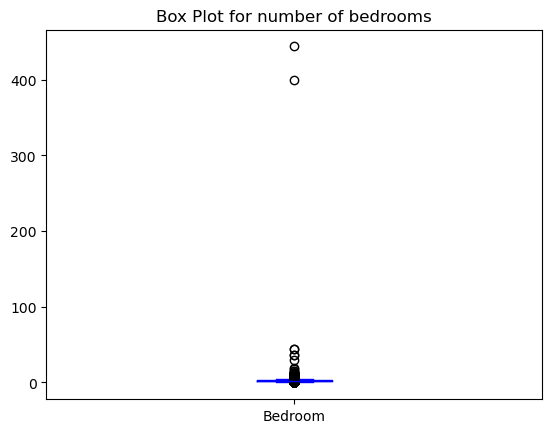

In [1030]:
df['Bedroom'].plot(kind='box', color='blue', title='Box Plot for number of bedrooms')

<Axes: title={'center': 'Box Plot for Bedrooms, Bathroom and Toilet'}>

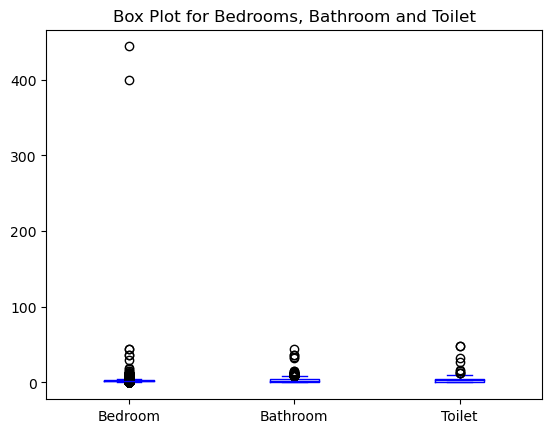

In [1031]:
df[['Bedroom', 'Bathroom','Toilet']].plot(kind='box', color='blue', title='Box Plot for Bedrooms, Bathroom and Toilet')

In [1032]:
#Keep only records of bedroom between 1 and 8, bathooms and toilets below 9
df = df[(df['Bedroom']>0) & (df['Bedroom']<9)]
df = df[(df['Bathroom']>0) & (df['Bathroom']<9)]
df = df[(df['Toilet']>0) & (df['Toilet']<9)]

In [1033]:
df.shape

(51376, 12)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date

In [1034]:
df.to_csv('CleanDataLagosHouseRent.csv', index=False)

In [967]:
df = pd.read_csv('CleanDataLagosHouseRent.csv')

In [968]:
df.head()

Title  \
0  Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
1         Beautiful Four Bedroom Semi Detached House   
2  A Spacious Room & Parlour Self Contained In An...   
3  Renovated 5 Units Of 4 Bedrooms Terrace Duokex...   
4                                   3 Bedroom Duplex   

                               Description    DateAdded  HousePrice  Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024    60000000        2   
1  4 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7500000        4   
2             1 BEDROOM MINI FLAT FOR RENT   8 Feb 2024      350000        1   
3                4 BEDROOM DUPLEX FOR RENT   8 Feb 2024    18000000        4   
4  3 BEDROOM SEMI DETACHED DUPLEX FOR RENT   8 Feb 2024     7000000        3   

   Bathroom  Toilet                                            Address  \
0         2       3                                Ologolo Lekki Lagos   
1         4       5   Plantinum Way Osapa Lekki Lagos Osapa Lekki L...   
2         1       1   Riverbank Estate, Akute Yakoyo Alagbole Ojodu...   
3         4       5                              Old Ikoyi Ikoyi Lagos   
4         3       3              Lekki Lagos Lekki Phase 1 Lekki Lagos   

   YearAdded PaymentDuration      Community   Town  
0       2024            Year        Ologolo  Lekki  
1       2024            Year          Osapa  Lekki  
2       2024            Year          Ojodu  Ojodu  
3       2024            Year          Ikoyi  Ikoyi  
4       2024            Year  Lekki Phase 1  Lekki

In [969]:
df.shape

(51376, 12)

In [970]:
columns = df.columns
clean_data_ALL = pd.DataFrame(columns = columns)

for town in df['Town'].unique():
    for bedroom in df['Bedroom'].unique():
        for year in df['YearAdded'].unique():
            
            
            #Extract the particular data of town and number of bedrooms
            tempData = df[(df['Town']==town) & (df['Bedroom']==bedroom) & (df['YearAdded']==year)]
            
            #Calculate the quantiles
            if tempData.shape[0] > 0:
                Q1 = tempData['HousePrice'].quantile(0.25)
                Q3 = tempData['HousePrice'].quantile(0.75)
                IQR = Q3 - Q1
                
                #Identify outliers
                outliers = (tempData['HousePrice'] < Q1 - 1.5 * IQR) | (tempData['HousePrice'] > Q3 + 1.5 * IQR)
                
                #Remove outliers
                df_no_outliers = tempData[~outliers]
                
                #Concatenate clean data with existing data
                clean_data_ALL = pd.concat([clean_data_ALL, df_no_outliers], axis=0)

            
clean_data_ALL

Title  \
0      Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
17     Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
18     Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
29     32 Units Of Luxury 2 Bedroom Apartment With Ki...   
33     Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
...                                                  ...   
48459                                      Satelite Town   
49668                                      Satelite Town   
45987                    A Lovely Fenced 2 Storey Duplex   
40911                                      3bedroom Flat   
47993                         Luxury 3 Bedroom Apartment   

                               Description    DateAdded HousePrice Bedroom  \
0        2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024   60000000       2   
17       2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024   60000000       2   
18       2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024   60000000       2   
29       2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024   60000000       2   
33       2 BEDROOM BLOCK OF FLATS FOR RENT  18 Jan 2024   60000000       2   
...                                    ...          ...        ...     ...   
48459  3 BEDROOM FLAT & APARTMENT FOR RENT  14 Nov 2016     700000       3   
49668    3 BEDROOM BLOCK OF FLATS FOR RENT  14 Jun 2016     400000       3   
45987            8 BEDROOM DUPLEX FOR RENT  25 May 2022    2500000       8   
40911    3 BEDROOM BLOCK OF FLATS FOR RENT  21 Dec 2022    2700000       3   
47993  3 BEDROOM FLAT & APARTMENT FOR RENT  01 Apr 2018     400000       3   

      Bathroom Toilet                                            Address  \
0            2      3                                Ologolo Lekki Lagos   
17           2      3                                Ologolo Lekki Lagos   
18           2      3                                Ologolo Lekki Lagos   
29           2      3                                  Ikota Lekki Lagos   
33           2      3                                Ologolo Lekki Lagos   
...        ...    ...                                                ...   
48459        3      3                   Imore Satelite Town Festac Lagos   
49668        2      3   Udoka Okeke Off Kessington Broad Way Satelite...   
45987        5      5                         Festac Festac Festac Lagos   
40911        3      3                                        Omole Phase   
47993        3      3                   Iyana Era Road Orile Orile Lagos   

      YearAdded PaymentDuration      Community    Town  
0          2024            Year        Ologolo   Lekki  
17         2024            Year        Ologolo   Lekki  
18         2024            Year        Ologolo   Lekki  
29         2024            Year          Ikota   Lekki  
33         2024            Year        Ologolo   Lekki  
...         ...             ...            ...     ...  
48459      2016            Year  Satelite Town  Festac  
49668      2016            Year  Satelite Town  Festac  
45987      2022            Year         Festac  Festac  
40911      2022            Year          Omole   Omole  
47993      2018            Year          Orile   Orile  

[48097 rows x 12 columns]

In [971]:
print(f'Previous Dataset: {df.shape}')
print(f'3 layer cleaned Dataset: {clean_data_ALL.shape}')


Previous Dataset: (51376, 12)
3 layer cleaned Dataset: (48097, 12)


In [972]:
df = clean_data_ALL
df.describe()

Title  \
count                                               48097   
unique                                              20756   
top     Exquisite 2 Bedroom Apartment & 2 Bedroom With Bq   
freq                                                 3652   

                                Description    DateAdded  HousePrice  Bedroom  \
count                                 48097        48097       48097    48097   
unique                                  114         1604         396        8   
top     3 BEDROOM FLAT & APARTMENT FOR RENT  18 Jan 2024    60000000        2   
freq                                   6673         4406        3659    14016   

        Bathroom  Toilet               Address  YearAdded PaymentDuration  \
count      48097   48097                 48097      48097           48097   
unique         8       8                 13853         11               1   
top            2       3   Ologolo Lekki Lagos       2023            Year   
freq       13910   14161                  4086      28668           48097   

       Community   Town  
count      48097  48097  
unique       269     38  
top      Ologolo  Lekki  
freq        4408  19376

In [973]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48097 entries, 0 to 47993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            48097 non-null  object
 1   Description      48097 non-null  object
 2   DateAdded        48097 non-null  object
 3   HousePrice       48097 non-null  object
 4   Bedroom          48097 non-null  object
 5   Bathroom         48097 non-null  object
 6   Toilet           48097 non-null  object
 7   Address          48097 non-null  object
 8   YearAdded        48097 non-null  object
 9   PaymentDuration  48097 non-null  object
 10  Community        48097 non-null  object
 11  Town             48097 non-null  object
dtypes: object(12)
memory usage: 4.8+ MB


In [974]:
for i in ['HousePrice','Bedroom','Bathroom', 'Toilet', 'YearAdded']:
    df[i] = df[i].astype(float)

In [975]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48097 entries, 0 to 47993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            48097 non-null  object 
 1   Description      48097 non-null  object 
 2   DateAdded        48097 non-null  object 
 3   HousePrice       48097 non-null  float64
 4   Bedroom          48097 non-null  float64
 5   Bathroom         48097 non-null  float64
 6   Toilet           48097 non-null  float64
 7   Address          48097 non-null  object 
 8   YearAdded        48097 non-null  float64
 9   PaymentDuration  48097 non-null  object 
 10  Community        48097 non-null  object 
 11  Town             48097 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


In [976]:
#Create details for Economic class of towns

upper = ['Lekki','Ikoyi','Victoria Island','Lekki Lagos Island']
lower_upper = ['Ikeja', 'Surulere', 'Ajah', 'Maryland', 'Ogba']
Poor = ['Mushin','Ajegunle','Oshodi','Makoko','Bariga','Ketu']

def cls(a):
    if a in upper:
        return 'Upper'
    elif a in lower_upper:
        return 'Lower Upper'
    else:
        return 'Middle'

In [977]:
df['Eco_class'] = df['Town'].apply(lambda x: cls(x))

In [978]:
df[df['Community'].str.contains('Mushin|Ajegunle|Oshodi|Makoko|Bariga|Ketu')]

Title  \
22904                  An Up Floor 2 Bedroom Flat   
22951           2 Bedroom Flat All Rooms En Suite   
23110                    2 Bedroom @ Ilaje Bariga   
40544                  2 Bedroom Apartment To Let   
40906                       Lovely 2 Bedroom Flat   
...                                           ...   
48309  Oshodi | Ajao Estate | Shogunle | Mafoluku   
48483                            A 3 Bedroom Flat   
48552  Oshodi | Ajao Estate | Shogunle | Mafoluku   
49898  Oshodi | Ajao Estate | Shogunle | Mafoluku   
50061  Oshodi | Ajao Estate | Shogunle | Mafoluku   

                               Description    DateAdded  HousePrice  Bedroom  \
22904    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024   1000000.0      2.0   
22951    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024   1000000.0      2.0   
23110    2 BEDROOM BLOCK OF FLATS FOR RENT  10 Jan 2024    700000.0      2.0   
40544    2 BEDROOM BLOCK OF FLATS FOR RENT  29 Dec 2022    850000.0      2.0   
40906  2 BEDROOM FLAT & APARTMENT FOR RENT  21 Dec 2022   1200000.0      2.0   
...                                    ...          ...         ...      ...   
48309  3 BEDROOM FLAT & APARTMENT FOR RENT  22 Dec 2016    500000.0      3.0   
48483  3 BEDROOM FLAT & APARTMENT FOR RENT  10 Nov 2016    500000.0      3.0   
48552  3 BEDROOM FLAT & APARTMENT FOR RENT  05 Nov 2016    600000.0      3.0   
49898  3 BEDROOM FLAT & APARTMENT FOR RENT  16 May 2016   1000000.0      3.0   
50061  3 BEDROOM FLAT & APARTMENT FOR RENT  11 Apr 2016    700000.0      3.0   

       Bathroom  Toilet                                           Address  \
22904       3.0     3.0             Off Ilaje Bariga Bariga Gbagada Lagos   
22951       2.0     3.0   Kajola Street,bariga Lagos Bariga Gbagada Lagos   
23110       2.0     2.0                 Ilaje Bariga Bariga Gbagada Lagos   
40544       2.0     3.0                        Ilaje Bariga Gbagada Lagos   
40906       2.0     2.0                        Onike Bariga Gbagada Lagos   
...         ...     ...                                               ...   
48309       2.0     2.0                  Airport Road Oshodi Oshodi Lagos   
48483       2.0     2.0                        Oshodi Oshodi Oshodi Lagos   
48552       1.0     1.0                   9 Aberuagba Oshodi Oshodi Lagos   
49898       2.0     3.0      No14 Adewunmi Abudu Lane Oshodi Oshodi Lagos   
50061       2.0     2.0                     New World Oshodi Oshodi Lagos   

       YearAdded PaymentDuration Community     Town Eco_class  
22904     2024.0            Year    Bariga  Gbagada    Middle  
22951     2024.0            Year    Bariga  Gbagada    Middle  
23110     2024.0            Year    Bariga  Gbagada    Middle  
40544     2022.0            Year    Bariga  Gbagada    Middle  
40906     2022.0            Year    Bariga  Gbagada    Middle  
...          ...             ...       ...      ...       ...  
48309     2016.0            Year    Oshodi   Oshodi    Middle  
48483     2016.0            Year    Oshodi   Oshodi    Middle  
48552     2016.0            Year    Oshodi   Oshodi    Middle  
49898     2016.0            Year    Oshodi   Oshodi    Middle  
50061     2016.0            Year    Oshodi   Oshodi    Middle  

[190 rows x 13 columns]

In [979]:
df['Eco_class'].value_counts()

Eco_class
Upper          26233
Middle         11103
Lower Upper    10761
Name: count, dtype: int64

In [980]:
#Updating Eco_class for poorest communities
df['Eco_class']=np.where(df['Community'].str.contains('Mushin|Ajegunle|Oshodi|Makoko|Bariga|Ketu'),'Lower',df['Eco_class'])

In [981]:
df['Eco_class'].value_counts()

Eco_class
Upper          26233
Middle         10913
Lower Upper    10761
Lower            190
Name: count, dtype: int64

In [982]:
req_cols=['DateAdded','HousePrice','Bedroom','Bathroom','Toilet','YearAdded','Community','Town','Eco_class']
df = df[req_cols]

# Exploratory Data Analysis (EDA)

###  Houses by Bedrooms

In [1051]:
a = df.groupby('Bedroom')['Bedroom'].count().to_frame()
a = a.rename(columns={'Bedroom': 'Houses'})
a['Percentage'] = round((a['Houses']/df.shape[0])*100,2).astype(str) +"%"
a

Houses Percentage
Bedroom                   
1.0       10128     21.06%
2.0       14016     29.14%
3.0       12638     26.28%
4.0        8658      18.0%
5.0        2365      4.92%
6.0         236      0.49%
7.0          46       0.1%
8.0          10      0.02%

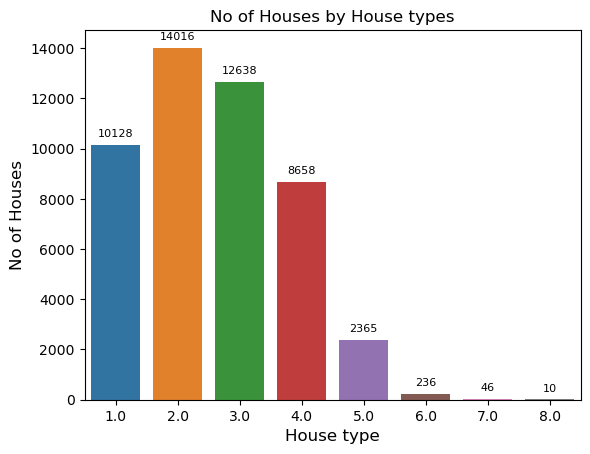

In [1052]:
plots = sns.barplot(x=a.index, y="Houses", data=a)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

    
plt.xlabel("House type", size=12)

plt.ylabel("No of Houses", size=12)

plt.title("No of Houses by House types")

plt.show()

### Average cost of HousePrice by House type

In [1053]:
b=df.groupby('Bedroom')['HousePrice'].mean().astype(int).to_frame()
b

HousePrice
Bedroom            
1.0         1109239
2.0        17378453
3.0         4846761
4.0         7530808
5.0        10374724
6.0        21393831
7.0        89989130
8.0        18350000

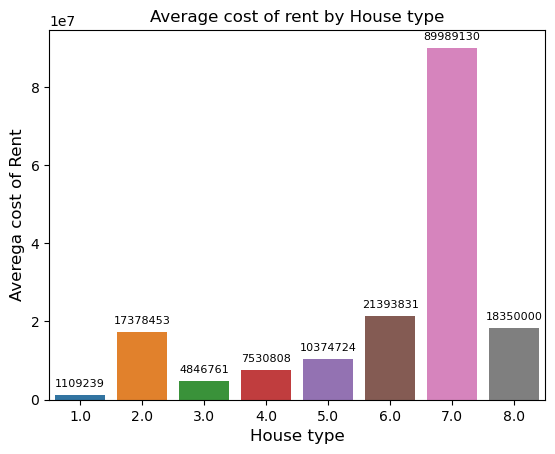

In [1054]:
plots = sns.barplot(x=b.index, y="HousePrice", data=b)
 
# Iterating over the bars one-by-one
for bar in plots.patches:   
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')  
plt.xlabel("House type", size=12)
plt.ylabel("Averega cost of Rent", size=12)
plt.title("Average cost of rent by House type")
plt.show()

### Number of Houses by Town

In [1055]:
a = df.groupby('Town')['Town'].count().to_frame()
a = a.rename(columns={'Town': 'Houses'})
a['Percentage'] = round((a['Houses']/df.shape[0])*100,3).astype(str) +"%"
a.sort_values(by='Houses', ascending=False)

Houses Percentage
Town                                 
Lekki                19376    40.285%
Ajah                  5350    11.123%
Ikoyi                 4496     9.348%
Ikeja                 3020     6.279%
Victoria Island       2360     4.907%
Yaba                  2189     4.551%
Gbagada               1528     3.177%
Surulere              1252     2.603%
Ojodu                 1174     2.441%
Ogba                   967     2.011%
Kosofe                 944     1.963%
Shomolu                788     1.638%
Isolo                  768     1.597%
Ipaja                  745     1.549%
Agege                  713     1.482%
Ojota                  584     1.214%
Ikorodu                539     1.121%
Alimosho               263     0.547%
Abule Egba             173      0.36%
Maryland               172     0.358%
Ilupeju                138     0.287%
Oshodi                 119     0.247%
Amuwo Odofin            86     0.179%
Ikotun/Igando           75     0.156%
Lagos Island            74     0.154%
Egbe-Idimu              63     0.131%
Mushin                  33     0.069%
Ebute Metta             30     0.062%
Festac                  21     0.044%
Apapa                   20     0.042%
Ojo                     11     0.023%
Ifako Ijaiye            10     0.021%
Ejigbo                   7     0.015%
Badagry                  3     0.006%
Epe                      3     0.006%
Lekki Lagos Island       1     0.002%
Omole                    1     0.002%
Orile                    1     0.002%

### No of listed houses by Year

In [1056]:
a = df.groupby('YearAdded')['YearAdded'].count().to_frame()
a = a.rename(columns={'YearAdded': 'Houses listed'})
a['Percentage'] = round((a['Houses listed']/df.shape[0])*100,3).astype(str) +"%"
a

Houses listed Percentage
YearAdded                          
2014.0                 4     0.008%
2015.0               179     0.372%
2016.0              2331     4.846%
2017.0               235     0.489%
2018.0               173      0.36%
2019.0               389     0.809%
2020.0               492     1.023%
2021.0               272     0.566%
2022.0              5078    10.558%
2023.0             28668    59.605%
2024.0             10276    21.365%

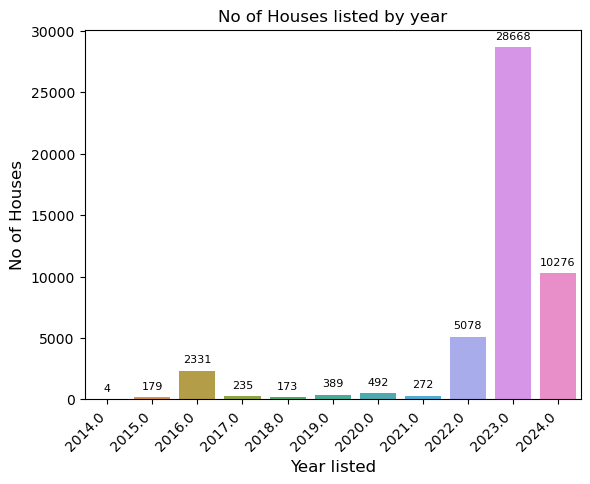

In [1057]:
plots = sns.barplot(x=a.index, y="Houses listed", data=a)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

    
plt.xlabel("Year listed", size=12)

plt.ylabel("No of Houses", size=12)
plt.xticks(horizontalalignment='right', rotation=45)
plt.title("No of Houses listed by year")

plt.show()

### Average cost of house by year by housetype

In [1058]:
a = df.groupby(['YearAdded','Bedroom'])['HousePrice'].mean().astype(int).unstack()

a

Bedroom          1.0         2.0         3.0        4.0         5.0  \
YearAdded                                                             
2014.0           NaN    700000.0  18000000.0  5750000.0         NaN   
2015.0     1129166.0   1372857.0   2348051.0  5212385.0   6311050.0   
2016.0      696648.0   1417062.0   2709300.0  4238368.0   4973320.0   
2017.0      632400.0   2722272.0  13909363.0  6055405.0   5253433.0   
2018.0      843750.0   2239725.0   4658485.0  6344897.0   5115384.0   
2019.0     1224666.0   2613824.0   6394571.0  6415833.0   9028260.0   
2020.0     2329166.0   2728431.0   5778417.0  7158571.0  10455882.0   
2021.0      845083.0   3014583.0   6164285.0  5908823.0  12120370.0   
2022.0      916752.0   1857970.0   3253349.0  6038713.0   9777097.0   
2023.0     1107211.0   2392592.0   4758215.0  7728807.0  10997531.0   
2024.0     1400177.0  49414476.0   6771271.0  8680034.0  11777617.0   

Bedroom           6.0          7.0         8.0  
YearAdded                                       
2014.0            NaN          NaN         NaN  
2015.0      2625000.0          NaN   4000000.0  
2016.0      6570833.0   12722222.0         NaN  
2017.0      3000000.0    4500000.0         NaN  
2018.0      3666666.0          NaN         NaN  
2019.0     21000000.0   14000000.0         NaN  
2020.0     16100000.0   11000000.0         NaN  
2021.0     14000000.0          NaN         NaN  
2022.0     16038095.0   12500000.0  21250000.0  
2023.0     27502473.0  245466666.0  22800000.0  
2024.0     19524148.0   20272727.0  11500000.0

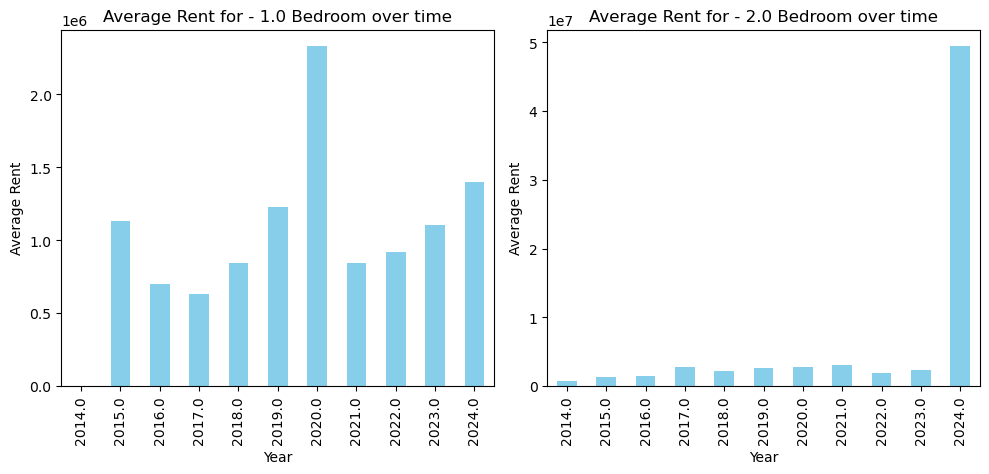

In [1059]:
#bar charts for Average House rent for 1 and 2 Bedrooms
grouped_df = df[df['Bedroom']<3].groupby(['YearAdded','Bedroom'])['HousePrice'].mean().astype(int).unstack()

# Plotting multiple bar charts using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Adjust nrows and ncols based on your data

# Iterate over columns and plot bar charts
for i, column in enumerate(grouped_df.columns):
    grouped_df[column].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Average Rent for - {column} Bedroom over time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


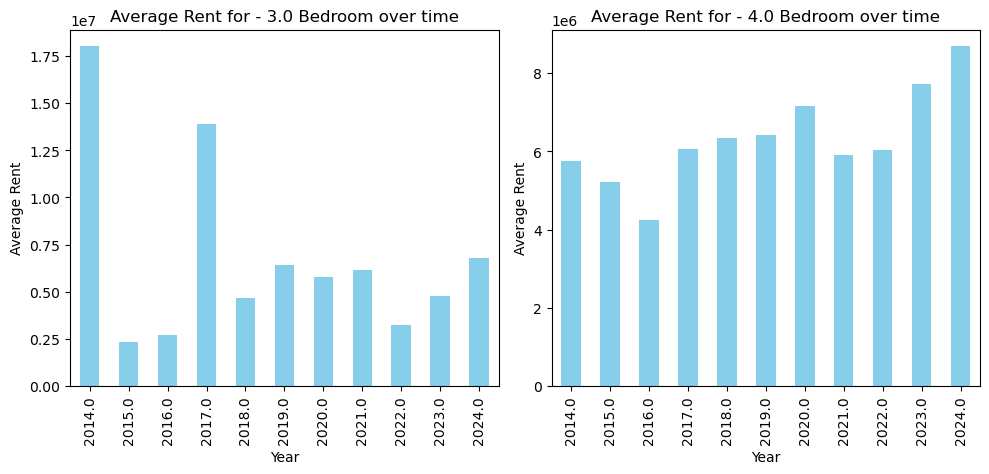

In [1060]:
#bar charts for Average House rent for 3 and 4 Bedrooms
grouped_df = df[(df['Bedroom']>=3)&(df['Bedroom']<5)].groupby(['YearAdded','Bedroom'])['HousePrice'].mean().astype(int).unstack()

# Plotting multiple bar charts using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Adjust nrows and ncols based on your data

# Iterate over columns and plot bar charts
for i, column in enumerate(grouped_df.columns):
    grouped_df[column].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Average Rent for - {column} Bedroom over time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


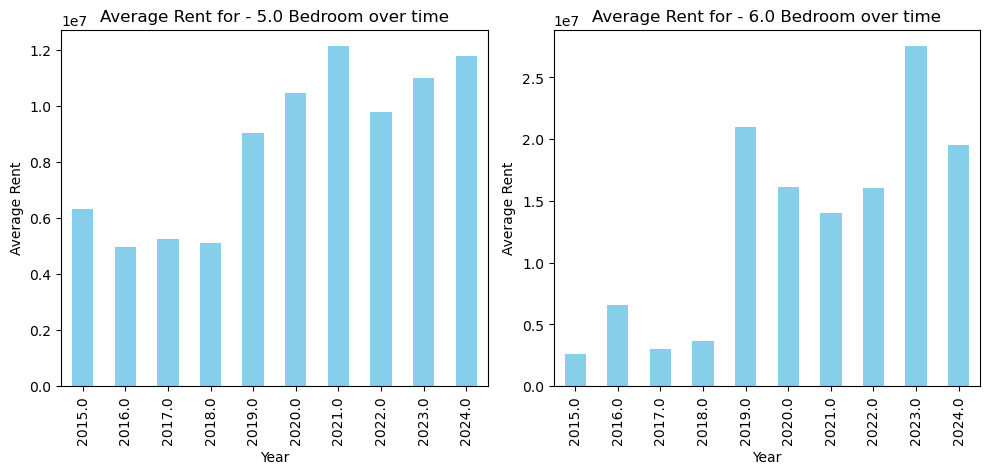

In [1061]:
#bar charts for Average House rent for 5 and 6 Bedrooms
grouped_df = df[(df['Bedroom']>=5)&(df['Bedroom']<7)].groupby(['YearAdded','Bedroom'])['HousePrice'].mean().astype(int).unstack()

# Plotting multiple bar charts using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Adjust nrows and ncols based on your data

# Iterate over columns and plot bar charts
for i, column in enumerate(grouped_df.columns):
    grouped_df[column].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Average Rent for - {column} Bedroom over time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


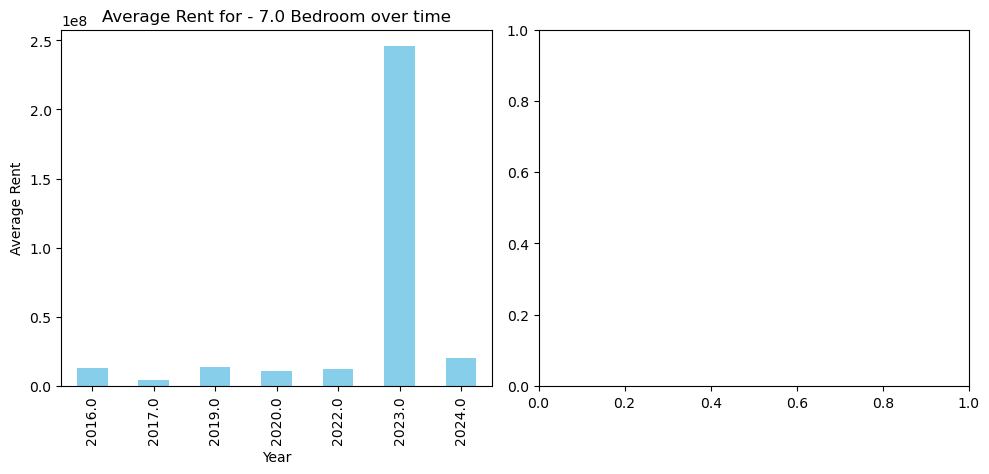

In [1062]:
#bar charts for Average House rent for 3 and 4 Bedrooms
grouped_df = df[(df['Bedroom']==7)].groupby(['YearAdded','Bedroom'])['HousePrice'].mean().astype(int).unstack()

# Plotting multiple bar charts using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Adjust nrows and ncols based on your data

# Iterate over columns and plot bar charts
for i, column in enumerate(grouped_df.columns):
    grouped_df[column].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Average Rent for - {column} Bedroom over time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


In [1063]:
df.head()

DateAdded  HousePrice  Bedroom  Bathroom  Toilet  YearAdded Community  \
0   18 Jan 2024  60000000.0      2.0       2.0     3.0     2024.0   Ologolo   
17  18 Jan 2024  60000000.0      2.0       2.0     3.0     2024.0   Ologolo   
18  18 Jan 2024  60000000.0      2.0       2.0     3.0     2024.0   Ologolo   
29  18 Jan 2024  60000000.0      2.0       2.0     3.0     2024.0     Ikota   
33  18 Jan 2024  60000000.0      2.0       2.0     3.0     2024.0   Ologolo   

     Town Eco_class  
0   Lekki     Upper  
17  Lekki     Upper  
18  Lekki     Upper  
29  Lekki     Upper  
33  Lekki     Upper

In [1064]:
#df_final['YearAdded'] = df_final['YearAdded'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48097 entries, 0 to 47993
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateAdded   48097 non-null  object 
 1   HousePrice  48097 non-null  float64
 2   Bedroom     48097 non-null  float64
 3   Bathroom    48097 non-null  float64
 4   Toilet      48097 non-null  float64
 5   YearAdded   48097 non-null  float64
 6   Community   48097 non-null  object 
 7   Town        48097 non-null  object 
 8   Eco_class   48097 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.7+ MB


## Model

In [983]:
#Remove DateAdded column 
df_final = df.drop('DateAdded', axis='columns')

In [984]:
#Perform One-Hot Encoding for Community, Town and Eco_class
communityDummies = pd.get_dummies(df_final['Community'])
communityDummies = communityDummies.add_prefix('comm_')
townDummies = pd.get_dummies(df_final['Town'])
townDummies = townDummies.add_prefix('town_')
#ordinal_mapping = {'Upper':3, 'Lower Upper':2, 'Middle':1, 'Lower':0}
#ecoClassEncoded = df_final['Eco_class'].map(ordinal_mapping)
ecoDummies = pd.get_dummies(df_final['Eco_class'])
ecoDummies = ecoDummies.add_prefix('eco_')

In [985]:
df_final2 = pd.concat([df_final, communityDummies.drop('comm_Yaba', axis='columns')], axis='columns')
df_final2 = df_final2.drop('Community', axis='columns')
df_final2 = pd.concat([df_final2, townDummies.drop('town_Yaba', axis='columns')], axis='columns')
df_final2 = df_final2.drop('Town', axis='columns')
df_final2 = pd.concat([df_final2, ecoDummies.drop('eco_Lower', axis='columns')], axis='columns')
df_final2 = df_final2.drop('Eco_class', axis='columns')

In [986]:
df_final2.shape

(48097, 313)

In [987]:
#The X (independent) variables
X = df_final2.drop(['HousePrice'], axis='columns')
X.head()

Bedroom  Bathroom  Toilet  YearAdded  comm_Abacha Estate  comm_Abaranje  \
0       2.0       2.0     3.0     2024.0               False          False   
17      2.0       2.0     3.0     2024.0               False          False   
18      2.0       2.0     3.0     2024.0               False          False   
29      2.0       2.0     3.0     2024.0               False          False   
33      2.0       2.0     3.0     2024.0               False          False   

    comm_Abesan  comm_Abesan Estate  comm_Abijo  comm_Abraham Adesanya  ...  \
0         False               False       False                  False  ...   
17        False               False       False                  False  ...   
18        False               False       False                  False  ...   
29        False               False       False                  False  ...   
33        False               False       False                  False  ...   

    town_Ojota  town_Omole  town_Orile  town_Oshodi  town_Shomolu  \
0        False       False       False        False         False   
17       False       False       False        False         False   
18       False       False       False        False         False   
29       False       False       False        False         False   
33       False       False       False        False         False   

    town_Surulere  town_Victoria Island  eco_Lower Upper  eco_Middle  \
0           False                 False            False       False   
17          False                 False            False       False   
18          False                 False            False       False   
29          False                 False            False       False   
33          False                 False            False       False   

    eco_Upper  
0        True  
17       True  
18       True  
29       True  
33       True  

[5 rows x 312 columns]

In [988]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [989]:
X = X.applymap(lambda x: int(x) if type(x) == bool else x)
X.head()

Bedroom  Bathroom  Toilet  YearAdded  comm_Abacha Estate  comm_Abaranje  \
0       2.0       2.0     3.0     2024.0                   0              0   
17      2.0       2.0     3.0     2024.0                   0              0   
18      2.0       2.0     3.0     2024.0                   0              0   
29      2.0       2.0     3.0     2024.0                   0              0   
33      2.0       2.0     3.0     2024.0                   0              0   

    comm_Abesan  comm_Abesan Estate  comm_Abijo  comm_Abraham Adesanya  ...  \
0             0                   0           0                      0  ...   
17            0                   0           0                      0  ...   
18            0                   0           0                      0  ...   
29            0                   0           0                      0  ...   
33            0                   0           0                      0  ...   

    town_Ojota  town_Omole  town_Orile  town_Oshodi  town_Shomolu  \
0            0           0           0            0             0   
17           0           0           0            0             0   
18           0           0           0            0             0   
29           0           0           0            0             0   
33           0           0           0            0             0   

    town_Surulere  town_Victoria Island  eco_Lower Upper  eco_Middle  \
0               0                     0                0           0   
17              0                     0                0           0   
18              0                     0                0           0   
29              0                     0                0           0   
33              0                     0                0           0   

    eco_Upper  
0           1  
17          1  
18          1  
29          1  
33          1  

[5 rows x 312 columns]

In [990]:
#The y Variable
y = df_final2.HousePrice
y.head()

0     60000000.0
17    60000000.0
18    60000000.0
29    60000000.0
33    60000000.0
Name: HousePrice, dtype: float64

In [991]:
#Splitting dataset into training and testing data (80:20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [992]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model: {model}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('\n')

Model: DecisionTreeRegressor()
Mean Squared Error: 1083261711941396.75
Mean Absolute Error: 1602924.67
R^2 Score: -3.10




In [993]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model: {model}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('\n')


Model: RandomForestRegressor()
Mean Squared Error: 120726505080780.67
Mean Absolute Error: 1361122.43
R^2 Score: 0.54




In [994]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model: {model}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('\n')

Model: GradientBoostingRegressor()
Mean Squared Error: 73485177017396.05
Mean Absolute Error: 1737395.95
R^2 Score: 0.72




In [1077]:
#pip install xgboost

In [995]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model: {xgb_model}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('\n')

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Squared Error: 26076097998120.53
Mean Absolute Error: 1266947.98
R^2 Score: 0.90




In [996]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model: {model}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('\n')

Model: Lasso()
Mean Squared Error: 65774746726029.55
Mean Absolute Error: 3237606.69
R^2 Score: 0.75




C:\Users\FaithFem\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.019e+18, tolerance: 2.187e+15
  model = cd_fast.enet_coordinate_descent(


In [997]:
#Performing Cross Validation to train the model using XGBoost
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(XGBRegressor(), X, y, cv=cv)

array([ 0.75324752,  0.15875157, -1.78746906,  0.1772603 ,  0.18493969])

#Parameter tuning for the XGBoost model

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight' : [1, 3, 5, 7]  
}

xgb_model = XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')
grid_result = grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Use the best parameters obtained from grid search
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300} 

# Initialize XGBoost model with the best parameters
final_model = XGBRegressor(**best_params)

# Train the model on the entire training dataset
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print("Final R^2 Score on Test Set:", r2)


In [998]:
import pickle

# Saving the model using pickle
with open('LagosHouseRent.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [999]:
import pickle

# Load the model from the pickle file
with open('LagosHouseRent.pkl', 'rb') as f:
    model = pickle.load(f)


In [1000]:
def get_estimated_price(bedroom, bathroom, toilet, yearadded, community, town, eco_class):
    try:
        town_index = __towns.index('town_'+town.lower())
    except:
        town_index = -1

    try:
        community_index = __communities.index('comm_'+community.lower())
    except:
        community_index = -1

    try:
        eco_class_index = __eco_classes.index('eco_'+eco_class.lower())
    except:
        eco_class_index = -1

    x = np.zeros(312)
    x[0] = bedroom
    x[1] = bathroom
    x[2] = toilet
    x[3] = yearadded
    if town_index >= 0:
        x[town_index] = 1
    else:
        pass

    if community_index >= 0:
        x[community_index] = 1
    else:
        pass

    if eco_class_index >= 0:
        x[eco_class_index] = 1
    else:
        pass

    return round(model.predict([x])[0], 2)

In [1001]:
get_estimated_price(2, 2, 1, 2024, 'Ikoyi', 'Ikoyi', 'Upper')

1137836.0

def predict_HouseRent(Bedroom, Bathroom, Toilet, YearAdded, Community, Town, Eco_class):
    comm_index = np.where(s==Community)[0]
    town_index = np.where(s==Town)[0]
    eco_class_index = np.where(s==Eco_class)[0]


    x = np.zeros(len(s))
    x[0] = Bedroom
    x[1] = Bathroom
    x[2] = Toilet
    x[3] = YearAdded
    if comm_index >= 0:
        x[comm_index] = 1
    else:
        pass
    if town_index >= 0:
        x[town_index] = 1
    else:
        pass
    if eco_class_index >= 0:
        x[eco_class_index] = 1
    else:
        pass
    return xgb_model.predict([x])[0]
    #return x